# Credit Risk Modeling in R

# DATACAMP

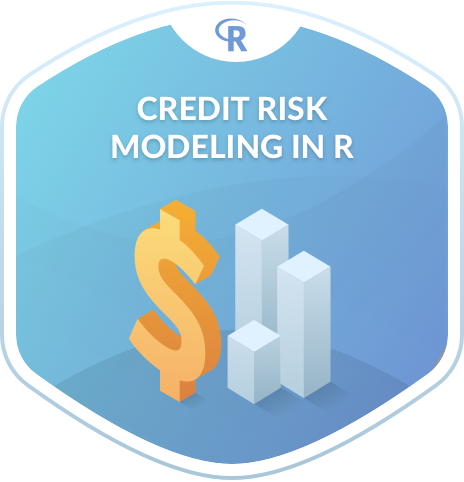

In [1]:
options(warn=-1)
library("IRdisplay")
display_png(file="cr.png") 

In [3]:
# install.packages('xlsx')

In [5]:
library(xlsx)

# Course Description
This hands-on-course with real-life credit data will teach you how to model credit risk by using logistic regression and decision trees in R.

Modeling credit risk for both personal and company loans is of major importance for banks. The probability that a debtor will default is a key component in getting to a measure for credit risk. While other models will be introduced in this course as well, you will learn about two model types that are often used in the credit scoring context; logistic regression and decision trees. You will learn how to use them in this particular context, and how these models are evaluated by banks.

# 1. Introduction and data preprocessing
This chapter begins with a general introduction to credit risk models. We'll explore a real-life data set, then preprocess the data set such that it's in the appropriate format before applying the credit risk models.

#Exploring the credit data

We will be examining the dataset loan_data discussed in the video throughout the exercises in this course.

After being given loan_data, you are particularly interested about the defaulted loans in the data set. You want to get an idea of the number, and percentage of defaults. Defaults are rare, so you always want to check what the proportion of defaults is in a loan dataset. The CrossTable() function is very useful here.

Remember that default information is stored in the response variable loan_status, where 1 represents a default, and 0 represents non-default.

To learn more about variable structures and spot unexpected tendencies in the data, you should examine the relationship between loan_status and certain factor variables. For example, you would expect that the proportion of defaults in the group of customers with grade G (worst credit rating score) is substantially higher than the proportion of defaults in the grade A group (best credit rating score).

Conveniently, CrossTable() can also be applied on two categorical variables. Let's explore!

### Instructions
- Get familiar with the dataset by looking at its structure with str().
- Load the gmodels package using library(). It is already installed on DataCamp's servers.
- Have a look at the CrossTable() of loan status, using just one argument: loan_data$loan_status.
- Call CrossTable() with x argument loan_data$grade and y argument loan_data$loan_status. We only want row-wise proportions, so set prop.r to TRUE, but prop.c , prop.t and prop.chisq to FALSE (default values here are TRUE, and this would lead to inclusion of column proportions, table proportions and chi-square contributions for each cell. We do not need these here.)

In [56]:
loan_data <- readRDS("loan_data_ch1.rds") 
loan_data$loan_status <- as.factor(loan_data$loan_status)
loan_data$grade <- as.factor(loan_data$grade)
loan_data$home_ownership <- as.factor(loan_data$home_ownership)

In [57]:
# install.packages('gmodels')

In [59]:
# View the structure of loan_data
str(loan_data)

# Load the gmodels package 
library(gmodels)

# Call CrossTable() on loan_status
CrossTable(loan_data$loan_status)

# Call CrossTable() on grade and loan_status
CrossTable(x = loan_data$grade, y = loan_data$loan_status,
  prop.r = TRUE, prop.c = FALSE, prop.t = FALSE, prop.chisq = FALSE)

'data.frame':	29092 obs. of  8 variables:
 $ loan_status   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 2 1 ...
 $ loan_amnt     : int  5000 2400 10000 5000 3000 12000 9000 3000 10000 1000 ...
 $ int_rate      : num  10.6 NA 13.5 NA NA ...
 $ grade         : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 1 5 2 3 2 2 4 ...
 $ emp_length    : int  10 25 13 3 9 11 0 3 3 0 ...
 $ home_ownership: Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 4 4 4 4 3 4 4 4 4 ...
 $ annual_inc    : num  24000 12252 49200 36000 48000 ...
 $ age           : int  33 31 24 39 24 28 22 22 28 22 ...

 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  29092 

 
          |         0 |         1 | 
          |-----------|-----------|
          |     25865 |      3227 | 
          |     0.889 |     0.111 | 
          |-----------|-----------|



 

 
   Cell Contents
|-------------------------|
|            

# Histograms
The data set loan_data is loaded in your workspace. You previously explored categorical variables using the CrossTable() function. Now you would like to explore continuous variables to identify potential outliers or unexpected data structures.

To do this, let's experiment with the function hist() to understand the distribution of the number of loans for different customers.

### Instructions
- Use hist() to create a histogram with only one argument: loan_data$loan_amnt. Assign the result to a new object called hist_1.
- Use $breaks along with the object hist_1 to get more information on the histogram breaks. Knowing the location of the breaks is important because if they are poorly chosen, the histogram may be misleading.
- Change the number of breaks in hist_1 to 200 by specifying the breaks argument. Additionally, name the x-axis "Loan amount" using the xlab argument and title it "Histogram of the loan amount" using the main argument. Save the result to hist_2. Why do the peaks occur where they occur?

[1]     0  2000  4000  6000  8000 10000 12000 14000 16000 18000 20000 22000
[13] 24000 26000 28000 30000 32000 34000 36000

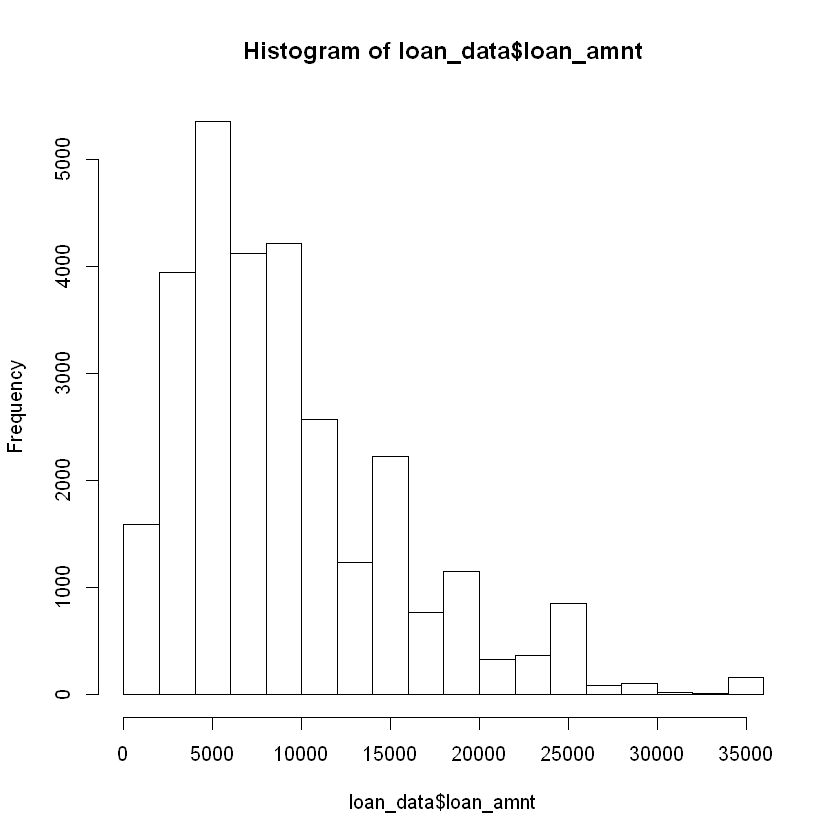

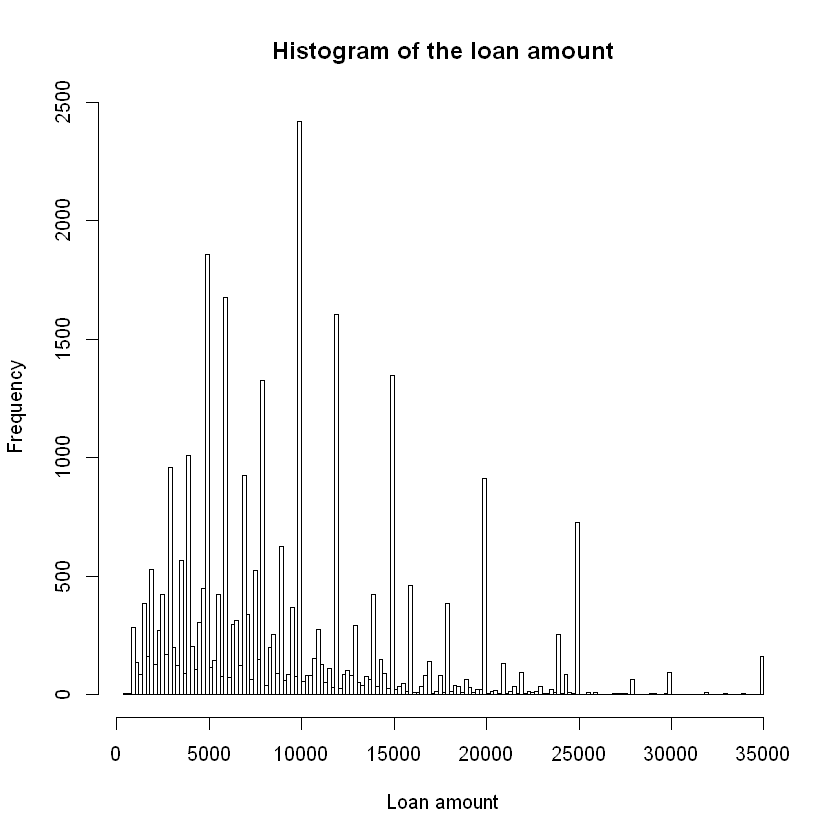

In [60]:
# Create histogram of loan_amnt: hist_1
hist_1 <- hist(loan_data$loan_amnt)

# Print locations of the breaks in hist_1
hist_1$breaks

# Change number of breaks and add labels: hist_2
hist_2 <- hist(loan_data$loan_amnt, breaks = 200, xlab = "Loan amount",
			   main = "Histogram of the loan amount")

# Outliers
Now it's time to look at the structure of the variable age. A histogram is plotted on your right. Similar to what you observed in the video for annual income (annual_inc), there is a lot of blank space on the right-hand side of the plot. This is an indication of possible outliers. You will look at a scatterplot to verify this. If you find any outliers you will delete them.

If outliers are observed for several variables, it might be useful to look at bivariate plots. It's possible the outliers belong to the same observation. If so, there is even more reason to delete the observation because it is more likely that some information stored in it is wrong.

### Instructions
- Build a scatterplot of the variable age (through loan_data-age) using the function plot(). Give the y-axis the appropriate label "Age" using ylab as a second argument,.
- The oldest person in this data set is older than 122 years! Get the index of this outlier using which() and the age of 122 as a cutoff (you can do this using loan_data$age > 122). Assign it to the object index_highage.
- Create a new data set new_data, after removing the observation with the high age using the object index_highage.
- Have a look at the bivariate scatterplot, with age on the x-axis and annual income on the y-axis. Change the labels to "Age" and "Annual Income", respectively.

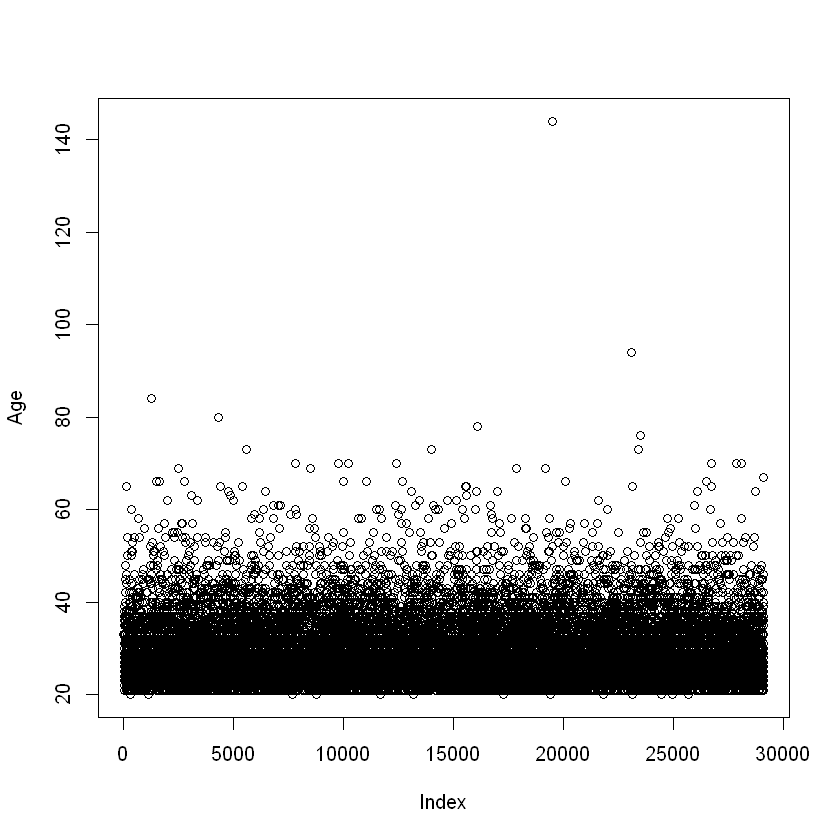

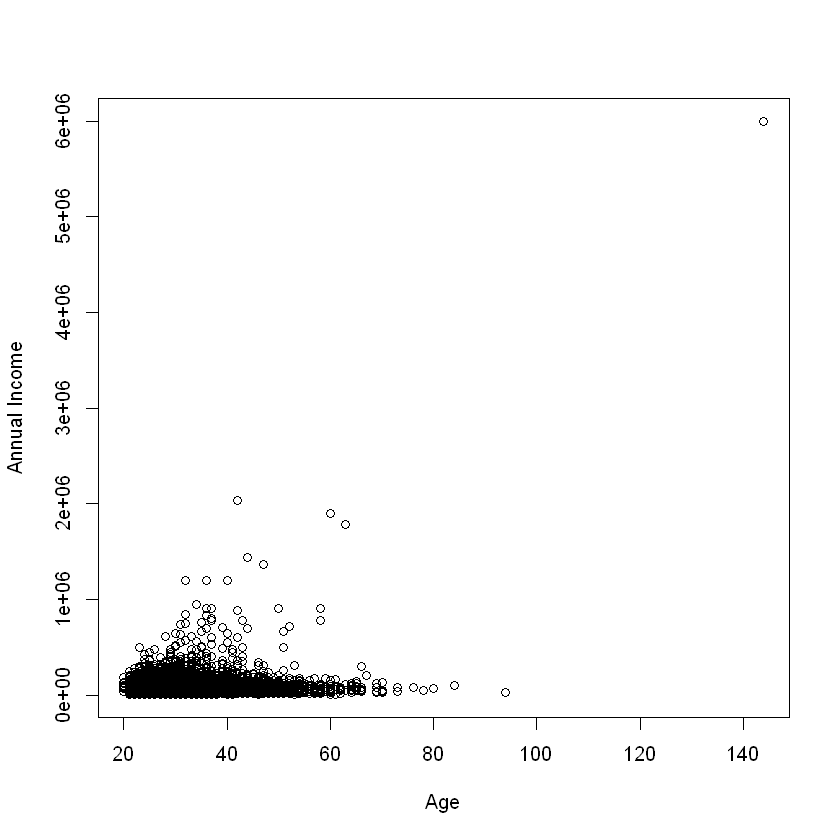

In [61]:
# Plot the age variable
plot(loan_data$age, ylab = "Age")

# Save the outlier's index to index_highage
index_highage = which(loan_data$age > 122)

# Create data set new_data with outlier deleted
new_data <- loan_data[-index_highage,]

# Make bivariate scatterplot of age and annual income
plot(loan_data$age, loan_data$annual_inc, xlab = "Age", ylab = "Annual Income")

# Deleting missing data
You saw before that the interest rate (int_rate) in the data set loan_data depends on the customer. Unfortunately some observations are missing interest rates. You now need to identify how many interest rates are missing and then delete them.

In this exercise you will use the function which() to create an index of rows that contain an NA. You will then use this index to delete rows with NAs.

### Instructions
- Take a look at the number of missing inputs for the variable int_rate using summary().
- Use which() and is.na() to create an index of the observations without a recorded interest rate. Store the result in the object na_index.
- Create a new data set called loan_data_delrow_na, which does not contain the observations with missing interest rates.
- Recall that we made a copy of loan_data called loan_data_delcol_na. Instead of deleting the observations with missing interest rates, delete the entire int_rate column by setting it equal to NULL.

In [62]:
# Look at summary of loan_data
summary(loan_data$int_rate)

# Get indices of missing interest rates: na_index
na_index <- which(is.na(loan_data$int_rate))

# Remove observations with missing interest rates: loan_data_delrow_na
loan_data_delrow_na <- loan_data[-na_index, ]

# Make copy of loan_data
loan_data_delcol_na <- loan_data

# Delete interest rate column from loan_data_delcol_na
loan_data_delcol_na$int_rate <- NULL

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.42    7.90   10.99   11.00   13.47   23.22    2776 

# Replacing missing data
Rather than deleting the missing interest rates, you may want to replace them instead. The object na_index, which contains the index of the observations with missing interest rates is still loaded in your workspace.

### Instructions
- Create an object called median_ir, containing the median of the interest rates in loan_data using the median() function. Don't forget to include the argument na.rm = TRUE.
- In the new data set loan_data_replace, replace all the missing instances in the indices stored in object na_index with the median of all the interest rates, median_ir.
- Have a look at the variable int_rate in the new data set using summary() to make sure that the NAs are gone.

In [63]:
# Compute the median of int_rate
median_ir <- median(loan_data$int_rate, na.rm = TRUE)

# Make copy of loan_data
loan_data_replace <- loan_data

# Replace missing interest rates with median
loan_data_replace$int_rate[na_index] <- median_ir

# Check if the NAs are gone
summary(loan_data_replace$int_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.42    8.49   10.99   11.00   13.11   23.22 

# Keeping missing data
In some situations, the fact that an input is missing is important information in itself. NAs can be kept in a separate "missing" category using coarse classification.

Coarse classification allows you to simplify your data and improve the interpretability of your model. Coarse classification requires you to bin your responses into groups that contain ranges of values. You can use this binning technique to place all NAs in their own bin.

In the video, we illustrated the idea of coarse classification for employment length. The code from that example has been reproduced in the R script to the right and can be adapted to coarse classify the int_rate variable.

### Instructions
- Make the necessary changes to the code provided to coarse classify int_rate, saving the result to a new variable called ir_cat.
- First, replace loan_data$emp_cat by loan_data$ir_cat where it occurs in the R script, as well as replacing loan_data$emp_length by loan_data$int_rate.
- Next, the variables should be binned in categories "0-8", "8-11", "11-13.5", and "13.5+" (replacing "0-15","15-30","30-45" and "45+"). Usage of > and <= is exactly as in the video. Make sure to change the numbers in the conditional statements too (15, 30 and 45 should be changed to 8, 11 and 13.5 respectively).
- Look at your new variable ir_cat using plot(loan_data$ir_cat).

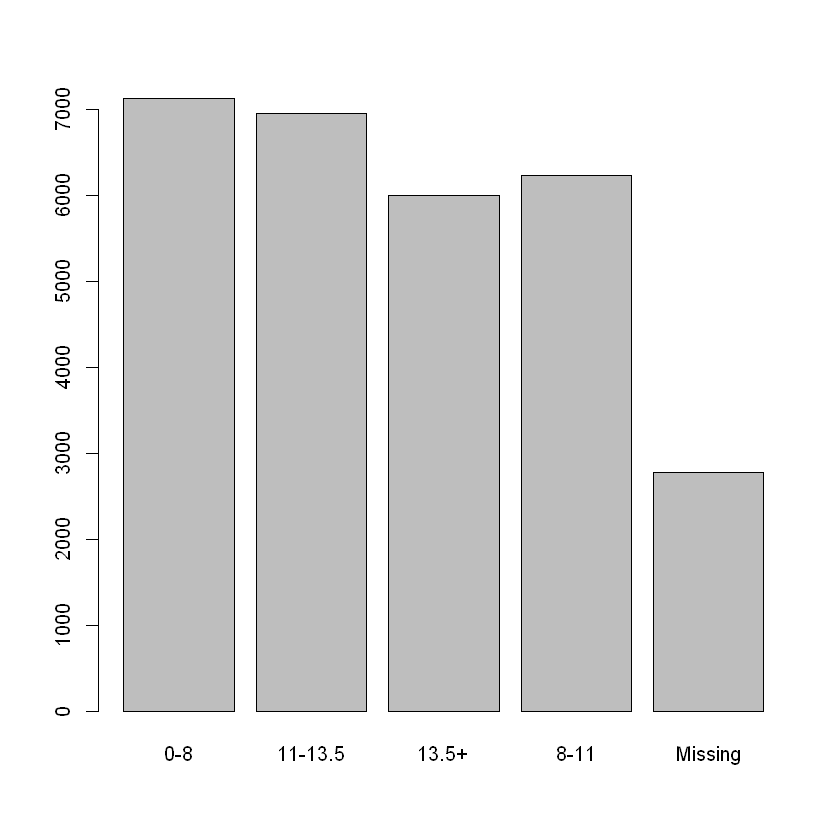

In [72]:
# Make the necessary replacements in the coarse classification example below 
loan_data$ir_cat <- rep(NA, length(loan_data$int_rate))

loan_data$ir_cat[which(loan_data$int_rate <= 8)] <- "0-8"
loan_data$ir_cat[which(loan_data$int_rate > 8 & loan_data$int_rate <= 11)] <- "8-11"
loan_data$ir_cat[which(loan_data$int_rate > 11 & loan_data$int_rate <= 13.5)] <- "11-13.5"
loan_data$ir_cat[which(loan_data$int_rate > 13.5)] <- "13.5+"
loan_data$ir_cat[which(is.na(loan_data$int_rate))] <- "Missing"

loan_data$ir_cat <- as.factor(loan_data$ir_cat)

# Look at your new variable using plot()
plot(loan_data$ir_cat)


# Splitting the data set
To make your training and test sets, you should first set a seed using set.seed(). Seeds allow you to create a starting point for randomly generated numbers, so that each time your code is run the same answer is generated. The advantage of doing this in your sampling is that you or anyone else can recreate the exact same training and test sets by using the same seed.

Using sample(), you can randomly assign observations to the training and test set.

For this exercise you will use the two first arguments in the sample() function:

The first argument is the vector from which we will sample values. We will randomly pick row numbers as indices; you can use 1:nrow(loan_data) to create the vector of row numbers.
The second argument is the number of items to choose. We will enter 2 / 3 * nrow(loan_data), as we construct the training set first.
### Instructions
- Set a seed of 567 using the set.seed() function.
- Store the row indices of the training set in the object index_train. Use the sample() function with a first and a second argument as discussed above.
- Create the training set by selecting the row numbers stored in index_train from the data set loan_data. Save the result to training_set.
- The test set contains the rows that are not in index_train. Copy the code that you used to create the training set, but use the negative sign (-) right before index_train inside the square brackets. Save the result to test_set.

In [73]:
# Set seed of 567
set.seed(567)

# Store row numbers for training set: index_train
index_train <- sample(1:nrow(loan_data), 2 / 3 * nrow(loan_data))

# Create training set: training_set
training_set <- loan_data[index_train,]

# Create test set: test_set
test_set <- loan_data[-index_train,]

# Creating a confusion matrix
In this example, assume that you have run a model and stored the predicted outcomes in a vector called model_pred. You want to see how the model performed so you will construct a confusion matrix. You will compare the actual loan status column (loan_status) to the predicted values (model_pred), using the table() function, where the arguments are the true values and the predicted values. Recall the confusion matrix structure:

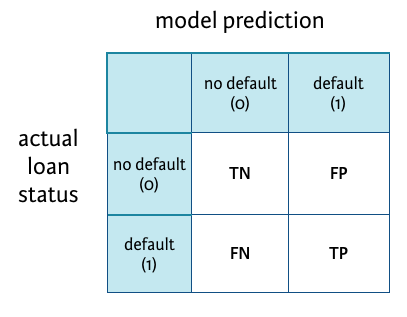

In [66]:
display_png(file="cm.png") 

and formulas:

$$\textrm{Classification accuracy} = \frac{(TP + TN)}{(TP + FP + TN + FN)}$$

$$\textrm{Sensitivity} = \frac{TP}{(TP + FN)}$$

$$\textrm{Specificity} = \frac{TN}{(TN + FP)}$$

### Instructions
- Create a confusion matrix comparing the loan_status column in test_set with the vector model_pred. You can use the table() function with two arguments to do this. Store the matrix in object conf_matrix.
- Compute the classification accuracy and print the result. You can either select the correct matrix elements from the confusion matrix using conf_matrix, or copy and paste the desired values.
- Compute the sensitivity and print the result.

In [67]:
dim(test_set)

[1] 9698    9

In [68]:
model_pred <- c( 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,0)

In [74]:
str(training_set)

'data.frame':	19394 obs. of  9 variables:
 $ loan_status   : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 1 1 1 ...
 $ loan_amnt     : int  7000 10000 10000 2500 20000 12000 3500 15000 6550 4500 ...
 $ int_rate      : num  14 16 18.4 NA NA ...
 $ grade         : Factor w/ 7 levels "A","B","C","D",..: 3 4 5 4 1 2 2 1 1 1 ...
 $ emp_length    : int  6 0 9 4 8 16 35 4 3 0 ...
 $ home_ownership: Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 4 4 3 4 4 1 3 4 4 ...
 $ annual_inc    : num  21600 46000 22000 24000 60000 90000 57700 40000 29500 40000 ...
 $ age           : int  21 42 32 31 24 22 23 39 29 26 ...
 $ ir_cat        : Factor w/ 5 levels "0-8","11-13.5",..: 3 3 3 5 5 2 4 1 1 1 ...


In [70]:
# Create confusion matrix
conf_matrix <- table(test_set$loan_status, model_pred)

# Compute classification accuracy
(conf_matrix[2, 2] + conf_matrix[1, 1]) / (conf_matrix[2, 2] + conf_matrix[1, 1] + conf_matrix[2, 1] + conf_matrix[1, 2])

# Compute sensitivity
conf_matrix[2, 2] / (conf_matrix[2, 2] + conf_matrix[2, 1])

[1] 0.6558053

[1] 0.3067034

# 2. Logistic regression

Logistic regression is still a widely used method in credit risk modeling. In this chapter, you will learn how to apply logistic regression models on credit data in R.

# Basic logistic regression
In the video, you looked at a logistic regression model including the variable age as a predictor. Now, you will include a categorical variable, and learn how to interpret its parameter estimates.

When you include a categorical variable in a logistic regression model in R, you will obtain a parameter estimate for all but one of its categories. This category for which no parameter estimate is given is called the reference category. The parameter for each of the other categories represents the odds ratio in favor of a loan default between the category of interest and the reference category. Don't worry if this doesn't make complete sense to you yet, you'll do more exercises on this later on!

# Instructions
- Construct a logistic regression model called log_model_cat with the categorical variable ir_cat as the only predictor. Your call to glm() should contain three arguments:
    - loan_status ~ ir_cat
    - family = "binomial"
    - data = training_set
- View the result in the console to see your parameter estimates.
- Find out what the reference category is by looking at the structure of ir_cat (in the full data set loan_data) again. Use the table() function to do this.

In [75]:
training_set <- read.xlsx(file ="df.xlsx", sheetIndex = 1, header=TRUE)

In [80]:
training_set$loan_status <- as.factor(training_set$loan_status)
training_set$loan_amnt <- as.integer(training_set$loan_amnt)
training_set$age <- as.integer(training_set$age)
str(training_set)

'data.frame':	19394 obs. of  8 variables:
 $ loan_status   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ loan_amnt     : int  25000 16000 8500 9800 3600 6600 3000 7500 6000 22750 ...
 $ grade         : Factor w/ 7 levels "A","B","C","D",..: 2 4 1 2 1 1 1 2 1 1 ...
 $ home_ownership: Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 4 1 1 1 3 4 3 4 1 ...
 $ annual_inc    : num  91000 45000 110000 102000 40000 ...
 $ age           : int  34 25 29 24 59 35 24 24 26 25 ...
 $ emp_cat       : Factor w/ 5 levels "0-15","15-30",..: 1 1 1 1 1 2 1 1 1 1 ...
 $ ir_cat        : Factor w/ 5 levels "0-8","11-13.5",..: 2 3 1 4 1 1 1 4 1 1 ...


In [81]:
# Build a glm model with variable ir_cat as a predictor
log_model_cat <- glm(formula = loan_status ~ ir_cat, family = "binomial",
                     data = training_set)

# Print the parameter estimates 
log_model_cat

# Look at the different categories in ir_cat using table()
table(loan_data$ir_cat)


Call:  glm(formula = loan_status ~ ir_cat, family = "binomial", data = training_set)

Coefficients:
  (Intercept)  ir_cat11-13.5    ir_cat13.5+    ir_cat44143  ir_catMissing  
      -2.8323         0.9808         1.3152         0.5414         0.6940  

Degrees of Freedom: 19393 Total (i.e. Null);  19389 Residual
Null Deviance:	    13680 
Residual Deviance: 13290 	AIC: 13300


    0-8 11-13.5   13.5+    8-11 Missing 
   7130    6954    6002    6230    2776 

# Multiple variables in a logistic regression model
The interpretation of a single parameter still holds when including several variables in a model. When you do include several variables and ask for the interpretation when a certain variable changes, it is assumed that the other variables remain constant, or unchanged. There is a fancy latin phrase for this, ceteris paribus, literally meaning "keeping all others the same".

To build a logistic regression model with multiple variables, you can use the + sign to add variables. Your formula will look something like:

$$y ~ x1 + ... + xk$$
In order to evaluate the model there are a number of things to be aware of. You already looked at the parameter values, but that is not the only thing of importance. Also important is the statistical significance of a certain parameter estimate. The significance of a parameter is often referred to as a p-value, however in a model output you will see it denoted as Pr(>|t|). In glm, mild significance is denoted by a "." to very strong significance denoted by "***". When a parameter is not significant, this means you cannot assure that this parameter is significantly different from 0. Statistical significance is important. In general, it only makes sense to interpret the effect on default for significant parameters.

### Instructions

Create a logistic regression model using the glm() function, and the training_set. Include the variables age, ir_cat, grade, loan_amnt and annual_inc. Call this model log_model_multi.
Obtain the significance levels using summary() in combination with our model. You will look more deeply into what significance levels mean in the next exercise!

In [6]:
# Build the logistic regression model
log_model_multi <- glm(loan_status ~ age + ir_cat + grade + loan_amnt +
                      annual_inc , family = "binomial", data = training_set)

# Obtain significance levels using summary()
summary(log_model_multi)


Call:
glm(formula = loan_status ~ age + ir_cat + grade + loan_amnt + 
    annual_inc, family = "binomial", data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1261  -0.5411  -0.4409  -0.3432   3.2309  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.300e+00  1.265e-01 -18.176  < 2e-16 ***
age           -7.471e-03  3.872e-03  -1.930 0.053663 .  
ir_cat11-13.5  6.103e-01  1.303e-01   4.682 2.83e-06 ***
ir_cat13.5+    5.294e-01  1.451e-01   3.648 0.000264 ***
ir_cat44143    3.783e-01  1.156e-01   3.274 0.001062 ** 
ir_catMissing  3.531e-01  1.272e-01   2.776 0.005509 ** 
gradeB         2.186e-01  1.047e-01   2.087 0.036857 *  
gradeC         5.306e-01  1.198e-01   4.429 9.45e-06 ***
gradeD         8.783e-01  1.362e-01   6.448 1.14e-10 ***
gradeE         9.993e-01  1.644e-01   6.077 1.22e-09 ***
gradeF         1.416e+00  2.245e-01   6.306 2.87e-10 ***
gradeG         1.979e+00  3.364e-01   5.883 4.03e-09 ***
l

# Predicting the probability of default
In the video you looked at the predicted probability of default for one case in the test set. Luckily, you can predict the probability for all the test set cases at once using the predict() function.

After having obtained all the predictions for the test set elements, it is useful to get an initial idea of how good the model is at discriminating by looking at the range of predicted probabilities. A small range means that predictions for the test set cases do not lie far apart, and therefore the model might not be very good at discriminating good from bad customers. With low default percentages, you will notice that in general, very low probabilities of default are predicted. It's time to have a look at a first model.

log_model_small is loaded in the workspace.

### Instructions

- The code for the prediction of test_case in the video is copied in your workspace. Change the code such that the function predict() is applied to all cases in test_set. You can store them in the object predictions_all_small.
- Get an initial idea of how well the model can discriminate using range()

In [82]:
test_set <- read.xlsx(file ="df.xlsx", sheetIndex = 2, header=TRUE)

In [93]:
test_set$loan_status <- as.factor(test_set$loan_status)
test_set$loan_amnt<-as.integer(test_set$loan_amnt)
test_set$age<-as.integer(test_set$age)
str(test_set)

'data.frame':	9697 obs. of  8 variables:
 $ loan_status   : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 2 1 ...
 $ loan_amnt     : int  5000 2400 10000 5000 3000 3000 1000 3600 21000 10000 ...
 $ grade         : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 1 5 2 4 1 2 2 ...
 $ home_ownership: Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 4 4 4 4 4 4 1 4 4 ...
 $ annual_inc    : num  24000 12252 49200 36000 48000 ...
 $ age           : int  33 31 24 39 24 22 22 27 29 22 ...
 $ emp_cat       : Factor w/ 5 levels "0-15","15-30",..: 1 2 1 1 1 1 1 1 2 1 ...
 $ ir_cat        : Factor w/ 5 levels "0-8","11-13.5",..: 4 5 2 5 5 4 3 1 2 2 ...


In [94]:
log_model_small <- glm(formula = loan_status ~ age + ir_cat, family = "binomial", 
    data = training_set)

In [95]:
# Build the logistic regression model
predictions_all_small <- predict(log_model_small, newdata = test_set, type = "response")

# Look at the range of the object "predictions_all_small"
range(predictions_all_small)

[1] 0.0345903 0.1924035

# Making more discriminative models
In the previous exercise, the range for predicted probabilities of default was rather small. As discussed, small predicted default probabilities are to be expected with low default rates, but building bigger models (which basically means: including more predictors) can expand the range of your predictions.

Whether this will eventually lead to better predictions still needs to be validated and depends on the quality of the newly included predictors. But first, have a look at how bigger models can expand the range.

### Instructions

- Make log_model_full like the way you made log_model_small, but this time, include all available predictors in the data set. If you don't want to type the name of every column separately, you can simply select all variables using loan_status ~ .
- Create your prediction vector predictions_all_full for all the cases in the test set using predict(). Notice that these values represent the probability of defaulting.
- Look at the range of the predictions.

In [96]:
# Build the logistic regression model
log_model_full <- glm(loan_status ~ ., family = "binomial", data = training_set)

# Make PD-predictions for all test set elements using the the full logistic regression model
predictions_all_full <- predict(log_model_full, newdata = test_set, type = "response")

# Look at the predictions range
range(predictions_all_full)

[1] 8.369797e-06 5.141640e-01

# Specifying a cut-off
We have shown you how the specification of a cut-off can make the difference to obtain a good confusion matrix. Now, you will learn how to transform the prediction vector to a vector of binary values indicating the status of the loan. The ifelse() function in R can help you here.

Applying the ifelse() function in the context of a cut-off, you would have something like

ifelse(predictions > 0.3, 1, 0)
In the first argument, you are testing whether a certain value in the predictions-vector is bigger than 0.3. If this is TRUE, R returns "1" (specified in the second argument), if FALSE, R returns "0" (specified in the third argument), representing "default" and "no default", respectively.

### Instructions
- The code for the full logistic regression model along with the predictions-vector is given in your console.
- Using a cutoff of 0.15, create vector pred_cutoff_15 using the the ifelse() function and predictions_all_full.
- Look at the confusion matrix using table() (enter the true values, so test_set$loan_status, in the first argument).

In [97]:
# The code for the logistic regression model and the predictions is given below
log_model_full <- glm(loan_status ~ ., family = "binomial", data = training_set)
predictions_all_full <- predict(log_model_full, newdata = test_set, type = "response")

# Make a binary predictions-vector using a cut-off of 15%
pred_cutoff_15 <- ifelse(predictions_all_full > 0.15, 1, 0)

# Construct a confusion matrix
table(test_set$loan_status, pred_cutoff_15)

   pred_cutoff_15
       0    1
  1 6745 1915
  2  641  396

# Comparing link functions for a given cut-off
In this last exercise, you will fit a model using each of the three link functions (logit, probit and cloglog), make predictions for the test set, classify the predictions in the appropriate group (default versus non-default) for a given cut-off, make a confusion matrix and compute the accuracy and sensitivity for each of the models given the cut-off value! Wow, you've learned a lot so far. And finally, you will try to identify the model that performs best in terms of accuracy given the cut-off value!

It is important to know that the differences between the models will generally be very small, and again, the results will depend on the chosen cut-off value. The observed outcome (default versus non-default) is stored in true_val in the console.

### Instructions
- Fit three logistic regression models using links logit, probit and cloglog respectively. Part of the code is given. Use age, emp_cat, ir_cat and loan_amnt as predictors.
- Make predictions for all models using the test_set.
- Use a cut-off value of 14% to make predictions for each of the models, such that their performance can be evaluated.
- Make a confusion matrix for the three models.
- Lastly, compute the classification accuracy for all three models.

In [98]:
true_val <- c(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [99]:
# Fit the logit, probit and cloglog-link logistic regression models
log_model_logit <- glm(loan_status ~ age + emp_cat + ir_cat + loan_amnt,
                       family = binomial(link = logit), data = training_set)
log_model_probit <- glm(loan_status ~ age + emp_cat + ir_cat + loan_amnt,
                        family =  binomial(link = probit), data = training_set)
log_model_cloglog <- glm(loan_status ~ age + emp_cat + ir_cat + loan_amnt,
                         family = binomial(link = cloglog), data = training_set)

# Make predictions for all models using the test set
predictions_logit <- predict(log_model_logit, newdata = test_set, type = "response")
predictions_probit <- predict(log_model_probit, newdata = test_set, type = "response")
predictions_cloglog <- predict(log_model_cloglog, newdata = test_set, type = "response")

# Use a cut-off of 14% to make binary predictions-vectors
cutoff <- 0.14
class_pred_logit <- ifelse(predictions_logit > cutoff, 1, 0)
class_pred_probit <- ifelse(predictions_probit > cutoff, 1, 0)
class_pred_cloglog <- ifelse(predictions_cloglog  > cutoff, 1, 0)

# Make a confusion matrix for the three models
tab_class_logit <- table(true_val, class_pred_logit)
tab_class_probit <- table(true_val, class_pred_probit)
tab_class_cloglog <- table(true_val, class_pred_cloglog)

# Compute the classification accuracy for all three models
acc_logit <- sum(diag(tab_class_logit)) / nrow(test_set)
acc_probit <- sum(diag(tab_class_probit)) / nrow(test_set)
acc_cloglog <- sum(diag(tab_class_cloglog)) / nrow(test_set)

# 3. Decision trees

Classification trees are another popular method in the world of credit risk modeling. In this chapter, you will learn how to build classification trees using credit data in R.

# Computing the gain for a tree
In the video, you looked at how the Gini-measure is used to create the perfect split for a tree. Now, you will compute the gain for the tree loaded in your workspace.

The data set contains 500 cases, 89 of these cases are defaults. This led to a Gini of 0.292632 in the root node. As a small reminder, remember that Gini of a certain node = 2 * proportion of defaults in this node * proportion of non-defaults in this node. Have a look at the code for a refresher.

gini_root <- 2 * (89 / 500) * (411 / 500)

You will use these Gini measures to help you calculate the gain of the leaf nodes with respect to the root node. Look at the following code to get an idea of how you can use the gini measures you created to calculate the gain of a node.

Gain = gini_root - (prop(cases left leaf) * gini_left) - (prop(cases right leaf * gini_right))
Compute the gini in the left hand and the right hand node, and the gain of the two leaf nodes with respect to the root node. The object containing the tree is small_tree.

### Instructions

- The computation for the Gini of the root node is given.
- Compute the Gini measure for the left leaf node.
- Compute the Gini measure for the right leaf node.
- Compute the gain by taking the difference between the root node Gini and the weighted leaf node Gini measures.
- Information regarding the split in this tree can be found using split and the tree object, small_tree. Instead of gain, you should look at the improve column here. improve is an alternative metric for gain, simply obtained by multiplying gain by the number of cases in the data set. Make sure that the object improve (code given) has the same value as in small_tree-split.

In [101]:
# install.packages('rpart')
library(rpart)

In [102]:
small_set <- read.xlsx(file ="df.xlsx", sheetIndex = 3, header=TRUE)

In [105]:
small_tree <- rpart(formula = status ~ age, data = small_set, method = "class", 
    control = rpart.control(minsplit = 5, cp = 0.001, maxdepth = 1))

In [107]:
# The Gini-measure of the root node is given below
gini_root <- 2 * 89 / 500 * 411 / 500

# Compute the Gini measure for the left leaf node
gini_ll <- 2 * 45 / 446 * 401 / 446

# Compute the Gini measure for the right leaf node
gini_rl <- 2 * 10 / 54 * 44 / 54

# Compute the gain
gain <- gini_root - 446 / 500 * gini_ll - 54 / 500 * gini_rl

# compare the gain-column in small_tree$splits with our computed gain, multiplied by 500, and assure they are the same
small_tree$splits
improve <- gain * 500

,count,ncat,improve,index,adj
age,500,1,49.10042,32.5,0


# Undersampling the training set
In the video, you saw that to overcome the unbalanced data problem, you can use under- or oversampling. The training set has been undersampled for you, such that 1/3 of the training set consists of defaults, and 2/3 of non-defaults. The resulting data set is available in your workspace and named undersampled_training_set, and contains less observations (6570 instead of 19394). In this exercise, you will create a decision tree using the undersampled data set.

You will notice that the trees in this and the next exercises are very big, so big that you cannot really read them anymore. Don't worry about this for now, we will tell you how you can make them more manageable in the next video!

### Instructions
- The rpart package has been installed for you. Load the package in your workspace.
- Change the code provided such that a decision tree is constructed using the undersampled training set instead of training_set. Additionally, add the argument control = rpart.control(cp = 0.001). cp, which is the complexity parameter, is the threshold value for a decrease in overall lack of fit for any split. If cp is not met, further splits will no longer be pursued. cp's default value is 0.01, but for complex problems, it is advised to relax cp.
- Plot the decision tree using the function plot and the tree object name. Add a second argument uniform = TRUE to get equal-sized branches.
- The previous command simply creates a tree with some nodes and edges, but without any text (or so-called "labels") on it. Use function text() with sole argument tree_undersample to add labels.

In [108]:
undersampled_training_set <- read.xlsx(file ="df.xlsx", sheetIndex = 4, header=TRUE)

In [127]:
undersampled_training_set$loan_status <-as.factor(undersampled_training_set$loan_status)
undersampled_training_set$loan_amnt <-as.numeric(undersampled_training_set$loan_amnt)
undersampled_training_set$age<-as.integer(undersampled_training_set$age)
undersampled_training_set$annual_inc <-as.numeric(undersampled_training_set$annual_inc) 
str(undersampled_training_set)

'data.frame':	6570 obs. of  8 variables:
 $ loan_status   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ loan_amnt     : num  15000 6600 2200 24250 2500 ...
 $ grade         : Factor w/ 7 levels "A","B","C","D",..: 5 4 1 4 3 2 3 2 3 1 ...
 $ home_ownership: Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 4 1 4 4 4 1 4 1 1 ...
 $ annual_inc    : num  1019 439 722 139 252 ...
 $ age           : int  21 29 31 31 22 45 36 28 27 37 ...
 $ emp_cat       : Factor w/ 5 levels "0-15","15-30",..: 1 1 1 1 2 1 1 1 2 5 ...
 $ ir_cat        : Factor w/ 5 levels "0-8","11-13.5",..: 3 3 1 3 3 5 2 4 3 1 ...


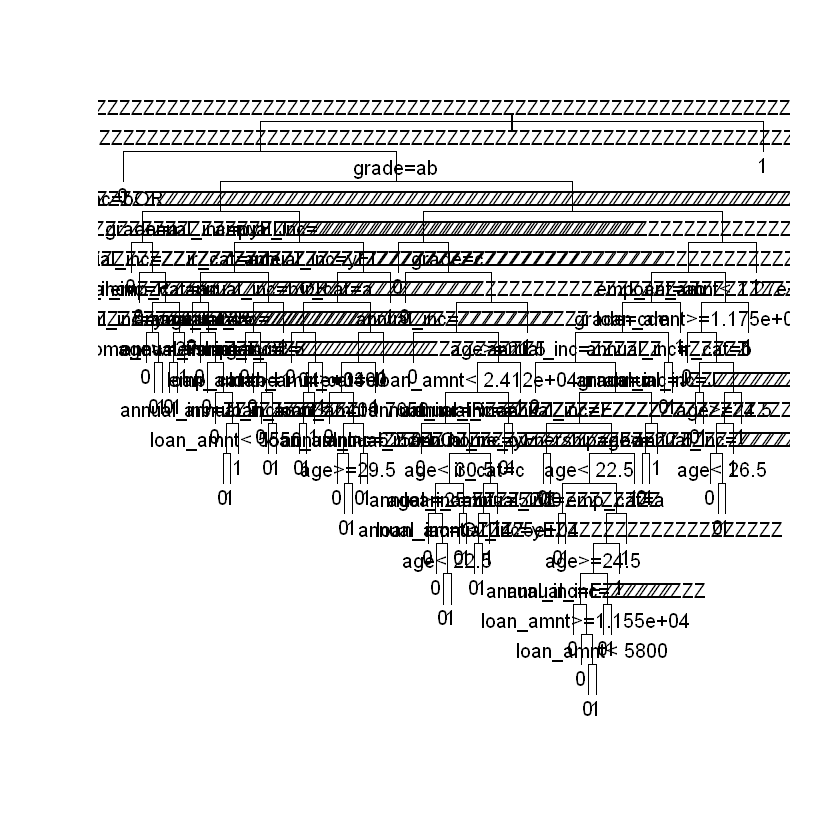

In [116]:
# Load package rpart in your workspace.
library(rpart)

# Change the code provided in the video such that a decision tree is constructed using the undersampled training set. Include rpart.control to relax the complexity parameter to 0.001.
tree_undersample <- rpart(loan_status ~ ., method = "class",
                          data =  undersampled_training_set,
                          control = rpart.control(cp = 0.001))

# Plot the decision tree
plot(tree_undersample, uniform = TRUE)

# Add labels to the decision tree
text(tree_undersample)


# Changing the prior probabilities
As mentioned in the video, you can also change the prior probabilities to obtain a decision tree. This is an indirect way of adjusting the importance of misclassifications for each class. You can specify another argument inside rpart() to include prior probabities. The argument you are looking for has the following form

parms = list(prior=c(non_default_proportion, default_proportion))
The rpart package is now already loaded in your workspace.

### Instructions

- Change the code provided such that a decision tree is constructed , including the argument parms and changing the proportion of non-defaults to 0.7, and of defaults to 0.3 (they should always sum up to 1). Additionally, include control = rpart.control(cp = 0.001) as well.
- Plot the decision tree using the function plot and the tree object name. Add a second argument "uniform=TRUE" to get equal-sized branches.
- Add labels to the tree using function text() and the decision tree object name.

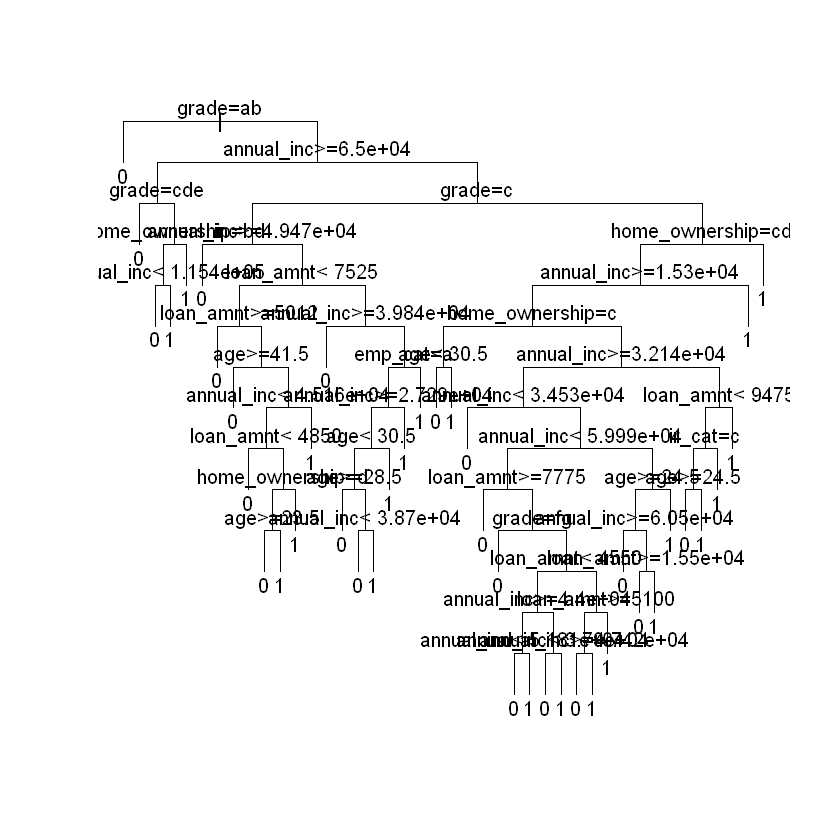

In [117]:
# Change the code below such that a tree is constructed with adjusted prior probabilities.
tree_prior <- rpart(loan_status ~ ., method = "class",
                    data = training_set, parms = list(prior = c(0.7, 0.3)),
                    control = rpart.control(cp = 0.001))

# Plot the decision tree
plot(tree_prior, uniform = TRUE)

# Add labels to the decision tree
text(tree_prior)

# Including a loss matrix
Thirdly, you can include a loss matrix, changing the relative importance of misclassifying a default as non-default versus a non-default as a default. You want to stress that misclassifying a default as a non-default should be penalized more heavily. Including a loss matrix can again be done in the argument parms in the loss matrix.

parms = list(loss = matrix(c(0, cost_def_as_nondef, cost_nondef_as_def, 0), ncol=2))

Doing this, you are constructing a 2x2-matrix with zeroes on the diagonal and changed loss penalties off-diagonal. The default loss matrix is all ones off-diagonal.

### Instructions
- Change the code provided such a loss matrix is included, with a penalization that is 10 times bigger when misclassifying an actual default as a non-default. This can be done replacing cost_def_as_nondef by 10, and cost_nondef_as_def by 1. Similar to what you've done in the previous exercises, include rpart.control to relax the complexity parameter to 0.001.
- Plot the decision tree using the function plot and the tree object name. Add a second argument uniform = TRUE to get equal-sized branches, and add labels to the tree using text() with the tree object name.

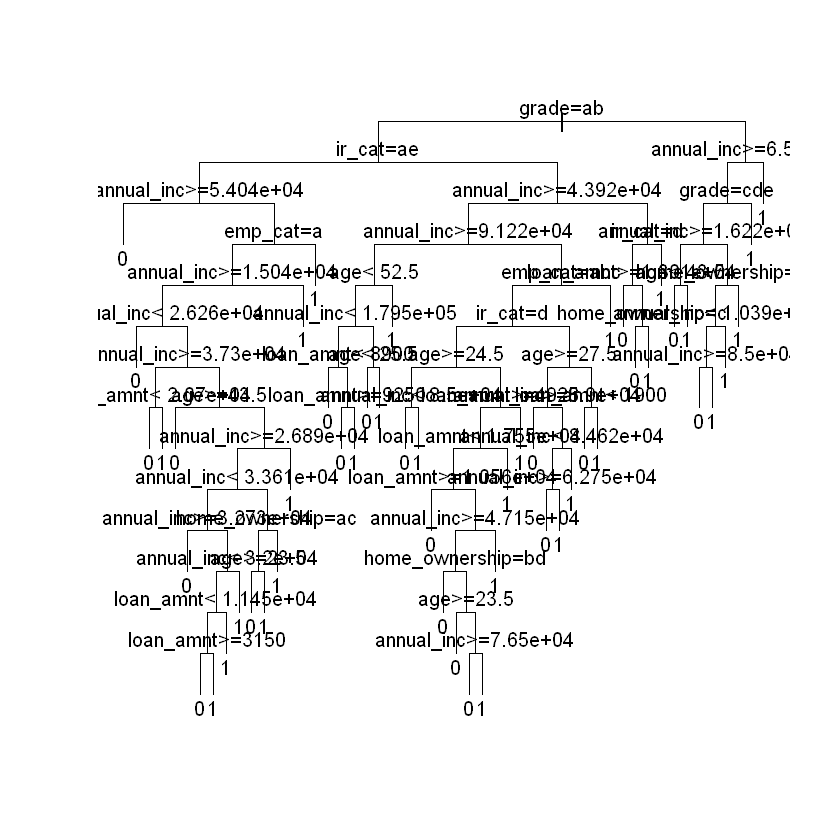

In [118]:
# Change the code provided in the video such that a decision tree is constructed using a loss matrix penalizing 10 times more heavily for misclassified defaults.
tree_loss_matrix  <- rpart(loan_status ~ ., method = "class", data = training_set,
                           parms = list(loss = matrix(c(0, 10, 1, 0), ncol = 2)),
                           control = rpart.control(cp = 0.001))

# Plot the decision tree
plot(tree_loss_matrix, uniform = TRUE)

# Add labels to the decision tree
text(tree_loss_matrix)


# Pruning the tree with changed prior probabilities
In the video, you have learned that pruning a tree is necessary to avoid overfitting. There were some big trees in the previous exercises and now you will put what you have learned into practice, and prune the previously constructed tree with the changed prior probabilities. The rpart package is already loaded in your workspace.

You will first set a seed to make sure the results are reproducible as mentioned in the video, because you will be examining cross-validated error results. Results involve randomness and could differ slightly upon running the function again with a different seed.

In this exercise you will learn to identify which complexity parameter (CP) will minimize the cross-validated error results, then prune your tree based on this value.

### Instructions
- tree_prior is loaded in your workspace.
- Use plotcp() to visualize cross-vaidated error (X-val Relative Error) in relation to the complexity parameter for tree_prior.
- Use printcp() to print a table of information about CP, splits, and errors. See if you can identify which split has the minimum cross-validated error in tree_prior.
- Use which.min() to identify which row in tree_prior-cptable has the minimum cross-validated error "xerror". Assign this to index.
- Create tree_min by selecting the index of tree_prior-cptable within the column "CP".
- Use the prune() function to obtain the pruned tree. Call the pruned tree ptree_prior.
- Package rpart.plot is loaded in your workspace. Plot the pruned tree using function prp() (default setting).

In [120]:
# install.packages('rpart.plot')
library(rpart.plot)


Classification tree:
rpart(formula = loan_status ~ ., data = training_set, method = "class", 
    parms = list(prior = c(0.7, 0.3)), control = rpart.control(cp = 0.001))

Variables actually used in tree construction:
[1] age            annual_inc     emp_cat        grade          home_ownership
[6] ir_cat         loan_amnt     

Root node error: 5818.2/19394 = 0.3

n= 19394 

          CP nsplit rel error  xerror     xstd
1  0.0046850      0   1.00000 1.00000 0.020126
2  0.0043855      4   0.98126 0.99674 0.019682
3  0.0042545      5   0.97687 0.99407 0.019601
4  0.0032463      6   0.97262 0.98866 0.019495
5  0.0016595      9   0.96288 0.98406 0.019276
6  0.0014514     13   0.95424 0.98456 0.019242
7  0.0013609     14   0.95279 0.98764 0.019168
8  0.0013065     15   0.95142 0.99080 0.019205
9  0.0012886     17   0.94881 0.99095 0.019217
10 0.0012298     25   0.93711 0.99083 0.019198
11 0.0011755     27   0.93465 0.99004 0.019136
12 0.0011377     28   0.93348 0.99031 0.019136
13 0.0011

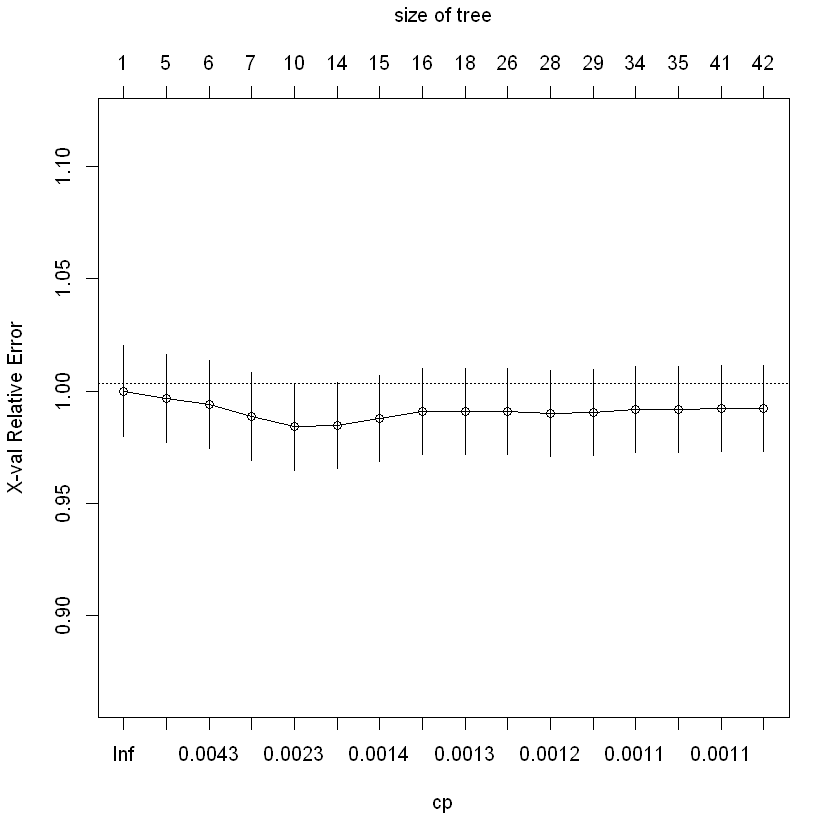

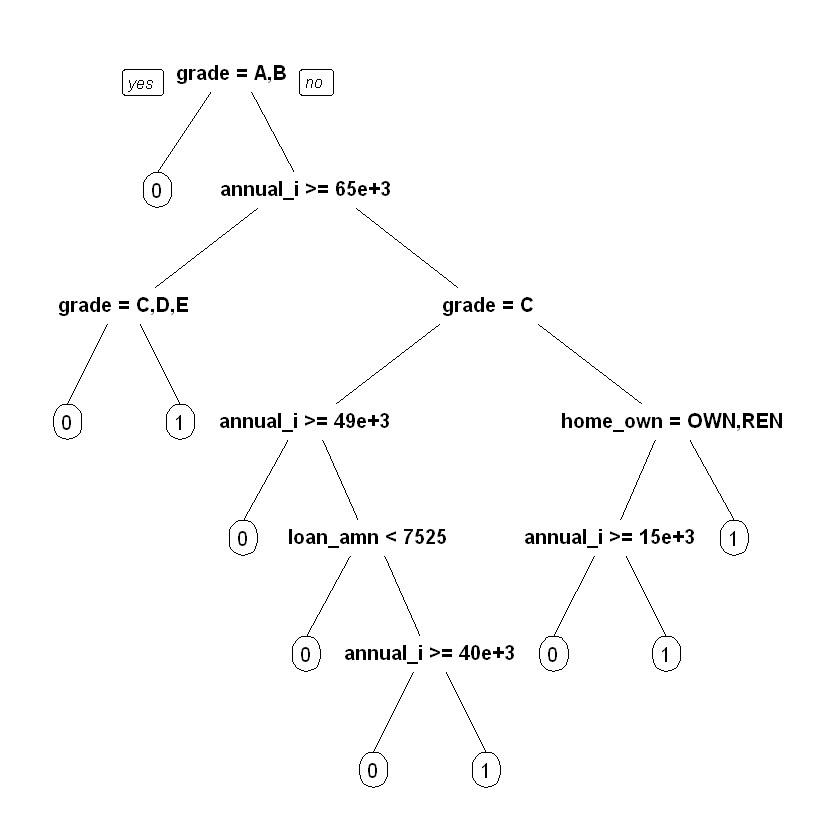

In [121]:
# tree_prior is loaded in your workspace

# Plot the cross-validated error rate as a function of the complexity parameter
plotcp(tree_prior)

# Use printcp() to identify for which complexity parameter the cross-validated error rate is minimized
printcp(tree_prior)

# Create an index for of the row with the minimum xerror
index <- which.min(tree_prior$cptable[, "xerror"])

# Create tree_min
tree_min <- tree_prior$cptable[index, "CP"]

#  Prune the tree using tree_min
ptree_prior <- prune(tree_prior, cp = tree_min)

# Use prp() to plot the pruned tree
prp(ptree_prior)

# One final tree using more options
In this exercise, you will use some final arguments that were discussed in the video. Some specifications in the rpart.control()-function will be changed, and some weights will be included using the weights argument in rpart(). The vector case_weights has been constructed for you and is loaded in your workspace. This vector contains weights of 1 for the non-defaults in the training set, and weights of 3 for defaults in the training sets. By specifying higher weights for default, the model will assign higher importance to classifying defaults correctly.

### Instructions
- Set a seed of 345.
- Add to the provided code by passing case_weights to the weights argument of `rpart().
- Change the minimum number of splits that are allowed in a node to 5, and the minimum number of observations allowed in leaf nodes to 2 by using the arguments minsplit and minbucket in rpart.control respectively.
- Use function plotcp() to investigate where the cross-validated error rate can be minimized.
- Use which.min() to identify the row with the minimum "xerror" in tree_weights-cp. Assign this to index.
- Use the provided code to select the cp for which the crossvalidated error is minimized
- Prune the tree using the complexity parameter where the cross-validated error rate is minimized. Store the pruned tree in ptree_weights.
- Plot the pruned tree using function prp(). Include a second argument extra and set it equal to 1.

In [122]:
case_weights <- c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1)

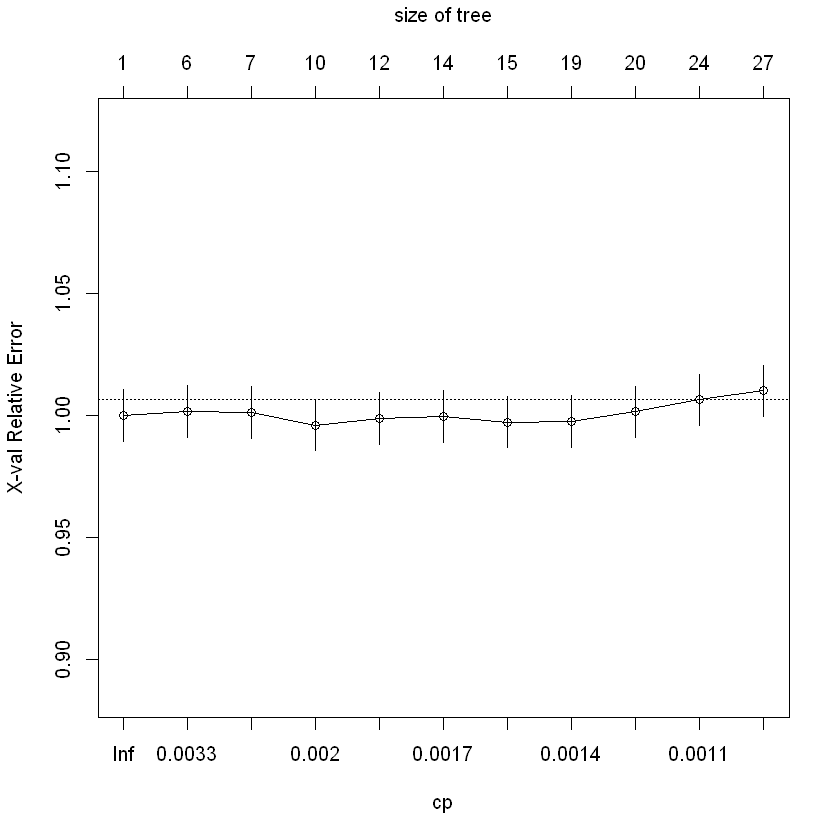

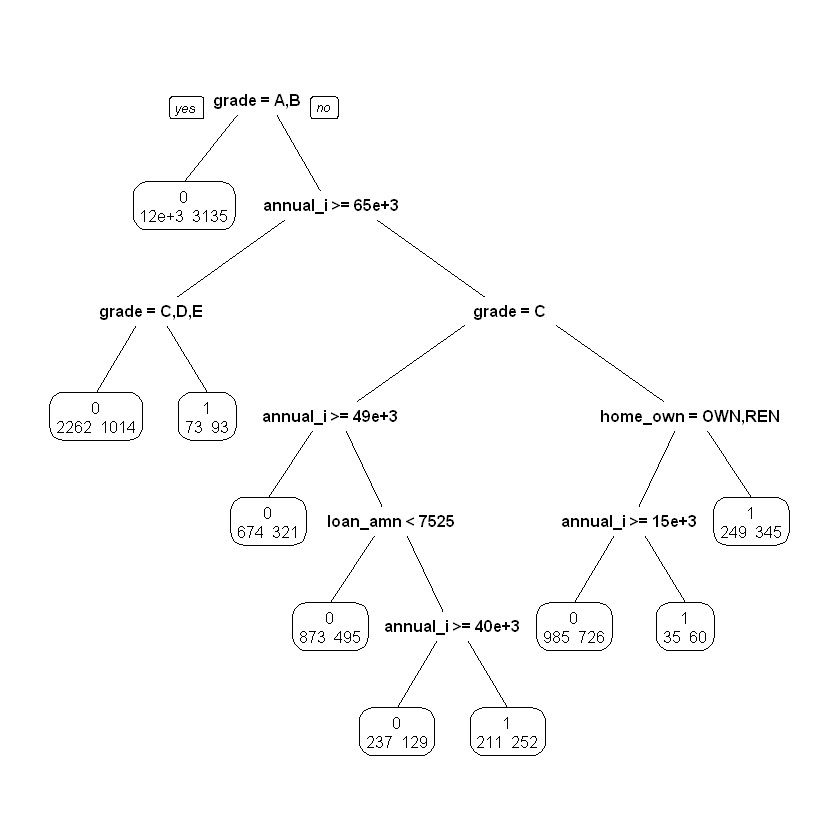

In [123]:
# set a seed and run the code to obtain a tree using weights, minsplit and minbucket
set.seed(345)
tree_weights <- rpart(loan_status ~ ., method = "class",
                      data = training_set, weights = case_weights,
                      control = rpart.control(minsplit = 5, minbucket = 2, cp = 0.001))

# Plot the cross-validated error rate for a changing cp
plotcp(tree_weights)

# Create an index for of the row with the minimum xerror
index <- which.min(tree_weights$cp[ , "xerror"])

# Create tree_min
tree_min <- tree_weights$cp[index, "CP"]

#  Prune the tree using tree_min
ptree_weights <- prune(tree_weights, tree_min)

# Plot the pruned tree using the rpart.plot()-package
prp(ptree_weights, extra = 1)

# Confusion matrices and accuracy of our final trees
Over the past few exercises, you have constructed quite a few pruned decision trees, with four in total. As you can see, the eventual number of splits varies quite a bit from one tree to another:

ptree_undersample  # 7 splits
ptree_prior  # 9 splits
ptree_loss_matrix  # 24 splits
ptree_weights  # 6 splits
Now it is important to know which tree performs best in terms of accuracy. In order to get the accuracy, you will start off by making predictions using the test set, and construct the confusion matrix for each of these trees. You will add the argument type = "class" when doing these predictions. By doing this there is no need to set a cut-off.

Nevertheless, it is important to be aware of the fact that not only the accuracy is important, but also the sensitivity and specificity. Additionally, predicting probabilities instead of binary values (0 or 1) has the advantage that the cut-off can be moved along. Then again, the difficulty here is the choice of the cut-off. You will return to this in the next chapter.

In case you needed a reminder, here is how to compute the accuracy: $$\textrm{Classification accuracy} = \frac{(TP + TN)}{(TP + FP + TN + FN)}$$

### Instructions

- Use predict() to make predictions for all four trees. The test_set should be included in the argument newdata. Don't forget to include type = "class"!
- Construct confusion matrices for each of these decision trees. Use the function table(), and include the "true"" status (using test_set-loan_status) first, followed by the prediction.
- Compute the accuracy using each of the confusion matrices.

In [128]:
ptree_undersample <- rpart(formula = loan_status ~ ., data = undersampled_training_set, 
    method = "class", control = rpart.control(cp = 0.001))

In [129]:
ptree_loss_matrix <- rpart(formula = loan_status ~ ., data = training_set, method = "class", 
    parms = list(loss = matrix(c(0, 10, 1, 0), ncol = 2)), control = rpart.control(cp = 0.001))

In [130]:
# Make predictions for each of the pruned trees using the test set.
pred_undersample <- predict(ptree_undersample, newdata = test_set,  type = "class")
pred_prior <- predict(ptree_prior, newdata = test_set, type = "class")
pred_loss_matrix <- predict(ptree_loss_matrix, newdata = test_set, type = "class")
pred_weights <- predict(ptree_weights, newdata = test_set, type = "class")

# Construct confusion matrices using the predictions.
confmat_undersample <- table(test_set$loan_status, pred_undersample)
confmat_prior <- table(test_set$loan_status, pred_prior)
confmat_loss_matrix <- table(test_set$loan_status, pred_loss_matrix)
confmat_weights <- table(test_set$loan_status, pred_weights)

# Compute the accuracies
acc_undersample <- sum(diag(confmat_undersample)) / nrow(test_set)
acc_prior <- sum(diag(confmat_prior)) / nrow(test_set)
acc_loss_matrix <- sum(diag(confmat_loss_matrix)) / nrow(test_set)
acc_weights <- sum(diag(confmat_weights)) / nrow(test_set)

# 4. Evaluating a credit risk model

In this chapter, you'll learn how you can evaluate and compare the results obtained through several credit risk models.

# Computing a bad rate given a fixed acceptance rate
In the video, you learned how to compute the bad rate (or, the percentage of defaults) in the loan portfolio of a bank when given:

a specific model
the acceptance rate
In this exercise, you will compute the bad rate that a bank can expect when using the pruned tree ptree_prior that you fitted before, and an acceptance rate of 80%. As a reminder, the tree is plotted on your right hand side.

### Instructions

- In the script, you are provided the code to make predictions for the probability of default using the pruned tree and test_set. Remember that if you use the predict() function for a tree, the probability of default can be found in the second column. Therefore [,2] was pasted to the predict() function.
- Obtain the cut-off that leads to an acceptance rate of 80%, using prob_default_prior. You can use the quantile()- function to do this, setting the second argument to 0.8. Assign the name cutoff_prior.
- The code to obtain the actual binary default predictions (0 or 1) is provided. ifelse() here. Name the object bin_pred_prior_80.
- The code to select the default indicators of test_set for the accepted loans acording to a 80% acceptance rate is provided.
- Compute the percentage of defaults (or the "bad rate") for the accepted loans. This is the number of occurences of 1 in accepted_status_prior_80, divided by the total number of instances in this vector. Print the solution to your R-console.

In [89]:
# Make predictions for the probability of default using the pruned tree and the test set.
prob_default_prior <- predict(ptree_prior, newdata = test_set)[ ,2]

# Obtain the cutoff for acceptance rate 80%
cutoff_prior <- quantile(prob_default_prior, 0.8)
  
# Obtain the binary predictions.
bin_pred_prior_80 <- ifelse(prob_default_prior > cutoff_prior, 1, 0)

# Obtain the actual default status for the accepted loans
accepted_status_prior_80 <- test_set$loan_status[bin_pred_prior_80 == 0]

# Obtain the bad rate for the accepted loans
sum(accepted_status_prior_80) / length(accepted_status_prior_80)


[1] 0.0934614

# The strategy table and strategy curve
Repeating the calculations you did in the previous exercise for several acceptance rates, you can obtain a strategy table. This table can be a useful tool for banks, as they can give them a better insight to define an acceptance strategy.

You know how to compute a bad rate for a certain acceptance rate by now, so the function strategy_bank was written and loaded into your workspace to speed things up. This function computes the cut-off and bad rate for the acceptance rates that are multiples of 5% (0%, 5%, 10%, …).

### Instructions
- Have a look at the function strategy_bank.
- The vector predictions_cloglog contains predicted probabilities of default using the cloglog model you used in chapter 2, the vector predictions_loss_matrixcontains the predicted probabilities of default using the pruned tree including a loss matrix (previously constructed in chapter 3). Apply function strategy_bank to each of the prediction-vectors, assign the name strategy_cloglog and strategy_loss_matrix respectively.
- The strategy tables can be obtained using the object names in combination with table.
- The strategy curves have been plotted for you. The strategy curve of the tree model shows pretty strange behavior. Because of the structure of classification trees, you might have a bigger chance for weird "jumps" here. Additionally, the tree with a loss matrix was a very big one, so this might be the result of overfitting!

In [131]:
strategy_bank <-
function(prob_of_def){
cutoff=rep(NA, 21)
bad_rate=rep(NA, 21)
accept_rate=seq(1,0,by=-0.05)
for (i in 1:21){
  cutoff[i]=quantile(prob_of_def,accept_rate[i])
  pred_i=ifelse(prob_of_def> cutoff[i], 1, 0)
  pred_as_good=test_set$loan_status[pred_i==0]
  bad_rate[i]=sum(pred_as_good)/length(pred_as_good)}
table=cbind(accept_rate,cutoff=round(cutoff,4),bad_rate=round(bad_rate,4))
return(list(table=table,bad_rate=bad_rate, accept_rate=accept_rate, cutoff=cutoff))
}

In [132]:
predictions_cloglog <-c(0.08839312640561, 0.111588176724478, 0.136333451604525, 0.0966571809432098, 0.112475127721554, 0.0993670096572476, 0.200617365473915, 0.0556827728394746, 0.123168159583002, 0.138709928103785, 0.182049270682748, 0.082024522942177, 0.140410976050759, 0.19050224157232, 0.200092773023165, 0.0919839542957828, 0.0936948104327578, 0.0852796407536936, 0.0863380785531144, 0.170863012229482, 0.0919839542957828, 0.102541460431202, 0.171119684404987, 0.0865504071330073, 0.180402735166284, 0.17408152574698, 0.135176185700228, 0.133858155578546, 0.172315235907871, 0.127694343704738, 0.0892107175213372, 0.138957065094773, 0.0841594954350951, 0.0477019930699774, 0.0705295921664084, 0.0531893478493246, 0.170416109137863, 0.131006621971965, 0.17643101554524, 0.112562066234437, 0.175252765177571, 0.103986492610732, 0.137762161367001, 0.17479563036137, 0.0729971514495719, 0.185401951209082, 0.129923663155512, 0.0900354915047274, 0.130261064104705, 0.0878279086921994, 0.0528140409721925, 0.08522681309204, 0.196969161771808, 0.179220611398357, 0.185413183360962, 0.139371949923959, 0.0513912786277342, 0.0867843061459384, 0.146847550053699, 0.120905747394241, 0.133755438285214, 0.130321826976143, 0.095726790041883, 0.0770928801865519, 0.0520390718439211, 0.0541617008953051, 0.134918372177913, 0.0441286568360859, 0.0942543248767256, 0.168878541869357, 0.131457224822864, 0.0557682272941071, 0.189682603573112, 0.16071810459489, 0.161283673259238, 0.13751697568894, 0.163435062731779, 0.184800209569544, 0.051665871252221, 0.144919684666588, 0.176170228916771, 0.104386141666984, 0.159074009774519, 0.0872101073827945, 0.112918197184768, 0.0907204145777234, 0.054722596353644, 0.157819711846529, 0.168285374835799, 0.130416891796758, 0.13371362712711, 0.0938297740350919, 0.0986241894551018, 0.0968794228068919, 0.125419441091384, 0.0544150815309949, 0.138842101248358, 0.166571793332326, 0.0966307738772714, 0.193582750893504, 0.168978207682979, 0.185992122352386, 0.141375432981651, 0.201366097807442, 0.130788911392187, 0.137421928558055, 0.297753812573546, 0.182578599567907, 0.18475743855476, 0.09036575031333, 0.0444728844921977, 0.0759777161218666, 0.0910047735074666, 0.110841726238919, 0.0529528670376974, 0.0933785781469066, 0.0967663868560623, 0.130946924785961, 0.169718001468901, 0.093800845909968, 0.0511994439321417, 0.0558606926027244, 0.131457224822864, 0.134834092904263, 0.179376292922371, 0.107669141379357, 0.179496188391465, 0.17479563036137, 0.0945684994666075, 0.17932175889666, 0.0779288617456622, 0.105383661772259, 0.173627114336895, 0.119855075068713, 0.211226230721034, 0.179742648709225, 0.189797735783791, 0.0876107832620348, 0.146551227904836, 0.147815643869484, 0.153941664090201, 0.108103712454109, 0.0586742273604205, 0.103261597021711, 0.140535882101552, 0.184962197379804, 0.0958152863296958, 0.140629021176015, 0.0540606697689219, 0.0501379383111469, 0.132046014785609, 0.183109289424268, 0.167991350403453, 0.18005493618247, 0.132483332394003, 0.0915893924364564, 0.129502267585655, 0.133101332764065, 0.0965019810684156, 0.110219241125129, 0.142852492897317, 0.0915893924364564, 0.134918372177913, 0.086730458768336, 0.141501124562859, 0.134097336730954, 0.167009659983332, 0.107907965061525, 0.17408152574698, 0.193249872043516, 0.0549099471263952, 0.161165517897303, 0.0820004016972722, 0.12334930445136, 0.0928033286458326, 0.19122943045812, 0.140660889944424, 0.0562035028132868, 0.0882879296453587, 0.0920670388296914, 0.0486995971287377, 0.125115942856801, 0.141249843631449, 0.053402397327551, 0.0928033286458326, 0.0762162326532649, 0.0520050184104374, 0.142852492897317, 0.0826513082476713, 0.190174013765125, 0.135676224055539, 0.101249923906166, 0.137687942860491, 0.0426636187067514, 0.0799943066752808, 0.0470239163445569, 0.176388024076111, 0.174099695846685, 0.145461681368127, 0.186302710351837, 0.128644226211715, 0.0487908695323547, 0.148025814126497, 0.12308422776145, 0.173303601742695, 0.0849251569434223, 0.152089877338138, 0.0942422673896551, 0.0966307738772714, 0.0861023259968338, 0.153034338724489, 0.142725703298396, 0.133994450437311, 0.0936296192309536, 0.182251374714127, 0.187916187163682, 0.0911714451213958, 0.154548987004694, 0.0527095526821787, 0.126062349769537, 0.0837738688620369, 0.133196760965767, 0.185842627265347, 0.136382991976804, 0.127848899447523, 0.0817128344113493, 0.193379000784602, 0.0750878633356586, 0.197345543099507, 0.105298030244585, 0.138957065094773, 0.0878892590054864, 0.13751697568894, 0.0947219938323258, 0.194739882242362, 0.138833446151396, 0.101918694185477, 0.0856718696659294, 0.0573969966230323, 0.119827585828596, 0.0974680879595714, 0.0545819323326848, 0.0526111543421363, 0.0976297710062139, 0.135642332346748, 0.136048120840699, 0.151748140856765, 0.0801712853216445, 0.0535452144727973, 0.194999169317584, 0.180724873531775, 0.128257274467607, 0.0924065902936901, 0.145039245509341, 0.0520499579978327, 0.147461825873421, 0.14421565441406, 0.136700012568633, 0.333309098183907, 0.116543467920673, 0.0901808181979695, 0.120604180803848, 0.188240986567742, 0.359078563484738, 0.0917265929976387, 0.142004914508612, 0.056327527608263, 0.126401923240255, 0.0526111543421363, 0.0485552197989636, 0.171707493642173, 0.093800845909968, 0.106398217347637, 0.0741278604029518, 0.0496849405259184, 0.107240480086195, 0.167650140595972, 0.131189522212562, 0.0526111543421363, 0.114449250535009, 0.0547053603559186, 0.102104927647748, 0.127734414447084, 0.0525973847878724, 0.043032196526598, 0.145158896399825, 0.186277517814256, 0.158236815038204, 0.112396243902404, 0.0699801052329861, 0.0922973471912965, 0.138709928103785, 0.0491898660119676, 0.118599083371125, 0.186572654852558, 0.0953475025190916, 0.173324761225014, 0.191559256712192, 0.0835067289464233, 0.129894039324729, 0.11913430640589, 0.278937104597611, 0.101983626210414, 0.155050499364756, 0.0801316141373363, 0.194593830332499, 0.0506091343672077, 0.0794891934329652, 0.05546089492086, 0.0927736275293554, 0.0926888663646621, 0.187788215240562, 0.0567067341713979, 0.14162691844061, 0.183109289424268, 0.145461681368127, 0.188426356518371, 0.0514393464356277, 0.108299792969528, 0.144343653244184, 0.184278380248324, 0.0545790617166028, 0.0513912786277342, 0.0931432117747111, 0.0974482032709484, 0.20229027389951, 0.0606990800249797, 0.110847377375689, 0.185797610480833, 0.0557383767481427, 0.199851575567472, 0.132601742232024, 0.150974066720179, 0.196517229660619, 0.0938297740350919, 0.0886120950876344, 0.0474966516443056, 0.140259960427241, 0.0560355034966044, 0.0484857426675322, 0.164009229726632, 0.108496207091776, 0.0558086160381059, 0.176277606995859, 0.0614701915562485, 0.17704583770899, 0.0928476477441708, 0.139452551133399, 0.0492359286375878, 0.0468295688048627, 0.143406995546388, 0.133755438285214, 0.097072387059479, 0.130321826976143, 0.18390385194067, 0.0934981711550191, 0.143746135984656, 0.124779571989215, 0.0937151955195629, 0.049157628323818, 0.144087759284724, 0.126742343584433, 0.165452586972366, 0.132483332394003, 0.114966465790034, 0.0845594448571361, 0.190174013765125, 0.191605499209818, 0.0994994118310317, 0.18390385194067, 0.167991350403453, 0.144471755840785, 0.178855199849469, 0.105752948458417, 0.16540918005686, 0.0942302113634807, 0.173324761225014, 0.156615669451954, 0.0913384064057028, 0.18475743855476, 0.0546982090612522, 0.0468273475620403, 0.0904484945781651, 0.0564735229186084, 0.147370397843331, 0.124220816565178, 0.0489409246256329, 0.175775234531086, 0.0495456525408686, 0.0467550005403661, 0.182365105044379, 0.0597436497801134, 0.0956517020893788, 0.0974892788564321, 0.120688424610564, 0.0968955132993631, 0.117187176895589, 0.162662688489373, 0.0875867262549199, 0.184525385111103, 0.0392132967824642, 0.0584914422955457, 0.177783686995816, 0.166324066683963, 0.146551227904836, 0.182229249823652, 0.096115112918205, 0.140189370165191, 0.187158875894821, 0.0830533858625441, 0.0557529441479822, 0.138130692503221, 0.10867866542772, 0.191266315183653, 0.0553575119362944, 0.337401375203561, 0.146542134268192, 0.141232259005612, 0.0486186781176382, 0.0492359286375878, 0.130240198047342, 0.168978207682979, 0.151842036139189, 0.176738188905109, 0.14421565441406, 0.187318757688449, 0.150889911151745, 0.193646262803446, 0.0517625503533657, 0.0461887244913802, 0.2413047959445, 0.138666695361742, 0.0924517116520838, 0.161524640552021, 0.0868350297366471, 0.177879469608557, 0.0830429373036456, 0.128331937056762, 0.0568803982781489, 0.126895832760035, 0.172315235907871, 0.136578285676999, 0.141582853206928, 0.05532627227446, 0.144471755840785, 0.182736862180056, 0.191770634385322, 0.0892393349236608, 0.0989571990004803, 0.175360679411725, 0.0571407255728756, 0.189846282850938, 0.130166104173153, 0.145590689548324, 0.189473248332718, 0.132601742232024, 0.179742648709225, 0.106026326348054, 0.131105114349263, 0.124109344310008, 0.0473209729473957, 0.178253352450046, 0.0574505097998467, 0.134834092904263, 0.138709928103785, 0.169718001468901, 0.187038420200311, 0.126288638071641, 0.127645617925773, 0.0528191723918921, 0.0952422469201223, 0.159311998184655, 0.128618447455204, 0.108256162009757, 0.134877749060806, 0.0577770572037255, 0.110518881308923, 0.0555199112650532, 0.144087759284724, 0.11799161759297, 0.0418262128417949, 0.198603635071888, 0.10355325419146, 0.0864377311084115, 0.149696828276458, 0.195526165659369, 0.0549099471263952, 0.136090603213737, 0.104445973581198, 0.107449227334893, 0.131692449608571, 0.103261597021711, 0.11187724517638, 0.17704583770899, 0.193243386571556, 0.195502629380781, 0.13751697568894, 0.0940210146802204, 0.167155844744284, 0.0589711246906632, 0.13682034367987, 0.139700901227257, 0.142627361666731, 0.049948292548984, 0.0485630003275066, 0.0856718696659294, 0.0975370785587109, 0.0530900791550858, 0.152958683085866, 0.0542629153673676, 0.14297938549452, 0.200066411342747, 0.0891118979507301, 0.105600007543652, 0.116028996127787, 0.180680954446331, 0.084868805365609, 0.177479688329387, 0.0305352321859994, 0.0528634021076448, 0.115841277716337, 0.183744696117615, 0.0577790554088586, 0.0539925669375013, 0.0526111543421363, 0.112497883279147, 0.146979376543387, 0.177817043163673, 0.125003725951037, 0.0539421817533074, 0.188589082274244, 0.0995247982867756, 0.179742648709225, 0.0964773236824845, 0.108211938003513, 0.0929433703564289, 0.128848977888996, 0.132838854603122, 0.184653582061431, 0.117598835408055, 0.139912368458956, 0.0930808834248561, 0.132509825444761, 0.0700109828263025, 0.189496147115949, 0.0875080306536948, 0.132677282945279, 0.0847567037274849, 0.139371949923959, 0.151922402970265, 0.049006034856312, 0.0500910542347489, 0.0500746453088256, 0.0501379383111469, 0.148657958834162, 0.133636079500389, 0.153228879642836, 0.113419777920724, 0.132601742232024, 0.135763339171171, 0.167697786316864, 0.0555789885436791, 0.139912368458956, 0.0547053603559186, 0.0965216831738508, 0.139328527953207, 0.108608320649992, 0.174947890505297, 0.149260632173094, 0.101595423951134, 0.110119530305879, 0.0970458727551087, 0.178577352104282, 0.138182389220573, 0.105807213919128, 0.116543467920673, 0.137394533177915, 0.178234797194231, 0.0886120950876344, 0.0574437434531664, 0.0899667580983078, 0.0743815985232047, 0.0457705422444319, 0.0509129973931222, 0.0872101073827945, 0.181365959867555, 0.192303849285467, 0.186531562185693, 0.0803929592658684, 0.170311921392858, 0.170416109137863, 0.143942074796413, 0.0869944353381304, 0.135642332346748, 0.117038429113659, 0.196598029425867, 0.36793995784594, 0.0908632960420361, 0.163393102348731, 0.096191060933986, 0.088906253783184, 0.188972007863575, 0.073231037164162, 0.188101275611136, 0.0902004773693104, 0.0475102459642268, 0.113331701577026, 0.0787517798845075, 0.0517906083016845, 0.0992279558176402, 0.142257424571857, 0.110761171475017, 0.0494937189037145, 0.0917119666441295, 0.0975132960079902, 0.115797897656016, 0.0563683092028204, 0.159915200822453, 0.0843142194509825, 0.138957065094773, 0.0514706041144893, 0.265676583315331, 0.188925720436368, 0.0824676311611744, 0.0532390498060497, 0.186660987830676, 0.143541517464347, 0.0940979646003412, 0.192432423959065, 0.171715075749295, 0.119273788349652, 0.138816137442352, 0.0518041724734468, 0.0965019810684156, 0.132838854603122, 0.11919999588688, 0.0569865386816665, 0.050246509375181, 0.103543441511411, 0.140036867996121, 0.197863856111419, 0.0876332859598158, 0.189307180299157, 0.10114757628571, 0.143814401374564, 0.0823691635333209, 0.0953596938419483, 0.0528081298804287, 0.0496384688872714, 0.165658501715389, 0.0830429373036456, 0.186370400981169, 0.134370502807667, 0.105097107356275, 0.0907801915461829, 0.168830595756907, 0.146153117351363, 0.0575539247947172, 0.0480023131212812, 0.0493847120558471, 0.0374420098530292, 0.0725692729969494, 0.150432828376835, 0.144471755840785, 0.0477780335011931, 0.0565907342848854, 0.113010624272911, 0.0431349923452123, 0.132282210990896, 0.0483560730047935, 0.0499384738830329, 0.182827762313887, 0.102914945175924, 0.0510560252281046, 0.135159296329384, 0.101587437899616, 0.0523316776243917, 0.0354438251955385, 0.138007748354883, 0.0780510740219428, 0.0563646280179529, 0.188101275611136, 0.0590361602893538, 0.18005493618247, 0.0519078989472175, 0.0940582422559756, 0.170863012229482, 0.0535844371846459, 0.173525002156607, 0.105670950506085, 0.0552903909899081, 0.0549648019723183, 0.122294302738684, 0.16384539587077, 0.0461584055762214, 0.0498246097404658, 0.174993529243552, 0.141752814680449, 0.0906971592072335, 0.0477019930699774, 0.0540366212038352, 0.17704583770899, 0.0510359661089823, 0.0963832035083495, 0.0565907342848854, 0.178234797194231, 0.149036294978484, 0.18390385194067, 0.0499283890401352, 0.166134956756454, 0.0786502216975927, 0.13137493970825, 0.19022730018127, 0.171266640434819, 0.046667442475267, 0.138420032261157, 0.13535833194703, 0.0862792966749106, 0.0642871634517801, 0.0548075610742026, 0.0555789885436791, 0.0570396808658144, 0.0583666093591794, 0.111062191176003, 0.0483281568804018, 0.128964386279554, 0.131105114349263, 0.079042467664988, 0.119641601797787, 0.0878166328878538, 0.0445056187680926, 0.0531061929852819, 0.0681494221573956, 0.0915184423332347, 0.0573969966230323, 0.0506091343672077, 0.0867494021494288, 0.0597875872032852, 0.109137255732153, 0.0574505097998467, 0.157861320588854, 0.111291494735467, 0.0548659025805529, 0.0826725956014979, 0.103128419588254, 0.155019219896593, 0.0521364299225566, 0.0499015811128497, 0.0860768781727312, 0.101723128371449, 0.208599166033375, 0.0661921644424309, 0.124779571989215, 0.191670702559587, 0.186132655220876, 0.117070042901744, 0.0814173690138629, 0.14162691844061, 0.0912889215902829, 0.105097107356275, 0.188101275611136, 0.103878389368716, 0.242183664550029, 0.0524798206083668, 0.107907965061525, 0.0591942651175546, 0.0910530580303795, 0.0948085154410568, 0.166178534592857, 0.186692846212018, 0.0609452004773462, 0.130721117192484, 0.145993842177687, 0.132560263470994, 0.0586073929090324, 0.110518881308923, 0.181454265380891, 0.0855147723356508, 0.123619877088355, 0.19050224157232, 0.12615816693357, 0.13550449567078, 0.103637550466802, 0.0572218035875334, 0.0516019230137314, 0.0452286123489869, 0.0548587309138987, 0.170267373837748, 0.280406565399528, 0.0546543293987547, 0.112257757073487, 0.0529909904972638, 0.0544658955965451, 0.133970834167675, 0.0971510102976835, 0.177990172854347, 0.051295274047462, 0.095068529414313, 0.147675681420031, 0.046855019359638, 0.0795998298536005, 0.0536733855242822, 0.0461584055762214, 0.151966872837133, 0.0882596023329572, 0.176277606995859, 0.0527588189049521, 0.175286911867893, 0.103986492610732, 0.109474430239619, 0.0404915041429974, 0.118743394382084, 0.145719802132484, 0.0453560554217751, 0.181049671038039, 0.195691505388777, 0.124970124957313, 0.122145982001258, 0.0384053747405038, 0.0582617796966972, 0.19606620331253, 0.165739804217758, 0.135159296329384, 0.112079731301722, 0.0584286210513326, 0.0887746018170864, 0.185133501279964, 0.0504201410331942, 0.174572785480552, 0.0457962654214508, 0.0545676619787933, 0.0434724392964864, 0.0511994439321417, 0.0557565865750537, 0.0990706114713766, 0.0581464915285207, 0.195166863237223, 0.114242764647335, 0.0852796407536936, 0.115935287636313, 0.0910666117139546, 0.0493743687005637, 0.150443061114577, 0.109033578336133, 0.146977678811855, 0.138394140884084, 0.0548587309138987, 0.140410976050759, 0.0539691331746862, 0.0393760038838832, 0.182523203949972, 0.174423767408707, 0.172766584092369, 0.255287202696774, 0.104598059728391, 0.141331439389365, 0.0568803982781489, 0.147985042524348, 0.148657958834162, 0.0558086160381059, 0.092056311818308, 0.108941783897348, 0.186531562185693, 0.0994994118310317, 0.0475235823079305, 0.0499179348302315, 0.0572180683711412, 0.17607888644908, 0.120287290530103, 0.130990213215916, 0.103637550466802, 0.189241222104919, 0.0973755703633123, 0.0515211817910552, 0.0654552885204934, 0.106574750955318, 0.162745441878026, 0.176124317114302, 0.099664244691544, 0.0452837773305167, 0.0779791795443271, 0.134147644132322, 0.0462016989436897, 0.076237298514804, 0.188101275611136, 0.0485766245847132, 0.054313591455477, 0.0857835949178496, 0.054388556243757, 0.12840663983491, 0.0900736006975175, 0.0835433023215007, 0.0515211817910552, 0.161851034574533, 0.133280903694254, 0.0535732392516101, 0.140367257435552, 0.160557233655136, 0.140803533377435, 0.0898666279749832, 0.0433094854432007, 0.11200078054284, 0.0494356289456111, 0.154946131650955, 0.089566819313648, 0.183959617826444, 0.0489280906591442, 0.114061797302025, 0.0482123758602864, 0.0546400406688709, 0.127017595560631, 0.0713846054116824, 0.17704583770899, 0.0948951118697999, 0.0741963486863877, 0.126628775932623, 0.106026326348054, 0.0489578620387562, 0.092309168722602, 0.0510560252281046, 0.0862001831751413, 0.187015782981556, 0.0801933962003453, 0.0600379570814304, 0.0902541426663303, 0.15707131601081, 0.132139251289814, 0.0544872637242219, 0.133994450437311, 0.142556276628465, 0.135400616212164, 0.192101279274123, 0.0557565865750537, 0.14297938549452, 0.347384975775669, 0.0559128163087895, 0.0945249899034869, 0.188101275611136, 0.142310534883197, 0.0570515812922217, 0.0947219938323258, 0.0886773535431609, 0.115319861470967, 0.0527588189049521, 0.05665389277546, 0.0521296051102709, 0.133195255869559, 0.121745885874967, 0.0522339650817873, 0.0548003968103634, 0.108442603387011, 0.0579645601435967, 0.118436713819444, 0.0569334444992752, 0.179742648709225, 0.195784239141854, 0.105288062122437, 0.0837738688620369, 0.0571003259148768, 0.181352954804926, 0.167991350403453, 0.172571394198112, 0.0462884045550601, 0.105766876878236, 0.0520434232872386, 0.0546543293987547, 0.137579424850905, 0.109731893213896, 0.0966571809432098, 0.0552362653441445, 0.0510083059028094, 0.264221183697088, 0.04629811729522, 0.092405433851016, 0.0532887968870741, 0.138709928103785, 0.0508321019590045, 0.197524550968568, 0.11926626715391, 0.0451565325072136, 0.056017205304924, 0.12388667811977, 0.0537737136362757, 0.101042255080516, 0.106122555824819, 0.129526623149755, 0.0519836528824347, 0.0530900791550858, 0.0558723544075494, 0.0563683092028204, 0.105859803804729, 0.129163093301182, 0.187491984283972, 0.156284887829228, 0.0553575119362944, 0.0536733855242822, 0.198764426064621, 0.122022374982924, 0.0793286455797991, 0.0963832035083495, 0.0571355926571159, 0.0597868254738393, 0.053062299973907, 0.164585209426747, 0.178544759296339, 0.198785971111347, 0.089620126468878, 0.112264864987311, 0.136803265533527, 0.0878279086921994, 0.0743645613739498, 0.181173742096536, 0.0931193676752445, 0.10916117459545, 0.181151733058868, 0.177971641930867, 0.145332777526154, 0.0952422469201223, 0.189701383556409, 0.170014729471979, 0.15486351284324, 0.140438922661646, 0.0520877287670708, 0.05546089492086, 0.138420032261157, 0.0547053603559186, 0.119360777229046, 0.150792224314222, 0.0884498711760123, 0.0931432117747111, 0.184739090375687, 0.104389161710506, 0.0475235823079305, 0.106421804865958, 0.14124825515089, 0.0958264278428175, 0.141375432981651, 0.0889648947430021, 0.0553647468803413, 0.049006034856312, 0.089216440304065, 0.130622891104669, 0.116391074747114, 0.0506015846506867, 0.0557682272941071, 0.140815647182849, 0.080673835759351, 0.0803213744994176, 0.0433786844332206, 0.0875867262549199, 0.0558606926027244, 0.0526111543421363, 0.119639509615554, 0.102793460572809, 0.143959967790494, 0.123586621233224, 0.0819059279843238, 0.0525241986683734, 0.0808603521988084, 0.0485074787369743, 0.0571684969191219, 0.14017020004239, 0.085805650695866, 0.173345923011349, 0.137762161367001, 0.334941630667876, 0.0591942651175546, 0.12997252492391, 0.051665871252221, 0.0536162757875355, 0.0558606926027244, 0.158359262883309, 0.0492359286375878, 0.0582189846880765, 0.0527519149079526, 0.056420892275731, 0.31558502834392, 0.132365020034618, 0.0533896883912425, 0.147528478546372, 0.131105114349263, 0.133076357666341, 0.123775484057395, 0.0814876846319417, 0.105768091199398, 0.0911305599249755, 0.0801316141373363, 0.0552514110395262, 0.137762161367001, 0.050278846966741, 0.0900700655796187, 0.0553575119362944, 0.0716086405384578, 0.0581885490463459, 0.20985695227397, 0.167322647280983, 0.0692118143977632, 0.050594955346993, 0.129591592011275, 0.0994994118310317, 0.0719290385520163, 0.1812177672769, 0.143405253058099, 0.143578876303464, 0.154178779103047, 0.103047863057829, 0.142556407741891, 0.124779571989215, 0.0954184686910562, 0.0509439438931572, 0.0973594045231923, 0.1905482600293, 0.112746328303257, 0.12840663983491, 0.191724356927286, 0.09036575031333, 0.127654284591989, 0.0997626321438031, 0.0541617008953051, 0.0466106333875165, 0.161050188138036, 0.132601742232024, 0.0591942651175546, 0.139328527953207, 0.188751931648344, 0.0962891701797524, 0.0912548895269852, 0.143660039256607, 0.149504641125749, 0.181419053976311, 0.139496008545357, 0.0915893924364564, 0.175775234531086, 0.101535679362554, 0.115597873224559, 0.102169252527064, 0.0526111543421363, 0.139993256141066, 0.0528018437722465, 0.13721546478421, 0.0558086160381059, 0.0540606697689219, 0.0559128163087895, 0.0483497303353177, 0.0976260304440441, 0.146977678811855, 0.112429922870955, 0.168978207682979, 0.193902164680617, 0.040647950447881, 0.0560355034966044, 0.051295274047462, 0.140268697028332, 0.0523192163990184, 0.0551368918864103, 0.0502623781648757, 0.184653582061431, 0.103289425539681, 0.0557565865750537, 0.055534423263179, 0.0559201216593382, 0.0495757898118557, 0.0510560252281046, 0.181308900539512, 0.0587288938634944, 0.136048120840699, 0.0810719482965073, 0.103469163849673, 0.0524638915242951, 0.0554091800308659, 0.155598022675802, 0.135521424715443, 0.0865964424793883, 0.103986492610732, 0.142173741601348, 0.0483950264211623, 0.098403189238268, 0.112475127721554, 0.0593714336440065, 0.136090603213737, 0.334699518879048, 0.0907801915461829, 0.0399130661177666, 0.0526534397035931, 0.156765983745541, 0.131987495444063, 0.14437231510258, 0.0945370816434344, 0.0410048893006156, 0.152513858746504, 0.172616017609178, 0.136576698252787, 0.0857317857285519, 0.0505145516851459, 0.0540571349317824, 0.0538854829348507, 0.0483950264211623, 0.176738188905109, 0.0947219938323258, 0.11372755142356, 0.0582579787135415, 0.0995392546031031, 0.093800845909968, 0.0518109558547444, 0.138130692503221, 0.110105064688951, 0.178544759296339, 0.107886181733521, 0.0486995971287377, 0.0955644522985406, 0.0955644522985406, 0.0549105954840959, 0.184314081980703, 0.0958386771035942, 0.0906971592072335, 0.328212895806484, 0.0546543293987547, 0.134918372177913, 0.189470574817617, 0.0775937948978439, 0.0551513067199942, 0.117690003119543, 0.0592494007322616, 0.0404534473838713, 0.126688205789484, 0.186477315234974, 0.147815643869484, 0.0492359286375878, 0.136153992814341, 0.329851598870216, 0.122845013420909, 0.138376882435204, 0.138394140884084, 0.138957065094773, 0.12362549624261, 0.0490454982451633, 0.112475127721554, 0.103845350736609, 0.14036167385111, 0.0948085154410568, 0.0830047694951527, 0.0496059449320805, 0.18005493618247, 0.159353962054317, 0.171864940545658, 0.0532390498060497, 0.0552362653441445, 0.0493743687005637, 0.0808380656226193, 0.125870253877443, 0.0529138099497668, 0.10755683791442, 0.184835834924863, 0.121232413846971, 0.0451905375629257, 0.130721117192484, 0.32916328113143, 0.0864377311084115, 0.17704583770899, 0.0563683092028204, 0.139913991431309, 0.0881396584412409, 0.188916967662939, 0.102130221821256, 0.182578599567907, 0.0991376259342197, 0.13723793285826, 0.180004172734456, 0.0597312057898093, 0.0464187606789275, 0.183426749577953, 0.147405260622477, 0.0580261579696266, 0.0399106910282703, 0.137394533177915, 0.134473654889417, 0.134755947230442, 0.0548867749493032, 0.135400616212164, 0.0990706114713766, 0.092405433851016, 0.0535022333490815, 0.096201370367116, 0.058545197440146, 0.0919603916738979, 0.159676399378441, 0.0981759071173244, 0.0499974140751606, 0.0976260304440441, 0.05054765538334, 0.0514874579718947, 0.122845013420909, 0.0503259021164491, 0.101234347745874, 0.115039165951653, 0.0572714198446643, 0.0536733855242822, 0.0577338708331818, 0.190772426695044, 0.0565907342848854, 0.0506564903118066, 0.121559900548625, 0.0879084431171377, 0.0565335842416192, 0.0591942651175546, 0.100704346576145, 0.0542629153673676, 0.164628422076521, 0.090674959433384, 0.140438922661646, 0.0484959046529875, 0.0536733855242822, 0.137203682770913, 0.0773563375916961, 0.10170181683184, 0.151823339727657, 0.0870503257170762, 0.0888388600027393, 0.0568273999778249, 0.110644524296595, 0.0901773485676171, 0.0928308915299622, 0.170267830454753, 0.0536733855242822, 0.0448682299918676, 0.0566501935055887, 0.202107511908919, 0.146282684879279, 0.0955644522985406, 0.0551811475626289, 0.360947335031636, 0.181656688380436, 0.136160958480369, 0.119016284459431, 0.0538239459787855, 0.0528081298804287, 0.0515356132739711, 0.10083588641087, 0.0898723907249823, 0.175252765177571, 0.162135388789817, 0.144892682555406, 0.0987622013441651, 0.199528752868155, 0.056420892275731, 0.0514874579718947, 0.0615547087537799, 0.0577338708331818, 0.138666695361742, 0.146847550053699, 0.0755859883228321, 0.179953901653246, 0.110707567919863, 0.0804437375927641, 0.0528999634151888, 0.0922366227095217, 0.147282271562616, 0.0943561331097804, 0.0934108532735556, 0.18667024585128, 0.050278846966741, 0.0742238170809537, 0.0953779835924071, 0.124779571989215, 0.277531237826817, 0.0876107832620348, 0.135763339171171, 0.168316292189476, 0.0926781583952784, 0.0937032033749787, 0.0563683092028204, 0.147405260622477, 0.0948085154410568, 0.0562750289295063, 0.190210719694253, 0.149922069770286, 0.0540429978277475, 0.0536954256857693, 0.0589549914932014, 0.0845794450665621, 0.102169252527064, 0.0909581300648359, 0.131105114349263, 0.167551176740041, 0.0894963206648558, 0.0983085204904862, 0.0560245238859472, 0.179844057483846, 0.0979183455978758, 0.0934347681026971, 0.0899466318238966, 0.111176278316837, 0.09036575031333, 0.056308418177962, 0.0511994439321417, 0.188751931648344, 0.0589549914932014, 0.125115942856801, 0.186531562185693, 0.0928881890375381, 0.177625166202092, 0.0571647650758543, 0.0560877854271397, 0.0560245238859472, 0.0481327694637073, 0.173866268522837, 0.0563157736596912, 0.056420892275731, 0.194069032986985, 0.0556731744662244, 0.172186055957015, 0.0969963012062994, 0.10288692770207, 0.202675490102157, 0.0569334444992752, 0.0554885826744487, 0.0558606926027244, 0.13450727785368, 0.0807803522493927, 0.0582617796966972, 0.10145629536429, 0.0558606926027244, 0.0546543293987547, 0.0981032448223495, 0.0580261579696266, 0.045481690031077, 0.0532048621588627, 0.08455611596008, 0.128652955564432, 0.0491289023786689, 0.0552362653441445, 0.0585528359495476, 0.0925863931342646, 0.139993256141066, 0.0568803982781489, 0.132700643099943, 0.106277181607186, 0.0521960912167894, 0.171962384600969, 0.17175996162502, 0.0830305225527648, 0.144773232034405, 0.153865601781294, 0.135710123551595, 0.127620024293743, 0.162805450841409, 0.0976260304440441, 0.0509755118511232, 0.167112037091885, 0.0561437816351864, 0.131928062573867, 0.176277606995859, 0.0972495660049902, 0.0560841220125142, 0.138130692503221, 0.103145456121294, 0.0937151955195629, 0.124970124957313, 0.191770634385322, 0.0563157736596912, 0.0559766701225254, 0.184903546515829, 0.0586073929090324, 0.179898732360888, 0.0923209916897781, 0.172077859735801, 0.106390448292541, 0.173022877771398, 0.0902946545001218, 0.0519078989472175, 0.114061797302025, 0.0948951118697999, 0.0471222983816262, 0.0939723692217446, 0.0558086160381059, 0.0952215474123968, 0.0483044755601729, 0.133195255869559, 0.0958808104660066, 0.0586196101420533, 0.0573752543146052, 0.0541617008953051, 0.090457772504888, 0.055453647784699, 0.136854505849313, 0.0542051964906126, 0.0526111543421363, 0.167551176740041, 0.0931432117747111, 0.189348810737586, 0.105542301240347, 0.13682034367987, 0.0489280906591442, 0.0445380443003951, 0.179010599705454, 0.195334683237898, 0.180164894535441, 0.0526603311739502, 0.136211977659525, 0.0522827991612268, 0.13751697568894, 0.0524638915242951, 0.100313906379754, 0.140829837726744, 0.136942316098437, 0.0974482032709484, 0.10765786178279, 0.0468295688048627, 0.0401012076852399, 0.0566435185583201, 0.11096520625426, 0.0535732392516101, 0.143814401374564, 0.144628670608974, 0.170416109137863, 0.199883052797894, 0.125453154039335, 0.185133501279964, 0.0563683092028204, 0.120783930724574, 0.0538742238973026, 0.122717097910229, 0.0366118490853794, 0.0940582422559756, 0.110219241125129, 0.0528769904919656, 0.0952654606274068, 0.164009229726632, 0.13751697568894, 0.0489280906591442, 0.0419166863477767, 0.0529034247186793, 0.050278846966741, 0.119673797469208, 0.148247156980951, 0.189392075346488, 0.114490150629825, 0.0444128458426797, 0.0527519149079526, 0.049559545237204, 0.0459985463490197, 0.0532390498060497, 0.176213173163996, 0.0946138791839072, 0.0938865704585566, 0.0470495070061301, 0.0533709681296941, 0.0721691289952106, 0.0455360815922019, 0.127074981723218, 0.105791415708205, 0.0943561331097804, 0.0455561875338252, 0.057336046160912, 0.194438278344039, 0.0817880162554765, 0.185752603314272, 0.184382050382841, 0.05750407133192, 0.135159296329384, 0.0540934744629244, 0.0539117178023365, 0.123254066043466, 0.103892085494669, 0.0563157736596912, 0.0550258613921148, 0.163091313840617, 0.0508796608991911, 0.185623138822426, 0.0530900791550858, 0.103777949148231, 0.13169398469058, 0.145461681368127, 0.193379000784602, 0.0863307413154994, 0.0500442128349639, 0.186899495517831, 0.0910047735074666, 0.0540757921075473, 0.0531656758966972, 0.143518154943968, 0.102435243629609, 0.0515211817910552, 0.0513074980520858, 0.0511515942055411, 0.0777638762357566, 0.120688424610564, 0.102434772037426, 0.176385514510994, 0.0424876294867413, 0.048941814685166, 0.0484730249983753, 0.142131118228063, 0.0962187021335233, 0.175252765177571, 0.0589085554215385, 0.133397656188653, 0.0973116871187472, 0.0539749166175234, 0.108082073328476, 0.0529701925776779, 0.10464960576272, 0.127359550376928, 0.110429339859442, 0.0957390272518018, 0.146847550053699, 0.0568273999778249, 0.127579358984254, 0.0513365306915159, 0.0552658549287632, 0.0549171252921781, 0.190174013765125, 0.0569334444992752, 0.055081870347342, 0.0591942651175546, 0.0976135652859475, 0.0946234433217384, 0.109140540337537, 0.0993670096572476, 0.0531893478493246, 0.103054422224495, 0.147107912677715, 0.0499652526895075, 0.112271973322168, 0.131692449608571, 0.0919839542957828, 0.133007470686762, 0.0605180785070891, 0.0555644652457911, 0.0544837018044603, 0.0757144649855522, 0.0542629153673676, 0.0521193695204449, 0.110544453108503, 0.0975370785587109, 0.0886120950876344, 0.106026326348054, 0.0531257870081018, 0.097072387059479, 0.0545381432331103, 0.146717526337458, 0.132365020034618, 0.184152430406199, 0.0956272502716393, 0.0520050184104374, 0.19001008622752, 0.0540031598200394, 0.100584316884586, 0.0531893478493246, 0.0519904591153293, 0.191556557365823, 0.0817654855343472, 0.0827379664585134, 0.200617365473915, 0.0590137597894451, 0.0870313198024157, 0.0509928607273648, 0.182986215915033, 0.0780051297847084, 0.0569865386816665, 0.138816137442352, 0.0877138384851375, 0.0965019810684156, 0.056639097101267, 0.0472323814584275, 0.089303912757133, 0.049006034856312, 0.172192929466284, 0.191770634385322, 0.0542629153673676, 0.0589001211836389, 0.0599606708052063, 0.19371207439864, 0.048137373056406, 0.0454113721192718, 0.0518977056868902, 0.0938985848347692, 0.108772213126522, 0.145864040781567, 0.113912069600321, 0.0999628882981745, 0.133459890593646, 0.183529996316686, 0.0522759557218718, 0.162948325936621, 0.0977562408565721, 0.0547564375679767, 0.0973475271269811, 0.145287659468149, 0.051063640907347, 0.110197205213598, 0.059131466607286, 0.136700059811168, 0.0553575119362944, 0.167155844744284, 0.098403189238268, 0.183109289424268, 0.195334683237898, 0.159724749427492, 0.0553509847925178, 0.0991470445530097, 0.184382050382841, 0.054313591455477, 0.090585162952238, 0.116574957019792, 0.0489280906591442, 0.0952726961462746, 0.141448290786319, 0.109453604462375, 0.0511726270627736, 0.0445798536573135, 0.100738762778811, 0.0535382105036407, 0.109156671883892, 0.0526111543421363, 0.0916625162863951, 0.188403571465011, 0.141609290840813, 0.146282684879279, 0.151689313053283, 0.107254592450083, 0.113260528270814, 0.096201370367116, 0.0517625503533657, 0.0569334444992752, 0.051295274047462, 0.186280151625694, 0.346887932139147, 0.0890396756725584, 0.0558129746006294, 0.0801712853216445, 0.175493913042568, 0.0553575119362944, 0.132940923294863, 0.0944217744579649, 0.138394140884084, 0.0588931894953232, 0.0521364299225566, 0.0420508366899007, 0.0535844371846459, 0.188156106680829, 0.138957065094773, 0.0780007118206373, 0.0900239464905525, 0.0569865386816665, 0.089566819313648, 0.0458994753453365, 0.173456615809466, 0.0917688357292046, 0.05837041720798, 0.115707568940435, 0.139735722923168, 0.137639518396881, 0.0511994439321417, 0.196800115564323, 0.0465205802015989, 0.0569334444992752, 0.13682034367987, 0.0477968446186135, 0.162662688489373, 0.135521424715443, 0.181576426809961, 0.0394584739675218, 0.158407252764782, 0.101258985971812, 0.153228879642836, 0.0970624675554849, 0.181162737281678, 0.0596084570688965, 0.051946234085306, 0.191217888829359, 0.177932230050636, 0.0945382633504797, 0.146829329769004, 0.0793867873582865, 0.0894963206648558, 0.0551513067199942, 0.101321438352674, 0.0474501866156995, 0.111316098091625, 0.17175996162502, 0.140010699389029, 0.0840920763895015, 0.051665871252221, 0.0544264503192405, 0.050278846966741, 0.318796409465785, 0.0982734206834334, 0.125214052768881, 0.176277606995859, 0.0547564375679767, 0.13600565065978, 0.093800845909968, 0.0587243147465582, 0.0826072740345861, 0.129933276650967, 0.136854505849313, 0.0573895042584744, 0.0586619991025702, 0.0886648621154393, 0.106218867353576, 0.107533014252428, 0.0974592842390345, 0.0547694623441123, 0.18005493618247, 0.133076357666341, 0.0478416358624878, 0.111000366859683, 0.119764440671343, 0.130149792627606, 0.0864506309144488, 0.0939723692217446, 0.172864484309211, 0.112862549912744, 0.148114294789652, 0.127505728923308, 0.147893234167054, 0.0929433703564289, 0.0965019810684156, 0.0496849405259184, 0.0452413235494049, 0.141375432981651, 0.0555199112650532, 0.0569798253123572, 0.188499343834242, 0.0561017793982931, 0.184973406017765, 0.0904484945781651, 0.0912548895269852, 0.12347567709257, 0.127654284591989, 0.0569865386816665, 0.0531396909784702, 0.184063129550349, 0.173046937119197, 0.132155115153198, 0.0543572054916024, 0.0972396293872337, 0.0573330351356179, 0.101055598716431, 0.198591705114517, 0.0545546837951936, 0.0456826150063266, 0.100564838065133, 0.146977678811855, 0.106615020415952, 0.113491563971185, 0.0476584590639791, 0.0944447537799743, 0.0563683092028204, 0.0537165002057507, 0.0912100106413049, 0.0361285667426608, 0.109255565399884, 0.0512076862515321, 0.0574505097998467, 0.0571461094014889, 0.0703552147757444, 0.100199397562914, 0.197875747940213, 0.0954650722733073, 0.114599637724014, 0.0581343698259517, 0.0965019810684156, 0.0510225976226418, 0.0470803966731195, 0.137990534137404, 0.0462077667201427, 0.044271335733959, 0.0575576812600219, 0.1009958743847, 0.139900503006415, 0.0905313107785606, 0.0907328706707596, 0.136282390603339, 0.0558606926027244, 0.111913222769799, 0.0764063146941928, 0.051665871252221, 0.0943585465509956, 0.0852357921882812, 0.133755438285214, 0.0479573752644842, 0.107213737336318, 0.183017842705113, 0.117461178907419, 0.0536733855242822, 0.0510560252281046, 0.098265409332312, 0.0404040414766516, 0.0910047735074666, 0.0993670096572476, 0.0951796882518973, 0.0578992473725066, 0.103818863407, 0.290885993579275, 0.0613062080692863, 0.118053266637931, 0.123992329989486, 0.108158117153836, 0.138007748354883, 0.0928425486105725, 0.0465222354790068, 0.139452551133399, 0.0558606926027244, 0.0460136521618643, 0.0841594954350951, 0.110525886106463, 0.162477324200221, 0.0911714451213958, 0.0960014555387972, 0.137343107152013, 0.0550125188272521, 0.0873080163095469, 0.1432512924158, 0.0558606926027244, 0.145737896799671, 0.0974892788564321, 0.173324761225014, 0.176213173163996, 0.0574430106648497, 0.0973469715410905, 0.0743815985232047, 0.130815091740694, 0.0911266051831371, 0.046267728328507, 0.126742343584433, 0.120143261350279, 0.0594468630171743, 0.0531466442895458, 0.092973122985504, 0.0956333626715138, 0.145737896799671, 0.0985129731677196, 0.096032134386215, 0.1191664472951, 0.159791667435301, 0.156886609884258, 0.0528191723918921, 0.0965216831738508, 0.0929617527146857, 0.185066207078338, 0.0495326641592014, 0.0783554432289673, 0.133994450437311, 0.115423969149418, 0.0850232556711165, 0.0940702774413434, 0.0854692847153817, 0.186692846212018, 0.170416109137863, 0.0883688651403502, 0.0947219938323258, 0.109057862297074, 0.108397958299534, 0.0893456088785768, 0.185454058688154, 0.0544493811719692, 0.135279906771833, 0.0515693677694115, 0.141893916479838, 0.161808478308869, 0.0527095526821787, 0.187916187163682, 0.0444136554885953, 0.124942423346192, 0.0553058905975123, 0.0553394285899358, 0.102980474852442, 0.106026326348054, 0.14297938549452, 0.0399130661177666, 0.115574532303092, 0.0563683092028204, 0.182049270682748, 0.0568803982781489, 0.188951396942039, 0.0554091800308659, 0.125492573189599, 0.0926831303095806, 0.092405433851016, 0.0520050184104374, 0.0805410671938913, 0.057903025677235, 0.0826725956014979, 0.177088971709839, 0.181891535099504, 0.09036575031333, 0.142852492897317, 0.191062011065274, 0.0888445601125772, 0.106240434254311, 0.09509892606979, 0.0893261267378773, 0.132087345174904, 0.171329459317192, 0.0523316776243917, 0.136090603213737, 0.0561804199378971, 0.098354988615759, 0.0841594954350951, 0.126969761819568, 0.131105114349263, 0.0513120720601503, 0.0554091800308659, 0.0555199112650532, 0.0530900791550858, 0.112170524896922, 0.134789533919018, 0.0971510102976835, 0.0531760597128043, 0.179065049765889, 0.0518313111815447, 0.10656194548761, 0.0561401146729409, 0.0547053603559186, 0.140785999644859, 0.0838508591351034, 0.0953779835924071, 0.19122943045812, 0.101624183777278, 0.130788911392187, 0.0511037879832765, 0.0938865704585566, 0.0476635833978744, 0.0477466976735364, 0.17704583770899, 0.0905313107785606, 0.0600223060512922, 0.108299792969528, 0.0875417491000745, 0.0410434536576142, 0.108397958299534, 0.0986951836318658, 0.11173020079605, 0.0442231885994006, 0.0912431961185421, 0.0406594018631136, 0.0913384064057028, 0.180746836621466, 0.054313591455477, 0.0419718929429306, 0.0420508366899007, 0.137622346353357, 0.111772771681968, 0.113802036830563, 0.0543785322154235, 0.118310951243728, 0.183245724729449, 0.0489739145174467, 0.135642332346748, 0.1319610986948, 0.184437944330726, 0.0961197880942236, 0.0544837018044603, 0.0722546468104858, 0.14421565441406, 0.0938625460748971, 0.0562632856061867, 0.0917570798421219, 0.082444921748288, 0.103683720210687, 0.102020507112699, 0.0997715686099967, 0.185831372167459, 0.0547385448297873, 0.0530231644502961, 0.12388667811977, 0.193582750893504, 0.0794585014669993, 0.0507371138075126, 0.0874833122958693, 0.18329019512453, 0.0559297613347438, 0.0974004447330577, 0.0975370785587109, 0.184973406017765, 0.0917688357292046, 0.172616017609178, 0.0930305037070355, 0.0896488686380073, 0.039191194822641, 0.0923446419323571, 0.13751697568894, 0.103038650245037, 0.0850451251849012, 0.0939843939985803, 0.115392682588755, 0.180680954446331, 0.0711012739097624, 0.12843886084157, 0.0917025666694949, 0.0939723692217446, 0.050467324873848, 0.0482140897995617, 0.0928033286458326, 0.055081870347342, 0.0487132587186896, 0.0954967819606317, 0.0813379140531709, 0.147247384725285, 0.0585650421669995, 0.12328723884332, 0.0868111754576561, 0.0498246097404658, 0.0939723692217446, 0.0521364299225566, 0.0940582422559756, 0.079042467664988, 0.0569334444992752, 0.164340137368722, 0.0553502779097326, 0.127734414447084, 0.110931611954201, 0.153853547893753, 0.127897039571513, 0.0901063935239897, 0.132840402001581, 0.0897443561155535, 0.0563683092028204, 0.0866286888850989, 0.146979376543387, 0.19001008622752, 0.169253061083723, 0.0576958969904494, 0.144087759284724, 0.132246805089099, 0.0481327694637073, 0.0863584793013983, 0.0558606926027244, 0.140161469063507, 0.0863999512775069, 0.0500910542347489, 0.0966658248479109, 0.0923209916897781, 0.0540465317671045, 0.0922756155521256, 0.196969161771808, 0.0924899492491637, 0.0540060532368362, 0.0880979920711475, 0.141501124562859, 0.0856718696659294, 0.0514433233281586, 0.0502920257895985, 0.132601742232024, 0.183688987803403, 0.0571362664919895, 0.0993872639442688, 0.0948085154410568, 0.181573851843816, 0.0400220365082635, 0.0928033286458326, 0.109439220841069, 0.191770634385322, 0.0730639045018292, 0.0909070863030549, 0.19354547484874, 0.0876670503154178, 0.0527095526821787, 0.108805259525993, 0.0916281256925325, 0.0901063935239897, 0.159213930377197, 0.194952210178142, 0.0873319175630579, 0.0947014013789619, 0.136333451604525, 0.0586619991025702, 0.0995684309212684, 0.0936296192309536, 0.068764584588674, 0.0787735162585964, 0.102333009622462, 0.0519734451575261, 0.104692799288507, 0.0577952311046188, 0.0553575119362944, 0.0791510318761613, 0.0898131815437711, 0.132838854603122, 0.092056311818308, 0.0577338708331818, 0.0499450194515382, 0.0839996380138813, 0.0962940647653438, 0.10702629955732, 0.148114294789652, 0.119123499592021, 0.0931432117747111, 0.134918372177913, 0.143668969479473, 0.0960259978748696, 0.0776635376344457, 0.178234797194231, 0.0376293478169403, 0.109255565399884, 0.136881802304296, 0.0554091800308659, 0.1812177672769, 0.0577338708331818, 0.0539245474306112, 0.0850451251849012, 0.101271890042453, 0.109122058769135, 0.151159382588194, 0.0544658955965451, 0.0931432117747111, 0.180680954446331, 0.0573895042584744, 0.133397656188653, 0.10867866542772, 0.194426567178044, 0.139204605930298, 0.0892393349236608, 0.0586950631253488, 0.0535882291390256, 0.0563683092028204, 0.140803533377435, 0.0983843514800684, 0.14798495765945, 0.0988839907095972, 0.181308900539512, 0.188021659609488, 0.0961087051236652, 0.137186560671646, 0.0758445104051588, 0.0916956314125389, 0.124555790735091, 0.0575160656617831, 0.130905923702672, 0.14908999000852, 0.0531893478493246, 0.100737755585365, 0.0526111543421363, 0.145461681368127, 0.173324761225014, 0.0519673059589595, 0.0966307738772714, 0.0577914596158566, 0.138007748354883, 0.176564972487472, 0.0538742238973026, 0.103639933111818, 0.0498712510330151, 0.0663756273245386, 0.106963260638212, 0.127654284591989, 0.105340409451037, 0.136534076424141, 0.103394936342975, 0.0886120950876344, 0.100535355683016, 0.0785966762129872, 0.0562596110735559, 0.0548789526318674, 0.0538671781282074, 0.109947737639405, 0.140019421760017, 0.0955339148326009, 0.0481761547941073, 0.11382125932974, 0.107254592450083, 0.123666540109355, 0.0559443772575468, 0.120905747394241, 0.339250967016767, 0.0580261579696266, 0.149523163502804, 0.0519904591153293, 0.0456419625908327, 0.049006034856312, 0.124970124957313, 0.0999356289647136, 0.093960883181712, 0.0531893478493246, 0.0464622922464102, 0.190284921778227, 0.0928223150173985, 0.092056311818308, 0.150443061114577, 0.212613682197332, 0.090559281730401, 0.0906971592072335, 0.0949351688092498, 0.0828736749439554, 0.0565967355280123, 0.142725703298396, 0.0957796573529318, 0.0947890002274645, 0.275739361600343, 0.153147885832249, 0.0722546468104858, 0.0952261814514483, 0.144599962269555, 0.0516911553243668, 0.0909406446246812, 0.17938465405959, 0.0533744593751417, 0.10263471176599, 0.176139398480875, 0.136090603213737, 0.116718945086524, 0.086252584096735, 0.0586073929090324, 0.0557565865750537, 0.178234797194231, 0.0594898310824682, 0.145737896799671, 0.0919603916738979, 0.0579068042208696, 0.128078154246524, 0.0948951118697999, 0.154519267299243, 0.187407234143838, 0.0513750631492475, 0.0897689761263649, 0.0487908695323547, 0.171460512225529, 0.0837738688620369, 0.16482330058657, 0.0597468409424656, 0.128926879882713, 0.0937151955195629, 0.148376702781073, 0.0803152614695086, 0.188354712674383, 0.105288062122437, 0.173023340982734, 0.0842910252441151, 0.0459252692257209, 0.0475525206163064, 0.0549612097510506, 0.0820667946255677, 0.0965900403288474, 0.133619367339481, 0.168035364594441, 0.0488960200834461, 0.0886933130728099, 0.0474501866156995, 0.0451746231772347, 0.192502068576209, 0.053272629222874, 0.0932943718490935, 0.0965715307722841, 0.0787517798845075, 0.102754205300554, 0.0545374991450794, 0.189800413355791, 0.122836649795159, 0.123874664566898, 0.169125935132531, 0.0994575368057187, 0.0480338124416025, 0.182950741583588, 0.0541617008953051, 0.107543181893811, 0.0511994439321417, 0.145676208355379, 0.084371934530728, 0.08910046547923, 0.14187881334793, 0.16497788952733, 0.0905313107785606, 0.0926101078410104, 0.171715075749295, 0.0852014005227408, 0.0875080306536948, 0.0500481332284142, 0.181678751733819, 0.0572714198446643, 0.0947219938323258, 0.141582853206928, 0.0923209916897781, 0.0904195089768637, 0.107254592450083, 0.0515356132739711, 0.137919310875447, 0.069404340085836, 0.0966955885670368, 0.0505618215039645, 0.18998713287471, 0.0976260304440441, 0.0514081072203763, 0.0943404419287005, 0.0565789270751482, 0.109030194484941, 0.0947280514492728, 0.0840497867979135, 0.0605101919496546, 0.083714156395034, 0.0917864722389484, 0.087216719906352, 0.186929345906044, 0.17479563036137, 0.0615813277440372, 0.108692955305223, 0.0723896581587455, 0.0839387166555646, 0.0569334444992752, 0.0538742238973026, 0.0934108532735556, 0.0504201410331942, 0.0859758385689528, 0.140785999644859, 0.183109289424268, 0.10765786178279, 0.0897309893630431, 0.0544150815309949, 0.0526111543421363, 0.0777853516022124, 0.173324761225014, 0.0883688651403502, 0.144087759284724, 0.0860421633406755, 0.0562131898703371, 0.185935812956304, 0.143224574470872, 0.0940582422559756, 0.0553546017359454, 0.142700809649996, 0.0858292418496766, 0.049453005193335, 0.0586073929090324, 0.185506179087566, 0.140242488721002, 0.0980138821453491, 0.0954931479502972, 0.0575576812600219, 0.167991350403453, 0.139984535264047, 0.0878279086921994, 0.104524994115202, 0.0571077816811514, 0.0834128853741429, 0.0513912786277342, 0.133357454826717, 0.0947219938323258, 0.0542629153673676, 0.191605499209818, 0.0492165659122965, 0.056297386702411, 0.218396278981429, 0.135952347713278, 0.136854505849313, 0.140410976050759, 0.178162962993461, 0.108639260431338, 0.051295274047462, 0.0965900403288474, 0.0587866944994777, 0.0983010204093063, 0.0977150589845393, 0.095779421255396, 0.103637550466802, 0.122232730171022, 0.0557565865750537, 0.09036575031333, 0.0922366227095217, 0.0521851753481843, 0.0522339650817873, 0.0997461227563285, 0.284844452881208, 0.132365020034618, 0.0492359286375878, 0.120071001872285, 0.12388667811977, 0.098211487555735, 0.0544730174015864, 0.0462320456012706, 0.0463691796644059, 0.0928525178843234, 0.111507114164359, 0.0856263024519837, 0.177126428370377, 0.187177435850441, 0.298175939939402, 0.207952625579191, 0.094442338250678, 0.139993256141066, 0.182736862180056, 0.195559348279819, 0.0536495043102169, 0.201781522074934, 0.0562278776334193, 0.0999495719829241, 0.0832100399976069, 0.0827486201299425, 0.0977257308914291, 0.130464569068902, 0.136993199642429, 0.0947219938323258, 0.132365020034618, 0.184653582061431, 0.175199346784929, 0.189473248332718, 0.110305051906424, 0.193379000784602, 0.142401549417603, 0.0703552147757444, 0.164729488078471, 0.110141839421197, 0.106026326348054, 0.0974004447330577, 0.186139091390561, 0.0501519926658474, 0.141752814680449, 0.0545096283757435, 0.116164485699911, 0.05750407133192, 0.0923505553906611, 0.193379000784602, 0.124477509540911, 0.11446372605112, 0.0893961646175376, 0.13600565065978, 0.13212719352412, 0.0826498323255271, 0.0534942222737862, 0.187038420200311, 0.127037240636486, 0.105417160492986, 0.103074102083061, 0.165351122569013, 0.106218867353576, 0.103449412991621, 0.179564847092373, 0.19108777193326, 0.116245837336329, 0.0935141912075961, 0.0530888242203457, 0.111291494735467, 0.0879366632416833, 0.176738188905109, 0.0928011820506676, 0.0905313107785606, 0.188423695998827, 0.0849124740302196, 0.170713928268688, 0.0960210609766026, 0.0517625503533657, 0.106529916950443, 0.334838794054668, 0.0564853087968731, 0.0954565299738385, 0.138957065094773, 0.0965019810684156, 0.160478222042034, 0.142275125993654, 0.195708335592834, 0.092870351837379, 0.150944213139422, 0.173823833997828, 0.134644181033181, 0.1430885851616, 0.0958239788772228, 0.133994450437311, 0.0524295678535918, 0.121559900548625, 0.0822178463935622, 0.098403189238268, 0.278476150593279, 0.117153966278022, 0.0852014005227408, 0.0526111543421363, 0.175863933867225, 0.0568976276169059, 0.0905313107785606, 0.0546543293987547, 0.173672445930428, 0.0527095526821787, 0.179166119366499, 0.107918165971433, 0.0867777248249175, 0.122624453382652, 0.188423695998827, 0.0919839542957828, 0.0557046041737157, 0.18005493618247, 0.0898666279749832, 0.156920826470494, 0.144343653244184, 0.0459595472390706, 0.138833446151396, 0.148406094107108, 0.0897309893630431, 0.0879664581928507, 0.170863012229482, 0.0956517020893788, 0.138130692503221, 0.107698381390973, 0.0904484945781651, 0.160139126900815, 0.0526111543421363, 0.185971631397884, 0.178544759296339, 0.0534522926937685, 0.0580261579696266, 0.0779288617456622, 0.191582376736979, 0.0839775822200096, 0.0984910682918462, 0.0797516833927796, 0.137172533272698, 0.250496892946574, 0.191041639101335, 0.115278157825689, 0.101433606113492, 0.0892638232879485, 0.0928881890375381, 0.0772315630346431, 0.17932175889666, 0.185133501279964, 0.0521364299225566, 0.156381323932342, 0.132640234309087, 0.139204605930298, 0.0985054583553413, 0.191770634385322, 0.0950806869727205, 0.0574505097998467, 0.188044404011377, 0.130229774417479, 0.0912548895269852, 0.179122536325963, 0.101404599806119, 0.0554091800308659, 0.131457224822864, 0.0526111543421363, 0.13485094488247, 0.181667719760602, 0.117567088530031, 0.0969678076894577, 0.0568803982781489, 0.0880594385239151, 0.088150467990678, 0.095843695700672, 0.186531562185693, 0.0535452144727973, 0.197863856111419, 0.085436326606698, 0.0910047735074666, 0.163377628337355, 0.145296682056821, 0.0987455751124596, 0.101587437899616, 0.098403189238268, 0.116006476489194, 0.159634358894938, 0.057611339624951, 0.0571196958811629, 0.109594440764743, 0.101724049040545, 0.144757004198182, 0.051295274047462, 0.0931730250368406, 0.190703331370617, 0.0931432117747111, 0.136576698252787, 0.125532003817091, 0.277874743058205, 0.0548075610742026, 0.130396123490165, 0.0565789270751482, 0.12753130134738, 0.180367704591107, 0.0750299676483601, 0.113465354808911, 0.0899777804925108, 0.108594539406811, 0.19147740924277, 0.0525836187365065, 0.133076357666341, 0.181576426809961, 0.0876670503154178, 0.0977562408565721, 0.0883121697830007, 0.0553575119362944, 0.109287713751564, 0.100290886664926, 0.0532887968870741, 0.0814389956513762, 0.0871413736343422, 0.173778467176565, 0.0833026180622241, 0.192845445853965, 0.138130692503221, 0.128382478984973, 0.117350004604251, 0.0826498323255271, 0.0527378268314438, 0.0536846037908357, 0.18005493618247, 0.147335441387324, 0.190900102692282, 0.0970458727551087, 0.0880697227119628, 0.0792137399688517, 0.0580802394807475, 0.126349236253725, 0.0951553506436472, 0.0558606926027244, 0.0864377311084115, 0.125378619939582, 0.0541224695586179, 0.0559649871962103, 0.0970624675554849, 0.144471755840785, 0.109460545975467, 0.0583160739457806, 0.0511659249806964, 0.094635546986894, 0.190210719694253, 0.114263136466132, 0.0972495660049902, 0.0877556583615957, 0.180502330183127, 0.195717812129377, 0.0926041786244544, 0.0567596233556144, 0.0533884265758745, 0.0987939564795614, 0.13706438840729, 0.186549470321198, 0.118812903338911, 0.100108233362075, 0.0529207345378032, 0.0568446137516585, 0.057903025677235, 0.181598481532778, 0.0562632856061867, 0.0922092271616807, 0.144489708976163, 0.0546543293987547, 0.226331134941388, 0.0893742673956923, 0.0712908952310438, 0.095390533152608, 0.0899903622921119, 0.0577558005654682, 0.0913384064057028, 0.102754205300554, 0.10495633469961, 0.0868111754576561, 0.0517625503533657, 0.0501050957967905, 0.0927555821532999, 0.169824745864747, 0.188046458605214, 0.188206839485373, 0.132365020034618, 0.0544587746955447, 0.0574430106648497, 0.0574505097998467, 0.182398315161857, 0.109731893213896, 0.089895445235236, 0.0981032448223495, 0.0890027935133371, 0.089566819313648, 0.0580802394807475, 0.128752052025651, 0.0962679887652591, 0.125492573189599, 0.0932283667282697, 0.051665871252221, 0.0561291151800228, 0.141871579829223, 0.0523316776243917, 0.0878279086921994, 0.136854505849313, 0.133516818823166, 0.144087759284724, 0.0592571281991568, 0.121567556183614, 0.140193240736391, 0.105940204110999, 0.0985826622657087, 0.092973122985504, 0.0925195642527099, 0.0563683092028204, 0.111978445413394, 0.0558982083850899, 0.17536011425043, 0.0522827991612268, 0.0490806119254845, 0.053072715511259, 0.0538239459787855, 0.133705266340067, 0.0657413672036434, 0.195670701727006, 0.131903290488709, 0.0982402509414, 0.136333451604525, 0.131366039919801, 0.0830305225527648, 0.0519564366136359, 0.181576426809961, 0.0483632962932426, 0.176738188905109, 0.106508294851844, 0.0928033286458326, 0.0789720330960263, 0.0840428802875534, 0.145719802132484, 0.0503730001263352, 0.183109289424268, 0.150974066720179, 0.180684921216154, 0.0860678147043466, 0.111291494735467, 0.105097107356275, 0.144471755840785, 0.0565937075073413, 0.0972722378855004, 0.0552878236158795, 0.107907965061525, 0.140660889944424, 0.0483624164850037, 0.0937032033749787, 0.0948085154410568, 0.0454613654960965, 0.0655950970424347, 0.109793055486435, 0.0993670096572476, 0.0823104067083075, 0.175023616899961, 0.140161469063507, 0.174148212164707, 0.181576426809961, 0.0709238771912553, 0.0551513067199942, 0.157601410656531, 0.0935888598590087, 0.0492359286375878, 0.139611468843215, 0.146708423292235, 0.0831209770049909, 0.131416076323928, 0.0593915495099841, 0.0910530580303795, 0.169421736862772, 0.182523203949972, 0.0868111754576561, 0.27147433254227, 0.0565335842416192, 0.172649705991682, 0.0922366227095217, 0.0997256177650537, 0.15264854658786, 0.121417933495774, 0.0568729712941509, 0.106026326348054, 0.146977678811855, 0.0508321019590045, 0.19001008622752, 0.134363621444764, 0.097905845175821, 0.336708153142283, 0.095779421255396, 0.0531893478493246, 0.0495920395710441, 0.188589082274244, 0.100339735566407, 0.138007748354883, 0.0900354915047274, 0.0594898310824682, 0.0500701786710329, 0.197901857969791, 0.0822934717658432, 0.052019252348529, 0.0820450088245817, 0.191164358846381, 0.0508321019590045, 0.136620999069993, 0.0569371617018296, 0.142627361666731, 0.0965900403288474, 0.157819711846529, 0.0894029346470385, 0.184063129550349, 0.0875867262549199, 0.105001752120456, 0.175286911867893, 0.0866480671181906, 0.148737565801694, 0.153043023083028, 0.193878799495825, 0.126175446936065, 0.0501379383111469, 0.0556417619645956, 0.0995608401204795, 0.151842036139189, 0.0556973261397413, 0.143106381155624, 0.109255565399884, 0.104244968911503, 0.0464359482209788, 0.0862001831751413, 0.0942143075719485, 0.131810207536424, 0.058038257810847, 0.0973792720862567, 0.0671213824423507, 0.0521997876565126, 0.139868792144775, 0.0984448873288356, 0.144069851778493, 0.169718001468901, 0.0466543404564364, 0.0938865704585566, 0.0887746018170864, 0.0557771293947437, 0.184813432965978, 0.122294302738684, 0.0878279086921994, 0.191770634385322, 0.0517141888317222, 0.0523529014963021, 0.18529371881572, 0.0533814425316931, 0.126097697479994, 0.150974066720179, 0.0536733855242822, 0.0466237234345427, 0.0713648280557427, 0.195100681384315, 0.19266788107641, 0.0841363418076272, 0.0808901782649047, 0.0489861799535736, 0.0569865386816665, 0.280179313049502, 0.132797307484353, 0.124245778087109, 0.184973406017765, 0.0898131815437711, 0.140102071861029, 0.168494448078613, 0.0574505097998467, 0.130788911392187, 0.0885495689123165, 0.134063808114047, 0.098403189238268, 0.0951747925358696, 0.0861045384935562, 0.183201263873005, 0.081857559616755, 0.148526475438971, 0.144498686307967, 0.188914904703178, 0.0828019081254672, 0.0549099471263952, 0.115252259768255, 0.136386891888969, 0.0531893478493246, 0.183856646408072, 0.0997817189403838, 0.0586696523716806, 0.0516489605973338, 0.128848977888996, 0.0813379140531709, 0.0536733855242822, 0.0887746018170864, 0.0994575368057187, 0.17983312427676, 0.138489225348372, 0.112271973322168, 0.0965900403288474, 0.132197154848067, 0.0496849405259184, 0.0840454366430239, 0.0428885609809738, 0.0869314466629202, 0.0993670096572476, 0.148657958834162, 0.122624453382652, 0.181261801931801, 0.330192894817092, 0.132637235724564, 0.0554790167823055, 0.0928033286458326, 0.0477019930699774, 0.0917864722389484, 0.188786165727179, 0.17081078911079, 0.133076357666341, 0.0499646611686456, 0.0529068862422637, 0.17932175889666, 0.100957266289498, 0.0529068862422637, 0.054194565123723, 0.125532003817091, 0.0539749166175234, 0.0568803982781489, 0.140117821644658, 0.20007841841671, 0.0878391858735992, 0.0928033286458326, 0.0568803982781489, 0.0955239085856934, 0.135369843186231, 0.0566317006693241, 0.104839795950755, 0.0917688357292046, 0.0893570712374663, 0.191605499209818, 0.0559649871962103, 0.139913991431309, 0.0927795670316225, 0.0499179348302315, 0.0994994118310317, 0.0590214574972192, 0.155088791502006, 0.169421736862772, 0.0570396808658144, 0.128753630116415, 0.125532003817091, 0.0897424986887989, 0.139204605930298, 0.0552543159749146, 0.0561924912740409, 0.173510584706106, 0.105575105904268, 0.109156671883892, 0.190174013765125, 0.199711828468497, 0.0515211817910552, 0.149080752975149, 0.191382730883701, 0.148114294789652, 0.18165884434992, 0.0569334444992752, 0.176784243003503, 0.171803842749571, 0.100235669857413, 0.0881036469783826, 0.0585528359495476, 0.0889179942614286, 0.0873431341539706, 0.0994088487079356, 0.186567648784854, 0.0910880731333937, 0.0917570798421219, 0.154052471130855, 0.0496849405259184, 0.0984928871443782, 0.0489280906591442, 0.0948951118697999, 0.0982922383793071, 0.118234255256016, 0.0557456599864005, 0.0906141989698095, 0.181290855512546, 0.059131466607286, 0.0970562688004886, 0.106325320478455, 0.0985054583553413, 0.0961136462845394, 0.089566819313648, 0.053402397327551, 0.0974357595715778, 0.133314251940309, 0.0746954477081596, 0.171864940545658, 0.139328527953207, 0.08839312640561, 0.106122555824819, 0.132720249613464, 0.0526111543421363, 0.124478966675007, 0.142022587177511, 0.119995342173802, 0.171483364007981, 0.0968957519981392, 0.0988040430842144, 0.092973122985504, 0.0945370816434344, 0.136211977659525, 0.158794501529395, 0.05546089492086, 0.0515211817910552, 0.106604935188737, 0.080341152757412, 0.0849904614476172, 0.0930223975320054, 0.0534987339842247, 0.148245445912324, 0.0573969966230323, 0.0870670994927437, 0.0881278390026729, 0.05546089492086, 0.185009226610572, 0.0538883181208857, 0.0555126566459384, 0.275575099671345, 0.181071669092278, 0.09674537411422, 0.0920289670670245, 0.18879757830038, 0.186854253123022, 0.0530553573858461, 0.0546364690531025, 0.167967056863232, 0.0548075610742026, 0.155209980019203, 0.123364825383838, 0.0557903897254348, 0.0488045560644702, 0.0541439968819381, 0.200445593852428, 0.093313595462723, 0.148406094107108, 0.0928033286458326, 0.129882291114026, 0.0970912265208705, 0.0904100112431977, 0.0977990486351743, 0.18527126788394, 0.131339757835658, 0.0922973471912965, 0.0953694486680421, 0.0960890827579144, 0.113066703526246, 0.103145456121294, 0.178544759296339, 0.0954772778223066, 0.0452145820016004, 0.327879600491402, 0.100108233362075, 0.0486453373213748, 0.0994994118310317, 0.056420892275731, 0.138394140884084, 0.126549288226476, 0.0859522090440133, 0.131222387699338, 0.0583160739457806, 0.122734687398596, 0.0778671272244143, 0.0527095526821787, 0.0481238688547539, 0.139204605930298, 0.108772213126522, 0.0478779155673674, 0.0826668372517365, 0.0946173920388475, 0.0912350122553198, 0.0944165041552814, 0.178855199849469, 0.0912100106413049, 0.0963770457796286, 0.0891025307389875, 0.0535127327778966, 0.0956517020893788, 0.16540918005686, 0.0852014005227408, 0.078700985118577, 0.150660847519772, 0.162662688489373, 0.164998136803934, 0.113112783117457, 0.0539809545570661, 0.0902830779287904, 0.106911483010696, 0.0589256286009594, 0.0923779907564077, 0.104847666769943, 0.0949441096854182, 0.0515126072520083, 0.0513912786277342, 0.125005188795449, 0.182420458212629, 0.0836127660243568, 0.0540253314968793, 0.055843108830238, 0.146717526337458, 0.0930581305458467, 0.112079731301722, 0.143106381155624, 0.0955436865237278, 0.129658845109252, 0.177221423069618, 0.177189050186243, 0.12583862971032, 0.139993256141066, 0.056420892275731, 0.0574430106648497, 0.103436247724477, 0.0852796407536936, 0.177199840563314, 0.0842910252441151, 0.145305705156934, 0.0539152434040228, 0.154261155003374, 0.0603977010388851, 0.0575576812600219, 0.0474657571852515, 0.0894029346470385, 0.0931384153309967, 0.0583142856679752, 0.100248450920139, 0.194449990127245, 0.188206839485373, 0.0891187320555962, 0.0976384971063386, 0.129856283183317, 0.143133078941159, 0.0905313107785606, 0.110865994952478, 0.328649363959607, 0.140161469063507, 0.136090603213737, 0.159311998184655, 0.0549027698713541, 0.0808006651058971, 0.0974357595715778, 0.0876670503154178, 0.138798830712997, 0.145746944902072, 0.0974482032709484, 0.161950565580033, 0.0575641076660195, 0.094549174848076, 0.060328966998578, 0.0925254883322956, 0.186854253123022, 0.0959200336539045, 0.056297386702411, 0.149080752975149, 0.0544079670805341, 0.0550340951063252, 0.0537235268310173, 0.0970624675554849, 0.172616017609178, 0.150922345717054, 0.056309136928949, 0.07668870992114, 0.0472580454594244, 0.175558112792804, 0.0568729712941509, 0.192101279274123, 0.132601742232024, 0.0868111754576561, 0.159609136100122, 0.196969161771808, 0.0531893478493246, 0.0827752600358502, 0.0482140897995617, 0.095068529414313, 0.089897527998143, 0.0512272049643563, 0.164729488078471, 0.190312393421842, 0.0922602524550875, 0.0868593585915927, 0.185462669977421, 0.0852631950238412, 0.0561924912740409, 0.0975370785587109, 0.16525704025948, 0.0752588209244229, 0.0841594954350951, 0.0519700430156869, 0.0862792966749106, 0.0875867262549199, 0.092086947778546, 0.107741801383248, 0.111548990127678, 0.12926255288058, 0.151607396793924, 0.113933167192618, 0.0477279057935019, 0.195502629380781, 0.127539960832194, 0.092973122985504, 0.078634998780951, 0.113567897871513, 0.0886739661363086, 0.197138334712956, 0.11842924178528, 0.124142730641235, 0.0562750289295063, 0.0591942651175546, 0.0527588189049521, 0.0901179485796824, 0.0584286210513326, 0.189078001501222, 0.3619771603141, 0.138329793943056, 0.16555455255102, 0.102678303103978, 0.0865504071330073, 0.182853028959846, 0.101239632772003, 0.202502187984252, 0.118062711361194, 0.0558086160381059, 0.0511826817871779, 0.0542629153673676, 0.0936092517817734, 0.129740137473657, 0.2895707234726, 0.0939057667866737, 0.0541111624333792, 0.0983135684895258, 0.135159296329384, 0.168001639491779, 0.191770634385322, 0.0501379383111469, 0.0872325121617674, 0.0925745379401774, 0.0908632960420361, 0.0885666173447289, 0.156560401229829, 0.110333022803931, 0.0828247113677844, 0.170014729471979, 0.200648025027962, 0.0519248920407374, 0.0743815985232047, 0.0544150815309949, 0.0477466976735364, 0.152667509826039, 0.151842036139189, 0.19371207439864, 0.131023032624909, 0.0559128163087895, 0.167782836520157, 0.152172905453042, 0.0907937066729737, 0.0571580313529374, 0.0953486938139816, 0.0942022549334939, 0.117810975066991, 0.192124456667275, 0.0965216831738508, 0.142852492897317, 0.119381219402048, 0.281396863862577, 0.0548701896777306, 0.0886648621154393, 0.0558533947840745, 0.0456676152483188, 0.131928062573867, 0.0916673274532643, 0.106963260638212, 0.0961212548165422, 0.184813432965978, 0.0629021727833687, 0.133076357666341, 0.145332777526154, 0.0553575119362944, 0.139585373117619, 0.0844459797597606, 0.103829942479397, 0.178128318552651, 0.125822820387156, 0.0906971592072335, 0.054313591455477, 0.0876238496064831, 0.139328527953207, 0.138376882435204, 0.17408152574698, 0.14421565441406, 0.101125635569487, 0.18624539418177, 0.0940582422559756, 0.11190430888673, 0.056017205304924, 0.0515211817910552, 0.106728770835839, 0.188033031507739, 0.132601742232024, 0.0507952170902672, 0.175439552996764, 0.0538854829348507, 0.191935894386128, 0.0845468140001385, 0.12840663983491, 0.158323765558311, 0.108005797147697, 0.190590130172941, 0.0782166426650034, 0.191252515549749, 0.0760055937074691, 0.19371207439864, 0.0994676873556155, 0.0472704523395991, 0.0907801915461829, 0.0536733855242822, 0.0527519149079526, 0.0335693874787358, 0.0501519926658474, 0.180680954446331, 0.101852001734438, 0.0934842744992567, 0.138711538280402, 0.184244867710941, 0.0563535858622218, 0.135642332346748, 0.0423799913972115, 0.0505618215039645, 0.0949232629646848, 0.128811502517377, 0.179253313675162, 0.0923398844841571, 0.0868350297366471, 0.189604638116543, 0.0524295678535918, 0.162023032619355, 0.188426356518371, 0.0610586776233187, 0.176738188905109, 0.130321826976143, 0.136534076424141, 0.17479563036137, 0.0580261579696266, 0.115700257560449, 0.132601742232024, 0.132601742232024, 0.195311167109701, 0.0475763603734408, 0.0482655931651132, 0.088867364028357, 0.104636296834874, 0.049006034856312, 0.106228918269214, 0.327879600491402, 0.087989047772259, 0.0840551939978812, 0.114615213884786, 0.13751697568894, 0.0443545035216074, 0.123920008882606, 0.0519564366136359, 0.0841594954350951, 0.164009229726632, 0.0924899492491637, 0.0539075555621395, 0.129426975834574, 0.107179144989572, 0.0514739744566411, 0.0496849405259184, 0.125062448938636, 0.0939826539960807, 0.191747494431671, 0.142419267246173, 0.140410976050759, 0.0467550005403661, 0.144087759284724, 0.0499396563279549, 0.141752814680449, 0.0569865386816665, 0.0570471289553652, 0.134473654889417, 0.142725703298396, 0.0574505097998467, 0.122286604592556, 0.161425345362824, 0.151882214728102, 0.0527095526821787, 0.085708220087247, 0.0535662317213666, 0.0499581130942441, 0.0528081298804287, 0.0815626686516019, 0.112102085333121, 0.123414955062247, 0.0536733855242822, 0.122248120612864, 0.0546910586741339, 0.128964386279554, 0.143106381155624, 0.175558112792804, 0.138651095216574, 0.182672340953412, 0.0952617056165658, 0.0886120950876344, 0.0538239459787855, 0.0852532230245054, 0.0931996143302327, 0.0931193676752445, 0.0815626686516019, 0.092973122985504, 0.116356215321834, 0.0465494748775457, 0.0537737136362757, 0.0530058220735059, 0.0974482032709484, 0.0939915821676946, 0.093313595462723, 0.0549099471263952, 0.0898666279749832, 0.142852492897317, 0.191770634385322, 0.149260632173094, 0.0977814478704417, 0.0536181342220534, 0.0979183455978758, 0.0974482032709484, 0.131886778148528, 0.0458994753453365, 0.0574624933016494, 0.12383367177345, 0.0485766245847132, 0.0565262011716666, 0.0433786844332206, 0.0910880731333937, 0.197500804758609, 0.0586619991025702, 0.0928033286458326, 0.093240301279943, 0.145314728768513, 0.0948085154410568, 0.093313595462723, 0.137336212642684, 0.106026326348054, 0.0786792678920511, 0.0464057267655663, 0.0834788145675154, 0.0506830439872295, 0.155146245766477, 0.145142495812976, 0.144558296902211, 0.0882596023329572, 0.0794160321278957, 0.19520441238159, 0.11913430640589, 0.146542134268192, 0.0551955736251491, 0.104459740099471, 0.0613214612656228, 0.051642858674353, 0.0569865386816665, 0.0839279168760325, 0.0550125188272521, 0.0539691331746862, 0.136631766933667, 0.0544658955965451, 0.0496059449320805, 0.132012959060817, 0.0847567037274849, 0.129542862543471, 0.193379000784602, 0.102387789209929, 0.14421565441406, 0.0939964202329858, 0.131023032624909, 0.179166119366499, 0.0556864108186152, 0.0556973261397413, 0.13600565065978, 0.0493743687005637, 0.0657413672036434, 0.0548587309138987, 0.0485630003275066, 0.174037125968992, 0.102026754059725, 0.186325271486348, 0.249969918872019, 0.0435541407300069, 0.137474084365524, 0.18005493618247, 0.0494329739462856, 0.104906478236532, 0.0492820332701161, 0.100564838065133, 0.0568803982781489, 0.100533501253566, 0.122442790746097, 0.0517625503533657, 0.0865964424793883, 0.132797307484353, 0.148939700145755, 0.179010599705454, 0.0511826817871779, 0.0833133410903235, 0.0537165002057507, 0.138617955033717, 0.0724719799138232, 0.0575576812600219, 0.0528574856467946, 0.0864377311084115, 0.17031990514853, 0.0549099471263952, 0.099680771723872, 0.060328966998578, 0.0954467667184185, 0.093800845909968, 0.0516489605973338, 0.325185520867967, 0.0495066973414229, 0.111579216577688, 0.112190551050022, 0.0968546742374744, 0.142852492897317, 0.11359086007924, 0.0934565277733523, 0.112570479569952, 0.0558086160381059, 0.0939603459023234, 0.0824941847321589, 0.089566819313648, 0.142049099954696, 0.0489280906591442, 0.0557331215880473, 0.133289240035201, 0.0563157736596912, 0.0542122851936438, 0.10038196095745, 0.0940799073364653, 0.136160958480369, 0.143487987178665, 0.0860421633406755, 0.177716649546987, 0.0542122851936438, 0.115574532303092, 0.0543643134970005, 0.102037402329009, 0.128537804835725, 0.0781289852914154, 0.251641890731171, 0.0543643134970005, 0.0580261579696266, 0.131928062573867, 0.082727314095973, 0.109899456892299, 0.18005493618247, 0.13825373717489, 0.0968856108833838, 0.0994994118310317, 0.0519496347116125, 0.0786705233057107, 0.198591705114517, 0.0959139039194617, 0.136803265533527, 0.0921523268543468, 0.190525249580693, 0.0838739378497766, 0.0937151955195629, 0.0954967819606317, 0.108727440774429, 0.189648226606686, 0.154600162609322, 0.167551176740041, 0.196607543584511, 0.0768799206202868, 0.094635546986894, 0.0887746018170864, 0.0551513067199942, 0.0883688651403502, 0.0575576812600219, 0.18005493618247, 0.0957390272518018, 0.216891030229991, 0.1009958743847, 0.188788396197439, 0.34544233284995, 0.0828247113677844, 0.137343107152013, 0.198615565653844, 0.0542629153673676, 0.194605550312654, 0.0548587309138987, 0.0980238935117008, 0.117704860699533, 0.0546543293987547, 0.177770750013987, 0.0531656758966972, 0.0506564903118066, 0.186854253123022, 0.0886120950876344, 0.056017205304924, 0.083696946003967, 0.0978061793880064, 0.0498272852181579, 0.0947219938323258, 0.0556864108186152, 0.170863012229482, 0.0545167557327641, 0.0877080195378863, 0.100135537111532, 0.0868111754576561, 0.0584362448275487, 0.135521424715443, 0.117524627336354, 0.0542629153673676, 0.0834128853741429, 0.126628775932623, 0.0861765768184027, 0.189123717494857, 0.0577301032246655, 0.0902004773693104, 0.0914219958131175, 0.111964263942082, 0.0848256966445871, 0.114117997059463, 0.0889088664277121, 0.085357949430534, 0.0483632962932426, 0.184973406017765, 0.05344180478571, 0.0552543159749146, 0.0550897739718192, 0.176388024076111, 0.0752380142833394, 0.0892221634356423, 0.0580802394807475, 0.0544150815309949, 0.0538239459787855, 0.0928011820506676, 0.0460416934267336, 0.157522864078865, 0.267499414064659, 0.0507845862741315, 0.0928881890375381, 0.0558460978903676, 0.153853547893753, 0.0572143333910983, 0.0535994301157259, 0.09036575031333, 0.0511994439321417, 0.113809236129007, 0.110429339859442, 0.261050770896612, 0.09509892606979, 0.0536733855242822, 0.0910530580303795, 0.162662688489373, 0.144471755840785, 0.0606426393291608, 0.112475127721554, 0.103074102083061, 0.12666278987545, 0.140535882101552, 0.0543365286654171, 0.0539245474306112, 0.0963832035083495, 0.179010599705454, 0.0815626686516019, 0.0531893478493246, 0.0530484156804679, 0.142347600640036, 0.107182240909702, 0.0514874579718947, 0.0569865386816665, 0.112054970018497, 0.0985612770190599, 0.085805650695866, 0.109985034392125, 0.0902252162103561, 0.0495752027803959, 0.137460029966848, 0.0939603459023234, 0.048137373056406, 0.0935033928858679, 0.0865954374868753, 0.0984928871443782, 0.180367704591107, 0.0889373918016906, 0.361113574216921, 0.0788206809347962, 0.056248588872172, 0.189788947503831, 0.0864377311084115, 0.0943163075497812, 0.0786792678920511, 0.0522339650817873, 0.113260528270814, 0.0477019930699774, 0.0511994439321417, 0.09036575031333, 0.0704651833305072, 0.0992333861148251, 0.14421565441406, 0.0976260304440441, 0.124444039714014, 0.0905872608870619, 0.0489280906591442, 0.216327384239574, 0.0783609142500793, 0.143396337819617, 0.0521023145461423, 0.0511037879832765, 0.179365384940377, 0.148274813562123, 0.107918165971433, 0.111579216577688, 0.0576725736934908, 0.133901644571758, 0.0722746610444834, 0.0828901969928451, 0.0598549617139937, 0.144087759284724, 0.0516388167883382, 0.140036867996121, 0.0531431675235061, 0.0930581305458467, 0.100737755585365, 0.0950160336598486, 0.19001008622752, 0.0968794228068919, 0.0541546186154689, 0.0563157736596912, 0.0533884265758745, 0.161831134985315, 0.0533814425316931, 0.0882426100939731, 0.167991350403453, 0.0808603521988084, 0.0524638915242951, 0.18529371881572, 0.170713928268688, 0.0494270790406965, 0.102967365774973, 0.0522442731125266, 0.174333793844437, 0.0840551939978812, 0.0780510740219428, 0.134353706095523, 0.143124179173351, 0.100339735566407, 0.0894457959385214, 0.0536500863280013, 0.142285707484394, 0.126233130252597, 0.188426356518371, 0.0794748786063173, 0.0886591729651336, 0.147531699680302, 0.124444039714014, 0.0865964424793883, 0.175732385263106, 0.0990642916292713, 0.145719802132484, 0.19354547484874, 0.101516276319614, 0.09385053606714, 0.126969761819568, 0.141232259005612, 0.0445798536573135, 0.05750407133192, 0.175657421412805, 0.0548190094626715, 0.0995684309212684, 0.0956517020893788, 0.0495066973414229, 0.0928033286458326, 0.089566819313648, 0.0813603322488159, 0.191770634385322, 0.0554091800308659, 0.0883688651403502, 0.193355690810559, 0.141403555359707, 0.0580261579696266, 0.0801417126120926, 0.0852796407536936, 0.0552543159749146, 0.154061100615474, 0.0976861254046628, 0.124103704755083, 0.049065687673947, 0.082181826891137, 0.0560245238859472, 0.107625142434437, 0.0450845648045653, 0.0485152518121081, 0.142040261859092, 0.140286171726567, 0.127391528271607, 0.171431126417826, 0.0458348382101903, 0.134275816716823, 0.0893742673956923, 0.0512095037822575, 0.182839765528548, 0.0558606926027244, 0.14297938549452, 0.191382730883701, 0.132924291241643, 0.115945824632125, 0.0529207345378032, 0.0511994439321417, 0.11372755142356, 0.142428126916718, 0.104595385696107, 0.106218867353576, 0.0993872639442688, 0.107964673521533, 0.0803190029429276, 0.0601537200639123, 0.135521424715443, 0.0533385891308542, 0.14187881334793, 0.140821069110218, 0.11600100141163, 0.0565789270751482, 0.195178613396416, 0.0516489605973338, 0.0844474862581435, 0.0517625503533657, 0.0489280906591442, 0.0508527341115188, 0.128848977888996, 0.0528574856467946, 0.0490849925859228, 0.146977678811855, 0.0549713380372409, 0.096697257813285, 0.0546543293987547, 0.0499396563279549, 0.079042467664988, 0.0566219436761073, 0.137518573150018, 0.0543643134970005, 0.0924800168870133, 0.0472704523395991, 0.0955522362038826, 0.0898419825246807, 0.0915056578048267, 0.0469020283494166, 0.0493743687005637, 0.0553575119362944, 0.0532887968870741, 0.139436741431568, 0.161125872807883, 0.142301681905011, 0.0791881961545346, 0.113553008767911, 0.0464340011039224, 0.0548730751572848, 0.133076357666341, 0.169433977388071, 0.104364928815695, 0.0546543293987547, 0.103021630321571, 0.175917532584065, 0.135400616212164, 0.0530900791550858, 0.0849124740302196, 0.0488365682025372, 0.0822934717658432, 0.105506164058383, 0.141232259005612, 0.055703946719714, 0.08145284102364, 0.0948951118697999, 0.112422222078822, 0.0974482032709484, 0.0519904591153293, 0.0538883181208857, 0.0927185417542991, 0.0540323973560968, 0.166134956756454, 0.0535732392516101, 0.300782877257433, 0.0578573924699556, 0.0797286378549593, 0.0889373918016906, 0.18005493618247, 0.181576426809961, 0.0527095526821787, 0.076237298514804, 0.0556973261397413, 0.0852796407536936, 0.0574505097998467, 0.18005493618247, 0.097888226251654, 0.0533884265758745, 0.086065816413623, 0.107157399171, 0.0519078989472175, 0.110922128011326, 0.135521424715443, 0.141375432981651, 0.0564735229186084, 0.18390385194067, 0.121745885874967, 0.145607836662982, 0.109885522114004, 0.0527095526821787, 0.0875867262549199, 0.0498549122051168, 0.0520288535379977, 0.115354311164074, 0.18312039881091, 0.146959443808734, 0.0505145516851459, 0.107157399171, 0.0528895808251492, 0.139912368458956, 0.0542051964906126, 0.0544150815309949, 0.138709928103785, 0.107692039056472, 0.115039165951653, 0.112193222800534, 0.192665168036205, 0.193189359735364, 0.0525620221486344, 0.122624453382652, 0.0886120950876344, 0.0498246097404658, 0.0887311018711993, 0.0919839542957828, 0.0561031576076293, 0.06136724287641, 0.050467324873848, 0.093800845909968, 0.0984928871443782, 0.138640761651109, 0.121235172966077, 0.13588444525381, 0.0916966925744173, 0.10737365134951, 0.054327797292421, 0.114474506082295, 0.109853208965045, 0.0759564962817737, 0.12014670594974, 0.0528574856467946, 0.0546543293987547, 0.0547564375679767, 0.0900601873706975, 0.145314728768513, 0.103342310835525, 0.0539031048500204, 0.12997252492391, 0.0569334444992752, 0.122591446179535, 0.0511994439321417, 0.0455393177867494, 0.12803798376714, 0.0480472920152407, 0.0528081298804287, 0.181891535099504, 0.0541617008953051, 0.0512818394888379, 0.0918158735674505, 0.0557565865750537, 0.0940992842735645, 0.13751697568894, 0.0529345863558968, 0.0531893478493246, 0.0532181572886926, 0.139578294938482, 0.184653582061431, 0.0945286179714206, 0.227161537799327, 0.0572218035875334, 0.0540038499948705, 0.0591942651175546, 0.0558606926027244, 0.0904484945781651, 0.11119087570309, 0.138236494795709, 0.132265654914826, 0.188589082274244, 0.0861211387483125, 0.0563964363078585, 0.132601742232024, 0.0525779801930304, 0.0504135348638499, 0.0474035047781954, 0.0580726607036115, 0.056808851053258, 0.149829254086206, 0.0510359661089823, 0.0915291098778971, 0.05750407133192, 0.0488758986599899, 0.0844692146096041, 0.186347835029401, 0.106218867353576, 0.0567633295541918, 0.143541517464347, 0.109632595594408, 0.0819913681254167, 0.11237350757656, 0.0553575119362944, 0.146070669240061, 0.09036575031333, 0.279725247507544, 0.0564735229186084, 0.0464187606789275, 0.0975370785587109, 0.054789652119114, 0.142725703298396, 0.144343653244184, 0.0533385891308542, 0.11119087570309, 0.0526111543421363, 0.13866825721117, 0.109552750130427, 0.0508454218820771, 0.134233197872595, 0.0534383092606475, 0.105257019565082, 0.101364053175922, 0.051480715784913, 0.0883688651403502, 0.0985469548316019, 0.0573969966230323, 0.253946588219903, 0.191273517516921, 0.172668733350726, 0.0897022221828127, 0.128848977888996, 0.0528644030715021, 0.0577414067650549, 0.0832597391135984, 0.0531893478493246, 0.0869146977583934, 0.096191060933986, 0.0554026469753087, 0.0457508807525206, 0.145781557529324, 0.0948085154410568, 0.0529563317050776, 0.110319036524722, 0.0528574856467946, 0.148274813562123, 0.0975370785587109, 0.0551129760724293, 0.141274635577021, 0.0914219958131175, 0.140019421760017, 0.124667634805575, 0.192101279274123, 0.0919839542957828, 0.0850451251849012, 0.0902004773693104, 0.0932283667282697, 0.055534423263179, 0.0993961686745097, 0.0501684262626235, 0.053072715511259, 0.0968496970565492, 0.0391977939494012, 0.0580261579696266, 0.0547053603559186, 0.0527095526821787, 0.125419441091384, 0.108005797147697, 0.087989047772259, 0.098354988615759, 0.179742648709225, 0.257550277241747, 0.178234797194231, 0.342336549853112, 0.049157628323818, 0.098403189238268, 0.1009958743847, 0.121186604449718, 0.0866020056484072, 0.146519834388926, 0.0529563317050776, 0.0588453003298944, 0.0862792966749106, 0.09509892606979, 0.0569334444992752, 0.0569453234369323, 0.0981032448223495, 0.0495589583930402, 0.0582503774679025, 0.052236766347215, 0.174947890505297, 0.122933620029586, 0.0722078765948897, 0.0520877287670708, 0.0825785596270191, 0.0965974169758162, 0.0560288988053945, 0.0411327598158539, 0.14687666528019, 0.0536733855242822, 0.038685459596246, 0.0560841220125142, 0.0493743687005637, 0.0517625503533657, 0.0551339396665896, 0.0932283667282697, 0.0826725956014979, 0.0874783834161412, 0.100748029353532, 0.0540465317671045, 0.0956394754410822, 0.0517625503533657, 0.114345964051866, 0.0899798650672376, 0.101859661229093, 0.0818862633325017, 0.050278846966741, 0.181038672898667, 0.140303648419689, 0.183771069123033, 0.0532529825781303, 0.138984746298607, 0.19001008622752, 0.0849124740302196, 0.0522827991612268, 0.11785014931655, 0.0536733855242822, 0.150792224314222, 0.0533884265758745, 0.0558679913464269, 0.0918158735674505, 0.138709928103785, 0.0568803982781489, 0.185009226610572, 0.0551513067199942, 0.0878279086921994, 0.107171009200935, 0.0873237413795571, 0.121527159624924, 0.0505618215039645, 0.168127164927467, 0.143106381155624, 0.043072624381953, 0.0548075610742026, 0.0579302193019888, 0.0554091800308659, 0.0534058905704044, 0.114005256863828, 0.0534383092606475, 0.0546543293987547, 0.0886007235711421, 0.114360427364904, 0.0979033459956846, 0.190900102692282, 0.0569984283591655, 0.118550921455868, 0.123032824213641, 0.0530405123407986, 0.0566576469833354, 0.0542122851936438, 0.0888217617587818, 0.0522339650817873, 0.127208427078952, 0.051859405373479, 0.124970124957313, 0.128918795636796, 0.0977562408565721, 0.09036575031333, 0.0561924912740409, 0.0513912786277342, 0.0911714451213958, 0.058841462479449, 0.0913054137012761, 0.0558013248199307, 0.0457962654214508, 0.0811884064089767, 0.0905313107785606, 0.0539245474306112, 0.086369576871295, 0.042687635102801, 0.193163350599768, 0.149685071328517, 0.092973122985504, 0.05750407133192, 0.0554091800308659, 0.0872996919887728, 0.147704946244798, 0.0519316907926553, 0.0900890635787148, 0.0956920612310711, 0.0532124526320547, 0.134063808114047, 0.170187845084239, 0.144549316187971, 0.0816377185607361, 0.0912703193123792, 0.131859723749357, 0.16824130198342, 0.0855147723356508, 0.0500114300848155, 0.0940895093483987, 0.0745672920144586, 0.198994688665308, 0.0864837094032998, 0.144549316187971, 0.144489708976163, 0.0562035028132868, 0.0562632856061867, 0.0521680994381635, 0.136942316098437, 0.11065398866092, 0.159915200822453, 0.157819711846529, 0.0907937066729737, 0.13723793285826, 0.097328324881609, 0.131105114349263, 0.0564735229186084, 0.0499974140751606, 0.19354547484874, 0.0515895901910475, 0.0887746018170864, 0.0493120143833163, 0.0526111543421363, 0.053306229217519, 0.0553269254027192, 0.107179144989572, 0.0501379383111469, 0.12975865733024, 0.0939723692217446, 0.151252946935558, 0.0490197801770455, 0.0792100477342935, 0.0488243865951749, 0.103376484573646, 0.0521420224280713, 0.0892752756766901, 0.107907965061525, 0.0938297740350919, 0.0785054404590128, 0.12014670594974, 0.103543441511411, 0.180658998450226, 0.167551176740041, 0.13682034367987, 0.159873103620627, 0.167258302192863, 0.155146245766477, 0.170416109137863, 0.166819850908503, 0.0536593459065475, 0.0541617008953051, 0.127391528271607, 0.192831103649129, 0.0541910217847481, 0.0519078989472175, 0.0739514574118867, 0.181576426809961, 0.0515009449223997, 0.091603021868259, 0.0548075610742026, 0.0527164512906152, 0.056808851053258, 0.0556744449623846, 0.0539925669375013, 0.0786792678920511, 0.0902004773693104, 0.0491116370441844, 0.109166983474848, 0.0531118865727404, 0.118700537528636, 0.0562035028132868, 0.0512540496558339, 0.149922069770286, 0.130882930922307, 0.179170056633667, 0.169105234241309, 0.107136987168647, 0.0994994118310317, 0.142004914508612, 0.0568922664850241, 0.0977400152998061, 0.12788321658218, 0.140509628054974, 0.194949468997087, 0.127473724503389, 0.0984928871443782, 0.0503730001263352, 0.0936503393000674, 0.0456248102829725, 0.0824941847321589, 0.137255060846698, 0.0892393349236608, 0.182365105044379, 0.165901662623172, 0.172921082599426, 0.0761459575941125, 0.160298666079455, 0.0478014632665875, 0.0474190604136782, 0.0942302113634807, 0.09036575031333, 0.113010624272911, 0.132872100922838, 0.093800845909968, 0.19004676435942, 0.0936792234474706, 0.0541617008953051, 0.0508321019590045, 0.104342331473652, 0.145619577398488, 0.0480157840801215, 0.195540234992441, 0.0888103646672522, 0.09036575031333, 0.049420599570884, 0.055081870347342, 0.0928679744774534, 0.108969430672489, 0.0485630003275066, 0.141375432981651, 0.136576698252787, 0.10464960576272, 0.0911714451213958, 0.128964386279554, 0.0541617008953051, 0.188462765729897, 0.0862571249797588, 0.0562035028132868, 0.0553575119362944, 0.0911714451213958, 0.0516320553254331, 0.0932462690987517, 0.180716038930012, 0.0737863278844671, 0.0562035028132868, 0.0583160739457806, 0.114521121612585, 0.0860421633406755, 0.050278846966741, 0.0541617008953051, 0.175302336361465, 0.12926255288058, 0.191770634385322, 0.128003628218583, 0.0928033286458326, 0.0922366227095217, 0.0919839542957828, 0.12388667811977, 0.111201367223329, 0.179166119366499, 0.056420892275731, 0.0527233507765864, 0.0563157736596912, 0.0841324307707036, 0.053306229217519, 0.0908632960420361, 0.0902983516870685, 0.0559128163087895, 0.051295274047462, 0.0498246097404658, 0.0569334444992752, 0.0818407136319362, 0.0526443488357368, 0.190888578511813, 0.0861211387483125, 0.0476886079232218, 0.0886120950876344, 0.101983626210414, 0.0973792720862567, 0.152513858746504, 0.0553575119362944, 0.181576426809961, 0.122481331639428, 0.0413143995332091, 0.173324761225014, 0.113066703526246, 0.0538742238973026, 0.0826498323255271, 0.106963260638212, 0.0527095526821787, 0.136090603213737, 0.17408152574698, 0.112826837630871, 0.054313591455477, 0.082927556040462, 0.0586073929090324, 0.115528164551046, 0.051859405373479, 0.050278846966741, 0.0509272631317787, 0.185454058688154, 0.112271973322168, 0.14297938549452, 0.104730858430276, 0.0532320847482678, 0.0529068862422637, 0.0779288617456622, 0.0482212924207366, 0.0532390498060497, 0.126515302505908, 0.0493743687005637, 0.046534197484239, 0.0906971592072335, 0.16071810459489, 0.0993543346610667, 0.138158222620001, 0.101342068196371, 0.0463318168676998, 0.0554025934473511, 0.0451067052359449, 0.0524785796955434, 0.0522986747929678, 0.0984132381624331, 0.0518279180871163, 0.0798162739734581, 0.141591665249478, 0.0959543677259609, 0.059480355296495, 0.0534494797941409, 0.088150467990678, 0.17479563036137, 0.0811884064089767, 0.0834128853741429, 0.191935894386128, 0.0417329529246381, 0.159171999791325, 0.159873103620627, 0.0857835949178496, 0.0564735229186084, 0.0544658955965451, 0.0595046468236448, 0.146468659054649, 0.0894029346470385, 0.049453005193335, 0.0926613434614403, 0.196969161771808, 0.0783609142500793, 0.114244176763644, 0.192567539387624, 0.0537807475309642, 0.192976611683381, 0.11842924178528, 0.0953433745433253, 0.360270638841067, 0.0555199112650532, 0.13488465465331, 0.160767549280132, 0.140914381302659, 0.0809646370373947, 0.0577376386799736, 0.0547053603559186, 0.125194596198293, 0.131222387699338, 0.0586742273604205, 0.0861448124931422, 0.0510703299552286, 0.149386019576495, 0.115008064153749, 0.123364825383838, 0.054274253284813, 0.195670701727006, 0.183744696117615, 0.0902004773693104, 0.0894029346470385, 0.0909266592442165, 0.111402708304347, 0.056420892275731, 0.131140238223502, 0.0491898660119676, 0.0489280906591442, 0.139744429590347, 0.196800115564323, 0.16109972489536, 0.0487908695323547, 0.146717526337458, 0.166134956756454, 0.180316862980901, 0.0833470058479568, 0.0508796608991911, 0.17408152574698, 0.108313539123573, 0.147544989548459, 0.172705356192237, 0.0550053285589488, 0.0521364299225566, 0.140189370165191, 0.0761933936340923, 0.0492820332701161, 0.114104972900756, 0.105097107356275, 0.145461681368127, 0.0886669177773238, 0.0961197880942236, 0.0912665843575626, 0.0543643134970005, 0.0570396808658144, 0.0492423845278152, 0.0965019810684156, 0.0523316776243917, 0.0945370816434344, 0.0544837018044603, 0.108005797147697, 0.095926163758959, 0.0819160078115877, 0.0944387133186729, 0.0868350297366471, 0.0793853671757454, 0.20303672315876, 0.141375432981651, 0.0999129367306962, 0.106755890263853, 0.049430952357069, 0.0947219938323258, 0.056420892275731, 0.0940083756445792, 0.0515279291324584, 0.0553690718033949, 0.0574089693058968, 0.140189370165191, 0.0404154256346905, 0.0579721252515112, 0.0974482032709484, 0.0524258555964432, 0.0875867262549199, 0.0476886079232218, 0.0505724069413277, 0.0477723772934516, 0.0980238935117008, 0.158515436792722, 0.12369765786938, 0.0948951118697999, 0.0562211966544705, 0.0577338708331818, 0.160576992037805, 0.0540764309001862, 0.111163973525187, 0.0535191011048896, 0.0577770572037255, 0.0545345780840903, 0.151767823623422, 0.110566657673677, 0.0466398787256216, 0.0464057267655663, 0.100057185783089, 0.110579407268913, 0.0546946337542563, 0.0563017279174194, 0.0567983944878237, 0.0536890369781884, 0.0566501935055887, 0.0576619630547828, 0.0851048346611146, 0.188469875214599, 0.218518788842011, 0.0555614908117969, 0.102317276498471, 0.0572057834629344, 0.0525276360730531, 0.0978228970361249, 0.0891118979507301, 0.0937997616761748, 0.186809020378571, 0.0487452125197121, 0.0586742273604205, 0.0450296367381872, 0.055420750367891, 0.130088862759914, 0.086065816413623, 0.0526111543421363, 0.086065816413623, 0.0879084431171377, 0.0973057129733289, 0.0938865704585566, 0.0584248095245275, 0.0826498323255271, 0.0536733855242822, 0.079042467664988, 0.0953779835924071, 0.0891953978963667, 0.0461680917040025, 0.0541617008953051, 0.0483304474934905, 0.102728042962324, 0.0923398844841571, 0.0474790813545246, 0.0844692146096041, 0.165989573164951, 0.0805499480823829, 0.0930581305458467, 0.0545689508539383, 0.0521364299225566, 0.188763342401183, 0.0876670503154178, 0.0508321019590045, 0.14094630930059, 0.0878279086921994, 0.0928881890375381, 0.0513432545108059, 0.0944665031695525, 0.0526258825868853, 0.140161469063507, 0.0485630003275066, 0.0530900791550858, 0.0568803982781489, 0.101249923906166, 0.0598652002451489, 0.0537561328087066, 0.186890394731416, 0.144471755840785, 0.172315235907871, 0.0983135684895258, 0.0869883904621644, 0.0518313111815447, 0.0469174235081644, 0.0699202645112228, 0.0531893478493246, 0.0539421817533074, 0.1432512924158, 0.0573969966230323, 0.0459856275604113, 0.115470297867762, 0.0862792966749106, 0.182365105044379, 0.0526713436468031, 0.0526111543421363, 0.120211504051266, 0.0951086556461567, 0.0746361697207484, 0.0971510102976835, 0.0829008693674937, 0.0535057329363036, 0.191559256712192, 0.0930581305458467, 0.104175549046166, 0.141752814680449, 0.0914219958131175, 0.157819711846529, 0.0565335842416192, 0.0793853671757454, 0.11336289829591, 0.0536733855242822, 0.055081870347342, 0.0793853671757454, 0.0883121697830007, 0.0992373825373445, 0.0514561903378881, 0.0894029346470385, 0.178544759296339, 0.05228964347152, 0.0948669686787945, 0.0568803982781489, 0.0720078787462625, 0.09036575031333, 0.121265080961067, 0.0939723692217446, 0.138781525963152, 0.0533884265758745, 0.107220545507195, 0.0954406656050067, 0.0936852178841886, 0.050594955346993, 0.0810615008222365, 0.0852796407536936, 0.041147770590517, 0.069404340085836, 0.0859080311455747, 0.103859042763536, 0.131088694209182, 0.0498376726514234, 0.0542793748754294, 0.0876479163128457, 0.0504201410331942, 0.0477019930699774, 0.135763339171171, 0.0504519902409241, 0.102355197110123, 0.144896854656217, 0.156891710219278, 0.158515436792722, 0.185454058688154, 0.0550340951063252, 0.143360681932059, 0.0545167557327641, 0.0957674152293546, 0.194784677573523, 0.105360857069065, 0.182747951583439, 0.110586415659517, 0.0560245238859472, 0.0476886079232218, 0.0485630003275066, 0.0558606926027244, 0.160534737754312, 0.0930581305458467, 0.083696946003967, 0.131416076323928, 0.0928033286458326, 0.100737755585365, 0.0519904591153293, 0.137762161367001, 0.15264854658786, 0.0981926844630958, 0.185329594144221, 0.0537737136362757, 0.126096222792848, 0.0524785796955434, 0.124667634805575, 0.0459856275604113, 0.18971922615236, 0.162619940130303, 0.125943629491105, 0.0536733855242822, 0.0961259302751581, 0.0529591706181383, 0.0507204989439688, 0.0545689508539383, 0.051295274047462, 0.0941441896177212, 0.0984928871443782, 0.101364053175922, 0.173778467176565, 0.161907985746294, 0.119123499592021, 0.0512724220367777, 0.107907965061525, 0.098403189238268, 0.144087759284724, 0.0880697227119628, 0.17479563036137, 0.104850431290932, 0.106682763244972, 0.0531893478493246, 0.103986492610732, 0.10453609530985, 0.0956344669624634, 0.183379652288844, 0.049453005193335, 0.102821454079271, 0.0907937066729737, 0.0454838489774024, 0.106026326348054, 0.157306596351023, 0.0546543293987547, 0.049453005193335, 0.142385482811838, 0.0412701519081736, 0.16928616231218, 0.052174929150187, 0.092973122985504, 0.0909968348513981, 0.0487908695323547, 0.05054765538334, 0.104906478236532, 0.139594071195873, 0.0564735229186084, 0.102169252527064, 0.0430257513485075, 0.18045845902606, 0.174902730061125, 0.0535732392516101, 0.106755890263853, 0.0931193676752445, 0.0522339650817873, 0.0470152983920878, 0.0521364299225566, 0.17993368218054, 0.0553058905975123, 0.177825339749782, 0.0467550005403661, 0.0524785796955434, 0.0515211817910552, 0.131023032624909, 0.113899067402643, 0.0921523268543468, 0.0939723692217446, 0.151212919568684, 0.0571684969191219, 0.0867275718770102, 0.0531893478493246, 0.0957390272518018, 0.17802581134474, 0.115272942413157, 0.0553058905975123, 0.108608320649992, 0.0561511162566694, 0.173574137675088, 0.0933049766849015, 0.0541617008953051, 0.139576675536279, 0.0557565865750537, 0.0908924166857174, 0.143651109541068, 0.0569334444992752, 0.14421565441406, 0.092056311818308, 0.177817043163673, 0.149922069770286, 0.195499881434269, 0.103986492610732, 0.104427727387836, 0.0565335842416192, 0.148641249229793, 0.0693593451078626, 0.0541617008953051, 0.140410976050759, 0.0492359286375878, 0.0906971592072335, 0.0829809539784121, 0.111277394705483, 0.106963260638212, 0.0546364690531025, 0.109930741360003, 0.0509439438931572, 0.0935261604309129, 0.0938565408890286, 0.0517748826472986, 0.130007368592381, 0.121521629093736, 0.100372972920833, 0.0952422469201223, 0.0590764372576152, 0.0541617008953051, 0.0911714451213958, 0.13885075684031, 0.0875064722072958, 0.0489280906591442, 0.0513539990822155, 0.0554091800308659, 0.0505003984530526, 0.098211487555735, 0.0907801915461829, 0.0501215144355093, 0.0873421209164348, 0.180367704591107, 0.141752814680449, 0.0921523268543468, 0.0614795384988791, 0.0984928871443782, 0.0532216388216209, 0.0586073929090324, 0.0994486572530139, 0.0944387133186729, 0.102169252527064, 0.102821454079271, 0.0508321019590045, 0.192490459605892, 0.0549791731364465, 0.0876670503154178, 0.170766124917952, 0.172721925949129, 0.04070911335441, 0.0511994439321417, 0.0546543293987547, 0.048137373056406, 0.13531457950204, 0.0766180175224914, 0.0759145188390776, 0.0578962076878611, 0.0541617008953051, 0.0786792678920511, 0.0850451251849012, 0.0478810566394953, 0.0987234582130325, 0.051697262796979, 0.186692846212018, 0.137762161367001, 0.0545381432331103, 0.147840767502417, 0.155146245766477, 0.150365017027602, 0.0927736275293554, 0.107907965061525, 0.05665389277546, 0.0534882372237134, 0.0464057267655663, 0.0526111543421363, 0.0549214162743966, 0.0528747808581889, 0.141331439389365, 0.0522339650817873, 0.0891118979507301, 0.0552543159749146, 0.0456796146701423, 0.0953596938419483, 0.106109070883433, 0.147922538263089, 0.0471943404734104, 0.0798986619290967, 0.0495456525408686, 0.0964711602670321, 0.106026326348054, 0.0544658955965451, 0.0508321019590045, 0.0896373707196707, 0.141907027371934, 0.241712449398393, 0.193379000784602, 0.174689056263299, 0.0524785796955434, 0.0552543159749146, 0.0772850558722634, 0.0445234115273763, 0.194781938452863, 0.0587790264440954, 0.0925863931342646, 0.153421015151451, 0.126256916550582, 0.0971510102976835, 0.139204605930298, 0.157168190888565, 0.131140238223502, 0.0558606926027244, 0.0994575368057187, 0.148024207006429, 0.11446372605112, 0.0919839542957828, 0.0811622542993966, 0.0572353968574638, 0.0945128996280779, 0.0906971592072335, 0.117720257264769, 0.184653582061431, 0.0532390498060497, 0.0578992473725066, 0.0453986142859979, 0.0439525425554155, 0.0585282310254166, 0.119102173587077, 0.136090603213737, 0.0589549914932014, 0.0867037456949884, 0.0985952442977421, 0.14297938549452, 0.187339211792469, 0.0477019930699774, 0.0558086160381059, 0.138709928103785, 0.0474790813545246, 0.0559128163087895, 0.0487972685756837, 0.0501379383111469, 0.0464057267655663, 0.0844692146096041, 0.107449227334893, 0.0975370785587109, 0.0554430393715171, 0.0919545019130579, 0.0557565865750537, 0.0557214879784658, 0.145361618668773, 0.068847404590596, 0.0553058905975123, 0.0846012057791862, 0.0532887968870741, 0.179477518359972, 0.044342035657196, 0.0409644112513395, 0.102020507112699, 0.0548587309138987, 0.0485630003275066, 0.096032134386215, 0.145461681368127, 0.095068529414313, 0.0573969966230323, 0.152920867992173, 0.14083860684339, 0.0847567037274849, 0.131607743246382, 0.0891233318162514, 0.120211504051266, 0.0521364299225566, 0.180680954446331, 0.0861891063285074, 0.0984928871443782, 0.0815101422497514, 0.049006034856312, 0.170416109137863, 0.0551513067199942, 0.125532003817091, 0.0569334444992752, 0.0496849405259184, 0.0413891856097652, 0.147414403070831, 0.0536733855242822, 0.145737896799671, 0.0946294949710807, 0.0570396808658144, 0.0523806005091986, 0.0539245474306112, 0.197524550968568, 0.0855147723356508, 0.0724284631237831, 0.0520390718439211, 0.108945313593457, 0.185883586092811, 0.132999150584377, 0.141457095161351, 0.05054765538334, 0.0833133410903235, 0.146847550053699, 0.0779791795443271, 0.0541617008953051, 0.185400088175533, 0.131659475523088, 0.16204295345705, 0.106508294851844, 0.0496488661113683, 0.096778749729024, 0.0445798536573135, 0.0932283667282697, 0.0970438724131899, 0.0551513067199942, 0.188101275611136, 0.05750407133192, 0.142090103676066, 0.041983709120082, 0.106019589420858, 0.0970912265208705, 0.145590689548324, 0.172766584092369, 0.0913927141652303, 0.141163576793848, 0.190174013765125, 0.130829878648949, 0.0470495070061301, 0.119381998828571, 0.148376702781073, 0.0830801193761437, 0.100248450920139, 0.0530020701664604, 0.10464960576272, 0.092405433851016, 0.0517625503533657, 0.0527095526821787, 0.0508321019590045, 0.166819850908503, 0.0483497303353177, 0.0651704108282365, 0.0507002960074609, 0.0568273999778249, 0.124254230709212, 0.12476889501192, 0.133755438285214, 0.0464057267655663, 0.0471819530713718, 0.089018893151464, 0.0582579787135415, 0.088058417383869, 0.098403189238268, 0.0888824101601029, 0.0547564375679767, 0.0485766245847132, 0.08052341898433, 0.0525620221486344, 0.0416027626344476, 0.178544759296339, 0.0507371138075126, 0.0840050421377193, 0.11065398866092, 0.140803533377435, 0.133994450437311, 0.0526111543421363, 0.0874783834161412, 0.0801537145582434, 0.178079995401944, 0.0479259247976017, 0.0563800737856295, 0.0983313525176978, 0.0546543293987547, 0.0515356132739711, 0.0938565408890286, 0.142166494323541, 0.096778749729024, 0.200445593852428, 0.149523163502804, 0.190851319012053, 0.11785014931655, 0.0778588909377138, 0.0482276186717643, 0.0515211817910552, 0.0546543293987547, 0.179852437956207, 0.0507371138075126, 0.133436361108298, 0.0892924568776749, 0.0505618215039645, 0.0955005040553185, 0.0981989517827691, 0.144858362252071, 0.14640327138481, 0.184973406017765, 0.0487452125197121, 0.0523426232839326, 0.0878279086921994, 0.134918372177913, 0.0525730146384156, 0.147370397843331, 0.138709928103785, 0.216903904086809, 0.0569334444992752, 0.185248819352589, 0.125532003817091, 0.0519394334820385, 0.0823585564914267, 0.09036575031333, 0.120682929571433, 0.0501519926658474, 0.053072715511259, 0.051817740099791, 0.0860786633697276, 0.153824947434899, 0.0574505097998467, 0.0552813044462719, 0.0941441896177212, 0.0597868254738393, 0.0427428183401312, 0.1905482600293, 0.0866759021511118, 0.112839691031589, 0.0443982532401481, 0.0547053603559186, 0.051295274047462, 0.178234797194231, 0.157819711846529, 0.0808157849151789, 0.0481824752745578, 0.136333451604525, 0.103986492610732, 0.138420032261157, 0.0496849405259184, 0.0891821088397837, 0.108969430672489, 0.0507371138075126, 0.0495920395710441, 0.0574505097998467, 0.186993148176624, 0.0561888212259949, 0.0557565865750537, 0.148114294789652, 0.185939881540558, 0.0518436594057529, 0.0502482937015382, 0.173812357833849, 0.0931432117747111, 0.0565974032003875, 0.0794822764948793, 0.0464340011039224, 0.183062264203476, 0.179010599705454, 0.0852248334035969, 0.132246805089099, 0.091482211433385, 0.0773563375916961, 0.0817128344113493, 0.111291494735467, 0.260686052405408, 0.19139158393659, 0.0589001211836389, 0.0487554274817752, 0.0475993455047847, 0.113168909766271, 0.0468086568296548, 0.17438889897726, 0.101983626210414, 0.0591756652446678, 0.0500114300848155, 0.0559128163087895, 0.0956394754410822, 0.0809124785669815, 0.0466237234345427, 0.0530900791550858, 0.143744571311359, 0.0970624675554849, 0.0529068862422637, 0.151212919568684, 0.0925195642527099, 0.0860678147043466, 0.0536344977728387, 0.0899777804925108, 0.0532390498060497, 0.138130692503221, 0.0536057566237297, 0.181206760093626, 0.0894029346470385, 0.0497314545233804, 0.0923209916897781, 0.0953433745433253, 0.0844736660070199, 0.105360857069065, 0.0863999512775069, 0.0690532655761868, 0.08910046547923, 0.0865620252013115, 0.0509606299702023, 0.0563535858622218, 0.0532887968870741, 0.0456826150063266, 0.0985054583553413, 0.146109455532508, 0.0452986540300761, 0.152241456567261, 0.131692449608571, 0.0551188784864928, 0.164009229726632, 0.0769721047947564, 0.0535894955417522, 0.0550304984895087, 0.112576833818628, 0.0513432545108059, 0.138709928103785, 0.17031990514853, 0.102169252527064, 0.0500442128349639, 0.0888445601125772, 0.131257540563072, 0.0988839907095972, 0.130088862759914, 0.178389718470976, 0.167009659983332, 0.102868561297257, 0.103261597021711, 0.123364825383838, 0.0567030315559039, 0.145719802132484, 0.0506091343672077, 0.10663879854281, 0.0922366227095217, 0.0985826622657087, 0.17141569625361, 0.0521364299225566, 0.0544658955965451, 0.192101279274123, 0.0886120950876344, 0.0899911821623075, 0.0470936153628128, 0.125986050715198, 0.056017205304924, 0.196021324851256, 0.0524295678535918, 0.053559225081554, 0.143224574470872, 0.0496849405259184, 0.172231051741544, 0.138957065094773, 0.178411429671068, 0.123398025849742, 0.0852156441066791, 0.108272305571026, 0.0567030315559039, 0.0482140897995617, 0.142175339606198, 0.183109289424268, 0.164009229726632, 0.0535732392516101, 0.191440488797694, 0.103388356775282, 0.0511994439321417, 0.0564735229186084, 0.140410976050759, 0.13731192858097, 0.164037770652374, 0.162562763537024, 0.0573969966230323, 0.0870742425298981, 0.17149399919372, 0.0532390498060497, 0.13343334594345, 0.120688424610564, 0.166778957539205, 0.167093558408467, 0.0902004773693104, 0.0520050184104374, 0.155081088770961, 0.133671828006412, 0.0559128163087895, 0.0559055118840767, 0.0551513067199942, 0.164729488078471, 0.180211260237907, 0.193189359735364, 0.0563683092028204, 0.108594539406811, 0.182220186579551, 0.132601742232024, 0.19354547484874, 0.0772850558722634, 0.129957827506001, 0.0540542911199945, 0.178855199849469, 0.048137373056406, 0.134834092904263, 0.0445798536573135, 0.0739023070994198, 0.182792315149058, 0.112489369719085, 0.35144468750429, 0.190867784027244, 0.0961296164728716, 0.142852492897317, 0.12997252492391, 0.0487588865753738, 0.169718001468901, 0.191807610680535, 0.13055517634812, 0.1837892735174, 0.054175228220098, 0.178354015293699, 0.0539245474306112, 0.0507513315929331, 0.167155844744284, 0.153824947434899, 0.139984535264047, 0.0949817831752958, 0.173627114336895, 0.11501787712169, 0.104892656355498, 0.192343790373678, 0.188751931648344, 0.168583589338094, 0.171565327673592, 0.182400478919267, 0.0886120950876344, 0.134945313364798, 0.0563683092028204, 0.0594344788708933, 0.050991604638234, 0.0570396808658144, 0.0783609142500793, 0.0517625503533657, 0.144471755840785, 0.0565409682467227, 0.193735421991628, 0.179512395598783, 0.194417145336203, 0.0912100106413049, 0.050144509328092, 0.150586171946829, 0.142852492897317, 0.0942442130446292, 0.0511037879832765, 0.175351920028363, 0.143959967790494, 0.284844452881208, 0.0541617008953051, 0.11042234079351, 0.0559649871962103, 0.10682559903696, 0.172616017609178, 0.0547564375679767, 0.112024110050105, 0.187890802517158, 0.139204605930298, 0.20229027389951, 0.125419441091384, 0.050594955346993, 0.0806374467733435, 0.187916187163682, 0.0784837748626817, 0.17704583770899, 0.051519962924164, 0.160933290710454, 0.0896603679574335, 0.0436122498522459, 0.160193753900677, 0.139246424644694, 0.0572714198446643, 0.0496849405259184, 0.166819850908503, 0.087989047772259, 0.179742648709225, 0.1254783450526, 0.0548694887551524, 0.0852796407536936, 0.05054765538334, 0.0579652993785728, 0.176476998457084, 0.054194565123723, 0.0939483240401615, 0.0539925669375013, 0.101798317688976, 0.133994450437311, 0.136371448683611, 0.0914102820858596, 0.144471755840785, 0.144635899679764, 0.0525826229402738, 0.141089217810956, 0.137107162315616, 0.0546839091944556, 0.176784243003503, 0.138035255979028, 0.182736862180056, 0.097072387059479, 0.0868649378356496, 0.1146607996367, 0.103008516311402, 0.144124496169942, 0.0559649871962103, 0.192101279274123, 0.0528081298804287, 0.0826992121514384, 0.0924820852701704, 0.187870728083649, 0.117802966450791, 0.142852492897317, 0.0569730577107363, 0.114567111886522, 0.0553575119362944, 0.178490449685232, 0.177388473085956, 0.0830533858625441, 0.117421431606479, 0.138761719750547, 0.186890394731416, 0.137841907982057, 0.144892682555406, 0.0468712528096568, 0.0495131878029226, 0.0739023070994198, 0.0743815985232047, 0.0785579459862619, 0.146023654513451, 0.0891564725151608, 0.0543785322154235, 0.200617365473915, 0.0584653715083155, 0.0506896845221153, 0.173627114336895, 0.111492988563958, 0.0520050184104374, 0.125870253877443, 0.135400616212164, 0.0483497303353177, 0.164052306440079, 0.14421565441406, 0.0870503257170762, 0.133314251940309, 0.151659331019552, 0.142131118228063, 0.0547678755898825, 0.17792531302993, 0.146995915877496, 0.10885999532573, 0.0538063491994549, 0.133671828006412, 0.05546089492086, 0.0518109558547444, 0.171161529266938, 0.188808991480411, 0.0914219958131175, 0.147396118690812, 0.0501050957967905, 0.19105317139274, 0.0548075610742026, 0.0541510778128089, 0.19371207439864, 0.107580813203603, 0.145490545857162, 0.132637235724564, 0.0514874579718947, 0.158407252764782, 0.135117081395291, 0.11785014931655, 0.0604919041499236, 0.147605745481633, 0.174446408658895, 0.118526289488632, 0.195166863237223, 0.188751931648344, 0.188101275611136, 0.0508596691979268, 0.175199346784929, 0.0493281799457124, 0.175351920028363, 0.184386088948062, 0.0519700430156869, 0.0489280906591442, 0.102355197110123, 0.109587491293182, 0.098458498863156, 0.0537701970240283, 0.183109289424268, 0.0527095526821787, 0.196969161771808, 0.0568803982781489, 0.14487207954397, 0.278014092492201, 0.0547053603559186, 0.184653582061431, 0.089566819313648, 0.185775105695395, 0.243201842789826, 0.174282545846184, 0.129904603586931, 0.0565789270751482, 0.17479563036137, 0.0560275223656124, 0.0544150815309949, 0.0537737136362757, 0.111392199002011, 0.189998609246576, 0.099680771723872, 0.124589288432053, 0.1432512924158, 0.115470297867762, 0.136811804361853, 0.0815626686516019, 0.126062349769537, 0.183362013015118, 0.0510560252281046, 0.183109289424268, 0.16667392969541, 0.199699840546505, 0.0910047735074666, 0.0548753658568509, 0.19354547484874, 0.176455496574591, 0.0965900403288474, 0.0899777804925108, 0.0586073929090324, 0.188101275611136, 0.184653582061431, 0.0940582422559756, 0.0886120950876344, 0.05750407133192, 0.186854253123022, 0.0952726961462746, 0.14421565441406, 0.0876670503154178, 0.196607543584511, 0.173611821240237, 0.104165985821251, 0.0947219938323258, 0.0965900403288474, 0.0980138821453491, 0.179166119366499, 0.148641249229793, 0.0589549914932014, 0.184973406017765, 0.0998112382679738, 0.19266788107641, 0.141735172737636, 0.0816152273770453, 0.186531562185693, 0.169022453354707, 0.0585528359495476, 0.189176745186795, 0.137964716506943, 0.112543780309727, 0.0469305975759001, 0.0566962958317717, 0.050278846966741, 0.188914904703178, 0.0458263522251325, 0.122294302738684, 0.175558112792804, 0.0522827991612268, 0.0926613434614403, 0.17408152574698, 0.191770634385322, 0.144599962269555, 0.0549278942487305, 0.126322567405234, 0.142725703298396, 0.182207127309834, 0.0927577277484861, 0.0547678755898825, 0.0558723544075494, 0.0559128163087895, 0.0552543159749146, 0.103734124599967, 0.11024156916523, 0.27294628257357, 0.139380635807108, 0.176017022112873, 0.201366097807442, 0.185454058688154, 0.0574505097998467, 0.0557264000581403, 0.149922069770286, 0.0565188190367544, 0.0581343698259517, 0.173324761225014, 0.104042458203901, 0.169380272549456, 0.057618860056807, 0.183033710801671, 0.181206760093626, 0.10663879854281, 0.0549612097510506, 0.0539749166175234, 0.151212919568684, 0.144087759284724, 0.0554645188335741, 0.185842627265347, 0.191935894386128, 0.134918372177913, 0.0987939564795614, 0.0532887968870741, 0.129154995367123, 0.164009229726632, 0.0525129345553697, 0.164206245462622, 0.141501124562859, 0.0942302113634807, 0.144892682555406, 0.143233479946259, 0.175180071048447, 0.342791801477245, 0.142487862522177, 0.10427019848443, 0.093313595462723, 0.0587166545715478, 0.186676537087609, 0.19050224157232, 0.184222529009973, 0.176838091132621, 0.183267958734573, 0.0573864905121015, 0.138569230425273, 0.0569865386816665, 0.17479177866888, 0.1436170579974, 0.0564245770243015, 0.0560245238859472, 0.151813948876038, 0.190402890135685, 0.19033806552599, 0.0544150815309949, 0.0984928871443782, 0.0948951118697999, 0.0569334444992752, 0.0918998774807347, 0.189484697420274, 0.108310028628563, 0.140286171726567, 0.0443685552540351, 0.193379000784602, 0.0483791588225437, 0.163334710961472, 0.140785999644859, 0.051665871252221, 0.0792630039634655, 0.17408152574698, 0.158515436792722, 0.184386088948062, 0.186302710351837, 0.0541617008953051, 0.0595529980122497, 0.130764336721918, 0.0558086160381059, 0.173173760823307, 0.0579356752086494, 0.0911714451213958, 0.0488365682025372, 0.088192674648543, 0.0719413311368055, 0.132164064236374, 0.180367704591107, 0.0517625503533657, 0.138790178090647, 0.164052306440079, 0.0550340951063252, 0.138957065094773, 0.138898136049104, 0.109057862297074, 0.0584248095245275, 0.0892198748035485, 0.0548587309138987, 0.193046428867359, 0.0854558624875047, 0.198785971111347, 0.0526763182281399, 0.0506896845221153, 0.0511994439321417, 0.0945027615266438, 0.0553058905975123, 0.156477813866937, 0.145393625334388, 0.111492988563958, 0.195334683237898, 0.113260528270814, 0.177264595091496, 0.0569723307435572, 0.0477654967654088, 0.181667719760602, 0.0576233556383276, 0.157587247475291, 0.17479563036137, 0.140504039281765, 0.141922962884925, 0.188426356518371, 0.181308900539512, 0.147256518249796, 0.0522339650817873, 0.0894582222232456, 0.13784346130323, 0.122624453382652, 0.154320886910785, 0.0716293209926294, 0.125870253877443, 0.0769508444625902, 0.0845235588049436, 0.107157399171, 0.0537295374545838, 0.144874683700139, 0.19371207439864, 0.0530405123407986, 0.104364928815695, 0.162135388789817, 0.0527095526821787, 0.0556308572088867, 0.110245929126032, 0.0488502672218587, 0.0532887968870741, 0.161907985746294, 0.0816377185607361, 0.181576426809961, 0.0504531845192351, 0.108089495258146, 0.186313990618035, 0.13829373575422, 0.16540918005686, 0.156615669451954, 0.16959056305179, 0.0930414263864694, 0.36647211574033, 0.179231511569108, 0.186302710351837, 0.132601742232024, 0.0813603322488159, 0.18620936253554, 0.108299792969528, 0.167112037091885, 0.18529371881572, 0.0910318294332859, 0.176277606995859, 0.133755438285214, 0.0950221090777272, 0.195311167109701, 0.128733664968992, 0.17141569625361, 0.0574143776314345, 0.150759221479813, 0.144087759284724, 0.111162701184035, 0.1436170579974, 0.151374745873652, 0.134593702245509, 0.184973406017765, 0.116019102666177, 0.19033806552599, 0.127197557723922, 0.146291763832007, 0.100564838065133, 0.185935812956304, 0.135159296329384, 0.0545855004872446, 0.152325366918675, 0.0580734012742996, 0.183109289424268, 0.0466521273201167, 0.141685444880269, 0.100931535290639, 0.191947474026679, 0.113832917694481, 0.0840050421377193, 0.160576992037805, 0.177199840563314, 0.13556375583766, 0.163481631580042, 0.0488983369142729, 0.19105317139274, 0.157168190888565, 0.143396337819617, 0.0575576812600219, 0.0895381021363597, 0.138658050297026, 0.187015782981556, 0.17479563036137, 0.140870519115789, 0.118516197671183, 0.131339757835658, 0.0827805889990048, 0.169325580817586, 0.199165377478252, 0.139239314180265, 0.181261801931801, 0.13488465465331, 0.158557211195169, 0.0515693677694115, 0.0479124784094433, 0.119102173587077, 0.0912081244244908, 0.0941441896177212, 0.0481238688547539, 0.14421565441406, 0.0532181572886926, 0.179655243285601, 0.171290022579188, 0.11369929618988, 0.191770634385322, 0.0811884064089767, 0.0517311202556718, 0.188426356518371, 0.051295274047462, 0.0849397778177756, 0.3529838915154, 0.103276089169015, 0.14068888212313, 0.130123735230247, 0.058249277693311, 0.0519666410903912, 0.13343334594345, 0.179477518359972, 0.0539925669375013, 0.128794008156568, 0.184746241469942, 0.149080752975149, 0.0862792966749106, 0.140829837726744, 0.0869446319708808, 0.0553575119362944, 0.168127164927467, 0.0591353227725277, 0.0979078623054075, 0.107254592450083, 0.0988713738857783, 0.185454058688154, 0.0519904591153293, 0.0954304333177604, 0.143273236277541, 0.140410976050759, 0.0559128163087895, 0.0541617008953051, 0.0972495660049902, 0.111723124561863, 0.149922069770286, 0.189846282850938, 0.156002565739069, 0.0864377311084115, 0.175252765177571, 0.100826426201302, 0.0936948104327578, 0.136942316098437, 0.13825373717489, 0.0504980077487131, 0.117153966278022, 0.051473039604745, 0.0461810605019579, 0.182313765153293, 0.0532251205758507, 0.16633143564028, 0.0559370688330452, 0.184653582061431, 0.0947879051790903, 0.181891535099504, 0.116166641914572, 0.134957483131612, 0.11237350757656, 0.0559649871962103, 0.0563683092028204, 0.0980138821453491, 0.142599016632141, 0.190724110124514, 0.109587491293182, 0.0519904591153293, 0.111162701184035, 0.0518313111815447, 0.132601742232024, 0.126628775932623, 0.0519248920407374, 0.09539993638108, 0.0907801915461829, 0.170460691485179, 0.0582617796966972, 0.0920228458243075, 0.107493505672402, 0.146282684879279, 0.0886120950876344, 0.0548730751572848, 0.0536733855242822, 0.180262075455091, 0.162509233547431, 0.0977150589845393, 0.17175996162502, 0.0981132648114296, 0.0501182302888624, 0.17257385535725, 0.122845013420909, 0.053161518197539, 0.173778467176565, 0.110042194210182, 0.0575651949034992, 0.0535732392516101, 0.052037225684841, 0.111055154552768, 0.0572180683711412, 0.0509272631317787, 0.127351557063967, 0.0852890195281399, 0.191217888829359, 0.102487434096293, 0.0557565865750537, 0.0537235268310173, 0.0526750727993462, 0.184849226212138, 0.105745677283151, 0.189788947503831, 0.10935454290579, 0.0925863931342646, 0.138913761692429, 0.176277606995859, 0.169421736862772, 0.17704583770899, 0.0558606926027244, 0.19354547484874, 0.0564735229186084, 0.047127366504189, 0.122435083919119, 0.195346442230215, 0.0572721505111878, 0.122701652643563, 0.112768290561748, 0.151212919568684, 0.104541334827694, 0.0574972988712349, 0.0477019930699774, 0.34260120311383, 0.139912368458956, 0.0565335842416192, 0.103960035031954, 0.051859405373479, 0.0561924912740409, 0.0565789270751482, 0.318119009533858, 0.117038429113659, 0.193582750893504, 0.0923209916897781, 0.0829770941815705, 0.0974482032709484, 0.109930741360003, 0.0476886079232218, 0.170018487068211, 0.186531562185693, 0.0983818407630139, 0.164668841789973, 0.145461681368127, 0.188589082274244, 0.0527095526821787, 0.0468580949880262, 0.0565446605999906, 0.143233479946259, 0.175210029303525, 0.116123799312852, 0.185133501279964, 0.0531754312544216, 0.0515973238769381, 0.141223467444432, 0.190525249580693, 0.145211366621477, 0.191770634385322, 0.087989047772259, 0.137555275702628, 0.0504399645965497, 0.050910587684472, 0.05750407133192, 0.0547564375679767, 0.146847550053699, 0.18832290992778, 0.0524785796955434, 0.137762161367001, 0.0864377311084115, 0.177234324523112, 0.0564735229186084, 0.110319036524722, 0.178889969769379, 0.0533385891308542, 0.145443617999846, 0.0580261579696266, 0.0955436865237278, 0.0531893478493246, 0.184311898169346, 0.0553575119362944, 0.107039893953251, 0.149552761443572, 0.211596283645374, 0.180312903372922, 0.0561888212259949, 0.145849019186353, 0.143106381155624, 0.179187914414952, 0.0923008941840273, 0.0489280906591442, 0.110518881308923, 0.165691804678631, 0.107308596007988, 0.138847629386168, 0.0558606926027244, 0.144129300751536, 0.0907937066729737, 0.188348676937327, 0.101961796162486, 0.134097336730954, 0.183585662017834, 0.0928033286458326, 0.174689056263299, 0.183267958734573, 0.159634358894938, 0.203430888681318, 0.0872381142121861, 0.167991350403453, 0.188937744146034, 0.142301681905011, 0.108727440774429, 0.19172165554007, 0.0420606744429125, 0.0598549617139937, 0.196800115564323, 0.0856168222126809, 0.100564838065133, 0.132601742232024, 0.139204605930298, 0.130829878648949, 0.121559900548625, 0.0651885323871067, 0.0583160739457806, 0.196969161771808, 0.113912069600321, 0.179209711815763, 0.198615565653844, 0.0536733855242822, 0.184386088948062, 0.0902004773693104, 0.17792531302993, 0.13751697568894, 0.197863856111419, 0.0827077317906284, 0.127997824940981, 0.135038784819758, 0.157060838106382, 0.0565262011716666, 0.0545381432331103, 0.0870503257170762, 0.055534423263179, 0.05750407133192, 0.138007748354883, 0.168683099289124, 0.0547040683529776, 0.192303849285467, 0.197138334712956, 0.0536733855242822, 0.159171999791325, 0.0906971592072335, 0.0569865386816665, 0.160298666079455, 0.0516388167883382, 0.0957390272518018, 0.0512473372003492, 0.188462765729897, 0.0928033286458326, 0.0872710471003215, 0.0811884064089767, 0.0558606926027244, 0.0550304984895087, 0.0546543293987547, 0.0510560252281046, 0.0519078989472175, 0.0478362294230007, 0.0965019810684156, 0.192455636376929, 0.0541617008953051, 0.15071257153313, 0.11633276952155, 0.159592328398593, 0.0541617008953051, 0.0747741082455, 0.169022453354707, 0.0534383092606475, 0.163121373198964, 0.128537804835725, 0.135990325688734, 0.168073678920263, 0.0549612097510506, 0.054592637475763, 0.0990342803614005, 0.095779421255396, 0.185454058688154, 0.148274813562123, 0.18270359754081, 0.0976260304440441, 0.056808851053258, 0.145540650748331, 0.126628775932623, 0.1016410171406, 0.14365524897134, 0.0551883601364201, 0.134456846308491, 0.0553058905975123, 0.182792315149058, 0.184561454215884, 0.0536453098561797, 0.116050459581921, 0.0860786633697276, 0.0577496802204312, 0.0508321019590045, 0.186531562185693, 0.0553329035153077, 0.0570396808658144, 0.193735421991628, 0.0874312142055229, 0.110341383503255, 0.0542629153673676, 0.109112717242319, 0.0932422273309897, 0.0572105986473909, 0.0572714198446643, 0.047003209557241, 0.0513912786277342, 0.0499310215605823, 0.0956517020893788, 0.051665871252221, 0.196234698910783, 0.0516013626043458, 0.145710755567651, 0.173324761225014, 0.0900601873706975, 0.110532891319849, 0.0515211817910552, 0.19101857635155, 0.186636349831088, 0.145461681368127, 0.0484403638533453, 0.044747474662704, 0.127734414447084, 0.159171999791325, 0.0524432947016265, 0.0488502672218587, 0.107992087639506, 0.0907801915461829, 0.143915239115524, 0.163334710961472, 0.0589423454409509, 0.132601742232024, 0.0540664627381032, 0.197138334712956, 0.183744696117615, 0.194605550312654, 0.110719065146688, 0.141501124562859, 0.146847550053699, 0.13828822785496, 0.122591446179535, 0.051859405373479, 0.184917368822837, 0.0536232896773704, 0.0973594045231923, 0.054313591455477, 0.0564735229186084, 0.078339286821068, 0.0476271996835576, 0.0526111543421363, 0.136090603213737, 0.0921523268543468, 0.112299126362145, 0.103427002227334, 0.167738881603262, 0.0556754975729636, 0.13343334594345, 0.117038429113659, 0.0587790264440954, 0.190666541966285, 0.13588444525381, 0.198591705114517, 0.0819160078115877, 0.16019648836285, 0.128848977888996, 0.0498311407792198, 0.0582503774679025, 0.145849019186353, 0.160249351433951, 0.332349909359396, 0.346422023901172, 0.176630561322333, 0.0528081298804287, 0.0531893478493246, 0.196403320977896, 0.0798986619290967, 0.185775105695395, 0.183109289424268, 0.140161469063507, 0.246530783264444, 0.108744613275949, 0.0497000481702926, 0.0537737136362757, 0.0553058905975123, 0.106508294851844, 0.180367704591107, 0.186531562185693, 0.0794585014669993, 0.187546491197533, 0.166920426806107, 0.0563157736596912, 0.169718001468901, 0.100108233362075, 0.0810615008222365, 0.133314251940309, 0.057611339624951, 0.13682034367987, 0.0969740011031914, 0.0495456525408686, 0.100748029353532, 0.0910682303483254, 0.0975500911649127, 0.0564349668487234, 0.0445798536573135, 0.127425731810358, 0.138402770849252, 0.0538742238973026, 0.137833310122805, 0.128382478984973, 0.112529531868821, 0.0532216388216209, 0.107644193723869, 0.0544694563860539, 0.198785971111347, 0.1947729481571, 0.0507371138075126, 0.0534557891074557, 0.0560355034966044, 0.173680105414686, 0.19108777193326, 0.265134910118918, 0.138428663707938, 0.277756778929409, 0.101271890042453, 0.184382050382841, 0.132282210990896, 0.0927629102765547, 0.0894029346470385, 0.0823445641660903, 0.101548616666269, 0.191770634385322, 0.057611339624951, 0.0539081924245659, 0.160619256347991, 0.0491898660119676, 0.0538742238973026, 0.0553058905975123, 0.0884498711760123, 0.176738188905109, 0.0514942010176893, 0.349104629093561, 0.139204605930298, 0.0485606989761651, 0.156477813866937, 0.129882291114026, 0.183700128272093, 0.194999169317584, 0.178945279027821, 0.0477914431127837, 0.0574505097998467, 0.147370397843331, 0.13846007499055, 0.0605665133907449, 0.0804669806656768, 0.0496384688872714, 0.0509129973931222, 0.0538883181208857, 0.0518909112613664, 0.101890932254727, 0.141582853206928, 0.1009958743847, 0.109786094212062, 0.13105585962219, 0.0520050184104374, 0.0987140775907663, 0.0495131878029226, 0.0537631644696605, 0.145461681368127, 0.100708984753039, 0.0837738688620369, 0.0982947469364911, 0.126628775932623, 0.055081870347342, 0.138130692503221, 0.14083860684339, 0.0575576812600219, 0.0844009688014679, 0.0858292418496766, 0.0509272631317787, 0.157168190888565, 0.110319036524722, 0.14908999000852, 0.190724110124514, 0.084269340588656, 0.142708130984473, 0.0612492214404419, 0.126096222792848, 0.0752380142833394, 0.166134956756454, 0.105575105904268, 0.114005256863828, 0.134999652187613, 0.148641249229793, 0.15693309773636, 0.148245445912324, 0.0840050421377193, 0.0521364299225566, 0.170416109137863, 0.165163006025819, 0.162619940130303, 0.17428654475738, 0.144874683700139, 0.18165884434992, 0.1265745655325, 0.14993891033354, 0.0548587309138987, 0.105097107356275, 0.180011161428235, 0.140161469063507, 0.105097107356275, 0.0477780335011931, 0.157819711846529, 0.0868111754576561, 0.0772850558722634, 0.1784244080523, 0.134798058338816, 0.0530900791550858, 0.346962770371243, 0.139835513953474, 0.0491219267941477, 0.194952210178142, 0.0483307071903172, 0.0542122851936438, 0.109787454718247, 0.190174013765125, 0.0482140897995617, 0.0559649871962103, 0.170267373837748, 0.0918158735674505, 0.109836259888415, 0.136117759608861, 0.0561217833461221, 0.0570322337189933, 0.0884680109496027, 0.0891706678084502, 0.162619940130303, 0.0531893478493246, 0.0487993122337242, 0.142285707484394, 0.142599016632141, 0.0557565865750537, 0.0955644522985406, 0.157819711846529, 0.129426975834574, 0.166819850908503, 0.0777939416524244, 0.0532887968870741, 0.120095187859814, 0.0487292330676629, 0.100590728186635, 0.131222387699338, 0.102621171739687, 0.0476002117812032, 0.173218986850024, 0.0912100106413049, 0.0519078989472175, 0.0521193695204449, 0.0842910252441151, 0.0441468695564041, 0.0785579459862619, 0.133755438285214, 0.188751931648344, 0.0847061529506115, 0.129774923596359, 0.198653693346263, 0.0565335842416192, 0.158515436792722, 0.123920008882606, 0.0986926352756459, 0.169421736862772, 0.170904800998396, 0.188101275611136, 0.128848977888996, 0.12314619850377, 0.196595718293555, 0.0780510740219428, 0.133007470686762, 0.148274813562123, 0.183585662017834, 0.0919186885305799, 0.0567030315559039, 0.0575576812600219, 0.120604180803848, 0.0885309478069093, 0.0888559613751438, 0.138614124362455, 0.0553058905975123, 0.0549099471263952, 0.083407077839869, 0.139204605930298, 0.134918372177913, 0.195694255689269, 0.092405433851016, 0.0541617008953051, 0.05480397882864, 0.0780812457118362, 0.0963667185408646, 0.179955560025779, 0.103261597021711, 0.0817880162554765, 0.0547053603559186, 0.108321756283199, 0.0909098933239652, 0.141752814680449, 0.181104670612699, 0.115008064153749, 0.16540918005686, 0.136942316098437, 0.0457653641863936, 0.13723793285826, 0.111392199002011, 0.117175623751204, 0.176738188905109, 0.150320210799813, 0.0947576026447834, 0.0776420944642515, 0.0820894046088592, 0.140829837726744, 0.136576698252787, 0.054313591455477, 0.0845235588049436, 0.114117997059463, 0.0973594045231923, 0.0527095526821787, 0.0971344011872548, 0.120033166477025, 0.165452586972366, 0.297920753913256, 0.0927767052754757, 0.0883688651403502, 0.132164064236374, 0.0508094507181147, 0.0592066008026771, 0.110922128011326, 0.136090603213737, 0.100411647780789, 0.0564735229186084, 0.0558086160381059, 0.0883688651403502, 0.0817654855343472, 0.113763530151767, 0.138709928103785, 0.0965216831738508, 0.137779349428083, 0.191770634385322, 0.0503730001263352, 0.124365823654537, 0.19354547484874, 0.190174013765125, 0.114005256863828, 0.121745885874967, 0.0882312836628617, 0.0722712794117024, 0.0993183633895131, 0.0560877854271397, 0.166033116777974, 0.147833975658869, 0.109679795667905, 0.13001031227943, 0.191041639101335, 0.0894029346470385, 0.05750407133192, 0.0948485377736751, 0.135684698199441, 0.188426356518371, 0.184653582061431, 0.133994450437311, 0.139328527953207, 0.20229027389951, 0.119209460746675, 0.0709895200611083, 0.129426975834574, 0.195616081560914, 0.182523203949972, 0.0957390272518018, 0.0841594954350951, 0.137272190798553, 0.0526111543421363, 0.0948951118697999, 0.132687038313077, 0.079773683634517, 0.0573248195370684, 0.115227094431416, 0.0576421623024433, 0.188589082274244, 0.0928033286458326, 0.183426749577953, 0.169421736862772, 0.145461681368127, 0.0832597391135984, 0.137555275702628, 0.15371789597319, 0.0565225099873374, 0.0683580723979667, 0.132640234309087, 0.0817265211974616, 0.0996496948696001, 0.138666695361742, 0.086065816413623, 0.0567387296612546, 0.0819385781325603, 0.0870503257170762, 0.138913761692429, 0.0925745379401774, 0.104047881184313, 0.136126955454201, 0.146847550053699, 0.158937736951984, 0.0801675504252301, 0.127734414447084, 0.0992279558176402, 0.17993368218054, 0.0819160078115877, 0.108587649400287, 0.169022453354707, 0.0597914847826988, 0.0768090593909733, 0.0565335842416192, 0.128848977888996, 0.125532003817091, 0.104906478236532, 0.0835433023215007, 0.111392199002011, 0.135969328202021, 0.173778467176565, 0.155183755165485, 0.132285202175711, 0.135400616212164, 0.0948829767754565, 0.175405379835046, 0.130007368592381, 0.131424305072966, 0.137588008167901, 0.184653582061431, 0.134164417127094, 0.0544150815309949, 0.175405379835046, 0.0529172721337118, 0.148641249229793, 0.129195489729751, 0.141752814680449, 0.0910047735074666, 0.192801041220406, 0.0732430148711581, 0.107071919323042, 0.084213649667497, 0.164441044331219, 0.0958459994630701, 0.0549099471263952, 0.114650145268045, 0.0786792678920511, 0.173173760823307, 0.143758192225989, 0.132246805089099, 0.079042467664988, 0.132128687492687, 0.0794585014669993, 0.134918372177913, 0.049420599570884, 0.0501989322591637, 0.191935894386128, 0.0843142194509825, 0.0557565865750537, 0.0997613887972719, 0.0787499440463445, 0.0583092088409138, 0.179477518359972, 0.133994450437311, 0.12014670594974, 0.0860421633406755, 0.188101275611136, 0.166134956756454, 0.0911714451213958, 0.182365105044379, 0.0517794971749406, 0.122776105287738, 0.11401498988987, 0.14187881334793, 0.0994994118310317, 0.096191060933986, 0.0525620221486344, 0.0498712510330151, 0.185454058688154, 0.134918372177913, 0.176138026841704, 0.130321826976143, 0.181576426809961, 0.106949184267984, 0.0933988980342998, 0.0794072707854217, 0.11811509716589, 0.191747494431671, 0.122624453382652, 0.0820139582697348, 0.051665871252221, 0.107211356785306, 0.138748532971879, 0.124970124957313, 0.138709928103785, 0.155283039239009, 0.265058807393205, 0.0525973847878724, 0.189846282850938, 0.1664901246691, 0.140785999644859, 0.0887973886650527, 0.0956639302166859, 0.182884148804931, 0.0588453003298944, 0.176323554343366, 0.0822934717658432, 0.0898131815437711, 0.0930176069854132, 0.162092765200569, 0.0793853671757454, 0.267795107961262, 0.134932793946858, 0.0875867262549199, 0.0967663868560623, 0.165699148490179, 0.0937610110096629, 0.145332777526154, 0.09509892606979, 0.171109224617884, 0.107644193723869, 0.0882256209657134, 0.114117997059463, 0.0804669806656768, 0.149950010560276, 0.0672162397041149, 0.104331744613478, 0.162619940130303, 0.0580878192161506, 0.0499015811128497, 0.0836200905080572, 0.0956712399431543, 0.138165155008595, 0.177817043163673, 0.194999169317584, 0.0894653303487855, 0.083389927665367, 0.0590823317973383, 0.0526111543421363, 0.18005493618247, 0.144489708976163, 0.085805650695866, 0.0533884265758745, 0.0984928871443782, 0.0870503257170762, 0.0779791795443271, 0.0927736275293554, 0.127391528271607, 0.0893210991948998, 0.0506896845221153, 0.0880070976696059, 0.178234797194231, 0.169022453354707, 0.0927375116805289, 0.188589082274244, 0.164826955166965, 0.141375432981651, 0.0806894358418409, 0.0826498323255271, 0.0804669806656768, 0.0875867262549199, 0.172917267750366, 0.135521424715443, 0.0542464607059605, 0.09036575031333, 0.125870253877443, 0.0453994414722015, 0.148086750394639, 0.108005797147697, 0.142166494323541, 0.0929259509750253, 0.0981032448223495, 0.102355197110123, 0.349773279725388, 0.0892638232879485, 0.0856718696659294, 0.146699320761973, 0.159873103620627, 0.0546839091944556, 0.0820752520693308, 0.123364825383838, 0.128848977888996, 0.180469425929307, 0.0552543159749146, 0.0830305225527648, 0.0888559613751438, 0.146412357162966, 0.0566501935055887, 0.0786792678920511, 0.0749026048135767, 0.113112783117457, 0.331922917145906, 0.0589001211836389, 0.193878799495825, 0.117495578945895, 0.0536733855242822, 0.0757451875831301, 0.0509749086938816, 0.15023216066296, 0.0872710471003215, 0.139239314180265, 0.0544079670805341, 0.116199218319651, 0.05665389277546, 0.13751697568894, 0.168830595756907, 0.0805651517638781, 0.0503895042043749, 0.182071376235443, 0.0548075610742026, 0.156477813866937, 0.120688424610564, 0.084213649667497, 0.157819711846529, 0.0547564375679767, 0.173876878596886, 0.107133971666916, 0.115528164551046, 0.0911714451213958, 0.0713186114093413, 0.184791033403979, 0.0815626686516019, 0.0877997217629851, 0.0543643134970005, 0.106026326348054, 0.0487132587186896, 0.0494668725929143, 0.0897424986887989, 0.0905909694489884, 0.141375432981651, 0.05750407133192, 0.141241051067944, 0.0767806744829159, 0.0948359698331154, 0.0545676619787933, 0.173370022421269, 0.170163267410149, 0.188426356518371, 0.174233231607121, 0.0956517020893788, 0.0483632962932426, 0.0946856558321004, 0.131457224822864, 0.13450727785368, 0.14828646965603, 0.0545238839945937, 0.113168909766271, 0.0570928710922389, 0.140660889944424, 0.188914904703178, 0.0943464764372327, 0.0548587309138987, 0.0981926844630958, 0.136333451604525, 0.0773527282485401, 0.146412357162966, 0.0904225125773236, 0.096032134386215, 0.0523488055857079, 0.100199397562914, 0.0854598210360557, 0.174947890505297, 0.121669245355074, 0.0928033286458326, 0.0752380142833394, 0.0850158140679257, 0.120503941546312, 0.0501379383111469, 0.100564838065133, 0.17408152574698, 0.0919839542957828, 0.145287659468149, 0.157819711846529, 0.157168190888565, 0.0887746018170864, 0.0794585014669993, 0.0965019810684156, 0.100248450920139, 0.0931432117747111, 0.124555790735091, 0.109142324846338, 0.187339211792469, 0.10315467792463, 0.121199754913005, 0.17802581134474, 0.0521023145461423, 0.0525448263767024, 0.0527588189049521, 0.17812636007337, 0.138709928103785, 0.168285374835799, 0.147544989548459, 0.0541617008953051, 0.187015782981556, 0.0715167695300581, 0.183062264203476, 0.14297938549452, 0.0563157736596912, 0.0902189581140648, 0.09509892606979, 0.0928425486105725, 0.0801196153543036, 0.0891233318162514, 0.0840050421377193, 0.0954772778223066, 0.148641249229793, 0.0891269834279393, 0.146412357162966, 0.161283673259238, 0.053757403065618, 0.0558086160381059, 0.096688740405629, 0.0910047735074666, 0.0968049565421258, 0.101434291527478, 0.0489441336295711, 0.0859632568985108, 0.0938404652737345, 0.182542154359698, 0.0543643134970005, 0.0911266051831371, 0.103859042763536, 0.097665612907322, 0.186531562185693, 0.149655449568568, 0.149922069770286, 0.0895031827804203, 0.109587491293182, 0.125807012904023, 0.170416109137863, 0.0519564366136359, 0.178544759296339, 0.0931432117747111, 0.0948278902435481, 0.0535882291390256, 0.0947842676890824, 0.0541617008953051, 0.0560245238859472, 0.0897597653068306, 0.190174013765125, 0.10038196095745, 0.197708345494502, 0.0788461113440333, 0.0512305598026736, 0.0591515037513871, 0.0539925669375013, 0.100931535290639, 0.13371362712711, 0.0891821088397837, 0.127686330951908, 0.176124317114302, 0.178599083577144, 0.13825373717489, 0.0579645601435967, 0.186854253123022, 0.171715075749295, 0.108103712454109, 0.100564838065133, 0.137482661647264, 0.170416109137863, 0.0546982090612522, 0.0913384064057028, 0.0972594738477175, 0.189572173457154, 0.0919186885305799, 0.0894029346470385, 0.136698471086385, 0.0515801583615991, 0.195334683237898, 0.140438922661646, 0.0689750477011555, 0.0506830439872295, 0.091603021868259, 0.13588444525381, 0.151778138833912, 0.127654284591989, 0.0973594045231923, 0.134488032905124, 0.139576675536279, 0.197706022975031, 0.172948944716631, 0.0507238214930831, 0.113245676838859, 0.0908479315724647, 0.0927795670316225, 0.0582006816933921, 0.131014154836071, 0.0978166523933736, 0.191382730883701, 0.156144623743612, 0.121372058942834, 0.178339371794012, 0.179802302995719, 0.0887746018170864, 0.0733107183991603, 0.169483825726629, 0.0893742673956923, 0.138709928103785, 0.170766124917952, 0.0531893478493246, 0.0998458880796648, 0.171161529266938, 0.143556321878661, 0.185775105695395, 0.172143987457297, 0.093313595462723, 0.056420892275731, 0.169077982926438, 0.0951796882518973, 0.109122058769135, 0.150227171001141, 0.0957390272518018, 0.0528401959333865, 0.04940440451487, 0.0539749166175234, 0.135969328202021, 0.133994450437311, 0.0522339650817873, 0.165452586972366, 0.054789652119114, 0.0586742273604205, 0.056420892275731, 0.151263502369048, 0.0503259021164491, 0.117143983382567, 0.0875995339744828, 0.0865726505886487, 0.0889750592751653, 0.166134956756454, 0.12014670594974, 0.0531893478493246, 0.0560355034966044, 0.0780510740219428, 0.0835433023215007, 0.26654851626954, 0.156477813866937, 0.0847349048969471, 0.0541617008953051, 0.138376882435204, 0.078700985118577, 0.159171999791325, 0.0850685171134229, 0.117038429113659, 0.189133082957042, 0.168830595756907, 0.131692449608571, 0.0558606926027244, 0.13411410393443, 0.146109455532508, 0.198224708013739, 0.0573248195370684, 0.097269412382208, 0.0851466410809639, 0.184577440510363, 0.138500128349483, 0.0484403638533453, 0.0786792678920511, 0.0562225777092245, 0.0965900403288474, 0.122726330747225, 0.103637550466802, 0.200655827522449, 0.120938332671995, 0.167404682053809, 0.0947963908310541, 0.0923789187233097, 0.0537059619416438, 0.124444039714014, 0.141501124562859, 0.180994686258976, 0.153824947434899, 0.123664382598675, 0.178339371794012, 0.0563800737856295, 0.17408152574698, 0.0526957580974901, 0.0553575119362944, 0.0899185053628096, 0.110219241125129, 0.181296986307881, 0.114797335233571, 0.184973406017765, 0.131692449608571, 0.0759845892027685, 0.195334683237898, 0.0875867262549199, 0.0732430148711581, 0.117070042901744, 0.0836200905080572, 0.0912100106413049, 0.171864940545658, 0.0585105233938945, 0.0923209916897781, 0.083696946003967, 0.0875867262549199, 0.169706767698981, 0.104047881184313, 0.0847022166693077, 0.13751697568894, 0.13700215400453, 0.17479563036137, 0.0492497367556488, 0.0876107832620348, 0.094300157351837, 0.136942316098437, 0.173173760823307, 0.193379000784602, 0.098403189238268, 0.0923209916897781, 0.0976260304440441, 0.0574430106648497, 0.162619940130303, 0.169026191321595, 0.0496059449320805, 0.143532594482631, 0.136090603213737, 0.056492686687194, 0.104955030470333, 0.11119087570309, 0.0443821274819732, 0.179742648709225, 0.056556460875228, 0.0974482032709484, 0.0894561491302807, 0.0928762972099503, 0.171161529266938, 0.0574467601137463, 0.148227067656067, 0.178579475642841, 0.171213848201512, 0.157819711846529, 0.145443617999846, 0.0900124028823949, 0.0592494007322616, 0.0875064722072958, 0.157168190888565, 0.176170228916771, 0.0546543293987547, 0.0880810294203133, 0.162050151701096, 0.0523033347053376, 0.156846837799167, 0.0939723692217446, 0.181913623699989, 0.153960684992479, 0.166280454604585, 0.134072189544574, 0.0567387296612546, 0.133076357666341, 0.0925863931342646, 0.085884419368128, 0.0965019810684156, 0.0513634311087507, 0.151212919568684, 0.134233855798849, 0.0911901146726003, 0.104767903080097, 0.106026326348054, 0.183064857836453, 0.19371207439864, 0.0503565013093188, 0.08662426172659, 0.0573857584316873, 0.138816137442352, 0.0990157852731097, 0.19001008622752, 0.0508321019590045, 0.0921523268543468, 0.182578599567907, 0.0510159146570872, 0.132246805089099, 0.170416109137863, 0.127734414447084, 0.127734414447084, 0.0602854124744408, 0.0899523994466785, 0.0975781895464202, 0.188403571465011, 0.0594306038203662, 0.145461681368127, 0.188240986567742, 0.149922069770286, 0.113830315923531, 0.134918372177913, 0.079974111348613, 0.0932283667282697, 0.129856283183317, 0.14640327138481, 0.0777652686516066, 0.0937600159173905, 0.173542358596521, 0.18390385194067, 0.0508427424529702, 0.0801758208051438, 0.133397656188653, 0.105924827969398, 0.096678175572296, 0.183780306495154, 0.0530518864228283, 0.17802581134474, 0.148024207006429, 0.177308249872168, 0.166819850908503, 0.0561217833461221, 0.139080784999282, 0.0601537200639123, 0.055983268841331, 0.0941441896177212, 0.13505566033583, 0.0905313107785606, 0.106735550086228, 0.0489280906591442, 0.171715075749295, 0.0603415314845245, 0.0841363418076272, 0.121778681553233, 0.16376492876633, 0.202502187984252, 0.124371474256323, 0.0546543293987547, 0.101905712455761, 0.092973122985504, 0.0526221568191906, 0.131140238223502, 0.183109289424268, 0.0462016989436897, 0.0861211387483125, 0.0850405676564914, 0.0842541398022117, 0.109112717242319, 0.0815626686516019, 0.113545236071236, 0.146797117376419, 0.157819711846529, 0.1312986432617, 0.100300162029867, 0.0930581305458467, 0.182002486356685, 0.0856994060322464, 0.073582133735603, 0.0876670503154178, 0.0849124740302196, 0.108079627824119, 0.129079890205017, 0.077163992168478, 0.194999169317584, 0.155146245766477, 0.103074102083061, 0.183780306495154, 0.120503941546312, 0.0997499095267948, 0.0467550005403661, 0.0765473875517443, 0.0762686380378284, 0.166134956756454, 0.131105114349263, 0.163334710961472, 0.0786792678920511, 0.0484857426675322, 0.153824947434899, 0.0826725956014979, 0.132838854603122, 0.0580802394807475, 0.0809124785669815, 0.084213649667497, 0.159171999791325, 0.126969761819568, 0.11806610039412, 0.0855147723356508, 0.112271973322168, 0.131457224822864, 0.0837797420400376, 0.0797386877766424, 0.138296851758798, 0.145461681368127, 0.1947729481571, 0.134540908555684, 0.092405433851016, 0.156154257102645, 0.132246805089099, 0.18390385194067, 0.0808882947971161, 0.169177697284294, 0.13404704670026, 0.12388667811977, 0.169483950363772, 0.160534737754312, 0.0831832666019615, 0.132755772341737, 0.156477813866937, 0.140161469063507, 0.132670435535475, 0.0907604124290368, 0.078700985118577, 0.0860421633406755, 0.138748532971879, 0.133076357666341, 0.145849019186353, 0.0961197880942236, 0.0548515601572141, 0.0793853671757454, 0.12997252492391, 0.148121818364339, 0.0553058905975123, 0.109112717242319, 0.196222893207173, 0.0877042060507472, 0.339250967016767, 0.0911714451213958, 0.0457104594038214, 0.179209711815763, 0.111809519140638, 0.108286048452068, 0.0944326732232283, 0.181419053976311, 0.181049671038039, 0.171715075749295, 0.0948951118697999, 0.119027082217809, 0.136090603213737, 0.0529068862422637, 0.0920228458243075, 0.0765968508805335, 0.142385482811838, 0.136576698252787, 0.109607838389364, 0.0580802394807475, 0.146758164640852, 0.0572714198446643, 0.0725893709286237, 0.0923209916897781, 0.0574014754265303, 0.0826498323255271, 0.196581132404049, 0.171885943204094, 0.0496523869239014, 0.0845235588049436, 0.146758164640852, 0.183109289424268, 0.190233696776136, 0.100564838065133, 0.188426356518371, 0.0965900403288474, 0.0989741024068353, 0.0573820128418763, 0.0463500725464118, 0.102355197110123, 0.1050624975395, 0.132365020034618, 0.357305179538807, 0.120214241558418, 0.051295274047462, 0.0493217131015527, 0.0850232556711165, 0.186003386036004, 0.0885309478069093, 0.173796609077751, 0.0527588189049521, 0.0534383092606475, 0.0910047735074666, 0.0529563317050776, 0.12365876180436, 0.0573210778026358, 0.179532094401956, 0.162619940130303, 0.18362124515777, 0.187177435850441, 0.180699735418838, 0.137029773388504, 0.116753832309476, 0.145710755567651, 0.0905313107785606, 0.0576233556383276, 0.102914945175924, 0.0910682303483254, 0.0890586577230353, 0.079042467664988, 0.104587883274669, 0.0904584132277441, 0.0852796407536936, 0.176476998457084, 0.17510026875584, 0.144489708976163, 0.153865601781294, 0.180626068888846, 0.129154995367123, 0.150989291857874, 0.0544658955965451, 0.0565907342848854, 0.142725703298396, 0.113260528270814, 0.126062349769537, 0.139912368458956, 0.129882291114026, 0.0558673320216394, 0.166030292845465, 0.188579909091829, 0.120579899484763, 0.135159296329384, 0.10464960576272, 0.113020277906962, 0.182346966998867, 0.19001008622752, 0.165989573164951, 0.145461681368127, 0.0798986619290967, 0.137229369600265, 0.11996572551221, 0.19001008622752, 0.176441764868638, 0.12997252492391, 0.117567088530031, 0.170416109137863, 0.139452551133399, 0.0956517020893788, 0.0536768959862165, 0.0960198617344747, 0.0870503257170762, 0.116155182627955, 0.144858362252071, 0.124031323386922, 0.120688424610564, 0.11057442462522, 0.15264854658786, 0.121417933495774, 0.132838854603122, 0.0494668725929143, 0.154001371857364, 0.164293348706234, 0.0939723692217446, 0.113465354808911, 0.200252264787847, 0.174947890505297, 0.0543643134970005, 0.14255467470691, 0.184973406017765, 0.138709928103785, 0.134644181033181, 0.164394229850284, 0.161890840364309, 0.193379000784602, 0.166134956756454, 0.187015782981556, 0.193392934843097, 0.173827666678311, 0.173929937625025, 0.146977678811855, 0.107048656467525, 0.0837199843200597, 0.136942316098437, 0.179742648709225, 0.160534737754312, 0.0928033286458326, 0.148245445912324, 0.145461681368127, 0.136200400587774, 0.166904501850324, 0.194643004991292, 0.0802893781562059, 0.0793186347461986, 0.144087759284724, 0.134798058338816, 0.102197085898611, 0.186797713700165, 0.0765685410993114, 0.14993891033354, 0.175558112792804, 0.0552543159749146, 0.105985423862609, 0.0904137129150836, 0.185329594144221, 0.0938661500562241, 0.172315235907871, 0.140161469063507, 0.09411000460002, 0.166819850908503, 0.161670094876449, 0.120720955425358, 0.0924191784400639, 0.146007298797524, 0.148641249229793, 0.0558723544075494, 0.118631089791094, 0.141448290786319, 0.126969761819568, 0.138130692503221, 0.164729488078471, 0.0956517020893788, 0.12482437031466, 0.137639518396881, 0.161907985746294, 0.170215313506512, 0.120938332671995, 0.112226844856876, 0.093313595462723, 0.137672316819996, 0.0877997217629851, 0.105827387860361, 0.116861813581131, 0.0574505097998467, 0.100044427726027, 0.10777600366471, 0.186003386036004, 0.137107162315616, 0.180837760076063, 0.140161469063507, 0.135555288640492, 0.117567088530031, 0.173324761225014, 0.159311998184655, 0.144943438484362, 0.19895650395073, 0.089566819313648, 0.14162691844061, 0.0524295678535918, 0.137639518396881, 0.110075212368906, 0.121017299687762, 0.116019102666177, 0.0872470788533286, 0.119386659278483, 0.134593702245509, 0.182986215915033, 0.0494668725929143, 0.160435991192903, 0.133076357666341, 0.0951796882518973, 0.0523316776243917, 0.185155937479002, 0.145590689548324, 0.164009229726632, 0.115008064153749, 0.124332381678614, 0.129542862543471, 0.168978207682979, 0.0928033286458326, 0.126062349769537, 0.0540323973560968, 0.134153000250811, 0.155283039239009, 0.0992279558176402, 0.136130026586099, 0.12369765786938, 0.124970124957313, 0.0545345780840903, 0.116011772918743, 0.117954392611684, 0.132772384961823, 0.108256162009757, 0.168830595756907, 0.113419777920724, 0.13055517634812, 0.13751697568894, 0.141827493787029, 0.197875747940213, 0.102467388003316, 0.115111909035204, 0.0791881961545346, 0.0978041642378149, 0.118622993268897, 0.147745647545955, 0.12014670594974, 0.0811465668962722, 0.0975781895464202, 0.144471755840785, 0.17408152574698, 0.0936948104327578, 0.0951955115610788, 0.116123799312852, 0.0538578837156541, 0.122701652643563, 0.171909861402467, 0.0954565299738385, 0.11996572551221, 0.13256855826629, 0.114108255817791, 0.0935141912075961, 0.14297938549452, 0.056922294303266, 0.105436779944015, 0.120254868414388, 0.118172518161169, 0.124109344310008, 0.0910047735074666, 0.107254592450083, 0.0889373918016906, 0.094549174848076, 0.0850411738942639, 0.172315235907871, 0.089895445235236, 0.128537804835725, 0.193154425733494, 0.144116374720908, 0.135599978659421, 0.0826725956014979, 0.17056496059316, 0.0535452144727973, 0.0925982497678244, 0.103376484573646, 0.0863584793013983, 0.135711780113705, 0.184973406017765, 0.111155658598702, 0.175867806586385, 0.132205428694522, 0.051859405373479, 0.0962136649626969, 0.10145629536429, 0.124555790735091, 0.11185457302914, 0.140161469063507, 0.183585662017834, 0.16824130198342, 0.178599083577144, 0.138662057775056, 0.111291494735467, 0.136480583137088, 0.185338627881262, 0.189450351981877, 0.129988815951151, 0.194999169317584, 0.196222893207173, 0.138007748354883, 0.146148251219385, 0.0953535979961214, 0.101321438352674, 0.11806610039412, 0.0905313107785606, 0.20229027389951, 0.139585373117619, 0.183744696117615, 0.143233479946259, 0.127197557723922, 0.128883543169662, 0.0820139582697348, 0.133671828006412, 0.140660889944424, 0.141205885825434, 0.182839765528548, 0.134798058338816, 0.12850332528331, 0.125267606787861, 0.136160958480369, 0.184653582061431, 0.190888578511813, 0.11446372605112, 0.12281195109495, 0.175863933867225, 0.134593702245509, 0.181576426809961, 0.137639518396881, 0.135159296329384, 0.128832818895943, 0.138428663707938, 0.133874895242549, 0.163334710961472, 0.118922658007652, 0.176213173163996, 0.184813432965978, 0.136333451604525, 0.110518881308923, 0.148024207006429, 0.0994702242280252, 0.180837760076063, 0.12997252492391, 0.0886120950876344, 0.17792531302993, 0.186422748422719, 0.0883688651403502, 0.150944213139422, 0.0920681040683817, 0.116543467920673, 0.0553575119362944, 0.191770634385322, 0.142852492897317, 0.188044404011377, 0.16049511387273, 0.148508065461726, 0.156695642147879, 0.176584542826859, 0.132990830961579, 0.0930581305458467, 0.17704583770899, 0.152407635300504, 0.156519102620954, 0.190867784027244, 0.168274225991118, 0.161241251404672, 0.0891841758978682, 0.118599083371125, 0.18005493618247, 0.141232259005612, 0.0749330115083263, 0.124365823654537, 0.141735172737636, 0.134834092904263, 0.0527095526821787, 0.131692449608571, 0.19033806552599, 0.16109972489536, 0.19050224157232, 0.114486857449991, 0.0904484945781651, 0.11336289829591, 0.199699840546505, 0.106755399986379, 0.128733664968992, 0.0953433745433253, 0.159272764521412, 0.114211341707785, 0.159732660350721, 0.116861813581131, 0.125785512855689, 0.140410976050759, 0.0931804129717242, 0.140829837726744, 0.0582144592328666, 0.089566819313648, 0.108947310981215, 0.155146245766477, 0.0542958392314841, 0.189846282850938, 0.178544759296339, 0.140189370165191, 0.137421928558055, 0.0942603541681453, 0.152325366918675, 0.16540918005686, 0.19606620331253, 0.142880884010287, 0.11336289829591, 0.173068068647984, 0.125791207260744, 0.181104670612699, 0.111946615588481, 0.0902541426663303, 0.136333451604525, 0.170460691485179, 0.186854253123022, 0.188263754318191, 0.12388667811977, 0.161524640552021, 0.0726094742057586, 0.184813432965978, 0.144087759284724, 0.0973882466430764, 0.0984446450254764, 0.140019421760017, 0.19033806552599, 0.188972007863575, 0.0919839542957828, 0.0872101073827945, 0.131416076323928, 0.0841594954350951, 0.103501613618666, 0.136576698252787, 0.137639518396881, 0.0889373918016906, 0.0586619991025702, 0.0872101073827945, 0.117038429113659, 0.19266788107641, 0.139328527953207, 0.11748487500478, 0.11119087570309, 0.095068529414313, 0.136333451604525, 0.1312986432617, 0.0990642916292713, 0.177253801209813, 0.0865964424793883, 0.188462765729897, 0.166721326604314, 0.0955350180368807, 0.134798058338816, 0.122294302738684, 0.133755438285214, 0.0879084431171377, 0.144635899679764, 0.051295274047462, 0.128848977888996, 0.143215669501709, 0.160958310341369, 0.0591942651175546, 0.159873103620627, 0.121964977869161, 0.18268142409018, 0.138709928103785, 0.131014154836071, 0.182365105044379, 0.102147103012069, 0.0938865704585566, 0.148948929224949, 0.0992889816521396, 0.135479105750608, 0.163191531085782, 0.0945189445827248, 0.13055517634812, 0.182049270682748, 0.13751697568894, 0.180367704591107, 0.149922069770286, 0.186531562185693, 0.0537235268310173, 0.17056496059316, 0.117567088530031, 0.128463031502395, 0.0885309478069093, 0.0919839542957828, 0.161726153993705, 0.19371207439864, 0.112358764942303, 0.185454058688154, 0.139912368458956, 0.104935012890607, 0.0887746018170864, 0.0524951337505536, 0.0464065718522367, 0.169421736862772, 0.14297938549452, 0.0509272631317787, 0.130321826976143, 0.12388667811977, 0.11119087570309, 0.14045154658209, 0.123800362555835, 0.140410976050759, 0.112839691031589, 0.135159296329384, 0.167155844744284, 0.113758329629576, 0.14978784208493, 0.172616017609178, 0.11173020079605, 0.140161469063507, 0.172668733350726, 0.0938865704585566, 0.159873103620627, 0.183585662017834, 0.127277422274482, 0.126710516551388, 0.173521175426487, 0.165122477364663, 0.17479563036137, 0.110219241125129, 0.0756068872085331, 0.16271267169285, 0.147405260622477, 0.0826725956014979, 0.100904026884217, 0.171557751472407, 0.133355948057715, 0.189555643155581, 0.183744696117615, 0.200249916254673, 0.0569334444992752, 0.171310962473601, 0.105001752120456, 0.161524640552021, 0.144471755840785, 0.0966843514940286, 0.0453390079863978, 0.0931708703366858, 0.125532003817091, 0.128733664968992, 0.140704692339842, 0.100268874695021, 0.201023924446928, 0.166134956756454, 0.115574532303092, 0.0965900403288474, 0.191935894386128, 0.194808138259894, 0.131692449608571, 0.13495443633694, 0.183382249896818, 0.136299408983623, 0.176738188905109, 0.0965019810684156, 0.124858029296807, 0.141907027371934, 0.105820662811689, 0.0574505097998467, 0.136056616339847, 0.0978453815919703, 0.183959617826444, 0.0589001211836389, 0.127731518423454, 0.137555275702628, 0.140161469063507, 0.156753634880788, 0.183109289424268, 0.13751697568894, 0.0580261579696266, 0.16540918005686, 0.177249901359846, 0.12369765786938, 0.17141569625361, 0.193991427009008, 0.115351041980915, 0.134440039661465, 0.140829837726744, 0.0512305598026736, 0.0518424331201767, 0.0994994118310317, 0.102879195465595, 0.142049099954696, 0.140535882101552, 0.106963260638212, 0.054313591455477, 0.158239519332164, 0.148114294789652, 0.157857805458691, 0.145461681368127, 0.184244867710941, 0.200249916254673, 0.0973594045231923, 0.14162691844061, 0.156477813866937, 0.173577965446657, 0.143405253058099, 0.179049331346653, 0.173324761225014, 0.158976074215563, 0.13723793285826, 0.104906478236532, 0.187537362665962, 0.0945027615266438, 0.161822021168284, 0.178079995401944, 0.182251374714127, 0.105341134997196, 0.0920209436629637, 0.11913430640589, 0.0450667956999708, 0.18289524611261, 0.118922658007652, 0.133755438285214, 0.137088505758382, 0.172059877984946, 0.0941682822811334, 0.17479563036137, 0.126175446936065, 0.184973406017765, 0.0878279086921994, 0.13751697568894, 0.135188499504752, 0.183267958734573, 0.112026590621464, 0.133026420424715, 0.125549967244446, 0.118236324548398, 0.181891535099504, 0.093097452577847, 0.12997252492391, 0.134620583766308, 0.158322966412163, 0.19606620331253, 0.0946052905723423, 0.198603635071888, 0.12347567709257, 0.119163005214341, 0.127768703153919, 0.181419053976311, 0.138709928103785, 0.0967663868560623, 0.0796899934999439, 0.129811233147939, 0.18005493618247, 0.181261801931801, 0.138007748354883, 0.120688424610564, 0.0837738688620369, 0.179688015901119, 0.182611844076734, 0.0902004773693104, 0.161317016977708, 0.110418916565649, 0.145737896799671, 0.117070042901744, 0.0920327316157524, 0.121232413846971, 0.0944387133186729, 0.0563157736596912, 0.0864377311084115, 0.0981629226160024, 0.182049270682748, 0.17993368218054, 0.109806475864959, 0.188114875214913, 0.170713928268688, 0.181454265380891, 0.170907699070338, 0.151659331019552, 0.111291494735467, 0.0910880731333937, 0.140367257435552, 0.199711828468497, 0.0550197100078437, 0.0546810333716819, 0.0875484686617504, 0.13055517634812, 0.133721988395649, 0.107240480086195, 0.18390385194067, 0.14162691844061, 0.0573782674890272, 0.0769721047947564, 0.150054676775812, 0.137351676928488, 0.139628868478485, 0.0928033286458326, 0.188972007863575, 0.148948929224949, 0.180000219214099, 0.0724822122354645, 0.161950565580033, 0.138709928103785, 0.0952787870970395, 0.175775234531086, 0.185117312350627, 0.136381453780152, 0.15624713759003, 0.14187881334793, 0.0544150815309949, 0.11519136480563, 0.108286048452068, 0.0822404961017195, 0.121888209206387, 0.134918372177913, 0.175898186529762, 0.179586685163529, 0.153824947434899, 0.169718001468901, 0.166819850908503, 0.12997252492391, 0.143796524914299, 0.103972784774299, 0.12803798376714, 0.188426356518371, 0.144087759284724, 0.136048120840699, 0.191440488797694, 0.12388667811977, 0.167437459318502, 0.169970251442797, 0.163091313840617, 0.0951302860565065, 0.0965900403288474, 0.14187881334793, 0.148051689986609, 0.139912368458956, 0.13854331344036, 0.118631089791094, 0.130631074008944, 0.142159378163078, 0.13751697568894, 0.170449413759798, 0.0862792966749106, 0.117567088530031, 0.0577496802204312, 0.13751697568894, 0.0532390498060497, 0.0868629219305571, 0.142880884010287, 0.135832843906009, 0.163334710961472, 0.0974892788564321, 0.131848487715994, 0.0949351688092498, 0.089895445235236, 0.193379000784602, 0.0511659249806964, 0.183109289424268, 0.129311184918138, 0.146412357162966, 0.13311798522848, 0.183426749577953, 0.106701657877827, 0.0879264772886913, 0.120712726251425, 0.0958264278428175, 0.0930581305458467, 0.107254592450083, 0.168662446930505, 0.105930178863314, 0.149164849957058, 0.113802036830563, 0.137884904664574, 0.152594548285409, 0.191935894386128, 0.188101275611136, 0.123364825383838, 0.11119087570309, 0.144087759284724, 0.120471465118849, 0.0594344788708933, 0.172165020560045, 0.0983135684895258, 0.176738188905109, 0.134918372177913, 0.0844459797597606, 0.0580764499724032, 0.171331904654972, 0.123032824213641, 0.124332381678614, 0.146977678811855, 0.164052306440079, 0.127428621418857, 0.193824617119797, 0.184597630411793, 0.119639509615554, 0.113465354808911, 0.138173771867958, 0.181678751733819, 0.0509749086938816, 0.100411647780789, 0.12997252492391, 0.152513858746504, 0.136493053333363, 0.280525424237997, 0.156615669451954, 0.0893210991948998, 0.092937619371155, 0.0772351669639289, 0.184564066607816, 0.11748487500478, 0.166819850908503, 0.05750407133192, 0.116859147243301, 0.159171999791325, 0.105547783320999, 0.141375432981651, 0.194069032986985, 0.136576698252787, 0.056420892275731, 0.121232413846971, 0.14162691844061, 0.163506313130539, 0.129120362805622, 0.129740137473657, 0.177024274211042, 0.16824130198342, 0.133874895242549, 0.148236256524826, 0.130955126424716, 0.0887115003056431, 0.127133699479192, 0.136576698252787, 0.15195747392459, 0.0819960019190976, 0.0856718696659294, 0.133397656188653, 0.115321883158426, 0.121745885874967, 0.126288638071641, 0.121959428826633, 0.138957065094773, 0.126628775932623, 0.0863584793013983, 0.142401549417603, 0.138130692503221, 0.13311798522848, 0.18005493618247, 0.141249843631449, 0.0538742238973026, 0.132340172304711, 0.0771141780998225, 0.135642332346748, 0.170267373837748, 0.184973406017765, 0.140410976050759, 0.0850352583303341, 0.192469512120741, 0.139328527953207, 0.166863589871255, 0.0894848413349779, 0.130097014770841, 0.124444039714014, 0.122686209181958, 0.143660039256607, 0.177817043163673, 0.136455025113892, 0.0591391791812596, 0.124740360478067, 0.0954467667184185, 0.0583160739457806, 0.127083612531045, 0.125822820387156, 0.134798058338816, 0.139080784999282, 0.0876670503154178, 0.180211260237907, 0.147121268808569, 0.094012057213146, 0.155831305838012, 0.1296617815065, 0.117567088530031, 0.142725703298396, 0.0910047735074666, 0.0968546742374744, 0.134959006552682, 0.0953433745433253, 0.156009813171585, 0.184152430406199, 0.188543479969754, 0.0928595360943005, 0.181314869037978, 0.13682034367987, 0.0996515339151873, 0.16824130198342, 0.093800845909968, 0.137762161367001, 0.131457224822864, 0.133755438285214, 0.126969761819568, 0.109273851687169, 0.168535718214428, 0.17408152574698, 0.164296992726373, 0.181206760093626, 0.1018260558414, 0.154504721542174, 0.144255659810116, 0.0993670096572476, 0.186854253123022, 0.0798471599346314, 0.0945027615266438, 0.119349024593413, 0.169673592887638, 0.13055517634812, 0.0563535858622218, 0.150360023354215, 0.108649175786669, 0.120179100937911, 0.102448288898918, 0.0919839542957828, 0.136803265533527, 0.0524330499772757, 0.191217888829359, 0.111548990127678, 0.0543643134970005, 0.133636079500389, 0.0987750480840827, 0.12281195109495, 0.143133078941159, 0.09036575031333, 0.123161045216155, 0.139239314180265, 0.0948951118697999, 0.0932104676153296, 0.162619940130303, 0.0569260108000073, 0.0923209916897781, 0.0592494007322616, 0.0878222706179042, 0.0829770941815705, 0.0887746018170864, 0.160576992037805, 0.104906478236532, 0.195762804069263, 0.186531562185693, 0.132957557265807, 0.184653582061431, 0.0589588365141253, 0.127654284591989, 0.0959139039194617, 0.11119087570309, 0.178234797194231, 0.193902164680617, 0.137615312029782, 0.12281195109495, 0.145461681368127, 0.185431590615428, 0.142961603941827, 0.126322567405234, 0.0884613082257922, 0.176784243003503, 0.0986977019001854, 0.113041221075401, 0.0525767370241486, 0.140535882101552, 0.175863933867225, 0.0919839542957828, 0.0789914935547058, 0.134798058338816, 0.132601742232024, 0.149300189410923, 0.191312495627805, 0.145332777526154, 0.153188377882239, 0.0926888663646621, 0.129032800184683, 0.121745885874967, 0.0793560716913877, 0.121488897749885, 0.145572611560194, 0.167861358511841, 0.19037255233052, 0.0976260304440441, 0.0902830779287904, 0.12997252492391, 0.129856283183317, 0.131088694209182, 0.17704583770899, 0.135140883574199, 0.0812107852446587, 0.175952673030939, 0.134370502807667, 0.148948929224949, 0.0547564375679767, 0.148948929224949, 0.191605499209818, 0.176738188905109, 0.181576426809961, 0.148376702781073, 0.184973406017765, 0.0813341272449881, 0.129079890205017, 0.16540918005686, 0.162762668718286, 0.109607838389364, 0.11362487363093, 0.0916731997636607, 0.126288638071641, 0.111399255616369, 0.100037526731035, 0.158515436792722, 0.13055517634812, 0.0875586129577659, 0.164052306440079, 0.0903367898911228, 0.13886029802832, 0.0864377311084115, 0.115528164551046, 0.134918372177913, 0.0432672981693047, 0.176092122505601, 0.149300189410923, 0.0929921422854007, 0.189659684987041, 0.0849124740302196, 0.110854401670752, 0.119639509615554, 0.0553690718033949, 0.139204605930298, 0.0928425486105725, 0.18289524611261, 0.19895650395073, 0.13751697568894, 0.14421565441406, 0.211596283645374, 0.141752814680449, 0.0913676715425385, 0.0936296192309536, 0.139328527953207, 0.174947890505297, 0.16824130198342, 0.0928425486105725, 0.137639518396881, 0.138957065094773, 0.187177435850441, 0.121536936331767, 0.142004914508612, 0.147544989548459, 0.15693309773636, 0.141752814680449, 0.0934108532735556, 0.0849124740302196, 0.088905223309604, 0.1432512924158, 0.125082313903205, 0.0920681040683817, 0.0936691700713905, 0.183109289424268, 0.181891535099504, 0.137394533177915, 0.12236082333835, 0.137186560671646, 0.137762161367001, 0.148819013949264, 0.14095508505964, 0.17106637984697, 0.0967377188684792, 0.142725703298396, 0.12388667811977, 0.115528164551046, 0.056244915270501, 0.145296682056821, 0.138420032261157, 0.0897309893630431, 0.182207127309834, 0.0894029346470385, 0.118349630030323, 0.167551176740041, 0.13045479843234, 0.0878109955020297, 0.050088682393416, 0.0936852178841886, 0.100226724767656, 0.0722278783843316, 0.150944213139422, 0.13885075684031, 0.187633179572113, 0.133636079500389, 0.138709928103785, 0.137107162315616, 0.121014545178368, 0.0861211387483125, 0.183109289424268, 0.106963260638212, 0.0935033928858679, 0.142852492897317, 0.166134956756454, 0.0880753758935966, 0.167551176740041, 0.12997252492391, 0.132601742232024, 0.161241251404672, 0.125676239150912, 0.0830305225527648, 0.100108233362075, 0.129426975834574, 0.0907320443856122, 0.131222387699338, 0.0862792966749106, 0.177562247584253, 0.1873958955749, 0.132601742232024, 0.0924113510008619, 0.121636477063568, 0.128652955564432, 0.191605499209818, 0.12997252492391, 0.108530634010988, 0.132147521794692, 0.132155115153198, 0.0940582422559756, 0.0974203202112926, 0.139496008545357, 0.131105114349263, 0.132601742232024, 0.130788911392187, 0.131851469856014, 0.0569260108000073, 0.187070335335601, 0.140553387296056, 0.0948085154410568, 0.148114294789652, 0.0946052905723423, 0.132391491274133, 0.185614520960357, 0.0512272049643563, 0.0554164215277133, 0.142880884010287, 0.13825373717489, 0.135296810006563, 0.189788947503831, 0.159311998184655, 0.0565907342848854, 0.166033116777974, 0.100564838065133, 0.186531562185693, 0.085750521374332, 0.084236823576722, 0.089566819313648, 0.121544590622723, 0.173370022421269, 0.12788321658218, 0.0957390272518018, 0.17704583770899, 0.12997252492391, 0.184278380248324, 0.138709928103785, 0.0914219958131175, 0.05546089492086, 0.112024110050105, 0.116753832309476, 0.116019102666177, 0.152676948592918, 0.056248588872172, 0.089216440304065, 0.140473912916146, 0.143106381155624, 0.056017205304924, 0.145590689548324, 0.126062349769537, 0.184471487881193, 0.137439780152608, 0.169125935132531, 0.126062349769537, 0.0880245096796307, 0.152946693648937, 0.0881221826188596, 0.0548587309138987, 0.128422749403869, 0.142725703298396, 0.0855147723356508, 0.159171999791325, 0.0885666173447289, 0.183688987803403, 0.0959139039194617, 0.098403189238268, 0.0524295678535918, 0.170163267410149, 0.113010624272911, 0.186715448984111, 0.172600803977922, 0.0738545133644316, 0.10935454290579, 0.0797239178879094, 0.0534383092606475, 0.127391528271607, 0.111176787607976, 0.13055517634812, 0.12997252492391, 0.106963260638212, 0.14421565441406, 0.104744660261337, 0.128537804835725, 0.089895445235236, 0.184449124915694, 0.0886120950876344, 0.09036575031333, 0.141375432981651, 0.124970124957313, 0.138394140884084, 0.0928033286458326, 0.0974482032709484, 0.20812995916489, 0.136847633874398, 0.0776420944642515, 0.146083839066859, 0.180680954446331, 0.0563157736596912, 0.130321826976143, 0.131457224822864, 0.0768461405418584, 0.146847550053699, 0.193379000784602, 0.130205296755822, 0.128537804835725, 0.0782166426650034, 0.0570515812922217, 0.110075212368906, 0.0983135684895258, 0.129791191746, 0.124332381678614, 0.124970124957313, 0.110176822802294, 0.0853030941347081, 0.13682034367987, 0.105575105904268, 0.11024156916523, 0.131457224822864, 0.137377389204645, 0.166792015548479, 0.181173742096536, 0.14255467470691, 0.0872101073827945, 0.138173771867958, 0.0957390272518018, 0.0930700444414374, 0.145167911688909, 0.141375432981651, 0.109453604462375, 0.107365501700811, 0.13751697568894, 0.11237350757656, 0.140535882101552, 0.170416109137863, 0.18005493618247, 0.13556375583766, 0.17963339782045, 0.0932283667282697, 0.093313595462723, 0.087989047772259, 0.142852492897317, 0.0865059365415178, 0.103891607590829, 0.134818889397441, 0.133416657137197, 0.13828822785496, 0.056017205304924, 0.148376702781073, 0.191605499209818, 0.0843916831109193, 0.144087759284724, 0.183796392128857, 0.140535882101552, 0.0923446419323571, 0.0563499056098892, 0.146977678811855, 0.155537754397319, 0.113830315923531, 0.0820894046088592, 0.133994450437311, 0.148641249229793, 0.128848977888996, 0.144087759284724, 0.178234797194231, 0.117038429113659, 0.142852492897317, 0.135676224055539, 0.142419267246173, 0.143224574470872, 0.163447885355084, 0.0978166523933736, 0.131105114349263, 0.136741140070863, 0.121072077971763, 0.0957390272518018, 0.187546491197533, 0.142725703298396, 0.166819850908503, 0.0886545959765364, 0.085436326606698, 0.0928525178843234, 0.0773827015124045, 0.0979183455978758, 0.14933975618731, 0.134191906952926, 0.186347835029401, 0.19759151307604, 0.111470714264159, 0.13757084202561, 0.0919839542957828, 0.125419441091384, 0.143787587445684, 0.0928033286458326, 0.140785999644859, 0.111277394705483, 0.128848977888996, 0.0949011799679495, 0.125757410146219, 0.147386977275813, 0.109674200314547, 0.17438889897726, 0.114314514595663, 0.166033116777974, 0.134473654889417, 0.183223493108985, 0.122294302738684, 0.120179100937911, 0.057903025677235, 0.182162889411469, 0.10560194983599, 0.0974482032709484, 0.0853814233277128, 0.11446372605112, 0.120688424610564, 0.0864655018188962, 0.178079995401944, 0.138709928103785, 0.0568803982781489, 0.133314251940309, 0.127391528271607, 0.184995825092303, 0.150365017027602, 0.0568803982781489, 0.130655625561098, 0.136925223964487, 0.0470627172388665, 0.119709506740966, 0.135319114133281, 0.0870483057178111, 0.126401923240255, 0.186370400981169, 0.112120304114854, 0.132670435535475, 0.110341383503255, 0.0529179488222084, 0.0530692434447561, 0.135159296329384, 0.0917570798421219, 0.123063793954235, 0.0564735229186084, 0.134524092237375, 0.0854598210360557, 0.195502629380781, 0.0903194178683146, 0.105929692148916, 0.105063704257406, 0.152407635300504, 0.108005797147697, 0.116423709858565, 0.167437459318502, 0.134918372177913, 0.134233855798849, 0.17141569625361, 0.0537024496332331, 0.123571074405928, 0.0967663868560623, 0.128307789204569, 0.133543502252786, 0.124970124957313, 0.0941839463411659, 0.144471755840785, 0.12969948540802, 0.0886120950876344, 0.0917453253837242, 0.14297938549452, 0.142725703298396, 0.138833446151396, 0.146109455532508, 0.0857317857285519, 0.108005797147697, 0.125532003817091, 0.158515436792722, 0.118967040860761, 0.14876360596704, 0.0938865704585566, 0.120254868414388, 0.145996464731195, 0.136469597862963, 0.0860421633406755, 0.088485509657758, 0.153188377882239, 0.0584248095245275, 0.0811884064089767, 0.127388639441449, 0.188751931648344, 0.116893382885981, 0.0910682303483254, 0.116613747990656, 0.170118754627751, 0.156477813866937, 0.141752814680449, 0.0976260304440441, 0.145461681368127, 0.119488740515153, 0.201181703538295, 0.100108233362075, 0.132880413700828, 0.131217934204338, 0.141375432981651, 0.132365020034618, 0.118417574576317, 0.16372191990324, 0.1728721120045, 0.0847022166693077, 0.0574505097998467, 0.0579721252515112, 0.194975688511508, 0.138790178090647, 0.136333451604525, 0.0802672419842288, 0.169680223191715, 0.169718001468901, 0.0964773236824845, 0.0591322202521685, 0.166084029762217, 0.176584542826859, 0.106026326348054, 0.187605448372822, 0.127973077441517, 0.127848899447523, 0.139496008545357, 0.0522339650817873, 0.0822404961017195, 0.175558112792804, 0.177993307939393, 0.18929841198758, 0.0815626686516019, 0.165699148490179, 0.093800845909968, 0.138833446151396, 0.143668969479473, 0.11008463110734, 0.05750407133192, 0.144570415359901, 0.0553575119362944, 0.137499817685114, 0.184791033403979, 0.0517286728900515, 0.128848977888996, 0.186993148176624, 0.0916187338708055, 0.0927767052754757, 0.192101279274123, 0.126288638071641, 0.0477914431127837, 0.144343653244184, 0.0542122851936438, 0.122428883671609, 0.0890718903983339, 0.0923672293878326, 0.0582106460959667, 0.0527095526821787, 0.118601158610121, 0.179586685163529, 0.172766584092369, 0.164343782321539, 0.195502629380781, 0.17175996162502, 0.0921523268543468, 0.138957065094773, 0.146537256324845, 0.131692449608571, 0.189123717494857, 0.0518492213732354, 0.171748607119814, 0.0507105325672057, 0.166717634342706, 0.142665620787836, 0.165328023187018, 0.190174013765125, 0.05546089492086, 0.12820900894729, 0.18529371881572, 0.131023032624909, 0.184653582061431, 0.0486369205722974, 0.156334983948463, 0.150101227534105, 0.153188377882239, 0.188263754318191, 0.139328527953207, 0.12997252492391, 0.13751697568894, 0.101694623012374, 0.105889797771763, 0.114066961520423, 0.125287073874419, 0.187882091945983, 0.187234076517255, 0.176070662342019, 0.120688424610564, 0.0528081298804287, 0.056420892275731, 0.0916281256925325, 0.09036575031333, 0.0847839597813399, 0.0894029346470385, 0.136090603213737, 0.0546364690531025, 0.174590235296872, 0.131248648112724, 0.178234797194231, 0.102917312178968, 0.142049099954696, 0.087989047772259, 0.0535732392516101, 0.0510225976226418, 0.195358201841373, 0.170259848881841, 0.104587883274669, 0.188426356518371, 0.184973406017765, 0.127734414447084, 0.147405260622477, 0.0768763325677647, 0.14297938549452, 0.166134956756454, 0.0541617008953051, 0.172070389662092, 0.177180369146658, 0.124779571989215, 0.127734414447084, 0.126628775932623, 0.132601742232024, 0.145461681368127, 0.125194596198293, 0.130870857749342, 0.077520495285607, 0.181576426809961, 0.13751697568894, 0.136333451604525, 0.105097107356275, 0.147946554119949, 0.138503248621424, 0.173475879041291, 0.18005493618247, 0.148680657044932, 0.144910683452393, 0.135159296329384, 0.186531562185693, 0.182950741583588, 0.0887746018170864, 0.0923209916897781, 0.0922366227095217, 0.139230636373801, 0.0560877854271397, 0.0921523268543468, 0.057611339624951, 0.190128074704054, 0.0499450194515382, 0.129591592011275, 0.130977609001201, 0.186854253123022, 0.138709928103785, 0.0911714451213958, 0.0526923099996133, 0.178889969769379, 0.132308666962249, 0.157168190888565, 0.121559900548625, 0.186370400981169, 0.164296992726373, 0.05750407133192, 0.11664860588939, 0.141752814680449, 0.109686750625411, 0.13751697568894, 0.0941321454755399, 0.109453604462375, 0.0905582330648267, 0.0563499056098892, 0.119241620510144, 0.190174013765125, 0.0840050421377193, 0.17408152574698, 0.195013205491716, 0.127227429089419, 0.142599016632141, 0.137762161367001, 0.145332777526154, 0.185454058688154, 0.137213791360651, 0.128733664968992, 0.0943561331097804, 0.106832384063016, 0.137867704514226, 0.149523163502804, 0.128733664968992, 0.105575105904268, 0.14421565441406, 0.0993670096572476, 0.170416109137863, 0.165699148490179, 0.192078104332836, 0.0898907223933961, 0.169022453354707, 0.176738188905109, 0.0535494013239653, 0.174993529243552, 0.0984446450254764, 0.106026326348054, 0.184791033403979, 0.181611665257304, 0.187177435850441, 0.0991646797951465, 0.173929937625025, 0.112531590734364, 0.18333266594428, 0.164585209426747, 0.186779186921992, 0.180837760076063, 0.128618447455204, 0.0921523268543468, 0.0939723692217446, 0.179477518359972, 0.13751697568894, 0.128848977888996, 0.0944519752927998, 0.167551176740041, 0.162662688489373, 0.128583270917088, 0.0886534841618402, 0.181576426809961, 0.190900102692282, 0.0548587309138987, 0.107532520624931, 0.0556344918970387, 0.167793114164608, 0.119639509615554, 0.142583011679114, 0.180837760076063, 0.187234076517255, 0.139221959063333, 0.0546543293987547, 0.0994359724270499, 0.107992087639506, 0.0834788145675154, 0.131928062573867, 0.143787587445684, 0.0902004773693104, 0.123364825383838, 0.113899067402643, 0.163334710961472, 0.190525249580693, 0.188078525154833, 0.108825969623661, 0.178765160917893, 0.148948929224949, 0.144644885306722, 0.142470831773276, 0.0924781057647646, 0.16707107949779, 0.19001008622752, 0.18529371881572, 0.100731335446364, 0.132601742232024, 0.186585990057587, 0.100564838065133, 0.0948085154410568, 0.191770634385322, 0.138007748354883, 0.0974482032709484, 0.176277606995859, 0.109793055486435, 0.178544759296339, 0.142852492897317, 0.168978207682979, 0.0557383767481427, 0.117673087147336, 0.102377736941192, 0.151922402970265, 0.11806610039412, 0.106272381030349, 0.0923398844841571, 0.155831305838012, 0.0947219938323258, 0.131836576448319, 0.123775484057395, 0.124444039714014, 0.136863047616129, 0.14187881334793, 0.132974193154653, 0.167404682053809, 0.173324761225014, 0.152554198674549, 0.129542862543471, 0.174643488259467, 0.18475743855476, 0.19001008622752, 0.117175623751204, 0.0934639370104546, 0.0522554306283939, 0.17704583770899, 0.140036867996121, 0.0956517020893788, 0.13411410393443, 0.0904368992790883, 0.134834092904263, 0.056045823826386, 0.0907801915461829, 0.173324761225014, 0.134473654889417, 0.167155844744284, 0.188101275611136, 0.161950565580033, 0.135279906771833, 0.182251374714127, 0.131105114349263, 0.188751931648344, 0.0919839542957828, 0.0948085154410568, 0.140286171726567, 0.113260528270814, 0.110219241125129, 0.0841594954350951, 0.150181537339836, 0.105023086679939, 0.188589082274244, 0.0918704506348864, 0.0899138666199507, 0.188589082274244, 0.134473654889417, 0.186854253123022, 0.127963479359263, 0.103529788644082, 0.132838854603122, 0.0573248195370684, 0.139695341941948, 0.0579106388794609, 0.113020277906962, 0.133145277518899, 0.09509892606979, 0.176277606995859, 0.178544759296339, 0.142057938553537, 0.140402231329721, 0.125532003817091, 0.0928881890375381, 0.0602854124744408, 0.181733920496463, 0.117810975066991, 0.100422137074459, 0.180367704591107, 0.19037255233052, 0.128848977888996, 0.111492988563958, 0.0905313107785606, 0.12926255288058, 0.128701375591961, 0.136090603213737, 0.133755438285214, 0.166134956756454, 0.132246805089099, 0.0897309893630431, 0.0932283667282697, 0.0928033286458326, 0.11913430640589, 0.0959139039194617, 0.141752814680449, 0.124444039714014, 0.0580726607036115, 0.0981687509006528, 0.120179100937911, 0.141375432981651, 0.140535882101552, 0.132560263470994, 0.12997252492391, 0.136777651986482, 0.134057065133316, 0.0949817831752958, 0.0774150492064844, 0.0969628250122098, 0.0961197880942236, 0.101488617701065, 0.133874895242549, 0.13825373717489, 0.173173760823307, 0.107211356785306, 0.12571791392029, 0.148245445912324, 0.149080752975149, 0.148236256524826, 0.0928762972099503, 0.12657468305309, 0.135223813073283, 0.131692449608571, 0.139594071195873, 0.183267958734573, 0.101321438352674, 0.137973321891026, 0.0880545894082474, 0.178234797194231, 0.0952151059920854, 0.120544659456223, 0.108285551581532, 0.107060288587119, 0.113419777920724, 0.12388667811977, 0.14187881334793, 0.0710933387079755, 0.135400616212164, 0.116133701103874, 0.0911247206032925, 0.17730387555486, 0.0868383769953677, 0.14162691844061, 0.168978207682979, 0.147893234167054, 0.0881787619957789, 0.127880991000785, 0.140210706820088, 0.0863307413154994, 0.096678175572296, 0.19326668468666, 0.113830315923531, 0.0878279086921994, 0.0733623399349087, 0.162509233547431, 0.182792315149058, 0.0850177891300115, 0.146977678811855, 0.152513858746504, 0.0894029346470385, 0.0552878236158795, 0.09036575031333, 0.137272190798553, 0.124332381678614, 0.116304066590962, 0.0991608837132072, 0.127620024293743, 0.0883348437744987, 0.0737863278844671, 0.129195489729751, 0.0554091800308659, 0.13682034367987, 0.113260528270814, 0.156422589653736, 0.13682034367987, 0.12281195109495, 0.14297938549452, 0.08910046547923, 0.161950565580033, 0.157861320588854, 0.0948085154410568, 0.134593702245509, 0.0951955115610788, 0.172315235907871, 0.191605499209818, 0.108812162481181, 0.115008064153749, 0.181576426809961, 0.151346563892866, 0.144087759284724, 0.146717526337458, 0.0853030941347081, 0.0586073929090324, 0.1529182461175, 0.0976384971063386, 0.143233479946259, 0.0889373918016906, 0.117461178907419, 0.187015782981556, 0.111492988563958, 0.188263754318191, 0.126135829103496, 0.0942603541681453, 0.10083588641087, 0.14908999000852, 0.138007748354883, 0.0729457766381322, 0.157861320588854, 0.141375432981651, 0.137967825706252, 0.110191297251762, 0.094635546986894, 0.0853724296166249, 0.142234073418675, 0.16376492876633, 0.11913430640589, 0.135159296329384, 0.0956455885803641, 0.132838854603122, 0.18005493618247, 0.173324761225014, 0.0839780248331475, 0.0965900403288474, 0.136333451604525, 0.0546543293987547, 0.0868111754576561, 0.078666439457361, 0.160576992037805, 0.129519970880984, 0.11913430640589, 0.144087759284724, 0.126288638071641, 0.132164064236374, 0.090585162952238, 0.0572714198446643, 0.100343574218945, 0.0424995876130127, 0.136871589872772, 0.0907937066729737, 0.0868350297366471, 0.197097524058237, 0.127391528271607, 0.134876226483741, 0.129426975834574, 0.140001977516052, 0.132087345174904, 0.0942603541681453, 0.0934287888515347, 0.0985927284981715, 0.107678366925231, 0.133671828006412, 0.170758580258881, 0.144814953970945, 0.145978340775681, 0.137229369600265, 0.139080784999282, 0.0957390272518018, 0.0934287888515347, 0.184278380248324, 0.0540429978277475, 0.142583011679114, 0.140410976050759, 0.0952787870970395, 0.136048120840699, 0.0960198617344747, 0.099943199235886, 0.14908999000852, 0.0893742673956923, 0.103041304284224, 0.141582853206928, 0.108594539406811, 0.182736862180056, 0.136048120840699, 0.135763339171171, 0.0942603541681453, 0.139328527953207, 0.136048120840699, 0.0975370785587109, 0.0998726025873262, 0.0777977694332424, 0.140535882101552, 0.0975370785587109, 0.0870223762577201, 0.108628995590409, 0.143278014917363, 0.130281006608535, 0.187731259056766, 0.148245445912324, 0.0876107832620348, 0.0849124740302196, 0.136455025113892, 0.0773064046231137, 0.0942603541681453, 0.0884498711760123, 0.0887115003056431, 0.128848977888996, 0.0932677569349079, 0.148376702781073, 0.138614124362455, 0.148406094107108, 0.11162214028331, 0.095068529414313, 0.132601742232024, 0.146717526337458, 0.14983604530819, 0.134876226483741, 0.054313591455477, 0.13343334594345, 0.140829837726744, 0.144489708976163, 0.163091313840617, 0.136048120840699, 0.0580010277943112, 0.103920360539851, 0.0994575368057187, 0.135521424715443, 0.142852492897317, 0.09509892606979, 0.140829837726744, 0.1873958955749, 0.085487292479954, 0.115121730275571, 0.143959967790494, 0.146977678811855, 0.0892638232879485, 0.101239632772003, 0.0592494007322616, 0.140829837726744, 0.0932343338231221, 0.13517313436325, 0.0885836688975019, 0.0918327979957576, 0.0901715672472601, 0.140829837726744, 0.0535494013239653, 0.10464960576272, 0.129154995367123, 0.09509892606979, 0.0958264278428175, 0.126929913106492, 0.0973594045231923, 0.142049099954696, 0.0985004010510194, 0.0998458880796648, 0.137407032605781, 0.0947842676890824, 0.138420032261157, 0.0507038893747198, 0.0781914065470267, 0.181206760093626, 0.0498082857892641, 0.0993670096572476, 0.0926041786244544, 0.0933988980342998, 0.0958264278428175, 0.0926041786244544, 0.146687584829842, 0.0575576812600219, 0.14297938549452, 0.138420032261157, 0.0934287888515347, 0.138411401308269, 0.147675681420031, 0.145590689548324, 0.145314728768513, 0.140829837726744, 0.138420032261157, 0.089725235225988, 0.126929913106492, 0.0957390272518018, 0.0885836688975019, 0.0915787182257669, 0.144343653244184, 0.140829837726744, 0.0937936753042708, 0.138420032261157, 0.096678175572296, 0.103953421627016, 0.124852358200388, 0.0964722737073474, 0.147822157028202, 0.0965019810684156, 0.14297938549452, 0.0545345780840903, 0.139080784999282, 0.0882312836628617, 0.0822404961017195, 0.0947219938323258, 0.0496059449320805, 0.13055517634812, 0.0508321019590045, 0.0506091343672077, 0.109255565399884, 0.143541517464347, 0.13450727785368, 0.107866876390253, 0.091148080020866, 0.130240198047342, 0.13105585962219, 0.1812177672769, 0.090227306228914, 0.0860089948669399, 0.0952787870970395, 0.194999169317584, 0.0822178463935622, 0.127197557723922, 0.09036575031333, 0.0538239459787855, 0.0554091800308659, 0.148245445912324, 0.166022101808594, 0.0893096412205591, 0.0974892788564321, 0.088026333293827, 0.147966693672047, 0.0834128853741429, 0.0907965964147843, 0.0856718696659294, 0.100248450920139, 0.136090603213737, 0.136942316098437, 0.0849124740302196, 0.0787111415636084, 0.11806610039412, 0.0768957887733934, 0.155872440206752, 0.0927221040933631, 0.142852492897317, 0.122726330747225, 0.0978241175575452, 0.0574505097998467, 0.155146245766477, 0.0631567493736598, 0.0959445562979881, 0.0542629153673676, 0.122726330747225, 0.138833446151396, 0.102217883707684, 0.132365020034618, 0.116050459581921, 0.0915694460328001, 0.111045658060577, 0.0878279086921994, 0.0920386261292402, 0.0902004773693104, 0.16540918005686, 0.14162691844061, 0.13751697568894, 0.0722746610444834, 0.0933999778771711, 0.0853754852163683, 0.11806610039412, 0.0858292418496766, 0.0915056578048267, 0.147666524208223, 0.14255467470691, 0.0904484945781651, 0.121123433974887, 0.117537407532218, 0.0913384064057028, 0.089566819313648, 0.0869086581553587, 0.157168190888565, 0.0936056571462451, 0.0812107852446587, 0.0592571281991568, 0.0922366227095217, 0.0815101422497514, 0.098403189238268, 0.0968652573065805, 0.126969761819568, 0.111616452176554, 0.0975370785587109, 0.0555054029466433, 0.0557318060344768, 0.106315260994318, 0.124000127759091, 0.0864377311084115, 0.137272190798553, 0.108844188485826, 0.135400616212164, 0.126288638071641, 0.145737896799671, 0.0848454657694992, 0.137272190798553, 0.135159296329384, 0.165699148490179, 0.113283432382148, 0.102169252527064, 0.0919839542957828, 0.156477813866937, 0.120905747394241, 0.131457224822864, 0.0866759021511118, 0.147583382772919, 0.118330650191212, 0.131574788725612, 0.0910047735074666, 0.0797516833927796, 0.0777853516022124, 0.12666278987545, 0.160534737754312, 0.113558200517164, 0.0508729961493825, 0.0907937066729737, 0.0849718840371435, 0.127083612531045, 0.191770634385322, 0.145251624169794, 0.0801196153543036, 0.0974482032709484, 0.128348037959534, 0.0894882856513401, 0.0675583173161709, 0.0956517020893788, 0.171161529266938, 0.135159296329384, 0.0928033286458326, 0.178544759296339, 0.17479563036137, 0.0725893709286237, 0.0859632568985108, 0.128848977888996, 0.0958264278428175, 0.145013983377155, 0.0879084431171377, 0.0963311330052969, 0.0869649536872611, 0.106963260638212, 0.0931432117747111, 0.0811884064089767, 0.123032824213641, 0.138737865192111, 0.127642605326598, 0.0882029736327313, 0.172616017609178, 0.0543643134970005, 0.130373680122732, 0.148245445912324, 0.145461681368127, 0.0973594045231923, 0.0540870920550368, 0.135159296329384, 0.0830572490451636, 0.0575576812600219, 0.138701280566173, 0.0846516968647484, 0.099943199235886, 0.090585162952238, 0.15976844270122, 0.0591981252479549, 0.0604492119268505, 0.119349024593413, 0.104554632395293, 0.0921169237113793, 0.0863362882340282, 0.0915056578048267, 0.137091596819708, 0.137320496570652, 0.133062717385663, 0.144140008251859, 0.0543820874591965, 0.096207280383985, 0.084213649667497, 0.0800975239203743, 0.0886120950876344, 0.0920349485092154, 0.0792100477342935, 0.116019102666177, 0.0930581305458467, 0.0495196790929857, 0.190174013765125, 0.12388667811977, 0.0847567037274849, 0.0792100477342935, 0.0945370816434344, 0.0831068610992201, 0.0870223762577201, 0.128794008156568, 0.0906971592072335, 0.142681325341187, 0.125870253877443, 0.118129853251083, 0.0952726961462746, 0.0857780818170479, 0.106963260638212, 0.11799161759297, 0.0900601873706975, 0.16032840731618, 0.101815678477573, 0.166134956756454, 0.0992967971710567, 0.0928881890375381, 0.138913761692429, 0.0937151955195629, 0.0712988516267148, 0.108219831860411, 0.142049099954696, 0.135400616212164, 0.146672016260734, 0.087989047772259, 0.0959139039194617, 0.100339735566407, 0.115270801683175, 0.113912069600321, 0.0874783834161412, 0.0976048412914482, 0.0773064046231137, 0.144858362252071, 0.13825373717489, 0.12388667811977, 0.0891953978963667, 0.123555529393489, 0.054789652119114, 0.138007748354883, 0.0961482828689261, 0.0545167557327641, 0.075537150726674, 0.0845235588049436, 0.129413681069483, 0.0900601873706975, 0.0937151955195629, 0.09036575031333, 0.0919839542957828, 0.108628995590409, 0.0523572784504408, 0.157819711846529, 0.0926983621963744, 0.11119087570309, 0.0841594954350951, 0.132601742232024, 0.085805650695866, 0.0971510102976835, 0.107211356785306, 0.099391218972769, 0.0976260304440441, 0.136265374176261, 0.0788933175989436, 0.079042467664988, 0.0810197237849397, 0.0894029346470385, 0.0474035047781954, 0.112531590734364, 0.129856283183317, 0.121964977869161, 0.0884798314482858, 0.130987937720802, 0.106474470423618, 0.0928346871778509, 0.126969761819568, 0.0904484945781651, 0.0795811532572391, 0.11478655896565, 0.106715213548165, 0.0920327316157524, 0.0940872455729987, 0.0942302113634807, 0.0838680997053638, 0.110119530305879, 0.087989047772259, 0.140161469063507, 0.113010624272911, 0.0867305912666802, 0.0993670096572476, 0.0941272117588244, 0.14254740966594, 0.106224396921147, 0.096678175572296, 0.138709928103785, 0.0952726961462746, 0.094813482968486, 0.0879130669158858, 0.0874549040769527, 0.10477796797305, 0.0799788350590525, 0.0954822785105912, 0.0570359571745696, 0.147640709678021, 0.0567774869552145, 0.177808174749124, 0.182685429716504, 0.0928308915299622, 0.109587491293182, 0.0872710471003215, 0.0892107175213372, 0.142022587177511, 0.074244354653111, 0.0996512888089422, 0.0993670096572476, 0.0544150815309949, 0.0539245474306112, 0.0962953225981223, 0.101271890042453, 0.0841378430396553, 0.0907801915461829, 0.0559128163087895, 0.0928033286458326, 0.0665141449668081, 0.101918694185477, 0.0932283667282697, 0.0569334444992752)

In [133]:
predictions_loss_matrix <-c(0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.0514018691588785, 0.0655447298494243, 0.169325153374233, 0.13, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.043010752688172, 0.169325153374233, 0.0655447298494243, 0.0411209259823332, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.043010752688172, 0.169325153374233, 0.0514018691588785, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0514018691588785, 0.0583941605839416, 0.070353982300885, 0.0723684210526316, 0.133245382585752, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0583941605839416, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.150684931506849, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.133245382585752, 0.13, 0.0411209259823332, 0.0609965635738832, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.13, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.0386473429951691, 0.13, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.205128205128205, 0.0655447298494243, 0.070353982300885, 0.169325153374233, 0.0583941605839416, 0.169780545670225, 0.0609965635738832, 0.13, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.13, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.0723684210526316, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.13, 0.070353982300885, 0.133245382585752, 0.205128205128205, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.168421052631579, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.130541871921182, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.162962962962963, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.13, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0514018691588785, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0583941605839416, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.150684931506849, 0.205128205128205, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.13, 0.13, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0655447298494243, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.269230769230769, 0.0723684210526316, 0.070353982300885, 0.169325153374233, 0.104602510460251, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.269230769230769, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.283018867924528, 0.169325153374233, 0.13, 0.169780545670225, 0.0609965635738832, 0.13, 0.0411209259823332, 0.104602510460251, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.269230769230769, 0.169325153374233, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0514018691588785, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.104602510460251, 0.169325153374233, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.130541871921182, 0.0655447298494243, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.130541871921182, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0583941605839416, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.25, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.104602510460251, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.283018867924528, 0.13, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.070353982300885, 0.0723684210526316, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.13, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.130541871921182, 0.0609965635738832, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.13, 0.0411209259823332, 0.0609965635738832, 0.169325153374233, 0.0655447298494243, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.166666666666667, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.0655447298494243, 0.0514018691588785, 0.150684931506849, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0386473429951691, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0583941605839416, 0.130541871921182, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.169325153374233, 0.13, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.13, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0609965635738832, 0.133245382585752, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.104602510460251, 0.169780545670225, 0.104602510460251, 0.104602510460251, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.13, 0.133245382585752, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.13, 0.0609965635738832, 0.104602510460251, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.130541871921182, 0.0411209259823332, 0.150684931506849, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.13, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0, 0.070353982300885, 0.13, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.13, 0.0514018691588785, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.0609965635738832, 0.133245382585752, 0.070353982300885, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.104602510460251, 0.0411209259823332, 0.150684931506849, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.13, 0.169780545670225, 0.043010752688172, 0.130541871921182, 0.0609965635738832, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.0723684210526316, 0.0655447298494243, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.0411209259823332, 0.166666666666667, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.13, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.13, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.13, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.130541871921182, 0.169325153374233, 0.0386473429951691, 0.13, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.104602510460251, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.13, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.043010752688172, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0514018691588785, 0.169325153374233, 0.169325153374233, 0.133245382585752, 0.0655447298494243, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.169325153374233, 0.13, 0.070353982300885, 0.13, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.13, 0.0514018691588785, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.133245382585752, 0, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.104602510460251, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.162962962962963, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.13, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.205128205128205, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.13, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.13, 0.13, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0583941605839416, 0.0655447298494243, 0.0411209259823332, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.0609965635738832, 0.133245382585752, 0.133245382585752, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.13, 0.043010752688172, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0514018691588785, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.169325153374233, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.162962962962963, 0.13, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.162962962962963, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0514018691588785, 0.13, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.162962962962963, 0.133245382585752, 0.0655447298494243, 0.0655447298494243, 0.070353982300885, 0.133245382585752, 0.13, 0.0655447298494243, 0.13, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.13, 0.166666666666667, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0583941605839416, 0.13, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.283018867924528, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.13, 0.0514018691588785, 0.169325153374233, 0.13, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0723684210526316, 0.0411209259823332, 0.133245382585752, 0.0609965635738832, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.13, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.162962962962963, 0.0723684210526316, 0.166666666666667, 0.0609965635738832, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.13, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.162962962962963, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.269230769230769, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0514018691588785, 0.13, 0.0723684210526316, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.13, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.13, 0.070353982300885, 0.130541871921182, 0.0655447298494243, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.166666666666667, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.13, 0.162962962962963, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.0514018691588785, 0.205128205128205, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.070353982300885, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.133245382585752, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.283018867924528, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.168421052631579, 0.0609965635738832, 0.0514018691588785, 0.13, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.13, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.104602510460251, 0.070353982300885, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.13, 0.0723684210526316, 0.0411209259823332, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.0609965635738832, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.0411209259823332, 0.168421052631579, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.162962962962963, 0.0411209259823332, 0.070353982300885, 0.13, 0.168421052631579, 0.13, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0514018691588785, 0.0411209259823332, 0.13, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.130541871921182, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.0583941605839416, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.269230769230769, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.0386473429951691, 0.0411209259823332, 0.13, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.13, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.169325153374233, 0.269230769230769, 0.169780545670225, 0.13, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.13, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.0514018691588785, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.13, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.0609965635738832, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.130541871921182, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.104602510460251, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.205128205128205, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.0583941605839416, 0, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0386473429951691, 0.162962962962963, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0655447298494243, 0.0609965635738832, 0.070353982300885, 0.13, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.166666666666667, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169325153374233, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.0655447298494243, 0.133245382585752, 0.0723684210526316, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.13, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0514018691588785, 0.0655447298494243, 0.0723684210526316, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.13, 0.133245382585752, 0.283018867924528, 0.0609965635738832, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.133245382585752, 0.13, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.13, 0.0514018691588785, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.104602510460251, 0.13, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.104602510460251, 0.043010752688172, 0.13, 0.169780545670225, 0.13, 0.0514018691588785, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.133245382585752, 0.169780545670225, 0.13, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0583941605839416, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.168421052631579, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0723684210526316, 0.0655447298494243, 0.0411209259823332, 0.0723684210526316, 0.133245382585752, 0.13, 0.168421052631579, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.269230769230769, 0.0655447298494243, 0.13, 0.070353982300885, 0.0411209259823332, 0.0723684210526316, 0.0411209259823332, 0.0411209259823332, 0.0386473429951691, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0386473429951691, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.130541871921182, 0.169325153374233, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.133245382585752, 0.070353982300885, 0.13, 0.070353982300885, 0.169325153374233, 0.0655447298494243, 0.0411209259823332, 0.13, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.13, 0.13, 0.070353982300885, 0.0723684210526316, 0.104602510460251, 0.169780545670225, 0.168421052631579, 0.0411209259823332, 0.169780545670225, 0.0386473429951691, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.0723684210526316, 0.0655447298494243, 0.043010752688172, 0.13, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0609965635738832, 0.133245382585752, 0.0723684210526316, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.168421052631579, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0514018691588785, 0.169780545670225, 0.169325153374233, 0.0386473429951691, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.150684931506849, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169325153374233, 0.0655447298494243, 0.0655447298494243, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.13, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.13, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0386473429951691, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.13, 0.13, 0.0411209259823332, 0.168421052631579, 0.0411209259823332, 0.133245382585752, 0.0655447298494243, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.0723684210526316, 0.133245382585752, 0.0411209259823332, 0.0655447298494243, 0.0583941605839416, 0.0411209259823332, 0.070353982300885, 0.0583941605839416, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.166666666666667, 0.169780545670225, 0.13, 0.0411209259823332, 0.269230769230769, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0723684210526316, 0.169325153374233, 0.13, 0.169780545670225, 0.0411209259823332, 0.0583941605839416, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0723684210526316, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.13, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.0723684210526316, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.0655447298494243, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.13, 0.070353982300885, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.13, 0.070353982300885, 0.0411209259823332, 0.13, 0.0583941605839416, 0.130541871921182, 0.0655447298494243, 0.0655447298494243, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.13, 0.070353982300885, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.043010752688172, 0.133245382585752, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.0514018691588785, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.13, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.130541871921182, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0723684210526316, 0.070353982300885, 0.162962962962963, 0.13, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.13, 0.13, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.162962962962963, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.13, 0.0609965635738832, 0.0655447298494243, 0.0723684210526316, 0.104602510460251, 0.0609965635738832, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.0583941605839416, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.13, 0.13, 0.283018867924528, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.13, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.162962962962963, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.150684931506849, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.13, 0.169325153374233, 0.283018867924528, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.13, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.13, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.043010752688172, 0.169780545670225, 0.0655447298494243, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0723684210526316, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.13, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0, 0.13, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.13, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.13, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.0411209259823332, 0.0655447298494243, 0.166666666666667, 0.169780545670225, 0.13, 0.0411209259823332, 0.168421052631579, 0.13, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.168421052631579, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.13, 0.0411209259823332, 0.0609965635738832, 0.104602510460251, 0.130541871921182, 0.070353982300885, 0.162962962962963, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.283018867924528, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.169325153374233, 0.070353982300885, 0.130541871921182, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.0386473429951691, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.0609965635738832, 0.0609965635738832, 0.0583941605839416, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.130541871921182, 0.13, 0.0723684210526316, 0.0723684210526316, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.13, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.150684931506849, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.168421052631579, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0514018691588785, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.205128205128205, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.13, 0.0411209259823332, 0.133245382585752, 0.133245382585752, 0.0655447298494243, 0.104602510460251, 0.130541871921182, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.133245382585752, 0.0723684210526316, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0386473429951691, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.0655447298494243, 0.13, 0.104602510460251, 0.0411209259823332, 0.13, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.162962962962963, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.168421052631579, 0.0411209259823332, 0.0411209259823332, 0.283018867924528, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.13, 0.0514018691588785, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0583941605839416, 0.104602510460251, 0.0583941605839416, 0.0655447298494243, 0.13, 0.169780545670225, 0.150684931506849, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.13, 0.0723684210526316, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.150684931506849, 0.13, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.205128205128205, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.13, 0.13, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.0386473429951691, 0.0723684210526316, 0.070353982300885, 0.0723684210526316, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.104602510460251, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.0386473429951691, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.13, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.13, 0.130541871921182, 0.13, 0.162962962962963, 0.0609965635738832, 0.070353982300885, 0.162962962962963, 0.269230769230769, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.13, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0723684210526316, 0.13, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.13, 0.070353982300885, 0.169325153374233, 0.070353982300885, 0.0386473429951691, 0.13, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.283018867924528, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.13, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.0583941605839416, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.104602510460251, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.070353982300885, 0, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.043010752688172, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.130541871921182, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.269230769230769, 0.133245382585752, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0386473429951691, 0.13, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.162962962962963, 0.0609965635738832, 0.133245382585752, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.13, 0.13, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.205128205128205, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.043010752688172, 0.0411209259823332, 0.13, 0.043010752688172, 0.0411209259823332, 0.169780545670225, 0.13, 0.0386473429951691, 0.0386473429951691, 0.13, 0.0655447298494243, 0.070353982300885, 0.162962962962963, 0.169780545670225, 0.0609965635738832, 0.0583941605839416, 0.0411209259823332, 0.0609965635738832, 0.0386473429951691, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0723684210526316, 0.0583941605839416, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0386473429951691, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.130541871921182, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.13, 0.070353982300885, 0.0723684210526316, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.13, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.0609965635738832, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.283018867924528, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.0514018691588785, 0.169325153374233, 0.070353982300885, 0.169325153374233, 0.0655447298494243, 0.162962962962963, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.070353982300885, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.0655447298494243, 0.13, 0.166666666666667, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0583941605839416, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0514018691588785, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0514018691588785, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.043010752688172, 0.0655447298494243, 0.13, 0.0655447298494243, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0723684210526316, 0.0655447298494243, 0.13, 0.070353982300885, 0.13, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.162962962962963, 0.13, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0583941605839416, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.13, 0.169780545670225, 0.0723684210526316, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0514018691588785, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.133245382585752, 0.070353982300885, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.168421052631579, 0.0411209259823332, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.283018867924528, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.13, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.0411209259823332, 0.13, 0.104602510460251, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.13, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.104602510460251, 0.13, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.205128205128205, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.13, 0.169780545670225, 0.13, 0.0723684210526316, 0.0386473429951691, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.13, 0.0655447298494243, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0723684210526316, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.043010752688172, 0.0411209259823332, 0.070353982300885, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.0386473429951691, 0.070353982300885, 0.104602510460251, 0.169325153374233, 0.0411209259823332, 0.13, 0.169780545670225, 0.168421052631579, 0.169780545670225, 0.070353982300885, 0.0386473429951691, 0.0655447298494243, 0.130541871921182, 0.043010752688172, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.070353982300885, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.13, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.043010752688172, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.168421052631579, 0.169780545670225, 0.0583941605839416, 0.070353982300885, 0.133245382585752, 0.13, 0.0411209259823332, 0.150684931506849, 0.13, 0.13, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.13, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.162962962962963, 0.133245382585752, 0.13, 0, 0.0655447298494243, 0.070353982300885, 0.130541871921182, 0.0655447298494243, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.13, 0.0583941605839416, 0.13, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.13, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.162962962962963, 0.0609965635738832, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.13, 0.0514018691588785, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.0655447298494243, 0.13, 0.070353982300885, 0.0723684210526316, 0.13, 0.13, 0.169780545670225, 0.070353982300885, 0.0386473429951691, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.13, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.0411209259823332, 0.13, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.166666666666667, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.150684931506849, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.0386473429951691, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.166666666666667, 0.0655447298494243, 0.13, 0.169780545670225, 0.205128205128205, 0.0411209259823332, 0.0411209259823332, 0.13, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.13, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0386473429951691, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.070353982300885, 0.269230769230769, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.13, 0.130541871921182, 0.130541871921182, 0.070353982300885, 0.0723684210526316, 0.13, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.13, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.070353982300885, 0.0583941605839416, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.043010752688172, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.162962962962963, 0.070353982300885, 0.169325153374233, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.166666666666667, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0609965635738832, 0.0609965635738832, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.162962962962963, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0583941605839416, 0.0411209259823332, 0.0411209259823332, 0.13, 0.070353982300885, 0.166666666666667, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.0609965635738832, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.13, 0.070353982300885, 0.070353982300885, 0.13, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0386473429951691, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0514018691588785, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.130541871921182, 0.133245382585752, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0609965635738832, 0.070353982300885, 0.13, 0.070353982300885, 0.13, 0.169780545670225, 0.13, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.13, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.150684931506849, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.13, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.133245382585752, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.168421052631579, 0.0386473429951691, 0.0411209259823332, 0.130541871921182, 0.166666666666667, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.13, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.13, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.13, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0723684210526316, 0.0655447298494243, 0.0723684210526316, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.13, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.104602510460251, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.13, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.205128205128205, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.0386473429951691, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.043010752688172, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0386473429951691, 0.13, 0.0386473429951691, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0583941605839416, 0.070353982300885, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.162962962962963, 0.043010752688172, 0.0723684210526316, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.13, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.13, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.0723684210526316, 0.13, 0.0411209259823332, 0.168421052631579, 0.070353982300885, 0.0609965635738832, 0.0723684210526316, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.162962962962963, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.168421052631579, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.13, 0.070353982300885, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.13, 0.0411209259823332, 0.0609965635738832, 0.043010752688172, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.150684931506849, 0.169780545670225, 0.0723684210526316, 0.13, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.130541871921182, 0.0411209259823332, 0.13, 0.169780545670225, 0.13, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.0723684210526316, 0.283018867924528, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.13, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0583941605839416, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.168421052631579, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.13, 0.0583941605839416, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.043010752688172, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.13, 0.13, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.130541871921182, 0.162962962962963, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.13, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.130541871921182, 0.0411209259823332, 0.168421052631579, 0.043010752688172, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.13, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.283018867924528, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.162962962962963, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.0609965635738832, 0.0411209259823332, 0.13, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.13, 0.130541871921182, 0.13, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.162962962962963, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.168421052631579, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.162962962962963, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.13, 0.13, 0.0411209259823332, 0.0411209259823332, 0.13, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.150684931506849, 0.070353982300885, 0.0583941605839416, 0.13, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.283018867924528, 0.0411209259823332, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.070353982300885, 0.043010752688172, 0.070353982300885, 0.283018867924528, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.13, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.162962962962963, 0.070353982300885, 0.169780545670225, 0.0723684210526316, 0.0583941605839416, 0.0411209259823332, 0.13, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.13, 0.162962962962963, 0.0609965635738832, 0.0609965635738832, 0.13, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.13, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0583941605839416, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.0583941605839416, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.043010752688172, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169325153374233, 0.169325153374233, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.133245382585752, 0.283018867924528, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.283018867924528, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.104602510460251, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.0609965635738832, 0.166666666666667, 0.169780545670225, 0.0723684210526316, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0723684210526316, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.133245382585752, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.13, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.13, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.130541871921182, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.13, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.269230769230769, 0.0609965635738832, 0.0514018691588785, 0.130541871921182, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0, 0.13, 0.133245382585752, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0, 0.0655447298494243, 0.169780545670225, 0.25, 0.0411209259823332, 0.169325153374233, 0.0514018691588785, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.162962962962963, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.0609965635738832, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.13, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.13, 0.0723684210526316, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.169325153374233, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0514018691588785, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.283018867924528, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.133245382585752, 0.0514018691588785, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.166666666666667, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0514018691588785, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0583941605839416, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.0514018691588785, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.0583941605839416, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0609965635738832, 0.070353982300885, 0.0609965635738832, 0.13, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.283018867924528, 0.169780545670225, 0.283018867924528, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.13, 0.0386473429951691, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.166666666666667, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0386473429951691, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.150684931506849, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.104602510460251, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169325153374233, 0.133245382585752, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.168421052631579, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.043010752688172, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.104602510460251, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.070353982300885, 0.0411209259823332, 0.133245382585752, 0.0386473429951691, 0.13, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.070353982300885, 0.166666666666667, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0386473429951691, 0.104602510460251, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.043010752688172, 0.168421052631579, 0.0609965635738832, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0386473429951691, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.13, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.104602510460251, 0.0655447298494243, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.13, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.168421052631579, 0.169780545670225, 0.150684931506849, 0.0411209259823332, 0.070353982300885, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.043010752688172, 0.133245382585752, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.162962962962963, 0.043010752688172, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.13, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0411209259823332, 0.162962962962963, 0.0655447298494243, 0.0609965635738832, 0.150684931506849, 0.169780545670225, 0.0386473429951691, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.168421052631579, 0.0655447298494243, 0.0386473429951691, 0.169780545670225, 0.104602510460251, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.13, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.168421052631579, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.043010752688172, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.13, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.13, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.13, 0, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0609965635738832, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.13, 0.13, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.283018867924528, 0.169780545670225, 0.0411209259823332, 0.0386473429951691, 0.0723684210526316, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.13, 0.13, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0723684210526316, 0.0386473429951691, 0.070353982300885, 0.162962962962963, 0.0411209259823332, 0.0386473429951691, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.0609965635738832, 0.0411209259823332, 0.0583941605839416, 0.0411209259823332, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0386473429951691, 0.13, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.13, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.166666666666667, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.043010752688172, 0.070353982300885, 0.169780545670225, 0.150684931506849, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0655447298494243, 0.283018867924528, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.168421052631579, 0.130541871921182, 0.0723684210526316, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0655447298494243, 0.043010752688172, 0.0386473429951691, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.13, 0.0655447298494243, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0514018691588785, 0.13, 0.0386473429951691, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.13, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.043010752688172, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.0411209259823332, 0.0655447298494243, 0.0583941605839416, 0.043010752688172, 0.0655447298494243, 0.0386473429951691, 0.0655447298494243, 0.130541871921182, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.13, 0.070353982300885, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.168421052631579, 0.070353982300885, 0.169780545670225, 0.13, 0.169325153374233, 0.0411209259823332, 0.0655447298494243, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.043010752688172, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0723684210526316, 0.070353982300885, 0.168421052631579, 0.169780545670225, 0, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.13, 0.0411209259823332, 0.043010752688172, 0.13, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.043010752688172, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.043010752688172, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.150684931506849, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0723684210526316, 0.0411209259823332, 0.13, 0.13, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.104602510460251, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0583941605839416, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.269230769230769, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.0609965635738832, 0.0609965635738832, 0.169325153374233, 0.13, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.13, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.104602510460251, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0514018691588785, 0.0609965635738832, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0514018691588785, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.133245382585752, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.133245382585752, 0.0386473429951691, 0.169780545670225, 0.0583941605839416, 0.13, 0.0583941605839416, 0.169780545670225, 0.0655447298494243, 0, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.13, 0.130541871921182, 0.13, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.104602510460251, 0.104602510460251, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.13, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.205128205128205, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.13, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.104602510460251, 0.169325153374233, 0.0514018691588785, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.0411209259823332, 0.13, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.162962962962963, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.133245382585752, 0.133245382585752, 0.13, 0.070353982300885, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.13, 0.0609965635738832, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.269230769230769, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.13, 0.13, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.0386473429951691, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.133245382585752, 0.133245382585752, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.070353982300885, 0.13, 0.0514018691588785, 0.0609965635738832, 0.133245382585752, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.133245382585752, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.104602510460251, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.13, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.0514018691588785, 0.0655447298494243, 0.104602510460251, 0.0723684210526316, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.269230769230769, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.13, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0583941605839416, 0.0514018691588785, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.13, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.166666666666667, 0.0514018691588785, 0.0411209259823332, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0514018691588785, 0.104602510460251, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.130541871921182, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0514018691588785, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0514018691588785, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.133245382585752, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.133245382585752, 0.0609965635738832, 0.070353982300885, 0.13, 0.133245382585752, 0.169325153374233, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0609965635738832, 0.0514018691588785, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.0514018691588785, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.0609965635738832, 0.13, 0.070353982300885, 0.104602510460251, 0, 0.169325153374233, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.0386473429951691, 0.13, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0514018691588785, 0.13, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.0411209259823332, 0.0723684210526316, 0.104602510460251, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.162962962962963, 0.133245382585752, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.13, 0.13, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.0609965635738832, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.0723684210526316, 0.13, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.104602510460251, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.13, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0583941605839416, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0514018691588785, 0.0655447298494243, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.13, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0514018691588785, 0.130541871921182, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.13, 0.13, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.0655447298494243, 0.13, 0.169780545670225, 0.0609965635738832, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.205128205128205, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.13, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.0514018691588785, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0723684210526316, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.13, 0.070353982300885, 0.269230769230769, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.133245382585752, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0, 0.13, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.0583941605839416, 0.0723684210526316, 0.169780545670225, 0, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.130541871921182, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.104602510460251, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.133245382585752, 0.13, 0.0723684210526316, 0.0609965635738832, 0.169780545670225, 0.166666666666667, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.13, 0.133245382585752, 0.13, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.0723684210526316, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0514018691588785, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.162962962962963, 0.169325153374233, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.0655447298494243, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.0723684210526316, 0.0609965635738832, 0.169325153374233, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.269230769230769, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.070353982300885, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.269230769230769, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.0514018691588785, 0.0514018691588785, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.169325153374233, 0.13, 0.133245382585752, 0.0411209259823332, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.13, 0.0514018691588785, 0.070353982300885, 0.169325153374233, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.13, 0.169780545670225, 0.0609965635738832, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.0655447298494243, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0723684210526316, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.13, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.269230769230769, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.162962962962963, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.104602510460251, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0514018691588785, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0514018691588785, 0.13, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.0386473429951691, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.13, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.13, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0583941605839416, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.13, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.070353982300885, 0.169780545670225, 0.0514018691588785, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0723684210526316, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0723684210526316, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.0609965635738832, 0.130541871921182, 0.0411209259823332, 0.0514018691588785, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0514018691588785, 0.13, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.13, 0.13, 0.0609965635738832, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.0583941605839416, 0.0514018691588785, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.0514018691588785, 0.0655447298494243, 0.0655447298494243, 0.13, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.0655447298494243, 0.0609965635738832, 0.0609965635738832, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.162962962962963, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.205128205128205, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0386473429951691, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.0723684210526316, 0.13, 0.133245382585752, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.13, 0.169325153374233, 0.070353982300885, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0583941605839416, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.162962962962963, 0.13, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.13, 0.205128205128205, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.13, 0.0386473429951691, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.205128205128205, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.150684931506849, 0.070353982300885, 0.13, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.13, 0.169780545670225, 0.13, 0.169780545670225, 0.13, 0.162962962962963, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0583941605839416, 0.169780545670225, 0.0411209259823332, 0.13, 0.13, 0.0655447298494243, 0.13, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0723684210526316, 0.13, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.0723684210526316, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.13, 0.0655447298494243, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.043010752688172, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.13, 0.0609965635738832, 0.169780545670225, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.043010752688172, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.166666666666667, 0.13, 0.0655447298494243, 0.162962962962963, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.162962962962963, 0.166666666666667, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.043010752688172, 0.0723684210526316, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.043010752688172, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.205128205128205, 0.0655447298494243, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.283018867924528, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.168421052631579, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.13, 0.0583941605839416, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.168421052631579, 0.168421052631579, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.13, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.13, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.13, 0.169780545670225, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.13, 0.13, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.043010752688172, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.0723684210526316, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.0411209259823332)

In [134]:
# Have a look at the function strategy_bank
strategy_bank

# Apply the function strategy_bank to both predictions_cloglog and predictions_loss_matrix
strategy_cloglog <- strategy_bank(predictions_cloglog)
strategy_loss_matrix <- strategy_bank(predictions_loss_matrix)

# Obtain the strategy tables for both prediction-vectors
strategy_cloglog$table
strategy_loss_matrix$table

# Draw the strategy functions
par(mfrow = c(1,2))
plot(strategy_cloglog$accept_rate, strategy_cloglog$bad_rate, 
     type = "l", xlab = "Acceptance rate", ylab = "Bad rate", 
     lwd = 2, main = "logistic regression")

plot(strategy_loss_matrix$accept_rate, strategy_loss_matrix$bad_rate, 
     type = "l", xlab = "Acceptance rate", 
     ylab = "Bad rate", lwd = 2, main = "tree")

function(prob_of_def){
cutoff=rep(NA, 21)
bad_rate=rep(NA, 21)
accept_rate=seq(1,0,by=-0.05)
for (i in 1:21){
  cutoff[i]=quantile(prob_of_def,accept_rate[i])
  pred_i=ifelse(prob_of_def> cutoff[i], 1, 0)
  pred_as_good=test_set$loan_status[pred_i==0]
  bad_rate[i]=sum(pred_as_good)/length(pred_as_good)}
table=cbind(accept_rate,cutoff=round(cutoff,4),bad_rate=round(bad_rate,4))
return(list(table=table,bad_rate=bad_rate, accept_rate=accept_rate, cutoff=cutoff))
}

ERROR: Error in Summary.factor(structure(c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 2L, : 'sum' not meaningful for factors


# ROC-curves for comparison of logistic regression models
ROC-curves can easily be created using the pROC-package in R. Let's have a look if there is a big difference between ROC-curves for the four logistic regression-models previously used throughout this course. A small heads up:

predictions_logit contains probability of default (PD) predictions using the default logit link and containing variables age, emp_cat, ir_cat and loan_amnt.
predictions_probit contains PD-predictions using the probit and containing variables age, emp_cat, ir_cat and loan_amnt.
predictions_cloglog contains PD-predictions using the cloglog link and containing variables age, emp_cat, ir_cat and loan_amnt.
predictions_all_full contains PD-predictions using the default logit link and containing all seven variables in the data set.
You will first draw the ROC-curves for these four models in one plot. Afterwards, you will look at the area under the curve.

### Instructions

- Load the pROC-package in your R-console.
- Construct the ROC-objects for the four logistic regression models using function roc(response, predictor). Remember that the response is the loan status indicator in the test_set, which can be obtained through test_set loan_status.
- Use the previously created objects to construct ROC-curves. To draw them all on one plot, use plot() for the first ROC-curve drawn (for ROC_logit), and use [lines()](http://www.rdocumentation.org/packages/graphics/functions/lines to add the ROC-curves) for the other three models to the same plot.
- Use the col-argument to change the color of the curve of ROC_probit to "blue", ROC_cloglog to "red" and ROC_all_full to "green". Note that, in contrast with what has been discussed in the video, the x-axis label is Specificity and not "1-Specificity", resulting in an axis that goes from 1 on the left-hand side to 0 on the right-hand side.
- It seems that the link function does not have a big impact on the ROC here, and the main trigger of a better ROC is the inclusion of more variables in a model. To get an exact idea of the performance of the ROC-curves, have a look at the AUC's, using function auc().

In [136]:
predictions_logit<-c(0.0882551714534117, 0.11202768320029, 0.136322975099284, 0.0965719891864814, 0.112645501368229, 0.099474782568918, 0.200586223936446, 0.0555450593631583, 0.12317887888028, 0.138686268404018, 0.182453701806229, 0.08164766109487, 0.140489472973153, 0.190781202894419, 0.200380698579025, 0.0918192118303093, 0.0934591422633813, 0.0848933615903142, 0.0856822743257674, 0.171381168170147, 0.0918192118303093, 0.10248171279373, 0.171819688166617, 0.0861997150738929, 0.181073451340151, 0.174593221597584, 0.135121389776053, 0.133879697407359, 0.172800753299112, 0.127690892494328, 0.0890034680431935, 0.138988175084363, 0.0838416432460848, 0.0472050300807099, 0.069759491832741, 0.0528833217116568, 0.170843950717143, 0.131169160398582, 0.176747580257587, 0.112508068167954, 0.175667802149903, 0.103858227037143, 0.137800091937206, 0.17511998744051, 0.0723528401450143, 0.185678349180412, 0.129942871183327, 0.0897574846746261, 0.130481104427137, 0.0875466012401535, 0.0522766078706728, 0.0848714985812408, 0.197010106562294, 0.17958293907819, 0.185657192702651, 0.139358133957783, 0.0510444970573871, 0.0864432053498405, 0.146929834523386, 0.120701781942523, 0.133700946174903, 0.130276541349813, 0.0957665370534357, 0.0764891512962127, 0.0516461509386725, 0.0538903632632407, 0.13485921529759, 0.0433843024008895, 0.0941984761041538, 0.169397542714413, 0.131409644469312, 0.0556694540966085, 0.189808511914023, 0.161360290172041, 0.16204487337146, 0.137500353849657, 0.163710415860109, 0.18521176443458, 0.0512830282313639, 0.14495343141857, 0.176767475384562, 0.104511162573601, 0.159677396465169, 0.0869542072720918, 0.113081105023917, 0.090540032023274, 0.0544728728704987, 0.158158588612921, 0.168923975911455, 0.13027672294112, 0.133782002860422, 0.0937206907937795, 0.0984244708042953, 0.0968904941332293, 0.1252724938413, 0.0542131365842672, 0.138820423746426, 0.16717792260384, 0.0963400038899239, 0.193983454137248, 0.169437148257001, 0.186294397407971, 0.141390108356602, 0.201284756782171, 0.130849825388245, 0.137581396699356, 0.296847652519146, 0.182914778490948, 0.185169414577788, 0.0901709501781397, 0.0437819935262351, 0.075123104567275, 0.0907830799317127, 0.111234493644548, 0.0527077418907475, 0.0932569829772711, 0.0968290105864635, 0.130913858329186, 0.170327391380355, 0.0937087383156314, 0.0508004227960536, 0.0556999193425818, 0.131409644469312, 0.135022556036493, 0.179769030836051, 0.107118619512477, 0.17935969067999, 0.17511998744051, 0.094616875541516, 0.179872217496952, 0.0773760262668436, 0.105382909923295, 0.174048050400893, 0.119648290762209, 0.214645015985018, 0.180038358699809, 0.194076479034588, 0.087456708721641, 0.146683658651375, 0.147935192425945, 0.154420573426307, 0.108112598926189, 0.0587647700969305, 0.103167938267181, 0.140641998947755, 0.185275484693539, 0.0958031028445774, 0.140659105497677, 0.0537617620385914, 0.0496689891517522, 0.132131872303213, 0.183376759005487, 0.168569774242984, 0.180411429348692, 0.132405997579054, 0.0915152177860064, 0.12965729203295, 0.133084422798615, 0.0964982717280823, 0.110296702042827, 0.142913044639796, 0.0915152177860064, 0.13485921529759, 0.0863756329440393, 0.14154345110606, 0.13417277060709, 0.167705943884216, 0.107869357095473, 0.174593221597584, 0.193588947186805, 0.054726293663693, 0.161607689375286, 0.0811151772194821, 0.123271709806848, 0.0926534594197363, 0.191432107951525, 0.1407946633905, 0.0560404602829145, 0.0879398997440276, 0.091994722444622, 0.048161017947795, 0.125149177534744, 0.141236904401105, 0.0531086892220857, 0.0926534594197363, 0.0757094687087542, 0.0517147291368328, 0.142913044639796, 0.0823659012057069, 0.190391670079077, 0.135679844541995, 0.10156656841793, 0.137750034041471, 0.0417938765383889, 0.0796395740530276, 0.0463304725047167, 0.176829037607236, 0.173911082173422, 0.14552828260858, 0.186698726369352, 0.128661382702107, 0.048276905398623, 0.148147580352745, 0.122908356477735, 0.173725518239843, 0.084166571538984, 0.152194849445554, 0.0942223575963904, 0.0963400038899239, 0.0856379341473177, 0.15361585370361, 0.142758464870401, 0.133993688610506, 0.093494506469633, 0.182558564819157, 0.188130866054015, 0.0909917224877859, 0.155173065691599, 0.0523864880855749, 0.125811905287179, 0.0833580155579989, 0.133181593748254, 0.186081889583792, 0.136323069448424, 0.127753606794646, 0.081290684801267, 0.193482314459483, 0.074664083729371, 0.197718343847709, 0.109852814384912, 0.138988175084363, 0.0875132696305236, 0.137500353849657, 0.0946665181832326, 0.194887512563278, 0.138837152911072, 0.101915035559602, 0.0853850673107415, 0.0572931632377973, 0.119530260310458, 0.0976528155050362, 0.0543788858355873, 0.0522612773954081, 0.0975066183670224, 0.135745495904748, 0.136108187852105, 0.152288720840803, 0.0795270620097975, 0.0533136102008769, 0.195041876921496, 0.181076365434022, 0.12805123252132, 0.0925454525967175, 0.145127344975322, 0.0517415348501088, 0.14765628728204, 0.144293663020555, 0.136670360213044, 0.327968951928405, 0.116275669678569, 0.0898265646375586, 0.120506429856437, 0.188516850411698, 0.350453030964525, 0.0970457705963703, 0.142158211368178, 0.0562625776498604, 0.126229077176309, 0.0522612773954081, 0.0480381697430882, 0.17255949501159, 0.0937087383156314, 0.106472616544631, 0.0735580141698024, 0.0492007851228212, 0.107024053285731, 0.168078934611712, 0.131185473305285, 0.0522612773954081, 0.114681222956433, 0.0544656249689187, 0.101930037042606, 0.127612982634343, 0.052289006937344, 0.0423705098672546, 0.145301431733328, 0.190675108969749, 0.158663550027589, 0.112713809175836, 0.0692140250957077, 0.092288089197316, 0.138686268404018, 0.0486782674806576, 0.118339042268359, 0.186933287074893, 0.0953904578964648, 0.173685349934016, 0.191823265098475, 0.083324199784598, 0.129816182857526, 0.11899927577015, 0.277966877117996, 0.101787032902337, 0.155707255425509, 0.0792098160317129, 0.194777380829252, 0.0502683418207625, 0.0786499603156398, 0.0553099569898454, 0.0927122941576287, 0.0926061464207879, 0.188363682369336, 0.0565848171420714, 0.14169693271579, 0.183376759005487, 0.14552828260858, 0.188667228566655, 0.0511056887790677, 0.108356322639244, 0.144449625002338, 0.184598604745957, 0.0545078654222813, 0.0510444970573871, 0.0930789010196127, 0.0974814962042778, 0.202188692440446, 0.060903875251194, 0.11098704093187, 0.18616667601058, 0.0556039817553224, 0.200178349140286, 0.132551100935527, 0.151289293980926, 0.196566491640573, 0.0937206907937795, 0.0883458052188035, 0.0469595432368451, 0.140387736943675, 0.0558625651643003, 0.0479939284192259, 0.164403015057941, 0.108600528888702, 0.0556335492085757, 0.176563942942185, 0.061735801010426, 0.177483629441602, 0.0927713647696263, 0.139593641797693, 0.0487367682697364, 0.0461993647889325, 0.143737671055426, 0.133700946174903, 0.0968909892721286, 0.130276541349813, 0.184323988527262, 0.0930206053123267, 0.143791961409219, 0.124735065100448, 0.0936015674312417, 0.0487431073355747, 0.144137841061005, 0.126647431938842, 0.166144808384526, 0.132405997579054, 0.115026337754949, 0.0838855735467223, 0.190391670079077, 0.191736509418631, 0.0993121695280062, 0.184323988527262, 0.168569774242984, 0.144605727070701, 0.179314143510892, 0.105610524771341, 0.165776362684807, 0.0942462445131819, 0.173685349934016, 0.157003516326737, 0.0912007964588493, 0.185169414577788, 0.0544800391236422, 0.0463477145948236, 0.0902745843245715, 0.0563604584241783, 0.147832479217726, 0.12404748903605, 0.0484254346967148, 0.176095121911155, 0.0490238995644678, 0.0462053898518479, 0.182830661474035, 0.059876729782459, 0.0956330543644672, 0.0972109297063398, 0.120434040503038, 0.0966702583393095, 0.122402266978775, 0.16340237430107, 0.0872445055791729, 0.184746689625661, 0.0384033337637542, 0.058594198811805, 0.178343135610598, 0.167196959316052, 0.146683658651375, 0.182600331758975, 0.0960832333722157, 0.140419528015967, 0.187317869234556, 0.082801775380536, 0.0555745973281777, 0.138250728204514, 0.108589580176785, 0.191733463935255, 0.0551781656901584, 0.331846263307532, 0.146701173987932, 0.141270851321469, 0.0481344659413806, 0.0487367682697364, 0.130435168416054, 0.169437148257001, 0.152108165808972, 0.177115304791204, 0.144293663020555, 0.188127374938145, 0.151421187197677, 0.193745224720929, 0.0514060223002952, 0.0454874134996945, 0.242948683774913, 0.13876986331489, 0.092323596750171, 0.16202630913808, 0.0866647831919871, 0.18207965319257, 0.0821658482991827, 0.128270480173613, 0.0567573823390506, 0.126709708195057, 0.172800753299112, 0.136872348909881, 0.141782043619901, 0.0551562014000115, 0.144605727070701, 0.183103552284577, 0.1919322489266, 0.0889467561695599, 0.0986366134364476, 0.176053708759684, 0.0571482467966298, 0.190002745859267, 0.130480922593685, 0.145685351854123, 0.189700450898642, 0.132551100935527, 0.180038358699809, 0.105966594384874, 0.130977917883299, 0.123910364838793, 0.0468027307650323, 0.177877816034657, 0.0573613930104836, 0.135022556036493, 0.138686268404018, 0.170327391380355, 0.187296324959473, 0.126089888549683, 0.12768906061033, 0.0526088764263777, 0.0953177587357402, 0.159659051778035, 0.128443406432306, 0.107845317726524, 0.134842796916156, 0.0577190374418454, 0.110668940890698, 0.0553613264025696, 0.144137841061005, 0.117827351863265, 0.0410084603506171, 0.198613373835462, 0.108040906976459, 0.0861664022737573, 0.150378031984018, 0.195593195904634, 0.054726293663693, 0.136025943087649, 0.104200723971863, 0.107518515430704, 0.131698132712704, 0.103167938267181, 0.116730581130428, 0.177483629441602, 0.193482064366016, 0.195637231278691, 0.137500353849657, 0.0978000679287878, 0.167882246657411, 0.0590682344005545, 0.13691867781774, 0.139897202914215, 0.14284209359554, 0.0495893371940865, 0.0479876818694175, 0.0853850673107415, 0.0975926311700142, 0.05275698963513, 0.153761455639942, 0.0540192545477811, 0.143067763854571, 0.200046722202196, 0.0889351579912944, 0.105147872494592, 0.116243501646412, 0.181159378777175, 0.0846969025794439, 0.177852788847848, 0.0294284969334242, 0.0523391951709416, 0.11564254585613, 0.184134240117592, 0.0575148549710093, 0.0537331327779432, 0.0522612773954081, 0.112840138715026, 0.147355951280908, 0.178407068495071, 0.12501100931349, 0.0536689730048612, 0.18886056686213, 0.0992621148611407, 0.180038358699809, 0.0965470820662593, 0.112936425536091, 0.0929249173864006, 0.128726347859483, 0.132841711810879, 0.184873537371741, 0.117579318855437, 0.139880752416668, 0.0929960467127147, 0.132629675262637, 0.0689988366706882, 0.189657436737234, 0.0874006322015002, 0.133216638661149, 0.0844147927005671, 0.139358133957783, 0.152796040208438, 0.048444929970805, 0.049609427735055, 0.0496424250358477, 0.0496689891517522, 0.148786255691876, 0.13355477788363, 0.154090308502348, 0.113112509935219, 0.132551100935527, 0.135893685771535, 0.168216164941541, 0.0554127407263997, 0.139880752416668, 0.0544656249689187, 0.096668048138255, 0.139442068280797, 0.108695697449479, 0.175302442674489, 0.14955586938197, 0.10192567353176, 0.110172866375267, 0.0966583196605001, 0.178881179111199, 0.138150734440682, 0.105780540592711, 0.116275669678569, 0.137350690426965, 0.178572151059017, 0.0883458052188035, 0.0575045999160062, 0.0937173592855025, 0.0737209425698675, 0.0450567581833134, 0.05043638168979, 0.0869542072720918, 0.181680670743799, 0.19282304210916, 0.186762962651169, 0.0798047714378416, 0.17104225911334, 0.170843950717143, 0.144016655158008, 0.0868648651148248, 0.135745495904748, 0.116651351728853, 0.197051273433211, 0.358157633782411, 0.0907943658720216, 0.163902190562323, 0.0957918194282638, 0.0886174991214715, 0.189140374676071, 0.0728519869097744, 0.188281007751135, 0.0899640033776085, 0.0468593749127459, 0.112957870103249, 0.0780804877261276, 0.0515086260284418, 0.0989738784123387, 0.142466425982228, 0.11083494375881, 0.0491283814957805, 0.0913642962580664, 0.0975679169101629, 0.116027393407769, 0.0562263129945277, 0.16069648391209, 0.0840358071171906, 0.138988175084363, 0.0512009273638029, 0.265609094187097, 0.193069070447538, 0.0822385940920884, 0.0529465948093273, 0.186890877418505, 0.143584765285217, 0.0937689271222371, 0.192716730437655, 0.172080061647198, 0.119411319342288, 0.138870616313348, 0.0514812878518394, 0.0964982717280823, 0.132841711810879, 0.119783248030988, 0.0568927184210653, 0.0498745588053108, 0.103518917636747, 0.140032725188697, 0.19792181440126, 0.087412049460266, 0.193484731797035, 0.101057807185035, 0.143861082046567, 0.081942883582256, 0.0953663115105848, 0.0525119821414019, 0.0491417561280692, 0.166203417986987, 0.0821658482991827, 0.186571277780561, 0.134401256821675, 0.105026351109664, 0.0906901945076769, 0.169259544735909, 0.146227666983633, 0.0575056650069385, 0.0474835876378663, 0.0490032674817749, 0.0364180413119254, 0.0716034379202296, 0.151150557001643, 0.144605727070701, 0.0471988811177457, 0.0565987092427141, 0.11260686900629, 0.0422968920448815, 0.132421704355209, 0.0478084220466144, 0.0496091254807705, 0.183290015245593, 0.102947162979009, 0.0506180924236284, 0.135154098140022, 0.101377213871824, 0.052018445604552, 0.0343773318977547, 0.138100378805828, 0.0773662663281038, 0.056233738733147, 0.188281007751135, 0.0590303189552584, 0.180411429348692, 0.0515910366265885, 0.0940309113437576, 0.171381168170147, 0.053355331427711, 0.174007592873164, 0.105740536215396, 0.0549095786519146, 0.0547843978877547, 0.122168889406853, 0.164268061122498, 0.0455482066075781, 0.0493782757714209, 0.175687601672456, 0.141850553251998, 0.0905861307546064, 0.0472050300807099, 0.0539321830235418, 0.177483629441602, 0.0506584539009915, 0.0964492040946212, 0.0565987092427141, 0.178572151059017, 0.149573259842665, 0.184323988527262, 0.0495885620781151, 0.166651230916889, 0.078282177351782, 0.131569442507012, 0.190542945406079, 0.175689845116261, 0.0460942341841251, 0.138468354583056, 0.135531475741015, 0.0859677777058775, 0.0632396750851967, 0.0545958127295773, 0.0554127407263997, 0.0569605001230903, 0.0583557561866279, 0.111208772056735, 0.0479737079405195, 0.128868017668029, 0.130977917883299, 0.0784447990580361, 0.119721667551709, 0.0875689593625027, 0.0438166009058402, 0.052806040342041, 0.0671032450235951, 0.0913173052548822, 0.0572931632377973, 0.0502683418207625, 0.0865082934516931, 0.0599715015924955, 0.109471097480103, 0.0573613930104836, 0.158513320537244, 0.111403183934834, 0.0546465572443255, 0.0823236070177813, 0.103128807981931, 0.155369794505089, 0.0517699683756872, 0.0495298663152399, 0.0858573864133276, 0.101901711016885, 0.211913982356123, 0.0651107917712046, 0.124735065100448, 0.191866902665751, 0.186887525788307, 0.116925917985493, 0.0809873720976545, 0.14169693271579, 0.0910962718537249, 0.105026351109664, 0.188281007751135, 0.103495735316776, 0.243594882963846, 0.0521224420768521, 0.107869357095473, 0.0592098294236034, 0.0909567420996302, 0.0947747809070328, 0.167021231753575, 0.186954799196908, 0.0611531816481917, 0.13061093970025, 0.145566770093545, 0.132631567249816, 0.0585875646046875, 0.110668940890698, 0.181991080102816, 0.0851880759224005, 0.123803029998229, 0.190781202894419, 0.12607420562281, 0.135630247807176, 0.10363614525966, 0.0571190676972441, 0.0511739771421851, 0.0444687681893056, 0.0546610165140928, 0.170665175593917, 0.279461798976808, 0.0544006408494459, 0.112421267988569, 0.0526309425806655, 0.0542779095778163, 0.133944891594203, 0.0972101518042355, 0.177897810892063, 0.0509223215398359, 0.0951002344272145, 0.147793740307467, 0.0462920834491481, 0.0789944156139278, 0.0533846018566099, 0.0455482066075781, 0.152319155056622, 0.0879960316581257, 0.176563942942185, 0.0524491996576997, 0.175949741897515, 0.103858227037143, 0.109527903494215, 0.0397628670493205, 0.118397786901837, 0.145842561690251, 0.0446299894869404, 0.181430328895806, 0.199869607624737, 0.124720138983702, 0.122108532849811, 0.0375168745598072, 0.0582094831751067, 0.196123631648881, 0.166048346134841, 0.135154098140022, 0.116991184382537, 0.0584097794977238, 0.0885493918314556, 0.185445003996317, 0.0500277831684541, 0.174836491252319, 0.045286373948236, 0.0544076744657421, 0.0428168965939166, 0.0508004227960536, 0.055567253505255, 0.0991859965790692, 0.0582160772173634, 0.195240175707437, 0.114425098461955, 0.0848933615903142, 0.121111703712116, 0.0904831677762261, 0.0489126711019094, 0.150915101321202, 0.113881650123554, 0.147088156074214, 0.13851844032938, 0.0546610165140928, 0.140489472973153, 0.0536974885818962, 0.0384398769381461, 0.183019367901195, 0.175119292904983, 0.173342837528685, 0.256005531547999, 0.10413547201723, 0.141475065342899, 0.0567573823390506, 0.148322381402602, 0.148786255691876, 0.0556335492085757, 0.091947912458551, 0.113740198081564, 0.186762962651169, 0.0993121695280062, 0.0469784057479133, 0.0494969399354952, 0.0571266042040699, 0.180227107427704, 0.120181267815526, 0.131201057190774, 0.10363614525966, 0.18963543987706, 0.0971492646950769, 0.051099058963253, 0.0644305136120264, 0.106512941160249, 0.16368994288421, 0.176380455544758, 0.0997643162567432, 0.0446358194587777, 0.0772761920183169, 0.134075267444093, 0.0456031260590219, 0.0758959483055311, 0.188281007751135, 0.0481094341324171, 0.0540838091406516, 0.0854181062742556, 0.054141311330267, 0.12849004790111, 0.0895062305538509, 0.0830690575485817, 0.051099058963253, 0.162731797390318, 0.133489280851749, 0.0532571396167677, 0.140573977396126, 0.161227352000221, 0.140913584404575, 0.0898258399472138, 0.0426103969003978, 0.112113663439528, 0.0490171523209124, 0.155296147315786, 0.0893568536922977, 0.184218821681618, 0.0484512330113578, 0.119065543444045, 0.0477635243307065, 0.0544294403339556, 0.126833984262679, 0.0707216122900685, 0.177483629441602, 0.0948831544664425, 0.0736441004155412, 0.126507848795877, 0.105966594384874, 0.0485417779112239, 0.0922646480237772, 0.0506180924236284, 0.0858686210445419, 0.187338927421644, 0.0797221336627061, 0.0602014006672524, 0.0901247789434569, 0.15785902162369, 0.132324911188062, 0.0542348290910155, 0.133993688610506, 0.142586818611569, 0.135449524821942, 0.192324184943468, 0.055567253505255, 0.143067763854571, 0.340489383468273, 0.0557663639797015, 0.0944982077060543, 0.188281007751135, 0.142363886820725, 0.0570651083737011, 0.0946665181832326, 0.0886723686768606, 0.114998505208355, 0.0524491996576997, 0.056517455701785, 0.0517837082037818, 0.133278639604529, 0.121493495346149, 0.0518940664116635, 0.0546102593481669, 0.113119434368207, 0.0579177936689698, 0.123734986946524, 0.0568250125174524, 0.180038358699809, 0.195880317265196, 0.105263938486589, 0.0833580155579989, 0.0570133099707862, 0.181826459979139, 0.168569774242984, 0.176953535012465, 0.0457131541798379, 0.105859982581337, 0.051797294049695, 0.0544006408494459, 0.137766464471824, 0.114435460863982, 0.0965719891864814, 0.0550830743505127, 0.0505574534220414, 0.264406129143985, 0.0457981097580598, 0.092346984209207, 0.0530099393739648, 0.138686268404018, 0.0504429300975184, 0.197521260747337, 0.119426033890866, 0.0444745780813603, 0.0558994770532138, 0.123636506851131, 0.0535123519136652, 0.10070399127058, 0.106086265816746, 0.129609928270133, 0.0515980405153017, 0.05275698963513, 0.0558023495190397, 0.0562263129945277, 0.105754147396029, 0.129214720690639, 0.188298900526404, 0.157206918916186, 0.0551781656901584, 0.0533846018566099, 0.199213796915216, 0.122256847586961, 0.0787586929632986, 0.0964492040946212, 0.05707365264139, 0.059838283292184, 0.0528129594748112, 0.165097965931808, 0.178942846515784, 0.198792119076959, 0.0895166509463242, 0.112407306329372, 0.13695175235359, 0.0875466012401535, 0.073922017012721, 0.181680313331204, 0.0931261600576917, 0.108590510997709, 0.181721924007276, 0.178592207010345, 0.145371353890133, 0.0953177587357402, 0.190024035303432, 0.170684528019127, 0.155240878078947, 0.140724591366574, 0.0517080246171529, 0.0553099569898454, 0.138468354583056, 0.0544656249689187, 0.124696775308596, 0.150913661572533, 0.0881426414130153, 0.0930789010196127, 0.184958139941032, 0.10370484192951, 0.0469784057479133, 0.111080004036842, 0.141338862865577, 0.0958516683067302, 0.141390108356602, 0.0887647842546352, 0.0551635776035879, 0.048444929970805, 0.0889921230589727, 0.130801727036954, 0.121575560888233, 0.0501280866201226, 0.0556694540966085, 0.14144205261779, 0.0802073921386274, 0.0798869573120444, 0.0426048196755135, 0.0872445055791729, 0.0556999193425818, 0.0522612773954081, 0.119382568907143, 0.102585312678853, 0.143982159059232, 0.123514573585095, 0.0848906257339809, 0.0522749816277688, 0.080559791031594, 0.0481342456490071, 0.0570511087187039, 0.140167971038492, 0.0853743906209994, 0.173645188963958, 0.137800091937206, 0.329517098800205, 0.0592098294236034, 0.129847980895652, 0.0512830282313639, 0.0533349630740214, 0.0556999193425818, 0.159300524142778, 0.0487367682697364, 0.0582930629886501, 0.0524631097809891, 0.0562933481348299, 0.312152190289863, 0.132261028847673, 0.053052343014303, 0.147967994321988, 0.130977917883299, 0.133132862047179, 0.123499772908251, 0.0810082598052574, 0.105780464793068, 0.0910727713592455, 0.0792098160317129, 0.0551771411842464, 0.137800091937206, 0.0498480802831546, 0.089587779507835, 0.0551781656901584, 0.0707588796961597, 0.0581786310355204, 0.209851669738433, 0.168019572869239, 0.0682898597794077, 0.050141413732733, 0.129483696890677, 0.0993121695280062, 0.0710362935108456, 0.181597114217749, 0.143446772635617, 0.143778340002184, 0.154604001249166, 0.102986232256655, 0.142979208881602, 0.124735065100448, 0.0953905961937871, 0.0505304394005609, 0.0973704741394832, 0.190694807302193, 0.117659760114542, 0.12849004790111, 0.192019072132538, 0.0901709501781397, 0.127768842953229, 0.100078031256442, 0.0538903632632407, 0.0459219871023517, 0.161607472226971, 0.132551100935527, 0.0592098294236034, 0.139442068280797, 0.189054057116185, 0.0963514147678108, 0.0910962055045171, 0.143757312816057, 0.149641355212522, 0.181701594335293, 0.139509631028928, 0.0915152177860064, 0.176095121911155, 0.101479238912588, 0.115996677878304, 0.102018127699756, 0.0522612773954081, 0.140116999664837, 0.0524841010509764, 0.137497928254406, 0.0556335492085757, 0.0537617620385914, 0.0557663639797015, 0.0478211634985617, 0.0977038791202844, 0.147088156074214, 0.112116812284175, 0.169437148257001, 0.194030287684984, 0.03969904847678, 0.0558625651643003, 0.0509223215398359, 0.140370851396392, 0.0519631926246148, 0.054944525903462, 0.0498812279903686, 0.184873537371741, 0.103685948411107, 0.055567253505255, 0.0553320626956587, 0.0557516295605727, 0.0491154594152574, 0.0506180924236284, 0.181909740812348, 0.0588346430140566, 0.136108187852105, 0.0806224749245502, 0.103362895623037, 0.0520739914441277, 0.0552440243375767, 0.156372327135978, 0.135597442278202, 0.0863654423925575, 0.103858227037143, 0.142329427317222, 0.0478786860745154, 0.0984736469062907, 0.112645501368229, 0.0593977133456228, 0.136025943087649, 0.329207313580855, 0.0906901945076769, 0.038946281505023, 0.0523377260695602, 0.157579341084405, 0.13214603298126, 0.144690255283211, 0.0944742635895959, 0.0402371843801964, 0.152924124335319, 0.173161993609327, 0.136620553157386, 0.0853524816805594, 0.0501479258658287, 0.0537688808309539, 0.0537392486684131, 0.0478786860745154, 0.177115304791204, 0.0946665181832326, 0.113493039581738, 0.0582171546721777, 0.09952543974584, 0.0937087383156314, 0.0514676239098904, 0.138250728204514, 0.109914494650364, 0.178942846515784, 0.107990686239796, 0.048161017947795, 0.0955239146801587, 0.0955239146801587, 0.0546828364477354, 0.184891663155579, 0.0958274175409963, 0.0905861307546064, 0.323745131242291, 0.0544006408494459, 0.13485921529759, 0.193681828358557, 0.0769962586188085, 0.054915469707147, 0.117739445700751, 0.0592801981995103, 0.0397146882962973, 0.127017881465043, 0.187228956957125, 0.147935192425945, 0.0487367682697364, 0.136190757321063, 0.324883528316619, 0.122847513019846, 0.138551839272756, 0.13851844032938, 0.138988175084363, 0.123438851296982, 0.0485160818099022, 0.112645501368229, 0.103560669071312, 0.140387930353894, 0.0947747809070328, 0.0825891810748326, 0.0492071814201561, 0.180411429348692, 0.160016509385736, 0.172260011042025, 0.0529465948093273, 0.0550830743505127, 0.0489126711019094, 0.0803628487050163, 0.125826943280034, 0.0526238062659718, 0.112319173057637, 0.185021671924126, 0.121104356850021, 0.0445103727964919, 0.13061093970025, 0.324268252683608, 0.0861664022737573, 0.177483629441602, 0.0562263129945277, 0.140137581533371, 0.09172243926653, 0.18911879245358, 0.102095066692993, 0.182914778490948, 0.0988613428494422, 0.137267434568958, 0.180266406297238, 0.0597672941288588, 0.0458786703777671, 0.183755197116347, 0.147493576143647, 0.05797143649372, 0.0391038596501015, 0.137350690426965, 0.134580798880866, 0.134793551895517, 0.0546465986418686, 0.135449524821942, 0.0991859965790692, 0.092346984209207, 0.0532358161484521, 0.0962415425101273, 0.0585333870817493, 0.0918658960713107, 0.160714925002309, 0.0978657100320867, 0.0494905079338249, 0.0977038791202844, 0.0500813156547511, 0.051166949901573, 0.122847513019846, 0.0499079131812716, 0.101108884208602, 0.114883974174647, 0.0571946476577311, 0.0533846018566099, 0.0576732616329922, 0.191147166261567, 0.0565987092427141, 0.0503286524410703, 0.121508088915014, 0.087647509763932, 0.0564127452335621, 0.0592098294236034, 0.100966493615804, 0.0540192545477811, 0.165465202923443, 0.0905630127483066, 0.140724591366574, 0.0480829091284352, 0.0533846018566099, 0.137333732059515, 0.076658034853461, 0.101532471364483, 0.152174259737755, 0.08675393911245, 0.0886852651107766, 0.0566898278127023, 0.110134976765559, 0.0900098378489886, 0.0927359722864027, 0.174797199003464, 0.0533846018566099, 0.0441891730168323, 0.0565249175883407, 0.202389258079803, 0.146385361759276, 0.0955239146801587, 0.0550246717915273, 0.352179765266976, 0.182223263428717, 0.136273180338722, 0.124329642673751, 0.0535763350509015, 0.0525119821414019, 0.0512282804941268, 0.1009807572611, 0.0898144004725254, 0.175667802149903, 0.163076138215298, 0.145005468085388, 0.0985864347116777, 0.199485963131195, 0.0562933481348299, 0.051166949901573, 0.0618009073005722, 0.0576732616329922, 0.13876986331489, 0.146929834523386, 0.0749181353550666, 0.184431531931989, 0.11077963789055, 0.0797215773647944, 0.0526517174773569, 0.0921355490402351, 0.147422910021005, 0.0940912855974438, 0.0933754374608889, 0.186997341849983, 0.0498480802831546, 0.0733675272461584, 0.0953301021840197, 0.124735065100448, 0.27670118736536, 0.087456708721641, 0.135893685771535, 0.168865051105424, 0.0928286792841311, 0.0936253132350882, 0.0562263129945277, 0.147493576143647, 0.0947747809070328, 0.0561955769696595, 0.190691774461214, 0.150360564498227, 0.0537973648919203, 0.0535051028369849, 0.0589679479852084, 0.084263012631118, 0.102018127699756, 0.0908755213443317, 0.130977917883299, 0.168039582315977, 0.0892314234129642, 0.0985840430588857, 0.0558847095449422, 0.180328209477257, 0.0979888192433142, 0.093328064939704, 0.0897574232201221, 0.111017620728592, 0.0901709501781397, 0.0561741886949885, 0.0508004227960536, 0.189054057116185, 0.0589679479852084, 0.125149177534744, 0.186762962651169, 0.0927596558441593, 0.17793499710902, 0.0570586368013895, 0.0559291923307124, 0.0558847095449422, 0.0475535795713054, 0.174532272726616, 0.0561593529304555, 0.0562933481348299, 0.19422780615121, 0.0554789468960512, 0.172580390681143, 0.0967561069895649, 0.102701604180475, 0.202910842055206, 0.0568250125174524, 0.0553392934736128, 0.0556999193425818, 0.134515623134837, 0.0804133544464097, 0.0582094831751067, 0.101338686038578, 0.0556999193425818, 0.0544006408494459, 0.0981998412980578, 0.05797143649372, 0.0449358107366783, 0.0529746274497458, 0.0839624737684364, 0.128741682906182, 0.0485744717068383, 0.0550830743505127, 0.0585179668770604, 0.0925353521804254, 0.140116999664837, 0.0567573823390506, 0.132922142794522, 0.106246063726276, 0.0519276906098802, 0.172539974229045, 0.172459621260298, 0.0825998445256944, 0.144831675836103, 0.154566798809848, 0.13561421994833, 0.127472490643763, 0.163575042057681, 0.0977038791202844, 0.0505842886915952, 0.167510721996169, 0.0559884980559601, 0.13198715804675, 0.176563942942185, 0.0971121700256798, 0.0559365811547173, 0.138250728204514, 0.103516568796281, 0.0936015674312417, 0.124720138983702, 0.1919322489266, 0.0561593529304555, 0.0559355434007944, 0.189293019553258, 0.0585875646046875, 0.18022481871341, 0.0922412121992479, 0.172143640214254, 0.110983165965843, 0.173323246692792, 0.0900444901460121, 0.0515910366265885, 0.119065543444045, 0.0948831544664425, 0.0466214606658152, 0.0939234101880657, 0.0556335492085757, 0.095172996390203, 0.0477637065646885, 0.133278639604529, 0.0958397548167223, 0.0586949749868335, 0.0574665190220529, 0.0538903632632407, 0.0900793555376216, 0.0553245815199879, 0.136852548907583, 0.0539690592883413, 0.0522612773954081, 0.168039582315977, 0.0930789010196127, 0.193659726556716, 0.105464349000536, 0.13691867781774, 0.0484512330113578, 0.043787986222525, 0.179500017672554, 0.195438627153834, 0.184516219171748, 0.0523238473548537, 0.136174390872451, 0.0519562208285931, 0.137500353849657, 0.0520739914441277, 0.100194224131523, 0.140862774225973, 0.137067945297049, 0.0974814962042778, 0.107734156836911, 0.0461993647889325, 0.0391832550165094, 0.0566661617101401, 0.115908111614815, 0.0532571396167677, 0.143861082046567, 0.145003031701199, 0.170843950717143, 0.199867130284963, 0.125564467564806, 0.185445003996317, 0.0562263129945277, 0.120939599465543, 0.0536403903552357, 0.122395197033706, 0.0356911155714102, 0.0940309113437576, 0.110296702042827, 0.0526167507559678, 0.0990079598378001, 0.164403015057941, 0.137500353849657, 0.0484512330113578, 0.0412129330264586, 0.052644738364061, 0.0498480802831546, 0.120220407196709, 0.148612222192401, 0.193113805418692, 0.11397453185638, 0.0436296676704577, 0.0524631097809891, 0.0491481451480805, 0.0454444871691233, 0.0529465948093273, 0.17668604030692, 0.0944865134208139, 0.0938160192066309, 0.04647833627182, 0.0531720554525558, 0.0712325151835161, 0.0449292376958069, 0.126987563716749, 0.105227537465078, 0.0940912855974438, 0.0449961079978098, 0.0572401099046805, 0.194557510069815, 0.0813850257421442, 0.186251492229176, 0.184894141748551, 0.0574296990872288, 0.135154098140022, 0.0538616694179281, 0.0536475753548298, 0.123105108868817, 0.103740777280755, 0.0561593529304555, 0.0545973415629464, 0.163920817857471, 0.0505034390455039, 0.189918510192654, 0.05275698963513, 0.103662443427556, 0.131942242712484, 0.14552828260858, 0.193482314459483, 0.0861220874378494, 0.0495499340184203, 0.18706165724345, 0.0907830799317127, 0.0538973346647336, 0.0530511142219072, 0.144190625266131, 0.102391359877272, 0.051099058963253, 0.0509765272628216, 0.0507395770417581, 0.077006545339583, 0.120434040503038, 0.102123477956066, 0.180600483050564, 0.0417542833136626, 0.0485741013684682, 0.0480195084524738, 0.142312249080057, 0.0962781309104806, 0.175667802149903, 0.0590136402524423, 0.133262846798384, 0.0969895481823433, 0.0537687177493441, 0.107789587004885, 0.0526728200026828, 0.104683671202775, 0.127254051862153, 0.115334151419564, 0.0957423055454128, 0.146929834523386, 0.0566898278127023, 0.128429316621189, 0.0509969169598118, 0.0551479691528419, 0.0547118181257742, 0.190391670079077, 0.0568250125174524, 0.0548862617096234, 0.0592098294236034, 0.0977285534297371, 0.094582329416775, 0.113910136864984, 0.099474782568918, 0.0528833217116568, 0.102973306398927, 0.147246618775233, 0.0495168064176174, 0.112393346184518, 0.131698132712704, 0.0918192118303093, 0.13289044561629, 0.0607115346202217, 0.0554420445976559, 0.0542420069331274, 0.0748892692749361, 0.0540192545477811, 0.0518043244099905, 0.110011300223214, 0.0975926311700142, 0.0883458052188035, 0.105966594384874, 0.0528481295365461, 0.0968909892721286, 0.0542996265144273, 0.146771654060257, 0.132261028847673, 0.18434550943724, 0.0956814734085811, 0.0517147291368328, 0.190197131906412, 0.0537117924586982, 0.100738926606151, 0.0528833217116568, 0.0515843472706172, 0.195838427703311, 0.0811862441249987, 0.0824402060944258, 0.200586223936446, 0.0590302744441917, 0.0866209376270487, 0.0506643541969001, 0.183479089335739, 0.0775364115819277, 0.0568927184210653, 0.138870616313348, 0.0867237342594852, 0.0964982717280823, 0.0565473088052886, 0.0466902084273608, 0.089083179584956, 0.048444929970805, 0.173259259222752, 0.1919322489266, 0.0540192545477811, 0.05889792666039, 0.0597846875459724, 0.193876656351147, 0.0476551940260642, 0.0447976180059222, 0.0516115803012638, 0.0937922300399604, 0.113429607071981, 0.146947577231905, 0.114084266095712, 0.10425972596037, 0.133424830175836, 0.184049688626532, 0.0519700073791498, 0.163747856560069, 0.0975438474290947, 0.0545306822384149, 0.101501031534919, 0.145458297817575, 0.0507596453650324, 0.10996796918197, 0.0591551126331146, 0.137021573900317, 0.0551781656901584, 0.167882246657411, 0.0984736469062907, 0.183376759005487, 0.195438627153834, 0.16050520002319, 0.055316241862461, 0.103203298487439, 0.184894141748551, 0.0540838091406516, 0.0905397680858047, 0.116549468348717, 0.0484512330113578, 0.0952574441779701, 0.141645496936169, 0.109568852442358, 0.0508544283545721, 0.0438408807868989, 0.100750626110805, 0.0533277366734857, 0.109199859439159, 0.0522612773954081, 0.0915736026746412, 0.188710070448745, 0.141730971957472, 0.146385361759276, 0.152011439355661, 0.107276449455014, 0.113391186066192, 0.0962415425101273, 0.0514060223002952, 0.0568250125174524, 0.0509223215398359, 0.186741224135288, 0.339859790692249, 0.088946366549184, 0.0557505950353023, 0.0795270620097975, 0.176155569723529, 0.0551781656901584, 0.133019490681413, 0.0946285884863405, 0.13851844032938, 0.0590447293517844, 0.0517699683756872, 0.0412021293335266, 0.053355331427711, 0.188302516567734, 0.138988175084363, 0.0774662071753877, 0.0897803518680944, 0.0568927184210653, 0.0893568536922977, 0.045220010351575, 0.173786129634327, 0.0917020605462272, 0.0583480675570529, 0.115570685637319, 0.139829868503184, 0.137650154330138, 0.0508004227960536, 0.196810449749697, 0.0459955060838923, 0.0568250125174524, 0.13691867781774, 0.0471611390806479, 0.16340237430107, 0.135597442278202, 0.18188939479935, 0.0386054718746498, 0.159092295016874, 0.101134394887898, 0.154090308502348, 0.0970994055264377, 0.181701117742592, 0.0596490941566461, 0.0516734148197476, 0.191453767791516, 0.178427814749696, 0.0946768269508865, 0.146964915596486, 0.0789430625863339, 0.0892314234129642, 0.054915469707147, 0.101504243333733, 0.0468342393895987, 0.116196185945322, 0.172459621260298, 0.140083284781088, 0.0837877333639437, 0.0512830282313639, 0.0543129898786106, 0.0498480802831546, 0.315052008789126, 0.0982499200517771, 0.125577674276803, 0.176563942942185, 0.0545306822384149, 0.136190474505208, 0.0937087383156314, 0.0587115249606474, 0.0822071580777537, 0.129832081048353, 0.136852548907583, 0.0573082803375843, 0.0586572399504806, 0.0885039701331366, 0.106206056342458, 0.107666612596466, 0.0971985798468921, 0.0545885080584886, 0.180411429348692, 0.133132862047179, 0.0472179071040439, 0.115836436276502, 0.119825271715664, 0.130512677165404, 0.085715417513139, 0.0939234101880657, 0.173624191423949, 0.117761818658031, 0.148183103969122, 0.127332130748478, 0.14846983027145, 0.0929249173864006, 0.0964982717280823, 0.0492007851228212, 0.0445820105103615, 0.141390108356602, 0.0553613264025696, 0.0570348260425607, 0.192741160610497, 0.0559440132192544, 0.185254363676062, 0.0902745843245715, 0.0910962055045171, 0.123377955507723, 0.127768842953229, 0.0568927184210653, 0.0528201200104202, 0.184513888249324, 0.173745144988385, 0.13219455047887, 0.0541627714826247, 0.0973210107784788, 0.0573754641726288, 0.100943167602905, 0.198635646599376, 0.0543500291910864, 0.0450927578079583, 0.10043489323121, 0.147088156074214, 0.111329582297856, 0.112972212649522, 0.0470728263970958, 0.0943782674902529, 0.0562263129945277, 0.0534626010535821, 0.0907373578259262, 0.0353160591338252, 0.109322735801633, 0.0509018439275003, 0.0573613930104836, 0.0570962912153952, 0.0695775840951148, 0.0999795356986939, 0.197899601912032, 0.0954390437960605, 0.119685043996957, 0.0581094891055898, 0.0964982717280823, 0.0506853784760348, 0.0464163620947038, 0.138133693110978, 0.0455909472839196, 0.0436410789205093, 0.0574980815415719, 0.100765230185547, 0.140099948295663, 0.0903783257468985, 0.0901373095818538, 0.136421855334517, 0.0556999193425818, 0.111670414805131, 0.0757882896090583, 0.0512830282313639, 0.0942704105403031, 0.0849803662380871, 0.133700946174903, 0.0474265160979256, 0.107356880006377, 0.18742651395195, 0.117172755671821, 0.0533846018566099, 0.0506180924236284, 0.0979772354732744, 0.0395652918091129, 0.0907830799317127, 0.099474782568918, 0.0951607359115982, 0.0578718262203723, 0.103804316974455, 0.28946404874716, 0.0615491334004763, 0.11804603122191, 0.124138396660638, 0.107723901108358, 0.138100378805828, 0.0923949215905127, 0.0458850064519192, 0.139593641797693, 0.0556999193425818, 0.0454141468944465, 0.0838416432460848, 0.110655169722796, 0.162866609214595, 0.0909917224877859, 0.0960707289053824, 0.137450197469706, 0.0548570683452961, 0.0872092631771474, 0.143343252216855, 0.0556999193425818, 0.145807702733842, 0.0972109297063398, 0.173685349934016, 0.17668604030692, 0.0573765270173379, 0.097395073338776, 0.0737209425698675, 0.131071271338687, 0.0906332453487377, 0.0458592981557995, 0.126647431938842, 0.120681319446259, 0.0595615363654544, 0.0528061205043514, 0.0928659615297141, 0.0956693665928717, 0.145807702733842, 0.0987588371076295, 0.0960099884525808, 0.119278622186905, 0.160054990644002, 0.158098808954615, 0.0526088764263777, 0.096668048138255, 0.0968259307794271, 0.185571858737019, 0.0490500002727658, 0.0778671240446502, 0.133993688610506, 0.1151270631791, 0.0846429281815723, 0.0940070733391839, 0.0850243976110159, 0.186954799196908, 0.170843950717143, 0.0880412178532966, 0.0946665181832326, 0.109077104273295, 0.108478365406063, 0.0892652842558862, 0.18582673911589, 0.0542275699475637, 0.135301743465926, 0.0511603125669849, 0.141427682570791, 0.162369446646454, 0.0523864880855749, 0.188130866054015, 0.0437642884142097, 0.125392704421111, 0.0551123809754654, 0.0552146518004199, 0.102818012407221, 0.105966594384874, 0.143067763854571, 0.038946281505023, 0.11579730650795, 0.0562263129945277, 0.182453701806229, 0.0567573823390506, 0.189546422717626, 0.0552440243375767, 0.125487668487058, 0.0917874206666579, 0.092346984209207, 0.0517147291368328, 0.0799904028035669, 0.057864197432658, 0.0823236070177813, 0.177401935535693, 0.182265448502913, 0.0901709501781397, 0.142913044639796, 0.19524260969074, 0.088673956738824, 0.106390901170795, 0.0950400430531297, 0.0891288084098972, 0.132051662994783, 0.175568289362597, 0.052018445604552, 0.136025943087649, 0.0558491996327979, 0.0980888741875496, 0.0838416432460848, 0.126926993265679, 0.130977917883299, 0.0508885190470156, 0.0552440243375767, 0.0553613264025696, 0.05275698963513, 0.112267453550037, 0.134583875332212, 0.0972101518042355, 0.0528692662630867, 0.179396997824579, 0.0514266526603716, 0.106182343532224, 0.0559958942501507, 0.0544656249689187, 0.140947466368188, 0.0834545377729399, 0.0953301021840197, 0.191432107951525, 0.101799016267858, 0.130849825388245, 0.0506788002739162, 0.0938160192066309, 0.0471357057293443, 0.0472618483153394, 0.177483629441602, 0.0903783257468985, 0.06023307544003, 0.108356322639244, 0.0873336898805147, 0.0402859703932082, 0.108478365406063, 0.0985738579809435, 0.111834588975653, 0.043465944103496, 0.0911193796173492, 0.0398006503590027, 0.0912007964588493, 0.181034869874402, 0.0540838091406516, 0.0411024912534684, 0.0412021293335266, 0.137683377376108, 0.112069847821321, 0.113970852009641, 0.054119777151557, 0.118221628703722, 0.183607848104382, 0.0485094748668191, 0.135745495904748, 0.131923046894829, 0.184788723295944, 0.0961196244761101, 0.0542420069331274, 0.0713611149422655, 0.144293663020555, 0.0938636137678706, 0.0560924678698405, 0.0917253732294782, 0.0820379138357194, 0.103545189493862, 0.102210346496548, 0.0996514890359464, 0.186103083397639, 0.0545667649323086, 0.0527288656205644, 0.123636506851131, 0.193983454137248, 0.0788007394565221, 0.0503221180824528, 0.087277880115884, 0.183523964253538, 0.0558180477715019, 0.0971001826376382, 0.0975926311700142, 0.185254363676062, 0.0917020605462272, 0.173161993609327, 0.0928896748861162, 0.0894596441897896, 0.0382072204700492, 0.0921943565935649, 0.137500353849657, 0.10342540863788, 0.0845995725550635, 0.0938995966117333, 0.114730234136221, 0.181159378777175, 0.0702164489722477, 0.128427384098727, 0.091562029664864, 0.0939234101880657, 0.0500878203941744, 0.0476489893569072, 0.0926534594197363, 0.0548862617096234, 0.0482831876872154, 0.0955829583877494, 0.0808204738341858, 0.147387637811971, 0.0586252576094105, 0.123392743640751, 0.086454319517236, 0.0493782757714209, 0.0939234101880657, 0.0517699683756872, 0.0940309113437576, 0.0784447990580361, 0.0568250125174524, 0.165116812754988, 0.0551927574092129, 0.127612982634343, 0.110699403586601, 0.154194855993721, 0.127660080637675, 0.0898835814463112, 0.133087616607694, 0.0890955145490164, 0.0562263129945277, 0.0863201840311068, 0.147355951280908, 0.190197131906412, 0.169832253369487, 0.0577027936577593, 0.144137841061005, 0.132116194669498, 0.0475535795713054, 0.0860670380877528, 0.0556999193425818, 0.140184836160672, 0.0864301611117973, 0.049609427735055, 0.0967431041793177, 0.0922412121992479, 0.0537902425427576, 0.0918783100368867, 0.197010106562294, 0.0924528651539681, 0.0537474048552075, 0.0877935947461693, 0.14154345110606, 0.0853850673107415, 0.0510581711895625, 0.0498215771463682, 0.132551100935527, 0.184239369582402, 0.0570284438828651, 0.0996492181931564, 0.0947747809070328, 0.185744415076999, 0.0393416012867711, 0.0926534594197363, 0.109311723208108, 0.1919322489266, 0.0721463306183764, 0.0904585224893085, 0.193679409149887, 0.087345099231481, 0.0523864880855749, 0.108940575108992, 0.0912595366276095, 0.0898835814463112, 0.159846880107167, 0.195129767129019, 0.0871659630402759, 0.0945226415603286, 0.136322975099284, 0.0586572399504806, 0.0998759990446764, 0.093494506469633, 0.0677296765329635, 0.0782723128110609, 0.102711871744657, 0.0516185868271487, 0.109182272939047, 0.057726691852739, 0.0551781656901584, 0.0784652643768033, 0.0896655451116216, 0.132841711810879, 0.091947912458551, 0.0576732616329922, 0.0495959324582417, 0.083658613269398, 0.0963623802100799, 0.107101752055408, 0.148183103969122, 0.124467164941127, 0.0930789010196127, 0.13485921529759, 0.143740089752991, 0.0960221337965552, 0.0772056931813743, 0.178572151059017, 0.0367342907936042, 0.109322735801633, 0.137082551420273, 0.0552440243375767, 0.181597114217749, 0.0576732616329922, 0.0537045178976931, 0.0845995725550635, 0.101108957039211, 0.109267935798681, 0.152161073308319, 0.0542779095778163, 0.0930789010196127, 0.181159378777175, 0.0573082803375843, 0.133262846798384, 0.108589580176785, 0.194579438438116, 0.139290632701408, 0.0889467561695599, 0.0586805118362342, 0.0533915115236566, 0.0562263129945277, 0.140913584404575, 0.0985109202303066, 0.148293010905974, 0.0989730879493601, 0.181909740812348, 0.18843075128183, 0.0963497037469312, 0.13736689089971, 0.0750838322165326, 0.091643602018621, 0.124459643355061, 0.0575351164524095, 0.130993480830169, 0.149195537511472, 0.0528833217116568, 0.100878886381858, 0.0522612773954081, 0.14552828260858, 0.173685349934016, 0.0517482434776577, 0.0963400038899239, 0.0577343036227135, 0.138100378805828, 0.176849756512612, 0.0536403903552357, 0.103480115640717, 0.0494375741017145, 0.0655720324342187, 0.106914249583096, 0.127768842953229, 0.105237659017344, 0.136703100553473, 0.103207081691141, 0.0883458052188035, 0.100688088100596, 0.0779190180012254, 0.0560998769824455, 0.0547044988317925, 0.0536545985071618, 0.109585747987569, 0.140066429885952, 0.0955843801349864, 0.0477252441420905, 0.118786209338286, 0.107276449455014, 0.123711985791174, 0.0557885569019049, 0.120701781942523, 0.333061637571039, 0.05797143649372, 0.149605747309743, 0.0515843472706172, 0.0448940676716897, 0.048444929970805, 0.124720138983702, 0.104011399333667, 0.0979236033728994, 0.0528833217116568, 0.0459339691077032, 0.190929802788477, 0.0928171662886211, 0.091947912458551, 0.150915101321202, 0.215901626519108, 0.0903898958004897, 0.0905861307546064, 0.0946190437571952, 0.0823557497236733, 0.0565024065483829, 0.142758464870401, 0.095803033428536, 0.0945587820713627, 0.275158933056313, 0.153397662419489, 0.0713611149422655, 0.0952090790579809, 0.144761969289885, 0.051507665941399, 0.0909102087107978, 0.183568224107241, 0.0531650112378944, 0.102597900280364, 0.180351420040141, 0.136025943087649, 0.117152811738485, 0.0859567202008636, 0.0585875646046875, 0.055567253505255, 0.178572151059017, 0.0595232794451922, 0.145807702733842, 0.0918658960713107, 0.0578565695888297, 0.128035251921788, 0.0948831544664425, 0.154146122346486, 0.187595675798601, 0.0510376806964033, 0.0893117793341432, 0.048276905398623, 0.172099541218472, 0.0833580155579989, 0.165542948939124, 0.0599161708921936, 0.128757918446011, 0.0936015674312417, 0.148502119923135, 0.0799590438791797, 0.188113528796904, 0.105263938486589, 0.177505851195746, 0.0838311418594813, 0.0454504184763024, 0.0470663343928526, 0.054791644250154, 0.081563764389365, 0.0966084057454005, 0.133587165597431, 0.168943171115598, 0.0485157858769695, 0.088447545632389, 0.0468342393895987, 0.0446117183694196, 0.192586146491633, 0.0529607098583209, 0.0930793110420262, 0.0966450487415511, 0.0780804877261276, 0.102662630522526, 0.0543427966950976, 0.190088901553055, 0.122770371149294, 0.123925120765563, 0.169614900087453, 0.0995879392504532, 0.0474203397199282, 0.183187766708075, 0.0538903632632407, 0.112347078767242, 0.0508004227960536, 0.145825031533114, 0.0840467019263045, 0.0889578361580508, 0.142004312780793, 0.165698085698419, 0.0903783257468985, 0.0924883623842207, 0.172080061647198, 0.0847953292124311, 0.0874006322015002, 0.0496548536816782, 0.182181563514322, 0.0571946476577311, 0.0946665181832326, 0.141782043619901, 0.0922412121992479, 0.090332058869919, 0.107276449455014, 0.0512282804941268, 0.137883619230648, 0.0685312503040268, 0.0967554023691916, 0.0502080996518611, 0.190240239734434, 0.0977038791202844, 0.0510106178228112, 0.0943062593216791, 0.0564949047414961, 0.109131508664563, 0.0946545263501861, 0.0838091581679501, 0.0607274955727759, 0.0834102329459232, 0.0916671015092441, 0.0868764097565638, 0.18725348604141, 0.17511998744051, 0.0618415789932865, 0.108845218328138, 0.0717428787835728, 0.0835297353578903, 0.0568250125174524, 0.0536403903552357, 0.0933754374608889, 0.0500277831684541, 0.0858022389450268, 0.140947466368188, 0.183376759005487, 0.107734156836911, 0.0895625413016252, 0.0542131365842672, 0.0522612773954081, 0.0771959529301806, 0.173685349934016, 0.0880412178532966, 0.144137841061005, 0.0856706185491796, 0.0561072021387313, 0.186400478415627, 0.143394807786348, 0.0940309113437576, 0.0553089301801784, 0.143099667744514, 0.0855824716121002, 0.0489063111179539, 0.0585875646046875, 0.185975220557626, 0.140421513136662, 0.0980880900232713, 0.0951976511672625, 0.0574980815415719, 0.168569774242984, 0.140133859653632, 0.0875466012401535, 0.104394972729602, 0.0569982659753515, 0.0830794721270629, 0.0510444970573871, 0.133246592833063, 0.0946665181832326, 0.0540192545477811, 0.191736509418631, 0.0487757067012495, 0.0561964492530677, 0.22153663953531, 0.135910494333075, 0.136852548907583, 0.140489472973153, 0.178939841521216, 0.113373010467113, 0.0509223215398359, 0.0966084057454005, 0.0587658570732098, 0.0983864403307964, 0.0978152401386705, 0.0954760556224781, 0.10363614525966, 0.122288991473501, 0.055567253505255, 0.0901709501781397, 0.0921355490402351, 0.0518319822839505, 0.0518940664116635, 0.0997017183179493, 0.283492036757529, 0.132261028847673, 0.0487367682697364, 0.119914523523777, 0.123636506851131, 0.0982744998475588, 0.0542635458327257, 0.0455422631478449, 0.0458356729203852, 0.0928303342004707, 0.111625642046195, 0.0852210457642366, 0.178157260651068, 0.187531219154074, 0.300755384083234, 0.207996254274352, 0.0941989589209758, 0.140116999664837, 0.183103552284577, 0.195659377891525, 0.0535538949357422, 0.201691153271789, 0.0560775675710392, 0.100079801153901, 0.0827382793560712, 0.0824190391627024, 0.0973976771976031, 0.130640489225091, 0.140291656185139, 0.0946665181832326, 0.132261028847673, 0.184873537371741, 0.175769139185724, 0.189700450898642, 0.110448152342914, 0.193482314459483, 0.142586524706002, 0.0695775840951148, 0.165272071462663, 0.110363762693537, 0.105966594384874, 0.0971001826376382, 0.190437199883034, 0.0497947840360573, 0.141850553251998, 0.0543571390215294, 0.116559091068998, 0.0574296990872288, 0.0921826460338482, 0.193482314459483, 0.124612202464785, 0.114652812358495, 0.0892312280401731, 0.136190474505208, 0.132067793407586, 0.0821227378741508, 0.0530254771765893, 0.187296324959473, 0.127397059246497, 0.10531696783524, 0.102934537441998, 0.166338756467851, 0.106206056342458, 0.10340180731889, 0.179893333269293, 0.191193477474608, 0.116488758853885, 0.0934468082258297, 0.0528410456280405, 0.111403183934834, 0.0875915788167704, 0.177115304791204, 0.0927948540612631, 0.0903783257468985, 0.192632076214773, 0.084610161311872, 0.171201946962642, 0.0962398332325759, 0.0514060223002952, 0.106751539989808, 0.329331280672505, 0.0564640306756268, 0.09526999208614, 0.138988175084363, 0.0964982717280823, 0.161378792791846, 0.142432239420714, 0.196142595024766, 0.0927949889814931, 0.151039627049015, 0.174612925659349, 0.134630071629688, 0.143256967158442, 0.0956698561525114, 0.133993688610506, 0.0521431065130375, 0.121508088915014, 0.081753123787708, 0.0984736469062907, 0.282382963826396, 0.117401768872475, 0.0847953292124311, 0.0522612773954081, 0.176400318201991, 0.0568099293385372, 0.0903783257468985, 0.0544006408494459, 0.174431036286722, 0.0523864880855749, 0.179686042323112, 0.11255752520012, 0.0865206516899482, 0.122575675413098, 0.192632076214773, 0.0918192118303093, 0.0555010321602352, 0.180411429348692, 0.0898258399472138, 0.157313187727588, 0.144449625002338, 0.0453109262212064, 0.138837152911072, 0.148748327305547, 0.0895625413016252, 0.0877933380420945, 0.171381168170147, 0.0956330543644672, 0.138250728204514, 0.107373475595131, 0.0902745843245715, 0.161037238086349, 0.0522612773954081, 0.1862094446903, 0.178942846515784, 0.0531722168261699, 0.05797143649372, 0.0773760262668436, 0.191779883516895, 0.0836359015462251, 0.0981900731638669, 0.0791681227865357, 0.137200974272572, 0.253344405789868, 0.191280045594969, 0.115412467995099, 0.10584287005415, 0.0891626952125508, 0.0927596558441593, 0.0769060102995063, 0.179872217496952, 0.185445003996317, 0.0517699683756872, 0.157021612907994, 0.132663949770978, 0.139290632701408, 0.0985609223290663, 0.1919322489266, 0.095076153784912, 0.0573613930104836, 0.18838795808728, 0.130086042670691, 0.0910962055045171, 0.179768558198763, 0.101440676682297, 0.0552440243375767, 0.131409644469312, 0.0522612773954081, 0.134989874537895, 0.182202412544346, 0.117303422090256, 0.0970010277364021, 0.0567573823390506, 0.0878047374813061, 0.0879508664176659, 0.0958881242135649, 0.186762962651169, 0.0533136102008769, 0.19792181440126, 0.0850897348618151, 0.0907830799317127, 0.164267181033526, 0.14544090558092, 0.0984744338163584, 0.101377213871824, 0.0984736469062907, 0.115987095493013, 0.160356205062148, 0.0575665404470949, 0.0571029393834268, 0.109610127645047, 0.10147960424938, 0.145159630348574, 0.0509223215398359, 0.0930198574870802, 0.19127700564612, 0.0930789010196127, 0.136620553157386, 0.125410909645194, 0.281644522909696, 0.0545958127295773, 0.130594414546014, 0.0564949047414961, 0.127548497109452, 0.180785102618779, 0.0742211165680145, 0.1136452932817, 0.0898718731613842, 0.108722813168844, 0.191842408854139, 0.0523167503802302, 0.133132862047179, 0.18188939479935, 0.087345099231481, 0.0975438474290947, 0.0881536309261448, 0.0551781656901584, 0.109418303384356, 0.100434237198115, 0.0530099393739648, 0.0808623020603634, 0.0868318280047561, 0.174229624693921, 0.082802262248724, 0.192957307690047, 0.138250728204514, 0.128537062858292, 0.11739004970281, 0.0821227378741508, 0.0524483823069398, 0.0534830153977033, 0.180411429348692, 0.147423010741107, 0.191041559885805, 0.0966583196605001, 0.0878496422689607, 0.078576866613611, 0.058040424282976, 0.126151753570972, 0.0952089409961247, 0.0556999193425818, 0.0861664022737573, 0.125441344618899, 0.0539252073714696, 0.0558328831924069, 0.0970994055264377, 0.144605727070701, 0.109555201301456, 0.0582787367218859, 0.0508679382319608, 0.0945583662112547, 0.190691774461214, 0.114467724183678, 0.0971121700256798, 0.0876248131886896, 0.181013649684037, 0.19574785715892, 0.0925001078238428, 0.0566522540475662, 0.0531368431864994, 0.0988605531866246, 0.137217349634684, 0.190783718182942, 0.118602754262744, 0.0998659834162948, 0.0526098559011206, 0.0567423160313892, 0.057864197432658, 0.181847754297865, 0.0560924678698405, 0.0920535162020693, 0.144571113703366, 0.0544006408494459, 0.229278438667066, 0.0892084218925679, 0.0706938184107922, 0.0953302446421874, 0.0897802863826526, 0.0576733051835355, 0.0912007964588493, 0.102662630522526, 0.10522225625334, 0.086454319517236, 0.0514060223002952, 0.0497350796648844, 0.0924299955072898, 0.17058506222125, 0.188259500821554, 0.188581076717005, 0.132261028847673, 0.0542922769067684, 0.0573765270173379, 0.0573613930104836, 0.182767952493309, 0.114435460863982, 0.0897686557035998, 0.0981998412980578, 0.0888215211243052, 0.0893568536922977, 0.058040424282976, 0.128914790518778, 0.0964598259877048, 0.125487668487058, 0.0931855349916483, 0.0512830282313639, 0.056018088347651, 0.141918992928223, 0.052018445604552, 0.0875466012401535, 0.136852548907583, 0.133408744781869, 0.144137841061005, 0.0592645936375033, 0.121493153228981, 0.140320011618145, 0.110458199512688, 0.0986980456797509, 0.0928659615297141, 0.0923941782829407, 0.0562263129945277, 0.116860819724922, 0.0557958438109561, 0.179688325695089, 0.0519562208285931, 0.0486715653723802, 0.0527919642175411, 0.0535763350509015, 0.13379821918284, 0.0646509405939465, 0.195835988099793, 0.132035258746411, 0.0979171870805521, 0.136322975099284, 0.131487644722612, 0.0825998445256944, 0.0516528478727292, 0.18188939479935, 0.0479425145542669, 0.177115304791204, 0.106566143304996, 0.0926534594197363, 0.0785257039000735, 0.0835728382622422, 0.145842561690251, 0.0499678141202701, 0.183376759005487, 0.151289293980926, 0.180910190150797, 0.0857475005015544, 0.111403183934834, 0.105026351109664, 0.144605727070701, 0.0564650776479678, 0.0965263454764171, 0.0551488261251753, 0.107869357095473, 0.1407946633905, 0.0477956838190873, 0.0936253132350882, 0.0947747809070328, 0.0450795869583795, 0.0647438867727993, 0.109856811485142, 0.099474782568918, 0.0819942937943088, 0.175748519850463, 0.140184836160672, 0.174936756536901, 0.18188939479935, 0.0701429830700861, 0.054915469707147, 0.158251443968111, 0.0937783949780652, 0.0487367682697364, 0.139678080126752, 0.14678917809674, 0.0827912707672792, 0.131489522888196, 0.0594908547458069, 0.0909567420996302, 0.169970848852261, 0.183019367901195, 0.086454319517236, 0.271257797726076, 0.0564127452335621, 0.173440757811577, 0.0921355490402351, 0.100077959085751, 0.153087745816485, 0.121089805087126, 0.0567723665838546, 0.105966594384874, 0.147088156074214, 0.0504429300975184, 0.190197131906412, 0.134319789940212, 0.0980135576953389, 0.330852067574556, 0.0954760556224781, 0.0528833217116568, 0.0490827942978356, 0.18886056686213, 0.100484961852956, 0.138100378805828, 0.0897574846746261, 0.0595232794451922, 0.0497283911295602, 0.198230881963858, 0.0818479535939378, 0.0516461116899423, 0.0816898229541144, 0.191301940243949, 0.0504429300975184, 0.136817173678998, 0.0568175134009124, 0.14284209359554, 0.0966084057454005, 0.158158588612921, 0.0891515922050954, 0.184513888249324, 0.0872445055791729, 0.104907735004523, 0.175949741897515, 0.0865203983548711, 0.148839631825353, 0.153486407737327, 0.194074056082956, 0.125950831278366, 0.0496689891517522, 0.0554568699041425, 0.0996760930602981, 0.152108165808972, 0.0555157042436535, 0.143222622580019, 0.109322735801633, 0.104484674192371, 0.0459155057489686, 0.0858686210445419, 0.0941386594286735, 0.131842578207286, 0.0580777869946987, 0.0975416194116114, 0.0660999175966673, 0.0519629557662448, 0.139964950318289, 0.0985359184546753, 0.144172368176983, 0.170327391380355, 0.0459773355271001, 0.0938160192066309, 0.0885493918314556, 0.0556114143173223, 0.185063874810794, 0.122168889406853, 0.0875466012401535, 0.1919322489266, 0.0513444904305875, 0.0520937464576603, 0.185635795800134, 0.0531509254509393, 0.126340206167627, 0.151289293980926, 0.0533846018566099, 0.0460387518254971, 0.0705468756943778, 0.199085890867319, 0.192782546493453, 0.0836374076865886, 0.0802594959541391, 0.0485224306320762, 0.0568927184210653, 0.279207637219307, 0.13292232750991, 0.124259068769455, 0.185254363676062, 0.0896655451116216, 0.140588508974864, 0.168983367220948, 0.0573613930104836, 0.130849825388245, 0.0884698530434466, 0.134237805998972, 0.0984736469062907, 0.0953766884545366, 0.0858024903748198, 0.183691761670255, 0.0814258901387853, 0.148626424860246, 0.144553809601703, 0.189247699353645, 0.0823132786860472, 0.054726293663693, 0.114798955371963, 0.136603670662953, 0.0528833217116568, 0.188304271890698, 0.100040230788928, 0.0586417891499668, 0.0513170786065895, 0.128726347859483, 0.0808204738341858, 0.0533846018566099, 0.0885493918314556, 0.0995879392504532, 0.180348893180823, 0.138717449131709, 0.112393346184518, 0.0966084057454005, 0.132212490668641, 0.0492007851228212, 0.0840017415821335, 0.0422623769893079, 0.0867315154064265, 0.099474782568918, 0.148786255691876, 0.122575675413098, 0.181513944753529, 0.325375832759304, 0.132857462359018, 0.0552734115859035, 0.0926534594197363, 0.0472050300807099, 0.0916671015092441, 0.18898970724379, 0.171480546791203, 0.133132862047179, 0.0495563733406976, 0.052637760124462, 0.179872217496952, 0.100841330391137, 0.052637760124462, 0.053990495990802, 0.125410909645194, 0.0537687177493441, 0.0567573823390506, 0.14026918724858, 0.200024330709149, 0.0875242482787027, 0.0926534594197363, 0.0567573823390506, 0.0954633450458057, 0.135318302750831, 0.0565622409153149, 0.104920574258893, 0.0917020605462272, 0.0892425353885447, 0.191736509418631, 0.0558328831924069, 0.140137581533371, 0.0927005245273004, 0.0494969399354952, 0.0993121695280062, 0.0590147315434634, 0.15563368836159, 0.169970848852261, 0.0569605001230903, 0.129180663713351, 0.125410909645194, 0.0895397241275146, 0.139290632701408, 0.0550466701214165, 0.0560626709952379, 0.174269431076369, 0.105621208705311, 0.109199859439159, 0.190391670079077, 0.199665298015758, 0.051099058963253, 0.149213300340277, 0.1916492870961, 0.148183103969122, 0.182576036095672, 0.0568250125174524, 0.177503589556205, 0.172259896781638, 0.100396172448609, 0.0877823891202864, 0.0585179668770604, 0.0886176325311494, 0.0871436979839925, 0.0991992916681882, 0.187058668829191, 0.090887347324802, 0.0917253732294782, 0.154451146755428, 0.0492007851228212, 0.0985857894293517, 0.0484512330113578, 0.0948831544664425, 0.098212734722977, 0.118031797592368, 0.0555892877144622, 0.0904821745289622, 0.181701356038821, 0.0591551126331146, 0.0971116738780286, 0.110955398593679, 0.0985609223290663, 0.0961317822142758, 0.0893568536922977, 0.0531086892220857, 0.0975061204217616, 0.133424552216563, 0.0739898127444056, 0.172260011042025, 0.139442068280797, 0.0882551714534117, 0.106086265816746, 0.132696338988894, 0.0522612773954081, 0.12484506672998, 0.142124086508727, 0.120062275340078, 0.171939988474179, 0.0970008873546356, 0.0986487697789223, 0.0928659615297141, 0.0944742635895959, 0.136174390872451, 0.159338865880483, 0.0553099569898454, 0.051099058963253, 0.106686411028291, 0.0799075894993355, 0.0847079994299373, 0.0930432003768073, 0.0532428692170231, 0.14834254112646, 0.0572931632377973, 0.086720686318115, 0.0879957744192344, 0.0553099569898454, 0.185548226237147, 0.0536119846982825, 0.055375963719134, 0.274963139513464, 0.181388770188299, 0.0966821983348937, 0.0918660297776433, 0.188968261019815, 0.187146787444794, 0.0528269606928496, 0.0544366424498828, 0.168844738399378, 0.0545958127295773, 0.156037231100816, 0.123241467294447, 0.0556703186950995, 0.0483993541610723, 0.053926046427147, 0.200383847362499, 0.0932922785601989, 0.148748327305547, 0.0926534594197363, 0.129925192853779, 0.0971854536617552, 0.0902170111762916, 0.0978648567100086, 0.185678106851953, 0.131265601575867, 0.092288089197316, 0.095161223142356, 0.0961804269101506, 0.118024416534874, 0.103516568796281, 0.178942846515784, 0.0954148864087465, 0.0446356827711457, 0.322886540752425, 0.0998659834162948, 0.048270182119113, 0.0993121695280062, 0.0562933481348299, 0.13851844032938, 0.126662555330069, 0.085593673638368, 0.131121692738034, 0.0582787367218859, 0.122711529471697, 0.0772659865574796, 0.0523864880855749, 0.0475345339190931, 0.139290632701408, 0.113429607071981, 0.0474390159927761, 0.0822695253533499, 0.0945943130588354, 0.0909572099693335, 0.0939720811695986, 0.179314143510892, 0.0907373578259262, 0.0964613990710197, 0.0888217156875228, 0.053214662233086, 0.0956330543644672, 0.165776362684807, 0.0847953292124311, 0.078181273015988, 0.151055050343253, 0.16340237430107, 0.165659401347507, 0.112733093915504, 0.053528028655058, 0.0900674232237641, 0.107167027478664, 0.0589368078916638, 0.0922647822515098, 0.104828547855808, 0.0950867135589435, 0.0512350430299317, 0.0510444970573871, 0.125244512207664, 0.182726155783771, 0.0833042047883335, 0.0538329899813042, 0.0556925177925041, 0.146771654060257, 0.0929723765602496, 0.116991184382537, 0.143222622580019, 0.0953788722476329, 0.129720828492817, 0.177627132987536, 0.17768846162592, 0.125888521513538, 0.140116999664837, 0.0562933481348299, 0.0573765270173379, 0.103427755648519, 0.0848933615903142, 0.177668016902308, 0.0838311418594813, 0.145423515069935, 0.0536404717124048, 0.154689487600492, 0.0605836233355408, 0.0574980815415719, 0.0468030167627895, 0.0891515922050954, 0.0932906162555145, 0.058080350907144, 0.100370899547529, 0.194535583575872, 0.188581076717005, 0.0891156546495513, 0.0976792103661273, 0.129705394178316, 0.143171118570317, 0.0903783257468985, 0.110341479960095, 0.323715198658065, 0.140184836160672, 0.136025943087649, 0.159659051778035, 0.0547407728097328, 0.0804974481743547, 0.0975061204217616, 0.087345099231481, 0.138904086480223, 0.145790275846916, 0.0974814962042778, 0.162541234970807, 0.0572417083022792, 0.0944503249073067, 0.0604012850513261, 0.0923824449247317, 0.187146787444794, 0.0959490042837991, 0.0561964492530677, 0.149213300340277, 0.0542274877509598, 0.0548135548217894, 0.0534484408725465, 0.0970994055264377, 0.173161993609327, 0.15208634566662, 0.0562997380907992, 0.0761427892234569, 0.0467838638555186, 0.176033760557616, 0.0567723665838546, 0.192324184943468, 0.132551100935527, 0.086454319517236, 0.159362007511198, 0.197010106562294, 0.0528833217116568, 0.0823661434731003, 0.0476489893569072, 0.0951002344272145, 0.0896314166059516, 0.0509018826409789, 0.165272071462663, 0.194625728950714, 0.0920887416631013, 0.0864876064702424, 0.18972434218917, 0.0849259788588647, 0.0560626709952379, 0.0975926311700142, 0.166066835962482, 0.074665496832147, 0.0838416432460848, 0.0516254373167619, 0.0859677777058775, 0.0872445055791729, 0.0920870986253428, 0.107882515125093, 0.111253557016782, 0.129388369897003, 0.152559883005053, 0.113747345765291, 0.0472996669470346, 0.195637231278691, 0.127628204475771, 0.0928659615297141, 0.0783124718832335, 0.113772532959415, 0.0883121987782698, 0.197209916187817, 0.123750159409052, 0.12419961460473, 0.0561955769696595, 0.0592098294236034, 0.0524491996576997, 0.0898606905558393, 0.0584097794977238, 0.189441493599131, 0.353076730689104, 0.138351260365115, 0.169992324376392, 0.106937300049926, 0.0861997150738929, 0.183730782332553, 0.101172562310532, 0.202706714827324, 0.118582599623624, 0.0556335492085757, 0.0508341699054824, 0.0540192545477811, 0.0933522274288975, 0.129562940722606, 0.287815928076549, 0.0939815674106401, 0.0538260264290354, 0.0983616180270738, 0.135154098140022, 0.168550163656048, 0.1919322489266, 0.0496689891517522, 0.0869097801718745, 0.0925588551173855, 0.0907943658720216, 0.0884360062297756, 0.157541768819578, 0.11039317291221, 0.0825145719882831, 0.170684528019127, 0.204191835228392, 0.0515568143511522, 0.0737209425698675, 0.0542131365842672, 0.0472618483153394, 0.153081608982909, 0.152108165808972, 0.193876656351147, 0.131137270190462, 0.0557663639797015, 0.168510498819841, 0.152524741006608, 0.0902178702555135, 0.0572011337205529, 0.0955947782998638, 0.0941625273324666, 0.117841564132519, 0.192280717029572, 0.096668048138255, 0.142913044639796, 0.119544144085093, 0.280338687453929, 0.0547616469787117, 0.0885039701331366, 0.0557146409017542, 0.0451228935184995, 0.13198715804675, 0.0916318876545977, 0.106914249583096, 0.0960710811213898, 0.185063874810794, 0.0628699999723481, 0.133132862047179, 0.145371353890133, 0.0551781656901584, 0.139728532477739, 0.0840252836415124, 0.104287318519112, 0.178654149228044, 0.125919320302534, 0.0905861307546064, 0.0540838091406516, 0.0869996135845129, 0.139442068280797, 0.138551839272756, 0.174593221597584, 0.144293663020555, 0.101515213207659, 0.186674983256374, 0.0940309113437576, 0.11675952133221, 0.0558994770532138, 0.051099058963253, 0.106753413909032, 0.188409353751657, 0.132551100935527, 0.0504756641050021, 0.17613287704689, 0.0537392486684131, 0.192128140761023, 0.0843278187174744, 0.12849004790111, 0.159150449044215, 0.107990917816437, 0.190867875911255, 0.077737327847689, 0.191388793882555, 0.0754448419450493, 0.193876656351147, 0.0993747694419846, 0.0467589097206399, 0.0906901945076769, 0.0533846018566099, 0.0524631097809891, 0.0326146743311875, 0.0497947840360573, 0.181159378777175, 0.101748366954738, 0.093506094822203, 0.138941258653223, 0.184661799908734, 0.0562560214829964, 0.135745495904748, 0.0417092608655778, 0.0502080996518611, 0.0949674451664928, 0.128616351803811, 0.179521099315469, 0.092404264858915, 0.0866647831919871, 0.19032344945371, 0.0521431065130375, 0.162846658193075, 0.188667228566655, 0.0612983181987941, 0.177115304791204, 0.130276541349813, 0.136703100553473, 0.17511998744051, 0.05797143649372, 0.11558498904113, 0.132551100935527, 0.132551100935527, 0.195482636185383, 0.0470915164065739, 0.0476936028217738, 0.0886287362664414, 0.10470990364419, 0.048444929970805, 0.110830915500745, 0.322886540752425, 0.087748523412293, 0.0837984143818789, 0.114852304051773, 0.137500353849657, 0.0437465901344411, 0.123925207765333, 0.0516528478727292, 0.0838416432460848, 0.164403015057941, 0.0924528651539681, 0.0536973664238292, 0.129436025922834, 0.107341895335554, 0.0511941301641801, 0.0492007851228212, 0.125515874434041, 0.0935207388658767, 0.191975656787377, 0.14255231411609, 0.140489472973153, 0.0462053898518479, 0.144137841061005, 0.0495299417642134, 0.141850553251998, 0.0568927184210653, 0.0569454692209888, 0.134580798880866, 0.142758464870401, 0.0573613930104836, 0.122183896610443, 0.162216384797859, 0.152451784826369, 0.0523864880855749, 0.0851449078076519, 0.0532712519683883, 0.0495695563889461, 0.0525119821414019, 0.0811023019157612, 0.112239405423474, 0.123408140110997, 0.0533846018566099, 0.12225895643338, 0.0544944568731739, 0.128868017668029, 0.143222622580019, 0.176033760557616, 0.139086324025487, 0.183103432422703, 0.0954856776854323, 0.0883458052188035, 0.0535763350509015, 0.0848824294471667, 0.0931736437467963, 0.0931261600576917, 0.0811023019157612, 0.0928659615297141, 0.116390499143486, 0.0460447569533482, 0.0535123519136652, 0.0527638225970574, 0.0974814962042778, 0.0940891282186538, 0.0932922785601989, 0.054726293663693, 0.0898258399472138, 0.142913044639796, 0.1919322489266, 0.14955586938197, 0.0978277305838725, 0.0531454146636293, 0.0979888192433142, 0.0974814962042778, 0.132067334136097, 0.045220010351575, 0.0574666926380267, 0.123999399723072, 0.0481094341324171, 0.0564276439354326, 0.0426048196755135, 0.090887347324802, 0.197565623589411, 0.0586572399504806, 0.0926534594197363, 0.0931618892623801, 0.145406126284533, 0.0947747809070328, 0.0932922785601989, 0.137747509567319, 0.105966594384874, 0.0779896521676199, 0.0457622921812172, 0.0831970447151323, 0.050275175662068, 0.155523390928091, 0.145231835927239, 0.14464054560714, 0.0879960316581257, 0.0785585187095791, 0.195546076641514, 0.11899927577015, 0.146701173987932, 0.0549955756782477, 0.104447240637702, 0.0615653464206068, 0.0514460190048913, 0.0568927184210653, 0.0835511615659135, 0.0548570683452961, 0.0536974885818962, 0.136802496720552, 0.0542779095778163, 0.0492071814201561, 0.132196069484265, 0.0844147927005671, 0.129578360609714, 0.193482314459483, 0.102185481988305, 0.144293663020555, 0.0938757884476016, 0.131137270190462, 0.179686042323112, 0.0555377192139523, 0.0555157042436535, 0.136190474505208, 0.0489126711019094, 0.0646509405939465, 0.0546610165140928, 0.0479876818694175, 0.174795080127924, 0.101851163011941, 0.186656236055116, 0.251434550788708, 0.042920504606233, 0.137583348119203, 0.180411429348692, 0.0489845118857985, 0.104789237178275, 0.0487953357580466, 0.10043489323121, 0.0567573823390506, 0.100284872163707, 0.122229271643584, 0.0514060223002952, 0.0863654423925575, 0.13292232750991, 0.149070839934146, 0.179500017672554, 0.0508341699054824, 0.0827810107439878, 0.0534626010535821, 0.138669363067863, 0.0720140176959127, 0.0574980815415719, 0.052574835606901, 0.0861664022737573, 0.174696303556899, 0.054726293663693, 0.0995382681284926, 0.0604012850513261, 0.0954752901350067, 0.0937087383156314, 0.0513170786065895, 0.321077933459333, 0.0491022412325304, 0.111517022220534, 0.11230937743878, 0.0969394815775318, 0.142913044639796, 0.113968867562228, 0.0934229672895468, 0.112410222517552, 0.0556335492085757, 0.0939472291775116, 0.0821858038376115, 0.0893568536922977, 0.142072912034554, 0.0484512330113578, 0.0556546595409239, 0.133473096202969, 0.0561593529304555, 0.0539547726124075, 0.100206984617757, 0.0938046049521093, 0.136273180338722, 0.143688036471742, 0.0856706185491796, 0.178119634636176, 0.0539547726124075, 0.11579730650795, 0.0541484364623537, 0.101979383932817, 0.128600131479767, 0.0773864166847243, 0.25270505477948, 0.0541484364623537, 0.05797143649372, 0.13198715804675, 0.082461377973726, 0.109966639734894, 0.180411429348692, 0.138401215004046, 0.0968782507256649, 0.0993121695280062, 0.0516665583105478, 0.0782418013247795, 0.198635646599376, 0.0959611427321466, 0.13695175235359, 0.0920299946483126, 0.190738001359582, 0.0836583675469852, 0.0936015674312417, 0.0955829583877494, 0.108777373168859, 0.18987307531255, 0.154861267063489, 0.168039582315977, 0.196655154224666, 0.0762220240499214, 0.0945583662112547, 0.0885493918314556, 0.054915469707147, 0.0880412178532966, 0.0574980815415719, 0.180411429348692, 0.0957423055454128, 0.220136034068368, 0.100765230185547, 0.189352546207531, 0.338632922784749, 0.0825145719882831, 0.137450197469706, 0.198591102950066, 0.0540192545477811, 0.194755435547641, 0.0546610165140928, 0.0978777816824569, 0.11771037820591, 0.0544006408494459, 0.178017235141243, 0.0530511142219072, 0.0503286524410703, 0.187146787444794, 0.0883458052188035, 0.0558994770532138, 0.0832615948378047, 0.0974453498540521, 0.0494111649555857, 0.0946665181832326, 0.0555377192139523, 0.171381168170147, 0.05434275551447, 0.0875239922866193, 0.100105518659016, 0.086454319517236, 0.0583943898368233, 0.135597442278202, 0.117724578248732, 0.0540192545477811, 0.0830794721270629, 0.126507848795877, 0.0859113373736022, 0.189355562732391, 0.0576808667889957, 0.0899640033776085, 0.0913054954346376, 0.116889705223124, 0.0846521853933298, 0.114339726186281, 0.0888100025308907, 0.0849914967789495, 0.0479425145542669, 0.185254363676062, 0.0531933548165928, 0.0550466701214165, 0.0549945543651967, 0.176829037607236, 0.0744817968348751, 0.0889807793796131, 0.058040424282976, 0.0542131365842672, 0.0535763350509015, 0.0927948540612631, 0.0454992875231732, 0.157890787889102, 0.267446864848396, 0.0503824897993921, 0.0927596558441593, 0.0557293661222241, 0.154194855993721, 0.0571341416450353, 0.0534899370828241, 0.0901709501781397, 0.0508004227960536, 0.113956722614703, 0.115334151419564, 0.261252576287823, 0.0950400430531297, 0.0533846018566099, 0.0909567420996302, 0.16340237430107, 0.144605727070701, 0.0608317037184169, 0.112645501368229, 0.102934537441998, 0.126802284389871, 0.140641998947755, 0.0541627304306054, 0.0537045178976931, 0.0964492040946212, 0.179500017672554, 0.0811023019157612, 0.0528833217116568, 0.0528409654156698, 0.142556089579596, 0.106516332892918, 0.051166949901573, 0.0568927184210653, 0.112169551297677, 0.0985487088063348, 0.0853743906209994, 0.11011769291462, 0.0901821675678665, 0.0491547222230005, 0.137417211695395, 0.0939472291775116, 0.0476551940260642, 0.0936711526639209, 0.0864317761007709, 0.0985857894293517, 0.180785102618779, 0.0887534019211252, 0.352275910410312, 0.0784139944178956, 0.0561221098435273, 0.190110445147441, 0.0861664022737573, 0.0943540766945387, 0.0779896521676199, 0.0518940664116635, 0.113391186066192, 0.0472050300807099, 0.0508004227960536, 0.0901709501781397, 0.0696231496110903, 0.0993741912877476, 0.144293663020555, 0.0977038791202844, 0.124322128218135, 0.0904014671880516, 0.0484512330113578, 0.219510441859697, 0.0779185574067303, 0.143463966441703, 0.0518387019975106, 0.0506788002739162, 0.179789664469892, 0.148588530105493, 0.11255752520012, 0.111517022220534, 0.0576198778426941, 0.134072985910969, 0.0715377130896276, 0.0826314171836989, 0.0600190305616227, 0.144137841061005, 0.0513375190956216, 0.140032725188697, 0.0528131198193829, 0.0929723765602496, 0.100878886381858, 0.095063977636477, 0.190197131906412, 0.0968904941332293, 0.053904633856005, 0.0561593529304555, 0.0531368431864994, 0.162769931466088, 0.0531509254509393, 0.0880297263432352, 0.168569774242984, 0.080559791031594, 0.0520739914441277, 0.185635795800134, 0.171201946962642, 0.0489584069197338, 0.102843831039875, 0.0520313179739834, 0.174937103519183, 0.0837984143818789, 0.0773662663281038, 0.134433817961295, 0.143188284859278, 0.100484961852956, 0.089526454372158, 0.0533491758259103, 0.142704303617292, 0.126197860099864, 0.188667228566655, 0.0789420998235293, 0.0885152589326527, 0.147726944997129, 0.124322128218135, 0.0863654423925575, 0.176176342912812, 0.0991984996031303, 0.145842561690251, 0.193679409149887, 0.101517521778819, 0.0938874191642655, 0.126926993265679, 0.141270851321469, 0.0438408807868989, 0.0574296990872288, 0.176318550526126, 0.0546963300999526, 0.0998759990446764, 0.0956330543644672, 0.0491022412325304, 0.0926534594197363, 0.0893568536922977, 0.0810184388451997, 0.1919322489266, 0.0552440243375767, 0.0880412178532966, 0.193525988928838, 0.141626485660728, 0.05797143649372, 0.0798248544920417, 0.0848933615903142, 0.0550466701214165, 0.155043652655429, 0.0977286947506245, 0.124275737410657, 0.048626157957361, 0.0820045856777609, 0.0558847095449422, 0.112179735311058, 0.0444803886971487, 0.048083661900314, 0.142089968484064, 0.140337085399791, 0.127191902873987, 0.172496760128867, 0.0452440783456641, 0.13420565741945, 0.0892084218925679, 0.0507801847096969, 0.183397234097277, 0.0556999193425818, 0.143067763854571, 0.1916492870961, 0.133051768519011, 0.11577172962199, 0.0526098559011206, 0.0508004227960536, 0.113493039581738, 0.14253521138759, 0.109222952586572, 0.106206056342458, 0.0996492181931564, 0.108071819192894, 0.0797121033617534, 0.0603364896631995, 0.135597442278202, 0.0530733554761475, 0.142004312780793, 0.140879709250052, 0.116214672517126, 0.0564949047414961, 0.195218190924817, 0.0513170786065895, 0.0842735631410991, 0.0514060223002952, 0.0484512330113578, 0.0505160717993316, 0.128726347859483, 0.052574835606901, 0.048587332814871, 0.147088156074214, 0.0548134302718161, 0.102489260605018, 0.0544006408494459, 0.0495299417642134, 0.0784447990580361, 0.0564949901696912, 0.137753512388424, 0.0541484364623537, 0.092019043439964, 0.0467589097206399, 0.0955480967558137, 0.089608452867088, 0.0914103025157378, 0.0463416718748397, 0.0489126711019094, 0.0551781656901584, 0.0530099393739648, 0.139526333584957, 0.161683539582403, 0.142380972405566, 0.0786275373356076, 0.113506796316248, 0.0458480541506571, 0.0546321015783712, 0.133132862047179, 0.169832592311203, 0.10432920233288, 0.0544006408494459, 0.103037950051008, 0.176298695105079, 0.135449524821942, 0.05275698963513, 0.084610161311872, 0.0483349483443331, 0.0818479535939378, 0.105449190793875, 0.141270851321469, 0.0555451014013696, 0.0809560704125942, 0.0948831544664425, 0.112045547998664, 0.0974814962042778, 0.0515843472706172, 0.0536119846982825, 0.0925473721725947, 0.0538187372764491, 0.166651230916889, 0.0532571396167677, 0.298375373069441, 0.0579090870717381, 0.0789936307559038, 0.0887534019211252, 0.180411429348692, 0.18188939479935, 0.0523864880855749, 0.0758959483055311, 0.0555157042436535, 0.0848933615903142, 0.0573613930104836, 0.180411429348692, 0.0979763812843811, 0.0531368431864994, 0.0858793537379818, 0.107155596367497, 0.0515910366265885, 0.111001006398811, 0.135597442278202, 0.141390108356602, 0.0563604584241783, 0.184323988527262, 0.121493495346149, 0.145361088795632, 0.109994033382153, 0.0523864880855749, 0.0872445055791729, 0.0494704630454808, 0.051666715364406, 0.115723597706027, 0.183355805725976, 0.147123268429003, 0.0501479258658287, 0.107155596367497, 0.0526726600603843, 0.139880752416668, 0.0539690592883413, 0.0542131365842672, 0.138686268404018, 0.107666920550662, 0.114883974174647, 0.112461520465163, 0.19681289852147, 0.193329012930267, 0.0521987781371554, 0.122575675413098, 0.0883458052188035, 0.0493782757714209, 0.088504099423219, 0.0918192118303093, 0.0560246184315231, 0.061614009427442, 0.0500878203941744, 0.0937087383156314, 0.0985857894293517, 0.138820040547775, 0.120925575882687, 0.136042011948429, 0.0915736693365253, 0.107584091191007, 0.0540551820805218, 0.119596277281091, 0.109898025000214, 0.0755425039433699, 0.11976692878655, 0.052574835606901, 0.0544006408494459, 0.0545306822384149, 0.0899751975688023, 0.145406126284533, 0.103310736576816, 0.0537036820932022, 0.129847980895652, 0.0568250125174524, 0.122289679566824, 0.0508004227960536, 0.0449599754490953, 0.128113381724954, 0.0475407244282959, 0.0525119821414019, 0.182265448502913, 0.0538903632632407, 0.0509493788318702, 0.0916088630743776, 0.055567253505255, 0.0940190599221634, 0.137500353849657, 0.052581965649272, 0.0528833217116568, 0.0529887093417989, 0.140001974300651, 0.184873537371741, 0.0943067426334295, 0.230048137000107, 0.0571190676972441, 0.0538321522911408, 0.0592098294236034, 0.0556999193425818, 0.0902745843245715, 0.111278261343398, 0.138434590224559, 0.132453859298051, 0.18886056686213, 0.0857695680201661, 0.0562561065715045, 0.132551100935527, 0.0522473384744332, 0.050041085019128, 0.0469280261433351, 0.0580557264090323, 0.0567272534825705, 0.150539413403322, 0.0506584539009915, 0.0913638265048322, 0.0574296990872288, 0.0484059468688451, 0.0842303793003914, 0.186613753192285, 0.106206056342458, 0.0566447763604838, 0.143584765285217, 0.114307575415383, 0.0814692346312172, 0.112519362097055, 0.0551781656901584, 0.146248993787862, 0.0901709501781397, 0.278699738775643, 0.0563604584241783, 0.0458786703777671, 0.0975926311700142, 0.0546319360297663, 0.142758464870401, 0.144449625002338, 0.0530733554761475, 0.111278261343398, 0.0522612773954081, 0.138669458780204, 0.109692092883501, 0.0504161274736337, 0.13520519187628, 0.0532004025756893, 0.105171570889257, 0.101223763707089, 0.0511805383258882, 0.0880412178532966, 0.098287686088751, 0.0572931632377973, 0.255017317097991, 0.191475553559602, 0.173061844079224, 0.0896196071740704, 0.128726347859483, 0.0525608975037358, 0.0576580541449902, 0.0828873179071037, 0.0528833217116568, 0.0867647719586529, 0.0957918194282638, 0.0553822556523906, 0.045201578282383, 0.146195987020058, 0.0947747809070328, 0.0527007557643954, 0.110420659630461, 0.052574835606901, 0.148588530105493, 0.0975926311700142, 0.0549081247513706, 0.141287924561073, 0.0913054954346376, 0.140066429885952, 0.124597288957202, 0.192324184943468, 0.0918192118303093, 0.0845995725550635, 0.0899640033776085, 0.0931855349916483, 0.0553320626956587, 0.0992243021016358, 0.0497616907650517, 0.0527919642175411, 0.0971590372709356, 0.0384343498260409, 0.05797143649372, 0.0544656249689187, 0.0523864880855749, 0.1252724938413, 0.107990917816437, 0.087748523412293, 0.0980888741875496, 0.180038358699809, 0.258149620030921, 0.178572151059017, 0.335841569258651, 0.0487431073355747, 0.0984736469062907, 0.100765230185547, 0.121193747418353, 0.0863544017944085, 0.146810371965856, 0.0527007557643954, 0.0588279832843428, 0.0859677777058775, 0.0950400430531297, 0.0568250125174524, 0.0569293869653629, 0.0981998412980578, 0.0491874327331396, 0.0582325005120104, 0.0519285397425033, 0.175302442674489, 0.122938269496507, 0.0714538991796406, 0.0517080246171529, 0.0821015884749058, 0.0968028208191563, 0.0560022524452941, 0.0404543588052838, 0.147173885707435, 0.0533846018566099, 0.0379037105172137, 0.0559365811547173, 0.0489126711019094, 0.0514060223002952, 0.0549081663355554, 0.0931855349916483, 0.0823236070177813, 0.0871996891893118, 0.100663262205283, 0.0537902425427576, 0.0956572611470256, 0.0514060223002952, 0.114553098387775, 0.0897344918205656, 0.101658806904776, 0.0813119467892029, 0.0498480802831546, 0.181451111028621, 0.140303326199869, 0.1876415544835, 0.0529185360123051, 0.139221187928154, 0.190197131906412, 0.084610161311872, 0.0519562208285931, 0.118318926427081, 0.0533846018566099, 0.150913661572533, 0.0531368431864994, 0.0556852014439178, 0.0916088630743776, 0.138686268404018, 0.0567573823390506, 0.185548226237147, 0.054915469707147, 0.0875466012401535, 0.107128824534514, 0.0869877956532554, 0.121224239838924, 0.0502080996518611, 0.168646378319862, 0.143222622580019, 0.0424217681267802, 0.0545958127295773, 0.0579398050655689, 0.0552440243375767, 0.0531016529313514, 0.113606361934699, 0.0532004025756893, 0.0544006408494459, 0.0883683476792149, 0.114524715424818, 0.0978280885442881, 0.191041559885805, 0.0569972097138782, 0.123856759221401, 0.122832781074399, 0.052693930515344, 0.0566811661658144, 0.0539547726124075, 0.0887191980377163, 0.0518940664116635, 0.127005078379088, 0.0515292953288228, 0.124720138983702, 0.128773616310319, 0.0975438474290947, 0.0901709501781397, 0.0560626709952379, 0.0510444970573871, 0.0909917224877859, 0.0588357312019908, 0.0911311014067797, 0.0556482542597828, 0.045286373948236, 0.0806330849771433, 0.0903783257468985, 0.0537045178976931, 0.0860450272737463, 0.0420075956505696, 0.197412333039241, 0.150014380289575, 0.0928659615297141, 0.0574296990872288, 0.0552440243375767, 0.086678458262656, 0.148038977426517, 0.051543131452593, 0.0899179276357058, 0.0953670762164263, 0.0529184556888765, 0.134237805998972, 0.170585742492607, 0.144657858335935, 0.0811964435534547, 0.0912006636234958, 0.131746510727677, 0.168550612859494, 0.0851880759224005, 0.0496158743853032, 0.0941729236423205, 0.0737978585158378, 0.199303613132098, 0.0863320715962346, 0.144657858335935, 0.144571113703366, 0.0560404602829145, 0.0560924678698405, 0.0518663772214034, 0.137067945297049, 0.110724356182953, 0.16069648391209, 0.158158588612921, 0.0902178702555135, 0.137267434568958, 0.0974319825327838, 0.130977917883299, 0.0563604584241783, 0.0494905079338249, 0.193679409149887, 0.0510594898286031, 0.0885493918314556, 0.0488864906743541, 0.0522612773954081, 0.0529748284597645, 0.0551124227053211, 0.107341895335554, 0.0496689891517522, 0.129895056390047, 0.0939234101880657, 0.151980642483881, 0.0485677831597563, 0.0788205914863025, 0.0484696839531589, 0.103465163365698, 0.0518387807717188, 0.0891399699306463, 0.107869357095473, 0.0937206907937795, 0.0781001736886657, 0.11976692878655, 0.103518917636747, 0.181200896561424, 0.168039582315977, 0.13691867781774, 0.160337797269492, 0.167686860888802, 0.155523390928091, 0.170843950717143, 0.167158887624057, 0.053412893837043, 0.0538903632632407, 0.127191902873987, 0.197012557208913, 0.053997643342293, 0.0515910366265885, 0.0732433017015364, 0.18188939479935, 0.0511397832918556, 0.0910390269157148, 0.0545958127295773, 0.0523725971549525, 0.0567272534825705, 0.0553261295666213, 0.0537331327779432, 0.0779896521676199, 0.0899640033776085, 0.0486845993268718, 0.113938468014673, 0.0528761530864399, 0.118822343264615, 0.0560404602829145, 0.0508478293874867, 0.150360564498227, 0.13131087180209, 0.179438436197995, 0.169654320296022, 0.107195765155824, 0.0993121695280062, 0.142158211368178, 0.0568616400548879, 0.097765858049513, 0.128050516738816, 0.140692742532281, 0.199197081268319, 0.127394338254391, 0.0985857894293517, 0.0499678141202701, 0.0936608740446018, 0.0450685250965982, 0.0821858038376115, 0.137234295917094, 0.0889467561695599, 0.182830661474035, 0.166417498069321, 0.173282922299008, 0.075621165238838, 0.1606216562699, 0.0474065227733006, 0.0468967440686736, 0.0942462445131819, 0.0901709501781397, 0.11260686900629, 0.132777249064787, 0.0937087383156314, 0.190497001799261, 0.093672821048707, 0.0538903632632407, 0.0504429300975184, 0.104799689076701, 0.145927689546675, 0.0476041248878815, 0.195943602846266, 0.0887418264993847, 0.0901709501781397, 0.048971439092354, 0.0548862617096234, 0.0926183808356089, 0.11368378934804, 0.0479876818694175, 0.141390108356602, 0.136620553157386, 0.104683671202775, 0.0909917224877859, 0.128868017668029, 0.0538903632632407, 0.188965249226621, 0.0860117686274783, 0.0560404602829145, 0.0551781656901584, 0.0909917224877859, 0.051351150366507, 0.0931500684167337, 0.181448192240153, 0.0731289710581172, 0.0560404602829145, 0.0582787367218859, 0.114243612438438, 0.0856706185491796, 0.0498480802831546, 0.0538903632632407, 0.175809919105575, 0.129388369897003, 0.1919322489266, 0.127816347383313, 0.0926534594197363, 0.0921355490402351, 0.0918192118303093, 0.123636506851131, 0.1160953057094, 0.179686042323112, 0.0562933481348299, 0.0523587097041664, 0.0561593529304555, 0.0838953998721539, 0.0529748284597645, 0.0907943658720216, 0.0901708186939447, 0.0557663639797015, 0.0509223215398359, 0.0493782757714209, 0.0568250125174524, 0.0812804745820029, 0.0522752198299947, 0.19106318597852, 0.0857695680201661, 0.0470854534090231, 0.0883458052188035, 0.101787032902337, 0.0975416194116114, 0.152924124335319, 0.0551781656901584, 0.18188939479935, 0.122154227509053, 0.040629062462955, 0.173685349934016, 0.118024416534874, 0.0536403903552357, 0.0821227378741508, 0.106914249583096, 0.0523864880855749, 0.136025943087649, 0.174593221597584, 0.117834526577572, 0.0540838091406516, 0.0825571982380577, 0.0585875646046875, 0.115255746149588, 0.0515292953288228, 0.0498480802831546, 0.0505640167120672, 0.18582673911589, 0.112393346184518, 0.143067763854571, 0.104554807280002, 0.0529606294744576, 0.052637760124462, 0.0773760262668436, 0.047782657129631, 0.0529465948093273, 0.126368397233359, 0.0489126711019094, 0.0460754981908688, 0.0905861307546064, 0.161360290172041, 0.0994998547878979, 0.13848270357008, 0.101681835914541, 0.0457682629787467, 0.0552147772088128, 0.0446766316865584, 0.0522055427854187, 0.0520045678967917, 0.0982626019664629, 0.0514334790591421, 0.0795161156814325, 0.14176501802565, 0.0956943486467627, 0.0595851443153642, 0.0532984956678955, 0.0879508664176659, 0.17511998744051, 0.0806330849771433, 0.0830794721270629, 0.192128140761023, 0.0410027687205248, 0.15948972948221, 0.160337797269492, 0.0854181062742556, 0.0563604584241783, 0.0542779095778163, 0.0595389926795314, 0.146734150704847, 0.0891515922050954, 0.0489063111179539, 0.0925237372878946, 0.197010106562294, 0.0779185574067303, 0.114665021891276, 0.192716979778241, 0.0534981793003128, 0.193219425629814, 0.123750159409052, 0.0949322706785753, 0.351444025001821, 0.0553613264025696, 0.134924531568458, 0.161265634986487, 0.14089683997264, 0.0803527448305385, 0.0576656574183571, 0.0544656249689187, 0.124996054892148, 0.131121692738034, 0.0587647700969305, 0.085978521627204, 0.0507461627111089, 0.15014494966253, 0.114613580497055, 0.123241467294447, 0.0541187711713764, 0.195835988099793, 0.184134240117592, 0.0899640033776085, 0.0891515922050954, 0.0907599207355477, 0.116354677527546, 0.0562933481348299, 0.131281193541709, 0.0486782674806576, 0.0484512330113578, 0.139813039141697, 0.196810449749697, 0.161512699967702, 0.048276905398623, 0.146771654060257, 0.166651230916889, 0.180639845395233, 0.0829620506553409, 0.0505034390455039, 0.174593221597584, 0.108329287213913, 0.147634790746279, 0.173802594663927, 0.054871580082449, 0.0517699683756872, 0.140419528015967, 0.0756408423107051, 0.0487953357580466, 0.114607888551625, 0.105026351109664, 0.14552828260858, 0.0883684767903825, 0.0961196244761101, 0.0910730366949064, 0.0541484364623537, 0.0569605001230903, 0.048723795347715, 0.0964982717280823, 0.052018445604552, 0.0944742635895959, 0.0542420069331274, 0.107990917816437, 0.0959368672079443, 0.0813748047230888, 0.0943902279729089, 0.0866647831919871, 0.0787091375242689, 0.206734315023114, 0.141390108356602, 0.0994027944488393, 0.106700053056828, 0.0490621387076027, 0.0946665181832326, 0.0562933481348299, 0.0937466396860784, 0.0510854910069632, 0.0552796925488611, 0.0573983452410531, 0.140419528015967, 0.0396665655076943, 0.0579025256639049, 0.0974814962042778, 0.052107725815579, 0.0872445055791729, 0.0470854534090231, 0.0503009685340398, 0.0473179901508879, 0.0978777816824569, 0.159000917209451, 0.123651321602947, 0.0948831544664425, 0.0560479053300383, 0.0576732616329922, 0.161189509744097, 0.0538544982082041, 0.11125050861079, 0.0532429096110907, 0.0577190374418454, 0.0543068124398841, 0.152777616297763, 0.110655248583278, 0.0461496390713273, 0.0457622921812172, 0.0999666567595134, 0.110710421187871, 0.0544872475490083, 0.0561444783861124, 0.056704752431722, 0.0534767242126859, 0.0565249175883407, 0.057597044348823, 0.0848603822979635, 0.188710193132954, 0.221730168627909, 0.0554053750983219, 0.102249613883359, 0.0569093259161889, 0.0522680496965383, 0.097889638026752, 0.0889351579912944, 0.0937801331775945, 0.187231947465307, 0.0482189286220953, 0.0587647700969305, 0.0443138921512715, 0.055345665276642, 0.129990700947892, 0.0858793537379818, 0.0522612773954081, 0.0858793537379818, 0.087647509763932, 0.0973334449221626, 0.0938160192066309, 0.0584174757547118, 0.0821227378741508, 0.0533846018566099, 0.0784447990580361, 0.0953301021840197, 0.0885955503008054, 0.045632870297805, 0.0538903632632407, 0.04782041462977, 0.102714204418175, 0.092404264858915, 0.0469219114861612, 0.0842303793003914, 0.166475962270439, 0.0796422150039485, 0.0929723765602496, 0.0543212693104394, 0.0517699683756872, 0.189032605291941, 0.087345099231481, 0.0504429300975184, 0.14103258937682, 0.0875466012401535, 0.0927596558441593, 0.0509833746673536, 0.0941512119872267, 0.052393275715205, 0.140184836160672, 0.0479876818694175, 0.05275698963513, 0.0567573823390506, 0.10156656841793, 0.0599093965327328, 0.0535477989460685, 0.18744296126854, 0.144605727070701, 0.172800753299112, 0.0983616180270738, 0.0868080823266589, 0.0514266526603716, 0.0463107616697017, 0.0691788277904523, 0.0528833217116568, 0.0536689730048612, 0.143343252216855, 0.0572931632377973, 0.0453291580192115, 0.115668097935529, 0.0859677777058775, 0.182830661474035, 0.0524204137024155, 0.0522612773954081, 0.120329303362024, 0.0948355827796077, 0.0738842030701684, 0.0972101518042355, 0.0826102055776714, 0.0532287639616698, 0.191823265098475, 0.0929723765602496, 0.104093479265604, 0.141850553251998, 0.0913054954346376, 0.158158588612921, 0.0564127452335621, 0.0787091375242689, 0.113518177677367, 0.0533846018566099, 0.0548862617096234, 0.0787091375242689, 0.0881536309261448, 0.103320209887149, 0.051071771116155, 0.0891515922050954, 0.178942846515784, 0.0519424377349364, 0.0947989307441535, 0.0567573823390506, 0.0712030010189684, 0.0901709501781397, 0.121387963992721, 0.0939234101880657, 0.138937563412437, 0.0531368431864994, 0.107343471231417, 0.0954873749839049, 0.0936609420692763, 0.050141413732733, 0.0806432210115657, 0.0848933615903142, 0.0403295211483861, 0.0685312503040268, 0.0856813288139964, 0.103805846974317, 0.131009775182909, 0.0493520094453269, 0.0540694118536134, 0.0872112779932143, 0.0500277831684541, 0.0472050300807099, 0.135893685771535, 0.0500411612058425, 0.102249687442188, 0.145670584324854, 0.157338013864914, 0.159000917209451, 0.18582673911589, 0.0548135548217894, 0.143532758823575, 0.05434275551447, 0.0958272786774575, 0.194931553318817, 0.105857586894511, 0.183082623223821, 0.110696645500817, 0.0558847095449422, 0.0470854534090231, 0.0479876818694175, 0.0556999193425818, 0.160829933506354, 0.0929723765602496, 0.0832615948378047, 0.131489522888196, 0.0926534594197363, 0.100878886381858, 0.0515843472706172, 0.137800091937206, 0.153087745816485, 0.0983117060124245, 0.185930125336919, 0.0535123519136652, 0.126104954976132, 0.0522055427854187, 0.124597288957202, 0.0453291580192115, 0.190107912936608, 0.163038821158756, 0.126042933049308, 0.0533846018566099, 0.0961074681120375, 0.0527357351734464, 0.0503555643067636, 0.0543212693104394, 0.0509223215398359, 0.0941385227575249, 0.0985857894293517, 0.101223763707089, 0.174229624693921, 0.162179226356357, 0.124467164941127, 0.0510842276235176, 0.107869357095473, 0.0984736469062907, 0.144137841061005, 0.0878496422689607, 0.17511998744051, 0.105327466177542, 0.111191219186071, 0.0528833217116568, 0.103858227037143, 0.108869023074374, 0.0955966851794192, 0.187726024804994, 0.0489063111179539, 0.102830625290088, 0.0902178702555135, 0.0447917678920615, 0.105966594384874, 0.157840846602736, 0.0544006408494459, 0.0489063111179539, 0.142881766330286, 0.0405907756279651, 0.170106759999465, 0.0518526166581309, 0.0928659615297141, 0.0909334727263919, 0.048276905398623, 0.0500813156547511, 0.104789237178275, 0.139711713331669, 0.0563604584241783, 0.102018127699756, 0.0422513103148702, 0.181096640633676, 0.17913069763687, 0.0532571396167677, 0.106700053056828, 0.0931261600576917, 0.0518940664116635, 0.0465086235408355, 0.0517699683756872, 0.180512470705181, 0.0551123809754654, 0.182183871555365, 0.0462053898518479, 0.0522055427854187, 0.051099058963253, 0.131137270190462, 0.11435190668443, 0.0920299946483126, 0.0939234101880657, 0.151637895404632, 0.0570511087187039, 0.0866202363373677, 0.0528833217116568, 0.0957423055454128, 0.17848959483839, 0.120381732149678, 0.0551123809754654, 0.108695697449479, 0.0559737084244498, 0.174148650452477, 0.0933739095023737, 0.0538903632632407, 0.139745353319673, 0.055567253505255, 0.0907366265201408, 0.143774537596293, 0.0568250125174524, 0.144293663020555, 0.091947912458551, 0.178407068495071, 0.150360564498227, 0.199712498441737, 0.103858227037143, 0.104434077809432, 0.0564127452335621, 0.1490921023483, 0.0686206270164531, 0.0538903632632407, 0.140489472973153, 0.0487367682697364, 0.0905861307546064, 0.0824512764055221, 0.111430890634747, 0.106914249583096, 0.0544366424498828, 0.114691605549263, 0.0505304394005609, 0.093423103028984, 0.0938755157896584, 0.0514607149941798, 0.13014903205252, 0.121582791079115, 0.100635638781667, 0.0953177587357402, 0.0590848830145245, 0.0538903632632407, 0.0909917224877859, 0.138803696272653, 0.0871440167166196, 0.0484512330113578, 0.0510776004419418, 0.0552440243375767, 0.0500212858152941, 0.0982744998475588, 0.0906901945076769, 0.0497020239975129, 0.0872105723804398, 0.180785102618779, 0.141850553251998, 0.0920299946483126, 0.0613657851029127, 0.0985857894293517, 0.0529816880575883, 0.0585875646046875, 0.0994123462386996, 0.0943902279729089, 0.102018127699756, 0.102830625290088, 0.0504429300975184, 0.192607905802694, 0.054755421465326, 0.087345099231481, 0.171102696455709, 0.177137490360978, 0.0399508985808072, 0.0508004227960536, 0.0544006408494459, 0.0476551940260642, 0.136061147987225, 0.0760540219380186, 0.0751715592629872, 0.0580085823775701, 0.0538903632632407, 0.0779896521676199, 0.0845995725550635, 0.0474326932403234, 0.102865883158863, 0.0513785794048009, 0.186954799196908, 0.137800091937206, 0.0542996265144273, 0.148983997309382, 0.155523390928091, 0.150482611274939, 0.0927122941576287, 0.107869357095473, 0.056517455701785, 0.0532640337144315, 0.0457622921812172, 0.0522612773954081, 0.0548270373331893, 0.0525399968928456, 0.141475065342899, 0.0518940664116635, 0.0889351579912944, 0.0550466701214165, 0.0450987834155897, 0.0953663115105848, 0.106112808074589, 0.148715993469481, 0.0466216031377316, 0.0793524009672699, 0.0490238995644678, 0.0965592880957468, 0.105966594384874, 0.0542779095778163, 0.0504429300975184, 0.0894824429629496, 0.142241546807448, 0.243104019235851, 0.193482314459483, 0.175322209775621, 0.0522055427854187, 0.0550466701214165, 0.07656871667797, 0.0438172899601299, 0.198995757354266, 0.058781338521637, 0.0925353521804254, 0.154145451821518, 0.126151576895426, 0.0972101518042355, 0.139290632701408, 0.1576730907601, 0.131281193541709, 0.0556999193425818, 0.0995879392504532, 0.148629522101962, 0.114652812358495, 0.0918192118303093, 0.0806849655539954, 0.0571794723138552, 0.0945221572575946, 0.0905861307546064, 0.117984646290007, 0.184873537371741, 0.0529465948093273, 0.0578718262203723, 0.0446838536359868, 0.0433316679880187, 0.0586097262813394, 0.118720495384805, 0.136025943087649, 0.0589679479852084, 0.0864098706088273, 0.0986731533636839, 0.143067763854571, 0.1877236626685, 0.0472050300807099, 0.0556335492085757, 0.138686268404018, 0.0469219114861612, 0.0557663639797015, 0.0482640486739114, 0.0496689891517522, 0.0457622921812172, 0.0842303793003914, 0.107518515430704, 0.0975926311700142, 0.0550262952719986, 0.0918775704646772, 0.055567253505255, 0.0555524845123256, 0.145613258294004, 0.0679778932011192, 0.0551123809754654, 0.0842198336995265, 0.0530099393739648, 0.180058543228277, 0.0436353729394784, 0.0403183191711108, 0.102210346496548, 0.0546610165140928, 0.0479876818694175, 0.0960099884525808, 0.14552828260858, 0.0951002344272145, 0.0572931632377973, 0.153834298947215, 0.140845840903894, 0.0844147927005671, 0.131489888941315, 0.0889124850416904, 0.120329303362024, 0.0517699683756872, 0.181159378777175, 0.0858905909735912, 0.0985857894293517, 0.0812066441500162, 0.048444929970805, 0.170843950717143, 0.054915469707147, 0.125410909645194, 0.0568250125174524, 0.0492007851228212, 0.0406996341118724, 0.147475982549746, 0.0533846018566099, 0.145807702733842, 0.0945703471342861, 0.0569605001230903, 0.0520807408093986, 0.0537045178976931, 0.197521260747337, 0.0851880759224005, 0.0718829978655905, 0.0516461509386725, 0.108981642603276, 0.186251735134803, 0.132906570450492, 0.141628485032914, 0.0500813156547511, 0.0827810107439878, 0.146929834523386, 0.0772761920183169, 0.0538903632632407, 0.18629093255141, 0.131762151152815, 0.162808509637179, 0.106566143304996, 0.0492327548563391, 0.0968045390246836, 0.0438408807868989, 0.0931855349916483, 0.0971362147313601, 0.054915469707147, 0.188281007751135, 0.0574296990872288, 0.142192538548283, 0.0412075308411488, 0.10597985158732, 0.0971854536617552, 0.145685351854123, 0.173342837528685, 0.0913635604071318, 0.141665876574428, 0.190391670079077, 0.130770277066188, 0.04647833627182, 0.124742688451817, 0.148502119923135, 0.0827486562065667, 0.100370899547529, 0.0527280441541043, 0.104683671202775, 0.092346984209207, 0.0514060223002952, 0.0523864880855749, 0.0504429300975184, 0.167158887624057, 0.0478211634985617, 0.0642107865817564, 0.0503547778486766, 0.0566898278127023, 0.12433701346861, 0.124933974740146, 0.133700946174903, 0.0457622921812172, 0.0466464875811002, 0.0888555659792879, 0.0582171546721777, 0.0878720703304474, 0.0984736469062907, 0.0887306412062442, 0.0545306822384149, 0.0481094341324171, 0.0798668636017921, 0.0521987781371554, 0.0408156629485696, 0.178942846515784, 0.0503221180824528, 0.0836478870202186, 0.110724356182953, 0.140913584404575, 0.133993688610506, 0.0522612773954081, 0.0871996891893118, 0.0794041766416816, 0.178387028819594, 0.0474897718430532, 0.0563296534456882, 0.0986837083268213, 0.0544006408494459, 0.0512282804941268, 0.0938755157896584, 0.14224394451169, 0.0968045390246836, 0.200383847362499, 0.149605747309743, 0.195132200069646, 0.118318926427081, 0.0771661682831152, 0.0477699254225897, 0.051099058963253, 0.0544006408494459, 0.184136567326944, 0.0503221180824528, 0.133376208417121, 0.0891058918051047, 0.0502080996518611, 0.0952117392323306, 0.0982993025632083, 0.145339628785036, 0.146560698851366, 0.185254363676062, 0.0482189286220953, 0.0521144793128174, 0.0875466012401535, 0.13485921529759, 0.0522951264003658, 0.147832479217726, 0.138686268404018, 0.220112012674529, 0.0568250125174524, 0.185720425348209, 0.125410909645194, 0.0516871304192019, 0.081963939150671, 0.0901709501781397, 0.120790575787142, 0.0497947840360573, 0.0527919642175411, 0.0514539633978337, 0.085429730905646, 0.154219280077773, 0.0573613930104836, 0.0552868331751635, 0.0941385227575249, 0.059838283292184, 0.0419626341761494, 0.190694807302193, 0.0864651184925779, 0.112452672842972, 0.0436588702958013, 0.0544656249689187, 0.0509223215398359, 0.178572151059017, 0.158158588612921, 0.0801663458593368, 0.0477125269662427, 0.136322975099284, 0.103858227037143, 0.138468354583056, 0.0492007851228212, 0.0890602125412061, 0.11368378934804, 0.0503221180824528, 0.0490827942978356, 0.0573613930104836, 0.187381537339916, 0.0560700764058432, 0.055567253505255, 0.148183103969122, 0.186145719409987, 0.0514813661124099, 0.0497552261605863, 0.174509744870286, 0.0930789010196127, 0.0564576231882097, 0.0788719881044171, 0.0458480541506571, 0.187341285833543, 0.179500017672554, 0.0850021300351678, 0.132116194669498, 0.0914567997889699, 0.076658034853461, 0.081290684801267, 0.111403183934834, 0.261278964609272, 0.195639669008586, 0.05889792666039, 0.0483083053137777, 0.0469722848498734, 0.118155905580611, 0.0463469876768007, 0.174714938593066, 0.101787032902337, 0.0592019907084266, 0.0496158743853032, 0.0557663639797015, 0.0956572611470256, 0.0804562071568007, 0.0460387518254971, 0.05275698963513, 0.144262133404974, 0.0970994055264377, 0.052637760124462, 0.151637895404632, 0.0923941782829407, 0.0857475005015544, 0.0534191374163839, 0.0898718731613842, 0.0529465948093273, 0.138250728204514, 0.0533561621164146, 0.181617911216387, 0.0891515922050954, 0.0492598813497916, 0.0922412121992479, 0.0949322706785753, 0.0842844240897588, 0.105857586894511, 0.0864301611117973, 0.0683420466044457, 0.0889578361580508, 0.0898578103365754, 0.0504968832003487, 0.0562560214829964, 0.0530099393739648, 0.0450927578079583, 0.0985609223290663, 0.146581664910987, 0.0446059938489568, 0.158607220138768, 0.131698132712704, 0.0549808665115154, 0.164403015057941, 0.0764988097591957, 0.0533066291682444, 0.0548208048171163, 0.11277176407858, 0.0509833746673536, 0.138686268404018, 0.174696303556899, 0.102018127699756, 0.0495499340184203, 0.088673956738824, 0.131425250956417, 0.0989730879493601, 0.129990700947892, 0.178757423612645, 0.167705943884216, 0.102958566965461, 0.103167938267181, 0.123241467294447, 0.0565922873887646, 0.145842561690251, 0.0502683418207625, 0.106619750498634, 0.0921355490402351, 0.0986980456797509, 0.171720609644827, 0.0517699683756872, 0.0542779095778163, 0.192324184943468, 0.0883458052188035, 0.0894033917837223, 0.0465343225423551, 0.125780952759094, 0.0558994770532138, 0.196585234238466, 0.0521431065130375, 0.0532853678490993, 0.143394807786348, 0.0492007851228212, 0.17296082332792, 0.138988175084363, 0.178716343491698, 0.123529375785721, 0.0846000107675743, 0.108410411271887, 0.0565922873887646, 0.0476489893569072, 0.142226872643139, 0.183376759005487, 0.164403015057941, 0.0532571396167677, 0.191540922215338, 0.10322003351712, 0.0508004227960536, 0.0563604584241783, 0.140489472973153, 0.137317345018971, 0.16490181004549, 0.163593749095686, 0.0572931632377973, 0.0869650627441622, 0.172376951612086, 0.0529465948093273, 0.133570599954591, 0.120434040503038, 0.167236823557613, 0.167879949147004, 0.0899640033776085, 0.0517147291368328, 0.155963220470039, 0.133863101093452, 0.0557663639797015, 0.0557811020628994, 0.054915469707147, 0.165272071462663, 0.180598190639321, 0.193329012930267, 0.0562263129945277, 0.108722813168844, 0.182495808769457, 0.132551100935527, 0.193679409149887, 0.07656871667797, 0.130147170164956, 0.0538964960303434, 0.179314143510892, 0.0476551940260642, 0.135022556036493, 0.0438408807868989, 0.0731197043720041, 0.182998925541822, 0.112617530938202, 0.343964342279311, 0.191472387183047, 0.0959130878455483, 0.142913044639796, 0.129847980895652, 0.0483412378024221, 0.170327391380355, 0.192234205056292, 0.130562915968774, 0.184050169993879, 0.0539046747235516, 0.17816494425992, 0.0537045178976931, 0.0504494793102883, 0.167882246657411, 0.154219280077773, 0.140133859653632, 0.0949916389452442, 0.174048050400893, 0.115223823492594, 0.104542007557241, 0.192629417731119, 0.189054057116185, 0.169042550039985, 0.17190026119537, 0.183121543517356, 0.0883458052188035, 0.135086392003322, 0.0562263129945277, 0.0594526403549337, 0.0505910477277991, 0.0569605001230903, 0.0779185574067303, 0.0514060223002952, 0.144605727070701, 0.0563978502303037, 0.193832921764487, 0.180345988216064, 0.194972391318031, 0.0907373578259262, 0.0496557810409028, 0.151168819710213, 0.142913044639796, 0.0937573095654585, 0.0506788002739162, 0.175952126494264, 0.143982159059232, 0.283492036757529, 0.0538903632632407, 0.115348429367115, 0.0558328831924069, 0.10687386769913, 0.173161993609327, 0.0545306822384149, 0.111615062208698, 0.192130545210186, 0.139290632701408, 0.202188692440446, 0.1252724938413, 0.050141413732733, 0.0802796834574901, 0.188130866054015, 0.0779087348136831, 0.177483629441602, 0.0511806161539361, 0.162156237800687, 0.0894368506548365, 0.042937883688336, 0.16060257566296, 0.139307505445892, 0.0571946476577311, 0.0492007851228212, 0.167158887624057, 0.087748523412293, 0.180038358699809, 0.125778263182668, 0.0546393289609206, 0.0848933615903142, 0.0500813156547511, 0.0580470003544112, 0.177135232404021, 0.053990495990802, 0.0939710535809841, 0.0537331327779432, 0.101556402385542, 0.133993688610506, 0.136888501915367, 0.0913287174392401, 0.144605727070701, 0.144692687301411, 0.0520960212366332, 0.141151678338657, 0.137134541039249, 0.0545088782182937, 0.177503589556205, 0.138332142391856, 0.183103552284577, 0.0968909892721286, 0.0864765517333086, 0.114300587625585, 0.103063817567825, 0.14493852687141, 0.0558328831924069, 0.192324184943468, 0.0525119821414019, 0.0822707670840764, 0.0917753558063638, 0.188216370185597, 0.123082178174031, 0.142913044639796, 0.0570046880381405, 0.114781033997188, 0.0551781656901584, 0.179045662467771, 0.178137242951491, 0.082801775380536, 0.117419214711706, 0.138438122992348, 0.18744296126854, 0.13803338906192, 0.145005468085388, 0.0464035511799409, 0.0490891760478523, 0.0731197043720041, 0.0737209425698675, 0.0778786983621522, 0.146070113016493, 0.0888660217702411, 0.054119777151557, 0.200586223936446, 0.0584252611291453, 0.0502618148780747, 0.174048050400893, 0.111653397121007, 0.0517147291368328, 0.125826943280034, 0.135449524821942, 0.0478211634985617, 0.164769011299517, 0.144293663020555, 0.08675393911245, 0.133424552216563, 0.151760793791893, 0.142312249080057, 0.0546310866251122, 0.178202056858892, 0.147053050654457, 0.108549262765663, 0.0536118220655785, 0.133863101093452, 0.0553099569898454, 0.0514676239098904, 0.171740056966502, 0.188946816662528, 0.0913054954346376, 0.147511171473263, 0.0497350796648844, 0.191258400759752, 0.0545958127295773, 0.0539117704886892, 0.193876656351147, 0.107572544023829, 0.145770403607893, 0.132857462359018, 0.051166949901573, 0.159092295016874, 0.135235898276713, 0.118318926427081, 0.0606715580664469, 0.147723056181739, 0.178574423357522, 0.119038082294113, 0.195240175707437, 0.189054057116185, 0.188281007751135, 0.0505437139685563, 0.175769139185724, 0.0488539700129635, 0.175952126494264, 0.184640974276867, 0.0516254373167619, 0.0484512330113578, 0.102249687442188, 0.109623784787467, 0.098202717897473, 0.0535194395486359, 0.183376759005487, 0.0523864880855749, 0.197010106562294, 0.0567573823390506, 0.14448787545556, 0.27715077397832, 0.0544656249689187, 0.184873537371741, 0.0893568536922977, 0.186209080395751, 0.244294204106738, 0.174916792376149, 0.130865924211507, 0.0564949047414961, 0.17511998744051, 0.055921677505703, 0.0542131365842672, 0.0535123519136652, 0.111528229167078, 0.190218684886123, 0.0995382681284926, 0.124749992748909, 0.143343252216855, 0.115668097935529, 0.136935214245522, 0.0811023019157612, 0.125811905287179, 0.183755076923854, 0.0506180924236284, 0.183376759005487, 0.166983192052603, 0.199687659349792, 0.0907830799317127, 0.0547117352376222, 0.193679409149887, 0.177176027492004, 0.0966084057454005, 0.0898718731613842, 0.0585875646046875, 0.188281007751135, 0.184873537371741, 0.0940309113437576, 0.0883458052188035, 0.0574296990872288, 0.187146787444794, 0.0952574441779701, 0.144293663020555, 0.087345099231481, 0.196655154224666, 0.174186768106205, 0.104183475324265, 0.0946665181832326, 0.0966084057454005, 0.0980880900232713, 0.179686042323112, 0.1490921023483, 0.0589679479852084, 0.185254363676062, 0.100128596032847, 0.192782546493453, 0.141884623296806, 0.080998081931476, 0.186762962651169, 0.169812074029264, 0.0585179668770604, 0.189506207518642, 0.138183677221816, 0.112673638096423, 0.0464284668156166, 0.0565623692012295, 0.0498480802831546, 0.189247699353645, 0.0452259137486893, 0.122168889406853, 0.176033760557616, 0.0519562208285931, 0.0925237372878946, 0.174593221597584, 0.1919322489266, 0.144761969289885, 0.0546901115824125, 0.126383492125951, 0.142758464870401, 0.182642106119459, 0.0922891002570431, 0.0546310866251122, 0.0558023495190397, 0.0557663639797015, 0.0550466701214165, 0.103597304400954, 0.110487786288283, 0.272508128083455, 0.139341352175056, 0.176583821832267, 0.201284756782171, 0.18582673911589, 0.0573613930104836, 0.0553921544645339, 0.150360564498227, 0.0564425463367094, 0.0581094891055898, 0.173685349934016, 0.10397571968108, 0.170049828141128, 0.0575513593810588, 0.183878207780895, 0.181617911216387, 0.106619750498634, 0.054791644250154, 0.0537687177493441, 0.151637895404632, 0.144137841061005, 0.0553026460896633, 0.186081889583792, 0.192128140761023, 0.13485921529759, 0.0988605531866246, 0.0530099393739648, 0.129230465986431, 0.164403015057941, 0.0521363495100589, 0.164923566118679, 0.14154345110606, 0.0942462445131819, 0.145005468085388, 0.143377620881326, 0.176152717786641, 0.336529995070321, 0.143483382198952, 0.104211281903059, 0.0932922785601989, 0.0587269929887301, 0.187101473438195, 0.190781202894419, 0.184703939313309, 0.177401467775806, 0.183565902464747, 0.0574437859842476, 0.138568923894591, 0.0568927184210653, 0.175362908065409, 0.144106339760079, 0.0562859149941649, 0.0558847095449422, 0.152192313767436, 0.190716156032526, 0.190586360400676, 0.0542131365842672, 0.0985857894293517, 0.0948831544664425, 0.0568250125174524, 0.0917139832365134, 0.189678942884043, 0.113062972789769, 0.140337085399791, 0.0437524776264806, 0.193482314459483, 0.047910590219909, 0.163902080747966, 0.140947466368188, 0.0512830282313639, 0.0785972473827926, 0.174593221597584, 0.159000917209451, 0.184640974276867, 0.186698726369352, 0.0538903632632407, 0.0595783152147853, 0.130897574109126, 0.0556335492085757, 0.173504223680277, 0.0578871740320705, 0.0909917224877859, 0.0483349483443331, 0.0880633683303064, 0.0711195492207411, 0.132276721048714, 0.180785102618779, 0.0514060223002952, 0.138920824100616, 0.164769011299517, 0.0548135548217894, 0.138988175084363, 0.139388960650953, 0.109077104273295, 0.0584174757547118, 0.0888107198254167, 0.0546610165140928, 0.193088582531412, 0.0851103682280218, 0.198792119076959, 0.0523725176143637, 0.0502618148780747, 0.0508004227960536, 0.0940796322480839, 0.0551123809754654, 0.156836484679851, 0.146335171480098, 0.111653397121007, 0.195438627153834, 0.113391186066192, 0.177545387286414, 0.056877661340581, 0.0472240584228194, 0.182202412544346, 0.0576721936278651, 0.157953119656075, 0.17511998744051, 0.140506564004342, 0.141919090513956, 0.188667228566655, 0.181909740812348, 0.147370054670326, 0.0518940664116635, 0.0891744503334463, 0.137933432047805, 0.122575675413098, 0.154970761332533, 0.0708787388140035, 0.125826943280034, 0.076310971225682, 0.084122507594336, 0.107155596367497, 0.0532091048388992, 0.145040167813925, 0.193876656351147, 0.052693930515344, 0.10432920233288, 0.163076138215298, 0.0523864880855749, 0.0554788629139119, 0.11032424637357, 0.0484575368302207, 0.0530099393739648, 0.162179226356357, 0.0811964435534547, 0.18188939479935, 0.0499613241459694, 0.107858473178314, 0.18667748028079, 0.138518249079699, 0.165776362684807, 0.157003516326737, 0.170109534262917, 0.0932075251293231, 0.356836192848828, 0.179562323975357, 0.186698726369352, 0.132551100935527, 0.0810184388451997, 0.186379744557871, 0.108356322639244, 0.167510721996169, 0.185635795800134, 0.0908640939302263, 0.176563942942185, 0.133700946174903, 0.0950519407415446, 0.195482636185383, 0.128584810805529, 0.171720609644827, 0.0573461761154246, 0.151673075855637, 0.144137841061005, 0.111333626411066, 0.144106339760079, 0.151776277561981, 0.134727915486233, 0.185254363676062, 0.115628564036635, 0.190586360400676, 0.127207081812316, 0.146367877661185, 0.10043489323121, 0.186400478415627, 0.135154098140022, 0.0543716909216247, 0.153286997864387, 0.0581852217987329, 0.183376759005487, 0.0461250068573496, 0.141782238634206, 0.100892092205962, 0.192106422753946, 0.113450972110799, 0.0836478870202186, 0.161189509744097, 0.177668016902308, 0.135515457724416, 0.163844781913318, 0.0483608484202177, 0.191258400759752, 0.1576730907601, 0.143463966441703, 0.0574980815415719, 0.0894138013793681, 0.13878658736847, 0.187338927421644, 0.17511998744051, 0.14098154923553, 0.118410341903706, 0.131265601575867, 0.0823555680439384, 0.169694199423193, 0.199505170929337, 0.139223542983229, 0.181513944753529, 0.134924531568458, 0.159357180754993, 0.0511603125669849, 0.0473695097421729, 0.118720495384805, 0.0911889337843074, 0.0941385227575249, 0.0475345339190931, 0.144293663020555, 0.0529887093417989, 0.180203672581181, 0.171959569584963, 0.113843419029343, 0.1919322489266, 0.0806330849771433, 0.0513104228505636, 0.188667228566655, 0.0509223215398359, 0.0845559889690289, 0.345073939197654, 0.103170123603955, 0.141030208734289, 0.130292033453194, 0.0579883395150099, 0.0516322886660319, 0.133570599954591, 0.180058543228277, 0.0537331327779432, 0.129101979406653, 0.185190528111557, 0.149213300340277, 0.0859677777058775, 0.140862774225973, 0.0865763439154052, 0.0551781656901584, 0.168646378319862, 0.0591473253001517, 0.0975318125114346, 0.107276449455014, 0.0989980476193539, 0.18582673911589, 0.0515843472706172, 0.09504080541761, 0.143967535081726, 0.140489472973153, 0.0557663639797015, 0.0538903632632407, 0.0971121700256798, 0.111848488463878, 0.150360564498227, 0.190002745859267, 0.155578786181406, 0.0861664022737573, 0.175667802149903, 0.100538791591186, 0.0934591422633813, 0.137067945297049, 0.138401215004046, 0.0501812624321843, 0.117401768872475, 0.0510378747528523, 0.0457489351408482, 0.182684127198317, 0.052974667651692, 0.166729422867883, 0.0558033005036795, 0.184873537371741, 0.0946307569423761, 0.182265448502913, 0.121335981943814, 0.134973723414561, 0.112519362097055, 0.0558328831924069, 0.0562263129945277, 0.0980880900232713, 0.14260402448099, 0.190868123425325, 0.109623784787467, 0.0515843472706172, 0.111333626411066, 0.0514266526603716, 0.132551100935527, 0.126507848795877, 0.0515568143511522, 0.0951009972237809, 0.0906901945076769, 0.17122134768825, 0.0582094831751067, 0.0915627669532101, 0.11212368346934, 0.146385361759276, 0.0883458052188035, 0.0546321015783712, 0.0533846018566099, 0.180743421756032, 0.163132069416019, 0.0978152401386705, 0.172459621260298, 0.0979893193859805, 0.0497086334648874, 0.173242146218229, 0.122847513019846, 0.0529394180865093, 0.174229624693921, 0.110239861062804, 0.0574829174279046, 0.0532571396167677, 0.0517697716875235, 0.111222603504826, 0.0571266042040699, 0.0505640167120672, 0.12726959316172, 0.0845257926387492, 0.191453767791516, 0.102288522205003, 0.055567253505255, 0.0534484408725465, 0.0524559949629727, 0.18535750394981, 0.105542904451738, 0.190110445147441, 0.109445733442212, 0.0925353521804254, 0.139071922590253, 0.176563942942185, 0.169970848852261, 0.177483629441602, 0.0556999193425818, 0.193679409149887, 0.0563604584241783, 0.0466837666063962, 0.122244285231599, 0.195416625451113, 0.0573223392631043, 0.122425260875402, 0.112592406822609, 0.151637895404632, 0.104591603165812, 0.0575730661084158, 0.0472050300807099, 0.336123243941706, 0.139880752416668, 0.0564127452335621, 0.103910332004824, 0.0515292953288228, 0.0560626709952379, 0.0564949047414961, 0.314809110411518, 0.116651351728853, 0.193983454137248, 0.0922412121992479, 0.08270594001403, 0.0974814962042778, 0.114691605549263, 0.0470854534090231, 0.170446748581377, 0.186762962651169, 0.0983246125235264, 0.165387928635053, 0.14552828260858, 0.18886056686213, 0.0523864880855749, 0.0462859061339375, 0.0563904041154059, 0.143377620881326, 0.175748868099882, 0.115757734227915, 0.185445003996317, 0.0529113628802707, 0.0512624523740969, 0.141287827337878, 0.190738001359582, 0.145301531251042, 0.1919322489266, 0.087748523412293, 0.138069984128176, 0.049987897711764, 0.0505976151465708, 0.0574296990872288, 0.0545306822384149, 0.146929834523386, 0.188728976065433, 0.0522055427854187, 0.137800091937206, 0.0861664022737573, 0.177952473899205, 0.0563604584241783, 0.110420659630461, 0.17960066043979, 0.0530733554761475, 0.145563086146459, 0.05797143649372, 0.0953788722476329, 0.0528833217116568, 0.184535426315124, 0.0551781656901584, 0.107074992061626, 0.149853462424978, 0.211508574767448, 0.180888743880588, 0.0560700764058432, 0.145999912180339, 0.143222622580019, 0.179644795478804, 0.0921006466336161, 0.0484512330113578, 0.110668940890698, 0.166592049919746, 0.106890397563124, 0.139004729388596, 0.0556999193425818, 0.144258913904229, 0.0902178702555135, 0.188688525901118, 0.101979237159941, 0.13417277060709, 0.183944642990593, 0.0926534594197363, 0.175322209775621, 0.183565902464747, 0.160356205062148, 0.203615408341353, 0.0868986766063856, 0.168569774242984, 0.189204763881472, 0.142380972405566, 0.108777373168859, 0.196037339112067, 0.0414407364445517, 0.0600190305616227, 0.196810449749697, 0.0854944068894304, 0.10043489323121, 0.132551100935527, 0.139290632701408, 0.130770277066188, 0.121508088915014, 0.064370916304542, 0.0582787367218859, 0.197010106562294, 0.114084266095712, 0.179603556029678, 0.198591102950066, 0.0533846018566099, 0.184640974276867, 0.0899640033776085, 0.178202056858892, 0.137500353849657, 0.19792181440126, 0.0820912855059115, 0.128191552195435, 0.135006588774012, 0.157763848616828, 0.0564276439354326, 0.0542996265144273, 0.08675393911245, 0.0553320626956587, 0.0574296990872288, 0.138100378805828, 0.169082089480016, 0.0545522464953386, 0.19282304210916, 0.197209916187817, 0.0533846018566099, 0.15948972948221, 0.0905861307546064, 0.0568927184210653, 0.1606216562699, 0.0513375190956216, 0.0957423055454128, 0.0508613376057488, 0.188965249226621, 0.0926534594197363, 0.0869210797192335, 0.0806330849771433, 0.0556999193425818, 0.0548208048171163, 0.0544006408494459, 0.0506180924236284, 0.0515910366265885, 0.047375679828959, 0.0964982717280823, 0.192673194967625, 0.0538903632632407, 0.151763119445902, 0.116732604187382, 0.159998133157182, 0.0538903632632407, 0.0740571711283506, 0.169812074029264, 0.0532004025756893, 0.163863294169272, 0.128600131479767, 0.136501985305121, 0.168412940474995, 0.054791644250154, 0.0543573037853092, 0.0985143742775856, 0.0954760556224781, 0.18582673911589, 0.148588530105493, 0.18316635060413, 0.0977038791202844, 0.0567272534825705, 0.146457974539985, 0.126507848795877, 0.101568878024944, 0.144434961556436, 0.0550101219231706, 0.134613396753327, 0.0551123809754654, 0.182998925541822, 0.188948699396596, 0.0534411999647673, 0.115901038785568, 0.085429730905646, 0.0577714813595157, 0.0504429300975184, 0.186762962651169, 0.0553528139255073, 0.0569605001230903, 0.193832921764487, 0.0871216969085086, 0.110611931928222, 0.0540192545477811, 0.10868536133684, 0.0927015396440006, 0.0571416800202403, 0.0571946476577311, 0.0465714451431179, 0.0510444970573871, 0.049470613771978, 0.0956330543644672, 0.0512830282313639, 0.196322762016444, 0.0513708022237399, 0.145859993759906, 0.173685349934016, 0.0899751975688023, 0.110641400055328, 0.051099058963253, 0.191323340875838, 0.187061169805502, 0.14552828260858, 0.0479362743591782, 0.044053069296401, 0.127612982634343, 0.15948972948221, 0.0521154500891956, 0.0484575368302207, 0.108017879025757, 0.0906901945076769, 0.144068412195101, 0.163902080747966, 0.0587441025735937, 0.132551100935527, 0.053833071613975, 0.197209916187817, 0.184134240117592, 0.194755435547641, 0.110917710805129, 0.14154345110606, 0.146929834523386, 0.138334484824804, 0.122289679566824, 0.0515292953288228, 0.185359987367557, 0.0533208347949653, 0.0973704741394832, 0.0540838091406516, 0.0563604584241783, 0.0777275261750195, 0.0471356337466425, 0.0522612773954081, 0.136025943087649, 0.0920299946483126, 0.112421347948589, 0.103868596849033, 0.168137864761557, 0.0555597424008204, 0.133570599954591, 0.116651351728853, 0.058781338521637, 0.190976197583306, 0.136042011948429, 0.198635646599376, 0.0813748047230888, 0.161037346350958, 0.128726347859483, 0.0493651409521108, 0.0582325005120104, 0.145999912180339, 0.160716005899247, 0.327442753346714, 0.339544846798325, 0.177319335945145, 0.0525119821414019, 0.0528833217116568, 0.196522045139885, 0.0793524009672699, 0.186209080395751, 0.183376759005487, 0.140184836160672, 0.247912356157859, 0.113485905831885, 0.0492467013523861, 0.0535123519136652, 0.0551123809754654, 0.106566143304996, 0.180785102618779, 0.186762962651169, 0.0788007394565221, 0.187830858650749, 0.167527718836802, 0.0561593529304555, 0.170327391380355, 0.0998659834162948, 0.0806432210115657, 0.133424552216563, 0.0575665404470949, 0.13691867781774, 0.0969887718614592, 0.0490238995644678, 0.100663262205283, 0.0907486386494944, 0.101680414138079, 0.0563082597667997, 0.0438408807868989, 0.127487698176093, 0.138501743391533, 0.0536403903552357, 0.138050038585485, 0.128537062858292, 0.112701620691766, 0.0529816880575883, 0.107761061686968, 0.0542707272573369, 0.198792119076959, 0.194953513640985, 0.0503221180824528, 0.0531651725913302, 0.0558625651643003, 0.173947496222395, 0.191193477474608, 0.265307713236239, 0.138451662712241, 0.276953944186517, 0.101108957039211, 0.184894141748551, 0.132421704355209, 0.0929350559697702, 0.0891515922050954, 0.0818691074129573, 0.101453724116821, 0.1919322489266, 0.0575665404470949, 0.0536546798846588, 0.161549735141508, 0.0486782674806576, 0.0536403903552357, 0.0551123809754654, 0.0881426414130153, 0.177115304791204, 0.0511533648904801, 0.342003568089296, 0.139290632701408, 0.0481414842632024, 0.156836484679851, 0.129925192853779, 0.184218339972764, 0.195041876921496, 0.179623702490023, 0.0473187315427013, 0.0573613930104836, 0.147832479217726, 0.138585436300961, 0.0607995514754088, 0.0798975378908847, 0.0491417561280692, 0.05043638168979, 0.0536119846982825, 0.0516252803815481, 0.101671659650397, 0.141782043619901, 0.100765230185547, 0.10987049557102, 0.131073509523281, 0.0517147291368328, 0.098536563446259, 0.0490891760478523, 0.053533617475649, 0.14552828260858, 0.100661773321561, 0.0833580155579989, 0.0983988535752468, 0.126507848795877, 0.0548862617096234, 0.138250728204514, 0.140845840903894, 0.0574980815415719, 0.0837684638377092, 0.0855824716121002, 0.0505640167120672, 0.1576730907601, 0.110420659630461, 0.149195537511472, 0.190868123425325, 0.0838741397629813, 0.143550751462193, 0.0614762472876239, 0.126104954976132, 0.0744817968348751, 0.166651230916889, 0.105621208705311, 0.113606361934699, 0.134892057122874, 0.1490921023483, 0.157691250081327, 0.14834254112646, 0.0836478870202186, 0.0517699683756872, 0.170843950717143, 0.165795271572034, 0.163038821158756, 0.175137015115208, 0.145040167813925, 0.182576036095672, 0.126523223614347, 0.150052574593775, 0.0546610165140928, 0.105026351109664, 0.180494205043096, 0.140184836160672, 0.105026351109664, 0.0471988811177457, 0.158158588612921, 0.086454319517236, 0.07656871667797, 0.179043245054996, 0.134711977640363, 0.05275698963513, 0.339734227529505, 0.139931169625052, 0.0487747949345257, 0.195129767129019, 0.0478594072081788, 0.0539547726124075, 0.110102056364641, 0.190391670079077, 0.0476489893569072, 0.0558328831924069, 0.170665175593917, 0.0916088630743776, 0.109804398738566, 0.136254775660718, 0.0560328890094142, 0.05697553475294, 0.0882991538515999, 0.0890829194784314, 0.163038821158756, 0.0528833217116568, 0.0483348746231228, 0.142704303617292, 0.14260402448099, 0.055567253505255, 0.0955239146801587, 0.158158588612921, 0.129436025922834, 0.167158887624057, 0.0768589128191606, 0.0530099393739648, 0.120120020606674, 0.0482510479997293, 0.10072625113621, 0.131121692738034, 0.102355249565365, 0.0471167112273219, 0.173886264829568, 0.0907373578259262, 0.0515910366265885, 0.0518043244099905, 0.0838311418594813, 0.0434832673682005, 0.0778786983621522, 0.133700946174903, 0.189054057116185, 0.0842632599661905, 0.129863429645486, 0.198900956474378, 0.0564127452335621, 0.159000917209451, 0.123925207765333, 0.0989838144095007, 0.169970848852261, 0.171301698168146, 0.188281007751135, 0.128726347859483, 0.122787731219139, 0.196677261285101, 0.0773662663281038, 0.13289044561629, 0.148588530105493, 0.183944642990593, 0.0918761982524369, 0.0565922873887646, 0.0574980815415719, 0.120506429856437, 0.0882441705069325, 0.0886513438997752, 0.138767897773932, 0.0551123809754654, 0.054726293663693, 0.083024938829752, 0.139290632701408, 0.13485921529759, 0.195791918877862, 0.092346984209207, 0.0538903632632407, 0.0546030355886895, 0.0772180018665448, 0.0960107577720302, 0.180471075890473, 0.103167938267181, 0.0813850257421442, 0.0544656249689187, 0.108544455382143, 0.090701998777001, 0.141850553251998, 0.181326446021682, 0.114613580497055, 0.165776362684807, 0.137067945297049, 0.0452076523319489, 0.137267434568958, 0.111528229167078, 0.117056345638227, 0.177115304791204, 0.150845089934403, 0.0946907162274218, 0.0770162636867016, 0.0817633880957941, 0.140862774225973, 0.136620553157386, 0.0540838091406516, 0.084122507594336, 0.114339726186281, 0.0973704741394832, 0.0523864880855749, 0.096768616777423, 0.119988379790416, 0.166144808384526, 0.296555664682635, 0.0924522289459387, 0.0880412178532966, 0.132276721048714, 0.0506033932383095, 0.0593183087401746, 0.111001006398811, 0.136025943087649, 0.100295480739847, 0.0563604584241783, 0.0556335492085757, 0.0880412178532966, 0.0811862441249987, 0.11342266608045, 0.138686268404018, 0.096668048138255, 0.137766845227438, 0.1919322489266, 0.0499678141202701, 0.124474542729979, 0.193679409149887, 0.190391670079077, 0.113606361934699, 0.121493495346149, 0.0880521959421461, 0.0717613047729142, 0.0990865279907743, 0.0559291923307124, 0.166845651882609, 0.147899919900654, 0.109760751502662, 0.129958873179415, 0.191280045594969, 0.0891515922050954, 0.0574296990872288, 0.0945109403604616, 0.135663435884215, 0.188667228566655, 0.184873537371741, 0.133993688610506, 0.139442068280797, 0.202188692440446, 0.118852655417516, 0.0702253755968092, 0.129436025922834, 0.195681526401507, 0.183019367901195, 0.0957423055454128, 0.0838416432460848, 0.137201163993171, 0.0522612773954081, 0.0948831544664425, 0.132760768467008, 0.0793623899095265, 0.0572627672357651, 0.115723351698604, 0.0576341826272234, 0.18886056686213, 0.0926534594197363, 0.183755197116347, 0.169970848852261, 0.14552828260858, 0.0828873179071037, 0.138069984128176, 0.154030266431794, 0.0564350946735956, 0.0675081164298416, 0.132663949770978, 0.0811027236179409, 0.0993894383887531, 0.13876986331489, 0.0858793537379818, 0.0566073162512393, 0.0815740070349592, 0.08675393911245, 0.139071922590253, 0.0925588551173855, 0.104040994330048, 0.136339073511561, 0.146929834523386, 0.159282858399242, 0.0797734789770179, 0.127612982634343, 0.0989738784123387, 0.180512470705181, 0.0813748047230888, 0.108736373255622, 0.169812074029264, 0.0599636136375361, 0.0761331720046849, 0.0564127452335621, 0.128726347859483, 0.125410909645194, 0.104789237178275, 0.0830690575485817, 0.111528229167078, 0.135877631675179, 0.174229624693921, 0.156094581246552, 0.132228729683286, 0.135449524821942, 0.0949071913530936, 0.175850706468134, 0.13014903205252, 0.131473543908819, 0.137749843683074, 0.184873537371741, 0.134042779699961, 0.0542131365842672, 0.175850706468134, 0.0526168306468892, 0.1490921023483, 0.129151755843987, 0.141850553251998, 0.0907830799317127, 0.19291360609268, 0.0724472945727241, 0.106582592205825, 0.0837342238635626, 0.164924007574043, 0.0960204280017517, 0.054726293663693, 0.1148666115677, 0.0779896521676199, 0.173504223680277, 0.14341563505115, 0.132116194669498, 0.0784447990580361, 0.131971494972564, 0.0788007394565221, 0.13485921529759, 0.048971439092354, 0.049854556319028, 0.192128140761023, 0.0840358071171906, 0.055567253505255, 0.0998651866181312, 0.0782015598868726, 0.0584240918969749, 0.180058543228277, 0.133993688610506, 0.11976692878655, 0.0856706185491796, 0.188281007751135, 0.166651230916889, 0.0909917224877859, 0.182830661474035, 0.0513719161041418, 0.122455503295626, 0.114211933926226, 0.142004312780793, 0.0993121695280062, 0.0957918194282638, 0.0521987781371554, 0.0494375741017145, 0.18582673911589, 0.13485921529759, 0.176828571033205, 0.130276541349813, 0.18188939479935, 0.106662603767272, 0.0933991318091046, 0.0789023748705031, 0.118910950750465, 0.191975656787377, 0.122575675413098, 0.0816686475528706, 0.0512830282313639, 0.10676992736997, 0.139260018385821, 0.124720138983702, 0.138686268404018, 0.155689282346147, 0.265444109313389, 0.052289006937344, 0.190002745859267, 0.167333837693849, 0.140947466368188, 0.0885042287134719, 0.0956088530599939, 0.183313424862657, 0.0588279832843428, 0.176951278896124, 0.0818479535939378, 0.0896655451116216, 0.0932548427586588, 0.162713169742363, 0.0787091375242689, 0.267557165663644, 0.134307057154992, 0.0872445055791729, 0.0968290105864635, 0.166125867571496, 0.0936492004746171, 0.145371353890133, 0.0950400430531297, 0.17183960053834, 0.107761061686968, 0.0880634326845949, 0.114339726186281, 0.0798975378908847, 0.15033664290347, 0.0664632106904162, 0.104394598116624, 0.163038821158756, 0.0580251259417449, 0.0495298663152399, 0.0831652755290852, 0.0958014699433961, 0.138184058945716, 0.178407068495071, 0.195041876921496, 0.0891177092093365, 0.0828769252392571, 0.0588684178204056, 0.0522612773954081, 0.180411429348692, 0.144571113703366, 0.0853743906209994, 0.0531368431864994, 0.0985857894293517, 0.08675393911245, 0.0772761920183169, 0.0927122941576287, 0.127191902873987, 0.0890491210477703, 0.0502618148780747, 0.087904403490607, 0.178572151059017, 0.169812074029264, 0.0927109107513455, 0.18886056686213, 0.165310904429231, 0.141390108356602, 0.0801764283386779, 0.0821227378741508, 0.0798975378908847, 0.0872445055791729, 0.173523830678302, 0.135597442278202, 0.053969141115579, 0.0901709501781397, 0.125826943280034, 0.0448215746611684, 0.148236099048877, 0.107990917816437, 0.14224394451169, 0.0924437445432963, 0.0981998412980578, 0.102249687442188, 0.342351475051341, 0.0891626952125508, 0.0853850673107415, 0.14680670386553, 0.160337797269492, 0.0545088782182937, 0.0813856884234888, 0.123241467294447, 0.128726347859483, 0.181075890118368, 0.0550466701214165, 0.0825998445256944, 0.0886513438997752, 0.146543197406416, 0.0565249175883407, 0.0779896521676199, 0.0742497457788084, 0.112733093915504, 0.32673297957776, 0.05889792666039, 0.194074056082956, 0.117274282020689, 0.0533846018566099, 0.0750544624306894, 0.0506246631659736, 0.15032127997302, 0.0869210797192335, 0.139223542983229, 0.0542274877509598, 0.115944388755784, 0.056517455701785, 0.137500353849657, 0.169259544735909, 0.0800626336140322, 0.0499346118977877, 0.182411960921025, 0.0545958127295773, 0.156836484679851, 0.120434040503038, 0.0837342238635626, 0.158158588612921, 0.0545306822384149, 0.174512114084111, 0.107274720940921, 0.115255746149588, 0.0909917224877859, 0.070638681782486, 0.185106085137378, 0.0811023019157612, 0.0876025062247048, 0.0541484364623537, 0.105966594384874, 0.0482831876872154, 0.0490302740518137, 0.0895397241275146, 0.0905282467342768, 0.141390108356602, 0.0574296990872288, 0.141253877009241, 0.0764193110086803, 0.094285406342548, 0.0544076744657421, 0.174067705911412, 0.17086331923786, 0.188667228566655, 0.174775244287072, 0.0956330543644672, 0.0479425145542669, 0.0947384977533297, 0.131409644469312, 0.134515623134837, 0.148949331073517, 0.0543283755947859, 0.118155905580611, 0.0570283576967713, 0.1407946633905, 0.189247699353645, 0.0942943083710993, 0.0546610165140928, 0.0983117060124245, 0.136322975099284, 0.0768963047057031, 0.146543197406416, 0.0900780075181667, 0.0960099884525808, 0.0519839553526947, 0.0999795356986939, 0.0852971867699028, 0.175302442674489, 0.121642923777109, 0.0926534594197363, 0.0744817968348751, 0.0847840976199444, 0.120448524260263, 0.0496689891517522, 0.10043489323121, 0.174593221597584, 0.0918192118303093, 0.145458297817575, 0.158158588612921, 0.1576730907601, 0.0885493918314556, 0.0788007394565221, 0.0964982717280823, 0.100370899547529, 0.0930789010196127, 0.124459643355061, 0.108943490188568, 0.1877236626685, 0.103077049824047, 0.120821321200213, 0.17848959483839, 0.0518387019975106, 0.052233403066294, 0.0524491996576997, 0.178777495843656, 0.138686268404018, 0.168923975911455, 0.147634790746279, 0.0538903632632407, 0.187338927421644, 0.0708877432162702, 0.187341285833543, 0.143067763854571, 0.0561593529304555, 0.090123430311576, 0.0950400430531297, 0.0923949215905127, 0.0796295532405855, 0.0889124850416904, 0.0836478870202186, 0.0954148864087465, 0.1490921023483, 0.0890373808329704, 0.146543197406416, 0.16204487337146, 0.0534626821563292, 0.0556335492085757, 0.0963052705768195, 0.0907830799317127, 0.0967067822826703, 0.101797219405568, 0.0484189871554476, 0.0855717725480218, 0.0934475591298614, 0.18231157879393, 0.0541484364623537, 0.0906332453487377, 0.103805846974317, 0.097372936549456, 0.186762962651169, 0.149766446030135, 0.150360564498227, 0.089412462341099, 0.109623784787467, 0.125950125540787, 0.170843950717143, 0.0516528478727292, 0.178942846515784, 0.0930789010196127, 0.0949418436912221, 0.0533915115236566, 0.0948228109689572, 0.0538903632632407, 0.0558847095449422, 0.0895055081937113, 0.190391670079077, 0.100206984617757, 0.198074742033368, 0.0783634496071622, 0.0508951230115962, 0.0592478975742452, 0.0537331327779432, 0.100892092205962, 0.133782002860422, 0.0890602125412061, 0.12770647933779, 0.176380455544758, 0.178840076743433, 0.138401215004046, 0.0579177936689698, 0.187146787444794, 0.172080061647198, 0.108112598926189, 0.10043489323121, 0.13756674589775, 0.170843950717143, 0.0544800391236422, 0.0912007964588493, 0.097492078500619, 0.18976523256879, 0.0918761982524369, 0.0891515922050954, 0.136769547127601, 0.0512548476909857, 0.195438627153834, 0.140724591366574, 0.0681380514909652, 0.050275175662068, 0.0910390269157148, 0.136042011948429, 0.152540081522164, 0.127768842953229, 0.0973704741394832, 0.134029604066597, 0.139745353319673, 0.197699265593616, 0.173463636233376, 0.0503488733782516, 0.113126226430854, 0.0906903266737189, 0.0927005245273004, 0.0582853381237524, 0.131055700543562, 0.0979019953967288, 0.1916492870961, 0.156613718602037, 0.121179186395331, 0.178613440374302, 0.180286729196103, 0.0885493918314556, 0.0725321826938847, 0.16967775451384, 0.0892084218925679, 0.138686268404018, 0.171102696455709, 0.0528833217116568, 0.0999913299569725, 0.171740056966502, 0.144519406813828, 0.186209080395751, 0.172660330296247, 0.0932922785601989, 0.0562933481348299, 0.17576974104607, 0.0951607359115982, 0.109267935798681, 0.151024412723643, 0.0957423055454128, 0.0526096961393964, 0.0490040339207551, 0.0537687177493441, 0.135877631675179, 0.133993688610506, 0.0518940664116635, 0.166144808384526, 0.0546319360297663, 0.0587647700969305, 0.0562933481348299, 0.155083398633803, 0.0499079131812716, 0.116781513613073, 0.0874790460877187, 0.0861556370877702, 0.0885046851960036, 0.166651230916889, 0.11976692878655, 0.0528833217116568, 0.0558625651643003, 0.0773662663281038, 0.0830690575485817, 0.26659536322703, 0.156836484679851, 0.0844580623680057, 0.0538903632632407, 0.138551839272756, 0.078181273015988, 0.15948972948221, 0.0848059402008683, 0.116651351728853, 0.189463104043678, 0.169259544735909, 0.131698132712704, 0.0556999193425818, 0.134140262896886, 0.146581664910987, 0.202394931160053, 0.0572627672357651, 0.0972829102164598, 0.0849039837081223, 0.185378149998406, 0.13870260107888, 0.0479362743591782, 0.0779896521676199, 0.0561286513322891, 0.0966084057454005, 0.122634461053324, 0.10363614525966, 0.200898410018084, 0.120984576095537, 0.167863147646875, 0.094798793214735, 0.0921463517593169, 0.0534838479620039, 0.124322128218135, 0.14154345110606, 0.181534258087993, 0.154219280077773, 0.123363168897583, 0.178613440374302, 0.0563296534456882, 0.174593221597584, 0.0524142803893844, 0.0551781656901584, 0.0897229319369214, 0.110296702042827, 0.181803197980065, 0.115236085918434, 0.185254363676062, 0.131698132712704, 0.0752593804684218, 0.195438627153834, 0.0872445055791729, 0.0724472945727241, 0.116925917985493, 0.0831652755290852, 0.0907373578259262, 0.172260011042025, 0.0585556178903482, 0.0922412121992479, 0.0832615948378047, 0.0872445055791729, 0.170226220691486, 0.104040994330048, 0.0845230046196052, 0.137500353849657, 0.136952131215166, 0.17511998744051, 0.0488603235399369, 0.087456708721641, 0.0939241645251055, 0.137067945297049, 0.173504223680277, 0.193482314459483, 0.0984736469062907, 0.0922412121992479, 0.0977038791202844, 0.0573765270173379, 0.163038821158756, 0.169575261478822, 0.0492071814201561, 0.14360197285841, 0.136025943087649, 0.0564491229412472, 0.104999747464182, 0.111278261343398, 0.0439279895545948, 0.180038358699809, 0.05649402810275, 0.0974814962042778, 0.0893110583893865, 0.0927832099267958, 0.171740056966502, 0.0573689595452366, 0.148377900830671, 0.179228899733311, 0.171640559107332, 0.158158588612921, 0.145563086146459, 0.0898032243125915, 0.0592801981995103, 0.0871440167166196, 0.1576730907601, 0.176767475384562, 0.0544006408494459, 0.0878272193807128, 0.162350852433455, 0.0519148819152815, 0.15720798063914, 0.0939234101880657, 0.182223741085998, 0.154384034752432, 0.16682664715695, 0.134221544654326, 0.0566073162512393, 0.133132862047179, 0.0925353521804254, 0.085473029933142, 0.0964982717280823, 0.0509427682051239, 0.151637895404632, 0.134286972656878, 0.091152788239837, 0.10934600782898, 0.105966594384874, 0.183460590691268, 0.193876656351147, 0.0500010372575034, 0.0863102521806811, 0.0573158402922461, 0.138870616313348, 0.0988112050472213, 0.190197131906412, 0.0504429300975184, 0.0920299946483126, 0.182914778490948, 0.0506988458428467, 0.132116194669498, 0.170843950717143, 0.127612982634343, 0.127612982634343, 0.060440070019286, 0.0897459915992936, 0.0973217894720739, 0.188710070448745, 0.0594604653452191, 0.14552828260858, 0.188516850411698, 0.150360564498227, 0.113620130644759, 0.13485921529759, 0.0793218558129689, 0.0931855349916483, 0.129705394178316, 0.146560698851366, 0.0772358344784459, 0.0939932098733186, 0.174209032505322, 0.184323988527262, 0.0505362102293738, 0.0795989729355865, 0.133262846798384, 0.105889014525476, 0.0967186520036389, 0.184426728066976, 0.052833962616114, 0.17848959483839, 0.148629522101962, 0.181724227519124, 0.167158887624057, 0.0560328890094142, 0.139139334991853, 0.0603364896631995, 0.0557960126783353, 0.0941385227575249, 0.134973910537131, 0.0903783257468985, 0.106740071493588, 0.0484512330113578, 0.172080061647198, 0.0605118068500002, 0.0836374076865886, 0.121777887521486, 0.16442179817209, 0.202706714827324, 0.124108668502136, 0.0544006408494459, 0.101940653209384, 0.0928659615297141, 0.0523577346467819, 0.131281193541709, 0.183376759005487, 0.0456031260590219, 0.0857695680201661, 0.084341503978957, 0.0840884101400558, 0.10868536133684, 0.0811023019157612, 0.113434761397609, 0.147707916048925, 0.158158588612921, 0.131345405677291, 0.10448298824835, 0.0929723765602496, 0.186402827723232, 0.0853304450770077, 0.072872652769012, 0.087345099231481, 0.084610161311872, 0.112880043677041, 0.129009820304959, 0.0765783843547599, 0.195041876921496, 0.155523390928091, 0.102934537441998, 0.184426728066976, 0.120448524260263, 0.100103238620205, 0.0462053898518479, 0.0759653496283255, 0.0757193732865561, 0.166651230916889, 0.130977917883299, 0.163902080747966, 0.0779896521676199, 0.0479939284192259, 0.154219280077773, 0.0823236070177813, 0.132841711810879, 0.058040424282976, 0.0804562071568007, 0.0837342238635626, 0.15948972948221, 0.126926993265679, 0.117681982573157, 0.0851880759224005, 0.112393346184518, 0.131409644469312, 0.0884320556068685, 0.0796071357323624, 0.138317806500656, 0.14552828260858, 0.194953513640985, 0.134450474048873, 0.092346984209207, 0.156595236954417, 0.132116194669498, 0.184323988527262, 0.0803836522987872, 0.169516381454099, 0.134270333682192, 0.123636506851131, 0.169852434617075, 0.160829933506354, 0.0827913924700344, 0.13300298462744, 0.156836484679851, 0.140184836160672, 0.132792993140252, 0.0905517567495047, 0.078181273015988, 0.0856706185491796, 0.139260018385821, 0.133132862047179, 0.145999912180339, 0.0961196244761101, 0.0546754793884546, 0.0787091375242689, 0.129847980895652, 0.148271538997217, 0.0551123809754654, 0.10868536133684, 0.196344840843479, 0.0870999518188067, 0.333061637571039, 0.0909917224877859, 0.0451773244248501, 0.179603556029678, 0.111711905241543, 0.108383363991605, 0.0944021898133059, 0.181701594335293, 0.181430328895806, 0.172080061647198, 0.0948831544664425, 0.118866974694383, 0.136025943087649, 0.052637760124462, 0.0915627669532101, 0.0758671858339374, 0.142881766330286, 0.136620553157386, 0.109298412219639, 0.058040424282976, 0.147373130262463, 0.0571946476577311, 0.0717805893938174, 0.0922412121992479, 0.0574134884034354, 0.0821227378741508, 0.200791239472636, 0.172220110960032, 0.0492662849317841, 0.084122507594336, 0.147373130262463, 0.183376759005487, 0.190648588406068, 0.10043489323121, 0.188667228566655, 0.0966084057454005, 0.099085736727049, 0.0573234011835535, 0.0457316100113376, 0.102249687442188, 0.105171193816768, 0.132261028847673, 0.348953063367911, 0.120151510154211, 0.0509223215398359, 0.0488669758140954, 0.0846429281815723, 0.186273186793234, 0.0882441705069325, 0.173548607161706, 0.0524491996576997, 0.0532004025756893, 0.0907830799317127, 0.0527007557643954, 0.123727155831524, 0.057270321551213, 0.179955273132466, 0.163038821158756, 0.18423689778299, 0.187531219154074, 0.180457193950452, 0.140613008081018, 0.116535391326587, 0.145859993759906, 0.0903783257468985, 0.0576721936278651, 0.102947162979009, 0.0907486386494944, 0.0884709555960019, 0.0784447990580361, 0.104499906607171, 0.0898860044839496, 0.0848933615903142, 0.177135232404021, 0.175485047564792, 0.144571113703366, 0.154566798809848, 0.181263187129646, 0.129230465986431, 0.151439373794636, 0.0542779095778163, 0.0565987092427141, 0.142758464870401, 0.113391186066192, 0.125811905287179, 0.139880752416668, 0.129925192853779, 0.0557294082916936, 0.166398310064688, 0.189244684145959, 0.120300362100123, 0.135154098140022, 0.104683671202775, 0.113207793704142, 0.18262145724523, 0.190197131906412, 0.166475962270439, 0.14552828260858, 0.0793524009672699, 0.137284006418103, 0.119604249591552, 0.190197131906412, 0.176727220525079, 0.129847980895652, 0.117303422090256, 0.170843950717143, 0.139593641797693, 0.0956330543644672, 0.0533775310712922, 0.0960342805137086, 0.08675393911245, 0.116030473426325, 0.145339628785036, 0.124062346062329, 0.120434040503038, 0.110272188588948, 0.153087745816485, 0.121089805087126, 0.132841711810879, 0.0490302740518137, 0.154731856823519, 0.164981609360399, 0.0939234101880657, 0.1136452932817, 0.20060551112663, 0.175302442674489, 0.0541484364623537, 0.14268958965486, 0.185254363676062, 0.138686268404018, 0.134630071629688, 0.164788930893622, 0.162655550832282, 0.193482314459483, 0.166651230916889, 0.187338927421644, 0.193829850967731, 0.1743708242649, 0.17441134841298, 0.147088156074214, 0.106622763569889, 0.0834649962808694, 0.137067945297049, 0.180038358699809, 0.160829933506354, 0.0926534594197363, 0.14834254112646, 0.14552828260858, 0.13638869977277, 0.167451743972735, 0.195060761081721, 0.0800105285105185, 0.0785670296745748, 0.144137841061005, 0.134711977640363, 0.102262238554055, 0.187253242129953, 0.0761524075569475, 0.150052574593775, 0.176033760557616, 0.0550466701214165, 0.105769842447795, 0.0903435577332768, 0.185930125336919, 0.0936733014498963, 0.172800753299112, 0.140184836160672, 0.0937451486614975, 0.167158887624057, 0.161969539024661, 0.120716293479919, 0.091866902973828, 0.146400391744987, 0.1490921023483, 0.0558023495190397, 0.118617047484734, 0.141645496936169, 0.126926993265679, 0.138250728204514, 0.165272071462663, 0.0956330543644672, 0.124157529541531, 0.137650154330138, 0.162179226356357, 0.170764224595009, 0.120984576095537, 0.111865691367707, 0.0932922785601989, 0.137683472516687, 0.0876025062247048, 0.105740839313339, 0.116492344357952, 0.0573613930104836, 0.0999918391875726, 0.107815197437144, 0.186273186793234, 0.137134541039249, 0.181346743022141, 0.140184836160672, 0.135531851290566, 0.117303422090256, 0.173685349934016, 0.159659051778035, 0.145109786773023, 0.198993288151948, 0.0893568536922977, 0.14169693271579, 0.0521431065130375, 0.137650154330138, 0.10965434824146, 0.120657406141062, 0.115628564036635, 0.0867100527238814, 0.119190789113935, 0.134727915486233, 0.183479089335739, 0.0490302740518137, 0.161018875362552, 0.133132862047179, 0.0951607359115982, 0.052018445604552, 0.185402733968633, 0.145685351854123, 0.164403015057941, 0.114613580497055, 0.124184743470471, 0.129578360609714, 0.169437148257001, 0.0926534594197363, 0.125811905287179, 0.0538187372764491, 0.134254255287942, 0.155689282346147, 0.0989738784123387, 0.136141285972309, 0.123651321602947, 0.124720138983702, 0.0543068124398841, 0.115642873667043, 0.117900094836861, 0.132970716809429, 0.107845317726524, 0.169259544735909, 0.113112509935219, 0.130562915968774, 0.137500353849657, 0.142366875379942, 0.197899601912032, 0.1020593427432, 0.114741763947128, 0.0786275373356076, 0.0979267143087441, 0.118542203114524, 0.147864452387055, 0.11976692878655, 0.0807161085148868, 0.0973217894720739, 0.144605727070701, 0.174593221597584, 0.0934591422633813, 0.0949440185728607, 0.115757734227915, 0.0535906084826183, 0.122425260875402, 0.17263988480612, 0.09526999208614, 0.119604249591552, 0.132615470677388, 0.113733563617141, 0.0934468082258297, 0.143067763854571, 0.0568475154483, 0.105002870750649, 0.11990009522589, 0.117813141079163, 0.123910364838793, 0.0907830799317127, 0.107276449455014, 0.0887534019211252, 0.0944503249073067, 0.0848602578351988, 0.172800753299112, 0.0897686557035998, 0.128600131479767, 0.19339448798218, 0.144378039607263, 0.135827597761502, 0.0823236070177813, 0.171022874492484, 0.0533136102008769, 0.0925118546030081, 0.103465163365698, 0.0860670380877528, 0.135891754540842, 0.185254363676062, 0.111347471442339, 0.17615626749131, 0.132196437204945, 0.0515292953288228, 0.0962172036019803, 0.101338686038578, 0.124459643355061, 0.111462053570619, 0.140184836160672, 0.183944642990593, 0.168550612859494, 0.178840076743433, 0.13942783032284, 0.111403183934834, 0.136422232961907, 0.185551196028576, 0.189743472531339, 0.129816363902923, 0.195041876921496, 0.196344840843479, 0.138100378805828, 0.146914962539458, 0.0953783840199651, 0.101504243333733, 0.117681982573157, 0.0903783257468985, 0.202188692440446, 0.139728532477739, 0.184134240117592, 0.143377620881326, 0.127207081812316, 0.129025184120557, 0.0816686475528706, 0.133863101093452, 0.1407946633905, 0.141321784483603, 0.183397234097277, 0.134711977640363, 0.128302134665877, 0.125210822679655, 0.136273180338722, 0.184873537371741, 0.19106318597852, 0.114652812358495, 0.12256097151166, 0.176400318201991, 0.134727915486233, 0.18188939479935, 0.137650154330138, 0.135154098140022, 0.128757738658333, 0.138451662712241, 0.133847249726839, 0.163902080747966, 0.118559046113476, 0.17668604030692, 0.185063874810794, 0.136322975099284, 0.110668940890698, 0.148629522101962, 0.0995628472897816, 0.181346743022141, 0.129847980895652, 0.0883458052188035, 0.178202056858892, 0.186720217697257, 0.0880412178532966, 0.151039627049015, 0.0919245489396231, 0.116275669678569, 0.0551781656901584, 0.1919322489266, 0.142913044639796, 0.18838795808728, 0.160738228272722, 0.148661840420617, 0.157281940818435, 0.17693136752823, 0.132922696941338, 0.0929723765602496, 0.177483629441602, 0.152736411397018, 0.15718880496088, 0.191472387183047, 0.168823469198075, 0.161683756813217, 0.0889239507079864, 0.118339042268359, 0.180411429348692, 0.141270851321469, 0.0744136417248542, 0.124474542729979, 0.141884623296806, 0.135022556036493, 0.0523864880855749, 0.131698132712704, 0.190586360400676, 0.161512699967702, 0.190781202894419, 0.114850469174354, 0.0902745843245715, 0.113518177677367, 0.199687659349792, 0.106422235001273, 0.128584810805529, 0.0949322706785753, 0.159734161647889, 0.113860889428603, 0.160167892345525, 0.116492344357952, 0.125717259588284, 0.140489472973153, 0.0929609192820802, 0.140862774225973, 0.0572834771114278, 0.0893568536922977, 0.108535878239929, 0.155523390928091, 0.0541196130665458, 0.190002745859267, 0.178942846515784, 0.140419528015967, 0.137581396699356, 0.0941865373919583, 0.153286997864387, 0.165776362684807, 0.196123631648881, 0.143151543511889, 0.113518177677367, 0.173704973098535, 0.125980937229114, 0.181326446021682, 0.112057799912626, 0.0901247789434569, 0.136322975099284, 0.17122134768825, 0.187146787444794, 0.188474042204734, 0.123636506851131, 0.16202630913808, 0.07195814518094, 0.185063874810794, 0.144137841061005, 0.097456736563595, 0.0982006262584574, 0.140066429885952, 0.190586360400676, 0.189140374676071, 0.0918192118303093, 0.0869542072720918, 0.131489522888196, 0.0838416432460848, 0.103028089756352, 0.136620553157386, 0.137650154330138, 0.0887534019211252, 0.0586572399504806, 0.0869542072720918, 0.116651351728853, 0.192782546493453, 0.139442068280797, 0.117374180828695, 0.111278261343398, 0.0951002344272145, 0.136322975099284, 0.131345405677291, 0.0991984996031303, 0.177565820945765, 0.0863654423925575, 0.188965249226621, 0.16711970746625, 0.095511756467843, 0.134711977640363, 0.122168889406853, 0.133700946174903, 0.087647509763932, 0.144692687301411, 0.0509223215398359, 0.128726347859483, 0.143411996406678, 0.161341789265492, 0.0592098294236034, 0.160337797269492, 0.12176326604014, 0.18320822543199, 0.138686268404018, 0.131055700543562, 0.182830661474035, 0.102479384797147, 0.0938160192066309, 0.149053091093171, 0.0989989812160149, 0.135679468646727, 0.163729135349404, 0.0945101818023822, 0.130562915968774, 0.182453701806229, 0.137500353849657, 0.180785102618779, 0.150360564498227, 0.186762962651169, 0.0534484408725465, 0.171022874492484, 0.117303422090256, 0.128380403348808, 0.0882441705069325, 0.0918192118303093, 0.162083748293164, 0.193876656351147, 0.112256181707556, 0.18582673911589, 0.139880752416668, 0.105039203177435, 0.0885493918314556, 0.0522125065389546, 0.0459031773708969, 0.169970848852261, 0.143067763854571, 0.0505640167120672, 0.130276541349813, 0.123636506851131, 0.111278261343398, 0.14060798473161, 0.123710550375244, 0.140489472973153, 0.112452672842972, 0.135154098140022, 0.167882246657411, 0.113761129369176, 0.149927286932292, 0.173161993609327, 0.111834588975653, 0.140184836160672, 0.173061844079224, 0.0938160192066309, 0.160337797269492, 0.183944642990593, 0.127051806945719, 0.126709353507959, 0.174249296383907, 0.165872698358241, 0.17511998744051, 0.110296702042827, 0.075102824198426, 0.16330675447856, 0.147493576143647, 0.0823236070177813, 0.100650885340337, 0.172379297916794, 0.133343678766508, 0.189913596689096, 0.184134240117592, 0.200226435110578, 0.0568250125174524, 0.171919724639582, 0.104907735004523, 0.16202630913808, 0.144605727070701, 0.096706427985393, 0.0448034688480101, 0.093161753863473, 0.125410909645194, 0.128584810805529, 0.140710048024994, 0.100546731120022, 0.201259102466202, 0.166651230916889, 0.11579730650795, 0.0966084057454005, 0.192128140761023, 0.194887638298826, 0.131698132712704, 0.13517008012224, 0.18383916286008, 0.136388888547714, 0.177115304791204, 0.0964982717280823, 0.124582376980446, 0.142241546807448, 0.105754071613062, 0.0573613930104836, 0.136091735548502, 0.0976550457875849, 0.184218821681618, 0.05889792666039, 0.127800213153891, 0.138069984128176, 0.140184836160672, 0.1571706927035, 0.183376759005487, 0.137500353849657, 0.05797143649372, 0.165776362684807, 0.177811403001068, 0.123651321602947, 0.171720609644827, 0.194118082693522, 0.115269688763818, 0.134646001293112, 0.140862774225973, 0.0508951230115962, 0.0515635003308255, 0.0993121695280062, 0.102791977800471, 0.142072912034554, 0.140641998947755, 0.106914249583096, 0.0540838091406516, 0.159094066433494, 0.148183103969122, 0.158737637971903, 0.14552828260858, 0.184661799908734, 0.200226435110578, 0.0973704741394832, 0.14169693271579, 0.156836484679851, 0.173907057147072, 0.143446772635617, 0.179539051992735, 0.173685349934016, 0.159865242270015, 0.137267434568958, 0.104789237178275, 0.18821336759509, 0.0940796322480839, 0.162121977618086, 0.178387028819594, 0.182558564819157, 0.104884278056298, 0.0920180350388837, 0.11899927577015, 0.0445160856171914, 0.183292477195622, 0.118559046113476, 0.133700946174903, 0.137267149872555, 0.172820297423523, 0.0940908032751745, 0.17511998744051, 0.125950831278366, 0.185254363676062, 0.0875466012401535, 0.137500353849657, 0.135383525173505, 0.183565902464747, 0.112225303817587, 0.133229785313193, 0.125733919578321, 0.118367575174528, 0.182265448502913, 0.0927130397630022, 0.129847980895652, 0.134954905513631, 0.159035929111845, 0.196123631648881, 0.0946182844221274, 0.198613373835462, 0.123377955507723, 0.119028702636725, 0.127909613682817, 0.181701594335293, 0.138686268404018, 0.0968290105864635, 0.0792906193913932, 0.13040620553222, 0.180411429348692, 0.181513944753529, 0.138100378805828, 0.120434040503038, 0.0833580155579989, 0.180141666001556, 0.18285204711481, 0.0899640033776085, 0.161759853147372, 0.110544739219364, 0.145807702733842, 0.116925917985493, 0.0919946555072681, 0.121104356850021, 0.0943902279729089, 0.0561593529304555, 0.0861664022737573, 0.0976330336261181, 0.182453701806229, 0.180512470705181, 0.109544480835902, 0.18862138656218, 0.171201946962642, 0.181991080102816, 0.171759506033871, 0.151760793791893, 0.111403183934834, 0.090887347324802, 0.140573977396126, 0.199665298015758, 0.0548425602233237, 0.0546381483148099, 0.0875112485065191, 0.130562915968774, 0.133765788199904, 0.107024053285731, 0.184323988527262, 0.14169693271579, 0.0573309630116065, 0.0764988097591957, 0.150521930492959, 0.137433608755111, 0.139644453704188, 0.0926534594197363, 0.189140374676071, 0.149053091093171, 0.180514903593317, 0.0719391910587262, 0.162541234970807, 0.138686268404018, 0.0952453853648019, 0.176095121911155, 0.185590764118519, 0.136422044148102, 0.156632413737917, 0.142004312780793, 0.0542131365842672, 0.115083815798457, 0.108383363991605, 0.0819531695888011, 0.121912980225297, 0.13485921529759, 0.17668318162363, 0.179852049274035, 0.154219280077773, 0.170327391380355, 0.167158887624057, 0.129847980895652, 0.143895554013263, 0.103612939721574, 0.128113381724954, 0.188667228566655, 0.144137841061005, 0.136108187852105, 0.191540922215338, 0.123636506851131, 0.168135116138803, 0.170308071132191, 0.163920817857471, 0.0948583343869662, 0.0966084057454005, 0.142004312780793, 0.148200666097482, 0.139880752416668, 0.13861904016507, 0.118617047484734, 0.130785819054034, 0.142549912077729, 0.137500353849657, 0.171119755525769, 0.0859677777058775, 0.117303422090256, 0.0577714813595157, 0.137500353849657, 0.0529465948093273, 0.0866094198254579, 0.143151543511889, 0.136040078941681, 0.163902080747966, 0.0972109297063398, 0.131954915593243, 0.0946190437571952, 0.0897686557035998, 0.193482314459483, 0.0508679382319608, 0.183376759005487, 0.129293824358755, 0.146543197406416, 0.13305213825499, 0.183755197116347, 0.106806798256402, 0.0878032276688243, 0.120640305840574, 0.0958516683067302, 0.0929723765602496, 0.107276449455014, 0.169121411078143, 0.10584704196457, 0.149948037125664, 0.113970852009641, 0.137950166739565, 0.153615020195217, 0.192128140761023, 0.188281007751135, 0.123241467294447, 0.111278261343398, 0.144137841061005, 0.120166811804819, 0.0594526403549337, 0.17262035682669, 0.0983616180270738, 0.177115304791204, 0.13485921529759, 0.0840252836415124, 0.0580480748728507, 0.171879887010284, 0.122832781074399, 0.124184743470471, 0.147088156074214, 0.164769011299517, 0.127300858675016, 0.193920648955806, 0.184978993230203, 0.119382568907143, 0.1136452932817, 0.13816739584958, 0.182181563514322, 0.0506246631659736, 0.100295480739847, 0.129847980895652, 0.152924124335319, 0.137037741720562, 0.284178158068088, 0.157003516326737, 0.0890491210477703, 0.092103659456883, 0.0766677128713853, 0.185042289062817, 0.117374180828695, 0.167158887624057, 0.0574296990872288, 0.116665440908787, 0.15948972948221, 0.105398631931404, 0.141390108356602, 0.19422780615121, 0.136620553157386, 0.0562933481348299, 0.121104356850021, 0.14169693271579, 0.164132866390883, 0.128931224652434, 0.129562940722606, 0.17752448745668, 0.168550612859494, 0.133847249726839, 0.14836022010864, 0.130897938762689, 0.0886045468724927, 0.127331418398627, 0.136620553157386, 0.152337223187978, 0.0815427461561072, 0.0853850673107415, 0.133262846798384, 0.11532678201267, 0.121493495346149, 0.126089888549683, 0.122123190025988, 0.138988175084363, 0.126507848795877, 0.0860670380877528, 0.142586524706002, 0.138250728204514, 0.13305213825499, 0.180411429348692, 0.141236904401105, 0.0536403903552357, 0.132309214141848, 0.076677392009686, 0.135745495904748, 0.170665175593917, 0.185254363676062, 0.140489472973153, 0.0848046637420749, 0.193019625944373, 0.139442068280797, 0.167529788981404, 0.0892541697253361, 0.129974876851711, 0.124322128218135, 0.122455331071264, 0.143757312816057, 0.178407068495071, 0.136471695837756, 0.059139538927895, 0.124811469318146, 0.0954752901350067, 0.0582787367218859, 0.127066971599163, 0.125919320302534, 0.134711977640363, 0.139139334991853, 0.087345099231481, 0.180598190639321, 0.147902600668525, 0.0936616945162321, 0.156354291504984, 0.12953120209618, 0.117303422090256, 0.142758464870401, 0.0907830799317127, 0.0969394815775318, 0.134875635366464, 0.0949322706785753, 0.156872648198637, 0.18434550943724, 0.188946325454035, 0.0927478133866001, 0.181534853403308, 0.13691867781774, 0.0997894533648936, 0.168550612859494, 0.0937087383156314, 0.137800091937206, 0.131409644469312, 0.133700946174903, 0.126926993265679, 0.109445577233107, 0.168904782444999, 0.174593221597584, 0.164750196341309, 0.181617911216387, 0.101799533663252, 0.155044492495529, 0.144886708719752, 0.099474782568918, 0.187146787444794, 0.0794546865321939, 0.0940796322480839, 0.119264260033072, 0.169951560762401, 0.130562915968774, 0.0562560214829964, 0.151186364383603, 0.108332187925025, 0.120047831689433, 0.102365641875326, 0.0918192118303093, 0.13695175235359, 0.0522948483978819, 0.191453767791516, 0.111253557016782, 0.0541484364623537, 0.13355477788363, 0.0988979568933423, 0.12256097151166, 0.143171118570317, 0.0901709501781397, 0.1232864869962, 0.139223542983229, 0.0948831544664425, 0.0932210136822004, 0.163038821158756, 0.0568400135410465, 0.0922412121992479, 0.0592801981995103, 0.0875577796561588, 0.08270594001403, 0.0885493918314556, 0.161189509744097, 0.104789237178275, 0.195792045055007, 0.186762962651169, 0.132987219473121, 0.184873537371741, 0.0589601837470377, 0.127768842953229, 0.0959611427321466, 0.111278261343398, 0.178572151059017, 0.194030287684984, 0.137600237301172, 0.12256097151166, 0.14552828260858, 0.185869083755372, 0.143102077500501, 0.126383492125951, 0.0883781021172783, 0.177503589556205, 0.0987605862352447, 0.112873132032984, 0.052330627316438, 0.140641998947755, 0.176400318201991, 0.0918192118303093, 0.0785460145318977, 0.134711977640363, 0.132551100935527, 0.149894741949093, 0.191646739238624, 0.145371353890133, 0.153743666262327, 0.0926061464207879, 0.129009730261266, 0.121493495346149, 0.0790041301292229, 0.121298791590373, 0.145720186549564, 0.168589162005908, 0.190521611500313, 0.0977038791202844, 0.0900674232237641, 0.129847980895652, 0.129705394178316, 0.131009775182909, 0.177483629441602, 0.135285092147046, 0.0808306313534199, 0.176705929993667, 0.134401256821675, 0.149053091093171, 0.0545306822384149, 0.149053091093171, 0.191736509418631, 0.177115304791204, 0.18188939479935, 0.148502119923135, 0.185254363676062, 0.0810705455009132, 0.129009820304959, 0.165776362684807, 0.163211179694688, 0.109298412219639, 0.113366072495996, 0.0916202413293007, 0.126089888549683, 0.111514364480639, 0.0999274144592759, 0.159000917209451, 0.130562915968774, 0.0873002361102575, 0.164769011299517, 0.0902283652874305, 0.139630005898459, 0.0861664022737573, 0.115255746149588, 0.13485921529759, 0.042661768796613, 0.176441446098256, 0.149894741949093, 0.0930300053665329, 0.189851552311667, 0.084610161311872, 0.110973235120244, 0.119382568907143, 0.0552796925488611, 0.139290632701408, 0.0923949215905127, 0.183292477195622, 0.198993288151948, 0.137500353849657, 0.144293663020555, 0.211508574767448, 0.141850553251998, 0.0911428245529116, 0.093494506469633, 0.139442068280797, 0.175302442674489, 0.168550612859494, 0.0923949215905127, 0.137650154330138, 0.138988175084363, 0.187531219154074, 0.121552905466268, 0.142158211368178, 0.147634790746279, 0.157691250081327, 0.141850553251998, 0.0933754374608889, 0.084610161311872, 0.0886853946399336, 0.143343252216855, 0.12485803159568, 0.0919245489396231, 0.0932338629521263, 0.183376759005487, 0.182265448502913, 0.137350690426965, 0.122214087710422, 0.13736689089971, 0.137800091937206, 0.149193043010464, 0.141015638991646, 0.171341770846433, 0.0967432442279837, 0.142758464870401, 0.123636506851131, 0.115255746149588, 0.0561295226386403, 0.14544090558092, 0.138468354583056, 0.0895625413016252, 0.182642106119459, 0.0891515922050954, 0.118061184151156, 0.168039582315977, 0.130387926511404, 0.087580140359299, 0.0497681561654606, 0.0936609420692763, 0.10021931297978, 0.071630709229863, 0.151039627049015, 0.138803696272653, 0.187916502566544, 0.13355477788363, 0.138686268404018, 0.137134541039249, 0.120835845134367, 0.0857695680201661, 0.183376759005487, 0.106914249583096, 0.0936711526639209, 0.142913044639796, 0.166651230916889, 0.0878384301782389, 0.168039582315977, 0.129847980895652, 0.132551100935527, 0.161683756813217, 0.125488020245798, 0.0825998445256944, 0.0998659834162948, 0.129436025922834, 0.0905169905799281, 0.131121692738034, 0.0859677777058775, 0.177934879893581, 0.187617002282232, 0.132551100935527, 0.0923352562345595, 0.121358803232821, 0.128741682906182, 0.191736509418631, 0.129847980895652, 0.108532817673535, 0.132308846155293, 0.13219455047887, 0.0940309113437576, 0.097270904023067, 0.139509631028928, 0.130977917883299, 0.132551100935527, 0.130849825388245, 0.131762517849759, 0.0568400135410465, 0.187360353458065, 0.140608178395629, 0.0947747809070328, 0.148183103969122, 0.0946182844221274, 0.13248449902804, 0.186017833971767, 0.0509018826409789, 0.0552294198570024, 0.143151543511889, 0.138401215004046, 0.135269004959292, 0.190110445147441, 0.159659051778035, 0.0565987092427141, 0.166845651882609, 0.10043489323121, 0.186762962651169, 0.0854837178055291, 0.083938674184309, 0.0893568536922977, 0.121537965033552, 0.174067705911412, 0.128050516738816, 0.0957423055454128, 0.177483629441602, 0.129847980895652, 0.184598604745957, 0.138686268404018, 0.0913054954346376, 0.0553099569898454, 0.111615062208698, 0.116535391326587, 0.115628564036635, 0.153063468505222, 0.0561221098435273, 0.0889921230589727, 0.140656923847396, 0.143222622580019, 0.0558994770532138, 0.145685351854123, 0.125811905287179, 0.184725494538266, 0.137649773845545, 0.169614900087453, 0.125811905287179, 0.0879393855634605, 0.153391099156088, 0.0880070046563272, 0.0546610165140928, 0.128458712742084, 0.142758464870401, 0.0851880759224005, 0.15948972948221, 0.0884360062297756, 0.184239369582402, 0.0959611427321466, 0.0984736469062907, 0.0521431065130375, 0.17086331923786, 0.11260686900629, 0.186912263997307, 0.173300153292991, 0.0732145948682496, 0.109445733442212, 0.0790661196720418, 0.0532004025756893, 0.127191902873987, 0.111305940865967, 0.130562915968774, 0.129847980895652, 0.106914249583096, 0.144293663020555, 0.104802063628179, 0.128600131479767, 0.0897686557035998, 0.184767645183973, 0.0883458052188035, 0.0901709501781397, 0.141390108356602, 0.124720138983702, 0.13851844032938, 0.0926534594197363, 0.0974814962042778, 0.208204317124835, 0.137148773811116, 0.0770162636867016, 0.146157603395151, 0.181159378777175, 0.0561593529304555, 0.130276541349813, 0.131409644469312, 0.0764578895857929, 0.146929834523386, 0.193482314459483, 0.130133554408238, 0.128600131479767, 0.077737327847689, 0.0570651083737011, 0.10965434824146, 0.0983616180270738, 0.129831809452365, 0.124184743470471, 0.124720138983702, 0.110092900284717, 0.0851003792654842, 0.13691867781774, 0.105621208705311, 0.110487786288283, 0.131409644469312, 0.137383852709632, 0.167666437655004, 0.181680313331204, 0.14268958965486, 0.0869542072720918, 0.13816739584958, 0.0957423055454128, 0.0929487793755924, 0.145284055064097, 0.141390108356602, 0.109568852442358, 0.107370597463443, 0.137500353849657, 0.112519362097055, 0.140641998947755, 0.170843950717143, 0.180411429348692, 0.135515457724416, 0.180245019551105, 0.0931855349916483, 0.0932922785601989, 0.087748523412293, 0.142913044639796, 0.0862879323208406, 0.103469771900408, 0.135331813960963, 0.133602990913682, 0.138334484824804, 0.0558994770532138, 0.148502119923135, 0.191736509418631, 0.0841330421280928, 0.144137841061005, 0.184281675295136, 0.140641998947755, 0.0921943565935649, 0.0562634509112738, 0.147088156074214, 0.156058352814145, 0.113620130644759, 0.0817633880957941, 0.133993688610506, 0.1490921023483, 0.128726347859483, 0.144137841061005, 0.178572151059017, 0.116651351728853, 0.142913044639796, 0.135679844541995, 0.14255231411609, 0.143394807786348, 0.164132756452313, 0.0979019953967288, 0.130977917883299, 0.136686965960916, 0.121637615632073, 0.0957423055454128, 0.187830858650749, 0.142758464870401, 0.167158887624057, 0.088717609244402, 0.0850897348618151, 0.0928303342004707, 0.0768367305139375, 0.0979888192433142, 0.150234246712316, 0.134368329516858, 0.186613753192285, 0.197654625969247, 0.111321126645519, 0.137783086945566, 0.0918192118303093, 0.1252724938413, 0.143912792573382, 0.0926534594197363, 0.140947466368188, 0.111430890634747, 0.128726347859483, 0.0948711380668204, 0.125688134289154, 0.147528768538677, 0.110005808438935, 0.174714938593066, 0.113988339449239, 0.166845651882609, 0.134580798880866, 0.183649801172775, 0.122168889406853, 0.120047831689433, 0.057864197432658, 0.182725677103792, 0.105568346902595, 0.0974814962042778, 0.0851987314825622, 0.114652812358495, 0.120434040503038, 0.0861113272666234, 0.178387028819594, 0.138686268404018, 0.0567573823390506, 0.133424552216563, 0.127191902873987, 0.185212127222066, 0.150482611274939, 0.0567573823390506, 0.130738104966707, 0.137101050162686, 0.0465964465217588, 0.119589009839007, 0.135416568516682, 0.0868871928638759, 0.126229077176309, 0.186571277780561, 0.112074392990208, 0.132792993140252, 0.110611931928222, 0.0527348735757921, 0.0527989617607874, 0.135154098140022, 0.0917253732294782, 0.122772487614656, 0.0563604584241783, 0.134483045259732, 0.0852971867699028, 0.195637231278691, 0.0902628301587135, 0.105571182437565, 0.105092132607945, 0.152736411397018, 0.107990917816437, 0.116174729506611, 0.168135116138803, 0.13485921529759, 0.134286972656878, 0.171720609644827, 0.0534909320350288, 0.123544873672091, 0.0968290105864635, 0.128317426619205, 0.133633855518924, 0.124720138983702, 0.0938762697818924, 0.144605727070701, 0.129641864151953, 0.0883458052188035, 0.0917486912406712, 0.143067763854571, 0.142758464870401, 0.138837152911072, 0.146581664910987, 0.0853524816805594, 0.107990917816437, 0.125410909645194, 0.159000917209451, 0.118984270688661, 0.149270114577666, 0.0938160192066309, 0.11990009522589, 0.146122482052144, 0.135913972848817, 0.0856706185491796, 0.0883342778035715, 0.153743666262327, 0.0584174757547118, 0.0806330849771433, 0.127378605801618, 0.189054057116185, 0.116766585825715, 0.0907486386494944, 0.117022290846102, 0.170486549079943, 0.156836484679851, 0.141850553251998, 0.0977038791202844, 0.14552828260858, 0.119677096493404, 0.201104332831484, 0.0998659834162948, 0.132761137518165, 0.131409187140037, 0.141390108356602, 0.132261028847673, 0.118353307977023, 0.16405642169419, 0.173142418931186, 0.0845230046196052, 0.0573613930104836, 0.0579025256639049, 0.195085818275326, 0.138920824100616, 0.136322975099284, 0.0798148123880669, 0.170169030732541, 0.170327391380355, 0.0965470820662593, 0.0592869058982091, 0.166748418734498, 0.17693136752823, 0.105966594384874, 0.188085124161779, 0.128142807594992, 0.127753606794646, 0.139509631028928, 0.0518940664116635, 0.0819531695888011, 0.176033760557616, 0.178551156602797, 0.189527946710911, 0.0811023019157612, 0.166125867571496, 0.0937087383156314, 0.138837152911072, 0.143740089752991, 0.110241474249701, 0.0574296990872288, 0.144262372565355, 0.0551781656901584, 0.137533546506347, 0.185106085137378, 0.0514742989509232, 0.128726347859483, 0.187381537339916, 0.0914570661308978, 0.0924522289459387, 0.192324184943468, 0.126089888549683, 0.0473187315427013, 0.144449625002338, 0.0539547726124075, 0.122513377875079, 0.0890145544059725, 0.0922178488060318, 0.0581786749441201, 0.0523864880855749, 0.11867557629173, 0.179852049274035, 0.173342837528685, 0.164885247539314, 0.195637231278691, 0.172459621260298, 0.0920299946483126, 0.138988175084363, 0.147390310900569, 0.131698132712704, 0.189355562732391, 0.0515498157542871, 0.172357447178273, 0.0503756421447439, 0.167353781903243, 0.149108850809937, 0.165931231071929, 0.190391670079077, 0.0553099569898454, 0.128145003147605, 0.185635795800134, 0.131137270190462, 0.184873537371741, 0.0482122865513014, 0.157427764547967, 0.15046221209775, 0.153743666262327, 0.188474042204734, 0.139442068280797, 0.129847980895652, 0.137500353849657, 0.101760863504966, 0.105926527980131, 0.114143560246701, 0.125793297732997, 0.188194991354563, 0.18742464288031, 0.176482115672904, 0.120434040503038, 0.0525119821414019, 0.0562933481348299, 0.0912595366276095, 0.0901709501781397, 0.0843607339163246, 0.0891515922050954, 0.136025943087649, 0.0544366424498828, 0.175038687111286, 0.131343529258934, 0.178572151059017, 0.102792051704805, 0.142072912034554, 0.087748523412293, 0.0532571396167677, 0.0506853784760348, 0.195394625623729, 0.171141481801035, 0.104499906607171, 0.188667228566655, 0.185254363676062, 0.127612982634343, 0.147493576143647, 0.0764590509069367, 0.143067763854571, 0.166651230916889, 0.0538903632632407, 0.172800295122735, 0.178054844211438, 0.124735065100448, 0.127612982634343, 0.126507848795877, 0.132551100935527, 0.14552828260858, 0.124996054892148, 0.13069076983267, 0.0770259831579389, 0.18188939479935, 0.137500353849657, 0.136322975099284, 0.105026351109664, 0.148094409218199, 0.138501934622088, 0.173866625494211, 0.180411429348692, 0.149430108724274, 0.144970775250827, 0.135154098140022, 0.186762962651169, 0.183187766708075, 0.0885493918314556, 0.0922412121992479, 0.0921355490402351, 0.139240312872899, 0.0559291923307124, 0.0920299946483126, 0.0575665404470949, 0.190477960656848, 0.0495959324582417, 0.129483696890677, 0.13184464606903, 0.187146787444794, 0.138686268404018, 0.0909917224877859, 0.0524212306414282, 0.17960066043979, 0.132645404516006, 0.1576730907601, 0.121508088915014, 0.186571277780561, 0.164750196341309, 0.0574296990872288, 0.116405467609592, 0.141850553251998, 0.109747079399908, 0.137500353849657, 0.0941623906302684, 0.109568852442358, 0.0904590144825344, 0.0562634509112738, 0.119131704190297, 0.190391670079077, 0.0836478870202186, 0.174593221597584, 0.19539153608226, 0.128115399728225, 0.14260402448099, 0.137800091937206, 0.145371353890133, 0.18582673911589, 0.137217634244228, 0.128584810805529, 0.0940912855974438, 0.106860512029973, 0.137983450609786, 0.149605747309743, 0.128584810805529, 0.105621208705311, 0.144293663020555, 0.099474782568918, 0.170843950717143, 0.166125867571496, 0.192367660343622, 0.0897114388358229, 0.169812074029264, 0.177115304791204, 0.053426051301149, 0.175687601672456, 0.0982006262584574, 0.105966594384874, 0.185106085137378, 0.182179113157389, 0.187531219154074, 0.0990987336861359, 0.17441134841298, 0.112242557353283, 0.18356602256133, 0.165097965931808, 0.187040135654334, 0.181346743022141, 0.128443406432306, 0.0920299946483126, 0.0939234101880657, 0.180058543228277, 0.137500353849657, 0.128726347859483, 0.0945686644318563, 0.168039582315977, 0.16340237430107, 0.128694424445538, 0.0885265490322239, 0.18188939479935, 0.191041559885805, 0.0546610165140928, 0.107386580417569, 0.0554715309986244, 0.16849089373127, 0.119382568907143, 0.142927777803066, 0.181346743022141, 0.18742464288031, 0.139257084455757, 0.0544006408494459, 0.0994374044585385, 0.108017879025757, 0.0831970447151323, 0.13198715804675, 0.143912792573382, 0.0899640033776085, 0.123241467294447, 0.11435190668443, 0.163902080747966, 0.190738001359582, 0.188323782288584, 0.108899832249022, 0.179005001611969, 0.149053091093171, 0.144675371109314, 0.142552412064959, 0.0924763492751684, 0.167588788959736, 0.190197131906412, 0.185635795800134, 0.100891578904577, 0.132551100935527, 0.18678433795476, 0.10043489323121, 0.0947747809070328, 0.1919322489266, 0.138100378805828, 0.0974814962042778, 0.176563942942185, 0.109856811485142, 0.178942846515784, 0.142913044639796, 0.169437148257001, 0.0556039817553224, 0.117434214839741, 0.10242987393943, 0.152796040208438, 0.117681982573157, 0.105823399821581, 0.092404264858915, 0.156354291504984, 0.0946665181832326, 0.132065448972189, 0.123499772908251, 0.124322128218135, 0.136836020879816, 0.142004312780793, 0.132954954893356, 0.167863147646875, 0.173685349934016, 0.153269253437014, 0.129578360609714, 0.174937681824193, 0.185169414577788, 0.190197131906412, 0.117056345638227, 0.0933637999627116, 0.052011387779827, 0.177483629441602, 0.140032725188697, 0.0956330543644672, 0.134140262896886, 0.0902975701888787, 0.135022556036493, 0.0558847518250008, 0.0906901945076769, 0.173685349934016, 0.134580798880866, 0.167882246657411, 0.188281007751135, 0.162541234970807, 0.135301743465926, 0.182558564819157, 0.130977917883299, 0.189054057116185, 0.0918192118303093, 0.0947747809070328, 0.140337085399791, 0.113391186066192, 0.110296702042827, 0.0838416432460848, 0.150516083155843, 0.1050905858726, 0.18886056686213, 0.0917722817478959, 0.0899277706668999, 0.18886056686213, 0.134580798880866, 0.187146787444794, 0.127894363199032, 0.103274339333749, 0.132841711810879, 0.0572627672357651, 0.139711905961911, 0.0580239204247583, 0.113207793704142, 0.133375652670468, 0.0950400430531297, 0.176563942942185, 0.178942846515784, 0.142055857293472, 0.140506370457398, 0.125410909645194, 0.0927596558441593, 0.060440070019286, 0.18207734617789, 0.117841564132519, 0.100421962179627, 0.180785102618779, 0.190521611500313, 0.128726347859483, 0.111653397121007, 0.0903783257468985, 0.129388369897003, 0.128647540083433, 0.136025943087649, 0.133700946174903, 0.166651230916889, 0.132116194669498, 0.0895625413016252, 0.0931855349916483, 0.0926534594197363, 0.11899927577015, 0.0959611427321466, 0.141850553251998, 0.124322128218135, 0.0580557264090323, 0.0982868294881918, 0.120047831689433, 0.141390108356602, 0.140641998947755, 0.132631567249816, 0.129847980895652, 0.137001376760448, 0.134529253270543, 0.0949916389452442, 0.0771741630875607, 0.0972207078173312, 0.0961196244761101, 0.10127498809602, 0.133847249726839, 0.138401215004046, 0.173504223680277, 0.10676992736997, 0.125765038409287, 0.14834254112646, 0.149213300340277, 0.14836022010864, 0.0927832099267958, 0.126877949349684, 0.135219722318874, 0.131698132712704, 0.139711713331669, 0.183565902464747, 0.101504243333733, 0.138167014164331, 0.0874465050908736, 0.178572151059017, 0.095160804911229, 0.120196572738144, 0.108101693440078, 0.107034863104202, 0.113112509935219, 0.123636506851131, 0.142004312780793, 0.070445386664716, 0.135449524821942, 0.116373268397106, 0.0910843550708387, 0.177709142391327, 0.0864876736657268, 0.14169693271579, 0.169437148257001, 0.14846983027145, 0.0878947605374617, 0.127691249527226, 0.140286255855208, 0.0861220874378494, 0.0967186520036389, 0.193438397431798, 0.113620130644759, 0.0875466012401535, 0.0725041132907511, 0.163132069416019, 0.182998925541822, 0.084653770238443, 0.147088156074214, 0.152924124335319, 0.0891515922050954, 0.0551488261251753, 0.0901709501781397, 0.137201163993171, 0.124184743470471, 0.116073865452402, 0.0992988609781992, 0.127472490643763, 0.0881086501466428, 0.0731289710581172, 0.129151755843987, 0.0552440243375767, 0.13691867781774, 0.113391186066192, 0.157374271442331, 0.13691867781774, 0.12256097151166, 0.143067763854571, 0.0889578361580508, 0.162541234970807, 0.158513320537244, 0.0947747809070328, 0.134727915486233, 0.0949440185728607, 0.172800753299112, 0.191736509418631, 0.108926992669267, 0.114613580497055, 0.18188939479935, 0.151800387305272, 0.144137841061005, 0.146771654060257, 0.0851003792654842, 0.0585875646046875, 0.153415419019588, 0.0976792103661273, 0.143377620881326, 0.0887534019211252, 0.117172755671821, 0.187338927421644, 0.111653397121007, 0.188474042204734, 0.126027872964309, 0.0941865373919583, 0.1009807572611, 0.149195537511472, 0.138100378805828, 0.0723808555542204, 0.158513320537244, 0.141390108356602, 0.137983641239347, 0.110351639387709, 0.0945583662112547, 0.0850896100939415, 0.142312444702703, 0.16442179817209, 0.11899927577015, 0.135154098140022, 0.0956451570709287, 0.132841711810879, 0.180411429348692, 0.173685349934016, 0.0837015307657526, 0.0966084057454005, 0.136322975099284, 0.0544006408494459, 0.086454319517236, 0.0784226866649755, 0.161189509744097, 0.129530931035909, 0.11899927577015, 0.144137841061005, 0.126089888549683, 0.132276721048714, 0.0905397680858047, 0.0571946476577311, 0.100282710240366, 0.0418609158743035, 0.136819494531768, 0.0902178702555135, 0.0866647831919871, 0.197407018978787, 0.127191902873987, 0.134940864807587, 0.129436025922834, 0.140100141374019, 0.132051662994783, 0.0941865373919583, 0.0933399060483797, 0.0984865723551417, 0.107693810636195, 0.133863101093452, 0.171579971106251, 0.144953232779161, 0.146157403387654, 0.137284006418103, 0.139139334991853, 0.0957423055454128, 0.0933399060483797, 0.184598604745957, 0.0537973648919203, 0.142927777803066, 0.140489472973153, 0.0952453853648019, 0.136108187852105, 0.0960342805137086, 0.100092404328594, 0.149195537511472, 0.0892084218925679, 0.102999159550615, 0.141782043619901, 0.108722813168844, 0.183103552284577, 0.136108187852105, 0.135893685771535, 0.0941865373919583, 0.139442068280797, 0.136108187852105, 0.0975926311700142, 0.100153959153955, 0.0775748724572782, 0.140641998947755, 0.0975926311700142, 0.0868093860801121, 0.108655035004242, 0.143291712082748, 0.130355834371012, 0.187980816357937, 0.14834254112646, 0.087456708721641, 0.084610161311872, 0.136471695837756, 0.0767571369280351, 0.0941865373919583, 0.0881426414130153, 0.0886045468724927, 0.128726347859483, 0.0929256645265851, 0.148502119923135, 0.138767897773932, 0.148748327305547, 0.111723129310218, 0.0951002344272145, 0.132551100935527, 0.146771654060257, 0.150139727876747, 0.134940864807587, 0.0540838091406516, 0.133570599954591, 0.140862774225973, 0.144571113703366, 0.163920817857471, 0.136108187852105, 0.0579331529217671, 0.103988532786275, 0.0995879392504532, 0.135597442278202, 0.142913044639796, 0.0950400430531297, 0.140862774225973, 0.187617002282232, 0.0852426155151911, 0.115352600517696, 0.143982159059232, 0.147088156074214, 0.0891626952125508, 0.101172562310532, 0.0592801981995103, 0.140862774225973, 0.0931737114539803, 0.135317927700383, 0.0884021711093913, 0.0916673057713625, 0.0900212997541603, 0.140862774225973, 0.053426051301149, 0.104683671202775, 0.129230465986431, 0.0950400430531297, 0.0958516683067302, 0.127004545288922, 0.0973704741394832, 0.142072912034554, 0.0987837486701534, 0.0999913299569725, 0.137616462512362, 0.0948228109689572, 0.138468354583056, 0.0503890315813687, 0.0777875028924858, 0.181617911216387, 0.0494111273168487, 0.099474782568918, 0.0925001078238428, 0.0933991318091046, 0.0958516683067302, 0.0925001078238428, 0.146266307771227, 0.0574980815415719, 0.143067763854571, 0.138468354583056, 0.0933399060483797, 0.138485048142789, 0.147793740307467, 0.145685351854123, 0.145406126284533, 0.140862774225973, 0.138468354583056, 0.0895739518544953, 0.127004545288922, 0.0957423055454128, 0.0884021711093913, 0.0914686272095929, 0.144449625002338, 0.140862774225973, 0.0935681700778721, 0.138468354583056, 0.0967186520036389, 0.103923361857103, 0.124949448491684, 0.0964860027298172, 0.147356194687076, 0.0964982717280823, 0.143067763854571, 0.0543068124398841, 0.139139334991853, 0.0880521959421461, 0.0819531695888011, 0.0946665181832326, 0.0492071814201561, 0.130562915968774, 0.0504429300975184, 0.0502683418207625, 0.109322735801633, 0.143584765285217, 0.134515623134837, 0.107950178425612, 0.0910380281774562, 0.130435168416054, 0.131073509523281, 0.181597114217749, 0.0900443588279671, 0.0857364058581247, 0.0952453853648019, 0.195041876921496, 0.081753123787708, 0.127207081812316, 0.0901709501781397, 0.0535763350509015, 0.0552440243375767, 0.14834254112646, 0.166746133631451, 0.0890718254336032, 0.0972109297063398, 0.0875023522863029, 0.148357737138526, 0.0830794721270629, 0.0907248842995962, 0.0853850673107415, 0.100370899547529, 0.136025943087649, 0.137067945297049, 0.084610161311872, 0.0781611064379275, 0.117681982573157, 0.0763591419180683, 0.15670572989761, 0.0923594565732019, 0.142913044639796, 0.122634461053324, 0.0980987310120756, 0.0573613930104836, 0.155523390928091, 0.0622245306145278, 0.0959004642141957, 0.0540192545477811, 0.122634461053324, 0.138837152911072, 0.10244100612439, 0.132261028847673, 0.115901038785568, 0.0913756471922092, 0.110630901886837, 0.0875466012401535, 0.0919829677434458, 0.0899640033776085, 0.165776362684807, 0.14169693271579, 0.137500353849657, 0.0715377130896276, 0.0933279971318985, 0.0851429362773528, 0.117681982573157, 0.0855824716121002, 0.0914103025157378, 0.147811365236741, 0.14268958965486, 0.0902745843245715, 0.120970036744367, 0.117361389028257, 0.0912007964588493, 0.0893568536922977, 0.0867080483874918, 0.1576730907601, 0.0935419547588029, 0.0808306313534199, 0.0592645936375033, 0.0921355490402351, 0.0812066441500162, 0.0984736469062907, 0.0965252571709088, 0.126926993265679, 0.111972016473898, 0.0975926311700142, 0.0553906046788199, 0.0557430606110676, 0.106325966044261, 0.124123183340727, 0.0861664022737573, 0.137201163993171, 0.109022256647461, 0.135449524821942, 0.126089888549683, 0.145807702733842, 0.0844907757713222, 0.137201163993171, 0.135154098140022, 0.166125867571496, 0.113586946933261, 0.102018127699756, 0.0918192118303093, 0.156836484679851, 0.120701781942523, 0.131409644469312, 0.0864651184925779, 0.147862178209748, 0.118353140743973, 0.131553821490805, 0.0907830799317127, 0.0791681227865357, 0.0771959529301806, 0.126802284389871, 0.160829933506354, 0.113168993095154, 0.0505168606425554, 0.0902178702555135, 0.0845778440631016, 0.127066971599163, 0.1919322489266, 0.145898013012289, 0.0796295532405855, 0.0974814962042778, 0.128239190681916, 0.0890722845575756, 0.0666475849662385, 0.0956330543644672, 0.171740056966502, 0.135154098140022, 0.0926534594197363, 0.178942846515784, 0.17511998744051, 0.0717805893938174, 0.0855717725480218, 0.128726347859483, 0.0958516683067302, 0.14547324883936, 0.087647509763932, 0.0963393019765922, 0.0866650369097195, 0.106914249583096, 0.0930789010196127, 0.0806330849771433, 0.122832781074399, 0.144712848540275, 0.127519276907791, 0.0881083926103394, 0.173161993609327, 0.0541484364623537, 0.129851146477005, 0.14834254112646, 0.14552828260858, 0.0973704741394832, 0.0539966395027412, 0.135154098140022, 0.0825468432361038, 0.0574980815415719, 0.138702984005564, 0.08437129553459, 0.100092404328594, 0.0905397680858047, 0.160318743942334, 0.0592020353408275, 0.0605288361667319, 0.119264260033072, 0.104565396900138, 0.0921001734781565, 0.0861110750170801, 0.0914103025157378, 0.137068229645937, 0.137300769785929, 0.132971271127693, 0.14453387922268, 0.0541126145586545, 0.0959010937899806, 0.0837342238635626, 0.079434688568655, 0.0883458052188035, 0.0921221345710237, 0.0788205914863025, 0.115628564036635, 0.0929723765602496, 0.0490761141601564, 0.190391670079077, 0.123636506851131, 0.0844147927005671, 0.0788205914863025, 0.0944742635895959, 0.0826955680372946, 0.0868093860801121, 0.129101979406653, 0.0905861307546064, 0.142844107272924, 0.125826943280034, 0.118235882156396, 0.0952574441779701, 0.0854290383580449, 0.106914249583096, 0.117827351863265, 0.0899751975688023, 0.160997643317523, 0.102017315676451, 0.166651230916889, 0.0995359995805304, 0.0927596558441593, 0.139071922590253, 0.0936015674312417, 0.0704641345516798, 0.10835616779584, 0.142072912034554, 0.135449524821942, 0.146859291566594, 0.087748523412293, 0.0959611427321466, 0.100484961852956, 0.115637465078571, 0.114084266095712, 0.0871996891893118, 0.0975558836712692, 0.0767571369280351, 0.145339628785036, 0.138401215004046, 0.123636506851131, 0.0885955503008054, 0.123575180144193, 0.0546319360297663, 0.138100378805828, 0.0962048968579523, 0.05434275551447, 0.0750151708609895, 0.084122507594336, 0.129278252895946, 0.0899751975688023, 0.0936015674312417, 0.0901709501781397, 0.0918192118303093, 0.108655035004242, 0.0522461272987343, 0.158158588612921, 0.0924063875459615, 0.111278261343398, 0.0838416432460848, 0.132551100935527, 0.0853743906209994, 0.0972101518042355, 0.10676992736997, 0.0994999265877863, 0.0977038791202844, 0.136454828830721, 0.0785052821311375, 0.0784447990580361, 0.0807262540694437, 0.0891515922050954, 0.0469280261433351, 0.112242557353283, 0.129705394178316, 0.12176326604014, 0.0883455470564674, 0.130834276939069, 0.106632774318947, 0.0928656915041739, 0.126926993265679, 0.0902745843245715, 0.0789128944767741, 0.1145561027472, 0.106780103145374, 0.0919946555072681, 0.0940429006507506, 0.0942462445131819, 0.083603488909814, 0.110172866375267, 0.087748523412293, 0.140184836160672, 0.11260686900629, 0.0864209808957519, 0.099474782568918, 0.0941026628009299, 0.142603926502556, 0.106272565101317, 0.0967186520036389, 0.138686268404018, 0.0952574441779701, 0.0948348906768816, 0.0877035371089959, 0.0873111945072796, 0.104736442446256, 0.0796703484800314, 0.09547535933865, 0.0569680169719968, 0.147758394750711, 0.0566597754937104, 0.178304422199787, 0.182956848261968, 0.0927359722864027, 0.109623784787467, 0.0869210797192335, 0.0890034680431935, 0.142124086508727, 0.0735486974307338, 0.0994503662831659, 0.099474782568918, 0.0542131365842672, 0.0537045178976931, 0.096339232213432, 0.101108957039211, 0.0838846460426913, 0.0906901945076769, 0.0557663639797015, 0.0926534594197363, 0.065900142645883, 0.101915035559602, 0.0931855349916483, 0.0568250125174524)

In [137]:
predictions_probit<-c(0.0882094831999662, 0.113129406485718, 0.136299164181305, 0.0966601706945162, 0.112998424404898, 0.0998227783913722, 0.199695195285612, 0.0553833395046253, 0.123739428413293, 0.138583083674899, 0.182695980100759, 0.0811331457933932, 0.140518224490949, 0.190612102072692, 0.200356184580713, 0.0917125449838816, 0.0932834929727625, 0.0843729282902281, 0.0847194341639882, 0.172098533041581, 0.0917125449838816, 0.102561831104912, 0.172825546543537, 0.085749324564808, 0.182123489284017, 0.175215172906358, 0.135048762934979, 0.133968646641235, 0.173426908423545, 0.127872607662463, 0.0888247373760044, 0.1389722441752, 0.0834492054195529, 0.0459371408474151, 0.0683450451603106, 0.0522684532815414, 0.171426470604914, 0.131566919010814, 0.176994030681905, 0.112870797224131, 0.176103179948591, 0.10379589286976, 0.137824850736887, 0.175421204320794, 0.071286059295671, 0.185632021196243, 0.130116196610404, 0.0894431811755705, 0.131269141861716, 0.0872287172744702, 0.0513844872677557, 0.0844100949442203, 0.196314179551834, 0.17983081013902, 0.185559286178449, 0.139255609266926, 0.0502671256909706, 0.0860113037581537, 0.146799953129034, 0.120663435296242, 0.133661479006796, 0.130329406707766, 0.0960214616361752, 0.0754962486385226, 0.0507990855460858, 0.0533880656072076, 0.134785073894879, 0.0414049883314874, 0.0942846413057122, 0.170168715144778, 0.131433652688938, 0.055737594913424, 0.189418786823473, 0.162549654423966, 0.163415943743133, 0.137437884731722, 0.164225007512128, 0.185394951579151, 0.0504411423287177, 0.144792118277741, 0.177472158443093, 0.105141816757148, 0.160845856867831, 0.0866847536152603, 0.113412644160015, 0.0904084507841916, 0.0540382088016535, 0.158920969794599, 0.169905886077614, 0.130163332399527, 0.13395490774749, 0.0937095066991103, 0.0982844815818784, 0.0970823218598558, 0.125250059361898, 0.0538675392104547, 0.138717411455658, 0.168152494721257, 0.0960455314597959, 0.194283294255008, 0.170107915911854, 0.186274217869029, 0.141286494516158, 0.200299367308499, 0.13107635794238, 0.138105388956207, 0.291426315668933, 0.183034824086038, 0.185354360464039, 0.090013153293068, 0.0419348208097731, 0.0736908932489797, 0.0905725869852883, 0.112263770942422, 0.0522122352397526, 0.093297018046888, 0.0971181041698961, 0.130974204813455, 0.171223439500636, 0.0937295984282448, 0.0499038227611675, 0.0554960305515955, 0.131433652688938, 0.135375756085856, 0.180061533919557, 0.106643613851214, 0.179365858322041, 0.175421204320794, 0.0951139408367205, 0.180418623620084, 0.0764906043233391, 0.105536164466679, 0.174535381315166, 0.119623237269498, 0.215021869297586, 0.180166318699469, 0.196555538485461, 0.0873812088495689, 0.146645771085429, 0.147842237711906, 0.155514344051266, 0.108245091879943, 0.0593394469560505, 0.103177522175926, 0.140714553956572, 0.18529869015012, 0.0959601135403371, 0.140600213357236, 0.0531972257584742, 0.048576398164745, 0.132373254823434, 0.18337405989787, 0.169461322794049, 0.180628492121979, 0.13235588344115, 0.0915811447646563, 0.130075803908481, 0.133124501813571, 0.0966656620934719, 0.110520470285574, 0.142849861688588, 0.0915811447646563, 0.134785073894879, 0.0861874109407106, 0.141483551217269, 0.134348900267588, 0.168816308975071, 0.107918512568158, 0.175215172906358, 0.193799803219658, 0.0544384516251155, 0.16245506256119, 0.0799455421745666, 0.123410937579416, 0.0925711021890896, 0.191125366543283, 0.140911069486537, 0.0558443204387268, 0.0874952048126071, 0.0920620059000899, 0.0468532279971907, 0.125448177116539, 0.141089623949025, 0.0525285939209006, 0.0925711021890896, 0.0748955645732655, 0.0510837560458521, 0.142849861688588, 0.0820305469212682, 0.190134223239622, 0.135695671445224, 0.102509717385336, 0.137817846376463, 0.0394677354597137, 0.0791556449996459, 0.0448143969281815, 0.177276594057204, 0.173955772300857, 0.145408241349071, 0.186819115504541, 0.129129263866629, 0.047025696957848, 0.148052758074559, 0.122879956023409, 0.174222888554097, 0.0830029274076976, 0.151962812336835, 0.0943760905129357, 0.0960455314597959, 0.0850378302344052, 0.154904441571515, 0.142651518588869, 0.134041133609338, 0.093435590602395, 0.182640808310549, 0.187924299535821, 0.090859901309699, 0.156493934165747, 0.0517156817858867, 0.125596255246163, 0.0827763967319906, 0.133222505502101, 0.185965724042536, 0.136213509077597, 0.127772191430582, 0.0806872327120833, 0.192968098952349, 0.0741796969384547, 0.197887715958627, 0.117645629953767, 0.1389722441752, 0.0870841921252185, 0.137437884731722, 0.0947503227094767, 0.194410194794548, 0.138777571019898, 0.102105431338372, 0.0850554490460974, 0.0572640669924988, 0.119345718952072, 0.0983863930133243, 0.0540374232819889, 0.0515296048469908, 0.0975166916632617, 0.135932823405061, 0.136211944818494, 0.153541336178688, 0.0784853906401342, 0.0528708148166793, 0.194394658966809, 0.181268232694397, 0.127868950700745, 0.093224274891408, 0.145054453072614, 0.0512089271958976, 0.148430937538585, 0.144225062443675, 0.136605079190081, 0.317291225480033, 0.116196358093089, 0.0894379961223779, 0.120919276182358, 0.188398752793615, 0.336522956139753, 0.108124067548702, 0.142273639826105, 0.0564238472989713, 0.126142000004906, 0.0515296048469908, 0.0468948939068159, 0.173796441937086, 0.0937295984282448, 0.106749169286913, 0.0725946560731985, 0.0480550178662933, 0.107159500242267, 0.168735394793096, 0.13129065418645, 0.0515296048469908, 0.11510845572657, 0.0540513816516528, 0.102108382936254, 0.127588457662316, 0.0516446200055017, 0.0405064856409028, 0.145317107595891, 0.19350531511566, 0.159560914535894, 0.11358068140319, 0.0679656966884168, 0.0924733051397959, 0.138583083674899, 0.0474510746764791, 0.118240816532634, 0.186990853839134, 0.0956543430049906, 0.174083118757434, 0.191604771428003, 0.0833871035682701, 0.129821873986734, 0.119113585973638, 0.271278397624938, 0.101621706084831, 0.157069719207372, 0.0776986203379493, 0.194359648950927, 0.0494692271777335, 0.0775388101271859, 0.0551120595314798, 0.0927967712653091, 0.0926507654735232, 0.189077819124949, 0.0564934715451016, 0.141680794075789, 0.18337405989787, 0.145408241349071, 0.188489351999149, 0.0503582800200892, 0.108572381896724, 0.144424879425734, 0.184650104028272, 0.0545880335327018, 0.0502671256909706, 0.093155774479935, 0.0977097807504953, 0.201151607490666, 0.061785097251809, 0.111312832202062, 0.186257165267983, 0.0554513239832135, 0.200219603345612, 0.132544340979036, 0.151739814065304, 0.195894006227766, 0.0937095066991103, 0.0880559143400403, 0.0455960844656073, 0.140504030274132, 0.0556394249265723, 0.046775113443568, 0.165097075812263, 0.1089003831504, 0.0553975720140762, 0.176765791658623, 0.0627683721350084, 0.177908847758136, 0.0928272877807875, 0.13975279543174, 0.0475381257314755, 0.0446047198768398, 0.144409150458783, 0.133661479006796, 0.0967969076394372, 0.130329406707766, 0.184543697194532, 0.0923931859481765, 0.143681119830939, 0.124904530304919, 0.0935825092528805, 0.0477206693051397, 0.144025431915365, 0.126689395636713, 0.167290336376063, 0.13235588344115, 0.115557332761879, 0.0828809630971825, 0.190134223239622, 0.191308199733615, 0.0991878551449198, 0.184543697194532, 0.169461322794049, 0.144624882881001, 0.179726147955511, 0.105896562288534, 0.166390546378832, 0.094467605113427, 0.174083118757434, 0.157877698181483, 0.0911478913191803, 0.185354360464039, 0.0541110841134286, 0.0450733739754602, 0.0901560671109501, 0.0562794926177849, 0.149061456158855, 0.124002114206078, 0.0471781599326308, 0.176363833928172, 0.0477919782519378, 0.0447781635802565, 0.183162201489165, 0.0605765632913465, 0.0957792154621261, 0.0969337865729296, 0.120310579663675, 0.0964958408267153, 0.130891075696024, 0.164700880833558, 0.0868108903802413, 0.184635052902218, 0.0360016508944988, 0.0591885998464422, 0.179280615296184, 0.168615265259198, 0.146645771085429, 0.182784867752078, 0.0962749694432769, 0.140999078876119, 0.187042139216112, 0.0825331039983069, 0.0553296395841831, 0.138406692376225, 0.108940222490483, 0.192192454652726, 0.0549163570414017, 0.321032084229714, 0.146708234248165, 0.141211355318736, 0.0470643601964835, 0.0475381257314755, 0.130906581776464, 0.170107915911854, 0.152898259596445, 0.177451067073933, 0.144225062443675, 0.189223067504949, 0.152679793222888, 0.193217840269603, 0.0506240855248539, 0.043709217002301, 0.240437916212969, 0.138883860720135, 0.0922838634221677, 0.162962453905897, 0.0865587538757257, 0.184989085306555, 0.0807655131235967, 0.12833783312239, 0.0566698613906354, 0.126589626812618, 0.173426908423545, 0.138062073767331, 0.141986119466514, 0.0549128230835679, 0.144624882881001, 0.183268111602639, 0.19154795059474, 0.0886062799529544, 0.0982704282754652, 0.176934370751123, 0.0574933499248971, 0.189657081328043, 0.131436189892191, 0.145609160247305, 0.189475219048982, 0.132544340979036, 0.180166318699469, 0.106003625907663, 0.13087210670681, 0.123822179861581, 0.0454706901229877, 0.177529760100205, 0.0573651306113916, 0.135375756085856, 0.138583083674899, 0.171223439500636, 0.187179793686547, 0.125959901713423, 0.12822266327808, 0.0523191899075648, 0.0956435369397467, 0.160397028674978, 0.128307493703264, 0.107617125580914, 0.134811116248085, 0.0577993911996477, 0.111019058958307, 0.0551494578140398, 0.144025431915365, 0.117909000436609, 0.0387442874438451, 0.197831321483659, 0.115779923903172, 0.0858672091061577, 0.151919415599668, 0.19497154767538, 0.0544384516251155, 0.135915132457516, 0.104311046178685, 0.107770515460773, 0.131808939535506, 0.103177522175926, 0.124794339386018, 0.177908847758136, 0.193182959612524, 0.195121524444313, 0.137437884731722, 0.104517873371602, 0.1690379540631, 0.0596667501098852, 0.137069453192016, 0.140144186606458, 0.143336101011558, 0.0487217838453278, 0.0465954762356598, 0.0850554490460974, 0.0978616143652827, 0.052080796997042, 0.155423211116601, 0.0535794476070972, 0.143048391100281, 0.199185821163864, 0.0888145079119732, 0.104866442940678, 0.116608847455198, 0.181555067021202, 0.0845862492281816, 0.178162893678479, 0.0258504836397118, 0.0514772508472326, 0.115697091337486, 0.184309399303744, 0.0574092637114604, 0.0532492816692972, 0.0515296048469908, 0.113749971359608, 0.148449715341409, 0.179056554379894, 0.125266778310721, 0.0531539908812657, 0.188726925844511, 0.0989982189129195, 0.180166318699469, 0.0968520140887873, 0.120925555022671, 0.0930892931483483, 0.12867658226664, 0.132921810480756, 0.184756549002081, 0.117925024472282, 0.139734766778597, 0.0930346255430537, 0.133195473383423, 0.0670996941736892, 0.189327912603534, 0.0874143084299665, 0.134915134374725, 0.083977898444195, 0.139255609266926, 0.154604243223427, 0.0471041468802416, 0.0484878284135753, 0.0486248214693541, 0.048576398164745, 0.148685522415542, 0.133471929223877, 0.155843463664081, 0.113008234667034, 0.132544340979036, 0.136124763657429, 0.169017506648406, 0.0551868761413818, 0.139734766778597, 0.0540513816516528, 0.0973369689854995, 0.139557378769732, 0.108963039481142, 0.175648343272678, 0.150457492880302, 0.102890185794168, 0.110354631302638, 0.0961816290798476, 0.179051981208833, 0.138046658971987, 0.105880801650015, 0.116196358093089, 0.137244680170401, 0.178805448472812, 0.0880559143400403, 0.057973815026196, 0.100518915186979, 0.072583458986906, 0.0432302917954426, 0.0493627983643495, 0.0866847536152603, 0.181797463624869, 0.193339289569447, 0.186617171707235, 0.0788727102792023, 0.172119218326696, 0.171426470604914, 0.143949310736419, 0.0868365345102958, 0.135932823405061, 0.11635253719762, 0.197363461172405, 0.343199655359013, 0.0908731653299182, 0.16480164789593, 0.0952984527093242, 0.0882846895292227, 0.1888348193842, 0.0724286863355495, 0.188014757898009, 0.0897278307800806, 0.0452554018254103, 0.112735614154967, 0.0769739374990284, 0.0508861825850822, 0.0987283618114061, 0.142669801530917, 0.111043143115918, 0.0482263979845271, 0.0909852821094012, 0.0978353811798865, 0.116424085665469, 0.0560805239454523, 0.162137535913867, 0.0837194767338583, 0.1389722441752, 0.0505909635860374, 0.260258860242834, 0.19537274879158, 0.0820112727040374, 0.052362482569375, 0.186739475263784, 0.143474799421982, 0.0934166956287964, 0.192508793330294, 0.172526789536518, 0.120007116868144, 0.138897943449663, 0.0507725136830487, 0.0966656620934719, 0.132921810480756, 0.121815392315885, 0.0568704754159673, 0.048992860401226, 0.103652005480722, 0.139930352234153, 0.197231651572822, 0.0872085339560748, 0.195825430880598, 0.101097724544481, 0.143749937771981, 0.0813350114399477, 0.0955619828435213, 0.0519022924610832, 0.04796720956139, 0.167102008936732, 0.0807655131235967, 0.186381242883017, 0.134494183653294, 0.105055442268149, 0.0907294081767954, 0.169885371352064, 0.146102984079957, 0.0575990451297527, 0.0461841165730687, 0.0481904731082044, 0.0334553827475779, 0.0698427587340191, 0.152734763803121, 0.144624882881001, 0.0457600933360614, 0.0569247129043648, 0.112335304699269, 0.0400641690862527, 0.132750388779518, 0.0464647844783006, 0.0488042592921326, 0.18394602877031, 0.103192083888624, 0.0496327223200807, 0.135166915939758, 0.10119087735586, 0.0513526042143114, 0.0311997388251704, 0.138212559441531, 0.0762265564716704, 0.0561112503625473, 0.188014757898009, 0.0592617367425444, 0.180628492121979, 0.050899490806695, 0.0941718899430679, 0.172098533041581, 0.0530582316919218, 0.174597185302359, 0.106018475461159, 0.0544578008363931, 0.0545055179703784, 0.122243862663834, 0.165013760877914, 0.043961594862013, 0.0483192148244488, 0.176579785795064, 0.141878223114881, 0.0905858198657957, 0.0459371408474151, 0.0539195026519789, 0.177908847758136, 0.0498002436212205, 0.0967479074988896, 0.0569247129043648, 0.178805448472812, 0.150887784956068, 0.184543697194532, 0.0488909536201898, 0.167490362260269, 0.0777622708283717, 0.132014198808919, 0.190438320894084, 0.179284579704504, 0.0446123532550249, 0.138494868889566, 0.135845764591518, 0.0855917519892766, 0.0611363602290127, 0.0542446434578298, 0.0551868761413818, 0.0569709919423734, 0.0585550369203924, 0.111543418336985, 0.0471668065964881, 0.1288614025463, 0.13087210670681, 0.077483122596296, 0.120208620564679, 0.0873150377569297, 0.0420904793709323, 0.0522001833103587, 0.0650976425425756, 0.0911438511646252, 0.0572640669924988, 0.0494692271777335, 0.0864693564931912, 0.0607802949910799, 0.110420131473024, 0.0573651306113916, 0.159794319086568, 0.111670930733766, 0.0542815756343459, 0.08186586730533, 0.103312641175944, 0.155771416702347, 0.0509830614839989, 0.0486330021898452, 0.0856569443378459, 0.102353646973117, 0.212229399398354, 0.0630433193683947, 0.124904530304919, 0.19153927623494, 0.187927507829906, 0.117058430227602, 0.0804316901980353, 0.141680794075789, 0.0909396429796456, 0.105055442268149, 0.188014757898009, 0.103359285349883, 0.240723803338789, 0.0513693611482196, 0.107918512568158, 0.0594912559624987, 0.09098298191086, 0.0948987633044443, 0.168393976606324, 0.186853285356809, 0.0620485711435456, 0.130542858369438, 0.145094428695249, 0.132836080588874, 0.0587757896675126, 0.111019058958307, 0.18280024271441, 0.0847819458417937, 0.124395805345804, 0.190612102072692, 0.1261471059816, 0.135859636224829, 0.103810517869889, 0.0570862217792139, 0.0502338623681781, 0.0425161874846822, 0.0543414791873603, 0.171202823055966, 0.272809322081838, 0.0539549553389993, 0.112765691661717, 0.0518936763083526, 0.0539638418453401, 0.133949585046963, 0.0974893393987581, 0.178008800378788, 0.0500852115879268, 0.0953451130242582, 0.147702002201958, 0.0448415602273725, 0.0780226970607901, 0.0528259063969317, 0.043961594862013, 0.152805337660324, 0.0877116175469356, 0.176765791658623, 0.0518089203469354, 0.177117302434764, 0.10379589286976, 0.109720219377837, 0.037610600004672, 0.118145765728336, 0.145810265728174, 0.0427556135022328, 0.181660395669411, 0.20192720502797, 0.124526363405868, 0.122341224392753, 0.0348993702628524, 0.0583180750067093, 0.19547437903983, 0.166558100915067, 0.135166915939758, 0.125156364240592, 0.0585942631944238, 0.0883372717733489, 0.185461057441659, 0.0491105362490327, 0.17504578687064, 0.0438949170040735, 0.0541568559744819, 0.0409903502431814, 0.0499038227611675, 0.0552992514573766, 0.0995512791236121, 0.0587283618413924, 0.194636764096715, 0.114767181245671, 0.0843729282902281, 0.129590816533596, 0.0896626154925591, 0.0478000466766066, 0.152387890600417, 0.12207091130402, 0.147002161249199, 0.138675203589144, 0.0543414791873603, 0.140518224490949, 0.0531868879869187, 0.0357807452069536, 0.183395590221808, 0.176029103129237, 0.174103955661652, 0.251899107821626, 0.103843432260155, 0.14159124421236, 0.0566698613906354, 0.148888170130102, 0.148685522415542, 0.0553975720140762, 0.091947158828335, 0.121837953136029, 0.186617171707235, 0.0991878551449198, 0.045599131544151, 0.0484959907012398, 0.0571173815006404, 0.183138586676169, 0.120326833424583, 0.131682968139692, 0.103810517869889, 0.189679065576583, 0.0969695286905762, 0.0501677156328193, 0.0624026069853889, 0.106538757574934, 0.165324252567828, 0.176537738783567, 0.100094818126034, 0.0429232348118187, 0.0761005969864538, 0.133996127333537, 0.0440434629978999, 0.0754057861732947, 0.188014757898009, 0.0469473518337242, 0.0536753422095078, 0.0849384003946389, 0.0536988599162445, 0.128807907949822, 0.0887163113374122, 0.0823746754265458, 0.0501677156328193, 0.164285226265019, 0.133913696875733, 0.0526366624705246, 0.140821849762578, 0.162467176243029, 0.14098610030361, 0.0899615066269937, 0.040682074334576, 0.112371378710439, 0.0479992685854508, 0.155698810050117, 0.0891722828669118, 0.184181525330873, 0.0472853544881128, 0.12731009192968, 0.0466229979837732, 0.0540742437700811, 0.126715834513092, 0.0695331375278137, 0.177908847758136, 0.0950473751669043, 0.0727161612181779, 0.126506746923023, 0.106003625907663, 0.0475066269174669, 0.0923832217593567, 0.0496327223200807, 0.0854542718015731, 0.187326066979834, 0.0790140817217865, 0.0609747779806968, 0.0900911789150884, 0.159386775729173, 0.132736735959555, 0.0537852766368841, 0.134041133609338, 0.142480404595923, 0.135549499025738, 0.192028004193869, 0.0552992514573766, 0.143048391100281, 0.328290023940237, 0.0555946271873163, 0.0946371609372903, 0.188014757898009, 0.142302271065394, 0.0574197390488195, 0.0947503227094767, 0.0890865155672838, 0.114842156798558, 0.0518089203469354, 0.0563936194496053, 0.0510400580800878, 0.133489401321879, 0.121354977837578, 0.0511675673886785, 0.0543045147655629, 0.121005857914719, 0.0580281451614994, 0.132316757021883, 0.0567700986042789, 0.180166318699469, 0.195297903324058, 0.10537574729438, 0.0827763967319906, 0.05700938152196, 0.182196858802232, 0.169461322794049, 0.180416541635598, 0.0442075680652489, 0.10617959918427, 0.0512618589443814, 0.0539549553389993, 0.138050513944995, 0.122313534190613, 0.0966601706945162, 0.0548720197801675, 0.0495426171072722, 0.259429636320567, 0.0445742671068549, 0.0924387921498281, 0.052456646112672, 0.138583083674899, 0.0495509209323224, 0.196743715690808, 0.120061527728368, 0.0426830498754998, 0.0557922352226426, 0.123462859675719, 0.0530156896750128, 0.100669407004252, 0.106164733329114, 0.129903228019795, 0.0507640470601659, 0.052080796997042, 0.0559356036797388, 0.0560805239454523, 0.105709689929707, 0.12946090720204, 0.189387551802729, 0.15897991351197, 0.0549163570414017, 0.0528259063969317, 0.19947040796519, 0.123234030501092, 0.0780404436927156, 0.0967479074988896, 0.0571238517425258, 0.0602135308496459, 0.0523129851984372, 0.165972136373876, 0.179265426490666, 0.198000328973385, 0.0895339578028731, 0.112713648023588, 0.13718881321568, 0.0872287172744702, 0.0732115845993883, 0.182108149904186, 0.0933371191141361, 0.108064346778266, 0.182251946782937, 0.179286653474542, 0.145207509015617, 0.0956435369397467, 0.18994344975682, 0.17167095566537, 0.155691208350954, 0.141392834816961, 0.0508910073288542, 0.0551120595314798, 0.138494868889566, 0.0540513816516528, 0.133301773625774, 0.150744152041011, 0.0877752255941026, 0.093155774479935, 0.184837574006025, 0.103014345517312, 0.045599131544151, 0.11902313858174, 0.14136718281356, 0.0960786379999994, 0.141286494516158, 0.0886000251425824, 0.0548559528685991, 0.0471041468802416, 0.0887810138389944, 0.131236463558063, 0.130046904753482, 0.0490470271755576, 0.055737594913424, 0.143399037967513, 0.079512044241317, 0.0792510284273356, 0.040521580273203, 0.0868108903802413, 0.0554960305515955, 0.0515296048469908, 0.119272529473142, 0.102390225176283, 0.143825987821078, 0.123658996980088, 0.0903582257077913, 0.0517530953842152, 0.0801863137687232, 0.0472959413422228, 0.0569855451825042, 0.14006556700699, 0.084769350849838, 0.173943420260184, 0.137824850736887, 0.318785357982496, 0.0594912559624987, 0.129771129219522, 0.0504411423287177, 0.0527897611711775, 0.0554960305515955, 0.161049396989202, 0.0475381257314755, 0.0588173676852475, 0.0518666499624042, 0.0561799388277746, 0.303545319177341, 0.132167610664778, 0.0523795008503695, 0.148717774579926, 0.13087210670681, 0.133300019450237, 0.123283473740261, 0.0802931855789595, 0.105952533168204, 0.0911716161439389, 0.0776986203379493, 0.0552773101603625, 0.137824850736887, 0.0488428837201469, 0.08923417512386, 0.0549163570414017, 0.0692077496198163, 0.0583740461165799, 0.209170336262549, 0.169122573418268, 0.066551068990933, 0.0491022914012769, 0.129443800843889, 0.0991878551449198, 0.0694068307158896, 0.181820768994285, 0.14333736365271, 0.144651288280364, 0.155602090884873, 0.103057079425304, 0.143828685979295, 0.124904530304919, 0.0955212249914331, 0.0495918081664547, 0.0975581199198931, 0.190316474070083, 0.125796440045924, 0.128807907949822, 0.191844749837437, 0.090013153293068, 0.128157197107858, 0.101034904573639, 0.0533880656072076, 0.0441924140760224, 0.162647804124527, 0.132544340979036, 0.0594912559624987, 0.139557378769732, 0.188964684165879, 0.0966438831145704, 0.0910038118102477, 0.143735523418759, 0.149532016365607, 0.181765762545268, 0.139450738493571, 0.0915811447646563, 0.176363833928172, 0.101576529435721, 0.116952903324272, 0.101934381325816, 0.0515296048469908, 0.140233114675835, 0.0518284111866874, 0.138237820930286, 0.0553975720140762, 0.0531972257584742, 0.0555946271873163, 0.0465177067172115, 0.0980136208435389, 0.147002161249199, 0.11201536416563, 0.170107915911854, 0.193542405712802, 0.037089099230025, 0.0556394249265723, 0.0500852115879268, 0.140443362750184, 0.0512061706367819, 0.054646886992598, 0.0489806777621061, 0.184756549002081, 0.104752773197792, 0.0552992514573766, 0.0550282970422543, 0.0555336344353729, 0.0480151465224862, 0.0496327223200807, 0.182484611029623, 0.0594433758551614, 0.136211944818494, 0.079962497593217, 0.103346942349154, 0.0512514881103535, 0.0550141395256142, 0.157916823002329, 0.135741068538127, 0.0861433291626973, 0.10379589286976, 0.142444585853675, 0.0466033823388676, 0.098762144196522, 0.112998424404898, 0.0597072217999639, 0.135915132457516, 0.318374375518524, 0.0907294081767954, 0.0362549057517028, 0.0516801411859773, 0.15915800099062, 0.132790154529456, 0.145315833226622, 0.09454552524934, 0.0380316789801915, 0.153938982480625, 0.173878086806095, 0.136683937679441, 0.0849136269939181, 0.0492896211865263, 0.0532266962829245, 0.0536311908528469, 0.0466033823388676, 0.177451067073933, 0.0947503227094767, 0.113514816728987, 0.0583497622016125, 0.0997218653416547, 0.0937295984282448, 0.0507157551010307, 0.138406692376225, 0.110063622787848, 0.179265426490666, 0.108300230825665, 0.0468532279971907, 0.0956297618628468, 0.0956297618628468, 0.0543018005285262, 0.185694769896504, 0.0959859766203308, 0.0905858198657957, 0.314079955178473, 0.0539549553389993, 0.134785073894879, 0.196068617011788, 0.0760207292271683, 0.0545265999680222, 0.118206501166654, 0.0595953931783623, 0.0375385794562628, 0.128072435712232, 0.188255174415858, 0.147842237711906, 0.0475381257314755, 0.136252074810443, 0.314590203640792, 0.123137308184666, 0.138795515548213, 0.138675203589144, 0.1389722441752, 0.123381415337736, 0.0472442719107385, 0.112998424404898, 0.103603934564196, 0.140329171810503, 0.0948987633044443, 0.0820048906826317, 0.0482391480702145, 0.180628492121979, 0.161275668059403, 0.172751539474319, 0.052362482569375, 0.0548720197801675, 0.0478000466766066, 0.079651691144222, 0.125976686718196, 0.0520315112414797, 0.120411996789429, 0.184846059799445, 0.121194083749567, 0.0427244507146206, 0.130542858369438, 0.314051181802434, 0.0858672091061577, 0.177908847758136, 0.0560805239454523, 0.141133740781801, 0.098242679696683, 0.188867280422535, 0.102225064778699, 0.183034824086038, 0.0985755440928845, 0.137290431057296, 0.180334220224833, 0.060108548330226, 0.0444546494695051, 0.183841359100692, 0.147359131777759, 0.058067093938411, 0.0367506280083489, 0.137244680170401, 0.134802663895171, 0.134889264020518, 0.0542384319957474, 0.135549499025738, 0.0995512791236121, 0.0924387921498281, 0.052717529584594, 0.0964934385697517, 0.0587364680243732, 0.0918918073959126, 0.162589532187844, 0.0975246397655877, 0.0483110763416585, 0.0980136208435389, 0.0490129560123786, 0.0504495660270056, 0.123137308184666, 0.0489319714060567, 0.101082111855233, 0.115028527018115, 0.057218241365845, 0.0528259063969317, 0.0577467026396738, 0.191472272518146, 0.0569247129043648, 0.049559225868109, 0.121726371420853, 0.0873683260568272, 0.0563175146464428, 0.0594912559624987, 0.10189122118995, 0.0535794476070972, 0.166870466857705, 0.090561040036259, 0.141392834816961, 0.0471588239207309, 0.0528259063969317, 0.137529484857732, 0.0754847112099683, 0.10172436807705, 0.152661981390786, 0.0864073361157503, 0.088609086775762, 0.0565697636583109, 0.109702663858162, 0.0899042072052632, 0.0927568868629749, 0.178616022113859, 0.0528259063969317, 0.0423884052081268, 0.0564244810232499, 0.202310948719593, 0.146304547488264, 0.0956297618628468, 0.054804597076661, 0.33816414591876, 0.182734311022431, 0.136463627660731, 0.132909896147378, 0.0531107838673197, 0.0519022924610832, 0.050540983831231, 0.10138107912669, 0.089917367486469, 0.176103179948591, 0.164720989838619, 0.144977965836252, 0.0984896765591114, 0.198601408694073, 0.0561799388277746, 0.0504495660270056, 0.0627949670486791, 0.0577467026396738, 0.138883860720135, 0.146799953129034, 0.0737827061453189, 0.187689925421191, 0.110985649894832, 0.0787846425582302, 0.052147415624482, 0.0921477842954459, 0.147379468703208, 0.0938578973888879, 0.093505175608278, 0.186999400797756, 0.0488428837201469, 0.0718466672778503, 0.0954235656799832, 0.124904530304919, 0.27021185477752, 0.0873812088495689, 0.136124763657429, 0.169699590214958, 0.0935284201560712, 0.0936734554776845, 0.0560805239454523, 0.147359131777759, 0.0948987633044443, 0.0563240922269166, 0.191197918748129, 0.151487167669565, 0.0533447078230244, 0.0531558842278849, 0.0592363189971924, 0.083874457975496, 0.101934381325816, 0.0909280613211512, 0.13087210670681, 0.168795878788456, 0.0889429487089125, 0.0994804963951156, 0.0557310714134834, 0.180754819724929, 0.0982820467400406, 0.0933235897452179, 0.0896814135346055, 0.111210679290844, 0.090013153293068, 0.056042628141962, 0.0499038227611675, 0.188964684165879, 0.0592363189971924, 0.125448177116539, 0.186617171707235, 0.0927170151392245, 0.17813988384825, 0.0570166616362263, 0.0557382225513372, 0.0557310714134834, 0.0461321917205666, 0.175409295634422, 0.0559812478537828, 0.0561799388277746, 0.193783863824189, 0.0551975203381357, 0.173062351074523, 0.0965532246504725, 0.102547334066835, 0.202748331504235, 0.0567700986042789, 0.0551459120090872, 0.0554960305515955, 0.134566865777202, 0.0801019115144213, 0.0583180750067093, 0.101324099315825, 0.0554960305515955, 0.0539549553389993, 0.0985399653813421, 0.058067093938411, 0.0434511190262798, 0.0525210027075276, 0.0833731414988697, 0.129063476818617, 0.0472536779678786, 0.0548720197801675, 0.0586727776306999, 0.0926402107825178, 0.140233114675835, 0.0566698613906354, 0.133382871484701, 0.106331854092335, 0.0514868603110284, 0.173324619326555, 0.173447695332406, 0.0819867054398744, 0.144715724214422, 0.15603445954527, 0.135458803046115, 0.127404907663139, 0.164919025924212, 0.0980136208435389, 0.0496943064538697, 0.168132116226401, 0.0558065506070499, 0.132184965010274, 0.176765791658623, 0.0970986636593838, 0.0557688009341391, 0.138406692376225, 0.104538151575645, 0.0935825092528805, 0.124526363405868, 0.19154795059474, 0.0559812478537828, 0.0561341669246485, 0.192174431068686, 0.0587757896675126, 0.180397312550251, 0.0922932033341531, 0.172645539713392, 0.118800611046574, 0.173631601867899, 0.0897822121406363, 0.050899490806695, 0.12731009192968, 0.0950473751669043, 0.0453166112681281, 0.0940242886895595, 0.0553975720140762, 0.0953396768906012, 0.0464321575552611, 0.133489401321879, 0.0960159971561412, 0.0592356605745331, 0.057997975934336, 0.0533880656072076, 0.0896448452243731, 0.055172686401258, 0.136830946055566, 0.0535428941942342, 0.0515296048469908, 0.168795878788456, 0.093155774479935, 0.196210302849351, 0.105787562716998, 0.137069453192016, 0.0472853544881128, 0.0418188978110354, 0.179956787410114, 0.194879052605429, 0.18756060193395, 0.0516225766589222, 0.136107055612784, 0.0512600193767603, 0.137437884731722, 0.0512514881103535, 0.100187248517335, 0.140803727557011, 0.137262489277618, 0.0977097807504953, 0.107995810775444, 0.0446047198768398, 0.0366060180992349, 0.05702530489172, 0.124187484626829, 0.0526366624705246, 0.143749937771981, 0.145717685864107, 0.171426470604914, 0.199016203857174, 0.125993473282543, 0.185461057441659, 0.0560805239454523, 0.121539448983523, 0.053206013253131, 0.122117245567822, 0.0328941344096898, 0.0941718899430679, 0.110520470285574, 0.0520860487960497, 0.105608251605466, 0.165097075812263, 0.137437884731722, 0.0472853544881128, 0.0391962926735117, 0.0521184203206544, 0.0488428837201469, 0.121359885794101, 0.149655997393484, 0.194847651514956, 0.113483626210397, 0.0415837278563956, 0.0518666499624042, 0.048151070581801, 0.0439691394106964, 0.052362482569375, 0.177189398186646, 0.0945091914470536, 0.093876858212517, 0.0450201185715168, 0.0527916442210623, 0.0698089229584248, 0.0434356602493471, 0.127303582938227, 0.104745131551461, 0.0938578973888879, 0.043484981761576, 0.0572255424664673, 0.194042991676863, 0.0808189057724849, 0.186548889343529, 0.185247701604455, 0.0574663345168181, 0.135166915939758, 0.0534402694608313, 0.0531505470010678, 0.123120788572297, 0.103637396685535, 0.0559812478537828, 0.0540338033927217, 0.165355877168131, 0.0496410381948691, 0.192615840576474, 0.052080796997042, 0.103625938726651, 0.133153219233023, 0.145408241349071, 0.192968098952349, 0.0859425390813253, 0.0483993878459191, 0.186797336382414, 0.0905725869852883, 0.0535882850996818, 0.0529807269450754, 0.146165457257843, 0.102501858363624, 0.0501677156328193, 0.0502290873194229, 0.0498133250272915, 0.0757236691664359, 0.120310579663675, 0.102129002950525, 0.183605511938198, 0.0397070426691521, 0.0476413975256312, 0.0468815732487751, 0.14247162754323, 0.0965659187577712, 0.176103179948591, 0.0596269617429507, 0.133093384525117, 0.0966324070148939, 0.0533968780790017, 0.108016077480472, 0.0520672437202672, 0.104910291394448, 0.127264961886059, 0.123566135840582, 0.0959288408140032, 0.146799953129034, 0.0565697636583109, 0.130781024766237, 0.0502323798488425, 0.0551559275034487, 0.0543784635118709, 0.190134223239622, 0.0567700986042789, 0.0545796831037147, 0.0594912559624987, 0.0981077148128163, 0.0946937293646852, 0.121942971343725, 0.0998227783913722, 0.0522684532815414, 0.103008303780883, 0.147204556067898, 0.0484597465778074, 0.112661621539187, 0.131808939535506, 0.0917125449838816, 0.132760289389221, 0.0615632719248021, 0.0553083125784042, 0.0538150049677494, 0.0734500190671577, 0.0535794476070972, 0.0511256480504844, 0.109537706431373, 0.0978616143652827, 0.0880559143400403, 0.106003625907663, 0.0522907154756275, 0.0967969076394372, 0.0538814628291669, 0.146597931691434, 0.132167610664778, 0.18419845966968, 0.095964310296208, 0.0510837560458521, 0.189895560147434, 0.0531608791724085, 0.101160240761367, 0.0522684532815414, 0.050707296016337, 0.198242939499244, 0.0802810959550261, 0.0820813978326063, 0.199695195285612, 0.0593079977792387, 0.0861255418776625, 0.0500408802814372, 0.184180039160185, 0.0768775030938419, 0.0568704754159673, 0.138897943449663, 0.0854711899089372, 0.0966656620934719, 0.0565171456151835, 0.0453028182602664, 0.0888787110363397, 0.0471041468802416, 0.175162657164267, 0.19154795059474, 0.0535794476070972, 0.0591326741143397, 0.0599446694111798, 0.193450324197202, 0.0464400414102546, 0.0431645107247017, 0.0509848931378879, 0.0937857662169621, 0.121263334381685, 0.149569927331795, 0.114414323818085, 0.111776856334511, 0.133425512196917, 0.184437328504146, 0.0513172621891122, 0.165137358038625, 0.097387148920961, 0.0541479443185877, 0.108840215521372, 0.145517941811791, 0.0500589377000183, 0.110288006370313, 0.0594515593486634, 0.138256062604554, 0.0549163570414017, 0.1690379540631, 0.098762144196522, 0.18337405989787, 0.194879052605429, 0.162265392514179, 0.0555044915569506, 0.110278609531694, 0.185247701604455, 0.0536753422095078, 0.0906642137909956, 0.116901579683512, 0.0472853544881128, 0.0954127788080518, 0.141849649655587, 0.109873421634375, 0.0501282571737572, 0.0418975267057595, 0.101209877359824, 0.0529294818162758, 0.109378531095653, 0.0515296048469908, 0.0916113648695657, 0.188636256240279, 0.141802870820631, 0.146304547488264, 0.152454610859921, 0.107444968481227, 0.113658573004202, 0.0964934385697517, 0.0506240855248539, 0.0567700986042789, 0.0500852115879268, 0.186965214413395, 0.327458241645023, 0.088984425490507, 0.0558977851453041, 0.0784853906401342, 0.176982054527843, 0.0549163570414017, 0.133227808318463, 0.0954255841244526, 0.138675203589144, 0.0597560188098478, 0.0509830614839989, 0.0388853742871115, 0.0530582316919218, 0.187982387313088, 0.1389722441752, 0.076617054594142, 0.0895311292041867, 0.0568704754159673, 0.0891722828669118, 0.0434729599940569, 0.174130314100994, 0.0917811785738757, 0.0585232622112493, 0.115737707790058, 0.139902045499794, 0.137631274911013, 0.0499038227611675, 0.196070808684184, 0.0446086853733246, 0.0567700986042789, 0.137069453192016, 0.0456035508623489, 0.164700880833558, 0.135741068538127, 0.181998038701058, 0.0362291716555921, 0.160727262665731, 0.101108978530971, 0.155843463664081, 0.0973379296357632, 0.182180039475694, 0.0599961312244493, 0.051077082420272, 0.191199439651655, 0.178922658785571, 0.095344166867672, 0.146924985406884, 0.0782821529104816, 0.0889429487089125, 0.0545265999680222, 0.101968960816562, 0.045301151870052, 0.124338107866644, 0.173447695332406, 0.14011195634835, 0.0834210185887855, 0.0504411423287177, 0.0542968945854954, 0.0488428837201469, 0.306098194073006, 0.0984400025353796, 0.126721942253992, 0.176765791658623, 0.0541479443185877, 0.136509200440741, 0.0937295984282448, 0.0589183400623828, 0.0816507635754263, 0.129796499885928, 0.136830946055566, 0.0573265525888041, 0.0588789435932184, 0.0884142139810988, 0.106326017555707, 0.108034474825643, 0.0969543849610539, 0.0543010119781433, 0.180628492121979, 0.133300019450237, 0.0456878717223345, 0.123909072741529, 0.120275841409577, 0.131552159430081, 0.0846027324450244, 0.0940242886895595, 0.174679883852662, 0.125865836319553, 0.147997261558439, 0.127221541391068, 0.149879726466756, 0.0930892931483483, 0.0966656620934719, 0.0480550178662933, 0.042843052108173, 0.141286494516158, 0.0551494578140398, 0.0574750313725393, 0.195220679066259, 0.0557552983730406, 0.185226036239966, 0.0901560671109501, 0.0910038118102477, 0.123479411432996, 0.128157197107858, 0.0568704754159673, 0.052174558130375, 0.184778180231761, 0.1746962635653, 0.132628743653112, 0.0538308302036153, 0.0976409218303534, 0.0578015965325001, 0.100942235954363, 0.197906965658875, 0.0540041100863308, 0.0435247354525888, 0.100406536346558, 0.147002161249199, 0.119373328943461, 0.112487771443552, 0.0456143693926616, 0.0944432489785132, 0.0560805239454523, 0.052979441479475, 0.0901244814728812, 0.0327186649550234, 0.109543316389589, 0.0502034941832256, 0.0573651306113916, 0.0571724446057588, 0.0681450757133938, 0.0997887311106544, 0.197156163566875, 0.0955727821277821, 0.128058331816351, 0.0582715874415392, 0.0966656620934719, 0.0499121748514262, 0.0447628521962575, 0.138332597784679, 0.0439928176867783, 0.0419120417198036, 0.0575676788251276, 0.10054713228224, 0.140347252535617, 0.0902991494204896, 0.0892942625907685, 0.136656080312458, 0.0554960305515955, 0.111702122590494, 0.0747598320986303, 0.0504411423287177, 0.0942953340565141, 0.0847100933148551, 0.133661479006796, 0.0460990604315944, 0.107746943306271, 0.190427524422633, 0.117042489658308, 0.0528259063969317, 0.0496327223200807, 0.0976762624370843, 0.037173580012944, 0.0905725869852883, 0.0998227783913722, 0.0953098120953344, 0.0580207636473478, 0.104184560735563, 0.28324953569334, 0.0625290233635023, 0.118405866558414, 0.124658317706021, 0.107454430476087, 0.138212559441531, 0.0918254284532034, 0.0442597520121345, 0.13975279543174, 0.0554960305515955, 0.0438427864738895, 0.0834492054195529, 0.110967593125095, 0.163592939852164, 0.090859901309699, 0.0963787481995722, 0.137603285785707, 0.0546328070968197, 0.0874437506397576, 0.143322977238833, 0.0554960305515955, 0.14568587132858, 0.0969337865729296, 0.174083118757434, 0.177189398186646, 0.0574277029532662, 0.0976518931984252, 0.072583458986906, 0.131910348599569, 0.0899816048646872, 0.0448306608891104, 0.126689395636713, 0.121795573987825, 0.0602128639318096, 0.0521165563589899, 0.0928630981144343, 0.0959180119452616, 0.14568587132858, 0.0995978797447469, 0.0961466863380902, 0.119831275223464, 0.160642484762327, 0.160653920198693, 0.0523191899075648, 0.0973369689854995, 0.1037523948057, 0.185897589488001, 0.047900288342648, 0.0772969439085177, 0.134041133609338, 0.115012783175486, 0.0841332387137161, 0.09408058674832, 0.0843926183564082, 0.186853285356809, 0.171426470604914, 0.0876351317530768, 0.0947503227094767, 0.109213923933849, 0.108736293585833, 0.0893272990833314, 0.185931654830005, 0.0538412670155031, 0.135358114836749, 0.0502587262777071, 0.14097872050156, 0.163395938236573, 0.0517156817858867, 0.187924299535821, 0.0420022179697677, 0.12669550249017, 0.0548187119612246, 0.0550675974547513, 0.102704618138621, 0.106003625907663, 0.143048391100281, 0.0362549057517028, 0.116186351649694, 0.0560805239454523, 0.182695980100759, 0.0566698613906354, 0.190263120707507, 0.0550141395256142, 0.125712238159695, 0.0907338485800143, 0.0924387921498281, 0.0510837560458521, 0.0791317267064533, 0.0579892169186484, 0.08186586730533, 0.17762564844874, 0.182463147510736, 0.090013153293068, 0.142849861688588, 0.19750904190765, 0.0885654423266216, 0.107045479688249, 0.0951148853104768, 0.089038427778366, 0.132082216268844, 0.17885782041172, 0.0513526042143114, 0.135915132457516, 0.0555390264953265, 0.0978280578752278, 0.0834492054195529, 0.127055243789198, 0.13087210670681, 0.0499449421258442, 0.0550141395256142, 0.0551494578140398, 0.052080796997042, 0.112493489205966, 0.13472653084327, 0.0974893393987581, 0.0522522285210933, 0.179600272150803, 0.0505457824920677, 0.106027846632321, 0.0558371585621364, 0.0540513816516528, 0.141107771105046, 0.0829106308966135, 0.0954235656799832, 0.191125366543283, 0.102245250010487, 0.13107635794238, 0.0497229582535034, 0.093876858212517, 0.0458001369106626, 0.0460219569651787, 0.177908847758136, 0.0902991494204896, 0.0611061119791741, 0.108572381896724, 0.087155318445, 0.0381044705414162, 0.108736293585833, 0.0985785808763245, 0.112081670536155, 0.0414644988638176, 0.0910928969050441, 0.0373816468782751, 0.0911478913191803, 0.18112492201219, 0.0536753422095078, 0.038737478219786, 0.0388853742871115, 0.137750968723705, 0.112910039868754, 0.114296876485943, 0.0536526137396799, 0.118431080322813, 0.18375215137796, 0.0473721619037998, 0.135932823405061, 0.131952327323051, 0.18488467109024, 0.0962967334972608, 0.0538150049677494, 0.0697358147241205, 0.144225062443675, 0.0940592380792653, 0.0558821104356797, 0.0918708270261109, 0.0814674813357936, 0.103467630933189, 0.102679339250104, 0.0996489103795867, 0.186038557827845, 0.0542975093694842, 0.0521319841780335, 0.123462859675719, 0.194283294255008, 0.0777268752756721, 0.0493710781230669, 0.0871731786355921, 0.18346315320258, 0.0557203460642528, 0.0967830106466959, 0.0978616143652827, 0.185226036239966, 0.0917811785738757, 0.173878086806095, 0.0928231926329946, 0.0893142030738015, 0.0354361351214572, 0.092113361268521, 0.137437884731722, 0.104477342251313, 0.0839653931902442, 0.0939330911202787, 0.11438093380642, 0.181555067021202, 0.068587498743123, 0.128579398952606, 0.091502163512176, 0.0940242886895595, 0.0492000136460049, 0.046261438128101, 0.0925711021890896, 0.0545796831037147, 0.0472066626880032, 0.096145734336076, 0.0800312965496261, 0.147344475038756, 0.059132016595336, 0.123855352362646, 0.0859924553521422, 0.0483192148244488, 0.0940242886895595, 0.0509830614839989, 0.0941718899430679, 0.077483122596296, 0.0567700986042789, 0.166431032348317, 0.0549768137674573, 0.127588457662316, 0.110758969222082, 0.154612388816723, 0.127431450362052, 0.0896734739109338, 0.134273880229675, 0.0881524671807383, 0.0560805239454523, 0.0862201720557042, 0.148449715341409, 0.189895560147434, 0.170691520890039, 0.0580664457396105, 0.144025431915365, 0.131979522614255, 0.0461321917205666, 0.0857293977265506, 0.0554960305515955, 0.140126123654602, 0.0869116160272052, 0.0484878284135753, 0.0970604739913228, 0.0922932033341531, 0.0533151855146534, 0.0914046397625348, 0.196314179551834, 0.0925845508279516, 0.0532657515735116, 0.0874317482561196, 0.141483551217269, 0.0850554490460974, 0.0502016849254223, 0.048732871675473, 0.132544340979036, 0.184671727509385, 0.0569819065980869, 0.100510051415272, 0.0948987633044443, 0.188430961809937, 0.0372648143110511, 0.0925711021890896, 0.109583324570833, 0.19154795059474, 0.0704879296973263, 0.0901000518243122, 0.193209119744969, 0.0869499995274279, 0.0517156817858867, 0.109291888349514, 0.0908413933526727, 0.0896734739109338, 0.16106066889928, 0.194694142538798, 0.0870679814258198, 0.0944485563388944, 0.136299164181305, 0.0588789435932184, 0.100820231607166, 0.093435590602395, 0.0657597768565309, 0.0774948916556155, 0.103757944115911, 0.0508492684454391, 0.116874763754897, 0.0577855028610211, 0.0549163570414017, 0.0773346161775657, 0.0895985474847081, 0.132921810480756, 0.091947158828335, 0.0577467026396738, 0.0487492632736237, 0.0832212329516846, 0.0969606558863901, 0.107371185816553, 0.147997261558439, 0.133098896521147, 0.093155774479935, 0.134785073894879, 0.143673914860915, 0.0961930658172789, 0.0765022586241883, 0.178805448472812, 0.0340551168109705, 0.109543316389589, 0.13768988428352, 0.0550141395256142, 0.181820768994285, 0.0577467026396738, 0.0533013779508907, 0.0839653931902442, 0.10101278923012, 0.109633382320794, 0.15420546037793, 0.0539638418453401, 0.093155774479935, 0.181555067021202, 0.0573265525888041, 0.133093384525117, 0.108940222490483, 0.194117753788416, 0.1393621480237, 0.0886062799529544, 0.058882677057337, 0.0530244533849073, 0.0560805239454523, 0.14098610030361, 0.0989040983757447, 0.14924689671741, 0.099291425843755, 0.182484611029623, 0.188528432657258, 0.0971996723247687, 0.137649118252987, 0.0737713691173146, 0.0917509169740141, 0.124543014805459, 0.0579181456908675, 0.131263556941005, 0.149045222651387, 0.0522684532815414, 0.101273432999898, 0.0515296048469908, 0.145408241349071, 0.174083118757434, 0.0514026330994231, 0.0960455314597959, 0.0578169624495082, 0.138212559441531, 0.177041724616996, 0.053206013253131, 0.103364096035799, 0.0484075382256075, 0.0641659412916428, 0.106957977941228, 0.128157197107858, 0.10520522635692, 0.136981897047841, 0.103042531551228, 0.0880559143400403, 0.101106492760275, 0.0767986626973888, 0.0559127510798091, 0.0544349420050488, 0.0532649749615711, 0.109427137158889, 0.140051403860758, 0.0958609058975362, 0.0465785800498583, 0.126968718595318, 0.107444968481227, 0.124061371451712, 0.0555981957553338, 0.120663435296242, 0.321461026331153, 0.058067093938411, 0.149405503703575, 0.050707296016337, 0.0429887187302025, 0.0471041468802416, 0.124526363405868, 0.111093821937694, 0.105011562329699, 0.0522684532815414, 0.0445372567688656, 0.191692837959351, 0.0932213603186313, 0.091947158828335, 0.152387890600417, 0.216027457009242, 0.0902796048572712, 0.0905858198657957, 0.0942870029595676, 0.0815745591818881, 0.0564653794045205, 0.142651518588869, 0.0960268802517921, 0.094387949919862, 0.269026151030697, 0.154128434063171, 0.0697358147241205, 0.0953612852208618, 0.144825072828664, 0.0512259795839524, 0.0910616306982593, 0.186379118263359, 0.0527623649013165, 0.102719131335211, 0.18336351304486, 0.135915132457516, 0.118150581800233, 0.0856105346175148, 0.0587757896675126, 0.0552992514573766, 0.178805448472812, 0.0598515399609333, 0.14568587132858, 0.0918918073959126, 0.0579576836721563, 0.128140210441109, 0.0950473751669043, 0.153566299235151, 0.187360294153829, 0.0502795629799613, 0.0887293420376485, 0.047025696957848, 0.17299722846013, 0.0827763967319906, 0.166750403107211, 0.0606927929324724, 0.12862614825674, 0.0935825092528805, 0.148404070979372, 0.0794743962846933, 0.187756421041981, 0.10537574729438, 0.181110683744192, 0.0831671745741619, 0.0441405895020423, 0.0458140515287146, 0.0545355608889866, 0.080806756402265, 0.0968163037799729, 0.133589133236147, 0.170371747134092, 0.0475541949881865, 0.0881965094256846, 0.045301151870052, 0.0430745766007919, 0.192062757256496, 0.0523367941372303, 0.0929440930202585, 0.0969562029107745, 0.0769739374990284, 0.102681853106004, 0.0540172763563628, 0.189952079694177, 0.123200974643977, 0.124279204195256, 0.170330647212221, 0.0999770071533153, 0.0459215114831658, 0.183140688256194, 0.0533880656072076, 0.120521094429649, 0.0499038227611675, 0.145837736575015, 0.0836407226926292, 0.0889019955816799, 0.142075838357443, 0.16690228222096, 0.0902991494204896, 0.0924598684580176, 0.172526789536518, 0.0842369186655782, 0.0874143084299665, 0.0488487582943569, 0.182590276464466, 0.057218241365845, 0.0947503227094767, 0.141986119466514, 0.0922932033341531, 0.0903773590982782, 0.107444968481227, 0.050540983831231, 0.137778978345197, 0.0668924421415763, 0.0970398590597491, 0.0493793589904829, 0.190043138055093, 0.0980136208435389, 0.0501264500777869, 0.0944325438607727, 0.0564790173887531, 0.109417550498196, 0.0947044563013766, 0.0835647107196445, 0.0616294056978608, 0.0832398655691449, 0.0916468274252021, 0.0864463003893845, 0.187244367378147, 0.175421204320794, 0.0628660600772055, 0.109229096169622, 0.0706028493978716, 0.0829618919488802, 0.0567700986042789, 0.053206013253131, 0.093505175608278, 0.0491105362490327, 0.0856895544500571, 0.141107771105046, 0.18337405989787, 0.107995810775444, 0.0894562912501419, 0.0538675392104547, 0.0515296048469908, 0.0762381801489554, 0.174083118757434, 0.0876351317530768, 0.144025431915365, 0.0851798077031056, 0.0560318555171848, 0.186638937823878, 0.143507551528428, 0.0941718899430679, 0.0554740276237356, 0.143904764130247, 0.0853296129930332, 0.0476172598744696, 0.0587757896675126, 0.186231588180225, 0.140625418688589, 0.0983873612441432, 0.094901136288004, 0.0575676788251276, 0.169461322794049, 0.140293720517211, 0.0872287172744702, 0.104322941420041, 0.0569471682424464, 0.0826546829940954, 0.0502671256909706, 0.133119201827266, 0.0947503227094767, 0.0535794476070972, 0.191308199733615, 0.0476999730447001, 0.0561347980825929, 0.221234469926878, 0.135841951800047, 0.136830946055566, 0.140518224490949, 0.180217674872186, 0.121360146848805, 0.0500852115879268, 0.0968163037799729, 0.0589577572117279, 0.0987038005563575, 0.0981658002643698, 0.0951632758780365, 0.103810517869889, 0.122685328745701, 0.0552992514573766, 0.090013153293068, 0.0921477842954459, 0.0510752481308436, 0.0511675673886785, 0.0998394566899323, 0.276273686582074, 0.132167610664778, 0.0475381257314755, 0.11997467178119, 0.123462859675719, 0.0985510106722761, 0.0539042680356797, 0.0437907058962224, 0.0444231626769996, 0.0929881823265579, 0.111902047214198, 0.0846651795387214, 0.179871885450041, 0.1875627348764, 0.302375726866139, 0.207427873041439, 0.0940053058943254, 0.140233114675835, 0.183268111602639, 0.195088409636357, 0.0535441904848116, 0.20068260660057, 0.0559091665894426, 0.100463139514113, 0.0820471748822748, 0.0819989883787177, 0.0973213066883503, 0.131347396284984, 0.143669587452506, 0.0947503227094767, 0.132167610664778, 0.184756549002081, 0.176455303947575, 0.189475219048982, 0.110789249732866, 0.192968098952349, 0.142745465197112, 0.0681450757133938, 0.166191368986648, 0.111093576756007, 0.106003625907663, 0.0967830106466959, 0.193114963510311, 0.0489401933996927, 0.141878223114881, 0.0541199909679746, 0.117497058203293, 0.0574663345168181, 0.0920684413175019, 0.192968098952349, 0.125102266334817, 0.115002849250145, 0.0891324056316173, 0.136509200440741, 0.132056537691034, 0.0813228035616247, 0.0523094571998655, 0.187179793686547, 0.128893158592275, 0.105288216560897, 0.10286207746519, 0.16797232430935, 0.106326017555707, 0.103493668783642, 0.180078230459198, 0.190737960584187, 0.116900588430437, 0.0935158030466761, 0.052345468678793, 0.111670930733766, 0.0871525460394639, 0.177451067073933, 0.0929828906648065, 0.0902991494204896, 0.195061884600547, 0.0842494542651914, 0.171874325615376, 0.0970485928495566, 0.0506240855248539, 0.107532757267108, 0.318482776167653, 0.0567239481460224, 0.0951770014602105, 0.1389722441752, 0.0966656620934719, 0.163002397500913, 0.14254722013092, 0.196445617595204, 0.0928525255403206, 0.150822662586264, 0.175690256071315, 0.134639574857564, 0.143370094574322, 0.0956351182558958, 0.134041133609338, 0.0515381729145403, 0.121726371420853, 0.0810705592066844, 0.098762144196522, 0.285790544339934, 0.117804033435522, 0.0842369186655782, 0.0515296048469908, 0.177015087728148, 0.0567974930765788, 0.0902991494204896, 0.0539549553389993, 0.175463082763825, 0.0517156817858867, 0.180187612641315, 0.120395734925964, 0.086248859441623, 0.122779382303405, 0.195061884600547, 0.0917125449838816, 0.0552010687640663, 0.180628492121979, 0.0899615066269937, 0.15773256741259, 0.144424879425734, 0.0436324078878965, 0.138777571019898, 0.149311400628171, 0.0894562912501419, 0.0876812188714657, 0.172098533041581, 0.0957792154621261, 0.138406692376225, 0.107306892310015, 0.0901560671109501, 0.162665988891355, 0.0515296048469908, 0.186087762956844, 0.179265426490666, 0.052622994460992, 0.058067093938411, 0.0764906043233391, 0.191456450395119, 0.0833941793217043, 0.0981600869699034, 0.078239834538009, 0.137223728241682, 0.253430309416906, 0.191033990139716, 0.11607201665403, 0.113519746965454, 0.089185363390409, 0.0927170151392245, 0.0764565587314259, 0.180418623620084, 0.185461057441659, 0.0509830614839989, 0.158321900043468, 0.132784525060583, 0.1393621480237, 0.0988205130707366, 0.19154795059474, 0.0952529727560556, 0.0573651306113916, 0.188381580210094, 0.129970492177081, 0.0910038118102477, 0.18047337434322, 0.101710120959153, 0.0550141395256142, 0.131433652688938, 0.0515296048469908, 0.135257477937272, 0.18266228487877, 0.117215429833247, 0.0972334398599682, 0.0566698613906354, 0.0875373164024692, 0.0877881531311217, 0.096150889092023, 0.186617171707235, 0.0528708148166793, 0.197231651572822, 0.0846454417843716, 0.0905725869852883, 0.16579347643627, 0.145455819574864, 0.0982012799974223, 0.10119087735586, 0.098762144196522, 0.116359382122112, 0.161706227751701, 0.0576691636526135, 0.0573957677689943, 0.109732159807584, 0.101229028818444, 0.145918892062236, 0.0500852115879268, 0.0929294600091618, 0.191917469209028, 0.093155774479935, 0.136683937679441, 0.125431441269996, 0.28485355823471, 0.0542446434578298, 0.131068067511495, 0.0564790173887531, 0.128038479551485, 0.181091408309464, 0.0728041486170629, 0.113997498172973, 0.0898835644828409, 0.109064650656405, 0.192135527187798, 0.0517598391644466, 0.133300019450237, 0.181998038701058, 0.0869499995274279, 0.097387148920961, 0.0880688726935777, 0.0549163570414017, 0.109753354871562, 0.100838064934436, 0.052456646112672, 0.0799598989623764, 0.0864602100291146, 0.174761792166663, 0.0820568147425553, 0.192469208073109, 0.138406692376225, 0.128979474468729, 0.117846169775067, 0.0813228035616247, 0.0519865758119991, 0.0532486763035266, 0.180628492121979, 0.147289156490087, 0.190646697864494, 0.0961816290798476, 0.0876480438943498, 0.0775410624673644, 0.0581692700874488, 0.126022775747699, 0.0954942391837042, 0.0554960305515955, 0.0858672091061577, 0.125786697832315, 0.0537183031609229, 0.0556933620385709, 0.0973379296357632, 0.144624882881001, 0.109822337166784, 0.0584205978643053, 0.0501844913251635, 0.0946020532993008, 0.191197918748129, 0.114849348211755, 0.0970986636593838, 0.0875934887149922, 0.181466553727001, 0.195064069432805, 0.0925049296681747, 0.0565934629159861, 0.0526453764406487, 0.0991379708585545, 0.137455710954993, 0.193340611805354, 0.118589380157391, 0.0996347146103294, 0.0519736358471329, 0.0566972177566548, 0.0579892169186484, 0.181854367124577, 0.0558821104356797, 0.0919629034540385, 0.14450117003484, 0.0539549553389993, 0.228427854887344, 0.0891079219375892, 0.0696336733932089, 0.0954738233949043, 0.0895945584406423, 0.0577014006716911, 0.0911478913191803, 0.102681853106004, 0.106105421723707, 0.0859924553521422, 0.0506240855248539, 0.0488510937504508, 0.0920894104047865, 0.171724010509922, 0.188047131923749, 0.188619070310054, 0.132167610664778, 0.0540234677657584, 0.0574277029532662, 0.0573651306113916, 0.182945860581265, 0.122313534190613, 0.0897409718661196, 0.0985399653813421, 0.0886924646156783, 0.0891722828669118, 0.0581692700874488, 0.12936331345602, 0.0972160751300633, 0.125712238159695, 0.0933023680397436, 0.0504411423287177, 0.0559290619017599, 0.141858400758358, 0.0513526042143114, 0.0872287172744702, 0.136830946055566, 0.133282564408043, 0.144025431915365, 0.0595309733492959, 0.121671430630522, 0.140436268087356, 0.118150837967637, 0.0990683762552108, 0.0928630981144343, 0.0923592637640202, 0.0560805239454523, 0.124975260241121, 0.0557167713098338, 0.182926898040396, 0.0512600193767603, 0.0476571806141287, 0.0522258184849597, 0.0531107838673197, 0.134013646574912, 0.0625007316622866, 0.195364179564409, 0.132359628738214, 0.097922362242591, 0.136299164181305, 0.132081022170374, 0.0819867054398744, 0.0509915571749225, 0.181998038701058, 0.0468691114177414, 0.177451067073933, 0.106810931756888, 0.0925711021890896, 0.0778563788975505, 0.0828885310970218, 0.145810265728174, 0.0490211888756966, 0.18337405989787, 0.151739814065304, 0.180901716549295, 0.0853544350487655, 0.111670930733766, 0.105055442268149, 0.144624882881001, 0.0563555569215512, 0.0957548848314555, 0.0549697398833227, 0.107918512568158, 0.140911069486537, 0.0464119105782147, 0.0936734554776845, 0.0948987633044443, 0.0440656134320636, 0.0630634385249881, 0.11006267324, 0.0998227783913722, 0.0817923934919309, 0.176689681505806, 0.140126123654602, 0.176004415240844, 0.181998038701058, 0.068714550755595, 0.0545265999680222, 0.159536001111095, 0.0945475299955129, 0.0475381257314755, 0.139706486945559, 0.146660381180413, 0.082372498847005, 0.131723705061637, 0.0601078823228822, 0.09098298191086, 0.170776669971526, 0.183395590221808, 0.0859924553521422, 0.265657388682696, 0.0563175146464428, 0.174884077239758, 0.0921477842954459, 0.101104238259842, 0.154147688255419, 0.120823833509808, 0.0567318359832059, 0.106003625907663, 0.147002161249199, 0.0495509209323224, 0.189895560147434, 0.134284728686111, 0.098376329385892, 0.319601741475319, 0.0951632758780365, 0.0522684532815414, 0.0478795297300237, 0.188726925844511, 0.100891708886023, 0.138212559441531, 0.0894431811755705, 0.0598515399609333, 0.0489029585763295, 0.198319330404588, 0.081202704095998, 0.0508400432426361, 0.0812823140014063, 0.190894596365394, 0.0495509209323224, 0.137422676081282, 0.0567390881719995, 0.143336101011558, 0.0968163037799729, 0.158920969794599, 0.0888889460056115, 0.184778180231761, 0.0868108903802413, 0.104895554273392, 0.177117302434764, 0.0864958053690563, 0.148692895236966, 0.154849330980985, 0.193691712262301, 0.125777986808551, 0.048576398164745, 0.0551939720923817, 0.100035899975951, 0.152898259596445, 0.0552617729565237, 0.143247106845267, 0.109543316389589, 0.105328347806635, 0.0445342669280103, 0.0854542718015731, 0.0941879152545519, 0.131996859926262, 0.058522610015889, 0.0982339631109401, 0.0641192442617362, 0.0514538789418265, 0.140037241687634, 0.0988622992597697, 0.14414887012728, 0.171223439500636, 0.0442746285301413, 0.093876858212517, 0.0883372717733489, 0.055394013615993, 0.18499120008151, 0.122243862663834, 0.0872287172744702, 0.19154795059474, 0.0505325479738999, 0.0516795500247888, 0.185696263650479, 0.0527038449143345, 0.127646569393433, 0.151739814065304, 0.0528259063969317, 0.0445296337432434, 0.0690536827372392, 0.200987616220122, 0.192303086503809, 0.0828982452836617, 0.0792495042830797, 0.0473871659947902, 0.0568704754159673, 0.272517110709477, 0.133214121715036, 0.124804596179115, 0.185226036239966, 0.0895985474847081, 0.141608182747935, 0.169715670356175, 0.0573651306113916, 0.13107635794238, 0.0885348233091668, 0.134584436230205, 0.098762144196522, 0.0961595640372515, 0.0854443336319682, 0.184041432985446, 0.0809976244435026, 0.148481766231173, 0.144439340358421, 0.18920262692247, 0.0815878760049384, 0.0544384516251155, 0.114408536599454, 0.136967947130372, 0.0522684532815414, 0.191328142090601, 0.100890722707829, 0.0588151319675947, 0.0505825210838942, 0.12867658226664, 0.0800312965496261, 0.0528259063969317, 0.0883372717733489, 0.0999770071533153, 0.180826374425076, 0.139334269499771, 0.112661621539187, 0.0968163037799729, 0.132328634702348, 0.0480550178662933, 0.0843353998247673, 0.0404662120313429, 0.0865687888733785, 0.0998227783913722, 0.148685522415542, 0.122779382303405, 0.1815336719309, 0.315300282019429, 0.133317476065146, 0.0549607226102293, 0.0925711021890896, 0.0459371408474151, 0.0916468274252021, 0.188744117831722, 0.172445549379676, 0.133300019450237, 0.0485845723714614, 0.0520894378245548, 0.180418623620084, 0.100834929679768, 0.0520894378245548, 0.0536317996620121, 0.125431441269996, 0.0533968780790017, 0.0566698613906354, 0.14042917366787, 0.199109882468304, 0.0871424605257938, 0.0925711021890896, 0.0566698613906354, 0.0955320208858644, 0.135246761739743, 0.0565789886035228, 0.105230276226651, 0.0917811785738757, 0.0892395000583212, 0.191308199733615, 0.0556933620385709, 0.141133740781801, 0.0927516049362917, 0.0484959907012398, 0.0991878551449198, 0.0592438216398864, 0.156808382370554, 0.170776669971526, 0.0569709919423734, 0.13036259952564, 0.125431441269996, 0.0893683979132311, 0.1393621480237, 0.0547212041674178, 0.0559362330761804, 0.175306265172039, 0.105857528480244, 0.109378531095653, 0.190134223239622, 0.198770812868738, 0.0501677156328193, 0.149108368175111, 0.191439106994086, 0.147997261558439, 0.183989174628988, 0.0567700986042789, 0.178388532514595, 0.172851781635979, 0.100832448822517, 0.0873885369775032, 0.0586727776306999, 0.0883321345269027, 0.0869818434227296, 0.099034517259423, 0.187668713713945, 0.0907161597304578, 0.0918708270261109, 0.154958814807607, 0.0480550178662933, 0.0989151735227272, 0.0472853544881128, 0.0950473751669043, 0.0982985363602058, 0.11804164773337, 0.0553904553983938, 0.0904424003095397, 0.181972827290371, 0.0594515593486634, 0.0973847303937948, 0.118848315675157, 0.0988205130707366, 0.0963431661642781, 0.0891722828669118, 0.0525285939209006, 0.0978036608769258, 0.133678968163745, 0.0727689438808783, 0.172751539474319, 0.139557378769732, 0.0882094831999662, 0.106164733329114, 0.13273298331385, 0.0515296048469908, 0.126398816315396, 0.142151288813307, 0.120519459133177, 0.17254121119662, 0.0973683067144566, 0.0985896293357267, 0.0928630981144343, 0.09454552524934, 0.136107055612784, 0.160416794203163, 0.0551120595314798, 0.0501677156328193, 0.106972923893607, 0.0792734495242415, 0.0843854790757147, 0.0932811498998597, 0.0527467891634971, 0.148200572875266, 0.0572640669924988, 0.0862788864148055, 0.0879616834696187, 0.0551120595314798, 0.186272721234254, 0.0530882450674982, 0.055210117176569, 0.268786071658365, 0.181516890923436, 0.0968108060974508, 0.0917625762390539, 0.188670630996664, 0.18708958379377, 0.0523711604912796, 0.0541040984706545, 0.170225901146511, 0.0542446434578298, 0.157990489226765, 0.123300008646192, 0.0555498579228364, 0.0473801735089257, 0.0535359667010604, 0.199449300282399, 0.0934491319636609, 0.149311400628171, 0.0925711021890896, 0.130412833270684, 0.0975307125112436, 0.0900624951281957, 0.0981505197492667, 0.185841817982203, 0.131246286160091, 0.0924733051397959, 0.0950282403038403, 0.0965290613753279, 0.126230026692749, 0.104538151575645, 0.179265426490666, 0.0954804799344723, 0.0430665010729448, 0.312492798547233, 0.0996347146103294, 0.0473076318586827, 0.0991878551449198, 0.0561799388277746, 0.138675203589144, 0.127072130336265, 0.085127521040888, 0.131059104178428, 0.0584205978643053, 0.122958253933098, 0.0762862881858918, 0.0517156817858867, 0.0460912230924652, 0.1393621480237, 0.121263334381685, 0.0463035296370706, 0.0819131499018747, 0.094739591944169, 0.0907109199487114, 0.0934031577396104, 0.179726147955511, 0.0901244814728812, 0.096794499879431, 0.0885037046158379, 0.0526298281136446, 0.0957792154621261, 0.166390546378832, 0.0842369186655782, 0.0773673414953931, 0.151646045289191, 0.164700880833558, 0.166766302915217, 0.112503268147453, 0.0528672569935744, 0.0898704078788337, 0.108005251020121, 0.0592005050902133, 0.0922534791765972, 0.104955238110809, 0.0958328537657009, 0.0506100889842088, 0.0502671256909706, 0.126564515380387, 0.182801721935463, 0.0829278764080092, 0.0534925137558256, 0.0555094835324998, 0.146597931691434, 0.093009351199724, 0.125156364240592, 0.143247106845267, 0.0953259340383763, 0.129974190719485, 0.177996266872935, 0.178208918958913, 0.126201969532647, 0.140233114675835, 0.0561799388277746, 0.0574277029532662, 0.103591570365166, 0.0843729282902281, 0.17813801714548, 0.0831671745741619, 0.145393715177315, 0.0531211099097524, 0.155240876604649, 0.0614157342332401, 0.0575676788251276, 0.0451717235893985, 0.0888889460056115, 0.0939913449241672, 0.0580587388909219, 0.10073645141419, 0.193968247110928, 0.188619070310054, 0.0895330546651953, 0.0979195930200276, 0.129585405268577, 0.143062758891508, 0.0902991494204896, 0.109879751500178, 0.313427428458, 0.140126123654602, 0.135915132457516, 0.160397028674978, 0.0544984920705747, 0.0801184798105816, 0.0978036608769258, 0.0869499995274279, 0.139018386953101, 0.145623700891028, 0.0977097807504953, 0.163612961019264, 0.0570056053519831, 0.0944539549910459, 0.0608366762283141, 0.09231425507373, 0.18708958379377, 0.0961822150250324, 0.0561347980825929, 0.149108368175111, 0.0539270808836661, 0.0544524918952292, 0.0529207305577252, 0.0973379296357632, 0.173878086806095, 0.154717192688283, 0.0565783535121328, 0.0752578379784192, 0.0455426356422031, 0.17655876149771, 0.0567318359832059, 0.192028004193869, 0.132544340979036, 0.0859924553521422, 0.159634409737384, 0.196314179551834, 0.0522684532815414, 0.0817932375052584, 0.046261438128101, 0.0953451130242582, 0.0893398853930755, 0.0501629455968784, 0.166191368986648, 0.197136308664711, 0.0919681521062538, 0.0859974481721233, 0.192375272316444, 0.0844992469736104, 0.0559362330761804, 0.0978616143652827, 0.167410650623512, 0.0736711634358947, 0.0834492054195529, 0.0508777008731896, 0.0855917519892766, 0.0868108903802413, 0.0925040043947466, 0.108260167208969, 0.111195310132764, 0.129761383101192, 0.154509304835524, 0.113853436433358, 0.0461796521026257, 0.195121524444313, 0.127973078719914, 0.0928630981144343, 0.0778810475150322, 0.114167230512237, 0.087910367477361, 0.196557733455772, 0.132375000591756, 0.124559667761601, 0.0563240922269166, 0.0594912559624987, 0.0518089203469354, 0.0895854219084857, 0.0585942631944238, 0.189440754073177, 0.33894195505087, 0.138334178636072, 0.173896873965862, 0.114266699471924, 0.085749324564808, 0.185049990783268, 0.101253387625135, 0.202500188018538, 0.119707790828568, 0.0553975720140762, 0.0500440001520542, 0.0535794476070972, 0.0931369213314324, 0.129399865525242, 0.280055493644395, 0.0945338713592808, 0.0532925779731238, 0.0986092881985444, 0.135166915939758, 0.169392655156716, 0.19154795059474, 0.048576398164745, 0.0865131081286551, 0.0927304794538417, 0.0908731653299182, 0.0884040197538786, 0.159406459742841, 0.110583794286142, 0.0821322724883146, 0.17167095566537, 0.205171868499775, 0.0507574067059421, 0.072583458986906, 0.0538675392104547, 0.0460219569651787, 0.153652277806385, 0.152898259596445, 0.193450324197202, 0.131450940490226, 0.0555946271873163, 0.169651355654717, 0.153450220134012, 0.0894117813909625, 0.0576224388642951, 0.0964598599344109, 0.094279295265685, 0.118272929906214, 0.191879482597858, 0.0973369689854995, 0.142849861688588, 0.120183140305361, 0.273527035010259, 0.0547738179770029, 0.0884142139810988, 0.0555569907025048, 0.0436503485531687, 0.132184965010274, 0.0917706973019916, 0.106957977941228, 0.0962285609372153, 0.18499120008151, 0.0634275204891637, 0.133300019450237, 0.145207509015617, 0.0549163570414017, 0.139887893592129, 0.0834367593570145, 0.105459749193615, 0.179192386638308, 0.126314716178617, 0.0905858198657957, 0.0536753422095078, 0.0861000548971106, 0.139557378769732, 0.138795515548213, 0.175215172906358, 0.144225062443675, 0.10259556699333, 0.187195397307394, 0.0941718899430679, 0.124825570352087, 0.0557922352226426, 0.0501677156328193, 0.106934534041647, 0.188454997611838, 0.132544340979036, 0.0498621558545181, 0.177345828033274, 0.0536311908528469, 0.191787885429672, 0.0841261159077899, 0.128807907949822, 0.160709606761884, 0.108081713419296, 0.19069470374146, 0.076997359362375, 0.190977273123823, 0.0745231978360288, 0.193450324197202, 0.0994252738174216, 0.0454386252690699, 0.0907294081767954, 0.0528259063969317, 0.0518666499624042, 0.0295517806086242, 0.0489401933996927, 0.181555067021202, 0.101755340858923, 0.0937431712410399, 0.139974222680775, 0.184867697542318, 0.0562035092738337, 0.135932823405061, 0.0397893929815608, 0.0493793589904829, 0.0952368140856759, 0.12844156222754, 0.179616941812136, 0.092942018616981, 0.0865587538757257, 0.191220012503381, 0.0515381729145403, 0.164300973637741, 0.188489351999149, 0.0622639585571298, 0.177451067073933, 0.130329406707766, 0.136981897047841, 0.175421204320794, 0.058067093938411, 0.115790741923763, 0.132544340979036, 0.132544340979036, 0.195028986119497, 0.0458432688272123, 0.046293968714606, 0.0883910246613084, 0.105009162344872, 0.0471041468802416, 0.118673674213955, 0.312492798547233, 0.0875081015664944, 0.0835229390290161, 0.115285547949679, 0.137437884731722, 0.0420697027872414, 0.12419885065333, 0.0509915571749225, 0.0834492054195529, 0.165097075812263, 0.0925845508279516, 0.0533144083314817, 0.129602524588953, 0.108006579883093, 0.0505626588486177, 0.0480550178662933, 0.126821783675994, 0.0932061884076796, 0.191696315038894, 0.142622839838092, 0.140518224490949, 0.0447781635802565, 0.144025431915365, 0.0485539626140321, 0.141878223114881, 0.0568704754159673, 0.05690881165576, 0.134802663895171, 0.142651518588869, 0.0573651306113916, 0.122298984856884, 0.163632983777222, 0.153749685060752, 0.0517156817858867, 0.0843554156149809, 0.052695123265337, 0.048639419841684, 0.0519022924610832, 0.0804243727132887, 0.112539380683046, 0.12367053127118, 0.0528259063969317, 0.122574857524264, 0.054170838754875, 0.1288614025463, 0.143247106845267, 0.17655876149771, 0.140054053870337, 0.183372158994628, 0.0963096259656372, 0.0880559143400403, 0.0531107838673197, 0.0843915100819689, 0.0933223952649616, 0.0933371191141361, 0.0804243727132887, 0.0928630981144343, 0.116853023553596, 0.0447028423400005, 0.0530156896750128, 0.0522771188276909, 0.0977097807504953, 0.0946820620112893, 0.0934491319636609, 0.0544384516251155, 0.0899615066269937, 0.142849861688588, 0.19154795059474, 0.150457492880302, 0.0980771687744723, 0.0524266197980717, 0.0982820467400406, 0.0977097807504953, 0.132476159554824, 0.0434729599940569, 0.0578163164463915, 0.124821273573179, 0.0469473518337242, 0.0563791854324671, 0.040521580273203, 0.0907161597304578, 0.196894517949885, 0.0588789435932184, 0.0925711021890896, 0.0932116881052199, 0.145331628618614, 0.0948987633044443, 0.0934491319636609, 0.138705973824441, 0.106003625907663, 0.0768470395051661, 0.0441178878561789, 0.0828717749211646, 0.0493368272937132, 0.156416913921651, 0.145158352176963, 0.144570252545511, 0.0877116175469356, 0.0774112050619821, 0.19571575781523, 0.119113585973638, 0.146708234248165, 0.0546840355984053, 0.104591011593616, 0.0625477105945982, 0.0511335764573655, 0.0568704754159673, 0.0830450287522116, 0.0546328070968197, 0.0531868879869187, 0.137081839089538, 0.0539638418453401, 0.0482391480702145, 0.132606403664222, 0.083977898444195, 0.129788265529068, 0.192968098952349, 0.102005438965923, 0.144225062443675, 0.0938419588484975, 0.131450940490226, 0.180187612641315, 0.0553529280885196, 0.0552617729565237, 0.136509200440741, 0.0478000466766066, 0.0625007316622866, 0.0543414791873603, 0.0465954762356598, 0.175816247337564, 0.101723969415082, 0.186673087273878, 0.248494570146173, 0.0411451972029263, 0.137736965370143, 0.180628492121979, 0.0479027446878238, 0.104735842529998, 0.0476253046696043, 0.100406536346558, 0.0566698613906354, 0.100339206444344, 0.122146555341383, 0.0506240855248539, 0.0861433291626973, 0.133214121715036, 0.14896733043532, 0.179956787410114, 0.0500440001520542, 0.0819744238874317, 0.052979441479475, 0.138696306428724, 0.0712471264393096, 0.0575676788251276, 0.0519957982473089, 0.0858672091061577, 0.178261180787029, 0.0544384516251155, 0.0994950516275422, 0.0608366762283141, 0.0957113585127591, 0.0937295984282448, 0.0505825210838942, 0.311809064021492, 0.048117497981423, 0.111878790618226, 0.112574492533006, 0.097269263033789, 0.142849861688588, 0.114924302696297, 0.0935559283348633, 0.112581538481473, 0.0553975720140762, 0.0941155515761294, 0.0818054985951196, 0.0891722828669118, 0.141967895847999, 0.0472853544881128, 0.0557645958490292, 0.133854988159633, 0.0559812478537828, 0.0534836887790909, 0.100097285728279, 0.0935529608910607, 0.136463627660731, 0.143844372289137, 0.0851798077031056, 0.178471536271805, 0.0534836887790909, 0.116186351649694, 0.0537713727045616, 0.102068315207981, 0.128878455511579, 0.0761360003422877, 0.249152929595299, 0.0537713727045616, 0.058067093938411, 0.132184965010274, 0.0821638696661718, 0.110176994755819, 0.180628492121979, 0.138601011069349, 0.0970356277965312, 0.0991878551449198, 0.0510485613296197, 0.0776041158636787, 0.197906965658875, 0.0962286071014637, 0.13718881321568, 0.0920025349480627, 0.190464252851139, 0.0834616528773787, 0.0935825092528805, 0.096145734336076, 0.108974920662019, 0.189639838182794, 0.155575118921915, 0.168795878788456, 0.195977997209957, 0.0751216049412775, 0.0946020532993008, 0.0883372717733489, 0.0545265999680222, 0.0876351317530768, 0.0575676788251276, 0.180628492121979, 0.0959288408140032, 0.220044451127145, 0.10054713228224, 0.19002435816972, 0.326460428098688, 0.0821322724883146, 0.137603285785707, 0.197755694779298, 0.0535794476070972, 0.19428483010784, 0.0543414791873603, 0.0978420648013757, 0.118098886582098, 0.0539549553389993, 0.178116875891383, 0.0529807269450754, 0.049559225868109, 0.18708958379377, 0.0880559143400403, 0.0557922352226426, 0.0826423261626684, 0.0970131979795572, 0.04841640947487, 0.0947503227094767, 0.0553529280885196, 0.172098533041581, 0.0540602807273273, 0.0873913149859161, 0.100266083924903, 0.0859924553521422, 0.0585306938962231, 0.135741068538127, 0.118463230216685, 0.0535794476070972, 0.0826546829940954, 0.126506746923023, 0.085824824399466, 0.189146244691701, 0.0577781456200172, 0.0897278307800806, 0.0912921399234143, 0.125087241227555, 0.0847377397431704, 0.114754851755821, 0.088837779933273, 0.0845091026318142, 0.0468691114177414, 0.185226036239966, 0.0527106868970851, 0.0547212041674178, 0.0550437823691565, 0.177276594057204, 0.0731699367173645, 0.08873730633083, 0.0581692700874488, 0.0538675392104547, 0.0531107838673197, 0.0929828906648065, 0.044051018874292, 0.158253325453032, 0.262104209789679, 0.0494609342816568, 0.0927170151392245, 0.0556180036999222, 0.154612388816723, 0.0571485546086772, 0.0534484815949774, 0.090013153293068, 0.0499038227611675, 0.11424432988127, 0.123566135840582, 0.256331226610249, 0.0951148853104768, 0.0528259063969317, 0.09098298191086, 0.164700880833558, 0.144624882881001, 0.0616779782134727, 0.112998424404898, 0.10286207746519, 0.127255346798254, 0.140714553956572, 0.0538737170285507, 0.0533013779508907, 0.0967479074988896, 0.179956787410114, 0.0804243727132887, 0.0522684532815414, 0.0524293871373223, 0.143472269005656, 0.105837222458239, 0.0504495660270056, 0.0568704754159673, 0.112429384493692, 0.0987565657291274, 0.084769350849838, 0.110445175308379, 0.0903123526271658, 0.0481390555976957, 0.137311389941175, 0.0941155515761294, 0.0464400414102546, 0.0943994946356057, 0.0863383347106316, 0.0989151735227272, 0.181091408309464, 0.0886192986145368, 0.338175776286898, 0.0778203690895564, 0.0560047525378529, 0.190025873335979, 0.0858672091061577, 0.0946157191968304, 0.0768470395051661, 0.0511675673886785, 0.113658573004202, 0.0459371408474151, 0.0499038227611675, 0.090013153293068, 0.0680661554082727, 0.0997850143558648, 0.144225062443675, 0.0980136208435389, 0.124362531631677, 0.0902600634360977, 0.0472853544881128, 0.219344334681362, 0.077251691853168, 0.14339887476402, 0.0512685517729322, 0.0497229582535034, 0.180132916338405, 0.14910707161304, 0.120395734925964, 0.111878790618226, 0.0577079229056891, 0.134697309355587, 0.070218908826367, 0.0823483309980067, 0.0607879503413633, 0.144025431915365, 0.0506674997345516, 0.139930352234153, 0.0521455508391741, 0.093009351199724, 0.101273432999898, 0.0953397227407707, 0.189895560147434, 0.0970823218598558, 0.0534471871406563, 0.0559812478537828, 0.0526453764406487, 0.164419893942482, 0.0527038449143345, 0.0878416567274538, 0.169461322794049, 0.0801863137687232, 0.0512514881103535, 0.185696263650479, 0.171874325615376, 0.0478334418859186, 0.102801977159017, 0.0517109620700764, 0.175700326323985, 0.0835229390290161, 0.0762265564716704, 0.134612003606184, 0.143124190391612, 0.100891708886023, 0.0901034521166165, 0.0527639064998715, 0.143553445886611, 0.126354294195358, 0.188489351999149, 0.0782973866738886, 0.0884578029012765, 0.14850127548366, 0.124362531631677, 0.0861433291626973, 0.17664576113261, 0.0995988566827144, 0.145810265728174, 0.193209119744969, 0.10172142456223, 0.0941505259900436, 0.127055243789198, 0.141211355318736, 0.0418975267057595, 0.0574663345168181, 0.177139819026688, 0.0546763733282559, 0.100820231607166, 0.0957792154621261, 0.048117497981423, 0.0925711021890896, 0.0891722828669118, 0.0805678425814475, 0.19154795059474, 0.0550141395256142, 0.0876351317530768, 0.193117135031728, 0.142164339960146, 0.058067093938411, 0.0794153644143406, 0.0843729282902281, 0.0547212041674178, 0.156977986779868, 0.0979720976420472, 0.12483910077546, 0.0475461598160183, 0.0820709096184674, 0.0557310714134834, 0.119867551983864, 0.0428504413001939, 0.0469944705838288, 0.142029009030135, 0.140322081065203, 0.127038358803879, 0.174419374727822, 0.0436820556070444, 0.134127397598398, 0.0891079219375892, 0.0498198667581396, 0.183862923597271, 0.0554960305515955, 0.143048391100281, 0.191439106994086, 0.1333448648502, 0.115868619330326, 0.0519736358471329, 0.0499038227611675, 0.113514816728987, 0.142561553877555, 0.117189185479027, 0.106326017555707, 0.100510051415272, 0.108384975454304, 0.0787434431656122, 0.0611543620452605, 0.135741068538127, 0.0525509440301901, 0.142075838357443, 0.140864500679417, 0.116579078382665, 0.0564790173887531, 0.194561880333026, 0.0505825210838942, 0.0841582881469917, 0.0506240855248539, 0.0472853544881128, 0.0498687026999253, 0.12867658226664, 0.0519957982473089, 0.0473847308467857, 0.147002161249199, 0.0545824083212919, 0.114340960506084, 0.0539549553389993, 0.0485539626140321, 0.077483122596296, 0.0563900106722894, 0.138821195278782, 0.0537713727045616, 0.0914255411998751, 0.0454386252690699, 0.0957221702152699, 0.0893786748182355, 0.0914365577097071, 0.0448990098676668, 0.0478000466766066, 0.0549163570414017, 0.052456646112672, 0.139598178505217, 0.162722517102103, 0.142363481616591, 0.0777386724341105, 0.113869067136768, 0.0443271726258091, 0.0542217243405618, 0.133300019450237, 0.17039331213356, 0.104431635902639, 0.0539549553389993, 0.103252349756529, 0.176662257402151, 0.135549499025738, 0.052080796997042, 0.0842494542651914, 0.0471121221355699, 0.081202704095998, 0.105498147759163, 0.141211355318736, 0.0553395050750936, 0.0802073966727881, 0.0950473751669043, 0.112074903781343, 0.0977097807504953, 0.050707296016337, 0.0530882450674982, 0.09242535917886, 0.0534333524905199, 0.167490362260269, 0.0526366624705246, 0.290898382485115, 0.058373395227427, 0.0780239322847944, 0.0886192986145368, 0.180628492121979, 0.181998038701058, 0.0517156817858867, 0.0754057861732947, 0.0552617729565237, 0.0843729282902281, 0.0573651306113916, 0.180628492121979, 0.0983028548236288, 0.0526453764406487, 0.0857420994371681, 0.107282461045096, 0.050899490806695, 0.111215750752047, 0.135741068538127, 0.141286494516158, 0.0562794926177849, 0.184543697194532, 0.121354977837578, 0.145924618325207, 0.11027941735941, 0.0517156817858867, 0.0868108903802413, 0.0485443499146157, 0.0508843537547379, 0.116631291239062, 0.183301876512472, 0.147127308987683, 0.0492896211865263, 0.107282461045096, 0.0522344784174783, 0.139734766778597, 0.0535428941942342, 0.0538675392104547, 0.138583083674899, 0.107743703901837, 0.115028527018115, 0.113242640558633, 0.198955846282567, 0.192876184327874, 0.051436766231006, 0.122779382303405, 0.0880559143400403, 0.0483192148244488, 0.0882886350762948, 0.0917125449838816, 0.0561485514665083, 0.0626037984109426, 0.0492000136460049, 0.0937295984282448, 0.0989151735227272, 0.139064540159697, 0.120695375806642, 0.136316889325864, 0.0915468786566602, 0.108333350947529, 0.0535567513111589, 0.128045014639749, 0.110068656704655, 0.0749070332827596, 0.119431622602017, 0.0519957982473089, 0.0539549553389993, 0.0541479443185877, 0.0900263254231804, 0.145331628618614, 0.103433300685464, 0.0534830813023162, 0.129771129219522, 0.0567700986042789, 0.122049302417429, 0.0499038227611675, 0.0434068808825123, 0.128425213260315, 0.0462692987029137, 0.0519022924610832, 0.182463147510736, 0.0533880656072076, 0.0501976531530259, 0.0914232327532196, 0.0552992514573766, 0.0940604395155705, 0.137437884731722, 0.0518580385121014, 0.0522684532815414, 0.052537293689337, 0.141348821240893, 0.184756549002081, 0.0941528851654671, 0.229081156811865, 0.0570862217792139, 0.0536747330088519, 0.0594912559624987, 0.0554960305515955, 0.0901560671109501, 0.111503856877637, 0.138721279185145, 0.132867156452399, 0.188726925844511, 0.0853169570705331, 0.0561148450678862, 0.132544340979036, 0.0515549779866758, 0.0491658576182086, 0.0456912274115179, 0.0582325309261083, 0.0567245845245993, 0.152126302688165, 0.0498002436212205, 0.0912579540056685, 0.0574663345168181, 0.0472522661780342, 0.0839904050965832, 0.18652712973039, 0.106326017555707, 0.0565625285256274, 0.143474799421982, 0.122135321274071, 0.0806750982919814, 0.112829933251809, 0.0549163570414017, 0.147028857580759, 0.090013153293068, 0.271933154578767, 0.0562794926177849, 0.0444546494695051, 0.0978616143652827, 0.0543944197419706, 0.142651518588869, 0.144424879425734, 0.0525509440301901, 0.111503856877637, 0.0515296048469908, 0.138609625538048, 0.110038741714971, 0.049439636729292, 0.137624785159347, 0.0527399434627282, 0.105171782812285, 0.101168357010608, 0.0505060872192629, 0.0876351317530768, 0.0980380562142929, 0.0572640669924988, 0.25144064091796, 0.191166732815477, 0.173529235937954, 0.0896763058529444, 0.12867658226664, 0.0519379544204568, 0.0576838570428607, 0.0823870021197682, 0.0522684532815414, 0.0866975610492125, 0.0952984527093242, 0.0556031000565424, 0.0437235740474303, 0.147382571459681, 0.0948987633044443, 0.0521832113117261, 0.110686487846695, 0.0519957982473089, 0.14910707161304, 0.0978616143652827, 0.0545832001021583, 0.141184475854568, 0.0912921399234143, 0.140051403860758, 0.124723681014623, 0.192028004193869, 0.0917125449838816, 0.0839653931902442, 0.0897278307800806, 0.0933023680397436, 0.0550282970422543, 0.0991293276118901, 0.0488024903972117, 0.0522258184849597, 0.0981317956159198, 0.0361308701896986, 0.058067093938411, 0.0540513816516528, 0.0517156817858867, 0.125250059361898, 0.108081713419296, 0.0875081015664944, 0.0978280578752278, 0.180166318699469, 0.253841288015687, 0.178805448472812, 0.323956757893499, 0.0477206693051397, 0.098762144196522, 0.10054713228224, 0.121523080128633, 0.0861005946417499, 0.147769527688213, 0.0521832113117261, 0.059029171519205, 0.0855917519892766, 0.0951148853104768, 0.0567700986042789, 0.0572176006306536, 0.0985399653813421, 0.0482752601782352, 0.0584131771587265, 0.0512693051788885, 0.175648343272678, 0.123230145100537, 0.0701006199430102, 0.0508910073288542, 0.0814626466391897, 0.0975821017720101, 0.0562336567693191, 0.0384468402981004, 0.14770071383166, 0.0528259063969317, 0.0355302087945925, 0.0557688009341391, 0.0478000466766066, 0.0506240855248539, 0.0545398669226122, 0.0933023680397436, 0.08186586730533, 0.0868868384907439, 0.100716483576558, 0.0533151855146534, 0.0958717300242053, 0.0506240855248539, 0.114937728395197, 0.0894820039539472, 0.101486928866976, 0.0804170153498679, 0.0488428837201469, 0.181732174656574, 0.140200870525888, 0.18986271029676, 0.0522461986145995, 0.139840312983215, 0.189895560147434, 0.0842494542651914, 0.0512600193767603, 0.119356908088642, 0.0528259063969317, 0.150744152041011, 0.0526453764406487, 0.0554351232194387, 0.0914232327532196, 0.138583083674899, 0.0566698613906354, 0.186272721234254, 0.0545265999680222, 0.0872287172744702, 0.107182048096675, 0.0865660304194763, 0.121000699521799, 0.0493793589904829, 0.169762505097178, 0.143247106845267, 0.040583108246458, 0.0542446434578298, 0.0583174246077911, 0.0550141395256142, 0.0524994304429154, 0.113330196979819, 0.0527399434627282, 0.0539549553389993, 0.0881428447322554, 0.114832233357948, 0.0979250433033806, 0.190646697864494, 0.0573185997232533, 0.13244689313722, 0.122762896372555, 0.0519871697626707, 0.0570426907428182, 0.0534836887790909, 0.0887401162443453, 0.0511675673886785, 0.126848744712996, 0.0508075568218489, 0.124526363405868, 0.128683263518588, 0.097387148920961, 0.090013153293068, 0.0559362330761804, 0.0502671256909706, 0.090859901309699, 0.0590611615849894, 0.0910090198377743, 0.0554584467728917, 0.0438949170040735, 0.0797700538501401, 0.0902991494204896, 0.0533013779508907, 0.0856442520726563, 0.0400851671272181, 0.199692979227595, 0.150522345241822, 0.0928630981144343, 0.0574663345168181, 0.0550141395256142, 0.0860526933519004, 0.148606462233247, 0.0507006615745599, 0.0898056725386622, 0.0950145305256398, 0.0523299907055033, 0.134584436230205, 0.171125620994813, 0.144632119969986, 0.0805557217249856, 0.0912764804739271, 0.131648351993287, 0.168997060822391, 0.0847819458417937, 0.0486732833563637, 0.0947386502173386, 0.072450942321739, 0.199336190962252, 0.0862616186962453, 0.144632119969986, 0.14450117003484, 0.0558443204387268, 0.0558821104356797, 0.0512180397787021, 0.137262489277618, 0.110928177998218, 0.162137535913867, 0.158920969794599, 0.0894117813909625, 0.137290431057296, 0.0977926770100895, 0.13087210670681, 0.0562794926177849, 0.0483110763416585, 0.193209119744969, 0.0501248469147503, 0.0883372717733489, 0.0478478498719776, 0.0515296048469908, 0.0523111157125825, 0.0547752310100937, 0.108006579883093, 0.048576398164745, 0.130275490649361, 0.0940242886895595, 0.153560541798658, 0.0474590969729742, 0.0782635482661258, 0.0476867827359657, 0.104040282718645, 0.0511861136751827, 0.0890976682055982, 0.107918512568158, 0.0937095066991103, 0.0775066620724013, 0.119431622602017, 0.103652005480722, 0.181698590651214, 0.168795878788456, 0.137069453192016, 0.161255833503792, 0.168353183563971, 0.156416913921651, 0.171426470604914, 0.167690542165771, 0.0529432129422964, 0.0533880656072076, 0.127038358803879, 0.199201374867108, 0.0536614607906081, 0.050899490806695, 0.0720069177963563, 0.181998038701058, 0.0503366748407272, 0.0902543282142397, 0.0542446434578298, 0.0516580857862849, 0.0567245845245993, 0.0549589978956423, 0.0532492816692972, 0.0768470395051661, 0.0897278307800806, 0.0476333505532934, 0.121973700683464, 0.0524070780782314, 0.119400549027632, 0.0558443204387268, 0.0499383872988737, 0.151487167669565, 0.132447697370572, 0.17953735503001, 0.170468487394021, 0.107433207605711, 0.0991878551449198, 0.142273639826105, 0.05711674165459, 0.0979775968455578, 0.128525985616869, 0.140896848352034, 0.201396533288262, 0.127448371676897, 0.0989151735227272, 0.0490211888756966, 0.0938756585070933, 0.0435690705153753, 0.0818054985951196, 0.1371710106385, 0.0886062799529544, 0.183162201489165, 0.16726205972669, 0.173693202250335, 0.0747712849478841, 0.161294730110281, 0.0464862080582608, 0.0455609033347201, 0.094467605113427, 0.090013153293068, 0.112335304699269, 0.132688279678841, 0.0937295984282448, 0.190958436612172, 0.0938555436699942, 0.0533880656072076, 0.0495509209323224, 0.105965094417501, 0.146505016170832, 0.0465334988162652, 0.1962021479255, 0.0888275493508424, 0.090013153293068, 0.0478876099860997, 0.0545796831037147, 0.0924200464142027, 0.121618153022824, 0.0465954762356598, 0.141286494516158, 0.136683937679441, 0.104910291394448, 0.090859901309699, 0.1288614025463, 0.0533880656072076, 0.189547385886283, 0.0857620284854189, 0.0558443204387268, 0.0549163570414017, 0.090859901309699, 0.0507242153094956, 0.0931663725665547, 0.182588798311937, 0.071989461688846, 0.0558443204387268, 0.0584205978643053, 0.114177113013511, 0.0851798077031056, 0.0488428837201469, 0.0533880656072076, 0.176393083845757, 0.129761383101192, 0.19154795059474, 0.127671830017505, 0.0925711021890896, 0.0921477842954459, 0.0917125449838816, 0.123462859675719, 0.124269301031399, 0.180187612641315, 0.0561799388277746, 0.0516005407933805, 0.0559812478537828, 0.0836580822439683, 0.0523111157125825, 0.0908731653299182, 0.0901405525219256, 0.0555946271873163, 0.0500852115879268, 0.0483192148244488, 0.0567700986042789, 0.080412268166342, 0.0515042416382248, 0.190720657124544, 0.0853169570705331, 0.0455913625807376, 0.0880559143400403, 0.101621706084831, 0.0982339631109401, 0.153938982480625, 0.0549163570414017, 0.181998038701058, 0.121871359987706, 0.0386171989581024, 0.174083118757434, 0.126230026692749, 0.053206013253131, 0.0813228035616247, 0.106957977941228, 0.0517156817858867, 0.135915132457516, 0.175215172906358, 0.126147310939581, 0.0536753422095078, 0.0820594646460212, 0.0587757896675126, 0.115183589759871, 0.0508075568218489, 0.0488428837201469, 0.0497312861890743, 0.185931654830005, 0.112661621539187, 0.143048391100281, 0.10478930149453, 0.0524207015562301, 0.0520894378245548, 0.0764906043233391, 0.046664345614813, 0.052362482569375, 0.12632428172689, 0.0478000466766066, 0.044831188486319, 0.0905858198657957, 0.162549654423966, 0.099918139653868, 0.139272357587353, 0.102666959524443, 0.0442898052386261, 0.0549367687213374, 0.0435391891879707, 0.0516311570154903, 0.0513779080191664, 0.0982153260600416, 0.0505740797040457, 0.0791368832478006, 0.141925018779838, 0.0954612809076753, 0.0602166635260188, 0.053162168127571, 0.0877881531311217, 0.175421204320794, 0.0797700538501401, 0.0826546829940954, 0.191787885429672, 0.0389192693009242, 0.160182795304609, 0.161255833503792, 0.0849384003946389, 0.0562794926177849, 0.0539638418453401, 0.0598695989273621, 0.147217917929928, 0.0888889460056115, 0.0476172598744696, 0.0924651380905783, 0.196314179551834, 0.077251691853168, 0.115686027163429, 0.192294391227767, 0.0529569468934407, 0.192933245830024, 0.132375000591756, 0.0944212616075823, 0.337310922513264, 0.0551494578140398, 0.135021134220761, 0.162215612187777, 0.140750077402806, 0.0793793999431032, 0.0577152731150999, 0.0540513816516528, 0.124887845139087, 0.131059104178428, 0.0593394469560505, 0.0858799260965928, 0.0500028157589831, 0.151825573080509, 0.114331358328455, 0.123300008646192, 0.0540069855235812, 0.195364179564409, 0.184309399303744, 0.0897278307800806, 0.0888889460056115, 0.0907241678271438, 0.124630261183154, 0.0561799388277746, 0.131638508626914, 0.0474510746764791, 0.0472853544881128, 0.139841554678153, 0.196070808684184, 0.162313630586731, 0.047025696957848, 0.146597931691434, 0.167490362260269, 0.180796663649733, 0.082438019354074, 0.0496410381948691, 0.175215172906358, 0.108471100762509, 0.147499149179423, 0.175742654736512, 0.0546930169715504, 0.0509830614839989, 0.140999078876119, 0.0747373772109203, 0.0476253046696043, 0.115779671389534, 0.105055442268149, 0.145408241349071, 0.0880175532899524, 0.0962967334972608, 0.0909147913564977, 0.0537713727045616, 0.0569709919423734, 0.0474842744885611, 0.0966656620934719, 0.0513526042143114, 0.09454552524934, 0.0538150049677494, 0.108081713419296, 0.0961358393921966, 0.0805436022459788, 0.0944890221047018, 0.0865587538757257, 0.0775990352314275, 0.207856925544639, 0.141286494516158, 0.0990575695839999, 0.106734245897588, 0.0482786082455281, 0.0947503227094767, 0.0561799388277746, 0.0938073994260433, 0.0501114964694661, 0.0553523038779862, 0.0577146280054868, 0.140999078876119, 0.0374666715613915, 0.0579650588784699, 0.0977097807504953, 0.0515711972400752, 0.0868108903802413, 0.0455913625807376, 0.0497800528586108, 0.0462687575396069, 0.0978420648013757, 0.159988480086904, 0.123838765334608, 0.0950473751669043, 0.0558308034521825, 0.0577467026396738, 0.162333549827901, 0.0534533267424486, 0.111475022254115, 0.0527046150307541, 0.0577993911996477, 0.053911233246748, 0.154819413172245, 0.110893434237856, 0.0448432129985263, 0.0441178878561789, 0.100016033572147, 0.111025079646937, 0.0541409549099483, 0.0559641174582192, 0.0566762916785528, 0.0530805897598458, 0.0564244810232499, 0.0576589723025128, 0.0846109090188577, 0.18853036652947, 0.221531484489238, 0.0552002699079934, 0.102317694777683, 0.056713572868937, 0.0517242744424536, 0.0981768148260863, 0.0888145079119732, 0.0939372223838405, 0.18738211385084, 0.0469393989518822, 0.0593394469560505, 0.0424439526470059, 0.0554506988966981, 0.129957037417175, 0.0857420994371681, 0.0515296048469908, 0.0857420994371681, 0.0873683260568272, 0.097552637986356, 0.093876858212517, 0.0586260681632942, 0.0813228035616247, 0.0528259063969317, 0.077483122596296, 0.0954235656799832, 0.0877442630473272, 0.0443266498118801, 0.0533880656072076, 0.0466807217321732, 0.102876606827066, 0.092942018616981, 0.045514942406666, 0.0839904050965832, 0.167270025230528, 0.0784127682297216, 0.093009351199724, 0.0538849441790549, 0.0509830614839989, 0.188891144417534, 0.0869499995274279, 0.0495509209323224, 0.141061158213782, 0.0872287172744702, 0.0927170151392245, 0.0501761029201076, 0.0938230032280786, 0.0519109097505745, 0.140126123654602, 0.0465954762356598, 0.052080796997042, 0.0566698613906354, 0.102509717385336, 0.0602717793110189, 0.0531627727135523, 0.188142768736448, 0.144624882881001, 0.173426908423545, 0.0986092881985444, 0.0868859553323302, 0.0505457824920677, 0.0447705073611833, 0.0678093936135071, 0.0522684532815414, 0.0531539908812657, 0.143322977238833, 0.0572640669924988, 0.0436353488143054, 0.116014489768901, 0.0855917519892766, 0.183162201489165, 0.0520376894204072, 0.0515296048469908, 0.120872745812369, 0.0945829845408214, 0.0725722632234575, 0.0974893393987581, 0.0822657197305825, 0.0526882828856561, 0.191604771428003, 0.093009351199724, 0.10411341258321, 0.141878223114881, 0.0912921399234143, 0.158920969794599, 0.0563175146464428, 0.0775990352314275, 0.113827945690157, 0.0528259063969317, 0.0545796831037147, 0.0775990352314275, 0.0880688726935777, 0.110444366610182, 0.0502174010540023, 0.0888889460056115, 0.179265426490666, 0.0512028273756652, 0.094858213949543, 0.0566698613906354, 0.0697466729477634, 0.090013153293068, 0.121920570054975, 0.0940242886895595, 0.139138901536528, 0.0526453764406487, 0.107696571756595, 0.0957575834760932, 0.093809997147874, 0.0491022914012769, 0.0800433577288352, 0.0843729282902281, 0.0380249720281277, 0.0668924421415763, 0.0854669429782097, 0.103882523232159, 0.130987732316771, 0.0482101471323044, 0.0537015502685324, 0.086666882801199, 0.0491105362490327, 0.0459371408474151, 0.136124763657429, 0.0490861266543802, 0.102247756134667, 0.14748996779521, 0.158302303912451, 0.159988480086904, 0.185931654830005, 0.0544524918952292, 0.143645097419049, 0.0540602807273273, 0.0961195706602409, 0.194451993964443, 0.107081306831641, 0.183195954228933, 0.110973611814519, 0.0557310714134834, 0.0455913625807376, 0.0465954762356598, 0.0554960305515955, 0.16145115231265, 0.093009351199724, 0.0826423261626684, 0.131723705061637, 0.0925711021890896, 0.101273432999898, 0.050707296016337, 0.137824850736887, 0.154147688255419, 0.0986927427329709, 0.186744593572209, 0.0530156896750128, 0.126341100563102, 0.0516311570154903, 0.124723681014623, 0.0436353488143054, 0.190480024629799, 0.163810132453559, 0.126440732918034, 0.0528259063969317, 0.0962503172797549, 0.0522865507780808, 0.0495100606064827, 0.0538849441790549, 0.0500852115879268, 0.0943196620565702, 0.0989151735227272, 0.101168357010608, 0.174761792166663, 0.162726040212388, 0.133098896521147, 0.0507737564096803, 0.107918512568158, 0.098762144196522, 0.144025431915365, 0.0876480438943498, 0.175421204320794, 0.10652214512731, 0.118832203051396, 0.0522684532815414, 0.10379589286976, 0.116263578958234, 0.0957071698967302, 0.190609947839021, 0.0476172598744696, 0.10303425765382, 0.0894117813909625, 0.0429961282167449, 0.106003625907663, 0.158940616108874, 0.0539549553389993, 0.0476172598744696, 0.144288262460503, 0.0385891069968763, 0.171685733366303, 0.0511608850513156, 0.0928630981144343, 0.0910223000036188, 0.047025696957848, 0.0490129560123786, 0.104735842529998, 0.13982740692986, 0.0562794926177849, 0.101934381325816, 0.0401471207465048, 0.18175358438305, 0.182228405314291, 0.0526366624705246, 0.106734245897588, 0.0933371191141361, 0.0511675673886785, 0.0453083489218841, 0.0509830614839989, 0.181426917016778, 0.0548187119612246, 0.185352243111549, 0.0447781635802565, 0.0516311570154903, 0.0501677156328193, 0.131450940490226, 0.115436982916653, 0.0920025349480627, 0.0940242886895595, 0.152709811200624, 0.0569855451825042, 0.0866345370963344, 0.0522684532815414, 0.0959288408140032, 0.178930973705103, 0.128765835110168, 0.0548187119612246, 0.108963039481142, 0.0557453744132693, 0.174885515808144, 0.0939161621210498, 0.0533880656072076, 0.139948398035482, 0.0552992514573766, 0.0906509724108495, 0.143797149800284, 0.0567700986042789, 0.144225062443675, 0.091947158828335, 0.179056554379894, 0.151487167669565, 0.20183273246624, 0.10379589286976, 0.104612784374078, 0.0563175146464428, 0.150271050048984, 0.0672457249688721, 0.0533880656072076, 0.140518224490949, 0.0475381257314755, 0.0905858198657957, 0.0816481236249331, 0.111774346065203, 0.106957977941228, 0.0541040984706545, 0.122670507414351, 0.0495918081664547, 0.0934249698976388, 0.0941048738678113, 0.0507691929785122, 0.1305330721796, 0.122001336848193, 0.101487818153329, 0.0956435369397467, 0.0593476192309445, 0.0533880656072076, 0.090859901309699, 0.138657269657452, 0.0866719475953627, 0.0472853544881128, 0.0505819399358564, 0.0550141395256142, 0.0489237505161146, 0.0985510106722761, 0.0907294081767954, 0.048713591188665, 0.0871782655170717, 0.181091408309464, 0.141878223114881, 0.0920025349480627, 0.0617077478295608, 0.0989151735227272, 0.0525081263773588, 0.0587757896675126, 0.0995679242682672, 0.0944890221047018, 0.101934381325816, 0.10303425765382, 0.0495509209323224, 0.192137052654785, 0.0543854771694808, 0.0869499995274279, 0.171528043835476, 0.180647736659606, 0.0377483124379184, 0.0499038227611675, 0.0539549553389993, 0.0464400414102546, 0.138062771524856, 0.0751331000399773, 0.0738943778898886, 0.0586030939155454, 0.0533880656072076, 0.0768470395051661, 0.0839653931902442, 0.04627716035017, 0.110128292742188, 0.0506741307201869, 0.186853285356809, 0.137824850736887, 0.0538814628291669, 0.151356938330131, 0.156416913921651, 0.150318215689303, 0.0927967712653091, 0.107918512568158, 0.0563936194496053, 0.05283464521507, 0.0441178878561789, 0.0515296048469908, 0.0548713998579506, 0.0518512845649636, 0.14159124421236, 0.0511675673886785, 0.0888145079119732, 0.0547212041674178, 0.0435498347042782, 0.0955619828435213, 0.106264457651551, 0.150793060443828, 0.0451673379607801, 0.0784972750264648, 0.0477919782519378, 0.0968986432766402, 0.106003625907663, 0.0539638418453401, 0.0495509209323224, 0.0894020567642904, 0.142956996878405, 0.240213793953249, 0.192968098952349, 0.176124169905297, 0.0516311570154903, 0.0547212041674178, 0.0753596866673741, 0.0419405171481038, 0.20114938173864, 0.0590216902056812, 0.0926402107825178, 0.155663644630202, 0.126185163606943, 0.0974893393987581, 0.1393621480237, 0.158727658229719, 0.131638508626914, 0.0554960305515955, 0.0999770071533153, 0.150084761250151, 0.115002849250145, 0.0917125449838816, 0.0799719520052728, 0.0572458059461612, 0.0947288620745216, 0.0905858198657957, 0.118404866293653, 0.184756549002081, 0.052362482569375, 0.0580207636473478, 0.0428356639459864, 0.0416053697399258, 0.0591603029153472, 0.118398936596706, 0.135915132457516, 0.0592363189971924, 0.0860678675234073, 0.0989736085520292, 0.143048391100281, 0.187799587444553, 0.0459371408474151, 0.0553975720140762, 0.138583083674899, 0.045514942406666, 0.0555946271873163, 0.0469723115171782, 0.048576398164745, 0.0441178878561789, 0.0839904050965832, 0.107770515460773, 0.0978616143652827, 0.0545053863256477, 0.0919366635202772, 0.0552992514573766, 0.0553260846322937, 0.146101705081741, 0.0663346828982156, 0.0548187119612246, 0.0837070003938769, 0.052456646112672, 0.180649820317078, 0.0417476234025215, 0.0383702694241672, 0.102679339250104, 0.0543414791873603, 0.0465954762356598, 0.0961466863380902, 0.145408241349071, 0.0953451130242582, 0.0572640669924988, 0.155683025278962, 0.140742972226779, 0.083977898444195, 0.131389251298349, 0.0887270843657489, 0.120872745812369, 0.0509830614839989, 0.181555067021202, 0.0855392760074882, 0.0989151735227272, 0.0808310565218239, 0.0471041468802416, 0.171426470604914, 0.0545265999680222, 0.125431441269996, 0.0567700986042789, 0.0480550178662933, 0.0387909780679377, 0.14729648289345, 0.0528259063969317, 0.14568587132858, 0.0946478831505459, 0.0569709919423734, 0.0514453220205202, 0.0533013779508907, 0.196743715690808, 0.0847819458417937, 0.0709428695753566, 0.0507990855460858, 0.109151163943914, 0.186338598019643, 0.132818667386328, 0.141788588742882, 0.0490129560123786, 0.0819744238874317, 0.146799953129034, 0.0761005969864538, 0.0533880656072076, 0.187565939356365, 0.132041402893625, 0.164166369133067, 0.106810931756888, 0.0483587273789942, 0.0970247072681245, 0.0418975267057595, 0.0933023680397436, 0.0974783814271596, 0.0545265999680222, 0.188014757898009, 0.0574663345168181, 0.142219610777131, 0.0390405814855709, 0.10605342495037, 0.0975307125112436, 0.145609160247305, 0.174103955661652, 0.0915154969941726, 0.143111242709186, 0.190134223239622, 0.130787291076992, 0.0450201185715168, 0.133393017578599, 0.148404070979372, 0.0823263441066857, 0.10073645141419, 0.0523105188240893, 0.104910291394448, 0.0924387921498281, 0.0506240855248539, 0.0517156817858867, 0.0495509209323224, 0.167690542165771, 0.0465177067172115, 0.0623046024761849, 0.049681411867507, 0.0565697636583109, 0.124740350852171, 0.125471479280253, 0.133661479006796, 0.0441178878561789, 0.0452708486630315, 0.0887605632875796, 0.0583497622016125, 0.0877346738474686, 0.098762144196522, 0.0886578549268761, 0.0541479443185877, 0.0469473518337242, 0.0788679924383333, 0.051436766231006, 0.0386036178897535, 0.179265426490666, 0.0493710781230669, 0.0831795903943232, 0.110928177998218, 0.14098610030361, 0.134041133609338, 0.0515296048469908, 0.0868868384907439, 0.0782232911386318, 0.178575738325786, 0.0463624802245793, 0.0565237415649451, 0.0997239974568932, 0.0539549553389993, 0.050540983831231, 0.0941048738678113, 0.14222676638221, 0.0970247072681245, 0.199449300282399, 0.149405503703575, 0.197566932389485, 0.119356908088642, 0.0760091307959509, 0.0466112895185269, 0.0501677156328193, 0.0539549553389993, 0.1870874541794, 0.0493710781230669, 0.133334252952217, 0.0889662457813209, 0.0493793589904829, 0.0952944555992371, 0.0986454821459005, 0.146661829154071, 0.146568720828747, 0.185226036239966, 0.0469393989518822, 0.0517659916960853, 0.0872287172744702, 0.134785073894879, 0.0518506918482542, 0.149061456158855, 0.138583083674899, 0.219963929247996, 0.0567700986042789, 0.18598744305145, 0.125431441269996, 0.0511341626458173, 0.0814169174057052, 0.090013153293068, 0.121307204195601, 0.0489401933996927, 0.0522258184849597, 0.0506590470606923, 0.0844790061307709, 0.155174683004491, 0.0573651306113916, 0.0555583254059076, 0.0943196620565702, 0.0602135308496459, 0.0398303483927836, 0.190316474070083, 0.0862816380244297, 0.112213316937639, 0.0417047931563892, 0.0540513816516528, 0.0500852115879268, 0.178805448472812, 0.158920969794599, 0.0791197696123497, 0.0465256022289781, 0.136299164181305, 0.10379589286976, 0.138494868889566, 0.0480550178662933, 0.0890435955862152, 0.121618153022824, 0.0493710781230669, 0.0478795297300237, 0.0573651306113916, 0.187472410919797, 0.0559668971266206, 0.0552992514573766, 0.147997261558439, 0.185974241950425, 0.0506907112081028, 0.0486166418490315, 0.175771021309193, 0.093155774479935, 0.0563247250679126, 0.0778898538420981, 0.0443271726258091, 0.190132072324613, 0.179956787410114, 0.0847945422369141, 0.131979522614255, 0.0916154203760963, 0.0754847112099683, 0.0806872327120833, 0.111670930733766, 0.256924032897535, 0.197998124272213, 0.0591326741143397, 0.0473241887499378, 0.0454231323992346, 0.126412397034882, 0.0452323105758416, 0.175029386366393, 0.101621706084831, 0.0595054651129881, 0.0486732833563637, 0.0555946271873163, 0.0958717300242053, 0.0797820852451639, 0.0445296337432434, 0.052080796997042, 0.145672767918981, 0.0973379296357632, 0.0520894378245548, 0.152709811200624, 0.0923592637640202, 0.0853544350487655, 0.0531533863744651, 0.0898835644828409, 0.052362482569375, 0.138406692376225, 0.0528776739902617, 0.181892587613471, 0.0888889460056115, 0.0481429547649675, 0.0922932033341531, 0.0944212616075823, 0.0841397449099593, 0.107081306831641, 0.0869116160272052, 0.0671825016616101, 0.0889019955816799, 0.0958409210860953, 0.0494526424952978, 0.0562035092738337, 0.052456646112672, 0.0435247354525888, 0.0988205130707366, 0.14785838347959, 0.0427993147571552, 0.168144089684272, 0.131808939535506, 0.0547975407117548, 0.165097075812263, 0.0757583689364096, 0.0527570590365305, 0.0544825116967924, 0.113167095059301, 0.0501761029201076, 0.138583083674899, 0.178261180787029, 0.101934381325816, 0.0483993878459191, 0.0885654423266216, 0.131826261387688, 0.099291425843755, 0.129957037417175, 0.179035344536932, 0.168816308975071, 0.103541606217182, 0.103177522175926, 0.123300008646192, 0.0565243761732482, 0.145810265728174, 0.0494692271777335, 0.106722541182067, 0.0921477842954459, 0.0990683762552108, 0.172077849343245, 0.0509830614839989, 0.0539638418453401, 0.192028004193869, 0.0880559143400403, 0.0885750991328214, 0.0451035707874366, 0.125645859658571, 0.0557922352226426, 0.19708399602357, 0.0515381729145403, 0.0527536355692612, 0.143507551528428, 0.0480550178662933, 0.173985074390124, 0.1389722441752, 0.178893144868218, 0.124035320436259, 0.0837091618207064, 0.108775148202254, 0.0565243761732482, 0.046261438128101, 0.142165595614153, 0.18337405989787, 0.165097075812263, 0.0526366624705246, 0.191068632890518, 0.103091318966432, 0.0499038227611675, 0.0562794926177849, 0.140518224490949, 0.137297417109147, 0.166688997086956, 0.165376037912559, 0.0572640669924988, 0.0869756743505693, 0.173999978734859, 0.052362482569375, 0.133868720009738, 0.120310579663675, 0.167963542592869, 0.16945991286262, 0.0897278307800806, 0.0510837560458521, 0.158011788058219, 0.134248778848443, 0.0555946271873163, 0.0556556728028886, 0.0545265999680222, 0.166191368986648, 0.180859857385028, 0.192876184327874, 0.0560805239454523, 0.109064650656405, 0.182528600503962, 0.132544340979036, 0.193209119744969, 0.0753596866673741, 0.130888156813782, 0.0537707626408394, 0.179726147955511, 0.0464400414102546, 0.135375756085856, 0.0418975267057595, 0.0717373730133166, 0.182907501965528, 0.112894200965804, 0.331172194537747, 0.192157687232353, 0.0957599722511117, 0.142849861688588, 0.129771129219522, 0.0472933543263701, 0.171223439500636, 0.192616480866956, 0.130702513448203, 0.184019855453379, 0.0534045695230927, 0.178112832116767, 0.0533013779508907, 0.0497396152374187, 0.1690379540631, 0.155174683004491, 0.140293720517211, 0.0951961583793885, 0.174535381315166, 0.115593524399826, 0.104455596203426, 0.192425711135039, 0.188964684165879, 0.169723710793243, 0.172302226153264, 0.18420162838211, 0.0880559143400403, 0.13563521167226, 0.0560805239454523, 0.0597470521219133, 0.0496819847521026, 0.0569709919423734, 0.077251691853168, 0.0506240855248539, 0.144624882881001, 0.0562558970505873, 0.193301131196361, 0.181680326553941, 0.195495231356747, 0.0901244814728812, 0.0485216075263872, 0.152521516932175, 0.142849861688588, 0.0931099069391509, 0.0497229582535034, 0.176683289491724, 0.143825987821078, 0.276273686582074, 0.0533880656072076, 0.123621675380699, 0.0556933620385709, 0.107096661356836, 0.173878086806095, 0.0541479443185877, 0.111346668918833, 0.194634582176516, 0.1393621480237, 0.201151607490666, 0.125250059361898, 0.0491022914012769, 0.0797941180127016, 0.187924299535821, 0.0769856477536893, 0.177908847758136, 0.0504246269038353, 0.16462064575918, 0.0892264136269956, 0.0410789165820951, 0.161420014858693, 0.139335508137279, 0.057218241365845, 0.0480550178662933, 0.167690542165771, 0.0875081015664944, 0.180166318699469, 0.126804920293545, 0.0542516434567937, 0.0843729282902281, 0.0490129560123786, 0.058578735206411, 0.177929973440803, 0.0536317996620121, 0.0942068797997537, 0.0532492816692972, 0.101309729815186, 0.134041133609338, 0.138468152861856, 0.0913814342031864, 0.144624882881001, 0.144577487792784, 0.0513003933097127, 0.141136243218383, 0.137157047565293, 0.054230645603905, 0.178388532514595, 0.139077398276353, 0.183268111602639, 0.0967969076394372, 0.0859547678123181, 0.114084392671369, 0.103350085604442, 0.14684599393069, 0.0556933620385709, 0.192028004193869, 0.0519022924610832, 0.0816603683134187, 0.0910741584868496, 0.188217634980173, 0.131660610520987, 0.142849861688588, 0.0573949439780856, 0.115173645346412, 0.0549163570414017, 0.179621524051095, 0.179389692876028, 0.0825331039983069, 0.117798749896691, 0.138297227388993, 0.188142768736448, 0.138318554132317, 0.144977965836252, 0.0451569056114072, 0.0480631218184538, 0.0717373730133166, 0.072583458986906, 0.0767548914477349, 0.145901607296949, 0.0888056407878279, 0.0536526137396799, 0.199695195285612, 0.0585661894775437, 0.049281352336719, 0.174535381315166, 0.112005615551347, 0.0510837560458521, 0.125976686718196, 0.135549499025738, 0.0465177067172115, 0.165992345669939, 0.144225062443675, 0.0864073361157503, 0.133678968163745, 0.151534587025072, 0.14247162754323, 0.0545790657939764, 0.178346214123023, 0.146877084917758, 0.108495726667675, 0.0532580759797375, 0.134248778848443, 0.0551120595314798, 0.0507157551010307, 0.172547507645392, 0.188597161801774, 0.0912921399234143, 0.147421798516458, 0.0488510937504508, 0.190959956347221, 0.0542446434578298, 0.0534767673559288, 0.193450324197202, 0.107681552983394, 0.146303267305232, 0.133317476065146, 0.0504495660270056, 0.160727262665731, 0.135462608467358, 0.119356908088642, 0.0614933309570406, 0.147631917864707, 0.181531581892535, 0.120139297853185, 0.194636764096715, 0.188964684165879, 0.188014757898009, 0.0498085818815092, 0.176455303947575, 0.0477126116112078, 0.176683289491724, 0.18458608663081, 0.0508777008731896, 0.0472853544881128, 0.102247756134667, 0.10978321416598, 0.0983355218250663, 0.0530450804374726, 0.18337405989787, 0.0517156817858867, 0.196314179551834, 0.0566698613906354, 0.144112498110399, 0.270613898424508, 0.0540513816516528, 0.184756549002081, 0.0891722828669118, 0.186402991953914, 0.240935058592352, 0.175731357239797, 0.133641741449952, 0.0564790173887531, 0.175421204320794, 0.0558399332547215, 0.0538675392104547, 0.0530156896750128, 0.111838183604232, 0.189969340291979, 0.0994950516275422, 0.125283498817639, 0.143322977238833, 0.116014489768901, 0.137129124331841, 0.0804243727132887, 0.125596255246163, 0.183945609160099, 0.0496327223200807, 0.18337405989787, 0.167470035467877, 0.198846673614024, 0.0905725869852883, 0.0544649541541025, 0.193209119744969, 0.17807169042927, 0.0968163037799729, 0.0898835644828409, 0.0587757896675126, 0.188014757898009, 0.184756549002081, 0.0941718899430679, 0.0880559143400403, 0.0574663345168181, 0.18708958379377, 0.0954127788080518, 0.144225062443675, 0.0869499995274279, 0.195977997209957, 0.175254763092769, 0.104618838846364, 0.0947503227094767, 0.0968163037799729, 0.0983873612441432, 0.180187612641315, 0.150271050048984, 0.0592363189971924, 0.185226036239966, 0.101088624837426, 0.192303086503809, 0.142000415013371, 0.0800192367445308, 0.186617171707235, 0.171020562216195, 0.0586727776306999, 0.189449369955412, 0.138512788507932, 0.112952399338383, 0.0451112728220427, 0.0564453338106745, 0.0488428837201469, 0.18920262692247, 0.0436428481637209, 0.122243862663834, 0.17655876149771, 0.0512600193767603, 0.0924651380905783, 0.175215172906358, 0.19154795059474, 0.144825072828664, 0.0542885794039095, 0.126706248320415, 0.142651518588869, 0.182928998104474, 0.0916805556679016, 0.0545790657939764, 0.0559356036797388, 0.0555946271873163, 0.0547212041674178, 0.103522288866317, 0.111260210460548, 0.2665860577563, 0.139195308688693, 0.17724353003755, 0.200299367308499, 0.185931654830005, 0.0573651306113916, 0.0550568403594247, 0.151487167669565, 0.0564409094363163, 0.0582715874415392, 0.174083118757434, 0.10402534931912, 0.171052883598992, 0.0576063844315632, 0.185139589886165, 0.181892587613471, 0.106722541182067, 0.0545355608889866, 0.0533968780790017, 0.152709811200624, 0.144025431915365, 0.0550817658395308, 0.185965724042536, 0.191787885429672, 0.134785073894879, 0.0991379708585545, 0.052456646112672, 0.12951827920152, 0.165097075812263, 0.0513440606918458, 0.166143778728223, 0.141483551217269, 0.094467605113427, 0.144977965836252, 0.143446008944596, 0.177824555246549, 0.324980629229963, 0.145742950669974, 0.104272436256324, 0.0934491319636609, 0.0589822395233633, 0.187604049601884, 0.190612102072692, 0.185012848380238, 0.178033976132799, 0.183607616857244, 0.0579034053998244, 0.138508924739664, 0.0568704754159673, 0.176062023724128, 0.145471789989705, 0.0561491827519858, 0.0557310714134834, 0.152726142731191, 0.190603453726926, 0.190373070562262, 0.0538675392104547, 0.0989151735227272, 0.0950473751669043, 0.0567700986042789, 0.0915678041949861, 0.189401557012203, 0.121102525771915, 0.140322081065203, 0.0420589250305412, 0.192968098952349, 0.0467360953634643, 0.164898901262368, 0.141107771105046, 0.0504411423287177, 0.0775062027298162, 0.175215172906358, 0.159988480086904, 0.18458608663081, 0.186819115504541, 0.0533880656072076, 0.059891445677694, 0.131250009766728, 0.0553975720140762, 0.173857267093706, 0.0579929060063415, 0.090859901309699, 0.0471121221355699, 0.0880344445101305, 0.0696289968088116, 0.132561729401385, 0.181091408309464, 0.0506240855248539, 0.139078635359423, 0.165992345669939, 0.0544524918952292, 0.1389722441752, 0.140446017794802, 0.109213923933849, 0.0586260681632942, 0.0883191473096427, 0.0543414791873603, 0.192486608531336, 0.0848678066116452, 0.198000328973385, 0.0517411277389654, 0.049281352336719, 0.0499038227611675, 0.0935500387307335, 0.0548187119612246, 0.15766567603412, 0.148428354528638, 0.112005615551347, 0.194879052605429, 0.113658573004202, 0.177712979766869, 0.056853130909488, 0.045864694719, 0.18266228487877, 0.0581222270548677, 0.158766154977337, 0.175421204320794, 0.140403992221195, 0.14177038229562, 0.188489351999149, 0.182484611029623, 0.147281830330969, 0.0511675673886785, 0.0888503148741581, 0.138045080361589, 0.122779382303405, 0.156340677070606, 0.069522304907419, 0.125976686718196, 0.0752463283313421, 0.0835717977961771, 0.107282461045096, 0.0523948628601276, 0.145101953383784, 0.193450324197202, 0.0519871697626707, 0.104431635902639, 0.164720989838619, 0.0517156817858867, 0.0552850388998052, 0.110549127856307, 0.0474671203560711, 0.052456646112672, 0.162726040212388, 0.0805557217249856, 0.181998038701058, 0.0488346747925163, 0.107958093145839, 0.186746092553873, 0.138848658150079, 0.166390546378832, 0.157877698181483, 0.170861846232711, 0.0939350862796407, 0.341983527849926, 0.179759502930485, 0.186819115504541, 0.132544340979036, 0.0805678425814475, 0.186145498921809, 0.108572381896724, 0.168132116226401, 0.185696263650479, 0.0907553922438023, 0.176765791658623, 0.133661479006796, 0.0952936463259485, 0.195028986119497, 0.128491945999144, 0.172077849343245, 0.0573927508569744, 0.153579749009429, 0.144025431915365, 0.111710534593653, 0.145471789989705, 0.152360548918004, 0.13499350938339, 0.185226036239966, 0.115338801052826, 0.190373070562262, 0.127421826526801, 0.146242199761897, 0.100406536346558, 0.186638937823878, 0.135166915939758, 0.0540075977083532, 0.155232709157075, 0.0587846418555556, 0.18337405989787, 0.0447404901959385, 0.141810012224841, 0.101027128026407, 0.191713672709818, 0.113207438679979, 0.0831795903943232, 0.162333549827901, 0.17813801714548, 0.135444959462162, 0.164502230461356, 0.0470649088136285, 0.190959956347221, 0.158727658229719, 0.14339887476402, 0.0575676788251276, 0.0893917778594429, 0.138944069430702, 0.187326066979834, 0.175421204320794, 0.14105404238858, 0.118842113068661, 0.131246286160091, 0.0817521340667854, 0.170208988537357, 0.199582002042904, 0.139120926793238, 0.1815336719309, 0.135021134220761, 0.160865658501663, 0.0502587262777071, 0.0460141301578355, 0.118398936596706, 0.0913605402412595, 0.0943196620565702, 0.0460912230924652, 0.144225062443675, 0.052537293689337, 0.180738083855138, 0.172911373924408, 0.114127006855946, 0.19154795059474, 0.0797700538501401, 0.0503912805420915, 0.188489351999149, 0.0500852115879268, 0.0840394691105119, 0.331780890551504, 0.103546667383948, 0.141787335344171, 0.130719734757044, 0.0579075989142457, 0.0509061459564848, 0.133868720009738, 0.180649820317078, 0.0532492816692972, 0.130074622370775, 0.185427045619612, 0.149108368175111, 0.0855917519892766, 0.140803727557011, 0.0860928501714584, 0.0549163570414017, 0.169762505097178, 0.0594194035726834, 0.0970708075551039, 0.107444968481227, 0.0993864159604177, 0.185931654830005, 0.050707296016337, 0.0945693221288441, 0.145691311033219, 0.140518224490949, 0.0555946271873163, 0.0533880656072076, 0.0970986636593838, 0.112133505543162, 0.151487167669565, 0.189657081328043, 0.154879928683277, 0.0858672091061577, 0.176103179948591, 0.100599028717514, 0.0932834929727625, 0.137262489277618, 0.138601011069349, 0.0494284206348713, 0.117804033435522, 0.0500768364155856, 0.0446646939773625, 0.18286535310875, 0.0524789719201885, 0.167370011095867, 0.0556592444632957, 0.184756549002081, 0.0945966484077758, 0.182463147510736, 0.129789987674266, 0.135028041035857, 0.112829933251809, 0.0556933620385709, 0.0560805239454523, 0.0983873612441432, 0.142453361779538, 0.190481542027065, 0.10978321416598, 0.050707296016337, 0.111710534593653, 0.0505457824920677, 0.132544340979036, 0.126506746923023, 0.0507574067059421, 0.0947985765796388, 0.0907294081767954, 0.172343629548807, 0.0583180750067093, 0.0909720059501616, 0.119963578618762, 0.146304547488264, 0.0880559143400403, 0.0542217243405618, 0.0528259063969317, 0.181154666577853, 0.164560347330088, 0.0981658002643698, 0.173447695332406, 0.0979940490289309, 0.0487410669237958, 0.174157488384072, 0.123137308184666, 0.052501305269758, 0.174761792166663, 0.110927121848571, 0.0575049865209715, 0.0526366624705246, 0.0511887035957193, 0.111595075204401, 0.0571173815006404, 0.0497312861890743, 0.127321656564872, 0.0836182935376001, 0.191199439651655, 0.102113650948115, 0.0552992514573766, 0.0529207305577252, 0.0520044278697193, 0.186037062366872, 0.10595374579099, 0.190025873335979, 0.109708279880838, 0.0926402107825178, 0.139273595850357, 0.176765791658623, 0.170776669971526, 0.177908847758136, 0.0554960305515955, 0.193209119744969, 0.0562794926177849, 0.0455014035333078, 0.12220164672898, 0.194804112142201, 0.0577627878146244, 0.122227427221882, 0.11273287350489, 0.152709811200624, 0.104849325353748, 0.0580758621968108, 0.0459371408474151, 0.324272929789871, 0.139734766778597, 0.0563175146464428, 0.103992177899759, 0.0508075568218489, 0.0559362330761804, 0.0564790173887531, 0.306435272228597, 0.11635253719762, 0.194283294255008, 0.0922932033341531, 0.082399330201849, 0.0977097807504953, 0.122670507414351, 0.0455913625807376, 0.171040360624046, 0.186617171707235, 0.0984510396216502, 0.166598613197502, 0.145408241349071, 0.188726925844511, 0.0517156817858867, 0.0448158625042579, 0.056225108190328, 0.143446008944596, 0.176384843540307, 0.115509951594728, 0.185461057441659, 0.0523847765561085, 0.0505193162164189, 0.141272247698618, 0.190464252851139, 0.145227646062992, 0.19154795059474, 0.0875081015664944, 0.13961918662525, 0.0489448704107459, 0.0498710770057647, 0.0574663345168181, 0.0541479443185877, 0.146799953129034, 0.189161949269059, 0.0516311570154903, 0.137824850736887, 0.0858672091061577, 0.179159510597952, 0.0562794926177849, 0.110686487846695, 0.180753350887433, 0.0525509440301901, 0.145532476329729, 0.058067093938411, 0.0953259340383763, 0.0522684532815414, 0.184432669830676, 0.0549163570414017, 0.107270712995264, 0.150316912118193, 0.210667367051067, 0.181449776603547, 0.0559668971266206, 0.146011557809263, 0.143247106845267, 0.180044838351888, 0.0919972401850513, 0.0472853544881128, 0.111019058958307, 0.168072580308003, 0.10665852809415, 0.139206237606948, 0.0554960305515955, 0.144279604847706, 0.0894117813909625, 0.188668696237517, 0.102208048665734, 0.134348900267588, 0.184075286594276, 0.0925711021890896, 0.176124169905297, 0.183607616857244, 0.161706227751701, 0.203358018058434, 0.0864702364848989, 0.169461322794049, 0.189055451004396, 0.142363481616591, 0.108974920662019, 0.198487937352118, 0.0396115032668212, 0.0607879503413633, 0.196070808684184, 0.0854796155619794, 0.100406536346558, 0.132544340979036, 0.1393621480237, 0.130787291076992, 0.121726371420853, 0.0627473504776373, 0.0584205978643053, 0.196314179551834, 0.114414323818085, 0.179902135112666, 0.197755694779298, 0.0528259063969317, 0.18458608663081, 0.0897278307800806, 0.178346214123023, 0.137437884731722, 0.197231651572822, 0.0811856889107809, 0.128710655819672, 0.134975902303106, 0.159462629207828, 0.0563791854324671, 0.0538814628291669, 0.0864073361157503, 0.0550282970422543, 0.0574663345168181, 0.138212559441531, 0.169663013548262, 0.0543239576073096, 0.193339289569447, 0.196557733455772, 0.0528259063969317, 0.160182795304609, 0.0905858198657957, 0.0568704754159673, 0.161294730110281, 0.0506674997345516, 0.0959288408140032, 0.0499944515748247, 0.189547385886283, 0.0925711021890896, 0.0865409024816621, 0.0797700538501401, 0.0554960305515955, 0.0544825116967924, 0.0539549553389993, 0.0496327223200807, 0.050899490806695, 0.0461919665958944, 0.0966656620934719, 0.19236004432864, 0.0533880656072076, 0.15390201137617, 0.117676749045644, 0.160826056825386, 0.0533880656072076, 0.0728153717640858, 0.171020562216195, 0.0527399434627282, 0.165153158279154, 0.128878455511579, 0.137665734662982, 0.168912481811029, 0.0545355608889866, 0.0539479856560329, 0.0981550657531053, 0.0951632758780365, 0.185931654830005, 0.14910707161304, 0.183484690046875, 0.0980136208435389, 0.0567245845245993, 0.148506058281551, 0.126506746923023, 0.101636107801066, 0.146295416047769, 0.0547442901005859, 0.134920669200731, 0.0548187119612246, 0.182907501965528, 0.191842587074251, 0.0530607259991589, 0.116040327818844, 0.0844790061307709, 0.0581686209926, 0.0495509209323224, 0.186617171707235, 0.0556570093771868, 0.0569709919423734, 0.193301131196361, 0.0868186403177627, 0.111427023025233, 0.0535794476070972, 0.108418171049332, 0.0919570881793423, 0.0571797411067688, 0.057218241365845, 0.0454082481111275, 0.0502671256909706, 0.0483866038918034, 0.0957792154621261, 0.0504411423287177, 0.195717300542869, 0.0509843083117264, 0.145872489691254, 0.174083118757434, 0.0900263254231804, 0.110916144383549, 0.0501677156328193, 0.191182110524192, 0.187218706457042, 0.145408241349071, 0.0466891845408017, 0.042213240063052, 0.127588457662316, 0.160182795304609, 0.0514233463461903, 0.0474671203560711, 0.108182732812492, 0.0907294081767954, 0.144134428803968, 0.164898901262368, 0.0588207732699025, 0.132544340979036, 0.0534072481876629, 0.196557733455772, 0.184309399303744, 0.19428483010784, 0.111352345145016, 0.141483551217269, 0.146799953129034, 0.138360688005083, 0.122049302417429, 0.0508075568218489, 0.185589482704254, 0.0527312170740666, 0.0975581199198931, 0.0536753422095078, 0.0562794926177849, 0.0767319815291085, 0.0458755630146908, 0.0515296048469908, 0.135915132457516, 0.0920025349480627, 0.112690675240239, 0.105017160362025, 0.168743405383828, 0.0554442019158289, 0.133868720009738, 0.11635253719762, 0.0590216902056812, 0.190851317727934, 0.136316889325864, 0.197906965658875, 0.0805436022459788, 0.162569592510352, 0.12867658226664, 0.0482646563318504, 0.0584131771587265, 0.146011557809263, 0.161627536164221, 0.317320124935221, 0.327325625346037, 0.178159159981299, 0.0519022924610832, 0.0522684532815414, 0.195960405205623, 0.0784972750264648, 0.186402991953914, 0.18337405989787, 0.140126123654602, 0.244912729629966, 0.121482683684373, 0.0481669886900378, 0.0530156896750128, 0.0548187119612246, 0.106810931756888, 0.181091408309464, 0.186617171707235, 0.0777268752756721, 0.187743463443867, 0.168818510326593, 0.0559812478537828, 0.171223439500636, 0.0996347146103294, 0.0800433577288352, 0.133678968163745, 0.0576691636526135, 0.137069453192016, 0.0971866924616518, 0.0477919782519378, 0.100716483576558, 0.0904239555150022, 0.10896550431496, 0.0561971212993275, 0.0418975267057595, 0.127789144188114, 0.138615074258217, 0.053206013253131, 0.138378595790001, 0.128979474468729, 0.113056661117847, 0.0525081263773588, 0.108096772366219, 0.053934048428411, 0.198000328973385, 0.194526851987766, 0.0493710781230669, 0.0525937893908791, 0.0556394249265723, 0.174185692341783, 0.190737960584187, 0.260305827100294, 0.138434792850232, 0.270502832676867, 0.10101278923012, 0.185247701604455, 0.132750388779518, 0.0936754465647767, 0.0888889460056115, 0.0811666052308167, 0.101480016220973, 0.19154795059474, 0.0576691636526135, 0.0531799970240612, 0.16321908063011, 0.0474510746764791, 0.053206013253131, 0.0548187119612246, 0.0877752255941026, 0.177451067073933, 0.0503930952435828, 0.329608371979297, 0.1393621480237, 0.0470808497529922, 0.15766567603412, 0.130412833270684, 0.184599226461069, 0.194394658966809, 0.180385191910721, 0.0461068988411152, 0.0573651306113916, 0.149061456158855, 0.138742386800312, 0.0617364588818375, 0.0790021380929662, 0.04796720956139, 0.0493627983643495, 0.0530882450674982, 0.0510418913636292, 0.101465630615991, 0.141986119466514, 0.10054713228224, 0.110113837895565, 0.131219195239194, 0.0510837560458521, 0.0984369688780607, 0.0480631218184538, 0.0531039007232583, 0.145408241349071, 0.101011802189258, 0.0827763967319906, 0.0987510815898053, 0.126506746923023, 0.0545796831037147, 0.138406692376225, 0.140742972226779, 0.0575676788251276, 0.083103711327134, 0.0853296129930332, 0.0497312861890743, 0.158727658229719, 0.110686487846695, 0.149045222651387, 0.190481542027065, 0.0833338201531933, 0.145836263243187, 0.0624208991977695, 0.126341100563102, 0.0731699367173645, 0.167490362260269, 0.105857528480244, 0.113330196979819, 0.134732999544382, 0.150271050048984, 0.159173426298824, 0.148200572875266, 0.0831795903943232, 0.0509830614839989, 0.171426470604914, 0.166850188598261, 0.163810132453559, 0.17663420894374, 0.145101953383784, 0.183989174628988, 0.126644624381684, 0.149893082076947, 0.0543414791873603, 0.105055442268149, 0.180914692025225, 0.140126123654602, 0.105055442268149, 0.0457600933360614, 0.158920969794599, 0.0859924553521422, 0.0753596866673741, 0.180060068619098, 0.134594430682907, 0.052080796997042, 0.327065625883735, 0.140003434321219, 0.0480226875452249, 0.194694142538798, 0.0466767637521142, 0.0534836887790909, 0.111005961595307, 0.190134223239622, 0.046261438128101, 0.0556933620385709, 0.171202823055966, 0.0914232327532196, 0.110244421443588, 0.136770140576739, 0.0559903970581195, 0.0570332257106154, 0.0884003231537398, 0.0891312511646354, 0.163810132453559, 0.0522684532815414, 0.0471892773253705, 0.143553445886611, 0.142453361779538, 0.0552992514573766, 0.0956297618628468, 0.158920969794599, 0.129602524588953, 0.167690542165771, 0.0755393028509493, 0.052456646112672, 0.12075878878145, 0.04707287874229, 0.101112119995069, 0.131059104178428, 0.102442812709383, 0.0458725010975023, 0.174782680634658, 0.0901244814728812, 0.050899490806695, 0.0511256480504844, 0.0831671745741619, 0.0416764474090145, 0.0767548914477349, 0.133661479006796, 0.188964684165879, 0.0836331447092721, 0.130160300199032, 0.198845116011658, 0.0563175146464428, 0.159988480086904, 0.12419885065333, 0.099906003383349, 0.170776669971526, 0.171821241112583, 0.188014757898009, 0.12867658226664, 0.122437998429397, 0.196053211626379, 0.0762265564716704, 0.132760289389221, 0.14910707161304, 0.184075286594276, 0.0922128445583197, 0.0565243761732482, 0.0575676788251276, 0.120919276182358, 0.0879154864262766, 0.0884782014730211, 0.13925437111274, 0.0548187119612246, 0.0544384516251155, 0.0827023082644627, 0.1393621480237, 0.134785073894879, 0.195214089452189, 0.0924387921498281, 0.0533880656072076, 0.0542745725797004, 0.0760412582075867, 0.0955967691694492, 0.181283527770673, 0.103177522175926, 0.0808189057724849, 0.0540513816516528, 0.109302750254709, 0.0905178503576948, 0.141878223114881, 0.181301766889107, 0.114331358328455, 0.166390546378832, 0.137262489277618, 0.0437124551487729, 0.137290431057296, 0.111838183604232, 0.117231387085647, 0.177451067073933, 0.15210721621404, 0.0948259516647351, 0.0759863904507554, 0.0813472207006283, 0.140803727557011, 0.136683937679441, 0.0536753422095078, 0.0835717977961771, 0.114754851755821, 0.0975581199198931, 0.0517156817858867, 0.0963317163122668, 0.120246848089987, 0.167290336376063, 0.290493998024803, 0.0923261836046683, 0.0876351317530768, 0.132561729401385, 0.0502336120314758, 0.0599555061982145, 0.111215750752047, 0.135915132457516, 0.100294051609314, 0.0562794926177849, 0.0553975720140762, 0.0876351317530768, 0.0802810959550261, 0.113253537874664, 0.138583083674899, 0.0973369689854995, 0.137705113113604, 0.19154795059474, 0.0490211888756966, 0.124921217028079, 0.193209119744969, 0.190134223239622, 0.113330196979819, 0.121354977837578, 0.0879284293673884, 0.0708887351144011, 0.0988813528408887, 0.0557382225513372, 0.16817287480524, 0.147716682756562, 0.109999563403671, 0.130007832500528, 0.191033990139716, 0.0888889460056115, 0.0574663345168181, 0.0941392685979859, 0.135636427763927, 0.188489351999149, 0.184756549002081, 0.134041133609338, 0.139557378769732, 0.201151607490666, 0.118573292342826, 0.0688310346433887, 0.129602524588953, 0.19505529824483, 0.183395590221808, 0.0959288408140032, 0.0834492054195529, 0.137051661198179, 0.0515296048469908, 0.0950473751669043, 0.132966568277165, 0.0787672725098164, 0.057319241348325, 0.116862019709799, 0.0579644115749813, 0.188726925844511, 0.0925711021890896, 0.183841359100692, 0.170776669971526, 0.145408241349071, 0.0823870021197682, 0.13961918662525, 0.154403267082888, 0.0564100407804353, 0.0658931524593415, 0.132784525060583, 0.0801763286311612, 0.0994281687117801, 0.138883860720135, 0.0857420994371681, 0.0564970855396323, 0.0810827385041611, 0.0864073361157503, 0.139273595850357, 0.0927304794538417, 0.104200235011336, 0.136701697032175, 0.146799953129034, 0.160027176769766, 0.0792145306814174, 0.127588457662316, 0.0987283618114061, 0.181426917016778, 0.0805436022459788, 0.109115481774134, 0.171020562216195, 0.0607475778276822, 0.0749970392561695, 0.0563175146464428, 0.12867658226664, 0.125431441269996, 0.104735842529998, 0.0823746754265458, 0.111838183604232, 0.135723394684845, 0.174761792166663, 0.157878461504793, 0.132219001043239, 0.135549499025738, 0.0951393689607646, 0.176330877625877, 0.1305330721796, 0.131665659281436, 0.137990569390026, 0.184756549002081, 0.133878677926857, 0.0538675392104547, 0.176330877625877, 0.0520025671474732, 0.150271050048984, 0.129231595303076, 0.141878223114881, 0.0905725869852883, 0.192427669457827, 0.0710292069742773, 0.106220200607876, 0.0830326280400574, 0.1657530907404, 0.0967469511263182, 0.0544384516251155, 0.115262202899437, 0.0768470395051661, 0.173857267093706, 0.143135058232007, 0.131979522614255, 0.077483122596296, 0.131791619253666, 0.0777268752756721, 0.134785073894879, 0.0478876099860997, 0.0490294228437287, 0.191787885429672, 0.0837194767338583, 0.0552992514573766, 0.100201549290795, 0.0773325410910306, 0.0590380536361365, 0.180649820317078, 0.134041133609338, 0.119431622602017, 0.0851798077031056, 0.188014757898009, 0.167490362260269, 0.090859901309699, 0.183162201489165, 0.050482614202806, 0.122178771353745, 0.114584497756655, 0.142075838357443, 0.0991878551449198, 0.0952984527093242, 0.051436766231006, 0.0484075382256075, 0.185931654830005, 0.134785073894879, 0.177684415451266, 0.130329406707766, 0.181998038701058, 0.106673443842448, 0.0935960663360331, 0.0781231960713884, 0.121604446537873, 0.191696315038894, 0.122779382303405, 0.0812148983705894, 0.0504411423287177, 0.106496879751315, 0.140776709467428, 0.124526363405868, 0.138583083674899, 0.156627830490587, 0.26074733365733, 0.0516446200055017, 0.189657081328043, 0.16869974862115, 0.141107771105046, 0.088163189152926, 0.0956867665906797, 0.18357381684917, 0.059029171519205, 0.177700972919404, 0.081202704095998, 0.0895985474847081, 0.0941175495944379, 0.163830170871493, 0.0775990352314275, 0.261947802564126, 0.13372673331716, 0.0868108903802413, 0.0971181041698961, 0.166829911928549, 0.0936332929714399, 0.145207509015617, 0.0951148853104768, 0.172895100858423, 0.108096772366219, 0.0879718396512531, 0.114754851755821, 0.0790021380929662, 0.150933772292293, 0.0651785298551057, 0.104678122413743, 0.163810132453559, 0.0581060632558267, 0.0486330021898452, 0.0825084190928358, 0.096445998503597, 0.138166599070129, 0.179056554379894, 0.194394658966809, 0.088742374163183, 0.0821076779201288, 0.0589173591800607, 0.0515296048469908, 0.180628492121979, 0.14450117003484, 0.084769350849838, 0.0526453764406487, 0.0989151735227272, 0.0864073361157503, 0.0761005969864538, 0.0927967712653091, 0.127038358803879, 0.0887475291728792, 0.049281352336719, 0.0881317812425303, 0.178805448472812, 0.171020562216195, 0.0930748608414682, 0.188726925844511, 0.166131487996167, 0.141286494516158, 0.0793913867301661, 0.0813228035616247, 0.0790021380929662, 0.0868108903802413, 0.174330010932402, 0.135741068538127, 0.0534575649908302, 0.090013153293068, 0.125976686718196, 0.0432643061376933, 0.148185860146019, 0.108081713419296, 0.14222676638221, 0.0920921465720555, 0.0985399653813421, 0.102247756134667, 0.32955599017658, 0.089185363390409, 0.0850554490460974, 0.146722848518557, 0.161255833503792, 0.054230645603905, 0.0803358296810732, 0.123300008646192, 0.12867658226664, 0.181681800104815, 0.0547212041674178, 0.0819867054398744, 0.0884782014730211, 0.146506297538786, 0.0564244810232499, 0.0768470395051661, 0.0731345966684664, 0.112503268147453, 0.316209638047523, 0.0591326741143397, 0.193691712262301, 0.117262683357674, 0.0528259063969317, 0.0738765725941271, 0.0498216650346868, 0.150112968298647, 0.0865409024816621, 0.139120926793238, 0.0539270808836661, 0.115893449124644, 0.0563936194496053, 0.137437884731722, 0.169885371352064, 0.0792969328753141, 0.0488833037560408, 0.182551964412423, 0.0542446434578298, 0.15766567603412, 0.120310579663675, 0.0830326280400574, 0.158920969794599, 0.0541479443185877, 0.175339100055072, 0.107899780254064, 0.115183589759871, 0.090859901309699, 0.0694157389392039, 0.185136411151201, 0.0804243727132887, 0.0874446380285708, 0.0537713727045616, 0.106003625907663, 0.0472066626880032, 0.0479753016599639, 0.0893683979132311, 0.090619818823897, 0.141286494516158, 0.0574663345168181, 0.141150480735772, 0.0758954808685609, 0.0938800580586771, 0.0541568559744819, 0.17500929502299, 0.171894993692838, 0.188489351999149, 0.175442142750212, 0.0957792154621261, 0.0468691114177414, 0.0950258649793539, 0.131433652688938, 0.134566865777202, 0.15049539154815, 0.0540006226425947, 0.126412397034882, 0.0570716483001157, 0.140911069486537, 0.18920262692247, 0.0943867909112806, 0.0543414791873603, 0.0986927427329709, 0.136299164181305, 0.0761926003500036, 0.146506297538786, 0.0899159039922703, 0.0961466863380902, 0.0512095140715851, 0.0997887311106544, 0.0852050904625561, 0.175648343272678, 0.12190416514864, 0.0925711021890896, 0.0731699367173645, 0.0845588844093272, 0.120679722612402, 0.048576398164745, 0.100406536346558, 0.175215172906358, 0.0917125449838816, 0.145517941811791, 0.158920969794599, 0.158727658229719, 0.0883372717733489, 0.0777268752756721, 0.0966656620934719, 0.10073645141419, 0.093155774479935, 0.124543014805459, 0.109089373379221, 0.187799587444553, 0.103117288029398, 0.120470647524608, 0.178930973705103, 0.0512685517729322, 0.0515803610597044, 0.0518089203469354, 0.179516938428437, 0.138583083674899, 0.169905886077614, 0.147499149179423, 0.0533880656072076, 0.187326066979834, 0.0697683932991432, 0.190132072324613, 0.143048391100281, 0.0559812478537828, 0.0903632394808873, 0.0951148853104768, 0.0918254284532034, 0.0788846390836105, 0.0887270843657489, 0.0831795903943232, 0.0954804799344723, 0.150271050048984, 0.0890822892541465, 0.146506297538786, 0.163415943743133, 0.0528948250124205, 0.0553975720140762, 0.0961302130438972, 0.0905725869852883, 0.0967696573370483, 0.102824376900748, 0.0471513917532349, 0.0850428236060962, 0.0929770277362351, 0.182099427646401, 0.0537713727045616, 0.0899816048646872, 0.103882523232159, 0.0973626274834667, 0.186617171707235, 0.149610105584145, 0.151487167669565, 0.0896622677009927, 0.10978321416598, 0.126427532997518, 0.171426470604914, 0.0509915571749225, 0.179265426490666, 0.093155774479935, 0.095561035103341, 0.0530244533849073, 0.0950826044956117, 0.0533880656072076, 0.0557310714134834, 0.089236678382509, 0.190134223239622, 0.100097285728279, 0.198225876289146, 0.0776226014407455, 0.0501348318648407, 0.0598508761847507, 0.0532492816692972, 0.101027128026407, 0.13395490774749, 0.0890435955862152, 0.127929490391018, 0.176537738783567, 0.178909773224023, 0.138601011069349, 0.0580281451614994, 0.18708958379377, 0.172526789536518, 0.108245091879943, 0.100406536346558, 0.137677113740504, 0.171426470604914, 0.0541110841134286, 0.0911478913191803, 0.098317184974717, 0.189483835895787, 0.0922128445583197, 0.0888889460056115, 0.136876602669079, 0.050665095256393, 0.194879052605429, 0.141392834816961, 0.0665615424094022, 0.0493368272937132, 0.0902543282142397, 0.136316889325864, 0.154469410966167, 0.128157197107858, 0.0975581199198931, 0.133744228343686, 0.139948398035482, 0.196912160727973, 0.174120301046946, 0.0494822391566478, 0.113361357419578, 0.0906013913278988, 0.0927516049362917, 0.0588314504498683, 0.131517567020723, 0.0982239109053187, 0.191439106994086, 0.157635018414002, 0.121152122906786, 0.178742706649, 0.180714865493126, 0.0883372717733489, 0.071148698048864, 0.170448429258319, 0.0891079219375892, 0.138583083674899, 0.171528043835476, 0.0522684532815414, 0.100404063181984, 0.172547507645392, 0.146991716390564, 0.186402991953914, 0.173340918129872, 0.0934491319636609, 0.0561799388277746, 0.184982271981465, 0.0953098120953344, 0.109633382320794, 0.152748086038082, 0.0959288408140032, 0.052140631750728, 0.0480232450930344, 0.0533968780790017, 0.135723394684845, 0.134041133609338, 0.0511675673886785, 0.167290336376063, 0.0543944197419706, 0.0593394469560505, 0.0561799388277746, 0.158667624461237, 0.0489319714060567, 0.116524754188788, 0.0874676419432646, 0.08557906695778, 0.0878974265191106, 0.167490362260269, 0.119431622602017, 0.0522684532815414, 0.0556394249265723, 0.0762265564716704, 0.0823746754265458, 0.261401783779195, 0.15766567603412, 0.0841457627306386, 0.0533880656072076, 0.138795515548213, 0.0773673414953931, 0.160182795304609, 0.084521668611852, 0.11635253719762, 0.189408232370386, 0.169885371352064, 0.131808939535506, 0.0554960305515955, 0.134231238496051, 0.14785838347959, 0.204330525708795, 0.057319241348325, 0.0977721737439141, 0.0846580229676249, 0.186530323253817, 0.138990205839864, 0.0466891845408017, 0.0768470395051661, 0.0562244762318722, 0.0968163037799729, 0.123021855490739, 0.103810517869889, 0.20079103152959, 0.121387685253934, 0.168574437755767, 0.0949906511377165, 0.0921941327451363, 0.0530676047055597, 0.124362531631677, 0.141483551217269, 0.182019468011487, 0.155174683004491, 0.123104270513332, 0.178742706649, 0.0565237415649451, 0.175215172906358, 0.0518310269178115, 0.0549163570414017, 0.0895648336272148, 0.110520470285574, 0.182567327139797, 0.116279190948273, 0.185226036239966, 0.131808939535506, 0.0740175433401163, 0.194879052605429, 0.0868108903802413, 0.0710292069742773, 0.117058430227602, 0.0825084190928358, 0.0901244814728812, 0.172751539474319, 0.0590285149031244, 0.0922932033341531, 0.0826423261626684, 0.0868108903802413, 0.171302891834846, 0.104200235011336, 0.0843980312620445, 0.137437884731722, 0.136844886435374, 0.175421204320794, 0.0478956913337991, 0.0873812088495689, 0.0934833496200865, 0.137262489277618, 0.173857267093706, 0.192968098952349, 0.098762144196522, 0.0922932033341531, 0.0980136208435389, 0.0574277029532662, 0.163810132453559, 0.170391497432766, 0.0482391480702145, 0.143536350343501, 0.135915132457516, 0.0566619803422884, 0.105241862447445, 0.111503856877637, 0.042698866122033, 0.180166318699469, 0.0566692254957338, 0.0977097807504953, 0.0892497659339633, 0.0928073391449552, 0.172547507645392, 0.0573964100736424, 0.14832640292311, 0.180290976983896, 0.17220036037791, 0.158920969794599, 0.145532476329729, 0.0896191415282837, 0.0595953931783623, 0.0866719475953627, 0.158727658229719, 0.177472158443093, 0.0539549553389993, 0.0875614777792888, 0.162942484494914, 0.0510885956944446, 0.158031944215035, 0.0940242886895595, 0.182319246506534, 0.155384494096239, 0.167710886193461, 0.134525525684685, 0.0564970855396323, 0.133300019450237, 0.0926402107825178, 0.0849060046861672, 0.0966656620934719, 0.050007573650759, 0.152709811200624, 0.13442152848403, 0.0915012456764325, 0.117207957743843, 0.106003625907663, 0.183662970626824, 0.193450324197202, 0.0491593845239658, 0.0859298151526994, 0.0573578154997652, 0.138897943449663, 0.0986589777247041, 0.189895560147434, 0.0495509209323224, 0.0920025349480627, 0.183034824086038, 0.0499682156603055, 0.131979522614255, 0.171426470604914, 0.127588457662316, 0.127588457662316, 0.0612026418804526, 0.0896373765945898, 0.0970847348739566, 0.188636256240279, 0.0597793467615741, 0.145408241349071, 0.188398752793615, 0.151487167669565, 0.113684036708138, 0.134785073894879, 0.0782630855234282, 0.0933023680397436, 0.129585405268577, 0.146568720828747, 0.0763942153367749, 0.0948441140124012, 0.175095810319899, 0.184543697194532, 0.0499527243252161, 0.0787506446333684, 0.133093384525117, 0.106368385542251, 0.0969671177786733, 0.185352868417553, 0.0524002673933951, 0.178930973705103, 0.150084761250151, 0.185010733451525, 0.167690542165771, 0.0559903970581195, 0.139167103167618, 0.0611543620452605, 0.0555407655705812, 0.0943196620565702, 0.13485786385543, 0.0902991494204896, 0.106884436605038, 0.0472853544881128, 0.172526789536518, 0.0613091157248478, 0.0828982452836617, 0.122082141211014, 0.165554406904769, 0.202500188018538, 0.123903827805511, 0.0539549553389993, 0.102202377085968, 0.0928630981144343, 0.0519441237716736, 0.131638508626914, 0.18337405989787, 0.0440434629978999, 0.0853169570705331, 0.0836241001697883, 0.0841869056001026, 0.108418171049332, 0.0804243727132887, 0.113929308302144, 0.149712645715262, 0.158920969794599, 0.131536053130232, 0.111761431221437, 0.093009351199724, 0.189438607985869, 0.0848439582633256, 0.0716282063256442, 0.0869499995274279, 0.0842494542651914, 0.121022177745911, 0.129046406878426, 0.0756214457614443, 0.194394658966809, 0.156416913921651, 0.10286207746519, 0.185352868417553, 0.120679722612402, 0.101131109221502, 0.0447781635802565, 0.0750085198160018, 0.07482318035697, 0.167490362260269, 0.13087210670681, 0.164898901262368, 0.0768470395051661, 0.046775113443568, 0.155174683004491, 0.08186586730533, 0.132921810480756, 0.0581692700874488, 0.0797820852451639, 0.0830326280400574, 0.160182795304609, 0.127055243789198, 0.117372578541944, 0.0847819458417937, 0.112661621539187, 0.131433652688938, 0.0983821908074884, 0.079746105896484, 0.138300651644164, 0.145408241349071, 0.194526851987766, 0.134331350932231, 0.0924387921498281, 0.157569502804381, 0.131979522614255, 0.184543697194532, 0.0796161144971123, 0.169986359215741, 0.134702310436764, 0.123462859675719, 0.170362885075496, 0.16145115231265, 0.0822534067051291, 0.133506874992886, 0.15766567603412, 0.140126123654602, 0.133083466819229, 0.0904371722704284, 0.0773673414953931, 0.0851798077031056, 0.140776709467428, 0.133300019450237, 0.146011557809263, 0.0962967334972608, 0.0544014350274992, 0.0775990352314275, 0.129771129219522, 0.148220987484203, 0.0548187119612246, 0.108418171049332, 0.195792454236954, 0.0862383117947986, 0.321461026331153, 0.090859901309699, 0.0437317488998835, 0.179902135112666, 0.112006577074666, 0.108673731038084, 0.0945348115852749, 0.181765762545268, 0.181660395669411, 0.172526789536518, 0.0950473751669043, 0.118938669246422, 0.135915132457516, 0.0520894378245548, 0.0909720059501616, 0.0746242873981471, 0.144288262460503, 0.136683937679441, 0.109238670966282, 0.0581692700874488, 0.148876169573291, 0.057218241365845, 0.0703264222614056, 0.0922932033341531, 0.0577774999579096, 0.0813228035616247, 0.202860360902264, 0.172612522318488, 0.0483273544038796, 0.0835717977961771, 0.148876169573291, 0.18337405989787, 0.191049790852653, 0.100406536346558, 0.188489351999149, 0.0968163037799729, 0.099445054425999, 0.0573890918238536, 0.0441373258000561, 0.102247756134667, 0.105529052719509, 0.132167610664778, 0.335292797384592, 0.120374969507321, 0.0500852115879268, 0.0477666701377543, 0.0841332387137161, 0.186201326907256, 0.0879154864262766, 0.173504465626023, 0.0518089203469354, 0.0527399434627282, 0.0905725869852883, 0.0521832113117261, 0.124117066701802, 0.057350501122117, 0.180292443463553, 0.163810132453559, 0.185117932375603, 0.1875627348764, 0.180267067278606, 0.144486336943188, 0.116540644739603, 0.145872489691254, 0.0902991494204896, 0.0581222270548677, 0.103192083888624, 0.0904239555150022, 0.0876424326905474, 0.077483122596296, 0.104503953297404, 0.0893630672576076, 0.0843729282902281, 0.177929973440803, 0.175875668489683, 0.14450117003484, 0.15603445954527, 0.181914009158808, 0.12951827920152, 0.152559014206237, 0.0539638418453401, 0.0569247129043648, 0.142651518588869, 0.113658573004202, 0.125596255246163, 0.139734766778597, 0.130412833270684, 0.0555740226906361, 0.166997751784962, 0.190080901275908, 0.120134424695166, 0.135166915939758, 0.104910291394448, 0.113581755547637, 0.182649231133815, 0.189895560147434, 0.167270025230528, 0.145408241349071, 0.0784972750264648, 0.137350167885769, 0.119304210028218, 0.189895560147434, 0.176923434328179, 0.129771129219522, 0.117215429833247, 0.171426470604914, 0.13975279543174, 0.0957792154621261, 0.0527966120017228, 0.0962394617406242, 0.0864073361157503, 0.116212216860029, 0.146661829154071, 0.124379167710642, 0.120310579663675, 0.110213876268816, 0.154147688255419, 0.120823833509808, 0.132921810480756, 0.0479753016599639, 0.156245036368248, 0.16615170982653, 0.0940242886895595, 0.113997498172973, 0.200679031567747, 0.175648343272678, 0.0537713727045616, 0.142759812419022, 0.185226036239966, 0.138583083674899, 0.134639574857564, 0.165474504277175, 0.164016105533168, 0.192968098952349, 0.167490362260269, 0.187326066979834, 0.194190998035726, 0.175050295125583, 0.174988389371067, 0.147002161249199, 0.106379481276181, 0.0831920076081528, 0.137262489277618, 0.180166318699469, 0.16145115231265, 0.0925711021890896, 0.148200572875266, 0.145408241349071, 0.136708662599261, 0.168321190325254, 0.195362638527634, 0.0796757282924866, 0.0773739885365226, 0.144025431915365, 0.134594430682907, 0.102576329632805, 0.187455290519949, 0.0755193275270085, 0.149893082076947, 0.17655876149771, 0.0547212041674178, 0.105919841660107, 0.090421665856871, 0.186744593572209, 0.0935771473995164, 0.173426908423545, 0.140126123654602, 0.0933259336056634, 0.167690542165771, 0.162568814436307, 0.121033339753717, 0.091102757806339, 0.147111382785347, 0.150271050048984, 0.0559356036797388, 0.118954792063985, 0.141849649655587, 0.127055243789198, 0.138406692376225, 0.166191368986648, 0.0957792154621261, 0.123678249834136, 0.137631274911013, 0.162726040212388, 0.171548685304781, 0.121387685253934, 0.111680658506398, 0.0934491319636609, 0.137664691140151, 0.0874446380285708, 0.105731630980551, 0.116227458217281, 0.0573651306113916, 0.100111529604356, 0.108007615987044, 0.186201326907256, 0.137157047565293, 0.181787174747077, 0.140126123654602, 0.135504145836378, 0.117215429833247, 0.174083118757434, 0.160397028674978, 0.14517122915236, 0.198245145845913, 0.0891722828669118, 0.141680794075789, 0.0515381729145403, 0.137631274911013, 0.1093881153007, 0.120342454372178, 0.115338801052826, 0.0859746913809372, 0.119193039022185, 0.13499350938339, 0.184180039160185, 0.0479753016599639, 0.162117632336069, 0.133300019450237, 0.0953098120953344, 0.0513526042143114, 0.185315688268316, 0.145609160247305, 0.165097075812263, 0.114331358328455, 0.124182231447291, 0.129788265529068, 0.170107915911854, 0.0925711021890896, 0.125596255246163, 0.0534333524905199, 0.13447352018234, 0.156627830490587, 0.0987283618114061, 0.136159493303241, 0.123838765334608, 0.124526363405868, 0.053911233246748, 0.115391705264942, 0.118177860846225, 0.133389720628396, 0.107617125580914, 0.169885371352064, 0.113008234667034, 0.130702513448203, 0.137437884731722, 0.143860223310634, 0.197156163566875, 0.101886890650879, 0.114501444433665, 0.0777386724341105, 0.098318152706704, 0.119016929533302, 0.147772108817486, 0.119431622602017, 0.0800932762262633, 0.0970847348739566, 0.144624882881001, 0.175215172906358, 0.0932834929727625, 0.0947312319267839, 0.115509951594728, 0.0530848045651908, 0.122227427221882, 0.173673208490853, 0.0951770014602105, 0.119304210028218, 0.132777697320803, 0.113499220705681, 0.0935158030466761, 0.143048391100281, 0.0568632100035201, 0.104759853367452, 0.119607050562077, 0.117545863949736, 0.123822179861581, 0.0905725869852883, 0.107444968481227, 0.0886192986145368, 0.0944539549910459, 0.0847325569023315, 0.173426908423545, 0.0897409718661196, 0.128878455511579, 0.193099699772442, 0.144914726814744, 0.136229662201205, 0.08186586730533, 0.171650304797218, 0.0528708148166793, 0.0925500071239627, 0.104040282718645, 0.0857293977265506, 0.136490236859483, 0.185226036239966, 0.111762246814106, 0.17637207361263, 0.132270405195351, 0.0508075568218489, 0.0964004832672247, 0.101324099315825, 0.124543014805459, 0.111225450131082, 0.140126123654602, 0.184075286594276, 0.168997060822391, 0.178909773224023, 0.141385162325496, 0.111670930733766, 0.136313067488175, 0.185405367234251, 0.189622596001954, 0.129656247706724, 0.194394658966809, 0.195792454236954, 0.138212559441531, 0.148691036950869, 0.0956081547173981, 0.101968960816562, 0.117372578541944, 0.0902991494204896, 0.201151607490666, 0.139887893592129, 0.184309399303744, 0.143446008944596, 0.127421826526801, 0.129434071761099, 0.0812148983705894, 0.134248778848443, 0.140911069486537, 0.141394085851929, 0.183862923597271, 0.134594430682907, 0.12812322533821, 0.125349090915338, 0.136463627660731, 0.184756549002081, 0.190720657124544, 0.115002849250145, 0.122405734450074, 0.177015087728148, 0.13499350938339, 0.181998038701058, 0.137631274911013, 0.135166915939758, 0.128790861460456, 0.138434792850232, 0.133851213790725, 0.164898901262368, 0.118272303266931, 0.177189398186646, 0.18499120008151, 0.136299164181305, 0.111019058958307, 0.150084761250151, 0.0998816048549361, 0.181787174747077, 0.129771129219522, 0.0880559143400403, 0.178346214123023, 0.186681625240768, 0.0876351317530768, 0.150822662586264, 0.0918574552061973, 0.116196358093089, 0.0549163570414017, 0.19154795059474, 0.142849861688588, 0.188381580210094, 0.16180024334915, 0.148607755884827, 0.1584841215804, 0.177222455828687, 0.13287706305825, 0.093009351199724, 0.177908847758136, 0.15317163870516, 0.158534500886861, 0.192157687232353, 0.169984946484166, 0.162529717928689, 0.0886448320465711, 0.118240816532634, 0.180628492121979, 0.141211355318736, 0.0735597496835281, 0.124921217028079, 0.142000415013371, 0.135375756085856, 0.0517156817858867, 0.131808939535506, 0.190373070562262, 0.162313630586731, 0.190612102072692, 0.115763854550795, 0.0901560671109501, 0.113827945690157, 0.198846673614024, 0.106350291468123, 0.128491945999144, 0.0944212616075823, 0.160662270044341, 0.113668424112085, 0.161040851600102, 0.116227458217281, 0.126091102774832, 0.140518224490949, 0.0928178629622853, 0.140803727557011, 0.0552791189134351, 0.0891722828669118, 0.108299249483637, 0.156416913921651, 0.053823873219074, 0.189657081328043, 0.179265426490666, 0.140999078876119, 0.138105388956207, 0.094238941218422, 0.155232709157075, 0.166390546378832, 0.19547437903983, 0.143734258411142, 0.113827945690157, 0.174556252597215, 0.126540419999631, 0.181301766889107, 0.112313394313369, 0.0900911789150884, 0.136299164181305, 0.172343629548807, 0.18708958379377, 0.188251962670264, 0.123462859675719, 0.162962453905897, 0.070812657213159, 0.18499120008151, 0.144025431915365, 0.0977512224382007, 0.0979800261593407, 0.140051403860758, 0.190373070562262, 0.1888348193842, 0.0917125449838816, 0.0866847536152603, 0.131723705061637, 0.0834492054195529, 0.102728290251223, 0.136683937679441, 0.137631274911013, 0.0886192986145368, 0.0588789435932184, 0.0866847536152603, 0.11635253719762, 0.192303086503809, 0.139557378769732, 0.117813035984229, 0.111503856877637, 0.0953451130242582, 0.136299164181305, 0.131536053130232, 0.0995988566827144, 0.177783774861578, 0.0861433291626973, 0.189547385886283, 0.167750784977752, 0.0956501562249685, 0.134594430682907, 0.122243862663834, 0.133661479006796, 0.0873683260568272, 0.144577487792784, 0.0500852115879268, 0.12867658226664, 0.143569111933707, 0.162097730349465, 0.0594912559624987, 0.161255833503792, 0.121709984877097, 0.183629164269061, 0.138583083674899, 0.131517567020723, 0.183162201489165, 0.103441211522014, 0.093876858212517, 0.148904224821586, 0.0986866170605783, 0.136037620695264, 0.164680773419037, 0.0946830033235203, 0.130702513448203, 0.182695980100759, 0.137437884731722, 0.181091408309464, 0.151487167669565, 0.186617171707235, 0.0529207305577252, 0.171650304797218, 0.117215429833247, 0.128408201933878, 0.0879154864262766, 0.0917125449838816, 0.162777296153971, 0.193450324197202, 0.112534266130212, 0.185931654830005, 0.139734766778597, 0.105390533206114, 0.0883372717733489, 0.0516184542995702, 0.0445568434756041, 0.170776669971526, 0.143048391100281, 0.0497312861890743, 0.130329406707766, 0.123462859675719, 0.111503856877637, 0.140768194922968, 0.124082701770005, 0.140518224490949, 0.112213316937639, 0.135166915939758, 0.1690379540631, 0.114208439238311, 0.149814894343544, 0.173878086806095, 0.112081670536155, 0.140126123654602, 0.173529235937954, 0.093876858212517, 0.161255833503792, 0.184075286594276, 0.126855359859102, 0.126915565409635, 0.175236095740163, 0.167122306928292, 0.175421204320794, 0.110520470285574, 0.0742871357492426, 0.16436397291546, 0.147359131777759, 0.08186586730533, 0.100392261844953, 0.173570826951576, 0.133385955285451, 0.190241094869944, 0.184309399303744, 0.199355525516174, 0.0567700986042789, 0.172772274785868, 0.104895554273392, 0.162962453905897, 0.144624882881001, 0.0969204643993049, 0.043333425446021, 0.0933424256659271, 0.125431441269996, 0.128491945999144, 0.140607313641444, 0.101428303112355, 0.201132168447249, 0.167490362260269, 0.116186351649694, 0.0968163037799729, 0.191787885429672, 0.194302330532815, 0.131808939535506, 0.135567157363628, 0.184130728128653, 0.136537037329779, 0.177451067073933, 0.0966656620934719, 0.124345897108871, 0.142956996878405, 0.105781337646402, 0.0573651306113916, 0.136152546888993, 0.0975386148267853, 0.184181525330873, 0.0591326741143397, 0.128106904518679, 0.13961918662525, 0.140126123654602, 0.158089907473956, 0.18337405989787, 0.137437884731722, 0.058067093938411, 0.166390546378832, 0.178430031352553, 0.123838765334608, 0.172077849343245, 0.193625781963875, 0.115541537505487, 0.135038745347508, 0.140803727557011, 0.0501348318648407, 0.0509497526492911, 0.0991878551449198, 0.102817782721434, 0.141967895847999, 0.140714553956572, 0.106957977941228, 0.0536753422095078, 0.160701845382594, 0.147997261558439, 0.160397799955609, 0.145408241349071, 0.184867697542318, 0.199355525516174, 0.0975581199198931, 0.141680794075789, 0.15766567603412, 0.174247417641094, 0.14333736365271, 0.180332753531952, 0.174083118757434, 0.161510707747797, 0.137290431057296, 0.104735842529998, 0.189093093359215, 0.0935500387307335, 0.162718215502294, 0.178575738325786, 0.182640808310549, 0.104600291309918, 0.0922166589173696, 0.119113585973638, 0.0429993236421466, 0.183501584452096, 0.118272303266931, 0.133661479006796, 0.137548893915424, 0.173898908103954, 0.0941369096742741, 0.175421204320794, 0.125777986808551, 0.185226036239966, 0.0872287172744702, 0.137437884731722, 0.13573950799546, 0.183607616857244, 0.112637286839683, 0.133651532198221, 0.126288335634059, 0.118970916424854, 0.182463147510736, 0.0922610641561825, 0.129771129219522, 0.135844547214645, 0.160719500729623, 0.19547437903983, 0.094831366208964, 0.197831321483659, 0.123479411432996, 0.119143811520198, 0.12834149939318, 0.181765762545268, 0.138583083674899, 0.0971181041698961, 0.0787179808408353, 0.132261879433343, 0.180628492121979, 0.1815336719309, 0.138212559441531, 0.120310579663675, 0.0827763967319906, 0.180523538741838, 0.182818577088913, 0.0897278307800806, 0.16260439561598, 0.110852684049757, 0.14568587132858, 0.117058430227602, 0.0921267606636147, 0.121194083749567, 0.0944890221047018, 0.0559812478537828, 0.0858672091061577, 0.0972586004884637, 0.182695980100759, 0.181426917016778, 0.109568117008872, 0.189218334382206, 0.171874325615376, 0.18280024271441, 0.173017982558725, 0.151534587025072, 0.111670930733766, 0.0907161597304578, 0.140821849762578, 0.198770812868738, 0.0545726496444317, 0.0547828110054843, 0.0878638479527084, 0.130702513448203, 0.133896186614484, 0.107159500242267, 0.184543697194532, 0.141680794075789, 0.0574203815645105, 0.0757583689364096, 0.151693663525513, 0.137543473811142, 0.139585638076521, 0.0925711021890896, 0.1888348193842, 0.148904224821586, 0.180986286383032, 0.0710046989184523, 0.163612961019264, 0.138583083674899, 0.0953666764017898, 0.176363833928172, 0.186208355188544, 0.136484500196373, 0.157511664940956, 0.142075838357443, 0.0538675392104547, 0.115311270577815, 0.108673731038084, 0.0816123531403987, 0.122260299657175, 0.134785073894879, 0.178032521235394, 0.179935510598944, 0.155174683004491, 0.171223439500636, 0.167690542165771, 0.129771129219522, 0.143873216698429, 0.103517472837442, 0.128425213260315, 0.188489351999149, 0.144025431915365, 0.136211944818494, 0.191068632890518, 0.123462859675719, 0.169560738461798, 0.17075608795663, 0.165355877168131, 0.0948244751244338, 0.0968163037799729, 0.142075838357443, 0.148150738378437, 0.139734766778597, 0.138689271905826, 0.118954792063985, 0.131178566099662, 0.143354443191918, 0.137437884731722, 0.172423413422476, 0.0855917519892766, 0.117215429833247, 0.0581686209926, 0.137437884731722, 0.052362482569375, 0.0863444699651285, 0.143734258411142, 0.136682715167901, 0.164898901262368, 0.0969337865729296, 0.132236360040378, 0.0942870029595676, 0.0897409718661196, 0.192968098952349, 0.0501844913251635, 0.18337405989787, 0.129416967860062, 0.146506297538786, 0.133007578458421, 0.183841359100692, 0.107135093179254, 0.0879912631071955, 0.121096240467925, 0.0960786379999994, 0.093009351199724, 0.107444968481227, 0.169800507259229, 0.105842695222004, 0.15167535650475, 0.114296876485943, 0.138018612237695, 0.15565262198394, 0.191787885429672, 0.188014757898009, 0.123300008646192, 0.111503856877637, 0.144025431915365, 0.119958451556584, 0.0597470521219133, 0.173201598937283, 0.0986092881985444, 0.177451067073933, 0.134785073894879, 0.0834367593570145, 0.0582008937541851, 0.172633246991361, 0.122762896372555, 0.124182231447291, 0.147002161249199, 0.165992345669939, 0.127271592129884, 0.193384444030423, 0.185119423247379, 0.119272529473142, 0.113997498172973, 0.138106620142166, 0.182590276464466, 0.0498216650346868, 0.100294051609314, 0.129771129219522, 0.153938982480625, 0.13866253033287, 0.287218683046239, 0.157877698181483, 0.0887475291728792, 0.091165642581333, 0.0757468010009333, 0.185337360143484, 0.117813035984229, 0.167690542165771, 0.0574663345168181, 0.116713059110377, 0.160182795304609, 0.105674436373215, 0.141286494516158, 0.193783863824189, 0.136683937679441, 0.0561799388277746, 0.121194083749567, 0.141680794075789, 0.165222492409383, 0.128760447749708, 0.129399865525242, 0.178050554138061, 0.168997060822391, 0.133851213790725, 0.148263478968855, 0.130916387315001, 0.088823839567262, 0.127876264696856, 0.136683937679441, 0.152869538951954, 0.0809459294634264, 0.0850554490460974, 0.133093384525117, 0.115753522091559, 0.121354977837578, 0.125959901713423, 0.122714734137416, 0.1389722441752, 0.126506746923023, 0.0857293977265506, 0.142745465197112, 0.138406692376225, 0.133007578458421, 0.180628492121979, 0.141089623949025, 0.053206013253131, 0.132342258588391, 0.0760095833764242, 0.135932823405061, 0.171202823055966, 0.185226036239966, 0.140518224490949, 0.0847810787464156, 0.193580593134477, 0.139557378769732, 0.168594850713031, 0.0890305305405431, 0.129899530875438, 0.124362531631677, 0.122337678647994, 0.143735523418759, 0.179056554379894, 0.136491458193477, 0.0593872614324427, 0.125184503451949, 0.0957113585127591, 0.0584205978643053, 0.127238443313607, 0.126314716178617, 0.134594430682907, 0.139167103167618, 0.0869499995274279, 0.180859857385028, 0.149678949743627, 0.0932699693473382, 0.157473368129376, 0.129450509692138, 0.117215429833247, 0.142651518588869, 0.0905725869852883, 0.097269263033789, 0.134759034993672, 0.0944212616075823, 0.158554115867645, 0.18419845966968, 0.189021033059705, 0.0927369494163849, 0.181501999643609, 0.137069453192016, 0.100190369066723, 0.168997060822391, 0.0937295984282448, 0.137824850736887, 0.131433652688938, 0.133661479006796, 0.127055243789198, 0.109855494792766, 0.16944084251556, 0.175215172906358, 0.16553423209602, 0.181892587613471, 0.101948815285217, 0.15622560963027, 0.14647854569199, 0.0998227783913722, 0.18708958379377, 0.0788965692547072, 0.0935500387307335, 0.119463964058689, 0.17031009963317, 0.130702513448203, 0.0562035092738337, 0.152955721211049, 0.108269680853614, 0.120150661685543, 0.102404706062637, 0.0917125449838816, 0.13718881321568, 0.0521426646267841, 0.191199439651655, 0.111195310132764, 0.0537713727045616, 0.133471929223877, 0.0992803199004524, 0.122405734450074, 0.143062758891508, 0.090013153293068, 0.123786732579498, 0.139120926793238, 0.0950473751669043, 0.0934385101219681, 0.163810132453559, 0.0568321595165892, 0.0922932033341531, 0.0595953931783623, 0.0872718695476304, 0.082399330201849, 0.0883372717733489, 0.162333549827901, 0.104735842529998, 0.195105954062172, 0.186617171707235, 0.133110822514665, 0.184756549002081, 0.0592042545397714, 0.128157197107858, 0.0962286071014637, 0.111503856877637, 0.178805448472812, 0.193542405712802, 0.137538053852659, 0.122405734450074, 0.145408241349071, 0.186077323537302, 0.143171263582164, 0.126706248320415, 0.0886427858390688, 0.178388532514595, 0.0990320688310732, 0.113023782531958, 0.0518175253144777, 0.140714553956572, 0.177015087728148, 0.0917125449838816, 0.0778785002890773, 0.134594430682907, 0.132544340979036, 0.151299876292334, 0.191895326121893, 0.145207509015617, 0.154984382225902, 0.0926507654735232, 0.129128931686292, 0.121354977837578, 0.0785210478916326, 0.121274512029705, 0.145733510616697, 0.169728131123198, 0.190151494007672, 0.0980136208435389, 0.0898704078788337, 0.129771129219522, 0.129585405268577, 0.130987732316771, 0.177908847758136, 0.135554865268561, 0.0803052765786796, 0.177667858956584, 0.134494183653294, 0.148904224821586, 0.0541479443185877, 0.148904224821586, 0.191308199733615, 0.177451067073933, 0.181998038701058, 0.148404070979372, 0.185226036239966, 0.080771264403151, 0.129046406878426, 0.166390546378832, 0.164027512118251, 0.109238670966282, 0.11334577643592, 0.0917259011746989, 0.125959901713423, 0.11178644625316, 0.100166426705816, 0.159988480086904, 0.130702513448203, 0.0870260385284843, 0.165992345669939, 0.0902341847368562, 0.141589446134608, 0.0858672091061577, 0.115183589759871, 0.134785073894879, 0.0409307634101143, 0.176749289277236, 0.151299876292334, 0.0935148703097163, 0.189566136770582, 0.0842494542651914, 0.111261268880329, 0.119272529473142, 0.0553523038779862, 0.1393621480237, 0.0918254284532034, 0.183501584452096, 0.198245145845913, 0.137437884731722, 0.144225062443675, 0.210667367051067, 0.141878223114881, 0.0909252000731161, 0.093435590602395, 0.139557378769732, 0.175648343272678, 0.168997060822391, 0.0918254284532034, 0.137631274911013, 0.1389722441752, 0.1875627348764, 0.121891298376276, 0.142273639826105, 0.147499149179423, 0.159173426298824, 0.141878223114881, 0.093505175608278, 0.0842494542651914, 0.0884833016635137, 0.143322977238833, 0.124707012734016, 0.0918574552061973, 0.0926847668297397, 0.18337405989787, 0.182463147510736, 0.137244680170401, 0.122250308992058, 0.137649118252987, 0.137824850736887, 0.149798774166783, 0.141000327547937, 0.17166022710366, 0.0969259202436371, 0.142651518588869, 0.123462859675719, 0.115183589759871, 0.0560354462106294, 0.145455819574864, 0.138494868889566, 0.0894562912501419, 0.182928998104474, 0.0888889460056115, 0.117916699609087, 0.168795878788456, 0.130400530418348, 0.0873582219050596, 0.0489889062936945, 0.093809997147874, 0.100420812329177, 0.0705856551877383, 0.150822662586264, 0.138657269657452, 0.187825297536657, 0.133471929223877, 0.138583083674899, 0.137157047565293, 0.120840136062608, 0.0853169570705331, 0.18337405989787, 0.106957977941228, 0.0943994946356057, 0.142849861688588, 0.167490362260269, 0.0876047528584024, 0.168795878788456, 0.129771129219522, 0.132544340979036, 0.162529717928689, 0.125388457678873, 0.0819867054398744, 0.0996347146103294, 0.129602524588953, 0.0903198630076735, 0.131059104178428, 0.0855917519892766, 0.17824209647638, 0.187433465556168, 0.132544340979036, 0.0923937547812484, 0.121177747614264, 0.129063476818617, 0.191308199733615, 0.129771129219522, 0.108646757922555, 0.132678382768186, 0.132628743653112, 0.0941718899430679, 0.0974549150547071, 0.139450738493571, 0.13087210670681, 0.132544340979036, 0.13107635794238, 0.131706392508537, 0.0568321595165892, 0.187293769701921, 0.140593113316396, 0.0948987633044443, 0.147997261558439, 0.094831366208964, 0.133006378602373, 0.186167230943501, 0.0501629455968784, 0.054953650362294, 0.143734258411142, 0.138601011069349, 0.13523984725516, 0.190025873335979, 0.160397028674978, 0.0569247129043648, 0.16817287480524, 0.100406536346558, 0.186617171707235, 0.0851924483800562, 0.0835842589930602, 0.0891722828669118, 0.121836305292267, 0.17500929502299, 0.128525985616869, 0.0959288408140032, 0.177908847758136, 0.129771129219522, 0.184650104028272, 0.138583083674899, 0.0912921399234143, 0.0551120595314798, 0.111346668918833, 0.116540644739603, 0.115338801052826, 0.153587858855007, 0.0560047525378529, 0.0887810138389944, 0.141149231162349, 0.143247106845267, 0.0557922352226426, 0.145609160247305, 0.125596255246163, 0.184667065154677, 0.137976549423648, 0.170330647212221, 0.125596255246163, 0.0879949469493823, 0.154004827259787, 0.0880051059947344, 0.0543414791873603, 0.128693618260711, 0.142651518588869, 0.0847819458417937, 0.160182795304609, 0.0884040197538786, 0.184671727509385, 0.0962286071014637, 0.098762144196522, 0.0515381729145403, 0.171894993692838, 0.112335304699269, 0.186707240591944, 0.174595748240055, 0.0721101900722797, 0.109708279880838, 0.078057693487531, 0.0527399434627282, 0.127038358803879, 0.111607161506178, 0.130702513448203, 0.129771129219522, 0.106957977941228, 0.144225062443675, 0.10507019564626, 0.128878455511579, 0.0897409718661196, 0.184812118078538, 0.0880559143400403, 0.090013153293068, 0.141286494516158, 0.124526363405868, 0.138675203589144, 0.0925711021890896, 0.0977097807504953, 0.207679586968026, 0.137929412475475, 0.0759863904507554, 0.146033409634158, 0.181555067021202, 0.0559812478537828, 0.130329406707766, 0.131433652688938, 0.0760658847286929, 0.146799953129034, 0.192968098952349, 0.130143129900388, 0.128878455511579, 0.076997359362375, 0.0574197390488195, 0.1093881153007, 0.0986092881985444, 0.130045180248972, 0.124182231447291, 0.124526363405868, 0.110434131106875, 0.0849312265134583, 0.137069453192016, 0.105857528480244, 0.111260210460548, 0.131433652688938, 0.13736414438368, 0.16907444418825, 0.182108149904186, 0.142759812419022, 0.0866847536152603, 0.138106620142166, 0.0959288408140032, 0.0929188818494482, 0.145255043048254, 0.141286494516158, 0.109873421634375, 0.107507020983748, 0.137437884731722, 0.112829933251809, 0.140714553956572, 0.171426470604914, 0.180628492121979, 0.135444959462162, 0.180881202702646, 0.0933023680397436, 0.0934491319636609, 0.0875081015664944, 0.142849861688588, 0.0860906002590221, 0.103261543184856, 0.136525722714155, 0.133986163413719, 0.138360688005083, 0.0557922352226426, 0.148404070979372, 0.191308199733615, 0.083854858736796, 0.144025431915365, 0.184607705450175, 0.140714553956572, 0.092113361268521, 0.0562342888091296, 0.147002161249199, 0.157180990141132, 0.113684036708138, 0.0813472207006283, 0.134041133609338, 0.150271050048984, 0.12867658226664, 0.144025431915365, 0.178805448472812, 0.11635253719762, 0.142849861688588, 0.135695671445224, 0.142622839838092, 0.143507551528428, 0.165319906472068, 0.0982239109053187, 0.13087210670681, 0.136578799942066, 0.122780775892775, 0.0959288408140032, 0.187743463443867, 0.142651518588869, 0.167690542165771, 0.0892619538107815, 0.0846454417843716, 0.0929881823265579, 0.07595910887468, 0.0982820467400406, 0.152145390752628, 0.134716101924052, 0.18652712973039, 0.196978768630095, 0.111770918382086, 0.138110476256976, 0.0917125449838816, 0.125250059361898, 0.143934882898875, 0.0925711021890896, 0.141107771105046, 0.111774346065203, 0.12867658226664, 0.0950014028474406, 0.125794754903681, 0.14748448311, 0.110942464451263, 0.175029386366393, 0.113837807259035, 0.16817287480524, 0.134802663895171, 0.183896756756713, 0.122243862663834, 0.120150661685543, 0.0579892169186484, 0.183217471510811, 0.105658699639761, 0.0977097807504953, 0.0850680758908542, 0.115002849250145, 0.120310579663675, 0.0856542076495562, 0.178575738325786, 0.138583083674899, 0.0566698613906354, 0.133678968163745, 0.127038358803879, 0.185080781501177, 0.150318215689303, 0.0566698613906354, 0.131004979588696, 0.137381964075896, 0.0453624110776022, 0.119719125873452, 0.135601789533422, 0.0867985706836676, 0.126142000004906, 0.186381242883017, 0.112457991773749, 0.133083466819229, 0.111427023025233, 0.0525075277048844, 0.0522548612306977, 0.135166915939758, 0.0918708270261109, 0.122541925752912, 0.0562794926177849, 0.13444907294945, 0.0852050904625561, 0.195121524444313, 0.0903669969676395, 0.105461061730153, 0.105302993586605, 0.15317163870516, 0.108081713419296, 0.1161307577665, 0.169560738461798, 0.134785073894879, 0.13442152848403, 0.172077849343245, 0.0530970182865262, 0.12377015198518, 0.0971181041698961, 0.128508965025734, 0.134126190804603, 0.124526363405868, 0.0935635923400906, 0.144624882881001, 0.129686807927066, 0.0880559143400403, 0.0919605403179341, 0.143048391100281, 0.142651518588869, 0.138777571019898, 0.14785838347959, 0.0849136269939181, 0.108081713419296, 0.125431441269996, 0.159988480086904, 0.119371704640555, 0.150539990739521, 0.093876858212517, 0.119607050562077, 0.146088411290096, 0.135423936565557, 0.0851798077031056, 0.0882631781303686, 0.154984382225902, 0.0586260681632942, 0.0797700538501401, 0.12755525146834, 0.188964684165879, 0.116932813548172, 0.0904239555150022, 0.1179766658512, 0.170979362167573, 0.15766567603412, 0.141878223114881, 0.0980136208435389, 0.145408241349071, 0.120359345586775, 0.200129179977117, 0.0996347146103294, 0.132629941162204, 0.131851909074, 0.141286494516158, 0.132167610664778, 0.118605469514312, 0.164660667595062, 0.173406123100502, 0.0843980312620445, 0.0573651306113916, 0.0579650588784699, 0.1945443656806, 0.139078635359423, 0.136299164181305, 0.0791436851688594, 0.170869921413949, 0.171223439500636, 0.0968520140887873, 0.0600127060198777, 0.167831395163505, 0.177222455828687, 0.106003625907663, 0.188651934714973, 0.128890658720033, 0.127772191430582, 0.139450738493571, 0.0511675673886785, 0.0816123531403987, 0.17655876149771, 0.179144328246472, 0.189310687880723, 0.0804243727132887, 0.166829911928549, 0.0937295984282448, 0.138777571019898, 0.143673914860915, 0.110611111806526, 0.0574663345168181, 0.144021912178007, 0.0549163570414017, 0.137557463735845, 0.185136411151201, 0.0509079754103373, 0.12867658226664, 0.187472410919797, 0.0913576689070591, 0.0923261836046683, 0.192028004193869, 0.125959901713423, 0.0461068988411152, 0.144424879425734, 0.0534836887790909, 0.123217501795723, 0.0891209954348204, 0.092138455278947, 0.0583283578023958, 0.0517156817858867, 0.119171191597491, 0.179935510598944, 0.174103955661652, 0.165812883560778, 0.195121524444313, 0.173447695332406, 0.0920025349480627, 0.1389722441752, 0.149303441642379, 0.131808939535506, 0.189146244691701, 0.0508928363495759, 0.173527804469759, 0.0495935998721223, 0.168373579290639, 0.159192760565834, 0.166934101496611, 0.190134223239622, 0.0551120595314798, 0.128210503999178, 0.185696263650479, 0.131450940490226, 0.184756549002081, 0.0471437225750938, 0.159797212808798, 0.15101234855673, 0.154984382225902, 0.188251962670264, 0.139557378769732, 0.129771129219522, 0.137437884731722, 0.102082762965048, 0.106141415078799, 0.114718847014286, 0.127187897780875, 0.188144274644874, 0.187196898526836, 0.176890411937445, 0.120310579663675, 0.0519022924610832, 0.0561799388277746, 0.0908413933526727, 0.090013153293068, 0.0837684218483892, 0.0888889460056115, 0.135915132457516, 0.0541040984706545, 0.17554522382346, 0.131893019125932, 0.178805448472812, 0.102747595706837, 0.141967895847999, 0.0875081015664944, 0.0526366624705246, 0.0499121748514262, 0.194729189210099, 0.172466261266369, 0.104503953297404, 0.188489351999149, 0.185226036239966, 0.127588457662316, 0.147359131777759, 0.0758269012994874, 0.143048391100281, 0.167490362260269, 0.0533880656072076, 0.173829096958155, 0.179515475913589, 0.124904530304919, 0.127588457662316, 0.126506746923023, 0.132544340979036, 0.145408241349071, 0.124887845139087, 0.130498665143896, 0.076249805175153, 0.181998038701058, 0.137437884731722, 0.136299164181305, 0.105055442268149, 0.148045406498581, 0.138441818576209, 0.174309156838287, 0.180628492121979, 0.151112738991677, 0.144854049629608, 0.135166915939758, 0.186617171707235, 0.183140688256194, 0.0883372717733489, 0.0922932033341531, 0.0921477842954459, 0.139181205441902, 0.0557382225513372, 0.0920025349480627, 0.0576691636526135, 0.19042967739023, 0.0487492632736237, 0.129443800843889, 0.134153851735375, 0.18708958379377, 0.138583083674899, 0.090859901309699, 0.0518598951239698, 0.180753350887433, 0.133591699036454, 0.158727658229719, 0.121726371420853, 0.186381242883017, 0.16553423209602, 0.0574663345168181, 0.116368411085956, 0.141878223114881, 0.109948436852578, 0.137437884731722, 0.0944111363095423, 0.109873421634375, 0.0904815449096334, 0.0562342888091296, 0.119288684226787, 0.190134223239622, 0.0831795903943232, 0.175215172906358, 0.195623048376124, 0.130541828993177, 0.142453361779538, 0.137824850736887, 0.145207509015617, 0.185931654830005, 0.137197367710496, 0.128491945999144, 0.0938578973888879, 0.107046509139629, 0.138138535720061, 0.149405503703575, 0.128491945999144, 0.105857528480244, 0.144225062443675, 0.0998227783913722, 0.171426470604914, 0.166829911928549, 0.192176596120597, 0.0895842630794225, 0.171020562216195, 0.177451067073933, 0.0533529083177254, 0.176579785795064, 0.0979800261593407, 0.106003625907663, 0.185136411151201, 0.183033343688112, 0.1875627348764, 0.0992020043471921, 0.174988389371067, 0.112182985677737, 0.183503486191602, 0.165972136373876, 0.186934879377237, 0.181787174747077, 0.128307493703264, 0.0920025349480627, 0.0940242886895595, 0.180649820317078, 0.137437884731722, 0.12867658226664, 0.095195213311374, 0.168795878788456, 0.164700880833558, 0.129056781880044, 0.0885014078306846, 0.181998038701058, 0.190646697864494, 0.0543414791873603, 0.107647151686795, 0.0552546701213507, 0.169582638616387, 0.119272529473142, 0.143643832948536, 0.181787174747077, 0.187196898526836, 0.139241501862681, 0.0539549553389993, 0.0996631076266594, 0.108182732812492, 0.0828717749211646, 0.132184965010274, 0.143934882898875, 0.0897278307800806, 0.123300008646192, 0.115436982916653, 0.164898901262368, 0.190464252851139, 0.188161433878785, 0.109139268955785, 0.179068618853355, 0.148904224821586, 0.144515636114267, 0.142534500644876, 0.0926747793864551, 0.168405578932889, 0.189895560147434, 0.185696263650479, 0.101321609692389, 0.132544340979036, 0.186584950108049, 0.100406536346558, 0.0948987633044443, 0.19154795059474, 0.138212559441531, 0.0977097807504953, 0.176765791658623, 0.11006267324, 0.179265426490666, 0.142849861688588, 0.170107915911854, 0.0554513239832135, 0.117388550943394, 0.102717849860164, 0.154604243223427, 0.117372578541944, 0.10554550480109, 0.092942018616981, 0.157473368129376, 0.0947503227094767, 0.132834881798198, 0.123283473740261, 0.124362531631677, 0.13677136362282, 0.142075838357443, 0.132993907430657, 0.168574437755767, 0.174083118757434, 0.154794235633492, 0.129788265529068, 0.17519425165694, 0.185354360464039, 0.189895560147434, 0.117231387085647, 0.0934437757552918, 0.0514892957756252, 0.177908847758136, 0.139930352234153, 0.0957792154621261, 0.134231238496051, 0.090244535555135, 0.135375756085856, 0.0556870198466734, 0.0907294081767954, 0.174083118757434, 0.134802663895171, 0.1690379540631, 0.188014757898009, 0.163612961019264, 0.135358114836749, 0.182640808310549, 0.13087210670681, 0.188964684165879, 0.0917125449838816, 0.0948987633044443, 0.140322081065203, 0.113658573004202, 0.110520470285574, 0.0834492054195529, 0.151019798133018, 0.105608015197701, 0.188726925844511, 0.0917916607325015, 0.0903764496460468, 0.188726925844511, 0.134802663895171, 0.18708958379377, 0.127956109009681, 0.103373865683107, 0.132921810480756, 0.057319241348325, 0.139653121136026, 0.0586208568249691, 0.113581755547637, 0.133841257277691, 0.0951148853104768, 0.176765791658623, 0.179265426490666, 0.141906800471272, 0.140578913964815, 0.125431441269996, 0.0927170151392245, 0.0612026418804526, 0.182230500366807, 0.118272929906214, 0.100634864887674, 0.181091408309464, 0.190151494007672, 0.12867658226664, 0.112005615551347, 0.0902991494204896, 0.129761383101192, 0.128720347167719, 0.135915132457516, 0.133661479006796, 0.167490362260269, 0.131979522614255, 0.0894562912501419, 0.0933023680397436, 0.0925711021890896, 0.119113585973638, 0.0962286071014637, 0.141878223114881, 0.124362531631677, 0.0582325309261083, 0.0986663465386655, 0.120150661685543, 0.141286494516158, 0.140714553956572, 0.132836080588874, 0.129771129219522, 0.137367986339885, 0.135670545221987, 0.0951961583793885, 0.0770776567830854, 0.0980957397964261, 0.0962967334972608, 0.101083378445442, 0.133851213790725, 0.138601011069349, 0.173857267093706, 0.106496879751315, 0.126076118709675, 0.148200572875266, 0.149108368175111, 0.148263478968855, 0.0928073391449552, 0.127888401947286, 0.135232933012927, 0.131808939535506, 0.13982740692986, 0.183607616857244, 0.101968960816562, 0.138452707171293, 0.0865782827556997, 0.178805448472812, 0.09524341264032, 0.119910432909857, 0.10828475864719, 0.107120130887757, 0.113008234667034, 0.123462859675719, 0.142075838357443, 0.069281543821451, 0.135549499025738, 0.116781333351208, 0.0912162114937459, 0.178075422970771, 0.0861055496475359, 0.141680794075789, 0.170107915911854, 0.149879726466756, 0.0875715994718338, 0.127544960432114, 0.140314990563225, 0.0859425390813253, 0.0969671177786733, 0.193033892514423, 0.113684036708138, 0.0872287172744702, 0.071024851452824, 0.164560347330088, 0.182907501965528, 0.0841752394226967, 0.147002161249199, 0.153938982480625, 0.0888889460056115, 0.0549697398833227, 0.090013153293068, 0.137051661198179, 0.124182231447291, 0.116065183730087, 0.099705201395993, 0.127404907663139, 0.0878951846414908, 0.071989461688846, 0.129231595303076, 0.0550141395256142, 0.137069453192016, 0.113658573004202, 0.159193093054344, 0.137069453192016, 0.122405734450074, 0.143048391100281, 0.0889019955816799, 0.163612961019264, 0.159794319086568, 0.0948987633044443, 0.13499350938339, 0.0947312319267839, 0.173426908423545, 0.191308199733615, 0.10924099819148, 0.114331358328455, 0.181998038701058, 0.15291741187737, 0.144025431915365, 0.146597931691434, 0.0849312265134583, 0.0587757896675126, 0.154565661054848, 0.0979195930200276, 0.143446008944596, 0.0886192986145368, 0.117042489658308, 0.187326066979834, 0.112005615551347, 0.188251962670264, 0.126059324468681, 0.094238941218422, 0.10138107912669, 0.149045222651387, 0.138212559441531, 0.071410255363131, 0.159794319086568, 0.141286494516158, 0.137965686374173, 0.110725841429349, 0.0946020532993008, 0.084767126893932, 0.142295112890127, 0.165554406904769, 0.119113585973638, 0.135166915939758, 0.0958254645306304, 0.132921810480756, 0.180628492121979, 0.174083118757434, 0.083387959938258, 0.0968163037799729, 0.136299164181305, 0.0539549553389993, 0.0859924553521422, 0.0783329791506431, 0.162333549827901, 0.129698730938905, 0.119113585973638, 0.144025431915365, 0.125959901713423, 0.132561729401385, 0.0906642137909956, 0.057218241365845, 0.100384143431971, 0.0400162996501922, 0.136711798928873, 0.0894117813909625, 0.0865587538757257, 0.197483179670987, 0.127038358803879, 0.135080193579654, 0.129602524588953, 0.140172526619795, 0.132082216268844, 0.094238941218422, 0.0933689617681552, 0.098520316637152, 0.107844495729198, 0.134248778848443, 0.172793011683719, 0.144970717098089, 0.146213036507884, 0.137350167885769, 0.139167103167618, 0.0959288408140032, 0.0933689617681552, 0.184650104028272, 0.0533447078230244, 0.143643832948536, 0.140518224490949, 0.0953666764017898, 0.136211944818494, 0.0962394617406242, 0.100511034878236, 0.149045222651387, 0.0891079219375892, 0.103105871842922, 0.141986119466514, 0.109064650656405, 0.183268111602639, 0.136211944818494, 0.136124763657429, 0.094238941218422, 0.139557378769732, 0.136211944818494, 0.0978616143652827, 0.101046153462813, 0.0775176234238447, 0.140714553956572, 0.0978616143652827, 0.0866217366215995, 0.108810750339572, 0.143138563325728, 0.130617773816916, 0.187833868050376, 0.148200572875266, 0.0873812088495689, 0.0842494542651914, 0.136491458193477, 0.0758723144596059, 0.094238941218422, 0.0877752255941026, 0.088823839567262, 0.12867658226664, 0.0925523366054089, 0.148404070979372, 0.13925437111274, 0.149311400628171, 0.111965936898552, 0.0953451130242582, 0.132544340979036, 0.146597931691434, 0.150600778847098, 0.135080193579654, 0.0536753422095078, 0.133868720009738, 0.140803727557011, 0.14450117003484, 0.165355877168131, 0.136211944818494, 0.0580002847350686, 0.104287109911117, 0.0999770071533153, 0.135741068538127, 0.142849861688588, 0.0951148853104768, 0.140803727557011, 0.187433465556168, 0.0849933207685992, 0.115764943346801, 0.143825987821078, 0.147002161249199, 0.089185363390409, 0.101253387625135, 0.0595953931783623, 0.140803727557011, 0.0932570199287834, 0.135587935938229, 0.088273360252167, 0.0916310783775316, 0.0899483415450508, 0.140803727557011, 0.0533529083177254, 0.104910291394448, 0.12951827920152, 0.0951148853104768, 0.0960786379999994, 0.127338567738625, 0.0975581199198931, 0.141967895847999, 0.099693084024406, 0.100404063181984, 0.137943081560969, 0.0950826044956117, 0.138494868889566, 0.0496493551814125, 0.0771939163054276, 0.181892587613471, 0.0484558268995616, 0.0998227783913722, 0.0925049296681747, 0.0935960663360331, 0.0960786379999994, 0.0925049296681747, 0.145788163696155, 0.0575676788251276, 0.143048391100281, 0.138494868889566, 0.0933689617681552, 0.138554962691959, 0.147702002201958, 0.145609160247305, 0.145331628618614, 0.140803727557011, 0.138494868889566, 0.0895002620214002, 0.127338567738625, 0.0959288408140032, 0.088273360252167, 0.0914667424499248, 0.144424879425734, 0.140803727557011, 0.0937735183848147, 0.138494868889566, 0.0969671177786733, 0.10404129118727, 0.125365819091643, 0.0966862186287979, 0.146777750468416, 0.0966656620934719, 0.143048391100281, 0.053911233246748, 0.139167103167618, 0.0879284293673884, 0.0816123531403987, 0.0947503227094767, 0.0482391480702145, 0.130702513448203, 0.0495509209323224, 0.0494692271777335, 0.109543316389589, 0.143474799421982, 0.134566865777202, 0.108221445025805, 0.0910379271038802, 0.130906581776464, 0.131219195239194, 0.181820768994285, 0.0899093684363507, 0.0854343963280484, 0.0953666764017898, 0.194394658966809, 0.0810705592066844, 0.127421826526801, 0.090013153293068, 0.0531107838673197, 0.0550141395256142, 0.148200572875266, 0.168251416431394, 0.0888349677172932, 0.0969337865729296, 0.0867930001364581, 0.149014390131003, 0.0826546829940954, 0.0907986660127914, 0.0850554490460974, 0.10073645141419, 0.135915132457516, 0.137262489277618, 0.0842494542651914, 0.0772885387648154, 0.117372578541944, 0.0756775280450456, 0.158341497765999, 0.0919494770691664, 0.142849861688588, 0.123021855490739, 0.0989978447612864, 0.0573651306113916, 0.156416913921651, 0.0603195800303526, 0.0959968111312543, 0.0535794476070972, 0.123021855490739, 0.138777571019898, 0.103277345171411, 0.132167610664778, 0.116040327818844, 0.0912868754835916, 0.110364276812864, 0.0872287172744702, 0.0920818358745706, 0.0897278307800806, 0.166390546378832, 0.141680794075789, 0.137437884731722, 0.070218908826367, 0.0933889995521254, 0.085116741687154, 0.117372578541944, 0.0853296129930332, 0.0914365577097071, 0.147764766573719, 0.142759812419022, 0.0901560671109501, 0.121017018863523, 0.117429587609349, 0.0911478913191803, 0.0891722828669118, 0.0867469227630212, 0.158727658229719, 0.093617337360616, 0.0803052765786796, 0.0595309733492959, 0.0921477842954459, 0.0808310565218239, 0.098762144196522, 0.0964304415983887, 0.127055243789198, 0.112920855827375, 0.0978616143652827, 0.0552708292272533, 0.0560439720425271, 0.106487478656596, 0.124602452703778, 0.0858672091061577, 0.137051661198179, 0.109450620336046, 0.135549499025738, 0.125959901713423, 0.14568587132858, 0.0840296545865904, 0.137051661198179, 0.135166915939758, 0.166829911928549, 0.114413244069988, 0.101934381325816, 0.0917125449838816, 0.15766567603412, 0.120663435296242, 0.131433652688938, 0.0862816380244297, 0.14833983288686, 0.118761090040193, 0.131621203801862, 0.0905725869852883, 0.078239834538009, 0.0762381801489554, 0.127255346798254, 0.16145115231265, 0.112916192212284, 0.0496968360513961, 0.0894117813909625, 0.0841086416972412, 0.127238443313607, 0.19154795059474, 0.147491618638983, 0.0788846390836105, 0.0977097807504953, 0.128223833127645, 0.0885676969343684, 0.0648951998822248, 0.0957792154621261, 0.172547507645392, 0.135166915939758, 0.0925711021890896, 0.179265426490666, 0.175421204320794, 0.0703264222614056, 0.0850428236060962, 0.12867658226664, 0.0960786379999994, 0.146321864304452, 0.0873683260568272, 0.0965302859593633, 0.086311673531486, 0.106957977941228, 0.093155774479935, 0.0797700538501401, 0.122762896372555, 0.154166618497789, 0.127493340465896, 0.0881456406083292, 0.173878086806095, 0.0537713727045616, 0.129531450978121, 0.148200572875266, 0.145408241349071, 0.0975581199198931, 0.0540158788129994, 0.135166915939758, 0.0817809778006031, 0.0575676788251276, 0.138643203552258, 0.084051982647024, 0.100511034878236, 0.0906642137909956, 0.161381098548596, 0.0594590833563456, 0.0609831260531992, 0.119463964058689, 0.104750563400527, 0.0922721551478783, 0.0858998791171271, 0.0914365577097071, 0.137004394208599, 0.137237695951398, 0.132883894316136, 0.145294053651265, 0.0536229564849953, 0.095580567588034, 0.0830326280400574, 0.0783566050285256, 0.0880559143400403, 0.0927043394749699, 0.0782635482661258, 0.115338801052826, 0.093009351199724, 0.0480087948432943, 0.190134223239622, 0.123462859675719, 0.083977898444195, 0.0782635482661258, 0.09454552524934, 0.0821199745106111, 0.0866217366215995, 0.130074622370775, 0.0905858198657957, 0.142958257262699, 0.125976686718196, 0.118796147704511, 0.0954127788080518, 0.0849807022416734, 0.106957977941228, 0.117909000436609, 0.0900263254231804, 0.162557861696842, 0.102510715060386, 0.167490362260269, 0.100355222663125, 0.0927170151392245, 0.139273595850357, 0.0935825092528805, 0.0689369084306452, 0.108718500230598, 0.141967895847999, 0.135549499025738, 0.146910357632767, 0.0875081015664944, 0.0962286071014637, 0.100891708886023, 0.11654198800213, 0.114414323818085, 0.0868868384907439, 0.0977042458863948, 0.0758723144596059, 0.146661829154071, 0.138601011069349, 0.123462859675719, 0.0877442630473272, 0.12388137692018, 0.0543944197419706, 0.138212559441531, 0.0964880006154599, 0.0540602807273273, 0.0741636276846079, 0.0835717977961771, 0.12919440956488, 0.0900263254231804, 0.0935825092528805, 0.090013153293068, 0.0917125449838816, 0.108810750339572, 0.05214868504124, 0.158920969794599, 0.0921290822565038, 0.111503856877637, 0.0834492054195529, 0.132544340979036, 0.084769350849838, 0.0974893393987581, 0.106496879751315, 0.0998494004370584, 0.0980136208435389, 0.136775194243532, 0.0779484857521479, 0.077483122596296, 0.0803674165472566, 0.0888889460056115, 0.0456912274115179, 0.112182985677737, 0.129585405268577, 0.121709984877097, 0.088306711553516, 0.130685293707845, 0.107061464014166, 0.0931239855656805, 0.127055243789198, 0.0901560671109501, 0.0778199083362144, 0.114565794101393, 0.107034779728182, 0.0921267606636147, 0.094151728286522, 0.094467605113427, 0.0835096273870427, 0.110354631302638, 0.0875081015664944, 0.140126123654602, 0.112335304699269, 0.0860490098435512, 0.0998227783913722, 0.0942484269277477, 0.142541666963882, 0.10650369263922, 0.0969671177786733, 0.138583083674899, 0.0954127788080518, 0.0950622992926829, 0.0875221386267652, 0.0872555898320047, 0.104823040684866, 0.079276031258483, 0.0956447532540762, 0.0570021021395672, 0.147666957248586, 0.0565798031594397, 0.178803577379722, 0.18297115611512, 0.0927568868629749, 0.10978321416598, 0.0865409024816621, 0.0888247373760044, 0.142151288813307, 0.0723409439527148, 0.0992994323723206, 0.0998227783913722, 0.0538675392104547, 0.0533013779508907, 0.096597343996823, 0.10101278923012, 0.0836162754856682, 0.0907294081767954, 0.0555946271873163, 0.0925711021890896, 0.0647137396035993, 0.102105431338372, 0.0933023680397436, 0.0567700986042789)

In [138]:
predictions_cloglog<-c(0.08839312640561, 0.111588176724478, 0.136333451604525, 0.0966571809432098, 0.112475127721554, 0.0993670096572476, 0.200617365473915, 0.0556827728394746, 0.123168159583002, 0.138709928103785, 0.182049270682748, 0.082024522942177, 0.140410976050759, 0.19050224157232, 0.200092773023165, 0.0919839542957828, 0.0936948104327578, 0.0852796407536936, 0.0863380785531144, 0.170863012229482, 0.0919839542957828, 0.102541460431202, 0.171119684404987, 0.0865504071330073, 0.180402735166284, 0.17408152574698, 0.135176185700228, 0.133858155578546, 0.172315235907871, 0.127694343704738, 0.0892107175213372, 0.138957065094773, 0.0841594954350951, 0.0477019930699774, 0.0705295921664084, 0.0531893478493246, 0.170416109137863, 0.131006621971965, 0.17643101554524, 0.112562066234437, 0.175252765177571, 0.103986492610732, 0.137762161367001, 0.17479563036137, 0.0729971514495719, 0.185401951209082, 0.129923663155512, 0.0900354915047274, 0.130261064104705, 0.0878279086921994, 0.0528140409721925, 0.08522681309204, 0.196969161771808, 0.179220611398357, 0.185413183360962, 0.139371949923959, 0.0513912786277342, 0.0867843061459384, 0.146847550053699, 0.120905747394241, 0.133755438285214, 0.130321826976143, 0.095726790041883, 0.0770928801865519, 0.0520390718439211, 0.0541617008953051, 0.134918372177913, 0.0441286568360859, 0.0942543248767256, 0.168878541869357, 0.131457224822864, 0.0557682272941071, 0.189682603573112, 0.16071810459489, 0.161283673259238, 0.13751697568894, 0.163435062731779, 0.184800209569544, 0.051665871252221, 0.144919684666588, 0.176170228916771, 0.104386141666984, 0.159074009774519, 0.0872101073827945, 0.112918197184768, 0.0907204145777234, 0.054722596353644, 0.157819711846529, 0.168285374835799, 0.130416891796758, 0.13371362712711, 0.0938297740350919, 0.0986241894551018, 0.0968794228068919, 0.125419441091384, 0.0544150815309949, 0.138842101248358, 0.166571793332326, 0.0966307738772714, 0.193582750893504, 0.168978207682979, 0.185992122352386, 0.141375432981651, 0.201366097807442, 0.130788911392187, 0.137421928558055, 0.297753812573546, 0.182578599567907, 0.18475743855476, 0.09036575031333, 0.0444728844921977, 0.0759777161218666, 0.0910047735074666, 0.110841726238919, 0.0529528670376974, 0.0933785781469066, 0.0967663868560623, 0.130946924785961, 0.169718001468901, 0.093800845909968, 0.0511994439321417, 0.0558606926027244, 0.131457224822864, 0.134834092904263, 0.179376292922371, 0.107669141379357, 0.179496188391465, 0.17479563036137, 0.0945684994666075, 0.17932175889666, 0.0779288617456622, 0.105383661772259, 0.173627114336895, 0.119855075068713, 0.211226230721034, 0.179742648709225, 0.189797735783791, 0.0876107832620348, 0.146551227904836, 0.147815643869484, 0.153941664090201, 0.108103712454109, 0.0586742273604205, 0.103261597021711, 0.140535882101552, 0.184962197379804, 0.0958152863296958, 0.140629021176015, 0.0540606697689219, 0.0501379383111469, 0.132046014785609, 0.183109289424268, 0.167991350403453, 0.18005493618247, 0.132483332394003, 0.0915893924364564, 0.129502267585655, 0.133101332764065, 0.0965019810684156, 0.110219241125129, 0.142852492897317, 0.0915893924364564, 0.134918372177913, 0.086730458768336, 0.141501124562859, 0.134097336730954, 0.167009659983332, 0.107907965061525, 0.17408152574698, 0.193249872043516, 0.0549099471263952, 0.161165517897303, 0.0820004016972722, 0.12334930445136, 0.0928033286458326, 0.19122943045812, 0.140660889944424, 0.0562035028132868, 0.0882879296453587, 0.0920670388296914, 0.0486995971287377, 0.125115942856801, 0.141249843631449, 0.053402397327551, 0.0928033286458326, 0.0762162326532649, 0.0520050184104374, 0.142852492897317, 0.0826513082476713, 0.190174013765125, 0.135676224055539, 0.101249923906166, 0.137687942860491, 0.0426636187067514, 0.0799943066752808, 0.0470239163445569, 0.176388024076111, 0.174099695846685, 0.145461681368127, 0.186302710351837, 0.128644226211715, 0.0487908695323547, 0.148025814126497, 0.12308422776145, 0.173303601742695, 0.0849251569434223, 0.152089877338138, 0.0942422673896551, 0.0966307738772714, 0.0861023259968338, 0.153034338724489, 0.142725703298396, 0.133994450437311, 0.0936296192309536, 0.182251374714127, 0.187916187163682, 0.0911714451213958, 0.154548987004694, 0.0527095526821787, 0.126062349769537, 0.0837738688620369, 0.133196760965767, 0.185842627265347, 0.136382991976804, 0.127848899447523, 0.0817128344113493, 0.193379000784602, 0.0750878633356586, 0.197345543099507, 0.105298030244585, 0.138957065094773, 0.0878892590054864, 0.13751697568894, 0.0947219938323258, 0.194739882242362, 0.138833446151396, 0.101918694185477, 0.0856718696659294, 0.0573969966230323, 0.119827585828596, 0.0974680879595714, 0.0545819323326848, 0.0526111543421363, 0.0976297710062139, 0.135642332346748, 0.136048120840699, 0.151748140856765, 0.0801712853216445, 0.0535452144727973, 0.194999169317584, 0.180724873531775, 0.128257274467607, 0.0924065902936901, 0.145039245509341, 0.0520499579978327, 0.147461825873421, 0.14421565441406, 0.136700012568633, 0.333309098183907, 0.116543467920673, 0.0901808181979695, 0.120604180803848, 0.188240986567742, 0.359078563484738, 0.0917265929976387, 0.142004914508612, 0.056327527608263, 0.126401923240255, 0.0526111543421363, 0.0485552197989636, 0.171707493642173, 0.093800845909968, 0.106398217347637, 0.0741278604029518, 0.0496849405259184, 0.107240480086195, 0.167650140595972, 0.131189522212562, 0.0526111543421363, 0.114449250535009, 0.0547053603559186, 0.102104927647748, 0.127734414447084, 0.0525973847878724, 0.043032196526598, 0.145158896399825, 0.186277517814256, 0.158236815038204, 0.112396243902404, 0.0699801052329861, 0.0922973471912965, 0.138709928103785, 0.0491898660119676, 0.118599083371125, 0.186572654852558, 0.0953475025190916, 0.173324761225014, 0.191559256712192, 0.0835067289464233, 0.129894039324729, 0.11913430640589, 0.278937104597611, 0.101983626210414, 0.155050499364756, 0.0801316141373363, 0.194593830332499, 0.0506091343672077, 0.0794891934329652, 0.05546089492086, 0.0927736275293554, 0.0926888663646621, 0.187788215240562, 0.0567067341713979, 0.14162691844061, 0.183109289424268, 0.145461681368127, 0.188426356518371, 0.0514393464356277, 0.108299792969528, 0.144343653244184, 0.184278380248324, 0.0545790617166028, 0.0513912786277342, 0.0931432117747111, 0.0974482032709484, 0.20229027389951, 0.0606990800249797, 0.110847377375689, 0.185797610480833, 0.0557383767481427, 0.199851575567472, 0.132601742232024, 0.150974066720179, 0.196517229660619, 0.0938297740350919, 0.0886120950876344, 0.0474966516443056, 0.140259960427241, 0.0560355034966044, 0.0484857426675322, 0.164009229726632, 0.108496207091776, 0.0558086160381059, 0.176277606995859, 0.0614701915562485, 0.17704583770899, 0.0928476477441708, 0.139452551133399, 0.0492359286375878, 0.0468295688048627, 0.143406995546388, 0.133755438285214, 0.097072387059479, 0.130321826976143, 0.18390385194067, 0.0934981711550191, 0.143746135984656, 0.124779571989215, 0.0937151955195629, 0.049157628323818, 0.144087759284724, 0.126742343584433, 0.165452586972366, 0.132483332394003, 0.114966465790034, 0.0845594448571361, 0.190174013765125, 0.191605499209818, 0.0994994118310317, 0.18390385194067, 0.167991350403453, 0.144471755840785, 0.178855199849469, 0.105752948458417, 0.16540918005686, 0.0942302113634807, 0.173324761225014, 0.156615669451954, 0.0913384064057028, 0.18475743855476, 0.0546982090612522, 0.0468273475620403, 0.0904484945781651, 0.0564735229186084, 0.147370397843331, 0.124220816565178, 0.0489409246256329, 0.175775234531086, 0.0495456525408686, 0.0467550005403661, 0.182365105044379, 0.0597436497801134, 0.0956517020893788, 0.0974892788564321, 0.120688424610564, 0.0968955132993631, 0.117187176895589, 0.162662688489373, 0.0875867262549199, 0.184525385111103, 0.0392132967824642, 0.0584914422955457, 0.177783686995816, 0.166324066683963, 0.146551227904836, 0.182229249823652, 0.096115112918205, 0.140189370165191, 0.187158875894821, 0.0830533858625441, 0.0557529441479822, 0.138130692503221, 0.10867866542772, 0.191266315183653, 0.0553575119362944, 0.337401375203561, 0.146542134268192, 0.141232259005612, 0.0486186781176382, 0.0492359286375878, 0.130240198047342, 0.168978207682979, 0.151842036139189, 0.176738188905109, 0.14421565441406, 0.187318757688449, 0.150889911151745, 0.193646262803446, 0.0517625503533657, 0.0461887244913802, 0.2413047959445, 0.138666695361742, 0.0924517116520838, 0.161524640552021, 0.0868350297366471, 0.177879469608557, 0.0830429373036456, 0.128331937056762, 0.0568803982781489, 0.126895832760035, 0.172315235907871, 0.136578285676999, 0.141582853206928, 0.05532627227446, 0.144471755840785, 0.182736862180056, 0.191770634385322, 0.0892393349236608, 0.0989571990004803, 0.175360679411725, 0.0571407255728756, 0.189846282850938, 0.130166104173153, 0.145590689548324, 0.189473248332718, 0.132601742232024, 0.179742648709225, 0.106026326348054, 0.131105114349263, 0.124109344310008, 0.0473209729473957, 0.178253352450046, 0.0574505097998467, 0.134834092904263, 0.138709928103785, 0.169718001468901, 0.187038420200311, 0.126288638071641, 0.127645617925773, 0.0528191723918921, 0.0952422469201223, 0.159311998184655, 0.128618447455204, 0.108256162009757, 0.134877749060806, 0.0577770572037255, 0.110518881308923, 0.0555199112650532, 0.144087759284724, 0.11799161759297, 0.0418262128417949, 0.198603635071888, 0.10355325419146, 0.0864377311084115, 0.149696828276458, 0.195526165659369, 0.0549099471263952, 0.136090603213737, 0.104445973581198, 0.107449227334893, 0.131692449608571, 0.103261597021711, 0.11187724517638, 0.17704583770899, 0.193243386571556, 0.195502629380781, 0.13751697568894, 0.0940210146802204, 0.167155844744284, 0.0589711246906632, 0.13682034367987, 0.139700901227257, 0.142627361666731, 0.049948292548984, 0.0485630003275066, 0.0856718696659294, 0.0975370785587109, 0.0530900791550858, 0.152958683085866, 0.0542629153673676, 0.14297938549452, 0.200066411342747, 0.0891118979507301, 0.105600007543652, 0.116028996127787, 0.180680954446331, 0.084868805365609, 0.177479688329387, 0.0305352321859994, 0.0528634021076448, 0.115841277716337, 0.183744696117615, 0.0577790554088586, 0.0539925669375013, 0.0526111543421363, 0.112497883279147, 0.146979376543387, 0.177817043163673, 0.125003725951037, 0.0539421817533074, 0.188589082274244, 0.0995247982867756, 0.179742648709225, 0.0964773236824845, 0.108211938003513, 0.0929433703564289, 0.128848977888996, 0.132838854603122, 0.184653582061431, 0.117598835408055, 0.139912368458956, 0.0930808834248561, 0.132509825444761, 0.0700109828263025, 0.189496147115949, 0.0875080306536948, 0.132677282945279, 0.0847567037274849, 0.139371949923959, 0.151922402970265, 0.049006034856312, 0.0500910542347489, 0.0500746453088256, 0.0501379383111469, 0.148657958834162, 0.133636079500389, 0.153228879642836, 0.113419777920724, 0.132601742232024, 0.135763339171171, 0.167697786316864, 0.0555789885436791, 0.139912368458956, 0.0547053603559186, 0.0965216831738508, 0.139328527953207, 0.108608320649992, 0.174947890505297, 0.149260632173094, 0.101595423951134, 0.110119530305879, 0.0970458727551087, 0.178577352104282, 0.138182389220573, 0.105807213919128, 0.116543467920673, 0.137394533177915, 0.178234797194231, 0.0886120950876344, 0.0574437434531664, 0.0899667580983078, 0.0743815985232047, 0.0457705422444319, 0.0509129973931222, 0.0872101073827945, 0.181365959867555, 0.192303849285467, 0.186531562185693, 0.0803929592658684, 0.170311921392858, 0.170416109137863, 0.143942074796413, 0.0869944353381304, 0.135642332346748, 0.117038429113659, 0.196598029425867, 0.36793995784594, 0.0908632960420361, 0.163393102348731, 0.096191060933986, 0.088906253783184, 0.188972007863575, 0.073231037164162, 0.188101275611136, 0.0902004773693104, 0.0475102459642268, 0.113331701577026, 0.0787517798845075, 0.0517906083016845, 0.0992279558176402, 0.142257424571857, 0.110761171475017, 0.0494937189037145, 0.0917119666441295, 0.0975132960079902, 0.115797897656016, 0.0563683092028204, 0.159915200822453, 0.0843142194509825, 0.138957065094773, 0.0514706041144893, 0.265676583315331, 0.188925720436368, 0.0824676311611744, 0.0532390498060497, 0.186660987830676, 0.143541517464347, 0.0940979646003412, 0.192432423959065, 0.171715075749295, 0.119273788349652, 0.138816137442352, 0.0518041724734468, 0.0965019810684156, 0.132838854603122, 0.11919999588688, 0.0569865386816665, 0.050246509375181, 0.103543441511411, 0.140036867996121, 0.197863856111419, 0.0876332859598158, 0.189307180299157, 0.10114757628571, 0.143814401374564, 0.0823691635333209, 0.0953596938419483, 0.0528081298804287, 0.0496384688872714, 0.165658501715389, 0.0830429373036456, 0.186370400981169, 0.134370502807667, 0.105097107356275, 0.0907801915461829, 0.168830595756907, 0.146153117351363, 0.0575539247947172, 0.0480023131212812, 0.0493847120558471, 0.0374420098530292, 0.0725692729969494, 0.150432828376835, 0.144471755840785, 0.0477780335011931, 0.0565907342848854, 0.113010624272911, 0.0431349923452123, 0.132282210990896, 0.0483560730047935, 0.0499384738830329, 0.182827762313887, 0.102914945175924, 0.0510560252281046, 0.135159296329384, 0.101587437899616, 0.0523316776243917, 0.0354438251955385, 0.138007748354883, 0.0780510740219428, 0.0563646280179529, 0.188101275611136, 0.0590361602893538, 0.18005493618247, 0.0519078989472175, 0.0940582422559756, 0.170863012229482, 0.0535844371846459, 0.173525002156607, 0.105670950506085, 0.0552903909899081, 0.0549648019723183, 0.122294302738684, 0.16384539587077, 0.0461584055762214, 0.0498246097404658, 0.174993529243552, 0.141752814680449, 0.0906971592072335, 0.0477019930699774, 0.0540366212038352, 0.17704583770899, 0.0510359661089823, 0.0963832035083495, 0.0565907342848854, 0.178234797194231, 0.149036294978484, 0.18390385194067, 0.0499283890401352, 0.166134956756454, 0.0786502216975927, 0.13137493970825, 0.19022730018127, 0.171266640434819, 0.046667442475267, 0.138420032261157, 0.13535833194703, 0.0862792966749106, 0.0642871634517801, 0.0548075610742026, 0.0555789885436791, 0.0570396808658144, 0.0583666093591794, 0.111062191176003, 0.0483281568804018, 0.128964386279554, 0.131105114349263, 0.079042467664988, 0.119641601797787, 0.0878166328878538, 0.0445056187680926, 0.0531061929852819, 0.0681494221573956, 0.0915184423332347, 0.0573969966230323, 0.0506091343672077, 0.0867494021494288, 0.0597875872032852, 0.109137255732153, 0.0574505097998467, 0.157861320588854, 0.111291494735467, 0.0548659025805529, 0.0826725956014979, 0.103128419588254, 0.155019219896593, 0.0521364299225566, 0.0499015811128497, 0.0860768781727312, 0.101723128371449, 0.208599166033375, 0.0661921644424309, 0.124779571989215, 0.191670702559587, 0.186132655220876, 0.117070042901744, 0.0814173690138629, 0.14162691844061, 0.0912889215902829, 0.105097107356275, 0.188101275611136, 0.103878389368716, 0.242183664550029, 0.0524798206083668, 0.107907965061525, 0.0591942651175546, 0.0910530580303795, 0.0948085154410568, 0.166178534592857, 0.186692846212018, 0.0609452004773462, 0.130721117192484, 0.145993842177687, 0.132560263470994, 0.0586073929090324, 0.110518881308923, 0.181454265380891, 0.0855147723356508, 0.123619877088355, 0.19050224157232, 0.12615816693357, 0.13550449567078, 0.103637550466802, 0.0572218035875334, 0.0516019230137314, 0.0452286123489869, 0.0548587309138987, 0.170267373837748, 0.280406565399528, 0.0546543293987547, 0.112257757073487, 0.0529909904972638, 0.0544658955965451, 0.133970834167675, 0.0971510102976835, 0.177990172854347, 0.051295274047462, 0.095068529414313, 0.147675681420031, 0.046855019359638, 0.0795998298536005, 0.0536733855242822, 0.0461584055762214, 0.151966872837133, 0.0882596023329572, 0.176277606995859, 0.0527588189049521, 0.175286911867893, 0.103986492610732, 0.109474430239619, 0.0404915041429974, 0.118743394382084, 0.145719802132484, 0.0453560554217751, 0.181049671038039, 0.195691505388777, 0.124970124957313, 0.122145982001258, 0.0384053747405038, 0.0582617796966972, 0.19606620331253, 0.165739804217758, 0.135159296329384, 0.112079731301722, 0.0584286210513326, 0.0887746018170864, 0.185133501279964, 0.0504201410331942, 0.174572785480552, 0.0457962654214508, 0.0545676619787933, 0.0434724392964864, 0.0511994439321417, 0.0557565865750537, 0.0990706114713766, 0.0581464915285207, 0.195166863237223, 0.114242764647335, 0.0852796407536936, 0.115935287636313, 0.0910666117139546, 0.0493743687005637, 0.150443061114577, 0.109033578336133, 0.146977678811855, 0.138394140884084, 0.0548587309138987, 0.140410976050759, 0.0539691331746862, 0.0393760038838832, 0.182523203949972, 0.174423767408707, 0.172766584092369, 0.255287202696774, 0.104598059728391, 0.141331439389365, 0.0568803982781489, 0.147985042524348, 0.148657958834162, 0.0558086160381059, 0.092056311818308, 0.108941783897348, 0.186531562185693, 0.0994994118310317, 0.0475235823079305, 0.0499179348302315, 0.0572180683711412, 0.17607888644908, 0.120287290530103, 0.130990213215916, 0.103637550466802, 0.189241222104919, 0.0973755703633123, 0.0515211817910552, 0.0654552885204934, 0.106574750955318, 0.162745441878026, 0.176124317114302, 0.099664244691544, 0.0452837773305167, 0.0779791795443271, 0.134147644132322, 0.0462016989436897, 0.076237298514804, 0.188101275611136, 0.0485766245847132, 0.054313591455477, 0.0857835949178496, 0.054388556243757, 0.12840663983491, 0.0900736006975175, 0.0835433023215007, 0.0515211817910552, 0.161851034574533, 0.133280903694254, 0.0535732392516101, 0.140367257435552, 0.160557233655136, 0.140803533377435, 0.0898666279749832, 0.0433094854432007, 0.11200078054284, 0.0494356289456111, 0.154946131650955, 0.089566819313648, 0.183959617826444, 0.0489280906591442, 0.114061797302025, 0.0482123758602864, 0.0546400406688709, 0.127017595560631, 0.0713846054116824, 0.17704583770899, 0.0948951118697999, 0.0741963486863877, 0.126628775932623, 0.106026326348054, 0.0489578620387562, 0.092309168722602, 0.0510560252281046, 0.0862001831751413, 0.187015782981556, 0.0801933962003453, 0.0600379570814304, 0.0902541426663303, 0.15707131601081, 0.132139251289814, 0.0544872637242219, 0.133994450437311, 0.142556276628465, 0.135400616212164, 0.192101279274123, 0.0557565865750537, 0.14297938549452, 0.347384975775669, 0.0559128163087895, 0.0945249899034869, 0.188101275611136, 0.142310534883197, 0.0570515812922217, 0.0947219938323258, 0.0886773535431609, 0.115319861470967, 0.0527588189049521, 0.05665389277546, 0.0521296051102709, 0.133195255869559, 0.121745885874967, 0.0522339650817873, 0.0548003968103634, 0.108442603387011, 0.0579645601435967, 0.118436713819444, 0.0569334444992752, 0.179742648709225, 0.195784239141854, 0.105288062122437, 0.0837738688620369, 0.0571003259148768, 0.181352954804926, 0.167991350403453, 0.172571394198112, 0.0462884045550601, 0.105766876878236, 0.0520434232872386, 0.0546543293987547, 0.137579424850905, 0.109731893213896, 0.0966571809432098, 0.0552362653441445, 0.0510083059028094, 0.264221183697088, 0.04629811729522, 0.092405433851016, 0.0532887968870741, 0.138709928103785, 0.0508321019590045, 0.197524550968568, 0.11926626715391, 0.0451565325072136, 0.056017205304924, 0.12388667811977, 0.0537737136362757, 0.101042255080516, 0.106122555824819, 0.129526623149755, 0.0519836528824347, 0.0530900791550858, 0.0558723544075494, 0.0563683092028204, 0.105859803804729, 0.129163093301182, 0.187491984283972, 0.156284887829228, 0.0553575119362944, 0.0536733855242822, 0.198764426064621, 0.122022374982924, 0.0793286455797991, 0.0963832035083495, 0.0571355926571159, 0.0597868254738393, 0.053062299973907, 0.164585209426747, 0.178544759296339, 0.198785971111347, 0.089620126468878, 0.112264864987311, 0.136803265533527, 0.0878279086921994, 0.0743645613739498, 0.181173742096536, 0.0931193676752445, 0.10916117459545, 0.181151733058868, 0.177971641930867, 0.145332777526154, 0.0952422469201223, 0.189701383556409, 0.170014729471979, 0.15486351284324, 0.140438922661646, 0.0520877287670708, 0.05546089492086, 0.138420032261157, 0.0547053603559186, 0.119360777229046, 0.150792224314222, 0.0884498711760123, 0.0931432117747111, 0.184739090375687, 0.104389161710506, 0.0475235823079305, 0.106421804865958, 0.14124825515089, 0.0958264278428175, 0.141375432981651, 0.0889648947430021, 0.0553647468803413, 0.049006034856312, 0.089216440304065, 0.130622891104669, 0.116391074747114, 0.0506015846506867, 0.0557682272941071, 0.140815647182849, 0.080673835759351, 0.0803213744994176, 0.0433786844332206, 0.0875867262549199, 0.0558606926027244, 0.0526111543421363, 0.119639509615554, 0.102793460572809, 0.143959967790494, 0.123586621233224, 0.0819059279843238, 0.0525241986683734, 0.0808603521988084, 0.0485074787369743, 0.0571684969191219, 0.14017020004239, 0.085805650695866, 0.173345923011349, 0.137762161367001, 0.334941630667876, 0.0591942651175546, 0.12997252492391, 0.051665871252221, 0.0536162757875355, 0.0558606926027244, 0.158359262883309, 0.0492359286375878, 0.0582189846880765, 0.0527519149079526, 0.056420892275731, 0.31558502834392, 0.132365020034618, 0.0533896883912425, 0.147528478546372, 0.131105114349263, 0.133076357666341, 0.123775484057395, 0.0814876846319417, 0.105768091199398, 0.0911305599249755, 0.0801316141373363, 0.0552514110395262, 0.137762161367001, 0.050278846966741, 0.0900700655796187, 0.0553575119362944, 0.0716086405384578, 0.0581885490463459, 0.20985695227397, 0.167322647280983, 0.0692118143977632, 0.050594955346993, 0.129591592011275, 0.0994994118310317, 0.0719290385520163, 0.1812177672769, 0.143405253058099, 0.143578876303464, 0.154178779103047, 0.103047863057829, 0.142556407741891, 0.124779571989215, 0.0954184686910562, 0.0509439438931572, 0.0973594045231923, 0.1905482600293, 0.112746328303257, 0.12840663983491, 0.191724356927286, 0.09036575031333, 0.127654284591989, 0.0997626321438031, 0.0541617008953051, 0.0466106333875165, 0.161050188138036, 0.132601742232024, 0.0591942651175546, 0.139328527953207, 0.188751931648344, 0.0962891701797524, 0.0912548895269852, 0.143660039256607, 0.149504641125749, 0.181419053976311, 0.139496008545357, 0.0915893924364564, 0.175775234531086, 0.101535679362554, 0.115597873224559, 0.102169252527064, 0.0526111543421363, 0.139993256141066, 0.0528018437722465, 0.13721546478421, 0.0558086160381059, 0.0540606697689219, 0.0559128163087895, 0.0483497303353177, 0.0976260304440441, 0.146977678811855, 0.112429922870955, 0.168978207682979, 0.193902164680617, 0.040647950447881, 0.0560355034966044, 0.051295274047462, 0.140268697028332, 0.0523192163990184, 0.0551368918864103, 0.0502623781648757, 0.184653582061431, 0.103289425539681, 0.0557565865750537, 0.055534423263179, 0.0559201216593382, 0.0495757898118557, 0.0510560252281046, 0.181308900539512, 0.0587288938634944, 0.136048120840699, 0.0810719482965073, 0.103469163849673, 0.0524638915242951, 0.0554091800308659, 0.155598022675802, 0.135521424715443, 0.0865964424793883, 0.103986492610732, 0.142173741601348, 0.0483950264211623, 0.098403189238268, 0.112475127721554, 0.0593714336440065, 0.136090603213737, 0.334699518879048, 0.0907801915461829, 0.0399130661177666, 0.0526534397035931, 0.156765983745541, 0.131987495444063, 0.14437231510258, 0.0945370816434344, 0.0410048893006156, 0.152513858746504, 0.172616017609178, 0.136576698252787, 0.0857317857285519, 0.0505145516851459, 0.0540571349317824, 0.0538854829348507, 0.0483950264211623, 0.176738188905109, 0.0947219938323258, 0.11372755142356, 0.0582579787135415, 0.0995392546031031, 0.093800845909968, 0.0518109558547444, 0.138130692503221, 0.110105064688951, 0.178544759296339, 0.107886181733521, 0.0486995971287377, 0.0955644522985406, 0.0955644522985406, 0.0549105954840959, 0.184314081980703, 0.0958386771035942, 0.0906971592072335, 0.328212895806484, 0.0546543293987547, 0.134918372177913, 0.189470574817617, 0.0775937948978439, 0.0551513067199942, 0.117690003119543, 0.0592494007322616, 0.0404534473838713, 0.126688205789484, 0.186477315234974, 0.147815643869484, 0.0492359286375878, 0.136153992814341, 0.329851598870216, 0.122845013420909, 0.138376882435204, 0.138394140884084, 0.138957065094773, 0.12362549624261, 0.0490454982451633, 0.112475127721554, 0.103845350736609, 0.14036167385111, 0.0948085154410568, 0.0830047694951527, 0.0496059449320805, 0.18005493618247, 0.159353962054317, 0.171864940545658, 0.0532390498060497, 0.0552362653441445, 0.0493743687005637, 0.0808380656226193, 0.125870253877443, 0.0529138099497668, 0.10755683791442, 0.184835834924863, 0.121232413846971, 0.0451905375629257, 0.130721117192484, 0.32916328113143, 0.0864377311084115, 0.17704583770899, 0.0563683092028204, 0.139913991431309, 0.0881396584412409, 0.188916967662939, 0.102130221821256, 0.182578599567907, 0.0991376259342197, 0.13723793285826, 0.180004172734456, 0.0597312057898093, 0.0464187606789275, 0.183426749577953, 0.147405260622477, 0.0580261579696266, 0.0399106910282703, 0.137394533177915, 0.134473654889417, 0.134755947230442, 0.0548867749493032, 0.135400616212164, 0.0990706114713766, 0.092405433851016, 0.0535022333490815, 0.096201370367116, 0.058545197440146, 0.0919603916738979, 0.159676399378441, 0.0981759071173244, 0.0499974140751606, 0.0976260304440441, 0.05054765538334, 0.0514874579718947, 0.122845013420909, 0.0503259021164491, 0.101234347745874, 0.115039165951653, 0.0572714198446643, 0.0536733855242822, 0.0577338708331818, 0.190772426695044, 0.0565907342848854, 0.0506564903118066, 0.121559900548625, 0.0879084431171377, 0.0565335842416192, 0.0591942651175546, 0.100704346576145, 0.0542629153673676, 0.164628422076521, 0.090674959433384, 0.140438922661646, 0.0484959046529875, 0.0536733855242822, 0.137203682770913, 0.0773563375916961, 0.10170181683184, 0.151823339727657, 0.0870503257170762, 0.0888388600027393, 0.0568273999778249, 0.110644524296595, 0.0901773485676171, 0.0928308915299622, 0.170267830454753, 0.0536733855242822, 0.0448682299918676, 0.0566501935055887, 0.202107511908919, 0.146282684879279, 0.0955644522985406, 0.0551811475626289, 0.360947335031636, 0.181656688380436, 0.136160958480369, 0.119016284459431, 0.0538239459787855, 0.0528081298804287, 0.0515356132739711, 0.10083588641087, 0.0898723907249823, 0.175252765177571, 0.162135388789817, 0.144892682555406, 0.0987622013441651, 0.199528752868155, 0.056420892275731, 0.0514874579718947, 0.0615547087537799, 0.0577338708331818, 0.138666695361742, 0.146847550053699, 0.0755859883228321, 0.179953901653246, 0.110707567919863, 0.0804437375927641, 0.0528999634151888, 0.0922366227095217, 0.147282271562616, 0.0943561331097804, 0.0934108532735556, 0.18667024585128, 0.050278846966741, 0.0742238170809537, 0.0953779835924071, 0.124779571989215, 0.277531237826817, 0.0876107832620348, 0.135763339171171, 0.168316292189476, 0.0926781583952784, 0.0937032033749787, 0.0563683092028204, 0.147405260622477, 0.0948085154410568, 0.0562750289295063, 0.190210719694253, 0.149922069770286, 0.0540429978277475, 0.0536954256857693, 0.0589549914932014, 0.0845794450665621, 0.102169252527064, 0.0909581300648359, 0.131105114349263, 0.167551176740041, 0.0894963206648558, 0.0983085204904862, 0.0560245238859472, 0.179844057483846, 0.0979183455978758, 0.0934347681026971, 0.0899466318238966, 0.111176278316837, 0.09036575031333, 0.056308418177962, 0.0511994439321417, 0.188751931648344, 0.0589549914932014, 0.125115942856801, 0.186531562185693, 0.0928881890375381, 0.177625166202092, 0.0571647650758543, 0.0560877854271397, 0.0560245238859472, 0.0481327694637073, 0.173866268522837, 0.0563157736596912, 0.056420892275731, 0.194069032986985, 0.0556731744662244, 0.172186055957015, 0.0969963012062994, 0.10288692770207, 0.202675490102157, 0.0569334444992752, 0.0554885826744487, 0.0558606926027244, 0.13450727785368, 0.0807803522493927, 0.0582617796966972, 0.10145629536429, 0.0558606926027244, 0.0546543293987547, 0.0981032448223495, 0.0580261579696266, 0.045481690031077, 0.0532048621588627, 0.08455611596008, 0.128652955564432, 0.0491289023786689, 0.0552362653441445, 0.0585528359495476, 0.0925863931342646, 0.139993256141066, 0.0568803982781489, 0.132700643099943, 0.106277181607186, 0.0521960912167894, 0.171962384600969, 0.17175996162502, 0.0830305225527648, 0.144773232034405, 0.153865601781294, 0.135710123551595, 0.127620024293743, 0.162805450841409, 0.0976260304440441, 0.0509755118511232, 0.167112037091885, 0.0561437816351864, 0.131928062573867, 0.176277606995859, 0.0972495660049902, 0.0560841220125142, 0.138130692503221, 0.103145456121294, 0.0937151955195629, 0.124970124957313, 0.191770634385322, 0.0563157736596912, 0.0559766701225254, 0.184903546515829, 0.0586073929090324, 0.179898732360888, 0.0923209916897781, 0.172077859735801, 0.106390448292541, 0.173022877771398, 0.0902946545001218, 0.0519078989472175, 0.114061797302025, 0.0948951118697999, 0.0471222983816262, 0.0939723692217446, 0.0558086160381059, 0.0952215474123968, 0.0483044755601729, 0.133195255869559, 0.0958808104660066, 0.0586196101420533, 0.0573752543146052, 0.0541617008953051, 0.090457772504888, 0.055453647784699, 0.136854505849313, 0.0542051964906126, 0.0526111543421363, 0.167551176740041, 0.0931432117747111, 0.189348810737586, 0.105542301240347, 0.13682034367987, 0.0489280906591442, 0.0445380443003951, 0.179010599705454, 0.195334683237898, 0.180164894535441, 0.0526603311739502, 0.136211977659525, 0.0522827991612268, 0.13751697568894, 0.0524638915242951, 0.100313906379754, 0.140829837726744, 0.136942316098437, 0.0974482032709484, 0.10765786178279, 0.0468295688048627, 0.0401012076852399, 0.0566435185583201, 0.11096520625426, 0.0535732392516101, 0.143814401374564, 0.144628670608974, 0.170416109137863, 0.199883052797894, 0.125453154039335, 0.185133501279964, 0.0563683092028204, 0.120783930724574, 0.0538742238973026, 0.122717097910229, 0.0366118490853794, 0.0940582422559756, 0.110219241125129, 0.0528769904919656, 0.0952654606274068, 0.164009229726632, 0.13751697568894, 0.0489280906591442, 0.0419166863477767, 0.0529034247186793, 0.050278846966741, 0.119673797469208, 0.148247156980951, 0.189392075346488, 0.114490150629825, 0.0444128458426797, 0.0527519149079526, 0.049559545237204, 0.0459985463490197, 0.0532390498060497, 0.176213173163996, 0.0946138791839072, 0.0938865704585566, 0.0470495070061301, 0.0533709681296941, 0.0721691289952106, 0.0455360815922019, 0.127074981723218, 0.105791415708205, 0.0943561331097804, 0.0455561875338252, 0.057336046160912, 0.194438278344039, 0.0817880162554765, 0.185752603314272, 0.184382050382841, 0.05750407133192, 0.135159296329384, 0.0540934744629244, 0.0539117178023365, 0.123254066043466, 0.103892085494669, 0.0563157736596912, 0.0550258613921148, 0.163091313840617, 0.0508796608991911, 0.185623138822426, 0.0530900791550858, 0.103777949148231, 0.13169398469058, 0.145461681368127, 0.193379000784602, 0.0863307413154994, 0.0500442128349639, 0.186899495517831, 0.0910047735074666, 0.0540757921075473, 0.0531656758966972, 0.143518154943968, 0.102435243629609, 0.0515211817910552, 0.0513074980520858, 0.0511515942055411, 0.0777638762357566, 0.120688424610564, 0.102434772037426, 0.176385514510994, 0.0424876294867413, 0.048941814685166, 0.0484730249983753, 0.142131118228063, 0.0962187021335233, 0.175252765177571, 0.0589085554215385, 0.133397656188653, 0.0973116871187472, 0.0539749166175234, 0.108082073328476, 0.0529701925776779, 0.10464960576272, 0.127359550376928, 0.110429339859442, 0.0957390272518018, 0.146847550053699, 0.0568273999778249, 0.127579358984254, 0.0513365306915159, 0.0552658549287632, 0.0549171252921781, 0.190174013765125, 0.0569334444992752, 0.055081870347342, 0.0591942651175546, 0.0976135652859475, 0.0946234433217384, 0.109140540337537, 0.0993670096572476, 0.0531893478493246, 0.103054422224495, 0.147107912677715, 0.0499652526895075, 0.112271973322168, 0.131692449608571, 0.0919839542957828, 0.133007470686762, 0.0605180785070891, 0.0555644652457911, 0.0544837018044603, 0.0757144649855522, 0.0542629153673676, 0.0521193695204449, 0.110544453108503, 0.0975370785587109, 0.0886120950876344, 0.106026326348054, 0.0531257870081018, 0.097072387059479, 0.0545381432331103, 0.146717526337458, 0.132365020034618, 0.184152430406199, 0.0956272502716393, 0.0520050184104374, 0.19001008622752, 0.0540031598200394, 0.100584316884586, 0.0531893478493246, 0.0519904591153293, 0.191556557365823, 0.0817654855343472, 0.0827379664585134, 0.200617365473915, 0.0590137597894451, 0.0870313198024157, 0.0509928607273648, 0.182986215915033, 0.0780051297847084, 0.0569865386816665, 0.138816137442352, 0.0877138384851375, 0.0965019810684156, 0.056639097101267, 0.0472323814584275, 0.089303912757133, 0.049006034856312, 0.172192929466284, 0.191770634385322, 0.0542629153673676, 0.0589001211836389, 0.0599606708052063, 0.19371207439864, 0.048137373056406, 0.0454113721192718, 0.0518977056868902, 0.0938985848347692, 0.108772213126522, 0.145864040781567, 0.113912069600321, 0.0999628882981745, 0.133459890593646, 0.183529996316686, 0.0522759557218718, 0.162948325936621, 0.0977562408565721, 0.0547564375679767, 0.0973475271269811, 0.145287659468149, 0.051063640907347, 0.110197205213598, 0.059131466607286, 0.136700059811168, 0.0553575119362944, 0.167155844744284, 0.098403189238268, 0.183109289424268, 0.195334683237898, 0.159724749427492, 0.0553509847925178, 0.0991470445530097, 0.184382050382841, 0.054313591455477, 0.090585162952238, 0.116574957019792, 0.0489280906591442, 0.0952726961462746, 0.141448290786319, 0.109453604462375, 0.0511726270627736, 0.0445798536573135, 0.100738762778811, 0.0535382105036407, 0.109156671883892, 0.0526111543421363, 0.0916625162863951, 0.188403571465011, 0.141609290840813, 0.146282684879279, 0.151689313053283, 0.107254592450083, 0.113260528270814, 0.096201370367116, 0.0517625503533657, 0.0569334444992752, 0.051295274047462, 0.186280151625694, 0.346887932139147, 0.0890396756725584, 0.0558129746006294, 0.0801712853216445, 0.175493913042568, 0.0553575119362944, 0.132940923294863, 0.0944217744579649, 0.138394140884084, 0.0588931894953232, 0.0521364299225566, 0.0420508366899007, 0.0535844371846459, 0.188156106680829, 0.138957065094773, 0.0780007118206373, 0.0900239464905525, 0.0569865386816665, 0.089566819313648, 0.0458994753453365, 0.173456615809466, 0.0917688357292046, 0.05837041720798, 0.115707568940435, 0.139735722923168, 0.137639518396881, 0.0511994439321417, 0.196800115564323, 0.0465205802015989, 0.0569334444992752, 0.13682034367987, 0.0477968446186135, 0.162662688489373, 0.135521424715443, 0.181576426809961, 0.0394584739675218, 0.158407252764782, 0.101258985971812, 0.153228879642836, 0.0970624675554849, 0.181162737281678, 0.0596084570688965, 0.051946234085306, 0.191217888829359, 0.177932230050636, 0.0945382633504797, 0.146829329769004, 0.0793867873582865, 0.0894963206648558, 0.0551513067199942, 0.101321438352674, 0.0474501866156995, 0.111316098091625, 0.17175996162502, 0.140010699389029, 0.0840920763895015, 0.051665871252221, 0.0544264503192405, 0.050278846966741, 0.318796409465785, 0.0982734206834334, 0.125214052768881, 0.176277606995859, 0.0547564375679767, 0.13600565065978, 0.093800845909968, 0.0587243147465582, 0.0826072740345861, 0.129933276650967, 0.136854505849313, 0.0573895042584744, 0.0586619991025702, 0.0886648621154393, 0.106218867353576, 0.107533014252428, 0.0974592842390345, 0.0547694623441123, 0.18005493618247, 0.133076357666341, 0.0478416358624878, 0.111000366859683, 0.119764440671343, 0.130149792627606, 0.0864506309144488, 0.0939723692217446, 0.172864484309211, 0.112862549912744, 0.148114294789652, 0.127505728923308, 0.147893234167054, 0.0929433703564289, 0.0965019810684156, 0.0496849405259184, 0.0452413235494049, 0.141375432981651, 0.0555199112650532, 0.0569798253123572, 0.188499343834242, 0.0561017793982931, 0.184973406017765, 0.0904484945781651, 0.0912548895269852, 0.12347567709257, 0.127654284591989, 0.0569865386816665, 0.0531396909784702, 0.184063129550349, 0.173046937119197, 0.132155115153198, 0.0543572054916024, 0.0972396293872337, 0.0573330351356179, 0.101055598716431, 0.198591705114517, 0.0545546837951936, 0.0456826150063266, 0.100564838065133, 0.146977678811855, 0.106615020415952, 0.113491563971185, 0.0476584590639791, 0.0944447537799743, 0.0563683092028204, 0.0537165002057507, 0.0912100106413049, 0.0361285667426608, 0.109255565399884, 0.0512076862515321, 0.0574505097998467, 0.0571461094014889, 0.0703552147757444, 0.100199397562914, 0.197875747940213, 0.0954650722733073, 0.114599637724014, 0.0581343698259517, 0.0965019810684156, 0.0510225976226418, 0.0470803966731195, 0.137990534137404, 0.0462077667201427, 0.044271335733959, 0.0575576812600219, 0.1009958743847, 0.139900503006415, 0.0905313107785606, 0.0907328706707596, 0.136282390603339, 0.0558606926027244, 0.111913222769799, 0.0764063146941928, 0.051665871252221, 0.0943585465509956, 0.0852357921882812, 0.133755438285214, 0.0479573752644842, 0.107213737336318, 0.183017842705113, 0.117461178907419, 0.0536733855242822, 0.0510560252281046, 0.098265409332312, 0.0404040414766516, 0.0910047735074666, 0.0993670096572476, 0.0951796882518973, 0.0578992473725066, 0.103818863407, 0.290885993579275, 0.0613062080692863, 0.118053266637931, 0.123992329989486, 0.108158117153836, 0.138007748354883, 0.0928425486105725, 0.0465222354790068, 0.139452551133399, 0.0558606926027244, 0.0460136521618643, 0.0841594954350951, 0.110525886106463, 0.162477324200221, 0.0911714451213958, 0.0960014555387972, 0.137343107152013, 0.0550125188272521, 0.0873080163095469, 0.1432512924158, 0.0558606926027244, 0.145737896799671, 0.0974892788564321, 0.173324761225014, 0.176213173163996, 0.0574430106648497, 0.0973469715410905, 0.0743815985232047, 0.130815091740694, 0.0911266051831371, 0.046267728328507, 0.126742343584433, 0.120143261350279, 0.0594468630171743, 0.0531466442895458, 0.092973122985504, 0.0956333626715138, 0.145737896799671, 0.0985129731677196, 0.096032134386215, 0.1191664472951, 0.159791667435301, 0.156886609884258, 0.0528191723918921, 0.0965216831738508, 0.0929617527146857, 0.185066207078338, 0.0495326641592014, 0.0783554432289673, 0.133994450437311, 0.115423969149418, 0.0850232556711165, 0.0940702774413434, 0.0854692847153817, 0.186692846212018, 0.170416109137863, 0.0883688651403502, 0.0947219938323258, 0.109057862297074, 0.108397958299534, 0.0893456088785768, 0.185454058688154, 0.0544493811719692, 0.135279906771833, 0.0515693677694115, 0.141893916479838, 0.161808478308869, 0.0527095526821787, 0.187916187163682, 0.0444136554885953, 0.124942423346192, 0.0553058905975123, 0.0553394285899358, 0.102980474852442, 0.106026326348054, 0.14297938549452, 0.0399130661177666, 0.115574532303092, 0.0563683092028204, 0.182049270682748, 0.0568803982781489, 0.188951396942039, 0.0554091800308659, 0.125492573189599, 0.0926831303095806, 0.092405433851016, 0.0520050184104374, 0.0805410671938913, 0.057903025677235, 0.0826725956014979, 0.177088971709839, 0.181891535099504, 0.09036575031333, 0.142852492897317, 0.191062011065274, 0.0888445601125772, 0.106240434254311, 0.09509892606979, 0.0893261267378773, 0.132087345174904, 0.171329459317192, 0.0523316776243917, 0.136090603213737, 0.0561804199378971, 0.098354988615759, 0.0841594954350951, 0.126969761819568, 0.131105114349263, 0.0513120720601503, 0.0554091800308659, 0.0555199112650532, 0.0530900791550858, 0.112170524896922, 0.134789533919018, 0.0971510102976835, 0.0531760597128043, 0.179065049765889, 0.0518313111815447, 0.10656194548761, 0.0561401146729409, 0.0547053603559186, 0.140785999644859, 0.0838508591351034, 0.0953779835924071, 0.19122943045812, 0.101624183777278, 0.130788911392187, 0.0511037879832765, 0.0938865704585566, 0.0476635833978744, 0.0477466976735364, 0.17704583770899, 0.0905313107785606, 0.0600223060512922, 0.108299792969528, 0.0875417491000745, 0.0410434536576142, 0.108397958299534, 0.0986951836318658, 0.11173020079605, 0.0442231885994006, 0.0912431961185421, 0.0406594018631136, 0.0913384064057028, 0.180746836621466, 0.054313591455477, 0.0419718929429306, 0.0420508366899007, 0.137622346353357, 0.111772771681968, 0.113802036830563, 0.0543785322154235, 0.118310951243728, 0.183245724729449, 0.0489739145174467, 0.135642332346748, 0.1319610986948, 0.184437944330726, 0.0961197880942236, 0.0544837018044603, 0.0722546468104858, 0.14421565441406, 0.0938625460748971, 0.0562632856061867, 0.0917570798421219, 0.082444921748288, 0.103683720210687, 0.102020507112699, 0.0997715686099967, 0.185831372167459, 0.0547385448297873, 0.0530231644502961, 0.12388667811977, 0.193582750893504, 0.0794585014669993, 0.0507371138075126, 0.0874833122958693, 0.18329019512453, 0.0559297613347438, 0.0974004447330577, 0.0975370785587109, 0.184973406017765, 0.0917688357292046, 0.172616017609178, 0.0930305037070355, 0.0896488686380073, 0.039191194822641, 0.0923446419323571, 0.13751697568894, 0.103038650245037, 0.0850451251849012, 0.0939843939985803, 0.115392682588755, 0.180680954446331, 0.0711012739097624, 0.12843886084157, 0.0917025666694949, 0.0939723692217446, 0.050467324873848, 0.0482140897995617, 0.0928033286458326, 0.055081870347342, 0.0487132587186896, 0.0954967819606317, 0.0813379140531709, 0.147247384725285, 0.0585650421669995, 0.12328723884332, 0.0868111754576561, 0.0498246097404658, 0.0939723692217446, 0.0521364299225566, 0.0940582422559756, 0.079042467664988, 0.0569334444992752, 0.164340137368722, 0.0553502779097326, 0.127734414447084, 0.110931611954201, 0.153853547893753, 0.127897039571513, 0.0901063935239897, 0.132840402001581, 0.0897443561155535, 0.0563683092028204, 0.0866286888850989, 0.146979376543387, 0.19001008622752, 0.169253061083723, 0.0576958969904494, 0.144087759284724, 0.132246805089099, 0.0481327694637073, 0.0863584793013983, 0.0558606926027244, 0.140161469063507, 0.0863999512775069, 0.0500910542347489, 0.0966658248479109, 0.0923209916897781, 0.0540465317671045, 0.0922756155521256, 0.196969161771808, 0.0924899492491637, 0.0540060532368362, 0.0880979920711475, 0.141501124562859, 0.0856718696659294, 0.0514433233281586, 0.0502920257895985, 0.132601742232024, 0.183688987803403, 0.0571362664919895, 0.0993872639442688, 0.0948085154410568, 0.181573851843816, 0.0400220365082635, 0.0928033286458326, 0.109439220841069, 0.191770634385322, 0.0730639045018292, 0.0909070863030549, 0.19354547484874, 0.0876670503154178, 0.0527095526821787, 0.108805259525993, 0.0916281256925325, 0.0901063935239897, 0.159213930377197, 0.194952210178142, 0.0873319175630579, 0.0947014013789619, 0.136333451604525, 0.0586619991025702, 0.0995684309212684, 0.0936296192309536, 0.068764584588674, 0.0787735162585964, 0.102333009622462, 0.0519734451575261, 0.104692799288507, 0.0577952311046188, 0.0553575119362944, 0.0791510318761613, 0.0898131815437711, 0.132838854603122, 0.092056311818308, 0.0577338708331818, 0.0499450194515382, 0.0839996380138813, 0.0962940647653438, 0.10702629955732, 0.148114294789652, 0.119123499592021, 0.0931432117747111, 0.134918372177913, 0.143668969479473, 0.0960259978748696, 0.0776635376344457, 0.178234797194231, 0.0376293478169403, 0.109255565399884, 0.136881802304296, 0.0554091800308659, 0.1812177672769, 0.0577338708331818, 0.0539245474306112, 0.0850451251849012, 0.101271890042453, 0.109122058769135, 0.151159382588194, 0.0544658955965451, 0.0931432117747111, 0.180680954446331, 0.0573895042584744, 0.133397656188653, 0.10867866542772, 0.194426567178044, 0.139204605930298, 0.0892393349236608, 0.0586950631253488, 0.0535882291390256, 0.0563683092028204, 0.140803533377435, 0.0983843514800684, 0.14798495765945, 0.0988839907095972, 0.181308900539512, 0.188021659609488, 0.0961087051236652, 0.137186560671646, 0.0758445104051588, 0.0916956314125389, 0.124555790735091, 0.0575160656617831, 0.130905923702672, 0.14908999000852, 0.0531893478493246, 0.100737755585365, 0.0526111543421363, 0.145461681368127, 0.173324761225014, 0.0519673059589595, 0.0966307738772714, 0.0577914596158566, 0.138007748354883, 0.176564972487472, 0.0538742238973026, 0.103639933111818, 0.0498712510330151, 0.0663756273245386, 0.106963260638212, 0.127654284591989, 0.105340409451037, 0.136534076424141, 0.103394936342975, 0.0886120950876344, 0.100535355683016, 0.0785966762129872, 0.0562596110735559, 0.0548789526318674, 0.0538671781282074, 0.109947737639405, 0.140019421760017, 0.0955339148326009, 0.0481761547941073, 0.11382125932974, 0.107254592450083, 0.123666540109355, 0.0559443772575468, 0.120905747394241, 0.339250967016767, 0.0580261579696266, 0.149523163502804, 0.0519904591153293, 0.0456419625908327, 0.049006034856312, 0.124970124957313, 0.0999356289647136, 0.093960883181712, 0.0531893478493246, 0.0464622922464102, 0.190284921778227, 0.0928223150173985, 0.092056311818308, 0.150443061114577, 0.212613682197332, 0.090559281730401, 0.0906971592072335, 0.0949351688092498, 0.0828736749439554, 0.0565967355280123, 0.142725703298396, 0.0957796573529318, 0.0947890002274645, 0.275739361600343, 0.153147885832249, 0.0722546468104858, 0.0952261814514483, 0.144599962269555, 0.0516911553243668, 0.0909406446246812, 0.17938465405959, 0.0533744593751417, 0.10263471176599, 0.176139398480875, 0.136090603213737, 0.116718945086524, 0.086252584096735, 0.0586073929090324, 0.0557565865750537, 0.178234797194231, 0.0594898310824682, 0.145737896799671, 0.0919603916738979, 0.0579068042208696, 0.128078154246524, 0.0948951118697999, 0.154519267299243, 0.187407234143838, 0.0513750631492475, 0.0897689761263649, 0.0487908695323547, 0.171460512225529, 0.0837738688620369, 0.16482330058657, 0.0597468409424656, 0.128926879882713, 0.0937151955195629, 0.148376702781073, 0.0803152614695086, 0.188354712674383, 0.105288062122437, 0.173023340982734, 0.0842910252441151, 0.0459252692257209, 0.0475525206163064, 0.0549612097510506, 0.0820667946255677, 0.0965900403288474, 0.133619367339481, 0.168035364594441, 0.0488960200834461, 0.0886933130728099, 0.0474501866156995, 0.0451746231772347, 0.192502068576209, 0.053272629222874, 0.0932943718490935, 0.0965715307722841, 0.0787517798845075, 0.102754205300554, 0.0545374991450794, 0.189800413355791, 0.122836649795159, 0.123874664566898, 0.169125935132531, 0.0994575368057187, 0.0480338124416025, 0.182950741583588, 0.0541617008953051, 0.107543181893811, 0.0511994439321417, 0.145676208355379, 0.084371934530728, 0.08910046547923, 0.14187881334793, 0.16497788952733, 0.0905313107785606, 0.0926101078410104, 0.171715075749295, 0.0852014005227408, 0.0875080306536948, 0.0500481332284142, 0.181678751733819, 0.0572714198446643, 0.0947219938323258, 0.141582853206928, 0.0923209916897781, 0.0904195089768637, 0.107254592450083, 0.0515356132739711, 0.137919310875447, 0.069404340085836, 0.0966955885670368, 0.0505618215039645, 0.18998713287471, 0.0976260304440441, 0.0514081072203763, 0.0943404419287005, 0.0565789270751482, 0.109030194484941, 0.0947280514492728, 0.0840497867979135, 0.0605101919496546, 0.083714156395034, 0.0917864722389484, 0.087216719906352, 0.186929345906044, 0.17479563036137, 0.0615813277440372, 0.108692955305223, 0.0723896581587455, 0.0839387166555646, 0.0569334444992752, 0.0538742238973026, 0.0934108532735556, 0.0504201410331942, 0.0859758385689528, 0.140785999644859, 0.183109289424268, 0.10765786178279, 0.0897309893630431, 0.0544150815309949, 0.0526111543421363, 0.0777853516022124, 0.173324761225014, 0.0883688651403502, 0.144087759284724, 0.0860421633406755, 0.0562131898703371, 0.185935812956304, 0.143224574470872, 0.0940582422559756, 0.0553546017359454, 0.142700809649996, 0.0858292418496766, 0.049453005193335, 0.0586073929090324, 0.185506179087566, 0.140242488721002, 0.0980138821453491, 0.0954931479502972, 0.0575576812600219, 0.167991350403453, 0.139984535264047, 0.0878279086921994, 0.104524994115202, 0.0571077816811514, 0.0834128853741429, 0.0513912786277342, 0.133357454826717, 0.0947219938323258, 0.0542629153673676, 0.191605499209818, 0.0492165659122965, 0.056297386702411, 0.218396278981429, 0.135952347713278, 0.136854505849313, 0.140410976050759, 0.178162962993461, 0.108639260431338, 0.051295274047462, 0.0965900403288474, 0.0587866944994777, 0.0983010204093063, 0.0977150589845393, 0.095779421255396, 0.103637550466802, 0.122232730171022, 0.0557565865750537, 0.09036575031333, 0.0922366227095217, 0.0521851753481843, 0.0522339650817873, 0.0997461227563285, 0.284844452881208, 0.132365020034618, 0.0492359286375878, 0.120071001872285, 0.12388667811977, 0.098211487555735, 0.0544730174015864, 0.0462320456012706, 0.0463691796644059, 0.0928525178843234, 0.111507114164359, 0.0856263024519837, 0.177126428370377, 0.187177435850441, 0.298175939939402, 0.207952625579191, 0.094442338250678, 0.139993256141066, 0.182736862180056, 0.195559348279819, 0.0536495043102169, 0.201781522074934, 0.0562278776334193, 0.0999495719829241, 0.0832100399976069, 0.0827486201299425, 0.0977257308914291, 0.130464569068902, 0.136993199642429, 0.0947219938323258, 0.132365020034618, 0.184653582061431, 0.175199346784929, 0.189473248332718, 0.110305051906424, 0.193379000784602, 0.142401549417603, 0.0703552147757444, 0.164729488078471, 0.110141839421197, 0.106026326348054, 0.0974004447330577, 0.186139091390561, 0.0501519926658474, 0.141752814680449, 0.0545096283757435, 0.116164485699911, 0.05750407133192, 0.0923505553906611, 0.193379000784602, 0.124477509540911, 0.11446372605112, 0.0893961646175376, 0.13600565065978, 0.13212719352412, 0.0826498323255271, 0.0534942222737862, 0.187038420200311, 0.127037240636486, 0.105417160492986, 0.103074102083061, 0.165351122569013, 0.106218867353576, 0.103449412991621, 0.179564847092373, 0.19108777193326, 0.116245837336329, 0.0935141912075961, 0.0530888242203457, 0.111291494735467, 0.0879366632416833, 0.176738188905109, 0.0928011820506676, 0.0905313107785606, 0.188423695998827, 0.0849124740302196, 0.170713928268688, 0.0960210609766026, 0.0517625503533657, 0.106529916950443, 0.334838794054668, 0.0564853087968731, 0.0954565299738385, 0.138957065094773, 0.0965019810684156, 0.160478222042034, 0.142275125993654, 0.195708335592834, 0.092870351837379, 0.150944213139422, 0.173823833997828, 0.134644181033181, 0.1430885851616, 0.0958239788772228, 0.133994450437311, 0.0524295678535918, 0.121559900548625, 0.0822178463935622, 0.098403189238268, 0.278476150593279, 0.117153966278022, 0.0852014005227408, 0.0526111543421363, 0.175863933867225, 0.0568976276169059, 0.0905313107785606, 0.0546543293987547, 0.173672445930428, 0.0527095526821787, 0.179166119366499, 0.107918165971433, 0.0867777248249175, 0.122624453382652, 0.188423695998827, 0.0919839542957828, 0.0557046041737157, 0.18005493618247, 0.0898666279749832, 0.156920826470494, 0.144343653244184, 0.0459595472390706, 0.138833446151396, 0.148406094107108, 0.0897309893630431, 0.0879664581928507, 0.170863012229482, 0.0956517020893788, 0.138130692503221, 0.107698381390973, 0.0904484945781651, 0.160139126900815, 0.0526111543421363, 0.185971631397884, 0.178544759296339, 0.0534522926937685, 0.0580261579696266, 0.0779288617456622, 0.191582376736979, 0.0839775822200096, 0.0984910682918462, 0.0797516833927796, 0.137172533272698, 0.250496892946574, 0.191041639101335, 0.115278157825689, 0.101433606113492, 0.0892638232879485, 0.0928881890375381, 0.0772315630346431, 0.17932175889666, 0.185133501279964, 0.0521364299225566, 0.156381323932342, 0.132640234309087, 0.139204605930298, 0.0985054583553413, 0.191770634385322, 0.0950806869727205, 0.0574505097998467, 0.188044404011377, 0.130229774417479, 0.0912548895269852, 0.179122536325963, 0.101404599806119, 0.0554091800308659, 0.131457224822864, 0.0526111543421363, 0.13485094488247, 0.181667719760602, 0.117567088530031, 0.0969678076894577, 0.0568803982781489, 0.0880594385239151, 0.088150467990678, 0.095843695700672, 0.186531562185693, 0.0535452144727973, 0.197863856111419, 0.085436326606698, 0.0910047735074666, 0.163377628337355, 0.145296682056821, 0.0987455751124596, 0.101587437899616, 0.098403189238268, 0.116006476489194, 0.159634358894938, 0.057611339624951, 0.0571196958811629, 0.109594440764743, 0.101724049040545, 0.144757004198182, 0.051295274047462, 0.0931730250368406, 0.190703331370617, 0.0931432117747111, 0.136576698252787, 0.125532003817091, 0.277874743058205, 0.0548075610742026, 0.130396123490165, 0.0565789270751482, 0.12753130134738, 0.180367704591107, 0.0750299676483601, 0.113465354808911, 0.0899777804925108, 0.108594539406811, 0.19147740924277, 0.0525836187365065, 0.133076357666341, 0.181576426809961, 0.0876670503154178, 0.0977562408565721, 0.0883121697830007, 0.0553575119362944, 0.109287713751564, 0.100290886664926, 0.0532887968870741, 0.0814389956513762, 0.0871413736343422, 0.173778467176565, 0.0833026180622241, 0.192845445853965, 0.138130692503221, 0.128382478984973, 0.117350004604251, 0.0826498323255271, 0.0527378268314438, 0.0536846037908357, 0.18005493618247, 0.147335441387324, 0.190900102692282, 0.0970458727551087, 0.0880697227119628, 0.0792137399688517, 0.0580802394807475, 0.126349236253725, 0.0951553506436472, 0.0558606926027244, 0.0864377311084115, 0.125378619939582, 0.0541224695586179, 0.0559649871962103, 0.0970624675554849, 0.144471755840785, 0.109460545975467, 0.0583160739457806, 0.0511659249806964, 0.094635546986894, 0.190210719694253, 0.114263136466132, 0.0972495660049902, 0.0877556583615957, 0.180502330183127, 0.195717812129377, 0.0926041786244544, 0.0567596233556144, 0.0533884265758745, 0.0987939564795614, 0.13706438840729, 0.186549470321198, 0.118812903338911, 0.100108233362075, 0.0529207345378032, 0.0568446137516585, 0.057903025677235, 0.181598481532778, 0.0562632856061867, 0.0922092271616807, 0.144489708976163, 0.0546543293987547, 0.226331134941388, 0.0893742673956923, 0.0712908952310438, 0.095390533152608, 0.0899903622921119, 0.0577558005654682, 0.0913384064057028, 0.102754205300554, 0.10495633469961, 0.0868111754576561, 0.0517625503533657, 0.0501050957967905, 0.0927555821532999, 0.169824745864747, 0.188046458605214, 0.188206839485373, 0.132365020034618, 0.0544587746955447, 0.0574430106648497, 0.0574505097998467, 0.182398315161857, 0.109731893213896, 0.089895445235236, 0.0981032448223495, 0.0890027935133371, 0.089566819313648, 0.0580802394807475, 0.128752052025651, 0.0962679887652591, 0.125492573189599, 0.0932283667282697, 0.051665871252221, 0.0561291151800228, 0.141871579829223, 0.0523316776243917, 0.0878279086921994, 0.136854505849313, 0.133516818823166, 0.144087759284724, 0.0592571281991568, 0.121567556183614, 0.140193240736391, 0.105940204110999, 0.0985826622657087, 0.092973122985504, 0.0925195642527099, 0.0563683092028204, 0.111978445413394, 0.0558982083850899, 0.17536011425043, 0.0522827991612268, 0.0490806119254845, 0.053072715511259, 0.0538239459787855, 0.133705266340067, 0.0657413672036434, 0.195670701727006, 0.131903290488709, 0.0982402509414, 0.136333451604525, 0.131366039919801, 0.0830305225527648, 0.0519564366136359, 0.181576426809961, 0.0483632962932426, 0.176738188905109, 0.106508294851844, 0.0928033286458326, 0.0789720330960263, 0.0840428802875534, 0.145719802132484, 0.0503730001263352, 0.183109289424268, 0.150974066720179, 0.180684921216154, 0.0860678147043466, 0.111291494735467, 0.105097107356275, 0.144471755840785, 0.0565937075073413, 0.0972722378855004, 0.0552878236158795, 0.107907965061525, 0.140660889944424, 0.0483624164850037, 0.0937032033749787, 0.0948085154410568, 0.0454613654960965, 0.0655950970424347, 0.109793055486435, 0.0993670096572476, 0.0823104067083075, 0.175023616899961, 0.140161469063507, 0.174148212164707, 0.181576426809961, 0.0709238771912553, 0.0551513067199942, 0.157601410656531, 0.0935888598590087, 0.0492359286375878, 0.139611468843215, 0.146708423292235, 0.0831209770049909, 0.131416076323928, 0.0593915495099841, 0.0910530580303795, 0.169421736862772, 0.182523203949972, 0.0868111754576561, 0.27147433254227, 0.0565335842416192, 0.172649705991682, 0.0922366227095217, 0.0997256177650537, 0.15264854658786, 0.121417933495774, 0.0568729712941509, 0.106026326348054, 0.146977678811855, 0.0508321019590045, 0.19001008622752, 0.134363621444764, 0.097905845175821, 0.336708153142283, 0.095779421255396, 0.0531893478493246, 0.0495920395710441, 0.188589082274244, 0.100339735566407, 0.138007748354883, 0.0900354915047274, 0.0594898310824682, 0.0500701786710329, 0.197901857969791, 0.0822934717658432, 0.052019252348529, 0.0820450088245817, 0.191164358846381, 0.0508321019590045, 0.136620999069993, 0.0569371617018296, 0.142627361666731, 0.0965900403288474, 0.157819711846529, 0.0894029346470385, 0.184063129550349, 0.0875867262549199, 0.105001752120456, 0.175286911867893, 0.0866480671181906, 0.148737565801694, 0.153043023083028, 0.193878799495825, 0.126175446936065, 0.0501379383111469, 0.0556417619645956, 0.0995608401204795, 0.151842036139189, 0.0556973261397413, 0.143106381155624, 0.109255565399884, 0.104244968911503, 0.0464359482209788, 0.0862001831751413, 0.0942143075719485, 0.131810207536424, 0.058038257810847, 0.0973792720862567, 0.0671213824423507, 0.0521997876565126, 0.139868792144775, 0.0984448873288356, 0.144069851778493, 0.169718001468901, 0.0466543404564364, 0.0938865704585566, 0.0887746018170864, 0.0557771293947437, 0.184813432965978, 0.122294302738684, 0.0878279086921994, 0.191770634385322, 0.0517141888317222, 0.0523529014963021, 0.18529371881572, 0.0533814425316931, 0.126097697479994, 0.150974066720179, 0.0536733855242822, 0.0466237234345427, 0.0713648280557427, 0.195100681384315, 0.19266788107641, 0.0841363418076272, 0.0808901782649047, 0.0489861799535736, 0.0569865386816665, 0.280179313049502, 0.132797307484353, 0.124245778087109, 0.184973406017765, 0.0898131815437711, 0.140102071861029, 0.168494448078613, 0.0574505097998467, 0.130788911392187, 0.0885495689123165, 0.134063808114047, 0.098403189238268, 0.0951747925358696, 0.0861045384935562, 0.183201263873005, 0.081857559616755, 0.148526475438971, 0.144498686307967, 0.188914904703178, 0.0828019081254672, 0.0549099471263952, 0.115252259768255, 0.136386891888969, 0.0531893478493246, 0.183856646408072, 0.0997817189403838, 0.0586696523716806, 0.0516489605973338, 0.128848977888996, 0.0813379140531709, 0.0536733855242822, 0.0887746018170864, 0.0994575368057187, 0.17983312427676, 0.138489225348372, 0.112271973322168, 0.0965900403288474, 0.132197154848067, 0.0496849405259184, 0.0840454366430239, 0.0428885609809738, 0.0869314466629202, 0.0993670096572476, 0.148657958834162, 0.122624453382652, 0.181261801931801, 0.330192894817092, 0.132637235724564, 0.0554790167823055, 0.0928033286458326, 0.0477019930699774, 0.0917864722389484, 0.188786165727179, 0.17081078911079, 0.133076357666341, 0.0499646611686456, 0.0529068862422637, 0.17932175889666, 0.100957266289498, 0.0529068862422637, 0.054194565123723, 0.125532003817091, 0.0539749166175234, 0.0568803982781489, 0.140117821644658, 0.20007841841671, 0.0878391858735992, 0.0928033286458326, 0.0568803982781489, 0.0955239085856934, 0.135369843186231, 0.0566317006693241, 0.104839795950755, 0.0917688357292046, 0.0893570712374663, 0.191605499209818, 0.0559649871962103, 0.139913991431309, 0.0927795670316225, 0.0499179348302315, 0.0994994118310317, 0.0590214574972192, 0.155088791502006, 0.169421736862772, 0.0570396808658144, 0.128753630116415, 0.125532003817091, 0.0897424986887989, 0.139204605930298, 0.0552543159749146, 0.0561924912740409, 0.173510584706106, 0.105575105904268, 0.109156671883892, 0.190174013765125, 0.199711828468497, 0.0515211817910552, 0.149080752975149, 0.191382730883701, 0.148114294789652, 0.18165884434992, 0.0569334444992752, 0.176784243003503, 0.171803842749571, 0.100235669857413, 0.0881036469783826, 0.0585528359495476, 0.0889179942614286, 0.0873431341539706, 0.0994088487079356, 0.186567648784854, 0.0910880731333937, 0.0917570798421219, 0.154052471130855, 0.0496849405259184, 0.0984928871443782, 0.0489280906591442, 0.0948951118697999, 0.0982922383793071, 0.118234255256016, 0.0557456599864005, 0.0906141989698095, 0.181290855512546, 0.059131466607286, 0.0970562688004886, 0.106325320478455, 0.0985054583553413, 0.0961136462845394, 0.089566819313648, 0.053402397327551, 0.0974357595715778, 0.133314251940309, 0.0746954477081596, 0.171864940545658, 0.139328527953207, 0.08839312640561, 0.106122555824819, 0.132720249613464, 0.0526111543421363, 0.124478966675007, 0.142022587177511, 0.119995342173802, 0.171483364007981, 0.0968957519981392, 0.0988040430842144, 0.092973122985504, 0.0945370816434344, 0.136211977659525, 0.158794501529395, 0.05546089492086, 0.0515211817910552, 0.106604935188737, 0.080341152757412, 0.0849904614476172, 0.0930223975320054, 0.0534987339842247, 0.148245445912324, 0.0573969966230323, 0.0870670994927437, 0.0881278390026729, 0.05546089492086, 0.185009226610572, 0.0538883181208857, 0.0555126566459384, 0.275575099671345, 0.181071669092278, 0.09674537411422, 0.0920289670670245, 0.18879757830038, 0.186854253123022, 0.0530553573858461, 0.0546364690531025, 0.167967056863232, 0.0548075610742026, 0.155209980019203, 0.123364825383838, 0.0557903897254348, 0.0488045560644702, 0.0541439968819381, 0.200445593852428, 0.093313595462723, 0.148406094107108, 0.0928033286458326, 0.129882291114026, 0.0970912265208705, 0.0904100112431977, 0.0977990486351743, 0.18527126788394, 0.131339757835658, 0.0922973471912965, 0.0953694486680421, 0.0960890827579144, 0.113066703526246, 0.103145456121294, 0.178544759296339, 0.0954772778223066, 0.0452145820016004, 0.327879600491402, 0.100108233362075, 0.0486453373213748, 0.0994994118310317, 0.056420892275731, 0.138394140884084, 0.126549288226476, 0.0859522090440133, 0.131222387699338, 0.0583160739457806, 0.122734687398596, 0.0778671272244143, 0.0527095526821787, 0.0481238688547539, 0.139204605930298, 0.108772213126522, 0.0478779155673674, 0.0826668372517365, 0.0946173920388475, 0.0912350122553198, 0.0944165041552814, 0.178855199849469, 0.0912100106413049, 0.0963770457796286, 0.0891025307389875, 0.0535127327778966, 0.0956517020893788, 0.16540918005686, 0.0852014005227408, 0.078700985118577, 0.150660847519772, 0.162662688489373, 0.164998136803934, 0.113112783117457, 0.0539809545570661, 0.0902830779287904, 0.106911483010696, 0.0589256286009594, 0.0923779907564077, 0.104847666769943, 0.0949441096854182, 0.0515126072520083, 0.0513912786277342, 0.125005188795449, 0.182420458212629, 0.0836127660243568, 0.0540253314968793, 0.055843108830238, 0.146717526337458, 0.0930581305458467, 0.112079731301722, 0.143106381155624, 0.0955436865237278, 0.129658845109252, 0.177221423069618, 0.177189050186243, 0.12583862971032, 0.139993256141066, 0.056420892275731, 0.0574430106648497, 0.103436247724477, 0.0852796407536936, 0.177199840563314, 0.0842910252441151, 0.145305705156934, 0.0539152434040228, 0.154261155003374, 0.0603977010388851, 0.0575576812600219, 0.0474657571852515, 0.0894029346470385, 0.0931384153309967, 0.0583142856679752, 0.100248450920139, 0.194449990127245, 0.188206839485373, 0.0891187320555962, 0.0976384971063386, 0.129856283183317, 0.143133078941159, 0.0905313107785606, 0.110865994952478, 0.328649363959607, 0.140161469063507, 0.136090603213737, 0.159311998184655, 0.0549027698713541, 0.0808006651058971, 0.0974357595715778, 0.0876670503154178, 0.138798830712997, 0.145746944902072, 0.0974482032709484, 0.161950565580033, 0.0575641076660195, 0.094549174848076, 0.060328966998578, 0.0925254883322956, 0.186854253123022, 0.0959200336539045, 0.056297386702411, 0.149080752975149, 0.0544079670805341, 0.0550340951063252, 0.0537235268310173, 0.0970624675554849, 0.172616017609178, 0.150922345717054, 0.056309136928949, 0.07668870992114, 0.0472580454594244, 0.175558112792804, 0.0568729712941509, 0.192101279274123, 0.132601742232024, 0.0868111754576561, 0.159609136100122, 0.196969161771808, 0.0531893478493246, 0.0827752600358502, 0.0482140897995617, 0.095068529414313, 0.089897527998143, 0.0512272049643563, 0.164729488078471, 0.190312393421842, 0.0922602524550875, 0.0868593585915927, 0.185462669977421, 0.0852631950238412, 0.0561924912740409, 0.0975370785587109, 0.16525704025948, 0.0752588209244229, 0.0841594954350951, 0.0519700430156869, 0.0862792966749106, 0.0875867262549199, 0.092086947778546, 0.107741801383248, 0.111548990127678, 0.12926255288058, 0.151607396793924, 0.113933167192618, 0.0477279057935019, 0.195502629380781, 0.127539960832194, 0.092973122985504, 0.078634998780951, 0.113567897871513, 0.0886739661363086, 0.197138334712956, 0.11842924178528, 0.124142730641235, 0.0562750289295063, 0.0591942651175546, 0.0527588189049521, 0.0901179485796824, 0.0584286210513326, 0.189078001501222, 0.3619771603141, 0.138329793943056, 0.16555455255102, 0.102678303103978, 0.0865504071330073, 0.182853028959846, 0.101239632772003, 0.202502187984252, 0.118062711361194, 0.0558086160381059, 0.0511826817871779, 0.0542629153673676, 0.0936092517817734, 0.129740137473657, 0.2895707234726, 0.0939057667866737, 0.0541111624333792, 0.0983135684895258, 0.135159296329384, 0.168001639491779, 0.191770634385322, 0.0501379383111469, 0.0872325121617674, 0.0925745379401774, 0.0908632960420361, 0.0885666173447289, 0.156560401229829, 0.110333022803931, 0.0828247113677844, 0.170014729471979, 0.200648025027962, 0.0519248920407374, 0.0743815985232047, 0.0544150815309949, 0.0477466976735364, 0.152667509826039, 0.151842036139189, 0.19371207439864, 0.131023032624909, 0.0559128163087895, 0.167782836520157, 0.152172905453042, 0.0907937066729737, 0.0571580313529374, 0.0953486938139816, 0.0942022549334939, 0.117810975066991, 0.192124456667275, 0.0965216831738508, 0.142852492897317, 0.119381219402048, 0.281396863862577, 0.0548701896777306, 0.0886648621154393, 0.0558533947840745, 0.0456676152483188, 0.131928062573867, 0.0916673274532643, 0.106963260638212, 0.0961212548165422, 0.184813432965978, 0.0629021727833687, 0.133076357666341, 0.145332777526154, 0.0553575119362944, 0.139585373117619, 0.0844459797597606, 0.103829942479397, 0.178128318552651, 0.125822820387156, 0.0906971592072335, 0.054313591455477, 0.0876238496064831, 0.139328527953207, 0.138376882435204, 0.17408152574698, 0.14421565441406, 0.101125635569487, 0.18624539418177, 0.0940582422559756, 0.11190430888673, 0.056017205304924, 0.0515211817910552, 0.106728770835839, 0.188033031507739, 0.132601742232024, 0.0507952170902672, 0.175439552996764, 0.0538854829348507, 0.191935894386128, 0.0845468140001385, 0.12840663983491, 0.158323765558311, 0.108005797147697, 0.190590130172941, 0.0782166426650034, 0.191252515549749, 0.0760055937074691, 0.19371207439864, 0.0994676873556155, 0.0472704523395991, 0.0907801915461829, 0.0536733855242822, 0.0527519149079526, 0.0335693874787358, 0.0501519926658474, 0.180680954446331, 0.101852001734438, 0.0934842744992567, 0.138711538280402, 0.184244867710941, 0.0563535858622218, 0.135642332346748, 0.0423799913972115, 0.0505618215039645, 0.0949232629646848, 0.128811502517377, 0.179253313675162, 0.0923398844841571, 0.0868350297366471, 0.189604638116543, 0.0524295678535918, 0.162023032619355, 0.188426356518371, 0.0610586776233187, 0.176738188905109, 0.130321826976143, 0.136534076424141, 0.17479563036137, 0.0580261579696266, 0.115700257560449, 0.132601742232024, 0.132601742232024, 0.195311167109701, 0.0475763603734408, 0.0482655931651132, 0.088867364028357, 0.104636296834874, 0.049006034856312, 0.106228918269214, 0.327879600491402, 0.087989047772259, 0.0840551939978812, 0.114615213884786, 0.13751697568894, 0.0443545035216074, 0.123920008882606, 0.0519564366136359, 0.0841594954350951, 0.164009229726632, 0.0924899492491637, 0.0539075555621395, 0.129426975834574, 0.107179144989572, 0.0514739744566411, 0.0496849405259184, 0.125062448938636, 0.0939826539960807, 0.191747494431671, 0.142419267246173, 0.140410976050759, 0.0467550005403661, 0.144087759284724, 0.0499396563279549, 0.141752814680449, 0.0569865386816665, 0.0570471289553652, 0.134473654889417, 0.142725703298396, 0.0574505097998467, 0.122286604592556, 0.161425345362824, 0.151882214728102, 0.0527095526821787, 0.085708220087247, 0.0535662317213666, 0.0499581130942441, 0.0528081298804287, 0.0815626686516019, 0.112102085333121, 0.123414955062247, 0.0536733855242822, 0.122248120612864, 0.0546910586741339, 0.128964386279554, 0.143106381155624, 0.175558112792804, 0.138651095216574, 0.182672340953412, 0.0952617056165658, 0.0886120950876344, 0.0538239459787855, 0.0852532230245054, 0.0931996143302327, 0.0931193676752445, 0.0815626686516019, 0.092973122985504, 0.116356215321834, 0.0465494748775457, 0.0537737136362757, 0.0530058220735059, 0.0974482032709484, 0.0939915821676946, 0.093313595462723, 0.0549099471263952, 0.0898666279749832, 0.142852492897317, 0.191770634385322, 0.149260632173094, 0.0977814478704417, 0.0536181342220534, 0.0979183455978758, 0.0974482032709484, 0.131886778148528, 0.0458994753453365, 0.0574624933016494, 0.12383367177345, 0.0485766245847132, 0.0565262011716666, 0.0433786844332206, 0.0910880731333937, 0.197500804758609, 0.0586619991025702, 0.0928033286458326, 0.093240301279943, 0.145314728768513, 0.0948085154410568, 0.093313595462723, 0.137336212642684, 0.106026326348054, 0.0786792678920511, 0.0464057267655663, 0.0834788145675154, 0.0506830439872295, 0.155146245766477, 0.145142495812976, 0.144558296902211, 0.0882596023329572, 0.0794160321278957, 0.19520441238159, 0.11913430640589, 0.146542134268192, 0.0551955736251491, 0.104459740099471, 0.0613214612656228, 0.051642858674353, 0.0569865386816665, 0.0839279168760325, 0.0550125188272521, 0.0539691331746862, 0.136631766933667, 0.0544658955965451, 0.0496059449320805, 0.132012959060817, 0.0847567037274849, 0.129542862543471, 0.193379000784602, 0.102387789209929, 0.14421565441406, 0.0939964202329858, 0.131023032624909, 0.179166119366499, 0.0556864108186152, 0.0556973261397413, 0.13600565065978, 0.0493743687005637, 0.0657413672036434, 0.0548587309138987, 0.0485630003275066, 0.174037125968992, 0.102026754059725, 0.186325271486348, 0.249969918872019, 0.0435541407300069, 0.137474084365524, 0.18005493618247, 0.0494329739462856, 0.104906478236532, 0.0492820332701161, 0.100564838065133, 0.0568803982781489, 0.100533501253566, 0.122442790746097, 0.0517625503533657, 0.0865964424793883, 0.132797307484353, 0.148939700145755, 0.179010599705454, 0.0511826817871779, 0.0833133410903235, 0.0537165002057507, 0.138617955033717, 0.0724719799138232, 0.0575576812600219, 0.0528574856467946, 0.0864377311084115, 0.17031990514853, 0.0549099471263952, 0.099680771723872, 0.060328966998578, 0.0954467667184185, 0.093800845909968, 0.0516489605973338, 0.325185520867967, 0.0495066973414229, 0.111579216577688, 0.112190551050022, 0.0968546742374744, 0.142852492897317, 0.11359086007924, 0.0934565277733523, 0.112570479569952, 0.0558086160381059, 0.0939603459023234, 0.0824941847321589, 0.089566819313648, 0.142049099954696, 0.0489280906591442, 0.0557331215880473, 0.133289240035201, 0.0563157736596912, 0.0542122851936438, 0.10038196095745, 0.0940799073364653, 0.136160958480369, 0.143487987178665, 0.0860421633406755, 0.177716649546987, 0.0542122851936438, 0.115574532303092, 0.0543643134970005, 0.102037402329009, 0.128537804835725, 0.0781289852914154, 0.251641890731171, 0.0543643134970005, 0.0580261579696266, 0.131928062573867, 0.082727314095973, 0.109899456892299, 0.18005493618247, 0.13825373717489, 0.0968856108833838, 0.0994994118310317, 0.0519496347116125, 0.0786705233057107, 0.198591705114517, 0.0959139039194617, 0.136803265533527, 0.0921523268543468, 0.190525249580693, 0.0838739378497766, 0.0937151955195629, 0.0954967819606317, 0.108727440774429, 0.189648226606686, 0.154600162609322, 0.167551176740041, 0.196607543584511, 0.0768799206202868, 0.094635546986894, 0.0887746018170864, 0.0551513067199942, 0.0883688651403502, 0.0575576812600219, 0.18005493618247, 0.0957390272518018, 0.216891030229991, 0.1009958743847, 0.188788396197439, 0.34544233284995, 0.0828247113677844, 0.137343107152013, 0.198615565653844, 0.0542629153673676, 0.194605550312654, 0.0548587309138987, 0.0980238935117008, 0.117704860699533, 0.0546543293987547, 0.177770750013987, 0.0531656758966972, 0.0506564903118066, 0.186854253123022, 0.0886120950876344, 0.056017205304924, 0.083696946003967, 0.0978061793880064, 0.0498272852181579, 0.0947219938323258, 0.0556864108186152, 0.170863012229482, 0.0545167557327641, 0.0877080195378863, 0.100135537111532, 0.0868111754576561, 0.0584362448275487, 0.135521424715443, 0.117524627336354, 0.0542629153673676, 0.0834128853741429, 0.126628775932623, 0.0861765768184027, 0.189123717494857, 0.0577301032246655, 0.0902004773693104, 0.0914219958131175, 0.111964263942082, 0.0848256966445871, 0.114117997059463, 0.0889088664277121, 0.085357949430534, 0.0483632962932426, 0.184973406017765, 0.05344180478571, 0.0552543159749146, 0.0550897739718192, 0.176388024076111, 0.0752380142833394, 0.0892221634356423, 0.0580802394807475, 0.0544150815309949, 0.0538239459787855, 0.0928011820506676, 0.0460416934267336, 0.157522864078865, 0.267499414064659, 0.0507845862741315, 0.0928881890375381, 0.0558460978903676, 0.153853547893753, 0.0572143333910983, 0.0535994301157259, 0.09036575031333, 0.0511994439321417, 0.113809236129007, 0.110429339859442, 0.261050770896612, 0.09509892606979, 0.0536733855242822, 0.0910530580303795, 0.162662688489373, 0.144471755840785, 0.0606426393291608, 0.112475127721554, 0.103074102083061, 0.12666278987545, 0.140535882101552, 0.0543365286654171, 0.0539245474306112, 0.0963832035083495, 0.179010599705454, 0.0815626686516019, 0.0531893478493246, 0.0530484156804679, 0.142347600640036, 0.107182240909702, 0.0514874579718947, 0.0569865386816665, 0.112054970018497, 0.0985612770190599, 0.085805650695866, 0.109985034392125, 0.0902252162103561, 0.0495752027803959, 0.137460029966848, 0.0939603459023234, 0.048137373056406, 0.0935033928858679, 0.0865954374868753, 0.0984928871443782, 0.180367704591107, 0.0889373918016906, 0.361113574216921, 0.0788206809347962, 0.056248588872172, 0.189788947503831, 0.0864377311084115, 0.0943163075497812, 0.0786792678920511, 0.0522339650817873, 0.113260528270814, 0.0477019930699774, 0.0511994439321417, 0.09036575031333, 0.0704651833305072, 0.0992333861148251, 0.14421565441406, 0.0976260304440441, 0.124444039714014, 0.0905872608870619, 0.0489280906591442, 0.216327384239574, 0.0783609142500793, 0.143396337819617, 0.0521023145461423, 0.0511037879832765, 0.179365384940377, 0.148274813562123, 0.107918165971433, 0.111579216577688, 0.0576725736934908, 0.133901644571758, 0.0722746610444834, 0.0828901969928451, 0.0598549617139937, 0.144087759284724, 0.0516388167883382, 0.140036867996121, 0.0531431675235061, 0.0930581305458467, 0.100737755585365, 0.0950160336598486, 0.19001008622752, 0.0968794228068919, 0.0541546186154689, 0.0563157736596912, 0.0533884265758745, 0.161831134985315, 0.0533814425316931, 0.0882426100939731, 0.167991350403453, 0.0808603521988084, 0.0524638915242951, 0.18529371881572, 0.170713928268688, 0.0494270790406965, 0.102967365774973, 0.0522442731125266, 0.174333793844437, 0.0840551939978812, 0.0780510740219428, 0.134353706095523, 0.143124179173351, 0.100339735566407, 0.0894457959385214, 0.0536500863280013, 0.142285707484394, 0.126233130252597, 0.188426356518371, 0.0794748786063173, 0.0886591729651336, 0.147531699680302, 0.124444039714014, 0.0865964424793883, 0.175732385263106, 0.0990642916292713, 0.145719802132484, 0.19354547484874, 0.101516276319614, 0.09385053606714, 0.126969761819568, 0.141232259005612, 0.0445798536573135, 0.05750407133192, 0.175657421412805, 0.0548190094626715, 0.0995684309212684, 0.0956517020893788, 0.0495066973414229, 0.0928033286458326, 0.089566819313648, 0.0813603322488159, 0.191770634385322, 0.0554091800308659, 0.0883688651403502, 0.193355690810559, 0.141403555359707, 0.0580261579696266, 0.0801417126120926, 0.0852796407536936, 0.0552543159749146, 0.154061100615474, 0.0976861254046628, 0.124103704755083, 0.049065687673947, 0.082181826891137, 0.0560245238859472, 0.107625142434437, 0.0450845648045653, 0.0485152518121081, 0.142040261859092, 0.140286171726567, 0.127391528271607, 0.171431126417826, 0.0458348382101903, 0.134275816716823, 0.0893742673956923, 0.0512095037822575, 0.182839765528548, 0.0558606926027244, 0.14297938549452, 0.191382730883701, 0.132924291241643, 0.115945824632125, 0.0529207345378032, 0.0511994439321417, 0.11372755142356, 0.142428126916718, 0.104595385696107, 0.106218867353576, 0.0993872639442688, 0.107964673521533, 0.0803190029429276, 0.0601537200639123, 0.135521424715443, 0.0533385891308542, 0.14187881334793, 0.140821069110218, 0.11600100141163, 0.0565789270751482, 0.195178613396416, 0.0516489605973338, 0.0844474862581435, 0.0517625503533657, 0.0489280906591442, 0.0508527341115188, 0.128848977888996, 0.0528574856467946, 0.0490849925859228, 0.146977678811855, 0.0549713380372409, 0.096697257813285, 0.0546543293987547, 0.0499396563279549, 0.079042467664988, 0.0566219436761073, 0.137518573150018, 0.0543643134970005, 0.0924800168870133, 0.0472704523395991, 0.0955522362038826, 0.0898419825246807, 0.0915056578048267, 0.0469020283494166, 0.0493743687005637, 0.0553575119362944, 0.0532887968870741, 0.139436741431568, 0.161125872807883, 0.142301681905011, 0.0791881961545346, 0.113553008767911, 0.0464340011039224, 0.0548730751572848, 0.133076357666341, 0.169433977388071, 0.104364928815695, 0.0546543293987547, 0.103021630321571, 0.175917532584065, 0.135400616212164, 0.0530900791550858, 0.0849124740302196, 0.0488365682025372, 0.0822934717658432, 0.105506164058383, 0.141232259005612, 0.055703946719714, 0.08145284102364, 0.0948951118697999, 0.112422222078822, 0.0974482032709484, 0.0519904591153293, 0.0538883181208857, 0.0927185417542991, 0.0540323973560968, 0.166134956756454, 0.0535732392516101, 0.300782877257433, 0.0578573924699556, 0.0797286378549593, 0.0889373918016906, 0.18005493618247, 0.181576426809961, 0.0527095526821787, 0.076237298514804, 0.0556973261397413, 0.0852796407536936, 0.0574505097998467, 0.18005493618247, 0.097888226251654, 0.0533884265758745, 0.086065816413623, 0.107157399171, 0.0519078989472175, 0.110922128011326, 0.135521424715443, 0.141375432981651, 0.0564735229186084, 0.18390385194067, 0.121745885874967, 0.145607836662982, 0.109885522114004, 0.0527095526821787, 0.0875867262549199, 0.0498549122051168, 0.0520288535379977, 0.115354311164074, 0.18312039881091, 0.146959443808734, 0.0505145516851459, 0.107157399171, 0.0528895808251492, 0.139912368458956, 0.0542051964906126, 0.0544150815309949, 0.138709928103785, 0.107692039056472, 0.115039165951653, 0.112193222800534, 0.192665168036205, 0.193189359735364, 0.0525620221486344, 0.122624453382652, 0.0886120950876344, 0.0498246097404658, 0.0887311018711993, 0.0919839542957828, 0.0561031576076293, 0.06136724287641, 0.050467324873848, 0.093800845909968, 0.0984928871443782, 0.138640761651109, 0.121235172966077, 0.13588444525381, 0.0916966925744173, 0.10737365134951, 0.054327797292421, 0.114474506082295, 0.109853208965045, 0.0759564962817737, 0.12014670594974, 0.0528574856467946, 0.0546543293987547, 0.0547564375679767, 0.0900601873706975, 0.145314728768513, 0.103342310835525, 0.0539031048500204, 0.12997252492391, 0.0569334444992752, 0.122591446179535, 0.0511994439321417, 0.0455393177867494, 0.12803798376714, 0.0480472920152407, 0.0528081298804287, 0.181891535099504, 0.0541617008953051, 0.0512818394888379, 0.0918158735674505, 0.0557565865750537, 0.0940992842735645, 0.13751697568894, 0.0529345863558968, 0.0531893478493246, 0.0532181572886926, 0.139578294938482, 0.184653582061431, 0.0945286179714206, 0.227161537799327, 0.0572218035875334, 0.0540038499948705, 0.0591942651175546, 0.0558606926027244, 0.0904484945781651, 0.11119087570309, 0.138236494795709, 0.132265654914826, 0.188589082274244, 0.0861211387483125, 0.0563964363078585, 0.132601742232024, 0.0525779801930304, 0.0504135348638499, 0.0474035047781954, 0.0580726607036115, 0.056808851053258, 0.149829254086206, 0.0510359661089823, 0.0915291098778971, 0.05750407133192, 0.0488758986599899, 0.0844692146096041, 0.186347835029401, 0.106218867353576, 0.0567633295541918, 0.143541517464347, 0.109632595594408, 0.0819913681254167, 0.11237350757656, 0.0553575119362944, 0.146070669240061, 0.09036575031333, 0.279725247507544, 0.0564735229186084, 0.0464187606789275, 0.0975370785587109, 0.054789652119114, 0.142725703298396, 0.144343653244184, 0.0533385891308542, 0.11119087570309, 0.0526111543421363, 0.13866825721117, 0.109552750130427, 0.0508454218820771, 0.134233197872595, 0.0534383092606475, 0.105257019565082, 0.101364053175922, 0.051480715784913, 0.0883688651403502, 0.0985469548316019, 0.0573969966230323, 0.253946588219903, 0.191273517516921, 0.172668733350726, 0.0897022221828127, 0.128848977888996, 0.0528644030715021, 0.0577414067650549, 0.0832597391135984, 0.0531893478493246, 0.0869146977583934, 0.096191060933986, 0.0554026469753087, 0.0457508807525206, 0.145781557529324, 0.0948085154410568, 0.0529563317050776, 0.110319036524722, 0.0528574856467946, 0.148274813562123, 0.0975370785587109, 0.0551129760724293, 0.141274635577021, 0.0914219958131175, 0.140019421760017, 0.124667634805575, 0.192101279274123, 0.0919839542957828, 0.0850451251849012, 0.0902004773693104, 0.0932283667282697, 0.055534423263179, 0.0993961686745097, 0.0501684262626235, 0.053072715511259, 0.0968496970565492, 0.0391977939494012, 0.0580261579696266, 0.0547053603559186, 0.0527095526821787, 0.125419441091384, 0.108005797147697, 0.087989047772259, 0.098354988615759, 0.179742648709225, 0.257550277241747, 0.178234797194231, 0.342336549853112, 0.049157628323818, 0.098403189238268, 0.1009958743847, 0.121186604449718, 0.0866020056484072, 0.146519834388926, 0.0529563317050776, 0.0588453003298944, 0.0862792966749106, 0.09509892606979, 0.0569334444992752, 0.0569453234369323, 0.0981032448223495, 0.0495589583930402, 0.0582503774679025, 0.052236766347215, 0.174947890505297, 0.122933620029586, 0.0722078765948897, 0.0520877287670708, 0.0825785596270191, 0.0965974169758162, 0.0560288988053945, 0.0411327598158539, 0.14687666528019, 0.0536733855242822, 0.038685459596246, 0.0560841220125142, 0.0493743687005637, 0.0517625503533657, 0.0551339396665896, 0.0932283667282697, 0.0826725956014979, 0.0874783834161412, 0.100748029353532, 0.0540465317671045, 0.0956394754410822, 0.0517625503533657, 0.114345964051866, 0.0899798650672376, 0.101859661229093, 0.0818862633325017, 0.050278846966741, 0.181038672898667, 0.140303648419689, 0.183771069123033, 0.0532529825781303, 0.138984746298607, 0.19001008622752, 0.0849124740302196, 0.0522827991612268, 0.11785014931655, 0.0536733855242822, 0.150792224314222, 0.0533884265758745, 0.0558679913464269, 0.0918158735674505, 0.138709928103785, 0.0568803982781489, 0.185009226610572, 0.0551513067199942, 0.0878279086921994, 0.107171009200935, 0.0873237413795571, 0.121527159624924, 0.0505618215039645, 0.168127164927467, 0.143106381155624, 0.043072624381953, 0.0548075610742026, 0.0579302193019888, 0.0554091800308659, 0.0534058905704044, 0.114005256863828, 0.0534383092606475, 0.0546543293987547, 0.0886007235711421, 0.114360427364904, 0.0979033459956846, 0.190900102692282, 0.0569984283591655, 0.118550921455868, 0.123032824213641, 0.0530405123407986, 0.0566576469833354, 0.0542122851936438, 0.0888217617587818, 0.0522339650817873, 0.127208427078952, 0.051859405373479, 0.124970124957313, 0.128918795636796, 0.0977562408565721, 0.09036575031333, 0.0561924912740409, 0.0513912786277342, 0.0911714451213958, 0.058841462479449, 0.0913054137012761, 0.0558013248199307, 0.0457962654214508, 0.0811884064089767, 0.0905313107785606, 0.0539245474306112, 0.086369576871295, 0.042687635102801, 0.193163350599768, 0.149685071328517, 0.092973122985504, 0.05750407133192, 0.0554091800308659, 0.0872996919887728, 0.147704946244798, 0.0519316907926553, 0.0900890635787148, 0.0956920612310711, 0.0532124526320547, 0.134063808114047, 0.170187845084239, 0.144549316187971, 0.0816377185607361, 0.0912703193123792, 0.131859723749357, 0.16824130198342, 0.0855147723356508, 0.0500114300848155, 0.0940895093483987, 0.0745672920144586, 0.198994688665308, 0.0864837094032998, 0.144549316187971, 0.144489708976163, 0.0562035028132868, 0.0562632856061867, 0.0521680994381635, 0.136942316098437, 0.11065398866092, 0.159915200822453, 0.157819711846529, 0.0907937066729737, 0.13723793285826, 0.097328324881609, 0.131105114349263, 0.0564735229186084, 0.0499974140751606, 0.19354547484874, 0.0515895901910475, 0.0887746018170864, 0.0493120143833163, 0.0526111543421363, 0.053306229217519, 0.0553269254027192, 0.107179144989572, 0.0501379383111469, 0.12975865733024, 0.0939723692217446, 0.151252946935558, 0.0490197801770455, 0.0792100477342935, 0.0488243865951749, 0.103376484573646, 0.0521420224280713, 0.0892752756766901, 0.107907965061525, 0.0938297740350919, 0.0785054404590128, 0.12014670594974, 0.103543441511411, 0.180658998450226, 0.167551176740041, 0.13682034367987, 0.159873103620627, 0.167258302192863, 0.155146245766477, 0.170416109137863, 0.166819850908503, 0.0536593459065475, 0.0541617008953051, 0.127391528271607, 0.192831103649129, 0.0541910217847481, 0.0519078989472175, 0.0739514574118867, 0.181576426809961, 0.0515009449223997, 0.091603021868259, 0.0548075610742026, 0.0527164512906152, 0.056808851053258, 0.0556744449623846, 0.0539925669375013, 0.0786792678920511, 0.0902004773693104, 0.0491116370441844, 0.109166983474848, 0.0531118865727404, 0.118700537528636, 0.0562035028132868, 0.0512540496558339, 0.149922069770286, 0.130882930922307, 0.179170056633667, 0.169105234241309, 0.107136987168647, 0.0994994118310317, 0.142004914508612, 0.0568922664850241, 0.0977400152998061, 0.12788321658218, 0.140509628054974, 0.194949468997087, 0.127473724503389, 0.0984928871443782, 0.0503730001263352, 0.0936503393000674, 0.0456248102829725, 0.0824941847321589, 0.137255060846698, 0.0892393349236608, 0.182365105044379, 0.165901662623172, 0.172921082599426, 0.0761459575941125, 0.160298666079455, 0.0478014632665875, 0.0474190604136782, 0.0942302113634807, 0.09036575031333, 0.113010624272911, 0.132872100922838, 0.093800845909968, 0.19004676435942, 0.0936792234474706, 0.0541617008953051, 0.0508321019590045, 0.104342331473652, 0.145619577398488, 0.0480157840801215, 0.195540234992441, 0.0888103646672522, 0.09036575031333, 0.049420599570884, 0.055081870347342, 0.0928679744774534, 0.108969430672489, 0.0485630003275066, 0.141375432981651, 0.136576698252787, 0.10464960576272, 0.0911714451213958, 0.128964386279554, 0.0541617008953051, 0.188462765729897, 0.0862571249797588, 0.0562035028132868, 0.0553575119362944, 0.0911714451213958, 0.0516320553254331, 0.0932462690987517, 0.180716038930012, 0.0737863278844671, 0.0562035028132868, 0.0583160739457806, 0.114521121612585, 0.0860421633406755, 0.050278846966741, 0.0541617008953051, 0.175302336361465, 0.12926255288058, 0.191770634385322, 0.128003628218583, 0.0928033286458326, 0.0922366227095217, 0.0919839542957828, 0.12388667811977, 0.111201367223329, 0.179166119366499, 0.056420892275731, 0.0527233507765864, 0.0563157736596912, 0.0841324307707036, 0.053306229217519, 0.0908632960420361, 0.0902983516870685, 0.0559128163087895, 0.051295274047462, 0.0498246097404658, 0.0569334444992752, 0.0818407136319362, 0.0526443488357368, 0.190888578511813, 0.0861211387483125, 0.0476886079232218, 0.0886120950876344, 0.101983626210414, 0.0973792720862567, 0.152513858746504, 0.0553575119362944, 0.181576426809961, 0.122481331639428, 0.0413143995332091, 0.173324761225014, 0.113066703526246, 0.0538742238973026, 0.0826498323255271, 0.106963260638212, 0.0527095526821787, 0.136090603213737, 0.17408152574698, 0.112826837630871, 0.054313591455477, 0.082927556040462, 0.0586073929090324, 0.115528164551046, 0.051859405373479, 0.050278846966741, 0.0509272631317787, 0.185454058688154, 0.112271973322168, 0.14297938549452, 0.104730858430276, 0.0532320847482678, 0.0529068862422637, 0.0779288617456622, 0.0482212924207366, 0.0532390498060497, 0.126515302505908, 0.0493743687005637, 0.046534197484239, 0.0906971592072335, 0.16071810459489, 0.0993543346610667, 0.138158222620001, 0.101342068196371, 0.0463318168676998, 0.0554025934473511, 0.0451067052359449, 0.0524785796955434, 0.0522986747929678, 0.0984132381624331, 0.0518279180871163, 0.0798162739734581, 0.141591665249478, 0.0959543677259609, 0.059480355296495, 0.0534494797941409, 0.088150467990678, 0.17479563036137, 0.0811884064089767, 0.0834128853741429, 0.191935894386128, 0.0417329529246381, 0.159171999791325, 0.159873103620627, 0.0857835949178496, 0.0564735229186084, 0.0544658955965451, 0.0595046468236448, 0.146468659054649, 0.0894029346470385, 0.049453005193335, 0.0926613434614403, 0.196969161771808, 0.0783609142500793, 0.114244176763644, 0.192567539387624, 0.0537807475309642, 0.192976611683381, 0.11842924178528, 0.0953433745433253, 0.360270638841067, 0.0555199112650532, 0.13488465465331, 0.160767549280132, 0.140914381302659, 0.0809646370373947, 0.0577376386799736, 0.0547053603559186, 0.125194596198293, 0.131222387699338, 0.0586742273604205, 0.0861448124931422, 0.0510703299552286, 0.149386019576495, 0.115008064153749, 0.123364825383838, 0.054274253284813, 0.195670701727006, 0.183744696117615, 0.0902004773693104, 0.0894029346470385, 0.0909266592442165, 0.111402708304347, 0.056420892275731, 0.131140238223502, 0.0491898660119676, 0.0489280906591442, 0.139744429590347, 0.196800115564323, 0.16109972489536, 0.0487908695323547, 0.146717526337458, 0.166134956756454, 0.180316862980901, 0.0833470058479568, 0.0508796608991911, 0.17408152574698, 0.108313539123573, 0.147544989548459, 0.172705356192237, 0.0550053285589488, 0.0521364299225566, 0.140189370165191, 0.0761933936340923, 0.0492820332701161, 0.114104972900756, 0.105097107356275, 0.145461681368127, 0.0886669177773238, 0.0961197880942236, 0.0912665843575626, 0.0543643134970005, 0.0570396808658144, 0.0492423845278152, 0.0965019810684156, 0.0523316776243917, 0.0945370816434344, 0.0544837018044603, 0.108005797147697, 0.095926163758959, 0.0819160078115877, 0.0944387133186729, 0.0868350297366471, 0.0793853671757454, 0.20303672315876, 0.141375432981651, 0.0999129367306962, 0.106755890263853, 0.049430952357069, 0.0947219938323258, 0.056420892275731, 0.0940083756445792, 0.0515279291324584, 0.0553690718033949, 0.0574089693058968, 0.140189370165191, 0.0404154256346905, 0.0579721252515112, 0.0974482032709484, 0.0524258555964432, 0.0875867262549199, 0.0476886079232218, 0.0505724069413277, 0.0477723772934516, 0.0980238935117008, 0.158515436792722, 0.12369765786938, 0.0948951118697999, 0.0562211966544705, 0.0577338708331818, 0.160576992037805, 0.0540764309001862, 0.111163973525187, 0.0535191011048896, 0.0577770572037255, 0.0545345780840903, 0.151767823623422, 0.110566657673677, 0.0466398787256216, 0.0464057267655663, 0.100057185783089, 0.110579407268913, 0.0546946337542563, 0.0563017279174194, 0.0567983944878237, 0.0536890369781884, 0.0566501935055887, 0.0576619630547828, 0.0851048346611146, 0.188469875214599, 0.218518788842011, 0.0555614908117969, 0.102317276498471, 0.0572057834629344, 0.0525276360730531, 0.0978228970361249, 0.0891118979507301, 0.0937997616761748, 0.186809020378571, 0.0487452125197121, 0.0586742273604205, 0.0450296367381872, 0.055420750367891, 0.130088862759914, 0.086065816413623, 0.0526111543421363, 0.086065816413623, 0.0879084431171377, 0.0973057129733289, 0.0938865704585566, 0.0584248095245275, 0.0826498323255271, 0.0536733855242822, 0.079042467664988, 0.0953779835924071, 0.0891953978963667, 0.0461680917040025, 0.0541617008953051, 0.0483304474934905, 0.102728042962324, 0.0923398844841571, 0.0474790813545246, 0.0844692146096041, 0.165989573164951, 0.0805499480823829, 0.0930581305458467, 0.0545689508539383, 0.0521364299225566, 0.188763342401183, 0.0876670503154178, 0.0508321019590045, 0.14094630930059, 0.0878279086921994, 0.0928881890375381, 0.0513432545108059, 0.0944665031695525, 0.0526258825868853, 0.140161469063507, 0.0485630003275066, 0.0530900791550858, 0.0568803982781489, 0.101249923906166, 0.0598652002451489, 0.0537561328087066, 0.186890394731416, 0.144471755840785, 0.172315235907871, 0.0983135684895258, 0.0869883904621644, 0.0518313111815447, 0.0469174235081644, 0.0699202645112228, 0.0531893478493246, 0.0539421817533074, 0.1432512924158, 0.0573969966230323, 0.0459856275604113, 0.115470297867762, 0.0862792966749106, 0.182365105044379, 0.0526713436468031, 0.0526111543421363, 0.120211504051266, 0.0951086556461567, 0.0746361697207484, 0.0971510102976835, 0.0829008693674937, 0.0535057329363036, 0.191559256712192, 0.0930581305458467, 0.104175549046166, 0.141752814680449, 0.0914219958131175, 0.157819711846529, 0.0565335842416192, 0.0793853671757454, 0.11336289829591, 0.0536733855242822, 0.055081870347342, 0.0793853671757454, 0.0883121697830007, 0.0992373825373445, 0.0514561903378881, 0.0894029346470385, 0.178544759296339, 0.05228964347152, 0.0948669686787945, 0.0568803982781489, 0.0720078787462625, 0.09036575031333, 0.121265080961067, 0.0939723692217446, 0.138781525963152, 0.0533884265758745, 0.107220545507195, 0.0954406656050067, 0.0936852178841886, 0.050594955346993, 0.0810615008222365, 0.0852796407536936, 0.041147770590517, 0.069404340085836, 0.0859080311455747, 0.103859042763536, 0.131088694209182, 0.0498376726514234, 0.0542793748754294, 0.0876479163128457, 0.0504201410331942, 0.0477019930699774, 0.135763339171171, 0.0504519902409241, 0.102355197110123, 0.144896854656217, 0.156891710219278, 0.158515436792722, 0.185454058688154, 0.0550340951063252, 0.143360681932059, 0.0545167557327641, 0.0957674152293546, 0.194784677573523, 0.105360857069065, 0.182747951583439, 0.110586415659517, 0.0560245238859472, 0.0476886079232218, 0.0485630003275066, 0.0558606926027244, 0.160534737754312, 0.0930581305458467, 0.083696946003967, 0.131416076323928, 0.0928033286458326, 0.100737755585365, 0.0519904591153293, 0.137762161367001, 0.15264854658786, 0.0981926844630958, 0.185329594144221, 0.0537737136362757, 0.126096222792848, 0.0524785796955434, 0.124667634805575, 0.0459856275604113, 0.18971922615236, 0.162619940130303, 0.125943629491105, 0.0536733855242822, 0.0961259302751581, 0.0529591706181383, 0.0507204989439688, 0.0545689508539383, 0.051295274047462, 0.0941441896177212, 0.0984928871443782, 0.101364053175922, 0.173778467176565, 0.161907985746294, 0.119123499592021, 0.0512724220367777, 0.107907965061525, 0.098403189238268, 0.144087759284724, 0.0880697227119628, 0.17479563036137, 0.104850431290932, 0.106682763244972, 0.0531893478493246, 0.103986492610732, 0.10453609530985, 0.0956344669624634, 0.183379652288844, 0.049453005193335, 0.102821454079271, 0.0907937066729737, 0.0454838489774024, 0.106026326348054, 0.157306596351023, 0.0546543293987547, 0.049453005193335, 0.142385482811838, 0.0412701519081736, 0.16928616231218, 0.052174929150187, 0.092973122985504, 0.0909968348513981, 0.0487908695323547, 0.05054765538334, 0.104906478236532, 0.139594071195873, 0.0564735229186084, 0.102169252527064, 0.0430257513485075, 0.18045845902606, 0.174902730061125, 0.0535732392516101, 0.106755890263853, 0.0931193676752445, 0.0522339650817873, 0.0470152983920878, 0.0521364299225566, 0.17993368218054, 0.0553058905975123, 0.177825339749782, 0.0467550005403661, 0.0524785796955434, 0.0515211817910552, 0.131023032624909, 0.113899067402643, 0.0921523268543468, 0.0939723692217446, 0.151212919568684, 0.0571684969191219, 0.0867275718770102, 0.0531893478493246, 0.0957390272518018, 0.17802581134474, 0.115272942413157, 0.0553058905975123, 0.108608320649992, 0.0561511162566694, 0.173574137675088, 0.0933049766849015, 0.0541617008953051, 0.139576675536279, 0.0557565865750537, 0.0908924166857174, 0.143651109541068, 0.0569334444992752, 0.14421565441406, 0.092056311818308, 0.177817043163673, 0.149922069770286, 0.195499881434269, 0.103986492610732, 0.104427727387836, 0.0565335842416192, 0.148641249229793, 0.0693593451078626, 0.0541617008953051, 0.140410976050759, 0.0492359286375878, 0.0906971592072335, 0.0829809539784121, 0.111277394705483, 0.106963260638212, 0.0546364690531025, 0.109930741360003, 0.0509439438931572, 0.0935261604309129, 0.0938565408890286, 0.0517748826472986, 0.130007368592381, 0.121521629093736, 0.100372972920833, 0.0952422469201223, 0.0590764372576152, 0.0541617008953051, 0.0911714451213958, 0.13885075684031, 0.0875064722072958, 0.0489280906591442, 0.0513539990822155, 0.0554091800308659, 0.0505003984530526, 0.098211487555735, 0.0907801915461829, 0.0501215144355093, 0.0873421209164348, 0.180367704591107, 0.141752814680449, 0.0921523268543468, 0.0614795384988791, 0.0984928871443782, 0.0532216388216209, 0.0586073929090324, 0.0994486572530139, 0.0944387133186729, 0.102169252527064, 0.102821454079271, 0.0508321019590045, 0.192490459605892, 0.0549791731364465, 0.0876670503154178, 0.170766124917952, 0.172721925949129, 0.04070911335441, 0.0511994439321417, 0.0546543293987547, 0.048137373056406, 0.13531457950204, 0.0766180175224914, 0.0759145188390776, 0.0578962076878611, 0.0541617008953051, 0.0786792678920511, 0.0850451251849012, 0.0478810566394953, 0.0987234582130325, 0.051697262796979, 0.186692846212018, 0.137762161367001, 0.0545381432331103, 0.147840767502417, 0.155146245766477, 0.150365017027602, 0.0927736275293554, 0.107907965061525, 0.05665389277546, 0.0534882372237134, 0.0464057267655663, 0.0526111543421363, 0.0549214162743966, 0.0528747808581889, 0.141331439389365, 0.0522339650817873, 0.0891118979507301, 0.0552543159749146, 0.0456796146701423, 0.0953596938419483, 0.106109070883433, 0.147922538263089, 0.0471943404734104, 0.0798986619290967, 0.0495456525408686, 0.0964711602670321, 0.106026326348054, 0.0544658955965451, 0.0508321019590045, 0.0896373707196707, 0.141907027371934, 0.241712449398393, 0.193379000784602, 0.174689056263299, 0.0524785796955434, 0.0552543159749146, 0.0772850558722634, 0.0445234115273763, 0.194781938452863, 0.0587790264440954, 0.0925863931342646, 0.153421015151451, 0.126256916550582, 0.0971510102976835, 0.139204605930298, 0.157168190888565, 0.131140238223502, 0.0558606926027244, 0.0994575368057187, 0.148024207006429, 0.11446372605112, 0.0919839542957828, 0.0811622542993966, 0.0572353968574638, 0.0945128996280779, 0.0906971592072335, 0.117720257264769, 0.184653582061431, 0.0532390498060497, 0.0578992473725066, 0.0453986142859979, 0.0439525425554155, 0.0585282310254166, 0.119102173587077, 0.136090603213737, 0.0589549914932014, 0.0867037456949884, 0.0985952442977421, 0.14297938549452, 0.187339211792469, 0.0477019930699774, 0.0558086160381059, 0.138709928103785, 0.0474790813545246, 0.0559128163087895, 0.0487972685756837, 0.0501379383111469, 0.0464057267655663, 0.0844692146096041, 0.107449227334893, 0.0975370785587109, 0.0554430393715171, 0.0919545019130579, 0.0557565865750537, 0.0557214879784658, 0.145361618668773, 0.068847404590596, 0.0553058905975123, 0.0846012057791862, 0.0532887968870741, 0.179477518359972, 0.044342035657196, 0.0409644112513395, 0.102020507112699, 0.0548587309138987, 0.0485630003275066, 0.096032134386215, 0.145461681368127, 0.095068529414313, 0.0573969966230323, 0.152920867992173, 0.14083860684339, 0.0847567037274849, 0.131607743246382, 0.0891233318162514, 0.120211504051266, 0.0521364299225566, 0.180680954446331, 0.0861891063285074, 0.0984928871443782, 0.0815101422497514, 0.049006034856312, 0.170416109137863, 0.0551513067199942, 0.125532003817091, 0.0569334444992752, 0.0496849405259184, 0.0413891856097652, 0.147414403070831, 0.0536733855242822, 0.145737896799671, 0.0946294949710807, 0.0570396808658144, 0.0523806005091986, 0.0539245474306112, 0.197524550968568, 0.0855147723356508, 0.0724284631237831, 0.0520390718439211, 0.108945313593457, 0.185883586092811, 0.132999150584377, 0.141457095161351, 0.05054765538334, 0.0833133410903235, 0.146847550053699, 0.0779791795443271, 0.0541617008953051, 0.185400088175533, 0.131659475523088, 0.16204295345705, 0.106508294851844, 0.0496488661113683, 0.096778749729024, 0.0445798536573135, 0.0932283667282697, 0.0970438724131899, 0.0551513067199942, 0.188101275611136, 0.05750407133192, 0.142090103676066, 0.041983709120082, 0.106019589420858, 0.0970912265208705, 0.145590689548324, 0.172766584092369, 0.0913927141652303, 0.141163576793848, 0.190174013765125, 0.130829878648949, 0.0470495070061301, 0.119381998828571, 0.148376702781073, 0.0830801193761437, 0.100248450920139, 0.0530020701664604, 0.10464960576272, 0.092405433851016, 0.0517625503533657, 0.0527095526821787, 0.0508321019590045, 0.166819850908503, 0.0483497303353177, 0.0651704108282365, 0.0507002960074609, 0.0568273999778249, 0.124254230709212, 0.12476889501192, 0.133755438285214, 0.0464057267655663, 0.0471819530713718, 0.089018893151464, 0.0582579787135415, 0.088058417383869, 0.098403189238268, 0.0888824101601029, 0.0547564375679767, 0.0485766245847132, 0.08052341898433, 0.0525620221486344, 0.0416027626344476, 0.178544759296339, 0.0507371138075126, 0.0840050421377193, 0.11065398866092, 0.140803533377435, 0.133994450437311, 0.0526111543421363, 0.0874783834161412, 0.0801537145582434, 0.178079995401944, 0.0479259247976017, 0.0563800737856295, 0.0983313525176978, 0.0546543293987547, 0.0515356132739711, 0.0938565408890286, 0.142166494323541, 0.096778749729024, 0.200445593852428, 0.149523163502804, 0.190851319012053, 0.11785014931655, 0.0778588909377138, 0.0482276186717643, 0.0515211817910552, 0.0546543293987547, 0.179852437956207, 0.0507371138075126, 0.133436361108298, 0.0892924568776749, 0.0505618215039645, 0.0955005040553185, 0.0981989517827691, 0.144858362252071, 0.14640327138481, 0.184973406017765, 0.0487452125197121, 0.0523426232839326, 0.0878279086921994, 0.134918372177913, 0.0525730146384156, 0.147370397843331, 0.138709928103785, 0.216903904086809, 0.0569334444992752, 0.185248819352589, 0.125532003817091, 0.0519394334820385, 0.0823585564914267, 0.09036575031333, 0.120682929571433, 0.0501519926658474, 0.053072715511259, 0.051817740099791, 0.0860786633697276, 0.153824947434899, 0.0574505097998467, 0.0552813044462719, 0.0941441896177212, 0.0597868254738393, 0.0427428183401312, 0.1905482600293, 0.0866759021511118, 0.112839691031589, 0.0443982532401481, 0.0547053603559186, 0.051295274047462, 0.178234797194231, 0.157819711846529, 0.0808157849151789, 0.0481824752745578, 0.136333451604525, 0.103986492610732, 0.138420032261157, 0.0496849405259184, 0.0891821088397837, 0.108969430672489, 0.0507371138075126, 0.0495920395710441, 0.0574505097998467, 0.186993148176624, 0.0561888212259949, 0.0557565865750537, 0.148114294789652, 0.185939881540558, 0.0518436594057529, 0.0502482937015382, 0.173812357833849, 0.0931432117747111, 0.0565974032003875, 0.0794822764948793, 0.0464340011039224, 0.183062264203476, 0.179010599705454, 0.0852248334035969, 0.132246805089099, 0.091482211433385, 0.0773563375916961, 0.0817128344113493, 0.111291494735467, 0.260686052405408, 0.19139158393659, 0.0589001211836389, 0.0487554274817752, 0.0475993455047847, 0.113168909766271, 0.0468086568296548, 0.17438889897726, 0.101983626210414, 0.0591756652446678, 0.0500114300848155, 0.0559128163087895, 0.0956394754410822, 0.0809124785669815, 0.0466237234345427, 0.0530900791550858, 0.143744571311359, 0.0970624675554849, 0.0529068862422637, 0.151212919568684, 0.0925195642527099, 0.0860678147043466, 0.0536344977728387, 0.0899777804925108, 0.0532390498060497, 0.138130692503221, 0.0536057566237297, 0.181206760093626, 0.0894029346470385, 0.0497314545233804, 0.0923209916897781, 0.0953433745433253, 0.0844736660070199, 0.105360857069065, 0.0863999512775069, 0.0690532655761868, 0.08910046547923, 0.0865620252013115, 0.0509606299702023, 0.0563535858622218, 0.0532887968870741, 0.0456826150063266, 0.0985054583553413, 0.146109455532508, 0.0452986540300761, 0.152241456567261, 0.131692449608571, 0.0551188784864928, 0.164009229726632, 0.0769721047947564, 0.0535894955417522, 0.0550304984895087, 0.112576833818628, 0.0513432545108059, 0.138709928103785, 0.17031990514853, 0.102169252527064, 0.0500442128349639, 0.0888445601125772, 0.131257540563072, 0.0988839907095972, 0.130088862759914, 0.178389718470976, 0.167009659983332, 0.102868561297257, 0.103261597021711, 0.123364825383838, 0.0567030315559039, 0.145719802132484, 0.0506091343672077, 0.10663879854281, 0.0922366227095217, 0.0985826622657087, 0.17141569625361, 0.0521364299225566, 0.0544658955965451, 0.192101279274123, 0.0886120950876344, 0.0899911821623075, 0.0470936153628128, 0.125986050715198, 0.056017205304924, 0.196021324851256, 0.0524295678535918, 0.053559225081554, 0.143224574470872, 0.0496849405259184, 0.172231051741544, 0.138957065094773, 0.178411429671068, 0.123398025849742, 0.0852156441066791, 0.108272305571026, 0.0567030315559039, 0.0482140897995617, 0.142175339606198, 0.183109289424268, 0.164009229726632, 0.0535732392516101, 0.191440488797694, 0.103388356775282, 0.0511994439321417, 0.0564735229186084, 0.140410976050759, 0.13731192858097, 0.164037770652374, 0.162562763537024, 0.0573969966230323, 0.0870742425298981, 0.17149399919372, 0.0532390498060497, 0.13343334594345, 0.120688424610564, 0.166778957539205, 0.167093558408467, 0.0902004773693104, 0.0520050184104374, 0.155081088770961, 0.133671828006412, 0.0559128163087895, 0.0559055118840767, 0.0551513067199942, 0.164729488078471, 0.180211260237907, 0.193189359735364, 0.0563683092028204, 0.108594539406811, 0.182220186579551, 0.132601742232024, 0.19354547484874, 0.0772850558722634, 0.129957827506001, 0.0540542911199945, 0.178855199849469, 0.048137373056406, 0.134834092904263, 0.0445798536573135, 0.0739023070994198, 0.182792315149058, 0.112489369719085, 0.35144468750429, 0.190867784027244, 0.0961296164728716, 0.142852492897317, 0.12997252492391, 0.0487588865753738, 0.169718001468901, 0.191807610680535, 0.13055517634812, 0.1837892735174, 0.054175228220098, 0.178354015293699, 0.0539245474306112, 0.0507513315929331, 0.167155844744284, 0.153824947434899, 0.139984535264047, 0.0949817831752958, 0.173627114336895, 0.11501787712169, 0.104892656355498, 0.192343790373678, 0.188751931648344, 0.168583589338094, 0.171565327673592, 0.182400478919267, 0.0886120950876344, 0.134945313364798, 0.0563683092028204, 0.0594344788708933, 0.050991604638234, 0.0570396808658144, 0.0783609142500793, 0.0517625503533657, 0.144471755840785, 0.0565409682467227, 0.193735421991628, 0.179512395598783, 0.194417145336203, 0.0912100106413049, 0.050144509328092, 0.150586171946829, 0.142852492897317, 0.0942442130446292, 0.0511037879832765, 0.175351920028363, 0.143959967790494, 0.284844452881208, 0.0541617008953051, 0.11042234079351, 0.0559649871962103, 0.10682559903696, 0.172616017609178, 0.0547564375679767, 0.112024110050105, 0.187890802517158, 0.139204605930298, 0.20229027389951, 0.125419441091384, 0.050594955346993, 0.0806374467733435, 0.187916187163682, 0.0784837748626817, 0.17704583770899, 0.051519962924164, 0.160933290710454, 0.0896603679574335, 0.0436122498522459, 0.160193753900677, 0.139246424644694, 0.0572714198446643, 0.0496849405259184, 0.166819850908503, 0.087989047772259, 0.179742648709225, 0.1254783450526, 0.0548694887551524, 0.0852796407536936, 0.05054765538334, 0.0579652993785728, 0.176476998457084, 0.054194565123723, 0.0939483240401615, 0.0539925669375013, 0.101798317688976, 0.133994450437311, 0.136371448683611, 0.0914102820858596, 0.144471755840785, 0.144635899679764, 0.0525826229402738, 0.141089217810956, 0.137107162315616, 0.0546839091944556, 0.176784243003503, 0.138035255979028, 0.182736862180056, 0.097072387059479, 0.0868649378356496, 0.1146607996367, 0.103008516311402, 0.144124496169942, 0.0559649871962103, 0.192101279274123, 0.0528081298804287, 0.0826992121514384, 0.0924820852701704, 0.187870728083649, 0.117802966450791, 0.142852492897317, 0.0569730577107363, 0.114567111886522, 0.0553575119362944, 0.178490449685232, 0.177388473085956, 0.0830533858625441, 0.117421431606479, 0.138761719750547, 0.186890394731416, 0.137841907982057, 0.144892682555406, 0.0468712528096568, 0.0495131878029226, 0.0739023070994198, 0.0743815985232047, 0.0785579459862619, 0.146023654513451, 0.0891564725151608, 0.0543785322154235, 0.200617365473915, 0.0584653715083155, 0.0506896845221153, 0.173627114336895, 0.111492988563958, 0.0520050184104374, 0.125870253877443, 0.135400616212164, 0.0483497303353177, 0.164052306440079, 0.14421565441406, 0.0870503257170762, 0.133314251940309, 0.151659331019552, 0.142131118228063, 0.0547678755898825, 0.17792531302993, 0.146995915877496, 0.10885999532573, 0.0538063491994549, 0.133671828006412, 0.05546089492086, 0.0518109558547444, 0.171161529266938, 0.188808991480411, 0.0914219958131175, 0.147396118690812, 0.0501050957967905, 0.19105317139274, 0.0548075610742026, 0.0541510778128089, 0.19371207439864, 0.107580813203603, 0.145490545857162, 0.132637235724564, 0.0514874579718947, 0.158407252764782, 0.135117081395291, 0.11785014931655, 0.0604919041499236, 0.147605745481633, 0.174446408658895, 0.118526289488632, 0.195166863237223, 0.188751931648344, 0.188101275611136, 0.0508596691979268, 0.175199346784929, 0.0493281799457124, 0.175351920028363, 0.184386088948062, 0.0519700430156869, 0.0489280906591442, 0.102355197110123, 0.109587491293182, 0.098458498863156, 0.0537701970240283, 0.183109289424268, 0.0527095526821787, 0.196969161771808, 0.0568803982781489, 0.14487207954397, 0.278014092492201, 0.0547053603559186, 0.184653582061431, 0.089566819313648, 0.185775105695395, 0.243201842789826, 0.174282545846184, 0.129904603586931, 0.0565789270751482, 0.17479563036137, 0.0560275223656124, 0.0544150815309949, 0.0537737136362757, 0.111392199002011, 0.189998609246576, 0.099680771723872, 0.124589288432053, 0.1432512924158, 0.115470297867762, 0.136811804361853, 0.0815626686516019, 0.126062349769537, 0.183362013015118, 0.0510560252281046, 0.183109289424268, 0.16667392969541, 0.199699840546505, 0.0910047735074666, 0.0548753658568509, 0.19354547484874, 0.176455496574591, 0.0965900403288474, 0.0899777804925108, 0.0586073929090324, 0.188101275611136, 0.184653582061431, 0.0940582422559756, 0.0886120950876344, 0.05750407133192, 0.186854253123022, 0.0952726961462746, 0.14421565441406, 0.0876670503154178, 0.196607543584511, 0.173611821240237, 0.104165985821251, 0.0947219938323258, 0.0965900403288474, 0.0980138821453491, 0.179166119366499, 0.148641249229793, 0.0589549914932014, 0.184973406017765, 0.0998112382679738, 0.19266788107641, 0.141735172737636, 0.0816152273770453, 0.186531562185693, 0.169022453354707, 0.0585528359495476, 0.189176745186795, 0.137964716506943, 0.112543780309727, 0.0469305975759001, 0.0566962958317717, 0.050278846966741, 0.188914904703178, 0.0458263522251325, 0.122294302738684, 0.175558112792804, 0.0522827991612268, 0.0926613434614403, 0.17408152574698, 0.191770634385322, 0.144599962269555, 0.0549278942487305, 0.126322567405234, 0.142725703298396, 0.182207127309834, 0.0927577277484861, 0.0547678755898825, 0.0558723544075494, 0.0559128163087895, 0.0552543159749146, 0.103734124599967, 0.11024156916523, 0.27294628257357, 0.139380635807108, 0.176017022112873, 0.201366097807442, 0.185454058688154, 0.0574505097998467, 0.0557264000581403, 0.149922069770286, 0.0565188190367544, 0.0581343698259517, 0.173324761225014, 0.104042458203901, 0.169380272549456, 0.057618860056807, 0.183033710801671, 0.181206760093626, 0.10663879854281, 0.0549612097510506, 0.0539749166175234, 0.151212919568684, 0.144087759284724, 0.0554645188335741, 0.185842627265347, 0.191935894386128, 0.134918372177913, 0.0987939564795614, 0.0532887968870741, 0.129154995367123, 0.164009229726632, 0.0525129345553697, 0.164206245462622, 0.141501124562859, 0.0942302113634807, 0.144892682555406, 0.143233479946259, 0.175180071048447, 0.342791801477245, 0.142487862522177, 0.10427019848443, 0.093313595462723, 0.0587166545715478, 0.186676537087609, 0.19050224157232, 0.184222529009973, 0.176838091132621, 0.183267958734573, 0.0573864905121015, 0.138569230425273, 0.0569865386816665, 0.17479177866888, 0.1436170579974, 0.0564245770243015, 0.0560245238859472, 0.151813948876038, 0.190402890135685, 0.19033806552599, 0.0544150815309949, 0.0984928871443782, 0.0948951118697999, 0.0569334444992752, 0.0918998774807347, 0.189484697420274, 0.108310028628563, 0.140286171726567, 0.0443685552540351, 0.193379000784602, 0.0483791588225437, 0.163334710961472, 0.140785999644859, 0.051665871252221, 0.0792630039634655, 0.17408152574698, 0.158515436792722, 0.184386088948062, 0.186302710351837, 0.0541617008953051, 0.0595529980122497, 0.130764336721918, 0.0558086160381059, 0.173173760823307, 0.0579356752086494, 0.0911714451213958, 0.0488365682025372, 0.088192674648543, 0.0719413311368055, 0.132164064236374, 0.180367704591107, 0.0517625503533657, 0.138790178090647, 0.164052306440079, 0.0550340951063252, 0.138957065094773, 0.138898136049104, 0.109057862297074, 0.0584248095245275, 0.0892198748035485, 0.0548587309138987, 0.193046428867359, 0.0854558624875047, 0.198785971111347, 0.0526763182281399, 0.0506896845221153, 0.0511994439321417, 0.0945027615266438, 0.0553058905975123, 0.156477813866937, 0.145393625334388, 0.111492988563958, 0.195334683237898, 0.113260528270814, 0.177264595091496, 0.0569723307435572, 0.0477654967654088, 0.181667719760602, 0.0576233556383276, 0.157587247475291, 0.17479563036137, 0.140504039281765, 0.141922962884925, 0.188426356518371, 0.181308900539512, 0.147256518249796, 0.0522339650817873, 0.0894582222232456, 0.13784346130323, 0.122624453382652, 0.154320886910785, 0.0716293209926294, 0.125870253877443, 0.0769508444625902, 0.0845235588049436, 0.107157399171, 0.0537295374545838, 0.144874683700139, 0.19371207439864, 0.0530405123407986, 0.104364928815695, 0.162135388789817, 0.0527095526821787, 0.0556308572088867, 0.110245929126032, 0.0488502672218587, 0.0532887968870741, 0.161907985746294, 0.0816377185607361, 0.181576426809961, 0.0504531845192351, 0.108089495258146, 0.186313990618035, 0.13829373575422, 0.16540918005686, 0.156615669451954, 0.16959056305179, 0.0930414263864694, 0.36647211574033, 0.179231511569108, 0.186302710351837, 0.132601742232024, 0.0813603322488159, 0.18620936253554, 0.108299792969528, 0.167112037091885, 0.18529371881572, 0.0910318294332859, 0.176277606995859, 0.133755438285214, 0.0950221090777272, 0.195311167109701, 0.128733664968992, 0.17141569625361, 0.0574143776314345, 0.150759221479813, 0.144087759284724, 0.111162701184035, 0.1436170579974, 0.151374745873652, 0.134593702245509, 0.184973406017765, 0.116019102666177, 0.19033806552599, 0.127197557723922, 0.146291763832007, 0.100564838065133, 0.185935812956304, 0.135159296329384, 0.0545855004872446, 0.152325366918675, 0.0580734012742996, 0.183109289424268, 0.0466521273201167, 0.141685444880269, 0.100931535290639, 0.191947474026679, 0.113832917694481, 0.0840050421377193, 0.160576992037805, 0.177199840563314, 0.13556375583766, 0.163481631580042, 0.0488983369142729, 0.19105317139274, 0.157168190888565, 0.143396337819617, 0.0575576812600219, 0.0895381021363597, 0.138658050297026, 0.187015782981556, 0.17479563036137, 0.140870519115789, 0.118516197671183, 0.131339757835658, 0.0827805889990048, 0.169325580817586, 0.199165377478252, 0.139239314180265, 0.181261801931801, 0.13488465465331, 0.158557211195169, 0.0515693677694115, 0.0479124784094433, 0.119102173587077, 0.0912081244244908, 0.0941441896177212, 0.0481238688547539, 0.14421565441406, 0.0532181572886926, 0.179655243285601, 0.171290022579188, 0.11369929618988, 0.191770634385322, 0.0811884064089767, 0.0517311202556718, 0.188426356518371, 0.051295274047462, 0.0849397778177756, 0.3529838915154, 0.103276089169015, 0.14068888212313, 0.130123735230247, 0.058249277693311, 0.0519666410903912, 0.13343334594345, 0.179477518359972, 0.0539925669375013, 0.128794008156568, 0.184746241469942, 0.149080752975149, 0.0862792966749106, 0.140829837726744, 0.0869446319708808, 0.0553575119362944, 0.168127164927467, 0.0591353227725277, 0.0979078623054075, 0.107254592450083, 0.0988713738857783, 0.185454058688154, 0.0519904591153293, 0.0954304333177604, 0.143273236277541, 0.140410976050759, 0.0559128163087895, 0.0541617008953051, 0.0972495660049902, 0.111723124561863, 0.149922069770286, 0.189846282850938, 0.156002565739069, 0.0864377311084115, 0.175252765177571, 0.100826426201302, 0.0936948104327578, 0.136942316098437, 0.13825373717489, 0.0504980077487131, 0.117153966278022, 0.051473039604745, 0.0461810605019579, 0.182313765153293, 0.0532251205758507, 0.16633143564028, 0.0559370688330452, 0.184653582061431, 0.0947879051790903, 0.181891535099504, 0.116166641914572, 0.134957483131612, 0.11237350757656, 0.0559649871962103, 0.0563683092028204, 0.0980138821453491, 0.142599016632141, 0.190724110124514, 0.109587491293182, 0.0519904591153293, 0.111162701184035, 0.0518313111815447, 0.132601742232024, 0.126628775932623, 0.0519248920407374, 0.09539993638108, 0.0907801915461829, 0.170460691485179, 0.0582617796966972, 0.0920228458243075, 0.107493505672402, 0.146282684879279, 0.0886120950876344, 0.0548730751572848, 0.0536733855242822, 0.180262075455091, 0.162509233547431, 0.0977150589845393, 0.17175996162502, 0.0981132648114296, 0.0501182302888624, 0.17257385535725, 0.122845013420909, 0.053161518197539, 0.173778467176565, 0.110042194210182, 0.0575651949034992, 0.0535732392516101, 0.052037225684841, 0.111055154552768, 0.0572180683711412, 0.0509272631317787, 0.127351557063967, 0.0852890195281399, 0.191217888829359, 0.102487434096293, 0.0557565865750537, 0.0537235268310173, 0.0526750727993462, 0.184849226212138, 0.105745677283151, 0.189788947503831, 0.10935454290579, 0.0925863931342646, 0.138913761692429, 0.176277606995859, 0.169421736862772, 0.17704583770899, 0.0558606926027244, 0.19354547484874, 0.0564735229186084, 0.047127366504189, 0.122435083919119, 0.195346442230215, 0.0572721505111878, 0.122701652643563, 0.112768290561748, 0.151212919568684, 0.104541334827694, 0.0574972988712349, 0.0477019930699774, 0.34260120311383, 0.139912368458956, 0.0565335842416192, 0.103960035031954, 0.051859405373479, 0.0561924912740409, 0.0565789270751482, 0.318119009533858, 0.117038429113659, 0.193582750893504, 0.0923209916897781, 0.0829770941815705, 0.0974482032709484, 0.109930741360003, 0.0476886079232218, 0.170018487068211, 0.186531562185693, 0.0983818407630139, 0.164668841789973, 0.145461681368127, 0.188589082274244, 0.0527095526821787, 0.0468580949880262, 0.0565446605999906, 0.143233479946259, 0.175210029303525, 0.116123799312852, 0.185133501279964, 0.0531754312544216, 0.0515973238769381, 0.141223467444432, 0.190525249580693, 0.145211366621477, 0.191770634385322, 0.087989047772259, 0.137555275702628, 0.0504399645965497, 0.050910587684472, 0.05750407133192, 0.0547564375679767, 0.146847550053699, 0.18832290992778, 0.0524785796955434, 0.137762161367001, 0.0864377311084115, 0.177234324523112, 0.0564735229186084, 0.110319036524722, 0.178889969769379, 0.0533385891308542, 0.145443617999846, 0.0580261579696266, 0.0955436865237278, 0.0531893478493246, 0.184311898169346, 0.0553575119362944, 0.107039893953251, 0.149552761443572, 0.211596283645374, 0.180312903372922, 0.0561888212259949, 0.145849019186353, 0.143106381155624, 0.179187914414952, 0.0923008941840273, 0.0489280906591442, 0.110518881308923, 0.165691804678631, 0.107308596007988, 0.138847629386168, 0.0558606926027244, 0.144129300751536, 0.0907937066729737, 0.188348676937327, 0.101961796162486, 0.134097336730954, 0.183585662017834, 0.0928033286458326, 0.174689056263299, 0.183267958734573, 0.159634358894938, 0.203430888681318, 0.0872381142121861, 0.167991350403453, 0.188937744146034, 0.142301681905011, 0.108727440774429, 0.19172165554007, 0.0420606744429125, 0.0598549617139937, 0.196800115564323, 0.0856168222126809, 0.100564838065133, 0.132601742232024, 0.139204605930298, 0.130829878648949, 0.121559900548625, 0.0651885323871067, 0.0583160739457806, 0.196969161771808, 0.113912069600321, 0.179209711815763, 0.198615565653844, 0.0536733855242822, 0.184386088948062, 0.0902004773693104, 0.17792531302993, 0.13751697568894, 0.197863856111419, 0.0827077317906284, 0.127997824940981, 0.135038784819758, 0.157060838106382, 0.0565262011716666, 0.0545381432331103, 0.0870503257170762, 0.055534423263179, 0.05750407133192, 0.138007748354883, 0.168683099289124, 0.0547040683529776, 0.192303849285467, 0.197138334712956, 0.0536733855242822, 0.159171999791325, 0.0906971592072335, 0.0569865386816665, 0.160298666079455, 0.0516388167883382, 0.0957390272518018, 0.0512473372003492, 0.188462765729897, 0.0928033286458326, 0.0872710471003215, 0.0811884064089767, 0.0558606926027244, 0.0550304984895087, 0.0546543293987547, 0.0510560252281046, 0.0519078989472175, 0.0478362294230007, 0.0965019810684156, 0.192455636376929, 0.0541617008953051, 0.15071257153313, 0.11633276952155, 0.159592328398593, 0.0541617008953051, 0.0747741082455, 0.169022453354707, 0.0534383092606475, 0.163121373198964, 0.128537804835725, 0.135990325688734, 0.168073678920263, 0.0549612097510506, 0.054592637475763, 0.0990342803614005, 0.095779421255396, 0.185454058688154, 0.148274813562123, 0.18270359754081, 0.0976260304440441, 0.056808851053258, 0.145540650748331, 0.126628775932623, 0.1016410171406, 0.14365524897134, 0.0551883601364201, 0.134456846308491, 0.0553058905975123, 0.182792315149058, 0.184561454215884, 0.0536453098561797, 0.116050459581921, 0.0860786633697276, 0.0577496802204312, 0.0508321019590045, 0.186531562185693, 0.0553329035153077, 0.0570396808658144, 0.193735421991628, 0.0874312142055229, 0.110341383503255, 0.0542629153673676, 0.109112717242319, 0.0932422273309897, 0.0572105986473909, 0.0572714198446643, 0.047003209557241, 0.0513912786277342, 0.0499310215605823, 0.0956517020893788, 0.051665871252221, 0.196234698910783, 0.0516013626043458, 0.145710755567651, 0.173324761225014, 0.0900601873706975, 0.110532891319849, 0.0515211817910552, 0.19101857635155, 0.186636349831088, 0.145461681368127, 0.0484403638533453, 0.044747474662704, 0.127734414447084, 0.159171999791325, 0.0524432947016265, 0.0488502672218587, 0.107992087639506, 0.0907801915461829, 0.143915239115524, 0.163334710961472, 0.0589423454409509, 0.132601742232024, 0.0540664627381032, 0.197138334712956, 0.183744696117615, 0.194605550312654, 0.110719065146688, 0.141501124562859, 0.146847550053699, 0.13828822785496, 0.122591446179535, 0.051859405373479, 0.184917368822837, 0.0536232896773704, 0.0973594045231923, 0.054313591455477, 0.0564735229186084, 0.078339286821068, 0.0476271996835576, 0.0526111543421363, 0.136090603213737, 0.0921523268543468, 0.112299126362145, 0.103427002227334, 0.167738881603262, 0.0556754975729636, 0.13343334594345, 0.117038429113659, 0.0587790264440954, 0.190666541966285, 0.13588444525381, 0.198591705114517, 0.0819160078115877, 0.16019648836285, 0.128848977888996, 0.0498311407792198, 0.0582503774679025, 0.145849019186353, 0.160249351433951, 0.332349909359396, 0.346422023901172, 0.176630561322333, 0.0528081298804287, 0.0531893478493246, 0.196403320977896, 0.0798986619290967, 0.185775105695395, 0.183109289424268, 0.140161469063507, 0.246530783264444, 0.108744613275949, 0.0497000481702926, 0.0537737136362757, 0.0553058905975123, 0.106508294851844, 0.180367704591107, 0.186531562185693, 0.0794585014669993, 0.187546491197533, 0.166920426806107, 0.0563157736596912, 0.169718001468901, 0.100108233362075, 0.0810615008222365, 0.133314251940309, 0.057611339624951, 0.13682034367987, 0.0969740011031914, 0.0495456525408686, 0.100748029353532, 0.0910682303483254, 0.0975500911649127, 0.0564349668487234, 0.0445798536573135, 0.127425731810358, 0.138402770849252, 0.0538742238973026, 0.137833310122805, 0.128382478984973, 0.112529531868821, 0.0532216388216209, 0.107644193723869, 0.0544694563860539, 0.198785971111347, 0.1947729481571, 0.0507371138075126, 0.0534557891074557, 0.0560355034966044, 0.173680105414686, 0.19108777193326, 0.265134910118918, 0.138428663707938, 0.277756778929409, 0.101271890042453, 0.184382050382841, 0.132282210990896, 0.0927629102765547, 0.0894029346470385, 0.0823445641660903, 0.101548616666269, 0.191770634385322, 0.057611339624951, 0.0539081924245659, 0.160619256347991, 0.0491898660119676, 0.0538742238973026, 0.0553058905975123, 0.0884498711760123, 0.176738188905109, 0.0514942010176893, 0.349104629093561, 0.139204605930298, 0.0485606989761651, 0.156477813866937, 0.129882291114026, 0.183700128272093, 0.194999169317584, 0.178945279027821, 0.0477914431127837, 0.0574505097998467, 0.147370397843331, 0.13846007499055, 0.0605665133907449, 0.0804669806656768, 0.0496384688872714, 0.0509129973931222, 0.0538883181208857, 0.0518909112613664, 0.101890932254727, 0.141582853206928, 0.1009958743847, 0.109786094212062, 0.13105585962219, 0.0520050184104374, 0.0987140775907663, 0.0495131878029226, 0.0537631644696605, 0.145461681368127, 0.100708984753039, 0.0837738688620369, 0.0982947469364911, 0.126628775932623, 0.055081870347342, 0.138130692503221, 0.14083860684339, 0.0575576812600219, 0.0844009688014679, 0.0858292418496766, 0.0509272631317787, 0.157168190888565, 0.110319036524722, 0.14908999000852, 0.190724110124514, 0.084269340588656, 0.142708130984473, 0.0612492214404419, 0.126096222792848, 0.0752380142833394, 0.166134956756454, 0.105575105904268, 0.114005256863828, 0.134999652187613, 0.148641249229793, 0.15693309773636, 0.148245445912324, 0.0840050421377193, 0.0521364299225566, 0.170416109137863, 0.165163006025819, 0.162619940130303, 0.17428654475738, 0.144874683700139, 0.18165884434992, 0.1265745655325, 0.14993891033354, 0.0548587309138987, 0.105097107356275, 0.180011161428235, 0.140161469063507, 0.105097107356275, 0.0477780335011931, 0.157819711846529, 0.0868111754576561, 0.0772850558722634, 0.1784244080523, 0.134798058338816, 0.0530900791550858, 0.346962770371243, 0.139835513953474, 0.0491219267941477, 0.194952210178142, 0.0483307071903172, 0.0542122851936438, 0.109787454718247, 0.190174013765125, 0.0482140897995617, 0.0559649871962103, 0.170267373837748, 0.0918158735674505, 0.109836259888415, 0.136117759608861, 0.0561217833461221, 0.0570322337189933, 0.0884680109496027, 0.0891706678084502, 0.162619940130303, 0.0531893478493246, 0.0487993122337242, 0.142285707484394, 0.142599016632141, 0.0557565865750537, 0.0955644522985406, 0.157819711846529, 0.129426975834574, 0.166819850908503, 0.0777939416524244, 0.0532887968870741, 0.120095187859814, 0.0487292330676629, 0.100590728186635, 0.131222387699338, 0.102621171739687, 0.0476002117812032, 0.173218986850024, 0.0912100106413049, 0.0519078989472175, 0.0521193695204449, 0.0842910252441151, 0.0441468695564041, 0.0785579459862619, 0.133755438285214, 0.188751931648344, 0.0847061529506115, 0.129774923596359, 0.198653693346263, 0.0565335842416192, 0.158515436792722, 0.123920008882606, 0.0986926352756459, 0.169421736862772, 0.170904800998396, 0.188101275611136, 0.128848977888996, 0.12314619850377, 0.196595718293555, 0.0780510740219428, 0.133007470686762, 0.148274813562123, 0.183585662017834, 0.0919186885305799, 0.0567030315559039, 0.0575576812600219, 0.120604180803848, 0.0885309478069093, 0.0888559613751438, 0.138614124362455, 0.0553058905975123, 0.0549099471263952, 0.083407077839869, 0.139204605930298, 0.134918372177913, 0.195694255689269, 0.092405433851016, 0.0541617008953051, 0.05480397882864, 0.0780812457118362, 0.0963667185408646, 0.179955560025779, 0.103261597021711, 0.0817880162554765, 0.0547053603559186, 0.108321756283199, 0.0909098933239652, 0.141752814680449, 0.181104670612699, 0.115008064153749, 0.16540918005686, 0.136942316098437, 0.0457653641863936, 0.13723793285826, 0.111392199002011, 0.117175623751204, 0.176738188905109, 0.150320210799813, 0.0947576026447834, 0.0776420944642515, 0.0820894046088592, 0.140829837726744, 0.136576698252787, 0.054313591455477, 0.0845235588049436, 0.114117997059463, 0.0973594045231923, 0.0527095526821787, 0.0971344011872548, 0.120033166477025, 0.165452586972366, 0.297920753913256, 0.0927767052754757, 0.0883688651403502, 0.132164064236374, 0.0508094507181147, 0.0592066008026771, 0.110922128011326, 0.136090603213737, 0.100411647780789, 0.0564735229186084, 0.0558086160381059, 0.0883688651403502, 0.0817654855343472, 0.113763530151767, 0.138709928103785, 0.0965216831738508, 0.137779349428083, 0.191770634385322, 0.0503730001263352, 0.124365823654537, 0.19354547484874, 0.190174013765125, 0.114005256863828, 0.121745885874967, 0.0882312836628617, 0.0722712794117024, 0.0993183633895131, 0.0560877854271397, 0.166033116777974, 0.147833975658869, 0.109679795667905, 0.13001031227943, 0.191041639101335, 0.0894029346470385, 0.05750407133192, 0.0948485377736751, 0.135684698199441, 0.188426356518371, 0.184653582061431, 0.133994450437311, 0.139328527953207, 0.20229027389951, 0.119209460746675, 0.0709895200611083, 0.129426975834574, 0.195616081560914, 0.182523203949972, 0.0957390272518018, 0.0841594954350951, 0.137272190798553, 0.0526111543421363, 0.0948951118697999, 0.132687038313077, 0.079773683634517, 0.0573248195370684, 0.115227094431416, 0.0576421623024433, 0.188589082274244, 0.0928033286458326, 0.183426749577953, 0.169421736862772, 0.145461681368127, 0.0832597391135984, 0.137555275702628, 0.15371789597319, 0.0565225099873374, 0.0683580723979667, 0.132640234309087, 0.0817265211974616, 0.0996496948696001, 0.138666695361742, 0.086065816413623, 0.0567387296612546, 0.0819385781325603, 0.0870503257170762, 0.138913761692429, 0.0925745379401774, 0.104047881184313, 0.136126955454201, 0.146847550053699, 0.158937736951984, 0.0801675504252301, 0.127734414447084, 0.0992279558176402, 0.17993368218054, 0.0819160078115877, 0.108587649400287, 0.169022453354707, 0.0597914847826988, 0.0768090593909733, 0.0565335842416192, 0.128848977888996, 0.125532003817091, 0.104906478236532, 0.0835433023215007, 0.111392199002011, 0.135969328202021, 0.173778467176565, 0.155183755165485, 0.132285202175711, 0.135400616212164, 0.0948829767754565, 0.175405379835046, 0.130007368592381, 0.131424305072966, 0.137588008167901, 0.184653582061431, 0.134164417127094, 0.0544150815309949, 0.175405379835046, 0.0529172721337118, 0.148641249229793, 0.129195489729751, 0.141752814680449, 0.0910047735074666, 0.192801041220406, 0.0732430148711581, 0.107071919323042, 0.084213649667497, 0.164441044331219, 0.0958459994630701, 0.0549099471263952, 0.114650145268045, 0.0786792678920511, 0.173173760823307, 0.143758192225989, 0.132246805089099, 0.079042467664988, 0.132128687492687, 0.0794585014669993, 0.134918372177913, 0.049420599570884, 0.0501989322591637, 0.191935894386128, 0.0843142194509825, 0.0557565865750537, 0.0997613887972719, 0.0787499440463445, 0.0583092088409138, 0.179477518359972, 0.133994450437311, 0.12014670594974, 0.0860421633406755, 0.188101275611136, 0.166134956756454, 0.0911714451213958, 0.182365105044379, 0.0517794971749406, 0.122776105287738, 0.11401498988987, 0.14187881334793, 0.0994994118310317, 0.096191060933986, 0.0525620221486344, 0.0498712510330151, 0.185454058688154, 0.134918372177913, 0.176138026841704, 0.130321826976143, 0.181576426809961, 0.106949184267984, 0.0933988980342998, 0.0794072707854217, 0.11811509716589, 0.191747494431671, 0.122624453382652, 0.0820139582697348, 0.051665871252221, 0.107211356785306, 0.138748532971879, 0.124970124957313, 0.138709928103785, 0.155283039239009, 0.265058807393205, 0.0525973847878724, 0.189846282850938, 0.1664901246691, 0.140785999644859, 0.0887973886650527, 0.0956639302166859, 0.182884148804931, 0.0588453003298944, 0.176323554343366, 0.0822934717658432, 0.0898131815437711, 0.0930176069854132, 0.162092765200569, 0.0793853671757454, 0.267795107961262, 0.134932793946858, 0.0875867262549199, 0.0967663868560623, 0.165699148490179, 0.0937610110096629, 0.145332777526154, 0.09509892606979, 0.171109224617884, 0.107644193723869, 0.0882256209657134, 0.114117997059463, 0.0804669806656768, 0.149950010560276, 0.0672162397041149, 0.104331744613478, 0.162619940130303, 0.0580878192161506, 0.0499015811128497, 0.0836200905080572, 0.0956712399431543, 0.138165155008595, 0.177817043163673, 0.194999169317584, 0.0894653303487855, 0.083389927665367, 0.0590823317973383, 0.0526111543421363, 0.18005493618247, 0.144489708976163, 0.085805650695866, 0.0533884265758745, 0.0984928871443782, 0.0870503257170762, 0.0779791795443271, 0.0927736275293554, 0.127391528271607, 0.0893210991948998, 0.0506896845221153, 0.0880070976696059, 0.178234797194231, 0.169022453354707, 0.0927375116805289, 0.188589082274244, 0.164826955166965, 0.141375432981651, 0.0806894358418409, 0.0826498323255271, 0.0804669806656768, 0.0875867262549199, 0.172917267750366, 0.135521424715443, 0.0542464607059605, 0.09036575031333, 0.125870253877443, 0.0453994414722015, 0.148086750394639, 0.108005797147697, 0.142166494323541, 0.0929259509750253, 0.0981032448223495, 0.102355197110123, 0.349773279725388, 0.0892638232879485, 0.0856718696659294, 0.146699320761973, 0.159873103620627, 0.0546839091944556, 0.0820752520693308, 0.123364825383838, 0.128848977888996, 0.180469425929307, 0.0552543159749146, 0.0830305225527648, 0.0888559613751438, 0.146412357162966, 0.0566501935055887, 0.0786792678920511, 0.0749026048135767, 0.113112783117457, 0.331922917145906, 0.0589001211836389, 0.193878799495825, 0.117495578945895, 0.0536733855242822, 0.0757451875831301, 0.0509749086938816, 0.15023216066296, 0.0872710471003215, 0.139239314180265, 0.0544079670805341, 0.116199218319651, 0.05665389277546, 0.13751697568894, 0.168830595756907, 0.0805651517638781, 0.0503895042043749, 0.182071376235443, 0.0548075610742026, 0.156477813866937, 0.120688424610564, 0.084213649667497, 0.157819711846529, 0.0547564375679767, 0.173876878596886, 0.107133971666916, 0.115528164551046, 0.0911714451213958, 0.0713186114093413, 0.184791033403979, 0.0815626686516019, 0.0877997217629851, 0.0543643134970005, 0.106026326348054, 0.0487132587186896, 0.0494668725929143, 0.0897424986887989, 0.0905909694489884, 0.141375432981651, 0.05750407133192, 0.141241051067944, 0.0767806744829159, 0.0948359698331154, 0.0545676619787933, 0.173370022421269, 0.170163267410149, 0.188426356518371, 0.174233231607121, 0.0956517020893788, 0.0483632962932426, 0.0946856558321004, 0.131457224822864, 0.13450727785368, 0.14828646965603, 0.0545238839945937, 0.113168909766271, 0.0570928710922389, 0.140660889944424, 0.188914904703178, 0.0943464764372327, 0.0548587309138987, 0.0981926844630958, 0.136333451604525, 0.0773527282485401, 0.146412357162966, 0.0904225125773236, 0.096032134386215, 0.0523488055857079, 0.100199397562914, 0.0854598210360557, 0.174947890505297, 0.121669245355074, 0.0928033286458326, 0.0752380142833394, 0.0850158140679257, 0.120503941546312, 0.0501379383111469, 0.100564838065133, 0.17408152574698, 0.0919839542957828, 0.145287659468149, 0.157819711846529, 0.157168190888565, 0.0887746018170864, 0.0794585014669993, 0.0965019810684156, 0.100248450920139, 0.0931432117747111, 0.124555790735091, 0.109142324846338, 0.187339211792469, 0.10315467792463, 0.121199754913005, 0.17802581134474, 0.0521023145461423, 0.0525448263767024, 0.0527588189049521, 0.17812636007337, 0.138709928103785, 0.168285374835799, 0.147544989548459, 0.0541617008953051, 0.187015782981556, 0.0715167695300581, 0.183062264203476, 0.14297938549452, 0.0563157736596912, 0.0902189581140648, 0.09509892606979, 0.0928425486105725, 0.0801196153543036, 0.0891233318162514, 0.0840050421377193, 0.0954772778223066, 0.148641249229793, 0.0891269834279393, 0.146412357162966, 0.161283673259238, 0.053757403065618, 0.0558086160381059, 0.096688740405629, 0.0910047735074666, 0.0968049565421258, 0.101434291527478, 0.0489441336295711, 0.0859632568985108, 0.0938404652737345, 0.182542154359698, 0.0543643134970005, 0.0911266051831371, 0.103859042763536, 0.097665612907322, 0.186531562185693, 0.149655449568568, 0.149922069770286, 0.0895031827804203, 0.109587491293182, 0.125807012904023, 0.170416109137863, 0.0519564366136359, 0.178544759296339, 0.0931432117747111, 0.0948278902435481, 0.0535882291390256, 0.0947842676890824, 0.0541617008953051, 0.0560245238859472, 0.0897597653068306, 0.190174013765125, 0.10038196095745, 0.197708345494502, 0.0788461113440333, 0.0512305598026736, 0.0591515037513871, 0.0539925669375013, 0.100931535290639, 0.13371362712711, 0.0891821088397837, 0.127686330951908, 0.176124317114302, 0.178599083577144, 0.13825373717489, 0.0579645601435967, 0.186854253123022, 0.171715075749295, 0.108103712454109, 0.100564838065133, 0.137482661647264, 0.170416109137863, 0.0546982090612522, 0.0913384064057028, 0.0972594738477175, 0.189572173457154, 0.0919186885305799, 0.0894029346470385, 0.136698471086385, 0.0515801583615991, 0.195334683237898, 0.140438922661646, 0.0689750477011555, 0.0506830439872295, 0.091603021868259, 0.13588444525381, 0.151778138833912, 0.127654284591989, 0.0973594045231923, 0.134488032905124, 0.139576675536279, 0.197706022975031, 0.172948944716631, 0.0507238214930831, 0.113245676838859, 0.0908479315724647, 0.0927795670316225, 0.0582006816933921, 0.131014154836071, 0.0978166523933736, 0.191382730883701, 0.156144623743612, 0.121372058942834, 0.178339371794012, 0.179802302995719, 0.0887746018170864, 0.0733107183991603, 0.169483825726629, 0.0893742673956923, 0.138709928103785, 0.170766124917952, 0.0531893478493246, 0.0998458880796648, 0.171161529266938, 0.143556321878661, 0.185775105695395, 0.172143987457297, 0.093313595462723, 0.056420892275731, 0.169077982926438, 0.0951796882518973, 0.109122058769135, 0.150227171001141, 0.0957390272518018, 0.0528401959333865, 0.04940440451487, 0.0539749166175234, 0.135969328202021, 0.133994450437311, 0.0522339650817873, 0.165452586972366, 0.054789652119114, 0.0586742273604205, 0.056420892275731, 0.151263502369048, 0.0503259021164491, 0.117143983382567, 0.0875995339744828, 0.0865726505886487, 0.0889750592751653, 0.166134956756454, 0.12014670594974, 0.0531893478493246, 0.0560355034966044, 0.0780510740219428, 0.0835433023215007, 0.26654851626954, 0.156477813866937, 0.0847349048969471, 0.0541617008953051, 0.138376882435204, 0.078700985118577, 0.159171999791325, 0.0850685171134229, 0.117038429113659, 0.189133082957042, 0.168830595756907, 0.131692449608571, 0.0558606926027244, 0.13411410393443, 0.146109455532508, 0.198224708013739, 0.0573248195370684, 0.097269412382208, 0.0851466410809639, 0.184577440510363, 0.138500128349483, 0.0484403638533453, 0.0786792678920511, 0.0562225777092245, 0.0965900403288474, 0.122726330747225, 0.103637550466802, 0.200655827522449, 0.120938332671995, 0.167404682053809, 0.0947963908310541, 0.0923789187233097, 0.0537059619416438, 0.124444039714014, 0.141501124562859, 0.180994686258976, 0.153824947434899, 0.123664382598675, 0.178339371794012, 0.0563800737856295, 0.17408152574698, 0.0526957580974901, 0.0553575119362944, 0.0899185053628096, 0.110219241125129, 0.181296986307881, 0.114797335233571, 0.184973406017765, 0.131692449608571, 0.0759845892027685, 0.195334683237898, 0.0875867262549199, 0.0732430148711581, 0.117070042901744, 0.0836200905080572, 0.0912100106413049, 0.171864940545658, 0.0585105233938945, 0.0923209916897781, 0.083696946003967, 0.0875867262549199, 0.169706767698981, 0.104047881184313, 0.0847022166693077, 0.13751697568894, 0.13700215400453, 0.17479563036137, 0.0492497367556488, 0.0876107832620348, 0.094300157351837, 0.136942316098437, 0.173173760823307, 0.193379000784602, 0.098403189238268, 0.0923209916897781, 0.0976260304440441, 0.0574430106648497, 0.162619940130303, 0.169026191321595, 0.0496059449320805, 0.143532594482631, 0.136090603213737, 0.056492686687194, 0.104955030470333, 0.11119087570309, 0.0443821274819732, 0.179742648709225, 0.056556460875228, 0.0974482032709484, 0.0894561491302807, 0.0928762972099503, 0.171161529266938, 0.0574467601137463, 0.148227067656067, 0.178579475642841, 0.171213848201512, 0.157819711846529, 0.145443617999846, 0.0900124028823949, 0.0592494007322616, 0.0875064722072958, 0.157168190888565, 0.176170228916771, 0.0546543293987547, 0.0880810294203133, 0.162050151701096, 0.0523033347053376, 0.156846837799167, 0.0939723692217446, 0.181913623699989, 0.153960684992479, 0.166280454604585, 0.134072189544574, 0.0567387296612546, 0.133076357666341, 0.0925863931342646, 0.085884419368128, 0.0965019810684156, 0.0513634311087507, 0.151212919568684, 0.134233855798849, 0.0911901146726003, 0.104767903080097, 0.106026326348054, 0.183064857836453, 0.19371207439864, 0.0503565013093188, 0.08662426172659, 0.0573857584316873, 0.138816137442352, 0.0990157852731097, 0.19001008622752, 0.0508321019590045, 0.0921523268543468, 0.182578599567907, 0.0510159146570872, 0.132246805089099, 0.170416109137863, 0.127734414447084, 0.127734414447084, 0.0602854124744408, 0.0899523994466785, 0.0975781895464202, 0.188403571465011, 0.0594306038203662, 0.145461681368127, 0.188240986567742, 0.149922069770286, 0.113830315923531, 0.134918372177913, 0.079974111348613, 0.0932283667282697, 0.129856283183317, 0.14640327138481, 0.0777652686516066, 0.0937600159173905, 0.173542358596521, 0.18390385194067, 0.0508427424529702, 0.0801758208051438, 0.133397656188653, 0.105924827969398, 0.096678175572296, 0.183780306495154, 0.0530518864228283, 0.17802581134474, 0.148024207006429, 0.177308249872168, 0.166819850908503, 0.0561217833461221, 0.139080784999282, 0.0601537200639123, 0.055983268841331, 0.0941441896177212, 0.13505566033583, 0.0905313107785606, 0.106735550086228, 0.0489280906591442, 0.171715075749295, 0.0603415314845245, 0.0841363418076272, 0.121778681553233, 0.16376492876633, 0.202502187984252, 0.124371474256323, 0.0546543293987547, 0.101905712455761, 0.092973122985504, 0.0526221568191906, 0.131140238223502, 0.183109289424268, 0.0462016989436897, 0.0861211387483125, 0.0850405676564914, 0.0842541398022117, 0.109112717242319, 0.0815626686516019, 0.113545236071236, 0.146797117376419, 0.157819711846529, 0.1312986432617, 0.100300162029867, 0.0930581305458467, 0.182002486356685, 0.0856994060322464, 0.073582133735603, 0.0876670503154178, 0.0849124740302196, 0.108079627824119, 0.129079890205017, 0.077163992168478, 0.194999169317584, 0.155146245766477, 0.103074102083061, 0.183780306495154, 0.120503941546312, 0.0997499095267948, 0.0467550005403661, 0.0765473875517443, 0.0762686380378284, 0.166134956756454, 0.131105114349263, 0.163334710961472, 0.0786792678920511, 0.0484857426675322, 0.153824947434899, 0.0826725956014979, 0.132838854603122, 0.0580802394807475, 0.0809124785669815, 0.084213649667497, 0.159171999791325, 0.126969761819568, 0.11806610039412, 0.0855147723356508, 0.112271973322168, 0.131457224822864, 0.0837797420400376, 0.0797386877766424, 0.138296851758798, 0.145461681368127, 0.1947729481571, 0.134540908555684, 0.092405433851016, 0.156154257102645, 0.132246805089099, 0.18390385194067, 0.0808882947971161, 0.169177697284294, 0.13404704670026, 0.12388667811977, 0.169483950363772, 0.160534737754312, 0.0831832666019615, 0.132755772341737, 0.156477813866937, 0.140161469063507, 0.132670435535475, 0.0907604124290368, 0.078700985118577, 0.0860421633406755, 0.138748532971879, 0.133076357666341, 0.145849019186353, 0.0961197880942236, 0.0548515601572141, 0.0793853671757454, 0.12997252492391, 0.148121818364339, 0.0553058905975123, 0.109112717242319, 0.196222893207173, 0.0877042060507472, 0.339250967016767, 0.0911714451213958, 0.0457104594038214, 0.179209711815763, 0.111809519140638, 0.108286048452068, 0.0944326732232283, 0.181419053976311, 0.181049671038039, 0.171715075749295, 0.0948951118697999, 0.119027082217809, 0.136090603213737, 0.0529068862422637, 0.0920228458243075, 0.0765968508805335, 0.142385482811838, 0.136576698252787, 0.109607838389364, 0.0580802394807475, 0.146758164640852, 0.0572714198446643, 0.0725893709286237, 0.0923209916897781, 0.0574014754265303, 0.0826498323255271, 0.196581132404049, 0.171885943204094, 0.0496523869239014, 0.0845235588049436, 0.146758164640852, 0.183109289424268, 0.190233696776136, 0.100564838065133, 0.188426356518371, 0.0965900403288474, 0.0989741024068353, 0.0573820128418763, 0.0463500725464118, 0.102355197110123, 0.1050624975395, 0.132365020034618, 0.357305179538807, 0.120214241558418, 0.051295274047462, 0.0493217131015527, 0.0850232556711165, 0.186003386036004, 0.0885309478069093, 0.173796609077751, 0.0527588189049521, 0.0534383092606475, 0.0910047735074666, 0.0529563317050776, 0.12365876180436, 0.0573210778026358, 0.179532094401956, 0.162619940130303, 0.18362124515777, 0.187177435850441, 0.180699735418838, 0.137029773388504, 0.116753832309476, 0.145710755567651, 0.0905313107785606, 0.0576233556383276, 0.102914945175924, 0.0910682303483254, 0.0890586577230353, 0.079042467664988, 0.104587883274669, 0.0904584132277441, 0.0852796407536936, 0.176476998457084, 0.17510026875584, 0.144489708976163, 0.153865601781294, 0.180626068888846, 0.129154995367123, 0.150989291857874, 0.0544658955965451, 0.0565907342848854, 0.142725703298396, 0.113260528270814, 0.126062349769537, 0.139912368458956, 0.129882291114026, 0.0558673320216394, 0.166030292845465, 0.188579909091829, 0.120579899484763, 0.135159296329384, 0.10464960576272, 0.113020277906962, 0.182346966998867, 0.19001008622752, 0.165989573164951, 0.145461681368127, 0.0798986619290967, 0.137229369600265, 0.11996572551221, 0.19001008622752, 0.176441764868638, 0.12997252492391, 0.117567088530031, 0.170416109137863, 0.139452551133399, 0.0956517020893788, 0.0536768959862165, 0.0960198617344747, 0.0870503257170762, 0.116155182627955, 0.144858362252071, 0.124031323386922, 0.120688424610564, 0.11057442462522, 0.15264854658786, 0.121417933495774, 0.132838854603122, 0.0494668725929143, 0.154001371857364, 0.164293348706234, 0.0939723692217446, 0.113465354808911, 0.200252264787847, 0.174947890505297, 0.0543643134970005, 0.14255467470691, 0.184973406017765, 0.138709928103785, 0.134644181033181, 0.164394229850284, 0.161890840364309, 0.193379000784602, 0.166134956756454, 0.187015782981556, 0.193392934843097, 0.173827666678311, 0.173929937625025, 0.146977678811855, 0.107048656467525, 0.0837199843200597, 0.136942316098437, 0.179742648709225, 0.160534737754312, 0.0928033286458326, 0.148245445912324, 0.145461681368127, 0.136200400587774, 0.166904501850324, 0.194643004991292, 0.0802893781562059, 0.0793186347461986, 0.144087759284724, 0.134798058338816, 0.102197085898611, 0.186797713700165, 0.0765685410993114, 0.14993891033354, 0.175558112792804, 0.0552543159749146, 0.105985423862609, 0.0904137129150836, 0.185329594144221, 0.0938661500562241, 0.172315235907871, 0.140161469063507, 0.09411000460002, 0.166819850908503, 0.161670094876449, 0.120720955425358, 0.0924191784400639, 0.146007298797524, 0.148641249229793, 0.0558723544075494, 0.118631089791094, 0.141448290786319, 0.126969761819568, 0.138130692503221, 0.164729488078471, 0.0956517020893788, 0.12482437031466, 0.137639518396881, 0.161907985746294, 0.170215313506512, 0.120938332671995, 0.112226844856876, 0.093313595462723, 0.137672316819996, 0.0877997217629851, 0.105827387860361, 0.116861813581131, 0.0574505097998467, 0.100044427726027, 0.10777600366471, 0.186003386036004, 0.137107162315616, 0.180837760076063, 0.140161469063507, 0.135555288640492, 0.117567088530031, 0.173324761225014, 0.159311998184655, 0.144943438484362, 0.19895650395073, 0.089566819313648, 0.14162691844061, 0.0524295678535918, 0.137639518396881, 0.110075212368906, 0.121017299687762, 0.116019102666177, 0.0872470788533286, 0.119386659278483, 0.134593702245509, 0.182986215915033, 0.0494668725929143, 0.160435991192903, 0.133076357666341, 0.0951796882518973, 0.0523316776243917, 0.185155937479002, 0.145590689548324, 0.164009229726632, 0.115008064153749, 0.124332381678614, 0.129542862543471, 0.168978207682979, 0.0928033286458326, 0.126062349769537, 0.0540323973560968, 0.134153000250811, 0.155283039239009, 0.0992279558176402, 0.136130026586099, 0.12369765786938, 0.124970124957313, 0.0545345780840903, 0.116011772918743, 0.117954392611684, 0.132772384961823, 0.108256162009757, 0.168830595756907, 0.113419777920724, 0.13055517634812, 0.13751697568894, 0.141827493787029, 0.197875747940213, 0.102467388003316, 0.115111909035204, 0.0791881961545346, 0.0978041642378149, 0.118622993268897, 0.147745647545955, 0.12014670594974, 0.0811465668962722, 0.0975781895464202, 0.144471755840785, 0.17408152574698, 0.0936948104327578, 0.0951955115610788, 0.116123799312852, 0.0538578837156541, 0.122701652643563, 0.171909861402467, 0.0954565299738385, 0.11996572551221, 0.13256855826629, 0.114108255817791, 0.0935141912075961, 0.14297938549452, 0.056922294303266, 0.105436779944015, 0.120254868414388, 0.118172518161169, 0.124109344310008, 0.0910047735074666, 0.107254592450083, 0.0889373918016906, 0.094549174848076, 0.0850411738942639, 0.172315235907871, 0.089895445235236, 0.128537804835725, 0.193154425733494, 0.144116374720908, 0.135599978659421, 0.0826725956014979, 0.17056496059316, 0.0535452144727973, 0.0925982497678244, 0.103376484573646, 0.0863584793013983, 0.135711780113705, 0.184973406017765, 0.111155658598702, 0.175867806586385, 0.132205428694522, 0.051859405373479, 0.0962136649626969, 0.10145629536429, 0.124555790735091, 0.11185457302914, 0.140161469063507, 0.183585662017834, 0.16824130198342, 0.178599083577144, 0.138662057775056, 0.111291494735467, 0.136480583137088, 0.185338627881262, 0.189450351981877, 0.129988815951151, 0.194999169317584, 0.196222893207173, 0.138007748354883, 0.146148251219385, 0.0953535979961214, 0.101321438352674, 0.11806610039412, 0.0905313107785606, 0.20229027389951, 0.139585373117619, 0.183744696117615, 0.143233479946259, 0.127197557723922, 0.128883543169662, 0.0820139582697348, 0.133671828006412, 0.140660889944424, 0.141205885825434, 0.182839765528548, 0.134798058338816, 0.12850332528331, 0.125267606787861, 0.136160958480369, 0.184653582061431, 0.190888578511813, 0.11446372605112, 0.12281195109495, 0.175863933867225, 0.134593702245509, 0.181576426809961, 0.137639518396881, 0.135159296329384, 0.128832818895943, 0.138428663707938, 0.133874895242549, 0.163334710961472, 0.118922658007652, 0.176213173163996, 0.184813432965978, 0.136333451604525, 0.110518881308923, 0.148024207006429, 0.0994702242280252, 0.180837760076063, 0.12997252492391, 0.0886120950876344, 0.17792531302993, 0.186422748422719, 0.0883688651403502, 0.150944213139422, 0.0920681040683817, 0.116543467920673, 0.0553575119362944, 0.191770634385322, 0.142852492897317, 0.188044404011377, 0.16049511387273, 0.148508065461726, 0.156695642147879, 0.176584542826859, 0.132990830961579, 0.0930581305458467, 0.17704583770899, 0.152407635300504, 0.156519102620954, 0.190867784027244, 0.168274225991118, 0.161241251404672, 0.0891841758978682, 0.118599083371125, 0.18005493618247, 0.141232259005612, 0.0749330115083263, 0.124365823654537, 0.141735172737636, 0.134834092904263, 0.0527095526821787, 0.131692449608571, 0.19033806552599, 0.16109972489536, 0.19050224157232, 0.114486857449991, 0.0904484945781651, 0.11336289829591, 0.199699840546505, 0.106755399986379, 0.128733664968992, 0.0953433745433253, 0.159272764521412, 0.114211341707785, 0.159732660350721, 0.116861813581131, 0.125785512855689, 0.140410976050759, 0.0931804129717242, 0.140829837726744, 0.0582144592328666, 0.089566819313648, 0.108947310981215, 0.155146245766477, 0.0542958392314841, 0.189846282850938, 0.178544759296339, 0.140189370165191, 0.137421928558055, 0.0942603541681453, 0.152325366918675, 0.16540918005686, 0.19606620331253, 0.142880884010287, 0.11336289829591, 0.173068068647984, 0.125791207260744, 0.181104670612699, 0.111946615588481, 0.0902541426663303, 0.136333451604525, 0.170460691485179, 0.186854253123022, 0.188263754318191, 0.12388667811977, 0.161524640552021, 0.0726094742057586, 0.184813432965978, 0.144087759284724, 0.0973882466430764, 0.0984446450254764, 0.140019421760017, 0.19033806552599, 0.188972007863575, 0.0919839542957828, 0.0872101073827945, 0.131416076323928, 0.0841594954350951, 0.103501613618666, 0.136576698252787, 0.137639518396881, 0.0889373918016906, 0.0586619991025702, 0.0872101073827945, 0.117038429113659, 0.19266788107641, 0.139328527953207, 0.11748487500478, 0.11119087570309, 0.095068529414313, 0.136333451604525, 0.1312986432617, 0.0990642916292713, 0.177253801209813, 0.0865964424793883, 0.188462765729897, 0.166721326604314, 0.0955350180368807, 0.134798058338816, 0.122294302738684, 0.133755438285214, 0.0879084431171377, 0.144635899679764, 0.051295274047462, 0.128848977888996, 0.143215669501709, 0.160958310341369, 0.0591942651175546, 0.159873103620627, 0.121964977869161, 0.18268142409018, 0.138709928103785, 0.131014154836071, 0.182365105044379, 0.102147103012069, 0.0938865704585566, 0.148948929224949, 0.0992889816521396, 0.135479105750608, 0.163191531085782, 0.0945189445827248, 0.13055517634812, 0.182049270682748, 0.13751697568894, 0.180367704591107, 0.149922069770286, 0.186531562185693, 0.0537235268310173, 0.17056496059316, 0.117567088530031, 0.128463031502395, 0.0885309478069093, 0.0919839542957828, 0.161726153993705, 0.19371207439864, 0.112358764942303, 0.185454058688154, 0.139912368458956, 0.104935012890607, 0.0887746018170864, 0.0524951337505536, 0.0464065718522367, 0.169421736862772, 0.14297938549452, 0.0509272631317787, 0.130321826976143, 0.12388667811977, 0.11119087570309, 0.14045154658209, 0.123800362555835, 0.140410976050759, 0.112839691031589, 0.135159296329384, 0.167155844744284, 0.113758329629576, 0.14978784208493, 0.172616017609178, 0.11173020079605, 0.140161469063507, 0.172668733350726, 0.0938865704585566, 0.159873103620627, 0.183585662017834, 0.127277422274482, 0.126710516551388, 0.173521175426487, 0.165122477364663, 0.17479563036137, 0.110219241125129, 0.0756068872085331, 0.16271267169285, 0.147405260622477, 0.0826725956014979, 0.100904026884217, 0.171557751472407, 0.133355948057715, 0.189555643155581, 0.183744696117615, 0.200249916254673, 0.0569334444992752, 0.171310962473601, 0.105001752120456, 0.161524640552021, 0.144471755840785, 0.0966843514940286, 0.0453390079863978, 0.0931708703366858, 0.125532003817091, 0.128733664968992, 0.140704692339842, 0.100268874695021, 0.201023924446928, 0.166134956756454, 0.115574532303092, 0.0965900403288474, 0.191935894386128, 0.194808138259894, 0.131692449608571, 0.13495443633694, 0.183382249896818, 0.136299408983623, 0.176738188905109, 0.0965019810684156, 0.124858029296807, 0.141907027371934, 0.105820662811689, 0.0574505097998467, 0.136056616339847, 0.0978453815919703, 0.183959617826444, 0.0589001211836389, 0.127731518423454, 0.137555275702628, 0.140161469063507, 0.156753634880788, 0.183109289424268, 0.13751697568894, 0.0580261579696266, 0.16540918005686, 0.177249901359846, 0.12369765786938, 0.17141569625361, 0.193991427009008, 0.115351041980915, 0.134440039661465, 0.140829837726744, 0.0512305598026736, 0.0518424331201767, 0.0994994118310317, 0.102879195465595, 0.142049099954696, 0.140535882101552, 0.106963260638212, 0.054313591455477, 0.158239519332164, 0.148114294789652, 0.157857805458691, 0.145461681368127, 0.184244867710941, 0.200249916254673, 0.0973594045231923, 0.14162691844061, 0.156477813866937, 0.173577965446657, 0.143405253058099, 0.179049331346653, 0.173324761225014, 0.158976074215563, 0.13723793285826, 0.104906478236532, 0.187537362665962, 0.0945027615266438, 0.161822021168284, 0.178079995401944, 0.182251374714127, 0.105341134997196, 0.0920209436629637, 0.11913430640589, 0.0450667956999708, 0.18289524611261, 0.118922658007652, 0.133755438285214, 0.137088505758382, 0.172059877984946, 0.0941682822811334, 0.17479563036137, 0.126175446936065, 0.184973406017765, 0.0878279086921994, 0.13751697568894, 0.135188499504752, 0.183267958734573, 0.112026590621464, 0.133026420424715, 0.125549967244446, 0.118236324548398, 0.181891535099504, 0.093097452577847, 0.12997252492391, 0.134620583766308, 0.158322966412163, 0.19606620331253, 0.0946052905723423, 0.198603635071888, 0.12347567709257, 0.119163005214341, 0.127768703153919, 0.181419053976311, 0.138709928103785, 0.0967663868560623, 0.0796899934999439, 0.129811233147939, 0.18005493618247, 0.181261801931801, 0.138007748354883, 0.120688424610564, 0.0837738688620369, 0.179688015901119, 0.182611844076734, 0.0902004773693104, 0.161317016977708, 0.110418916565649, 0.145737896799671, 0.117070042901744, 0.0920327316157524, 0.121232413846971, 0.0944387133186729, 0.0563157736596912, 0.0864377311084115, 0.0981629226160024, 0.182049270682748, 0.17993368218054, 0.109806475864959, 0.188114875214913, 0.170713928268688, 0.181454265380891, 0.170907699070338, 0.151659331019552, 0.111291494735467, 0.0910880731333937, 0.140367257435552, 0.199711828468497, 0.0550197100078437, 0.0546810333716819, 0.0875484686617504, 0.13055517634812, 0.133721988395649, 0.107240480086195, 0.18390385194067, 0.14162691844061, 0.0573782674890272, 0.0769721047947564, 0.150054676775812, 0.137351676928488, 0.139628868478485, 0.0928033286458326, 0.188972007863575, 0.148948929224949, 0.180000219214099, 0.0724822122354645, 0.161950565580033, 0.138709928103785, 0.0952787870970395, 0.175775234531086, 0.185117312350627, 0.136381453780152, 0.15624713759003, 0.14187881334793, 0.0544150815309949, 0.11519136480563, 0.108286048452068, 0.0822404961017195, 0.121888209206387, 0.134918372177913, 0.175898186529762, 0.179586685163529, 0.153824947434899, 0.169718001468901, 0.166819850908503, 0.12997252492391, 0.143796524914299, 0.103972784774299, 0.12803798376714, 0.188426356518371, 0.144087759284724, 0.136048120840699, 0.191440488797694, 0.12388667811977, 0.167437459318502, 0.169970251442797, 0.163091313840617, 0.0951302860565065, 0.0965900403288474, 0.14187881334793, 0.148051689986609, 0.139912368458956, 0.13854331344036, 0.118631089791094, 0.130631074008944, 0.142159378163078, 0.13751697568894, 0.170449413759798, 0.0862792966749106, 0.117567088530031, 0.0577496802204312, 0.13751697568894, 0.0532390498060497, 0.0868629219305571, 0.142880884010287, 0.135832843906009, 0.163334710961472, 0.0974892788564321, 0.131848487715994, 0.0949351688092498, 0.089895445235236, 0.193379000784602, 0.0511659249806964, 0.183109289424268, 0.129311184918138, 0.146412357162966, 0.13311798522848, 0.183426749577953, 0.106701657877827, 0.0879264772886913, 0.120712726251425, 0.0958264278428175, 0.0930581305458467, 0.107254592450083, 0.168662446930505, 0.105930178863314, 0.149164849957058, 0.113802036830563, 0.137884904664574, 0.152594548285409, 0.191935894386128, 0.188101275611136, 0.123364825383838, 0.11119087570309, 0.144087759284724, 0.120471465118849, 0.0594344788708933, 0.172165020560045, 0.0983135684895258, 0.176738188905109, 0.134918372177913, 0.0844459797597606, 0.0580764499724032, 0.171331904654972, 0.123032824213641, 0.124332381678614, 0.146977678811855, 0.164052306440079, 0.127428621418857, 0.193824617119797, 0.184597630411793, 0.119639509615554, 0.113465354808911, 0.138173771867958, 0.181678751733819, 0.0509749086938816, 0.100411647780789, 0.12997252492391, 0.152513858746504, 0.136493053333363, 0.280525424237997, 0.156615669451954, 0.0893210991948998, 0.092937619371155, 0.0772351669639289, 0.184564066607816, 0.11748487500478, 0.166819850908503, 0.05750407133192, 0.116859147243301, 0.159171999791325, 0.105547783320999, 0.141375432981651, 0.194069032986985, 0.136576698252787, 0.056420892275731, 0.121232413846971, 0.14162691844061, 0.163506313130539, 0.129120362805622, 0.129740137473657, 0.177024274211042, 0.16824130198342, 0.133874895242549, 0.148236256524826, 0.130955126424716, 0.0887115003056431, 0.127133699479192, 0.136576698252787, 0.15195747392459, 0.0819960019190976, 0.0856718696659294, 0.133397656188653, 0.115321883158426, 0.121745885874967, 0.126288638071641, 0.121959428826633, 0.138957065094773, 0.126628775932623, 0.0863584793013983, 0.142401549417603, 0.138130692503221, 0.13311798522848, 0.18005493618247, 0.141249843631449, 0.0538742238973026, 0.132340172304711, 0.0771141780998225, 0.135642332346748, 0.170267373837748, 0.184973406017765, 0.140410976050759, 0.0850352583303341, 0.192469512120741, 0.139328527953207, 0.166863589871255, 0.0894848413349779, 0.130097014770841, 0.124444039714014, 0.122686209181958, 0.143660039256607, 0.177817043163673, 0.136455025113892, 0.0591391791812596, 0.124740360478067, 0.0954467667184185, 0.0583160739457806, 0.127083612531045, 0.125822820387156, 0.134798058338816, 0.139080784999282, 0.0876670503154178, 0.180211260237907, 0.147121268808569, 0.094012057213146, 0.155831305838012, 0.1296617815065, 0.117567088530031, 0.142725703298396, 0.0910047735074666, 0.0968546742374744, 0.134959006552682, 0.0953433745433253, 0.156009813171585, 0.184152430406199, 0.188543479969754, 0.0928595360943005, 0.181314869037978, 0.13682034367987, 0.0996515339151873, 0.16824130198342, 0.093800845909968, 0.137762161367001, 0.131457224822864, 0.133755438285214, 0.126969761819568, 0.109273851687169, 0.168535718214428, 0.17408152574698, 0.164296992726373, 0.181206760093626, 0.1018260558414, 0.154504721542174, 0.144255659810116, 0.0993670096572476, 0.186854253123022, 0.0798471599346314, 0.0945027615266438, 0.119349024593413, 0.169673592887638, 0.13055517634812, 0.0563535858622218, 0.150360023354215, 0.108649175786669, 0.120179100937911, 0.102448288898918, 0.0919839542957828, 0.136803265533527, 0.0524330499772757, 0.191217888829359, 0.111548990127678, 0.0543643134970005, 0.133636079500389, 0.0987750480840827, 0.12281195109495, 0.143133078941159, 0.09036575031333, 0.123161045216155, 0.139239314180265, 0.0948951118697999, 0.0932104676153296, 0.162619940130303, 0.0569260108000073, 0.0923209916897781, 0.0592494007322616, 0.0878222706179042, 0.0829770941815705, 0.0887746018170864, 0.160576992037805, 0.104906478236532, 0.195762804069263, 0.186531562185693, 0.132957557265807, 0.184653582061431, 0.0589588365141253, 0.127654284591989, 0.0959139039194617, 0.11119087570309, 0.178234797194231, 0.193902164680617, 0.137615312029782, 0.12281195109495, 0.145461681368127, 0.185431590615428, 0.142961603941827, 0.126322567405234, 0.0884613082257922, 0.176784243003503, 0.0986977019001854, 0.113041221075401, 0.0525767370241486, 0.140535882101552, 0.175863933867225, 0.0919839542957828, 0.0789914935547058, 0.134798058338816, 0.132601742232024, 0.149300189410923, 0.191312495627805, 0.145332777526154, 0.153188377882239, 0.0926888663646621, 0.129032800184683, 0.121745885874967, 0.0793560716913877, 0.121488897749885, 0.145572611560194, 0.167861358511841, 0.19037255233052, 0.0976260304440441, 0.0902830779287904, 0.12997252492391, 0.129856283183317, 0.131088694209182, 0.17704583770899, 0.135140883574199, 0.0812107852446587, 0.175952673030939, 0.134370502807667, 0.148948929224949, 0.0547564375679767, 0.148948929224949, 0.191605499209818, 0.176738188905109, 0.181576426809961, 0.148376702781073, 0.184973406017765, 0.0813341272449881, 0.129079890205017, 0.16540918005686, 0.162762668718286, 0.109607838389364, 0.11362487363093, 0.0916731997636607, 0.126288638071641, 0.111399255616369, 0.100037526731035, 0.158515436792722, 0.13055517634812, 0.0875586129577659, 0.164052306440079, 0.0903367898911228, 0.13886029802832, 0.0864377311084115, 0.115528164551046, 0.134918372177913, 0.0432672981693047, 0.176092122505601, 0.149300189410923, 0.0929921422854007, 0.189659684987041, 0.0849124740302196, 0.110854401670752, 0.119639509615554, 0.0553690718033949, 0.139204605930298, 0.0928425486105725, 0.18289524611261, 0.19895650395073, 0.13751697568894, 0.14421565441406, 0.211596283645374, 0.141752814680449, 0.0913676715425385, 0.0936296192309536, 0.139328527953207, 0.174947890505297, 0.16824130198342, 0.0928425486105725, 0.137639518396881, 0.138957065094773, 0.187177435850441, 0.121536936331767, 0.142004914508612, 0.147544989548459, 0.15693309773636, 0.141752814680449, 0.0934108532735556, 0.0849124740302196, 0.088905223309604, 0.1432512924158, 0.125082313903205, 0.0920681040683817, 0.0936691700713905, 0.183109289424268, 0.181891535099504, 0.137394533177915, 0.12236082333835, 0.137186560671646, 0.137762161367001, 0.148819013949264, 0.14095508505964, 0.17106637984697, 0.0967377188684792, 0.142725703298396, 0.12388667811977, 0.115528164551046, 0.056244915270501, 0.145296682056821, 0.138420032261157, 0.0897309893630431, 0.182207127309834, 0.0894029346470385, 0.118349630030323, 0.167551176740041, 0.13045479843234, 0.0878109955020297, 0.050088682393416, 0.0936852178841886, 0.100226724767656, 0.0722278783843316, 0.150944213139422, 0.13885075684031, 0.187633179572113, 0.133636079500389, 0.138709928103785, 0.137107162315616, 0.121014545178368, 0.0861211387483125, 0.183109289424268, 0.106963260638212, 0.0935033928858679, 0.142852492897317, 0.166134956756454, 0.0880753758935966, 0.167551176740041, 0.12997252492391, 0.132601742232024, 0.161241251404672, 0.125676239150912, 0.0830305225527648, 0.100108233362075, 0.129426975834574, 0.0907320443856122, 0.131222387699338, 0.0862792966749106, 0.177562247584253, 0.1873958955749, 0.132601742232024, 0.0924113510008619, 0.121636477063568, 0.128652955564432, 0.191605499209818, 0.12997252492391, 0.108530634010988, 0.132147521794692, 0.132155115153198, 0.0940582422559756, 0.0974203202112926, 0.139496008545357, 0.131105114349263, 0.132601742232024, 0.130788911392187, 0.131851469856014, 0.0569260108000073, 0.187070335335601, 0.140553387296056, 0.0948085154410568, 0.148114294789652, 0.0946052905723423, 0.132391491274133, 0.185614520960357, 0.0512272049643563, 0.0554164215277133, 0.142880884010287, 0.13825373717489, 0.135296810006563, 0.189788947503831, 0.159311998184655, 0.0565907342848854, 0.166033116777974, 0.100564838065133, 0.186531562185693, 0.085750521374332, 0.084236823576722, 0.089566819313648, 0.121544590622723, 0.173370022421269, 0.12788321658218, 0.0957390272518018, 0.17704583770899, 0.12997252492391, 0.184278380248324, 0.138709928103785, 0.0914219958131175, 0.05546089492086, 0.112024110050105, 0.116753832309476, 0.116019102666177, 0.152676948592918, 0.056248588872172, 0.089216440304065, 0.140473912916146, 0.143106381155624, 0.056017205304924, 0.145590689548324, 0.126062349769537, 0.184471487881193, 0.137439780152608, 0.169125935132531, 0.126062349769537, 0.0880245096796307, 0.152946693648937, 0.0881221826188596, 0.0548587309138987, 0.128422749403869, 0.142725703298396, 0.0855147723356508, 0.159171999791325, 0.0885666173447289, 0.183688987803403, 0.0959139039194617, 0.098403189238268, 0.0524295678535918, 0.170163267410149, 0.113010624272911, 0.186715448984111, 0.172600803977922, 0.0738545133644316, 0.10935454290579, 0.0797239178879094, 0.0534383092606475, 0.127391528271607, 0.111176787607976, 0.13055517634812, 0.12997252492391, 0.106963260638212, 0.14421565441406, 0.104744660261337, 0.128537804835725, 0.089895445235236, 0.184449124915694, 0.0886120950876344, 0.09036575031333, 0.141375432981651, 0.124970124957313, 0.138394140884084, 0.0928033286458326, 0.0974482032709484, 0.20812995916489, 0.136847633874398, 0.0776420944642515, 0.146083839066859, 0.180680954446331, 0.0563157736596912, 0.130321826976143, 0.131457224822864, 0.0768461405418584, 0.146847550053699, 0.193379000784602, 0.130205296755822, 0.128537804835725, 0.0782166426650034, 0.0570515812922217, 0.110075212368906, 0.0983135684895258, 0.129791191746, 0.124332381678614, 0.124970124957313, 0.110176822802294, 0.0853030941347081, 0.13682034367987, 0.105575105904268, 0.11024156916523, 0.131457224822864, 0.137377389204645, 0.166792015548479, 0.181173742096536, 0.14255467470691, 0.0872101073827945, 0.138173771867958, 0.0957390272518018, 0.0930700444414374, 0.145167911688909, 0.141375432981651, 0.109453604462375, 0.107365501700811, 0.13751697568894, 0.11237350757656, 0.140535882101552, 0.170416109137863, 0.18005493618247, 0.13556375583766, 0.17963339782045, 0.0932283667282697, 0.093313595462723, 0.087989047772259, 0.142852492897317, 0.0865059365415178, 0.103891607590829, 0.134818889397441, 0.133416657137197, 0.13828822785496, 0.056017205304924, 0.148376702781073, 0.191605499209818, 0.0843916831109193, 0.144087759284724, 0.183796392128857, 0.140535882101552, 0.0923446419323571, 0.0563499056098892, 0.146977678811855, 0.155537754397319, 0.113830315923531, 0.0820894046088592, 0.133994450437311, 0.148641249229793, 0.128848977888996, 0.144087759284724, 0.178234797194231, 0.117038429113659, 0.142852492897317, 0.135676224055539, 0.142419267246173, 0.143224574470872, 0.163447885355084, 0.0978166523933736, 0.131105114349263, 0.136741140070863, 0.121072077971763, 0.0957390272518018, 0.187546491197533, 0.142725703298396, 0.166819850908503, 0.0886545959765364, 0.085436326606698, 0.0928525178843234, 0.0773827015124045, 0.0979183455978758, 0.14933975618731, 0.134191906952926, 0.186347835029401, 0.19759151307604, 0.111470714264159, 0.13757084202561, 0.0919839542957828, 0.125419441091384, 0.143787587445684, 0.0928033286458326, 0.140785999644859, 0.111277394705483, 0.128848977888996, 0.0949011799679495, 0.125757410146219, 0.147386977275813, 0.109674200314547, 0.17438889897726, 0.114314514595663, 0.166033116777974, 0.134473654889417, 0.183223493108985, 0.122294302738684, 0.120179100937911, 0.057903025677235, 0.182162889411469, 0.10560194983599, 0.0974482032709484, 0.0853814233277128, 0.11446372605112, 0.120688424610564, 0.0864655018188962, 0.178079995401944, 0.138709928103785, 0.0568803982781489, 0.133314251940309, 0.127391528271607, 0.184995825092303, 0.150365017027602, 0.0568803982781489, 0.130655625561098, 0.136925223964487, 0.0470627172388665, 0.119709506740966, 0.135319114133281, 0.0870483057178111, 0.126401923240255, 0.186370400981169, 0.112120304114854, 0.132670435535475, 0.110341383503255, 0.0529179488222084, 0.0530692434447561, 0.135159296329384, 0.0917570798421219, 0.123063793954235, 0.0564735229186084, 0.134524092237375, 0.0854598210360557, 0.195502629380781, 0.0903194178683146, 0.105929692148916, 0.105063704257406, 0.152407635300504, 0.108005797147697, 0.116423709858565, 0.167437459318502, 0.134918372177913, 0.134233855798849, 0.17141569625361, 0.0537024496332331, 0.123571074405928, 0.0967663868560623, 0.128307789204569, 0.133543502252786, 0.124970124957313, 0.0941839463411659, 0.144471755840785, 0.12969948540802, 0.0886120950876344, 0.0917453253837242, 0.14297938549452, 0.142725703298396, 0.138833446151396, 0.146109455532508, 0.0857317857285519, 0.108005797147697, 0.125532003817091, 0.158515436792722, 0.118967040860761, 0.14876360596704, 0.0938865704585566, 0.120254868414388, 0.145996464731195, 0.136469597862963, 0.0860421633406755, 0.088485509657758, 0.153188377882239, 0.0584248095245275, 0.0811884064089767, 0.127388639441449, 0.188751931648344, 0.116893382885981, 0.0910682303483254, 0.116613747990656, 0.170118754627751, 0.156477813866937, 0.141752814680449, 0.0976260304440441, 0.145461681368127, 0.119488740515153, 0.201181703538295, 0.100108233362075, 0.132880413700828, 0.131217934204338, 0.141375432981651, 0.132365020034618, 0.118417574576317, 0.16372191990324, 0.1728721120045, 0.0847022166693077, 0.0574505097998467, 0.0579721252515112, 0.194975688511508, 0.138790178090647, 0.136333451604525, 0.0802672419842288, 0.169680223191715, 0.169718001468901, 0.0964773236824845, 0.0591322202521685, 0.166084029762217, 0.176584542826859, 0.106026326348054, 0.187605448372822, 0.127973077441517, 0.127848899447523, 0.139496008545357, 0.0522339650817873, 0.0822404961017195, 0.175558112792804, 0.177993307939393, 0.18929841198758, 0.0815626686516019, 0.165699148490179, 0.093800845909968, 0.138833446151396, 0.143668969479473, 0.11008463110734, 0.05750407133192, 0.144570415359901, 0.0553575119362944, 0.137499817685114, 0.184791033403979, 0.0517286728900515, 0.128848977888996, 0.186993148176624, 0.0916187338708055, 0.0927767052754757, 0.192101279274123, 0.126288638071641, 0.0477914431127837, 0.144343653244184, 0.0542122851936438, 0.122428883671609, 0.0890718903983339, 0.0923672293878326, 0.0582106460959667, 0.0527095526821787, 0.118601158610121, 0.179586685163529, 0.172766584092369, 0.164343782321539, 0.195502629380781, 0.17175996162502, 0.0921523268543468, 0.138957065094773, 0.146537256324845, 0.131692449608571, 0.189123717494857, 0.0518492213732354, 0.171748607119814, 0.0507105325672057, 0.166717634342706, 0.142665620787836, 0.165328023187018, 0.190174013765125, 0.05546089492086, 0.12820900894729, 0.18529371881572, 0.131023032624909, 0.184653582061431, 0.0486369205722974, 0.156334983948463, 0.150101227534105, 0.153188377882239, 0.188263754318191, 0.139328527953207, 0.12997252492391, 0.13751697568894, 0.101694623012374, 0.105889797771763, 0.114066961520423, 0.125287073874419, 0.187882091945983, 0.187234076517255, 0.176070662342019, 0.120688424610564, 0.0528081298804287, 0.056420892275731, 0.0916281256925325, 0.09036575031333, 0.0847839597813399, 0.0894029346470385, 0.136090603213737, 0.0546364690531025, 0.174590235296872, 0.131248648112724, 0.178234797194231, 0.102917312178968, 0.142049099954696, 0.087989047772259, 0.0535732392516101, 0.0510225976226418, 0.195358201841373, 0.170259848881841, 0.104587883274669, 0.188426356518371, 0.184973406017765, 0.127734414447084, 0.147405260622477, 0.0768763325677647, 0.14297938549452, 0.166134956756454, 0.0541617008953051, 0.172070389662092, 0.177180369146658, 0.124779571989215, 0.127734414447084, 0.126628775932623, 0.132601742232024, 0.145461681368127, 0.125194596198293, 0.130870857749342, 0.077520495285607, 0.181576426809961, 0.13751697568894, 0.136333451604525, 0.105097107356275, 0.147946554119949, 0.138503248621424, 0.173475879041291, 0.18005493618247, 0.148680657044932, 0.144910683452393, 0.135159296329384, 0.186531562185693, 0.182950741583588, 0.0887746018170864, 0.0923209916897781, 0.0922366227095217, 0.139230636373801, 0.0560877854271397, 0.0921523268543468, 0.057611339624951, 0.190128074704054, 0.0499450194515382, 0.129591592011275, 0.130977609001201, 0.186854253123022, 0.138709928103785, 0.0911714451213958, 0.0526923099996133, 0.178889969769379, 0.132308666962249, 0.157168190888565, 0.121559900548625, 0.186370400981169, 0.164296992726373, 0.05750407133192, 0.11664860588939, 0.141752814680449, 0.109686750625411, 0.13751697568894, 0.0941321454755399, 0.109453604462375, 0.0905582330648267, 0.0563499056098892, 0.119241620510144, 0.190174013765125, 0.0840050421377193, 0.17408152574698, 0.195013205491716, 0.127227429089419, 0.142599016632141, 0.137762161367001, 0.145332777526154, 0.185454058688154, 0.137213791360651, 0.128733664968992, 0.0943561331097804, 0.106832384063016, 0.137867704514226, 0.149523163502804, 0.128733664968992, 0.105575105904268, 0.14421565441406, 0.0993670096572476, 0.170416109137863, 0.165699148490179, 0.192078104332836, 0.0898907223933961, 0.169022453354707, 0.176738188905109, 0.0535494013239653, 0.174993529243552, 0.0984446450254764, 0.106026326348054, 0.184791033403979, 0.181611665257304, 0.187177435850441, 0.0991646797951465, 0.173929937625025, 0.112531590734364, 0.18333266594428, 0.164585209426747, 0.186779186921992, 0.180837760076063, 0.128618447455204, 0.0921523268543468, 0.0939723692217446, 0.179477518359972, 0.13751697568894, 0.128848977888996, 0.0944519752927998, 0.167551176740041, 0.162662688489373, 0.128583270917088, 0.0886534841618402, 0.181576426809961, 0.190900102692282, 0.0548587309138987, 0.107532520624931, 0.0556344918970387, 0.167793114164608, 0.119639509615554, 0.142583011679114, 0.180837760076063, 0.187234076517255, 0.139221959063333, 0.0546543293987547, 0.0994359724270499, 0.107992087639506, 0.0834788145675154, 0.131928062573867, 0.143787587445684, 0.0902004773693104, 0.123364825383838, 0.113899067402643, 0.163334710961472, 0.190525249580693, 0.188078525154833, 0.108825969623661, 0.178765160917893, 0.148948929224949, 0.144644885306722, 0.142470831773276, 0.0924781057647646, 0.16707107949779, 0.19001008622752, 0.18529371881572, 0.100731335446364, 0.132601742232024, 0.186585990057587, 0.100564838065133, 0.0948085154410568, 0.191770634385322, 0.138007748354883, 0.0974482032709484, 0.176277606995859, 0.109793055486435, 0.178544759296339, 0.142852492897317, 0.168978207682979, 0.0557383767481427, 0.117673087147336, 0.102377736941192, 0.151922402970265, 0.11806610039412, 0.106272381030349, 0.0923398844841571, 0.155831305838012, 0.0947219938323258, 0.131836576448319, 0.123775484057395, 0.124444039714014, 0.136863047616129, 0.14187881334793, 0.132974193154653, 0.167404682053809, 0.173324761225014, 0.152554198674549, 0.129542862543471, 0.174643488259467, 0.18475743855476, 0.19001008622752, 0.117175623751204, 0.0934639370104546, 0.0522554306283939, 0.17704583770899, 0.140036867996121, 0.0956517020893788, 0.13411410393443, 0.0904368992790883, 0.134834092904263, 0.056045823826386, 0.0907801915461829, 0.173324761225014, 0.134473654889417, 0.167155844744284, 0.188101275611136, 0.161950565580033, 0.135279906771833, 0.182251374714127, 0.131105114349263, 0.188751931648344, 0.0919839542957828, 0.0948085154410568, 0.140286171726567, 0.113260528270814, 0.110219241125129, 0.0841594954350951, 0.150181537339836, 0.105023086679939, 0.188589082274244, 0.0918704506348864, 0.0899138666199507, 0.188589082274244, 0.134473654889417, 0.186854253123022, 0.127963479359263, 0.103529788644082, 0.132838854603122, 0.0573248195370684, 0.139695341941948, 0.0579106388794609, 0.113020277906962, 0.133145277518899, 0.09509892606979, 0.176277606995859, 0.178544759296339, 0.142057938553537, 0.140402231329721, 0.125532003817091, 0.0928881890375381, 0.0602854124744408, 0.181733920496463, 0.117810975066991, 0.100422137074459, 0.180367704591107, 0.19037255233052, 0.128848977888996, 0.111492988563958, 0.0905313107785606, 0.12926255288058, 0.128701375591961, 0.136090603213737, 0.133755438285214, 0.166134956756454, 0.132246805089099, 0.0897309893630431, 0.0932283667282697, 0.0928033286458326, 0.11913430640589, 0.0959139039194617, 0.141752814680449, 0.124444039714014, 0.0580726607036115, 0.0981687509006528, 0.120179100937911, 0.141375432981651, 0.140535882101552, 0.132560263470994, 0.12997252492391, 0.136777651986482, 0.134057065133316, 0.0949817831752958, 0.0774150492064844, 0.0969628250122098, 0.0961197880942236, 0.101488617701065, 0.133874895242549, 0.13825373717489, 0.173173760823307, 0.107211356785306, 0.12571791392029, 0.148245445912324, 0.149080752975149, 0.148236256524826, 0.0928762972099503, 0.12657468305309, 0.135223813073283, 0.131692449608571, 0.139594071195873, 0.183267958734573, 0.101321438352674, 0.137973321891026, 0.0880545894082474, 0.178234797194231, 0.0952151059920854, 0.120544659456223, 0.108285551581532, 0.107060288587119, 0.113419777920724, 0.12388667811977, 0.14187881334793, 0.0710933387079755, 0.135400616212164, 0.116133701103874, 0.0911247206032925, 0.17730387555486, 0.0868383769953677, 0.14162691844061, 0.168978207682979, 0.147893234167054, 0.0881787619957789, 0.127880991000785, 0.140210706820088, 0.0863307413154994, 0.096678175572296, 0.19326668468666, 0.113830315923531, 0.0878279086921994, 0.0733623399349087, 0.162509233547431, 0.182792315149058, 0.0850177891300115, 0.146977678811855, 0.152513858746504, 0.0894029346470385, 0.0552878236158795, 0.09036575031333, 0.137272190798553, 0.124332381678614, 0.116304066590962, 0.0991608837132072, 0.127620024293743, 0.0883348437744987, 0.0737863278844671, 0.129195489729751, 0.0554091800308659, 0.13682034367987, 0.113260528270814, 0.156422589653736, 0.13682034367987, 0.12281195109495, 0.14297938549452, 0.08910046547923, 0.161950565580033, 0.157861320588854, 0.0948085154410568, 0.134593702245509, 0.0951955115610788, 0.172315235907871, 0.191605499209818, 0.108812162481181, 0.115008064153749, 0.181576426809961, 0.151346563892866, 0.144087759284724, 0.146717526337458, 0.0853030941347081, 0.0586073929090324, 0.1529182461175, 0.0976384971063386, 0.143233479946259, 0.0889373918016906, 0.117461178907419, 0.187015782981556, 0.111492988563958, 0.188263754318191, 0.126135829103496, 0.0942603541681453, 0.10083588641087, 0.14908999000852, 0.138007748354883, 0.0729457766381322, 0.157861320588854, 0.141375432981651, 0.137967825706252, 0.110191297251762, 0.094635546986894, 0.0853724296166249, 0.142234073418675, 0.16376492876633, 0.11913430640589, 0.135159296329384, 0.0956455885803641, 0.132838854603122, 0.18005493618247, 0.173324761225014, 0.0839780248331475, 0.0965900403288474, 0.136333451604525, 0.0546543293987547, 0.0868111754576561, 0.078666439457361, 0.160576992037805, 0.129519970880984, 0.11913430640589, 0.144087759284724, 0.126288638071641, 0.132164064236374, 0.090585162952238, 0.0572714198446643, 0.100343574218945, 0.0424995876130127, 0.136871589872772, 0.0907937066729737, 0.0868350297366471, 0.197097524058237, 0.127391528271607, 0.134876226483741, 0.129426975834574, 0.140001977516052, 0.132087345174904, 0.0942603541681453, 0.0934287888515347, 0.0985927284981715, 0.107678366925231, 0.133671828006412, 0.170758580258881, 0.144814953970945, 0.145978340775681, 0.137229369600265, 0.139080784999282, 0.0957390272518018, 0.0934287888515347, 0.184278380248324, 0.0540429978277475, 0.142583011679114, 0.140410976050759, 0.0952787870970395, 0.136048120840699, 0.0960198617344747, 0.099943199235886, 0.14908999000852, 0.0893742673956923, 0.103041304284224, 0.141582853206928, 0.108594539406811, 0.182736862180056, 0.136048120840699, 0.135763339171171, 0.0942603541681453, 0.139328527953207, 0.136048120840699, 0.0975370785587109, 0.0998726025873262, 0.0777977694332424, 0.140535882101552, 0.0975370785587109, 0.0870223762577201, 0.108628995590409, 0.143278014917363, 0.130281006608535, 0.187731259056766, 0.148245445912324, 0.0876107832620348, 0.0849124740302196, 0.136455025113892, 0.0773064046231137, 0.0942603541681453, 0.0884498711760123, 0.0887115003056431, 0.128848977888996, 0.0932677569349079, 0.148376702781073, 0.138614124362455, 0.148406094107108, 0.11162214028331, 0.095068529414313, 0.132601742232024, 0.146717526337458, 0.14983604530819, 0.134876226483741, 0.054313591455477, 0.13343334594345, 0.140829837726744, 0.144489708976163, 0.163091313840617, 0.136048120840699, 0.0580010277943112, 0.103920360539851, 0.0994575368057187, 0.135521424715443, 0.142852492897317, 0.09509892606979, 0.140829837726744, 0.1873958955749, 0.085487292479954, 0.115121730275571, 0.143959967790494, 0.146977678811855, 0.0892638232879485, 0.101239632772003, 0.0592494007322616, 0.140829837726744, 0.0932343338231221, 0.13517313436325, 0.0885836688975019, 0.0918327979957576, 0.0901715672472601, 0.140829837726744, 0.0535494013239653, 0.10464960576272, 0.129154995367123, 0.09509892606979, 0.0958264278428175, 0.126929913106492, 0.0973594045231923, 0.142049099954696, 0.0985004010510194, 0.0998458880796648, 0.137407032605781, 0.0947842676890824, 0.138420032261157, 0.0507038893747198, 0.0781914065470267, 0.181206760093626, 0.0498082857892641, 0.0993670096572476, 0.0926041786244544, 0.0933988980342998, 0.0958264278428175, 0.0926041786244544, 0.146687584829842, 0.0575576812600219, 0.14297938549452, 0.138420032261157, 0.0934287888515347, 0.138411401308269, 0.147675681420031, 0.145590689548324, 0.145314728768513, 0.140829837726744, 0.138420032261157, 0.089725235225988, 0.126929913106492, 0.0957390272518018, 0.0885836688975019, 0.0915787182257669, 0.144343653244184, 0.140829837726744, 0.0937936753042708, 0.138420032261157, 0.096678175572296, 0.103953421627016, 0.124852358200388, 0.0964722737073474, 0.147822157028202, 0.0965019810684156, 0.14297938549452, 0.0545345780840903, 0.139080784999282, 0.0882312836628617, 0.0822404961017195, 0.0947219938323258, 0.0496059449320805, 0.13055517634812, 0.0508321019590045, 0.0506091343672077, 0.109255565399884, 0.143541517464347, 0.13450727785368, 0.107866876390253, 0.091148080020866, 0.130240198047342, 0.13105585962219, 0.1812177672769, 0.090227306228914, 0.0860089948669399, 0.0952787870970395, 0.194999169317584, 0.0822178463935622, 0.127197557723922, 0.09036575031333, 0.0538239459787855, 0.0554091800308659, 0.148245445912324, 0.166022101808594, 0.0893096412205591, 0.0974892788564321, 0.088026333293827, 0.147966693672047, 0.0834128853741429, 0.0907965964147843, 0.0856718696659294, 0.100248450920139, 0.136090603213737, 0.136942316098437, 0.0849124740302196, 0.0787111415636084, 0.11806610039412, 0.0768957887733934, 0.155872440206752, 0.0927221040933631, 0.142852492897317, 0.122726330747225, 0.0978241175575452, 0.0574505097998467, 0.155146245766477, 0.0631567493736598, 0.0959445562979881, 0.0542629153673676, 0.122726330747225, 0.138833446151396, 0.102217883707684, 0.132365020034618, 0.116050459581921, 0.0915694460328001, 0.111045658060577, 0.0878279086921994, 0.0920386261292402, 0.0902004773693104, 0.16540918005686, 0.14162691844061, 0.13751697568894, 0.0722746610444834, 0.0933999778771711, 0.0853754852163683, 0.11806610039412, 0.0858292418496766, 0.0915056578048267, 0.147666524208223, 0.14255467470691, 0.0904484945781651, 0.121123433974887, 0.117537407532218, 0.0913384064057028, 0.089566819313648, 0.0869086581553587, 0.157168190888565, 0.0936056571462451, 0.0812107852446587, 0.0592571281991568, 0.0922366227095217, 0.0815101422497514, 0.098403189238268, 0.0968652573065805, 0.126969761819568, 0.111616452176554, 0.0975370785587109, 0.0555054029466433, 0.0557318060344768, 0.106315260994318, 0.124000127759091, 0.0864377311084115, 0.137272190798553, 0.108844188485826, 0.135400616212164, 0.126288638071641, 0.145737896799671, 0.0848454657694992, 0.137272190798553, 0.135159296329384, 0.165699148490179, 0.113283432382148, 0.102169252527064, 0.0919839542957828, 0.156477813866937, 0.120905747394241, 0.131457224822864, 0.0866759021511118, 0.147583382772919, 0.118330650191212, 0.131574788725612, 0.0910047735074666, 0.0797516833927796, 0.0777853516022124, 0.12666278987545, 0.160534737754312, 0.113558200517164, 0.0508729961493825, 0.0907937066729737, 0.0849718840371435, 0.127083612531045, 0.191770634385322, 0.145251624169794, 0.0801196153543036, 0.0974482032709484, 0.128348037959534, 0.0894882856513401, 0.0675583173161709, 0.0956517020893788, 0.171161529266938, 0.135159296329384, 0.0928033286458326, 0.178544759296339, 0.17479563036137, 0.0725893709286237, 0.0859632568985108, 0.128848977888996, 0.0958264278428175, 0.145013983377155, 0.0879084431171377, 0.0963311330052969, 0.0869649536872611, 0.106963260638212, 0.0931432117747111, 0.0811884064089767, 0.123032824213641, 0.138737865192111, 0.127642605326598, 0.0882029736327313, 0.172616017609178, 0.0543643134970005, 0.130373680122732, 0.148245445912324, 0.145461681368127, 0.0973594045231923, 0.0540870920550368, 0.135159296329384, 0.0830572490451636, 0.0575576812600219, 0.138701280566173, 0.0846516968647484, 0.099943199235886, 0.090585162952238, 0.15976844270122, 0.0591981252479549, 0.0604492119268505, 0.119349024593413, 0.104554632395293, 0.0921169237113793, 0.0863362882340282, 0.0915056578048267, 0.137091596819708, 0.137320496570652, 0.133062717385663, 0.144140008251859, 0.0543820874591965, 0.096207280383985, 0.084213649667497, 0.0800975239203743, 0.0886120950876344, 0.0920349485092154, 0.0792100477342935, 0.116019102666177, 0.0930581305458467, 0.0495196790929857, 0.190174013765125, 0.12388667811977, 0.0847567037274849, 0.0792100477342935, 0.0945370816434344, 0.0831068610992201, 0.0870223762577201, 0.128794008156568, 0.0906971592072335, 0.142681325341187, 0.125870253877443, 0.118129853251083, 0.0952726961462746, 0.0857780818170479, 0.106963260638212, 0.11799161759297, 0.0900601873706975, 0.16032840731618, 0.101815678477573, 0.166134956756454, 0.0992967971710567, 0.0928881890375381, 0.138913761692429, 0.0937151955195629, 0.0712988516267148, 0.108219831860411, 0.142049099954696, 0.135400616212164, 0.146672016260734, 0.087989047772259, 0.0959139039194617, 0.100339735566407, 0.115270801683175, 0.113912069600321, 0.0874783834161412, 0.0976048412914482, 0.0773064046231137, 0.144858362252071, 0.13825373717489, 0.12388667811977, 0.0891953978963667, 0.123555529393489, 0.054789652119114, 0.138007748354883, 0.0961482828689261, 0.0545167557327641, 0.075537150726674, 0.0845235588049436, 0.129413681069483, 0.0900601873706975, 0.0937151955195629, 0.09036575031333, 0.0919839542957828, 0.108628995590409, 0.0523572784504408, 0.157819711846529, 0.0926983621963744, 0.11119087570309, 0.0841594954350951, 0.132601742232024, 0.085805650695866, 0.0971510102976835, 0.107211356785306, 0.099391218972769, 0.0976260304440441, 0.136265374176261, 0.0788933175989436, 0.079042467664988, 0.0810197237849397, 0.0894029346470385, 0.0474035047781954, 0.112531590734364, 0.129856283183317, 0.121964977869161, 0.0884798314482858, 0.130987937720802, 0.106474470423618, 0.0928346871778509, 0.126969761819568, 0.0904484945781651, 0.0795811532572391, 0.11478655896565, 0.106715213548165, 0.0920327316157524, 0.0940872455729987, 0.0942302113634807, 0.0838680997053638, 0.110119530305879, 0.087989047772259, 0.140161469063507, 0.113010624272911, 0.0867305912666802, 0.0993670096572476, 0.0941272117588244, 0.14254740966594, 0.106224396921147, 0.096678175572296, 0.138709928103785, 0.0952726961462746, 0.094813482968486, 0.0879130669158858, 0.0874549040769527, 0.10477796797305, 0.0799788350590525, 0.0954822785105912, 0.0570359571745696, 0.147640709678021, 0.0567774869552145, 0.177808174749124, 0.182685429716504, 0.0928308915299622, 0.109587491293182, 0.0872710471003215, 0.0892107175213372, 0.142022587177511, 0.074244354653111, 0.0996512888089422, 0.0993670096572476, 0.0544150815309949, 0.0539245474306112, 0.0962953225981223, 0.101271890042453, 0.0841378430396553, 0.0907801915461829, 0.0559128163087895, 0.0928033286458326, 0.0665141449668081, 0.101918694185477, 0.0932283667282697, 0.0569334444992752)

In [139]:
predictions_all_full<-c(0.104621394799134, 0.15916251173997, 0.160157651550809, 0.076087410698758, 0.195869153863306, 0.117721056312537, 0.224317780586124, 0.0448227633258721, 0.0972562858797581, 0.122435835361765, 0.156435792517898, 0.0879859876111334, 0.128670828395169, 0.202904822629516, 0.214618419613644, 0.108619349222218, 0.0679701753473008, 0.0899001443638829, 0.0664991940813719, 0.142307638394742, 0.0974091055789272, 0.15937701557396, 0.169562195568518, 0.0431869092802923, 0.131934413469638, 0.1324946434058, 0.125295980473432, 0.113697056795622, 0.1648602814553, 0.107428132797177, 0.085225344677673, 0.14062874935754, 0.084494362059425, 0.0514662700663382, 0.0856757119942441, 0.0586526291885393, 0.210860761191178, 0.112962221353624, 0.145210780501526, 0.100072498896298, 0.186445765001251, 0.122978652345101, 0.126178205325853, 0.216853155521521, 0.0986391664710557, 0.221263090969567, 0.108913169930789, 0.107302161392086, 0.129152621005642, 0.0912856655261385, 0.0537564465548758, 0.100416860720607, 0.139587135177714, 0.21335094751402, 0.164798976305291, 0.131532744961417, 0.0457757410647209, 0.103079547024861, 0.13884798138762, 0.0907058027798162, 0.165477568545016, 0.123094799923012, 0.0932741455553965, 0.0638096388008764, 0.0488210493397236, 0.0549131737610298, 0.139889974094858, 0.0506457171358853, 0.0853901383695923, 0.189520659128648, 0.0982046571541467, 0.0603675616654774, 0.203199072297182, 0.120341815096104, 0.190179342534937, 0.152726275730679, 0.193841847236746, 0.15032977940746, 0.0551333527526512, 0.135854010438876, 0.1520634466379, 0.0978170385437265, 0.153471165612054, 0.0854989157549941, 0.126657055502473, 0.103572887190174, 0.0632622180304281, 0.109592458621096, 0.13776881216624, 0.117576122096913, 0.11032537570289, 0.0791375830317677, 0.0811610886711779, 0.095616043485238, 0.0974594970890847, 0.0181594980959705, 0.135664173157215, 0.148621408842677, 0.0889413696672903, 0.162209404209419, 0.124542548518722, 0.199790368975167, 0.158103890785872, 0.258622928885221, 0.120319609977091, 0.124957077808139, 0.271885986499497, 0.147427463090403, 0.148633504693814, 0.0765865087706777, 0.0460805639366309, 0.154223760656238, 0.0939302536609427, 0.0773495340517449, 0.0521693130202375, 0.054400799059849, 0.0913850712919016, 0.124086208634311, 0.175966747658342, 0.0964320571385675, 0.0447472076981002, 0.0602815128653716, 0.176544081341551, 0.113195585327002, 0.193357765122603, 0.096386342859407, 0.123364361262774, 0.140411544393819, 0.116570463031533, 0.103524709703389, 0.0888153611163221, 0.0922702336078834, 0.212368013079867, 0.13372707086817, 0.154724469607533, 0.162125502805184, 0.214384356591903, 0.0844629027319168, 0.128693182526634, 0.171326598675821, 0.129985915407406, 0.0971315950303712, 0.0582935838528748, 0.0998690373050144, 0.134961688889982, 0.15901251349165, 0.0992767739812372, 0.118799999487428, 0.0527857489252427, 0.0504834705707722, 0.117029420307712, 0.152365678732243, 0.12928690938768, 0.154755473783717, 0.148575960441303, 0.0846188217524222, 0.153145112661039, 0.109972760114106, 0.109197211640482, 0.0678183008643963, 0.102251786919235, 0.0792541523367501, 0.123595707962245, 0.050991769940986, 0.129588058138252, 0.127065315561247, 0.145457848291699, 0.0920198068932447, 0.137879269869571, 0.159928808031954, 0.0578561813549707, 0.176758424544066, 0.0735761517470823, 0.127916220951951, 0.109821404492981, 0.198040219747735, 0.105694430760913, 0.0601394041051963, 0.0911618012862893, 0.112218935422405, 0.0409265359082341, 0.0938198665033752, 0.176145733698974, 0.0529595549198425, 0.100913001464166, 0.0834071329225264, 0.0504355336140953, 0.130250993801665, 0.072942662238222, 0.14609219222938, 0.102365182109271, 0.122912583672118, 0.120314470553028, 0.0361618574269945, 0.0570359942654645, 0.0520049277623666, 0.147894410009253, 0.202370585778316, 0.128380188417572, 0.201277076721647, 0.14615073345575, 0.0556176936612316, 0.188729171724244, 0.123496670725561, 0.171518469461085, 0.0539057613959226, 0.135538881110934, 0.0856201585711502, 0.0864515829979722, 0.0864465561227507, 0.156200000623431, 0.150939853524599, 0.130494777035221, 0.106690571050755, 0.154270536917432, 0.279828721437412, 0.0869724248829465, 0.194096297260177, 0.0547089299668092, 0.126157740660686, 0.0742105082004186, 0.12992100328272, 0.162424803976574, 0.16459846454109, 0.107529443459278, 0.0908500760421259, 0.190569848490713, 0.0833238585231584, 0.175150975666345, 0.131740151379466, 0.12977837770571, 0.0763717820352233, 0.0865211387285856, 0.0717126819959177, 0.118286560348519, 0.120944260507636, 0.08316438650949, 0.0989682690213158, 0.0639784031153245, 0.118461017949808, 0.110352209555225, 0.0608954023368969, 0.0407675229833299, 0.0571896689050505, 0.162281623906202, 0.131981010665999, 0.172781687781801, 0.0763961178152351, 0.0519324977772392, 0.336583172602217, 0.208063005218585, 0.123744746246418, 0.102998079410657, 0.130299213159613, 0.061061911354927, 0.177083963590414, 0.125299750434231, 0.135329223898065, 0.292413183245211, 0.162644784748854, 0.145412528341901, 0.113784109087836, 0.160434523603108, 0.278118879177373, 0.101298171602759, 0.118396280890951, 0.0641500815921449, 0.0997508504746165, 0.0536765575508612, 0.0599745506559821, 0.114961755887515, 0.104059482488845, 0.122096369036174, 0.0862488573393126, 0.0316010870957163, 0.131242513125111, 0.194206979434698, 0.111754202582621, 0.0234244429129379, 0.0915121030608213, 0.0613661428993995, 0.11403619767721, 0.0984096334185875, 0.0480395282545579, 0.0417187008320831, 0.12548379976603, 0.185028896953969, 0.18624415719374, 0.0998114599479795, 0.090206201094635, 0.0936896029900472, 0.178164535703466, 0.0520555041493989, 0.101598976363011, 0.222860912514483, 0.099807277633148, 0.18719434094088, 0.168114731680144, 0.0868622536889013, 0.164576868959644, 0.109136250482371, 0.263490959422109, 0.0896854543939888, 0.134538660543946, 0.0278875997667269, 0.21843762432, 0.0556337528303353, 0.0503265544345568, 0.0534191601438263, 0.0935060279308726, 0.0772519001456086, 0.169199721618786, 0.0643182646274437, 0.173940481093624, 0.159677759635706, 0.117700271248561, 0.163201870737931, 0.045743508996719, 0.11071742523134, 0.133483470818256, 0.141691535191803, 0.0356125288847918, 0.0422983748676697, 0.0883271805349186, 0.102455017048027, 0.151740030575525, 0.0614396833266092, 0.0752893712262544, 0.147643291338103, 0.0510529111638878, 0.24473443297171, 0.12415448615471, 0.146885481937983, 0.234945243206796, 0.116010755653775, 0.108298679126666, 0.0399553110012605, 0.131882393927245, 0.0577373473093076, 0.0427687167022133, 0.0998796774550369, 0.134409872229909, 0.0600418650125182, 0.148706969040019, 0.0573472217487021, 0.13652989028538, 0.095005538989044, 0.137154695355452, 0.0340946985923285, 0.0547733321678456, 0.0620540980466007, 0.105234585660609, 0.0762669945568416, 0.118861437690105, 0.129310067447113, 0.0652277198384042, 0.122456501192595, 0.0969373097035871, 0.0980943165376137, 0.0554146352810562, 0.140224068233721, 0.102504379535249, 0.170229691293875, 0.0884382610972608, 0.114216662361631, 0.0749819252411716, 0.185477381824072, 0.148144650817437, 0.129958448890042, 0.124835465672184, 0.189430960396398, 0.133711426665706, 0.133777194246147, 0.0856078943092548, 0.204776405809114, 0.101298737693084, 0.166414974660428, 0.180010494059912, 0.105719007450306, 0.143264606895008, 0.0540391338978019, 0.0452183519793844, 0.0687244329942866, 0.0523279737146314, 0.0794740021819346, 0.111991258232425, 0.0510309774156139, 0.12388095819142, 0.0549363465772209, 0.0409087986015484, 0.126905046932158, 0.0613784700061986, 0.112718407952417, 0.0945340961578556, 0.104664372588743, 0.0836587353553451, 0.126392795481542, 0.175420705134375, 0.0886025418884659, 0.211181128614456, 0.0333920953383565, 0.0578865719666969, 0.176595344459921, 0.164529827192713, 0.13003445444077, 0.155740897009454, 0.135763141454569, 0.0981940134071778, 0.222375338697968, 0.063906549953317, 0.0623087696513843, 0.120111433125604, 0.129808765060132, 0.250390744802566, 0.0590301204266566, 0.301517359045527, 0.116325585961084, 0.096111411289244, 0.0446555567411269, 0.0278429165283324, 0.115094967936393, 0.15382538728658, 0.136267355125139, 0.136098939736089, 0.108190739780732, 0.136399884341345, 0.170400185138825, 0.169933965908356, 0.0502027899811875, 0.0450948667038117, 0.221996130367063, 0.136818817312893, 0.113602523138115, 0.14471110871572, 0.0693751267993388, 0.214426993228627, 0.0724057322305204, 0.111776979510945, 0.060554251073381, 0.151077930304883, 0.140184521252495, 0.163075781283759, 0.10509883680323, 0.0658080472687404, 0.133425731680171, 0.206870001475146, 0.120768836922644, 0.0945235431152188, 0.158545654598267, 0.140962940357235, 0.054427086306754, 0.141562890063757, 0.113336573952265, 0.133304545860715, 0.114495456639016, 0.102235291189886, 0.153305807124064, 0.0783321099912009, 0.138652791162073, 0.159798473614944, 0.0448282139853432, 0.137739485822589, 0.0566610924617103, 0.103958285750362, 0.117188450345803, 0.183043409447369, 0.196756417996818, 0.126923113527097, 0.131725269075633, 0.0148807324743761, 0.0868509718215743, 0.192690286313921, 0.129235648338708, 0.085973339868441, 0.15493515867836, 0.0627245251799147, 0.0735495622521824, 0.0521600669531221, 0.130806021394428, 0.15946146952114, 0.0465177065096354, 0.146672322350311, 0.103565268252707, 0.111188224519236, 0.136596935000172, 0.212511698315019, 0.0575399029910006, 0.12385615354127, 0.137346599936, 0.0732653563561424, 0.116727790723496, 0.104414717999134, 0.10982005284645, 0.150374424409579, 0.146019611565121, 0.179273057773435, 0.101018691529001, 0.0978917793072363, 0.117270799670454, 0.0556222417130463, 0.118646853499856, 0.143735370739621, 0.115416801495658, 0.0522612774632638, 0.0414004508076018, 0.0950454002523346, 0.0906813158796205, 0.0484901285744347, 0.145076261767111, 0.0491250979166049, 0.153567255017406, 0.147010708710093, 0.0620459762617132, 0.105637775137452, 0.102586376467655, 0.146442637982399, 0.081156826064335, 0.171235894639695, 0.0359161044307247, 0.0565705769929717, 0.154316091785179, 0.159532870819151, 0.0638589877425167, 0.0506144905822986, 0.0490363546067362, 0.0998951045508138, 0.147446023683985, 0.191471829808813, 0.147862322942767, 0.0615987413156068, 0.223658704586348, 0.121234668894188, 0.196025393115663, 0.100114533041237, 0.130404729643039, 0.0866345686273182, 0.107666575747253, 0.120440753711948, 0.148954247981364, 0.11625641110533, 0.139690329601101, 0.0839488149297222, 0.111816391632781, 0.0707657374787266, 0.210596936928014, 0.0934565164128267, 0.164028011467341, 0.0988466595587001, 0.116672098692321, 0.125743055351265, 0.0546224315546003, 0.0438846852604079, 0.0554996093729607, 0.0631420321251978, 0.138853856246803, 0.126823338828076, 0.124017281714729, 0.0901492645560441, 0.123345035443853, 0.13349802178387, 0.131321968208922, 0.0651919443744709, 0.123230862550492, 0.0478719460137569, 0.117885055549649, 0.165167856719889, 0.0633430825725488, 0.14032247550119, 0.108330207687727, 0.109260382815682, 0.0841919770244962, 0.0762758855157093, 0.165207865532151, 0.156466885353643, 0.183118162848157, 0.089597238514395, 0.161155510735358, 0.0907681127594196, 0.0813181381765255, 0.0586065593830976, 0.105838122089631, 0.0764603323741545, 0.0545562541113997, 0.0386859915349722, 0.086809132893155, 0.135572525066084, 0.160800064373437, 0.149506578909324, 0.0536104167566816, 0.151595070832662, 0.13882655418111, 0.121250462167391, 0.0845792810540025, 0.0941033620655655, 0.062130745162534, 0.126989060496735, 0.321762604198643, 0.0986411937735035, 0.102714274745659, 0.101502554310773, 0.103728442266915, 0.169507848851442, 0.0673697316298392, 0.136982534461194, 0.0857090272515751, 0.0487196289399604, 0.122345850478198, 0.0900536364601616, 0.0436617363562748, 0.181765857486408, 0.169295758573963, 0.141986109273103, 0.0556387148874696, 0.0526125454981883, 0.111570824092053, 0.13727592534174, 0.0565553210712331, 0.184885020015311, 0.105865668568776, 0.179473684169715, 0.0626628525973558, 0.250196095571357, 0.22158130883121, 0.0820580028524533, 0.0521380556924353, 0.162643101754484, 0.117157775047126, 0.0875641437172205, 0.129360486645315, 0.220359157132415, 0.0987413530774005, 0.145266371585731, 0.054614849899813, 0.0998854098550667, 0.127543986911082, 0.133402633449171, 0.0509830026282821, 0.0612088750602464, 0.094305235029815, 0.149004061412051, 0.224413235280499, 0.106814595053167, 0.130803629364831, 0.130943555159211, 0.129321923773325, 0.0785051521678483, 0.100075941443592, 0.0530328140070908, 0.0566113066370831, 0.103064359471041, 0.0216318344136649, 0.147495602986681, 0.123186705055655, 0.100301768161697, 0.109912160683383, 0.174403881207744, 0.140833354216706, 0.0635064872049965, 0.0574981086259647, 0.0379415643413437, 0.00888367024770665, 0.0600307732470636, 0.12248386412273, 0.129727537437999, 0.0445011119964621, 0.0522849269880852, 0.0731839411627285, 0.0419102497244342, 0.130731698111801, 0.0503570237977738, 0.0522710416417518, 0.203720656756256, 0.143798966871243, 0.0496835606934903, 0.108499553266316, 0.0965474532173541, 0.0499850978802139, 0.0338778973346843, 0.171347281113893, 0.0999359932447937, 0.054614779804296, 0.14676770537408, 0.0628425003897794, 0.118657429969968, 0.0470260716726226, 0.0850237294915082, 0.202206584385924, 0.0552962176845525, 0.172912864591917, 0.076798118352395, 0.0577129723090209, 0.0521860005806761, 0.10884251537136, 0.130202103631666, 0.0439668454187251, 0.0495622536520943, 0.136450663829745, 0.111615113573721, 0.0921240511247647, 0.0474895232179912, 0.055927567717198, 0.150598407451663, 0.0364123936750629, 0.085995956707675, 0.0701198227208845, 0.201187346121219, 0.1995367898794, 0.139074085932082, 0.0379187158568851, 0.0816444607125966, 0.0657683399627681, 0.123936131513076, 0.22792160034499, 0.191201715999796, 0.0309114649223973, 0.0829441722530589, 0.127652759183413, 0.0692997164423994, 0.0675166013030963, 0.0489098006390036, 0.0499754390704802, 0.0558083344432284, 0.0659299110160395, 0.114598714721932, 0.0541078501912133, 0.112810529969211, 0.125202726393529, 0.0620519036696617, 0.0943485109189186, 0.0644632544788909, 0.0420326183458571, 0.0642403913841817, 0.0648218622142703, 0.103510946137629, 0.0616467319431585, 0.0573266938855305, 0.0612896583465733, 0.0502371969957194, 0.0616161128369544, 0.0558322657963633, 0.115423561196705, 0.0575025506483285, 0.0538916996656417, 0.0968693767777123, 0.122891272077051, 0.130971701262317, 0.0479625859552622, 0.055822862367595, 0.0719439542481017, 0.0971773232998924, 0.198612670731849, 0.129018263964777, 0.120703332246777, 0.221347436232057, 0.133351005008906, 0.101186258246117, 0.133384320258208, 0.13339318511032, 0.106932126516233, 0.111094747456713, 0.160239211139004, 0.0411415321940171, 0.291186754818715, 0.057458543803809, 0.133155881024098, 0.070245132029868, 0.108689154898229, 0.0903373655244322, 0.126184555312588, 0.141981001937651, 0.0685597502512842, 0.0814967152799685, 0.137245205076761, 0.122347326450758, 0.057346832088297, 0.0871273632452553, 0.237546818111724, 0.0740606775594911, 0.110959550434997, 0.155550756700593, 0.110755190361915, 0.124790008575483, 0.106991349942454, 0.0635684502972923, 0.0581608163106558, 0.0482941491974807, 0.0527983388127547, 0.194200397456993, 0.259462206848488, 0.0632372124540111, 0.0917406778595544, 0.058179099537263, 0.0300782655474259, 0.106129448200724, 0.078087839126758, 0.128917107328618, 0.0488266076194987, 0.113369313716231, 0.125277166275285, 0.0416731259219297, 0.0743282711754939, 0.0407189686029461, 0.0433977455194649, 0.108169620448593, 0.083353180009317, 0.160407275998092, 0.0573930377564422, 0.153334976299691, 0.116505010333976, 0.0977658990230579, 0.0394070010945628, 0.166421971040629, 0.135531064577873, 0.0405483139690817, 0.167555580160517, 0.231552065339247, 0.0903558458421741, 0.111992162101815, 0.0441145953443506, 0.0605102284024377, 0.168197304601303, 0.128633599089179, 0.0999797185937779, 0.127961064693854, 0.0528474103410162, 0.0870545782729152, 0.200698752698961, 0.052717490136948, 0.19442347317722, 0.0416131540514954, 0.0638541231526541, 0.0357428326624794, 0.0579242700534154, 0.0525931296671999, 0.0860404719802617, 0.0573644457615444, 0.174744104573515, 0.100756653563221, 0.0946273112027615, 0.116805251928043, 0.12647124201212, 0.0483228410540043, 0.1379321839731, 0.103789124825376, 0.11825654352429, 0.123849970319982, 0.0513012144210463, 0.12473505005348, 0.0614200513623199, 0.0311085632642079, 0.156595537162584, 0.117765769207736, 0.0866698223422139, 0.202081587165696, 0.108065281926638, 0.149837619315575, 0.0618408217381312, 0.135912916068875, 0.128293485675083, 0.0594825976133259, 0.102078799425857, 0.0980424630141335, 0.218971102361837, 0.0928676421687668, 0.0405645684594137, 0.0302940544252477, 0.0665848252707673, 0.164982224741044, 0.100107801725558, 0.127007284657778, 0.133745946833315, 0.13805807169634, 0.0669529162835567, 0.0547233180130329, 0.0461418956257848, 0.106478081723768, 0.19396466202564, 0.082840141309122, 0.12284495733973, 0.0544281689871773, 0.0420528794579484, 0.107347240702308, 0.0543217859852437, 0.0881751601650876, 0.227844970763837, 0.0440075511143578, 0.055585217014876, 0.0921261793038394, 0.0620489491906358, 0.116729524779562, 0.0685435287364159, 0.0856949455293377, 0.0497971054928804, 0.188056952890812, 0.120355673792507, 0.0489227424885966, 0.134870915219384, 0.199493986671007, 0.0841200879953569, 0.0936996672792147, 0.00639596063196154, 0.0928521298895487, 0.0512608158405173, 0.189762426199103, 0.0689893571512001, 0.146359158915599, 0.0367192612879362, 0.115856409602668, 0.0577926699991151, 0.0594155172097365, 0.0814835501096267, 0.0384963534179626, 0.144953348376242, 0.071381440383296, 0.0800081430117025, 0.128335298582001, 0.0723230370208628, 0.0555989635262161, 0.0849837944667646, 0.0444107856240101, 0.100260671897807, 0.169068205848888, 0.0806509650986295, 0.0737172078828161, 0.0707441943420941, 0.131246116254639, 0.10272752859288, 0.0478376200662618, 0.0969994670669115, 0.15037640957516, 0.166349203792829, 0.161717969054446, 0.0556511928433512, 0.10911164026926, 0.388437799462521, 0.0541645824794878, 0.0923678806509137, 0.22627285663161, 0.140970845005234, 0.0567856373729942, 0.0825408003666902, 0.0968580021236625, 0.0971697084620278, 0.0518714215787875, 0.0494023738056974, 0.0398871941482103, 0.106720716529166, 0.0974283599443026, 0.0569428221582139, 0.0538845356962641, 0.110656035516638, 0.0629814344906324, 0.139038045747629, 0.0440462559541939, 0.162840603746975, 0.231790370790625, 0.133698684323974, 0.0828483858893809, 0.0427092005075583, 0.133059180140345, 0.120766564316711, 0.206323051931617, 0.0467345471321636, 0.0872122785418759, 0.055572360679745, 0.0566117150310654, 0.166115327907578, 0.12032893096114, 0.0863762187135144, 0.0478079975477366, 0.0414392779893987, 0.216789322562458, 0.0530227809383838, 0.110062929015072, 0.0537437507236035, 0.121370434960137, 0.0560283097387007, 0.169184713806007, 0.13214780520155, 0.0338785230493871, 0.0610150138409354, 0.104285215371005, 0.056991926523372, 0.113811434582671, 0.0749502190992217, 0.125456276027589, 0.0514915973736193, 0.0555099831169954, 0.058349201805283, 0.0595757621326492, 0.0789181242701702, 0.115072910019579, 0.165596278683299, 0.181382381596944, 0.0610818063658197, 0.0516289751875234, 0.20719538696047, 0.110284166396176, 0.0818981657237434, 0.0862300780951229, 0.0534906610505149, 0.0596368565633695, 0.0615440264112052, 0.148433445205185, 0.150264318697001, 0.145472939883718, 0.098635381916351, 0.180073073278879, 0.17378384617166, 0.0921146657620906, 0.0635243601790353, 0.158532481144562, 0.0674759822022479, 0.11732966981414, 0.191443656278321, 0.143219205685277, 0.131818010145376, 0.110664451205217, 0.164355418818011, 0.202173467774193, 0.134243478916776, 0.0819080587744644, 0.0491461339082827, 0.0572602487315218, 0.0865505469196104, 0.0484192921669013, 0.136981857699775, 0.138194523557276, 0.0941095063839817, 0.108073988001519, 0.171198329193253, 0.071072798206728, 0.0388568512758943, 0.0962485494104838, 0.162433503202725, 0.0762023697049892, 0.0981168021024065, 0.106872967238372, 0.057973260998323, 0.0456837184608059, 0.0791727644624889, 0.145442307019452, 0.104428932786319, 0.0431925636392152, 0.0539379437611764, 0.211416878896879, 0.0975454793614848, 0.0848193276185904, 0.0531363740482023, 0.0272066383405809, 0.0468171932480744, 0.0533378105536517, 0.118728927866611, 0.0680746526887041, 0.1385194693387, 0.0863718892228677, 0.0517238441213699, 0.0559626605835518, 0.10087292106002, 0.0456062059391993, 0.0660733389087898, 0.0978482365705417, 0.0906713463813909, 0.178297805025048, 0.134640934124099, 0.314088842679497, 0.0592255766027069, 0.157371302344189, 0.0331799342422125, 0.0466713375883643, 0.0413014717361778, 0.112357284285362, 0.0493120393484497, 0.0751466709928271, 0.0472114673890967, 0.0590603195209583, 0.359532655476912, 0.121245763525069, 0.055020819000593, 0.116544300858089, 0.111405276081893, 0.133525292909763, 0.093561549844909, 0.0669372312276077, 0.0914624756376517, 0.101333605013643, 0.0407265191616811, 0.0450130456840401, 0.124352535938119, 0.0518330811413933, 0.084398535701401, 0.0614527272801192, 0.0738277444900646, 0.0617796883851098, 0.178641933543354, 0.140660294173148, 0.0634365356007244, 0.0442365002471382, 0.0948861957202453, 0.116469414314457, 0.045675532448046, 0.193169446757071, 0.125512355302645, 0.095625426873633, 0.168541603296719, 0.068706330282371, 0.128752076684021, 0.120216143688036, 0.0856452480718001, 0.0600400745465204, 0.097387412358356, 0.168164408745075, 0.112427786078421, 0.121959199216823, 0.241900538605656, 0.108636009894931, 0.105673090884937, 0.0937576610422393, 0.057822176831738, 0.0523432969285529, 0.182354410845136, 0.153587065688812, 0.056368623683369, 0.110254573426427, 0.15743532437426, 0.0490429869447842, 0.0993838510343294, 0.0964329251027586, 0.120201221764166, 0.13824515525887, 0.175221700668644, 0.0756978196731766, 0.130173221813486, 0.100966847163973, 0.0765545085583689, 0.0554568691292098, 0.0591441175945291, 0.115305978963819, 0.0474494766925594, 0.135058890230859, 0.0593868794511834, 0.0580167629465031, 0.0612597002860688, 0.0531041976555589, 0.112995751250875, 0.170758910756158, 0.0368009570975467, 0.122485809985117, 0.25970270384181, 0.0216227700597346, 0.0637390790222744, 0.0574889919376627, 0.121965627131876, 0.0464490346452449, 0.0584053750853811, 0.0564947542657812, 0.1744042657013, 0.114606738012253, 0.0554927739056697, 0.0673312352643704, 0.0390535967495455, 0.0558453689880705, 0.0520865985652309, 0.14777070773699, 0.0617321543829567, 0.113601457821847, 0.0814941733719226, 0.120276061823237, 0.0656646589121837, 0.0555885697662515, 0.0885072764880641, 0.126854823703483, 0.0973270905694075, 0.0776295743925982, 0.139653054203611, 0.0468592799773721, 0.0674547295063357, 0.0659241928257509, 0.0673767519914798, 0.11235371493014, 0.318348545178896, 0.106239793726426, 0.0383550907239874, 0.052454137417792, 0.212240732005139, 0.107124909767122, 0.0934549959598327, 0.0945011982093805, 0.0432378598186615, 0.176262854283993, 0.127526697871161, 0.138854703552135, 0.0667762087949963, 0.0543941636818869, 0.0605214133511446, 0.0367816210021355, 0.0586652345804305, 0.14781911001286, 0.105308773706684, 0.0759984893612953, 0.0503217628292706, 0.181433124378345, 0.108625532919136, 0.0545111753680468, 0.161947164018217, 0.0871885820461639, 0.160754304946924, 0.104890448439239, 0.0514016679405516, 0.114799675680709, 0.10631577384937, 0.0524628000705435, 0.169307614066757, 0.110978164700155, 0.085518028890571, 0.343343443825917, 0.0567511290722367, 0.102399336223521, 0.1913449127424, 0.0750288694537949, 0.056648576925303, 0.117287328100202, 0.0637750823246012, 0.0270673786844748, 0.128452065055756, 0.221291156366522, 0.0991417077406509, 0.0427656101620517, 0.171280390777855, 0.372756128179823, 0.0926347360232284, 0.134429213197918, 0.0868567963761289, 0.123534816189964, 0.11667359513828, 0.0573713527533652, 0.10791327158956, 0.0837561876654395, 0.192844621127001, 0.0868559386718188, 0.0804099889239824, 0.0525750329181228, 0.138512492174749, 0.138017750118405, 0.115844496965406, 0.0505003356364537, 0.0492668333886537, 0.0404335169053009, 0.0808515238324402, 0.115121689196252, 0.0485903189027457, 0.124525770413381, 0.191457478920218, 0.117964818289597, 0.0107744656194566, 0.119895110933036, 0.235436334961744, 0.0717792801555877, 0.211165696138345, 0.0558403731743038, 0.0780181573073071, 0.0914005776832541, 0.212725488683833, 0.102079507723062, 0.162846806395068, 0.0749677713601223, 0.100466873512932, 0.193153625761531, 0.0670719492949128, 0.0276549091765565, 0.149310844402534, 0.143021573121879, 0.0555019886006221, 0.0376251810240982, 0.126404879335177, 0.120235152086725, 0.152139144413433, 0.057222993540028, 0.0726199169386986, 0.0799818818806879, 0.105846070152605, 0.0464010706152294, 0.0880256141123936, 0.0500397801567135, 0.0933592804031139, 0.188727713681711, 0.074960003204393, 0.0393161648844381, 0.0811282677690131, 0.0459090345401505, 0.048697082697274, 0.163167959851715, 0.0408528694138018, 0.123403677334493, 0.142111363938203, 0.0583490970741364, 0.0474740377395168, 0.052003821596521, 0.217328673016683, 0.0680122778386001, 0.0458787694859664, 0.111161778885187, 0.104075168893641, 0.0626684345496948, 0.0648562764085168, 0.120048182616567, 0.0510426437358236, 0.147370023757564, 0.0961910859223667, 0.110640842492045, 0.0376481331422004, 0.0430359672922757, 0.0900177684076188, 0.0817636692067072, 0.112316263805748, 0.128519201331991, 0.0942904184494081, 0.0809025785511909, 0.0639836156487453, 0.0974070585381203, 0.101670432896208, 0.0922139074428972, 0.207153488703161, 0.0545314868850138, 0.0513354415191543, 0.0625667410041427, 0.252249582613597, 0.125369693761531, 0.0893696949624465, 0.063945416527709, 0.317163829749518, 0.131730303104992, 0.123112301805631, 0.111640092672977, 0.0422725314226399, 0.0527446593930483, 0.0541655132727935, 0.103577110738385, 0.0874506533839024, 0.071219072233203, 0.170037364506086, 0.140225815605509, 0.0818636282999458, 0.143343634156918, 0.061886191277763, 0.0503364836862383, 0.0705756021738305, 0.053470072213404, 0.157802744881683, 0.110571585245337, 0.0666332827950156, 0.183149780229687, 0.106772569490098, 0.0320510997227835, 0.0520398352116799, 0.065005933407274, 0.189012560039219, 0.0747998141881151, 0.113659164067618, 0.140532109038403, 0.0440484621721052, 0.0810777809013905, 0.0893147552475199, 0.110890713829011, 0.263817308488885, 0.0867972741983316, 0.175938880518783, 0.210318076362459, 0.0938838022931266, 0.0807405925701308, 0.0563166300459045, 0.109364310897854, 0.0809908623781867, 0.0661074298975013, 0.23222245298387, 0.109064376790502, 0.0513205597560464, 0.056853895264336, 0.0495994528302324, 0.0760468384978232, 0.0525728605131294, 0.066705904679384, 0.110063758234849, 0.153530663222143, 0.0838909644305674, 0.0955063826299843, 0.0537276714921349, 0.144589286477425, 0.0967104132115601, 0.0870575951287478, 0.0800987880194611, 0.0928705726707847, 0.116924652214666, 0.0565976468579539, 0.0478215848201818, 0.223185249910021, 0.0619605662162312, 0.11721889396946, 0.201344552907457, 0.0837926387146253, 0.194835248031473, 0.0570665684616147, 0.0508685406251453, 0.0563676366564005, 0.049045984916925, 0.153326627826808, 0.0484614240177488, 0.055059400080329, 0.129043280652651, 0.0539891953627008, 0.208859107432843, 0.0899692986077089, 0.0995193201676632, 0.124636133916963, 0.0630175257496022, 0.0449855149615026, 0.0534421249755649, 0.117880386651749, 0.0873298415408218, 0.0588348761445174, 0.0802396817924296, 0.0539478563065026, 0.05065467926145, 0.095695669889971, 0.0618988681581386, 0.0337493217487075, 0.0490296951080886, 0.0915524458042389, 0.16020060184918, 0.0563207043789889, 0.0433689138429737, 0.0581059205815017, 0.0575333271909028, 0.139206679856263, 0.0547060226401612, 0.0958034229583847, 0.104314315728734, 0.0494918019639626, 0.208742377081007, 0.206603337194177, 0.0898577770564843, 0.122248251995924, 0.121424192867308, 0.107613795498723, 0.123230036346086, 0.186435844181201, 0.0987590577155599, 0.0563986658290093, 0.286401195596952, 0.0546132887337286, 0.108790290491749, 0.157216232719756, 0.0571872786041368, 0.0585065914496102, 0.118820976917623, 0.118248685093739, 0.0925175714951593, 0.105915321963813, 0.191939820425622, 0.0683856903769632, 0.0613501281327316, 0.223537419628563, 0.0579941348778929, 0.206581749097018, 0.089477033148228, 0.180053097043114, 0.110644624261711, 0.14269846382376, 0.0838843527829585, 0.059243144707035, 0.122813244487458, 0.104396739230765, 0.0486193159953763, 0.0793426845282224, 0.0499791245870782, 0.127026950400614, 0.0360891214587466, 0.0454188721669027, 0.0791578709278509, 0.0531151187790997, 0.0578739097823934, 0.0575538328459157, 0.0543337651512914, 0.0637868650655685, 0.110811270066434, 0.0592247889394904, 0.0481508119860925, 0.155315883904395, 0.085948702646805, 0.221082216657876, 0.0978564608401952, 0.105608063585387, 0.0444474732304354, 0.0375669318860445, 0.151915720612481, 0.139298869674796, 0.16811530117627, 0.0511682792210153, 0.109872881248737, 0.0574623456737794, 0.130977839111373, 0.0585259827084621, 0.0820829060130535, 0.12383658922823, 0.120771594972666, 0.084378205435937, 0.0811055303869878, 0.0503982180063653, 0.0443373673223354, 0.047445169667244, 0.128356864250925, 0.0557260946945043, 0.125887321146451, 0.0913110976434179, 0.123452085156731, 0.164624739401789, 0.114129651049377, 0.232809746190314, 0.0413982748093921, 0.158864002953025, 0.0376091611448826, 0.108094652036404, 0.0424761478817218, 0.100364104850891, 0.0757539669020043, 0.0431524127400272, 0.0843110440666898, 0.13011192971859, 0.0750267279790558, 0.051626036244913, 0.0379340694106152, 0.0369944016861038, 0.0539914801994841, 0.0877099225256423, 0.134756838651514, 0.241043429595436, 0.0991868813209071, 0.0384432913857964, 0.0548861595652926, 0.0568998805742087, 0.0344672068241125, 0.050135285735942, 0.134747230062181, 0.0969973027562906, 0.0797643255595203, 0.0512709430041955, 0.0544022178779604, 0.0532790836774292, 0.0506973928011646, 0.126148677426407, 0.0788158702461987, 0.0782371215728588, 0.0370338179802055, 0.0614110912973635, 0.146026305011102, 0.0811530698513544, 0.201421234867293, 0.194196863520659, 0.0608022085513907, 0.100583213446007, 0.0531580111919817, 0.0566446025228283, 0.0579785852799368, 0.0769081370382118, 0.0606464991604289, 0.0634282881405888, 0.140939388334453, 0.0291688344321966, 0.168703040168113, 0.0473548813016177, 0.102009382658744, 0.0400185877544765, 0.0946153772535813, 0.182614090716357, 0.0970006534413197, 0.0552439441879845, 0.168019264694065, 0.105538970569549, 0.0548458319610627, 0.0541460332021215, 0.184254998039634, 0.0649503819333168, 0.0428417654804154, 0.0605805020003811, 0.0399877756592142, 0.0785736556116916, 0.0920341174364524, 0.091791406869012, 0.213697987448625, 0.0417356346266275, 0.041476474187046, 0.0546512262937916, 0.131425422815803, 0.113220966522279, 0.135233698694121, 0.0593046986138741, 0.113677639125655, 0.0757461576973436, 0.05710942228507, 0.111313177044033, 0.0589236964738015, 0.0767932593497624, 0.107399905950474, 0.112165102736449, 0.0448884255542632, 0.130160596111925, 0.0558652815751735, 2.33102398343552e-05, 0.0417618848052149, 0.0518239116380688, 0.0611255397650123, 0.131813048467886, 0.0541557681243632, 0.0536524692429195, 0.0585240761799673, 0.106007978029191, 0.075327735279142, 0.112618429313306, 0.0736591005703209, 0.0424603201004425, 0.174657513861358, 0.185314380534619, 0.0556875917426342, 0.141955693442723, 0.10590469524048, 0.0776367224940831, 0.160949269361429, 0.0689347586220504, 0.0620660799911059, 0.0524341183898652, 0.0772641647871412, 0.048098625034112, 0.058911029375979, 0.0617604546094262, 0.0790998488309928, 0.0765819922533096, 0.0798383694482771, 0.0348399874043276, 0.0654699637419504, 0.0561141377841887, 0.181744570008818, 0.0984655405266029, 0.207936206909074, 0.112646569745778, 0.0586489138063326, 0.151895325593658, 0.0522558051418321, 0.0970316564990786, 0.0427331028960391, 0.0527547567008745, 0.21356619401936, 0.0897776619382831, 0.100541672577394, 0.178463099138374, 0.0676025116560837, 0.0879590255247494, 0.0544604751089077, 0.166025202087562, 0.069131474977244, 0.0563510871695558, 0.120024443821773, 0.12705538009377, 0.0875743458840936, 0.0592206771540925, 0.0492582993923234, 0.0565277892475552, 0.046151157987703, 0.12285760055098, 0.101175479270276, 0.0627709017625145, 0.0552309376295023, 0.0697909851151053, 0.172255745509958, 0.0464829170400268, 0.0411077045937804, 0.062089824220973, 0.0775057426798546, 0.118016488372348, 0.169947431415559, 0.198614986716015, 0.100856982759643, 0.127138336332711, 0.148576055436594, 0.0307151319955794, 0.0958069712117199, 0.103816959806725, 0.0588837520907797, 0.107113015626939, 0.178920665059223, 0.0555654186794683, 0.121128822016229, 0.058815421507886, 0.135847149809462, 0.0590854297057549, 0.185865769782263, 0.10583416505548, 0.201334283201714, 0.230578919988428, 0.135594540296367, 0.0256285185702652, 0.11636597149204, 0.139665345830752, 0.0665909320877125, 0.0925593932749053, 0.102147042926817, 0.0485617088072617, 0.122236448561614, 0.163047049091015, 0.0899254873561438, 0.0445398643291844, 0.0367126962532411, 0.0861900376492725, 0.0547596334044396, 0.0914296023149306, 0.0496265751483028, 0.105020109792907, 0.215691770030363, 0.143241964139397, 0.196244181607729, 0.127663384355247, 0.103568002316259, 0.139508069906293, 0.111927929031706, 0.0521922202323475, 0.0495922971009069, 0.0543374219926672, 0.16534953836697, 0.283652239016878, 0.101691877067156, 0.0655909626636507, 0.0655874351615579, 0.140052715325141, 0.0573932446012437, 0.0981278655066141, 0.101828206925099, 0.168212793841654, 0.0658719434744468, 0.0555190049455567, 0.00981211807632347, 0.0561720266370014, 0.22260442620266, 0.128101584209189, 0.0826528566874644, 0.0932419835838107, 0.0428474273285614, 0.0786718840064453, 0.0509957872135548, 0.162029302271945, 0.0295913617461563, 0.067996841735132, 0.0930746329794113, 0.128257448247798, 0.12662016621801, 0.0467884739166148, 0.167879696437229, 0.0534027034796914, 0.0556370970601511, 0.152919714713877, 0.0489024224126616, 0.140070153826212, 0.107821348748124, 0.190760965480749, 0.0311217617490492, 0.166476033319424, 0.106098814218661, 0.165545569344585, 0.0910909027287329, 0.162961256545551, 0.0700098281496011, 0.0618571504155778, 0.191166306705285, 0.224015563178348, 0.114859217568061, 0.12826283250336, 0.0704135451504491, 0.0929107312891308, 0.0487946529545867, 0.117211769033321, 0.0519999739904654, 0.136494719864086, 0.21187291744722, 0.128840763842191, 0.0705571358355774, 0.0486170001568796, 0.0557337844899274, 0.0426529094387496, 0.28848924176705, 0.0750974988359437, 0.151710036229498, 0.122736767601386, 0.0500961663719218, 0.1684150673668, 0.0815337364853353, 0.0592969455490018, 0.0854336490822423, 0.173412571701186, 0.0992037396965825, 0.0520399209352127, 0.05502371076921, 0.11361194084204, 0.107973194671053, 0.117176865575808, 0.123918200406307, 0.0520453713335504, 0.150223297798739, 0.151517340550421, 0.0427755907933756, 0.125001728510552, 0.127829399860517, 0.113966109391559, 0.137098696986982, 0.114863537440055, 0.193690028869167, 0.134418994139356, 0.174373538236208, 0.139964867599952, 0.186030469587927, 0.0908402542048969, 0.109197211640482, 0.0517319233477186, 0.0456288715663944, 0.169417511655515, 0.0686275950798727, 0.0604771307888679, 0.215488890399272, 0.0455364265577073, 0.135478356665751, 0.104305341926432, 0.0876448831775513, 0.10143728163832, 0.107443842843084, 0.0517942421621806, 0.0457756499589223, 0.198719092296017, 0.161098450551181, 0.111890708446134, 0.0520653916565658, 0.106765301184716, 0.0593624165143852, 0.0788521162543483, 0.161671216931367, 0.0596613073221291, 0.0257955997135938, 0.0858675672448966, 0.185919404894234, 0.110778416178107, 0.0911242559964606, 0.0599323773482512, 0.0654854596936309, 0.062818459986345, 0.0625421656080259, 0.0432157819969056, 0.0445774023730378, 0.0706621324828075, 0.0433231710798805, 0.0591603535947851, 0.0441383118525339, 0.0741591660588473, 0.0720994915118637, 0.212127119756723, 0.0790428592493731, 0.114809948470365, 0.0479636585025982, 0.0708638334594281, 0.0512630473629989, 0.0486084152672267, 0.14980790782667, 0.040198232407871, 0.045591237986672, 0.045781646166059, 0.0680883287580281, 0.123330336705417, 0.0823701067181145, 0.157622787171342, 0.11811935801246, 0.0543699978693642, 0.0935104503182763, 0.0820688908044852, 0.0288016186057386, 0.101425889702272, 0.0587516331857975, 0.106648672215418, 0.0441615558699621, 0.0797219401342805, 0.197253721783825, 0.102977191244885, 0.0452736386289947, 0.0423460548357837, 0.121017445389446, 0.0298630802550831, 0.0963319029606585, 0.086073500147934, 0.0969299411221813, 0.0575625744472075, 0.0635006458084643, 0.319681973391703, 0.0552693366650731, 0.157145417544051, 0.145427360892725, 0.0962114170810695, 0.100604990615056, 0.0669367120167351, 0.0447833995192935, 0.130134525575195, 0.0508250796877967, 0.0387107772347769, 0.0819888753053452, 0.137738096779405, 0.148252661559608, 0.0880277404795701, 0.106305692108302, 0.0983266474860538, 0.0571269029308204, 0.117938346605884, 0.108820840141391, 0.0474411456789638, 0.169884850714175, 0.0740707076816386, 0.136562687972018, 0.0505909698215425, 0.066556168951412, 0.117972226167828, 0.0750664719543738, 0.116329542675507, 0.124470833249485, 0.0482455944655944, 0.124260031171981, 0.101226390779832, 0.0525214336392793, 0.0557557403167002, 0.0749041357616707, 0.105645934780252, 0.108196438839747, 0.107230650250828, 0.113962458004676, 0.0852585658950101, 0.193835363754096, 0.197217350527568, 0.0616353964429092, 0.0930718790763045, 0.0991064607835158, 0.151082928936972, 0.0381461549483371, 0.0617410537871284, 0.151156410757436, 0.0986375954971129, 0.0655623002591539, 0.0868425120523543, 0.0961838153437105, 0.192329488093871, 0.174508844583035, 0.079467137551766, 0.082407940181635, 0.0893411859897788, 0.158368492522555, 0.0911362524154408, 0.239444169033206, 0.0566846113916926, 0.165977005262957, 0.0337608641277124, 0.161160283440972, 0.155623120180064, 0.0421613283240657, 0.133903418434209, 0.0500806655821375, 0.13219960085669, 0.0595319580621889, 0.0546656974630945, 0.112648204453973, 0.078929139156298, 0.146652129542111, 0.0410875057417857, 0.0985165555903335, 0.0473707533391139, 0.125780386795147, 0.0512128601377252, 0.183487904070705, 0.0492537239040803, 0.119761581663543, 0.0436513879630405, 0.087154929202891, 0.0446428344995696, 0.0821041405109749, 0.045166264363363, 0.0955023085685271, 0.155197961083262, 0.200188170638273, 0.101164261782035, 0.115261910142746, 0.166690040117454, 0.0746683158943337, 0.0878372777915359, 0.0813185666252859, 0.0931582064084295, 0.104474990415093, 0.173791530081799, 0.0514357972049336, 0.105743078181492, 0.0522664668889451, 0.0427124828900553, 0.10662579332648, 0.108129235704073, 0.138496867854543, 0.0534142212724844, 0.0555885697662515, 0.0629257764118938, 0.0388910674269612, 0.135103455367623, 0.127066792106516, 0.118525252821836, 0.0554454611586859, 0.139150057987992, 0.0505577551495701, 0.0773506767036461, 0.0637216991159164, 0.0643355140719983, 0.131540497279486, 0.0795543785426634, 0.114154065427344, 0.170306427376092, 0.120558165227794, 0.118050171496586, 0.0531272270214249, 0.0587427384143243, 0.0537489141978922, 0.0458488422767909, 0.152255902279857, 0.106719327340624, 0.0624125434395669, 0.106876159751993, 0.0972721641614189, 0.0481589089592376, 0.109202818414153, 0.0650288852542514, 0.176053363276531, 0.0375052603917165, 0.0995585001881931, 0.0382846800742147, 0.105088298445891, 0.231904566716198, 0.0599722109300846, 0.0380144608274573, 0.0196929128127597, 0.113644684877909, 0.0831479597811217, 0.113248616064486, 0.0602928748771546, 0.136845853158529, 0.143136109737585, 0.0554566207997088, 0.130679869166205, 0.124395284109453, 0.154004829718937, 0.111570473582289, 0.0531808700635316, 0.034862195812824, 0.174342107476943, 0.0702801177431488, 0.0551010474478269, 0.0754831686997936, 0.0858343720091366, 0.123946150680522, 0.108488952725973, 0.077622511249125, 0.168906982436412, 0.0588615426457293, 0.0567724904423191, 0.120263550874322, 0.165710729049392, 0.0852111628946104, 0.0473742907573991, 0.0728426271948958, 0.221295369824388, 0.05487300284758, 0.164562061924689, 0.113395529069252, 0.207709175326518, 0.0853154067081231, 0.19057639859576, 0.0804047806169361, 0.096601606950497, 0.0324905970693974, 0.083768569868722, 0.108965153053351, 0.129203825837236, 0.0681982595761606, 0.0861756284972238, 0.0606323324679244, 0.192534341413844, 0.0469690587751118, 0.105974340868981, 0.100114586054179, 0.108017736932924, 0.0535173689853548, 0.0415803046372805, 0.0855442641756184, 0.0583868100196641, 0.0451184506055273, 0.0867721978882715, 0.0807215526701993, 0.175938492805399, 0.0558852097288611, 0.155426855980658, 0.0870766893842482, 0.038699751934183, 0.0865301651509611, 0.0627071683849444, 0.0966869825545315, 0.0859730752947267, 0.0552738601077514, 0.205992933076179, 0.0548609268385235, 0.0935130341557037, 0.0925844009372266, 0.156291981067985, 0.154765851847017, 0.108310920561855, 0.135707842676292, 0.0722111686493224, 0.0419932210210888, 0.0769043994289472, 0.111851478320952, 0.205945437431046, 0.110856622770999, 0.065099564527933, 0.118592885685063, 0.101059587302663, 0.0573907258986057, 0.0813730284480997, 0.0552319945681539, 0.127814331171017, 0.0816812370414521, 0.0432625037019594, 0.0918220839660682, 0.106535788540557, 0.0512895817344501, 0.065736043851555, 0.153909342744632, 0.0936997326840753, 0.0573719367053538, 0.0762701489998035, 0.167918403142749, 0.0908503918445806, 0.0478166451478738, 0.0502634206305187, 0.138899019834976, 0.217373067298869, 0.0568821130328713, 0.116288906157334, 0.104372698324071, 0.212572584044393, 0.0476509398720703, 0.0876118153214796, 0.102409141670106, 0.138583847906649, 0.0849141715601547, 0.0777517650886531, 0.210054934431409, 0.0898952319493734, 0.0472572496599521, 0.128909672806854, 0.0871878883771911, 0.0923263828656529, 0.172599611452645, 0.164083281268727, 0.103367894881983, 0.0858546841087903, 0.1502464415646, 0.0589415101283471, 0.103878731138569, 0.092854158755402, 0.0913212618433935, 0.0823033379819123, 0.124276443313062, 0.0448347473781576, 0.0517343010458259, 0.0620100891934378, 0.0495951271383538, 0.0762105062576136, 0.0855092685739647, 0.165769640901545, 0.112587934854853, 0.0611645237485001, 0.0478003819899183, 0.0919958422042471, 0.0969227016488897, 0.120148816830446, 0.17096123288146, 0.0997036046883829, 0.0726581970765002, 0.0998045512221155, 0.120649556470398, 0.0766871975775785, 0.0991219666970748, 0.133675494565609, 0.0423982126153723, 0.0795008962036536, 0.117705551890141, 0.059457200150752, 0.145306657536621, 0.0615497461422778, 0.0527577472033404, 0.0972466167686877, 0.135987311248481, 0.0806370950651374, 0.156680807434724, 0.0520342610115309, 0.107771663856114, 0.208857469974135, 0.054294291106299, 0.118609855128937, 0.102210182670601, 0.249387680686867, 0.136700977317481, 0.0813148820438444, 0.0468390808740293, 0.0547214382733804, 0.0579844779956719, 0.125818838374354, 0.0832603284964979, 0.183201871906897, 0.104613677746012, 0.148394417012, 0.15750946711654, 0.104027971853271, 0.115753620082631, 0.0900625031547982, 0.10359998714222, 0.0898221365899391, 0.0643531136151582, 0.163893753036733, 0.135365883438134, 0.0597614038348639, 0.105317420268137, 0.0613987953003165, 0.112828900294399, 0.139523314191473, 0.0397214173769532, 0.08058673665958, 0.0435069527569407, 0.113980453297587, 0.20688401081078, 0.0599915611531047, 0.102780416858753, 0.0419057072730271, 0.0639361524214355, 0.0745074088111702, 0.154079937377608, 0.0821565087114437, 0.154630273517756, 0.134118533376031, 0.0780016202161966, 0.101008073168752, 0.0806805563614215, 0.0551314792223453, 0.057881676998663, 0.045141057426887, 0.13298749229377, 0.165516435063967, 0.0558564617437175, 0.0412389943036928, 0.115783526708277, 0.134749533535889, 0.152937322976033, 0.052717194353733, 0.073850566784858, 0.369755802100302, 0.0549672646019957, 0.138587059331261, 0.0569485207731941, 0.0429150640873474, 0.0523551908451872, 0.100509800941468, 0.0921200786708268, 0.102111725703118, 0.0568919304671637, 0.0472083883642086, 0.208055143120281, 0.100776048949639, 0.0922031381980158, 0.082295173782868, 0.221649494272559, 0.1095882933637, 0.102887171276476, 0.0710768020287739, 0.0996078154560402, 0.0510171786196228, 0.102800243694663, 0.0852314619576313, 0.0926138436773436, 0.263677955382227, 0.20736628084833, 0.0640403772032152, 0.0767602221869001, 0.12423985269026, 0.0589245442358639, 0.100330162293623, 0.192324024766257, 0.0392059021333976, 0.0928077979971673, 0.150627227884419, 0.122595824901288, 0.0827346717169171, 0.052815684096045, 0.0543030765376551, 0.0460688751114537, 0.189338507468111, 0.0678409647311594, 0.184314036232681, 0.110155004187213, 0.0534095232600368, 0.106953630834447, 0.0916528209352517, 0.150776269606075, 0.192338453954269, 0.05155479722427, 0.0778718513215277, 0.0481980552391122, 0.193862547077162, 0.0708630782330597, 0.176985355718257, 0.052670798902118, 0.121193168946037, 0.0882818143969176, 0.143389651806852, 0.0754706405134512, 0.204544895122647, 0.0767533184650538, 0.14401651305557, 0.0631667060245903, 0.0485837079079237, 0.0557702247811074, 0.0466128570805525, 0.0762150894728899, 0.0838147447463182, 0.110530988633687, 0.305679224462034, 0.0535294265769461, 0.107912766868678, 0.0529042074232965, 0.0307812639995145, 0.188383599142007, 0.0469126268977816, 0.0786436045570506, 0.10755233834433, 0.0627133351320382, 0.171665304600312, 0.0569594409001271, 0.211962991541578, 0.124634923462613, 0.138556839440389, 0.193337194938302, 0.0877303028125262, 0.0477768068601758, 0.208471915074681, 0.0467650145701789, 0.101509718021017, 0.0526624000758701, 0.178128525355621, 0.101088246001237, 0.0815933366734214, 0.156156557365943, 0.0992010013244254, 0.0903097633086226, 0.0884639881442434, 0.145186315844752, 0.0657258596925836, 0.072705596125967, 0.0581986653817398, 0.205418650742977, 0.0611442928383462, 0.0787221887225161, 0.175115902266652, 0.078538912261403, 0.100636579807206, 0.167543437298492, 0.0432328607906831, 0.174401863085188, 0.082241009141247, 0.108010285850092, 0.0571709654237095, 0.216942649093698, 0.0942471755468844, 0.0517755986783667, 0.104239105714793, 0.0572030436811041, 0.0979900688870394, 0.109541847196173, 0.0825794776962177, 0.0691944804012138, 0.0965787510881464, 0.0982206722387384, 0.0918039734584974, 0.206920791696393, 0.193149577294371, 0.0548306198807349, 0.0707940437602376, 0.0687769560584689, 0.0861118889880778, 0.0484325593778056, 0.0658882179107511, 0.0921351904137567, 0.0620251474601385, 0.0916918862410599, 0.115070106552621, 0.200758739524387, 0.105069750807943, 0.106517027772831, 0.0551664866776037, 0.0401876778757074, 0.0684608357381421, 0.165353966440457, 0.0919245224829916, 0.118592885685063, 0.052169140569167, 0.0605144132879901, 0.145558518819408, 0.0810842618152855, 0.0877955323317026, 0.0496439561302319, 0.119210908685984, 0.0445968098007316, 0.0316968462071226, 0.0526920998347295, 0.229860835778797, 0.146514270874254, 0.102242394765522, 0.0729898390475812, 0.0528638922859208, 0.135657527779433, 0.125650771071756, 0.0811017629478556, 0.110628029647225, 0.058402883390861, 0.0736117524045615, 0.0450542886365746, 0.126338866720786, 0.0820356853944515, 0.0475132514385367, 0.160478353054891, 0.0570584858692792, 0.0599234803006249, 0.205901393327951, 0.105554316444147, 0.122951095492691, 0.170758369356892, 0.16482324982065, 0.103701449013535, 0.0220474706427395, 0.0642639465647598, 0.0595584113850467, 0.0858317168135884, 0.0867892887339823, 0.0532044869926656, 0.0754112915688884, 0.0873559495174162, 0.0553007123650427, 0.0910682643963134, 0.117210977789193, 0.0548804896430916, 0.0441883162662697, 0.0846593320114042, 0.242952987464743, 0.129792677882589, 0.0521882226044743, 0.145306634063049, 0.069971822429906, 0.108365994012104, 0.0588960112854417, 0.0289889272114071, 0.0508891842268985, 0.0784789992226699, 0.118688775257979, 0.0908655690400522, 0.0665133767043934, 0.150340570090698, 0.324335227631126, 0.230803400206618, 0.0617632770399262, 0.0845422379437051, 0.150703500107545, 0.166354305629379, 0.0268240588503089, 0.156287335267089, 0.0545383871819147, 0.111731614263242, 0.0521230028977625, 0.091654218140869, 0.109417404679073, 0.114899129399474, 0.129580015064399, 0.105308773706684, 0.148452779577386, 0.195899628112822, 0.136976074435468, 0.227843692129241, 0.0782710472547078, 0.215728839271306, 0.140400115743294, 0.0801844249889985, 0.213268140892763, 0.120988401232868, 0.159070141769986, 0.0821849423056321, 0.192498460373735, 0.0495683691445799, 0.11341268481126, 0.0517194786665939, 0.0916489364423441, 0.052157826937598, 0.0837545801393706, 0.211419306565056, 0.0918502209921112, 0.0890970316406014, 0.0947571657926046, 0.155747949360047, 0.168188307950137, 0.0747412924860786, 0.0571228651893739, 0.313478146870863, 0.164208117226062, 0.114502126768297, 0.133991519178094, 0.156460619304141, 0.0638510164252177, 0.123139889716104, 0.143289766426104, 0.144454081044643, 0.160792826346666, 0.0912320601364251, 0.0503739761249099, 0.0827750888058531, 0.104936051716723, 0.157770867373559, 0.101391282442756, 0.109018008034629, 0.200640520315253, 0.0884450423617089, 0.136812884961419, 0.109659239352445, 0.0539507256403531, 0.127909299746933, 0.3753442512649, 0.0607258292355836, 0.0593272909600286, 0.106987581761666, 0.0966433533762104, 0.191948594022636, 0.126848281442254, 0.198056433128343, 0.102999581986531, 0.133864394451317, 0.199887306408548, 0.131783795426648, 0.173074042887637, 0.115893465260602, 0.1297545941558, 0.0465110156537817, 0.143223782520624, 0.0811909198753461, 0.10785528325338, 0.275143599553294, 0.103586898813341, 0.0817634976101763, 0.0359383549501129, 0.19892679720944, 0.0607702378165483, 0.0884416150390992, 0.0666204805921889, 0.15548107082343, 0.0364817771790515, 0.157377409245675, 0.133202341008348, 0.0873772673477312, 0.105031550049981, 0.184659666537314, 0.0699348587180493, 0.0541530055773799, 0.170858206038184, 0.0997878019277623, 0.119982792582671, 0.118617549416327, 0.0479973255219286, 0.127659935065233, 0.112284616736606, 0.0607794295634009, 0.0814405583678087, 0.184604816966557, 0.0890444987129575, 0.0957157024965831, 0.0981746306615208, 0.092129376300592, 0.142101279272945, 0.0526634117628052, 0.230617066071299, 0.180660633203769, 0.0403795430868173, 0.0632297689270026, 0.100152485361409, 0.159083168343236, 0.099021741462677, 0.120310049438247, 0.0820771731519109, 0.143720091579489, 0.224177799520284, 0.166353365772046, 0.133964628669694, 0.10041452489671, 0.0817379496229846, 0.0978819910628281, 0.0645585790973267, 0.225704315925439, 0.191185877384138, 0.0482689356884002, 0.135400150926101, 0.135049543430968, 0.116385047393034, 0.117162658248971, 0.222077439530206, 0.0982711636869728, 0.0685611949209916, 0.165558793096679, 0.110488141080691, 0.0948635196446619, 0.162262959169459, 0.108705670638065, 0.0625933331365166, 0.164579604154359, 0.0476189721416086, 0.152511461642213, 0.0886629462943923, 0.0943690815420405, 0.104201878274814, 0.0556545493397001, 0.0864818146441982, 0.0848050699190807, 0.100808027220072, 0.204843355652365, 0.0437148307933625, 0.145961517674687, 0.0918470448042161, 0.103859645099861, 0.192073021724429, 0.117553490429856, 0.0881852233773262, 0.0730366321255465, 0.0832625296619019, 0.138420787503551, 0.171841391065848, 0.0380012486168868, 0.0592405767158448, 0.0736873159990569, 0.0791431700406886, 0.0968671616728952, 0.0535753492566242, 0.0848620791144545, 0.164989028577017, 0.0792954714605892, 0.15074622677182, 0.117039990746974, 0.258448444460409, 0.0441884777521539, 0.105004748103899, 0.0500882601757217, 0.121871997237801, 0.155336677698647, 0.0298931751736341, 0.0713584733791839, 0.0779458496974505, 0.173546540785804, 0.22081914263892, 0.0585990394236302, 0.144367084819008, 0.214587907302044, 0.080092994643102, 0.0490516485077499, 0.0690881212943914, 0.0650806328899415, 0.144258607080792, 0.112970820537779, 0.047521038980396, 0.0858714342015705, 0.0987527621201833, 0.101595571954693, 0.0671657268004791, 0.237234520030398, 0.157935447371779, 0.167181357277042, 0.107791373707349, 0.0902743214466305, 0.0562195524762164, 0.0536031292920633, 0.17010820343697, 0.106310799790528, 0.308930429218126, 0.0778687999606011, 0.0928863095698888, 0.0675374627715494, 0.0520787729592027, 0.0969272345487146, 0.115994453079572, 0.0575233422852777, 0.0575772153215633, 0.119179808640991, 0.06246400385048, 0.0595503274099945, 0.0798264807917055, 0.111621446462783, 0.0623546674359735, 0.0633581627139801, 0.0514053583802302, 0.107896571712048, 0.21215619689178, 0.0815889455485609, 0.0972221703225323, 0.0870535501551795, 0.163950304806896, 0.170392371212715, 0.0974663048558551, 0.0494325307826269, 0.0542642794036533, 0.11519413510324, 0.163110225137346, 0.181721700575539, 0.0875932890259361, 0.0822942720228745, 0.0493104017658138, 0.0595893235406776, 0.0557106833808089, 0.123154024936415, 0.0591357905897738, 0.111556925832863, 0.133195899193213, 0.0613031857806683, 0.228111178943093, 0.0886797645747673, 0.0576824137343861, 0.0737656584513663, 0.0822992108260217, 0.0616697566410976, 0.0836301684340296, 0.142722616603671, 0.116603590699803, 0.0711686904135855, 0.0452885156220054, 0.0504679299196362, 0.0893294661625381, 0.132071454921968, 0.170756682601022, 0.188125357139743, 0.181733085990958, 0.0584867851315968, 0.047689981121025, 0.055660437238244, 0.128354717254371, 0.117542159796514, 0.0911977885704302, 0.0674698346708555, 0.0785364774170376, 0.0752909796140834, 0.0476038090316865, 0.154133494115602, 0.095891463690291, 0.123492227107759, 0.0640642171939059, 0.0373496866701112, 0.05516007940105, 0.137853961408873, 0.0407286632749238, 0.0682863828023354, 0.132543524929157, 0.172186928308382, 0.150593222850613, 0.0663633348088773, 0.091228628089027, 0.0942508187815512, 0.111752047101513, 0.108111994574094, 0.0995876436836573, 0.101686901559905, 0.0494334028168013, 0.121412232603817, 0.061910692706357, 0.220201044983315, 0.0513882921396305, 0.0586869449520641, 0.0409192196043117, 0.0551991317725077, 0.176929855028432, 0.0611426178851456, 0.239788014759508, 0.114403858472933, 0.0930844919882154, 0.126247257160743, 0.105017049089374, 0.0853464148539372, 0.0424380294598621, 0.167833748496584, 0.0510937574172329, 0.206124394540716, 0.0976906581907605, 0.0712893194627768, 0.0838869812394059, 0.0923009287272579, 0.122320230731689, 0.0150641058175326, 0.147805480784612, 0.128221318773838, 0.170946980404896, 0.103551623754724, 0.0901201248760078, 0.106603257964128, 0.134089992014431, 0.0447320756881588, 0.0992929525985688, 0.0261439822884033, 0.0889878710329827, 0.158967086667243, 0.0490499918959522, 0.076839479481527, 0.100281428591606, 0.0489664115224259, 0.0547541443717927, 0.140487555717098, 0.0983458678924821, 0.0704484241425228, 0.221293218172955, 0.118341000622311, 0.178186123749947, 0.236822152887773, 0.0619716995898129, 0.0579930605689433, 0.252570646070177, 0.113102772403086, 0.0553929738822381, 0.122711220270877, 0.125681965943682, 0.0868615415523836, 0.128723279487539, 0.0737165031337837, 0.0912418870096057, 0.15285310659036, 0.157480978445291, 0.077979658826851, 0.259107003526389, 0.0565380068552349, 0.13690687925851, 0.103702911817783, 0.103227467227957, 0.160979971913333, 0.109369806568855, 0.0488276470053173, 0.0991769262975527, 0.112766240521991, 0.0498813122858209, 0.160018996380686, 0.16501232926572, 0.0866063275737983, 0.358827739763163, 0.0922114760075655, 0.0528918601509219, 0.0500382536894045, 0.188398039282109, 0.095043770828733, 0.11160205953547, 0.0813696923277547, 0.0547196679042723, 0.0449048781378933, 0.140077700180647, 0.0728689875415259, 0.0358289653906329, 0.0694358595541669, 0.222107233296872, 0.0626905957446652, 0.113766065111908, 0.0534535067576176, 0.128739167689865, 0.0995261313293186, 0.191822780802209, 0.0682782027462496, 0.155172442387552, 0.0757337117902488, 0.100916110591467, 0.169306625804539, 0.0791437407656765, 0.176742643913165, 0.166377293209498, 0.135389275096394, 0.100815458447539, 0.0417516185243761, 0.056879427741127, 0.104835266258235, 0.116933998125484, 0.0550736752921529, 0.109500345101207, 0.0731905234303258, 0.109143745281406, 0.0262555921304748, 0.0875735919916134, 0.116632910521535, 0.12841536413012, 0.0559307113807111, 0.129464409889742, 0.0776767781893305, 0.0527209746831028, 0.155062198536598, 0.105861365649509, 0.134476782602187, 0.233637167127617, 0.0354006271018956, 0.0892479651364004, 0.0940174565463049, 0.0485133286602223, 0.151336577796748, 0.146879265350201, 0.097081837460536, 0.164440592857986, 0.0567617832689541, 0.061673865687308, 0.194279661270396, 0.0535676718658542, 0.149766990408209, 0.198428648409029, 0.0582371145346575, 0.0452264757502722, 0.04699735894489, 0.231099186885659, 0.173206623080663, 0.0873037129903529, 0.0914697064839876, 0.0390529046177989, 0.056019614433227, 0.257421376171359, 0.12417122175563, 0.0642490355680244, 0.20620299322108, 0.10965433000519, 0.128164996079157, 0.336273035998948, 0.0636488914148411, 0.164785136364765, 0.075947961032229, 0.117205044897729, 0.104612887702935, 0.104689200779994, 0.0972437283113383, 0.133561821167986, 0.0847205030993041, 0.122820428928982, 0.174061329446485, 0.219360636842791, 0.064967347491506, 0.037938563861612, 0.0870662502848575, 0.102244403214701, 0.0541523009991936, 0.213096921507004, 0.104391661217964, 0.0707216409792197, 0.0572400087114293, 0.0397360376756248, 0.0787728233565352, 0.0520218433136536, 0.081337550482058, 0.115158985979177, 0.175210766336265, 0.137909776259752, 0.0889549012225823, 0.100872158353074, 0.143041726459711, 0.0522223636479809, 0.0685294187477922, 0.0280031951484718, 0.103298658502499, 0.116179250441587, 0.134048639239851, 0.0821702007056928, 0.165866168154565, 0.368592385356725, 0.119413715967334, 0.0571503685011565, 0.0704163299755302, 0.0539506369483562, 0.103085070462781, 0.129175766293361, 0.127396782408482, 0.122317131379304, 0.0451306016095294, 0.0539742076890965, 0.16627623156265, 0.0882140359967106, 0.0647430352827413, 0.0590541248258072, 0.135084661381066, 0.0555226638139575, 0.0547060226401612, 0.118488806444229, 0.235298834318555, 0.0689505576587059, 0.0986777148476813, 0.0565356940810641, 0.0996439393057619, 0.126446813532437, 0.0625198961932646, 0.0983180082577739, 0.057459441466026, 0.0938081049742094, 0.236807113079587, 0.06039196686217, 0.108323669454576, 0.0989043721482041, 0.0459535202471987, 0.085783052585792, 0.060512469043951, 0.143644574156532, 0.135474362708966, 0.0503909991331689, 0.154611706700142, 0.122258115988245, 0.0604537614683918, 0.177174881806429, 0.0539798214690617, 0.0472568548253075, 0.185895217566787, 0.177510664770639, 0.198840200396902, 0.168948392639451, 0.223049940830381, 0.0349931438519574, 0.127819829604112, 0.147795629590564, 0.168855586284961, 0.228462601105795, 0.0680927421665433, 0.129347674735272, 0.11343962849999, 0.119486924636165, 0.0759957827288331, 0.0661127418542948, 0.0673284101748658, 0.0968252710833543, 0.0720010989488043, 0.152925261437173, 0.0692830108105468, 0.069464824369675, 0.205416805699053, 0.0316410844453506, 0.114815393867078, 0.0611521301074798, 0.0667920469710623, 0.0827892785953093, 0.129914797948861, 0.0640499659448402, 0.0731142398920314, 0.173915024975881, 0.0573823428012216, 0.103828864741564, 0.121839432888195, 0.0969221685787716, 0.0892367759453867, 0.0676882398294232, 0.0559833195557848, 0.0929217989115157, 0.0989374180861094, 0.0894662012530636, 0.171426164280389, 0.116078192382202, 0.112302649310916, 0.074077132871316, 0.110682219917048, 0.060036524974471, 0.150118864710692, 0.151160651381014, 0.0900559454234007, 0.138580328752253, 0.0832038949526954, 0.13818908123141, 0.104605082206588, 0.109247155066194, 0.174383167935572, 0.175675847917786, 0.0528323597075348, 0.0601060329786077, 0.130430077177288, 0.0726954015115808, 0.0735062639546942, 0.110313982841532, 0.0610740685262936, 0.147599287648275, 0.0613594838511593, 0.0676676768776262, 0.106775968298281, 0.0572094966334139, 0.101893577573218, 0.0538339420488986, 0.0543967402638195, 0.25395395522876, 0.174753490395541, 0.169535932265235, 0.0711387186814035, 0.198240189054037, 0.183112463638725, 0.0494821169968105, 0.0375183494701014, 0.206907769782801, 0.0599550011748901, 0.18818418992362, 0.0946639117690385, 0.0552578791394365, 0.0475895952383586, 0.0623197881632076, 0.251681890128653, 0.096562321404245, 0.173618186854501, 0.0933387314407616, 0.136303064669033, 0.117760970442719, 0.0867917893093208, 0.059213549325573, 0.159358453906414, 0.173101243724643, 0.0881526840355239, 0.0609599716331836, 0.0909367917061236, 0.0864204897316314, 0.112486122120114, 0.215456928929193, 0.0919154315141748, 0.0342951103445442, 0.251527462723142, 0.0861350546926814, 0.0542695668683597, 0.0325230998051034, 0.0554084408892405, 0.115766591557352, 0.0977282912149199, 0.0783691513784506, 0.0722966204385935, 0.0593494569414897, 0.0938144369385562, 0.0858597585025457, 0.0521915709175499, 0.0323458905875686, 0.145130747011144, 0.113734276623388, 0.0428909933617629, 0.094595606137146, 0.089493389390203, 0.186651223964942, 0.127374625426735, 0.144873295475939, 0.0885926846598395, 0.0974826863159733, 0.102235604120018, 0.0597846498730499, 0.0890480263281935, 0.127113453909307, 0.0614994451604104, 0.0775677841397467, 0.197834065844067, 0.172094299702044, 0.174327831921325, 0.0584548844753325, 0.0635960060483651, 0.0517271196998696, 0.0857177748970845, 0.0701225641842383, 0.0734346140955575, 0.0653408087659, 0.0964475950022607, 0.0557206571160289, 0.0486861542102001, 0.0111963422206975, 0.146369907993122, 0.07178677096711, 0.0494740247748641, 0.0644445119500599, 0.174747525569827, 0.0814268516689956, 0.0917724830000689, 0.166472923590865, 0.085535695410407, 0.173538517018655, 0.146776155415068, 0.160243157264954, 0.105135525779489, 0.122421847476903, 0.0610410335458274, 0.0613902898361756, 0.0768557751089728, 0.0985153269873437, 0.134893007225099, 0.0517883918351425, 0.174536074188198, 0.0495885794618626, 0.192902685484757, 0.0543016241767565, 0.0510018949133628, 0.0289770128726405, 0.0989780729477741, 0.09600968173722, 0.0544526454882795, 0.11271879034634, 0.145703053768287, 0.16282144255804, 0.103223471641188, 0.0775470262243094, 0.107326140133986, 0.124720502665724, 0.0800839571638888, 0.145060538326178, 0.270718044257219, 0.112074897419156, 0.11328140938838, 0.186721849361417, 0.0577477281763182, 0.0984144040663205, 0.112926094544368, 0.0774733168992568, 0.175098230333703, 0.184385159645933, 0.08897421821996, 0.191026963920934, 0.0532471465395795, 0.0835258717656366, 0.0586627634602033, 0.0980264934011115, 0.13929841126553, 0.100999000925135, 0.0680186536389317, 0.132356303508668, 0.040201897995091, 0.0526557620323073, 0.0632166710125703, 0.106579653105977, 0.233299949699796, 0.195934404180602, 0.0657504542555035, 0.0668369565496387, 0.0374107335762606, 0.18624621172121, 0.0557204401535205, 0.161313589766634, 0.146694579567932, 0.0478730930739125, 0.175913145047925, 0.179190314940504, 0.0481221229968325, 0.107752532270377, 0.0534588498931395, 0.107811690333665, 0.116026981223833, 0.0542504430615743, 0.0701635451992838, 0.179866324515911, 0.087988763331301, 0.0673989480294047, 0.182399879216096, 0.0697871705337616, 0.056756827105694, 0.104766703815232, 0.140437619624544, 0.0614159053431791, 0.0858133258942967, 0.0558277709505966, 0.0676667027268379, 0.0823798033753858, 0.0987066937490299, 0.1555263625287, 0.125660707546742, 0.132028503121832, 0.117964675547246, 0.0900002298040092, 0.0509630528735646, 0.154371986451971, 0.0927075425541587, 0.0970919926790338, 0.0871915913421021, 0.101851590392121, 0.0833672021873205, 0.173794659012211, 0.139386211587127, 0.115203627871256, 0.0628070257364593, 0.0653457583291357, 0.0571094116603769, 0.0986620723474818, 0.0611114312933787, 0.193461745193198, 0.320806428767411, 0.127318322044689, 0.164136851767856, 0.107457028557792, 0.0664722236716772, 0.165806714297775, 0.069966718289281, 0.160993394140197, 0.06719102140398, 0.0623447705320238, 0.0594748867378609, 0.0565874696065817, 0.0980719147573423, 0.117656124994984, 0.347285131064322, 0.0929694866335188, 0.056167263251861, 0.0789630385380753, 0.13892958971643, 0.115516254924272, 0.150799100465195, 0.0528372873180783, 0.0923468254709849, 0.103906097003659, 0.098556626191397, 0.0952864483924523, 0.197210895990368, 0.0791659829781625, 0.0898119740720397, 0.196089727394293, 0.209807364046976, 0.0544476053894458, 0.0777519045801495, 0.0535438038130616, 0.0479080965194705, 0.142108794494493, 0.186354501507291, 0.218074961131642, 0.117496383250218, 0.0644099574207501, 0.0990341039112691, 0.17035865663487, 0.0585859410244701, 0.0641671507398343, 0.091932938951949, 0.0626056772590807, 0.119902774340252, 0.198885155379784, 0.0975373830735535, 0.16244428769864, 0.149638021470156, 0.23520434909981, 0.0545573576549698, 0.0976582651255442, 0.0562312824802459, 0.0529380888911766, 0.142931407922332, 0.103397825699779, 0.0734945288187442, 0.0566846612210966, 0.207139965085559, 0.0717547872318663, 0.101453663159023, 0.117234779593593, 0.0580275985770624, 0.130822128708974, 0.0929261532329625, 0.108988596108316, 0.167553621168616, 0.12449639296545, 0.0695530630473603, 0.0581078359265572, 0.0621706844571634, 0.115133880369067, 0.127934905787354, 0.204359668253069, 0.153232933935526, 0.0901892176437353, 0.223222732178722, 0.0675771409118185, 0.12725272986977, 0.0491443383192535, 0.0553298941267785, 0.0853815668410794, 0.205858502618048, 0.131909128506592, 0.0611587269472293, 0.14807602128841, 0.0546546334435761, 0.168024209784042, 0.0963430530988823, 0.125301993092653, 0.194088377201322, 0.112249125124002, 0.234116761563917, 0.0245322136558604, 0.165131437844481, 0.0858670973964246, 0.208568910176431, 0.167405781737875, 0.0565937879108466, 0.106713257975325, 0.0608336474162089, 0.0593624483837356, 0.0391937679501827, 0.0568267139896883, 0.138743938241738, 0.0830782020904424, 0.08765643991815, 0.159959773633518, 0.159751471576103, 0.0521958923720048, 0.129553322056096, 0.0478330321079184, 0.0611242929459494, 0.0919652403052187, 0.159427672555185, 0.134785449007897, 0.109740022977447, 0.0842755055224634, 0.159666895308931, 0.0613104364899412, 0.127016701966995, 0.2129600959121, 0.062754041791923, 0.203208174776975, 0.105493465152437, 0.127643179115722, 0.160211359438466, 0.0625960480415239, 0.0542549974282288, 0.136592964742962, 0.132502066261063, 0.200693575381871, 0.0542271930406465, 0.0510643549287818, 0.104202539715544, 0.0604125633246848, 0.0458584725765477, 0.105820035507861, 0.367127688350307, 0.0861086575140765, 0.0840503014627794, 0.097666991196726, 0.181361725549324, 0.0275996201301889, 0.0642050478610006, 0.0486571625609021, 0.0710981119599232, 0.183486248782482, 0.0876295197449276, 0.0555005361873099, 0.109265578003261, 0.0579993036352593, 0.058823104938658, 0.0475099724650335, 0.107627367145385, 0.0959666359650597, 0.16280599270269, 0.144718349328232, 0.160446418075389, 0.0538600562619086, 0.0993126757739007, 0.0582251203448173, 0.132142417217449, 0.0595406917894858, 0.0492484326316072, 0.115911537619914, 0.15306018684915, 0.0685611949209916, 0.151362190038537, 0.192640769732798, 0.107295128755304, 0.0590709225346179, 0.12278310266566, 0.056584846700055, 0.0548891866392282, 0.0582594953272169, 0.082045722302909, 0.132202747205612, 0.0984517758606066, 0.0568873145451035, 0.130680677924753, 0.0516466983508686, 0.154992530982376, 0.176733245586031, 0.17784119571658, 0.154963928239297, 0.176896929643466, 0.0641958956421733, 0.0825542941091904, 0.0422725314226399, 0.0811298001875474, 0.100347999350484, 0.0820646206368697, 0.0778998874921419, 0.101724768992155, 0.157572217774585, 0.0264110105444227, 0.053801141107963, 0.0587482217611358, 0.0777755492936408, 0.0868045340678119, 0.110394072758791, 0.059784548148485, 0.0825129830292283, 0.146027157738993, 0.115717078421382, 0.168733949258754, 0.101197677452085, 0.0596355766893685, 0.0809347688704125, 0.106176348240209, 0.169261935192057, 0.044914123666213, 0.0571844360602802, 0.153829567284008, 0.0490024834867942, 0.0543776534901104, 0.0485292124801885, 0.0906781948512443, 0.203425542749356, 0.0604668713151493, 0.0989684239779181, 0.107375582580602, 0.157019152416795, 0.101547027317203, 0.0915125950086995, 0.187344522800357, 0.0933999301783143, 0.0634498951500382, 0.0483914013001875, 0.083505510819803, 0.0460920450880692, 0.171237379070677, 0.139024679256451, 0.144050059301447, 0.103982133236469, 0.0869603512903989, 0.212979133465606, 0.114022171504778, 0.151735482491422, 0.0614724132154539, 0.064593936722633, 0.0635076750084156, 0.0449287091137984, 0.0555854177284944, 0.0939583747262443, 0.0538518730723626, 0.0589986516923125, 0.165779281048251, 0.0473379958726323, 0.0582094805796046, 0.153168051060101, 0.0770203644194936, 0.146905925421066, 0.186206741591904, 0.0965614684501018, 0.183106248453535, 0.109313591592713, 0.100363737720985, 0.13707147382954, 0.0568248796043224, 0.051299761152861, 0.104414724885217, 0.0446768814720436, 0.0166870759927584, 0.0565540525882477, 0.0485750734817305, 0.207111658293481, 0.0518621676430508, 0.218981168685045, 0.250275233403421, 0.0547766670252571, 0.11830341907784, 0.193480812760219, 0.0550813022702354, 0.09579776566917, 0.0490448210428122, 0.0782458035208561, 0.0435171147123983, 0.109341586920552, 0.111384120499161, 0.0606647367926472, 0.0907986886642877, 0.129685345266924, 0.183931512796689, 0.153495011644586, 0.0388368992677819, 0.0852114609328968, 0.0386443757887849, 0.171877546564503, 0.0829798044584242, 0.0608578578490714, 0.0528321683788271, 0.0663427467141031, 0.169255217776421, 0.0568723917650442, 0.121897416679445, 0.0594351683046102, 0.101582791509093, 0.0881011465415876, 0.0489160451049521, 0.307347709063894, 0.0275971620072793, 0.0471139643837404, 0.104094386638493, 0.115337534847774, 0.163662286843381, 0.0818669751279806, 0.113848801070687, 0.108525850938189, 0.0514160811437571, 0.0980252082089568, 0.0835336052728725, 0.101020130032644, 0.136242741774199, 0.0507558891399146, 0.056593430671444, 0.186630408566258, 0.052268001754387, 0.0544490418946371, 0.0736891421039039, 0.0733750050824399, 0.128564826625869, 0.176232843617145, 0.0896897418087022, 0.193348831133874, 0.0591539058651887, 0.078874100781872, 0.0594123653297733, 0.11699265141305, 0.150286146291494, 0.0888323127822919, 0.235749872129816, 0.0375875844038877, 0.0601875316000371, 0.115904993086681, 0.0976345617922104, 0.11620091523933, 0.18249671965259, 0.141597279848631, 0.102668030931272, 0.0818086806021932, 0.056916123346474, 0.0826158837592332, 0.233791595455641, 0.0938378415269702, 0.163015352778785, 0.106418648611758, 0.215320192773181, 0.0980518004075196, 0.101971920331133, 0.107666513350479, 0.100946024250873, 0.212525776319825, 0.175807777408146, 0.186705043150356, 0.230888984004639, 0.0835412027583839, 0.110973317264799, 0.0955305551851333, 0.0587986595865682, 0.0787452434095852, 0.0602914773108578, 0.14127075046312, 0.0816869754049984, 0.19547918030126, 0.0745635590403265, 0.189622919367614, 0.375512678052964, 0.0918668999642467, 0.175620451890002, 0.203510031347392, 0.0502188106375332, 0.218328986741768, 0.05412046772041, 0.0833247348113013, 0.119276246297325, 0.0549489940942471, 0.180277779272259, 0.0533000287625391, 0.0395802079990138, 0.242750391190767, 0.0974430988341105, 0.0622932808939924, 0.102511553972855, 0.0682857918424598, 0.0576393776839194, 0.0885306539585575, 0.0618208695954439, 0.204880541615323, 0.0582668171555447, 0.10264716029728, 0.194359009187598, 0.103330576645499, 0.0622892692337473, 0.101025583040547, 0.107134764071852, 0.0525828142332445, 0.100735896069541, 0.138100475670675, 0.0959850141722414, 0.188075344258853, 0.0612010813093305, 0.100150843900168, 0.0987759224157593, 0.132673518936735, 0.106454532124991, 0.0899277708620478, 0.087399684846567, 0.088764843556592, 0.0469213115203359, 0.20607599888194, 0.0496272722111475, 0.0551072932904079, 0.0645921485498925, 0.284305374266932, 0.0503847494353287, 0.0914813491684034, 0.0599615306582947, 0.0514994784569732, 0.0501507358903131, 0.092625676656505, 0.0550442418054587, 0.151942958613565, 0.309427722774257, 0.0539972022161404, 0.0878302716714597, 0.057619365246069, 0.140458201953867, 0.0651433175197444, 0.031129746720182, 0.105439772909201, 0.0479704434350689, 0.214802258590037, 0.111670473647303, 0.284007101071606, 0.103557583996955, 0.0412077264069278, 0.0920726100142218, 0.0976612539700237, 0.105321211972779, 0.0715553647724508, 0.0885454809976948, 0.089880958939445, 0.151539730717793, 0.14282698696377, 0.0465828950012633, 0.0557329261456101, 0.106915978013695, 0.197472545926234, 0.100131569337396, 0.0591092853758119, 0.0600257031727898, 0.108141799163733, 0.0986039372673602, 0.056521388596457, 0.0612348348363321, 0.12905951208946, 0.0925061331867765, 0.0908162104847496, 0.124584188792466, 0.08657566702587, 0.0552897605821882, 0.126784473890146, 0.100157618943029, 0.0356909516755941, 0.0780864438270196, 0.104608292424696, 0.107535727772512, 0.143330676742841, 0.0745588695368094, 0.305046680099359, 0.0798716053988474, 0.0506142909558287, 0.202265353804674, 0.0921487919532676, 0.103215508534689, 0.0719038834216034, 0.0448351085785418, 0.178867409023694, 0.0361849865198078, 0.054647295646853, 0.0940028013757403, 0.0738834255469892, 0.0997987839625366, 0.131005130979334, 0.1062384564647, 0.104863585033259, 0.106949199538232, 0.0514148358405265, 0.211659526636867, 0.0878800140771256, 0.137326820291642, 0.0551607566829749, 0.0519726574383467, 0.210296451654496, 0.181172910918425, 0.123384033165869, 0.0755576493172506, 0.055798492166953, 0.176692966974605, 0.0797422255843079, 0.0776546991622824, 0.0500845304947859, 0.173201943426975, 0.0413864986978903, 0.102298989966607, 0.0585637704279664, 0.107453980918608, 0.103174952587687, 0.111008989560785, 0.182599003363217, 0.0982294444987952, 0.0370042528371249, 0.0558288992156673, 0.0530873852688679, 0.130386449400805, 0.0534416610146979, 0.104267044149292, 0.135657527779433, 0.0947272558036687, 0.0517896502044638, 0.231514355096288, 0.174735455814791, 0.0446760088788714, 0.0820871185568094, 0.0643701917684154, 0.212609186262875, 0.0987369888169613, 0.0874447299622264, 0.0949245251925755, 0.178539944185972, 0.100499945274754, 0.0585898194598322, 0.0520787254074116, 0.14450743510248, 0.161951393750428, 0.219028645406521, 0.0796981702722775, 0.0775087975526298, 0.166490124924773, 0.132213621187458, 0.0852086283309886, 0.179512157571632, 0.106367844548865, 0.123207708930534, 0.170461028740237, 0.0799355588342618, 0.0994939060782424, 0.107964222461115, 0.138849285831317, 0.0453667049924305, 0.0582942775848657, 0.189614589800581, 0.058304057744945, 0.101745524094639, 0.109447874554228, 0.0568625169650254, 0.0980861670981084, 0.108885542032182, 0.106063280363203, 0.147727958345617, 0.0585333468194306, 0.0971113167455243, 0.141328812865868, 0.0774931759599667, 0.0563641679275942, 0.0962147646447871, 0.0839766583935131, 0.0565021489247455, 0.177506216581754, 0.0997251315030281, 0.154816871205831, 0.0491600642956432, 0.101150629431205, 0.0652352535387913, 0.109230927386895, 0.0430550179073654, 0.0489532903518673, 0.138767862495224, 0.14043547039163, 0.142235994664187, 0.191528326456426, 0.0573729806447095, 0.1228755971136, 0.0967303440904744, 0.0375530549373719, 0.190931434554495, 0.0552319945681539, 0.138855160736794, 0.202646809314565, 0.121526406166296, 0.107340578539602, 0.0525906915017743, 0.0425976492271394, 0.0777643615930393, 0.141955524068132, 0.104465072502478, 0.181089749769413, 0.095193600192416, 0.0860546726663604, 0.0924056733552791, 0.051642960683939, 0.173973833998056, 0.0535405673973773, 0.152483367754141, 0.175082461808168, 0.116923807221905, 0.0606960224868954, 0.209306408859544, 0.0499316693500833, 0.0803399670860867, 0.0584353368542274, 0.0429207962217789, 0.067508214308713, 0.127086820962392, 0.0540912679818531, 0.0531627453923984, 0.184567427069389, 0.0575004028329394, 0.100694328519402, 0.0637105391549188, 0.048500300754838, 0.0603522051019789, 0.0569294461425746, 0.085542991960342, 0.0532430443519999, 0.183751126327306, 0.0468572222997403, 0.094462956995601, 0.086965441637051, 0.093837516411768, 0.0443524970105562, 0.050074199544729, 0.05748594585808, 0.0607168440907077, 0.134738293067225, 0.190949273128869, 0.131869895066466, 0.0714780363440207, 0.112086502177219, 0.0508787145993272, 0.054592277885145, 0.0761933472842425, 0.159014121169959, 0.105308186966976, 0.0589423912584715, 0.0800886193685102, 0.30034266238578, 0.157570037996883, 0.0529578296325435, 0.104641167615696, 0.0558785427246369, 0.0957955721024136, 0.101170631245157, 0.179492351368049, 0.0573290834437851, 0.0895866638455465, 0.11342361413904, 0.148338838386921, 0.101770601620629, 0.0373309940523719, 0.0461908583463897, 0.102643727268082, 0.0652562416105642, 0.222301681211169, 0.0640208956832334, 0.310567429388523, 0.0628900718429473, 0.159938866236539, 0.10302461505796, 0.197390147790788, 0.18499055462887, 0.0539419441019884, 0.0882776185828206, 0.045214828244881, 0.0835855059923029, 0.0495632618565523, 0.148042983814516, 0.108259939662697, 0.0639290204302607, 0.0900229482253146, 0.182976786926283, 0.0576720821707021, 0.0868779640692526, 0.154422284432562, 0.128717279609826, 0.0631260306606367, 0.152925955921711, 0.102576376523431, 0.113041444290891, 0.14978328625179, 0.0421613283240657, 0.096540892339385, 0.0573111859467657, 0.057103575413266, 0.117567348917394, 0.19257658184422, 0.164001561206287, 0.0464072547169416, 0.111484981573814, 0.0570094474384454, 0.113673747814349, 0.0581253548224439, 0.054818881584453, 0.0956715614757715, 0.0731627822302711, 0.130654487012303, 0.0805268235502967, 0.223487363927413, 0.210227053635435, 0.0502926149676098, 0.103591338857347, 0.103738724687896, 0.0528633179783023, 0.101007161234906, 0.106858863924283, 0.0657382786912161, 0.0679844960042748, 0.0595646222948271, 0.0951390091330916, 0.115667845125698, 0.170587532345789, 0.130899825167695, 0.158751422539423, 0.0896417532280806, 0.0814850207506859, 0.0535682636131379, 0.131892299101632, 0.075507154095354, 0.0885026259475261, 0.144729806254007, 0.0552655007252564, 0.0610174343781039, 0.0581577109425623, 0.0850976700258768, 0.171352929321301, 0.0823811820661377, 0.0640899536278872, 0.173618874542022, 0.0587663767677288, 0.160960709221499, 0.0584697966051162, 0.0487178642652111, 0.128195014998942, 0.0481902580326774, 0.0438256246839272, 0.143870908199799, 0.0503158701614014, 0.0446534848826316, 0.104176290470466, 0.059706908063586, 0.0922712257731988, 0.132124831996514, 0.053754272616013, 0.047756316578289, 0.0531324677358812, 0.209604337835225, 0.209029595768567, 0.0851994113859037, 0.222047219064355, 0.0541698909329593, 0.0612808450638305, 0.0646585775840078, 0.047634928268957, 0.0872546096340986, 0.0886816566816485, 0.164018809226549, 0.109193828117516, 0.158930983049383, 0.0993237551626236, 0.0612714061484186, 0.110954999743597, 0.052482442330648, 0.0524476842239054, 0.0335886392006392, 0.0531342858186188, 0.0393289117737798, 0.0455545257235466, 0.0410384886839234, 0.090565653330987, 0.0676765897961254, 0.0450250802751746, 0.100202331437589, 0.142121899537057, 0.0823992523402367, 0.0607774940322813, 0.135441403671463, 0.107385931019808, 0.0837820886230513, 0.0809105113726956, 0.0603258690208108, 0.176592483916691, 0.0844444989953133, 0.242447510651135, 0.0619589445234505, 0.0451692401419039, 0.0963080223916526, 0.0534098504939991, 0.129018094696423, 0.1484504041281, 0.0602067839351867, 0.102422803346, 0.058962733046306, 0.106217589799442, 0.101793977818928, 0.0495391142169638, 0.145596753580142, 0.0286137781525915, 0.0882570032730955, 0.0932882211883106, 0.0486970466573923, 0.0896053456944511, 0.0960701066643888, 0.0508472043508075, 0.323204066882573, 0.247855372427479, 0.201319527466941, 0.0796497344543983, 0.151889887836533, 0.0455683833099038, 0.0548466352104633, 0.0673777705744351, 0.0397815885921235, 0.100153707066363, 0.0800073617862976, 0.0499556546423504, 0.0470343528997499, 0.18075889043263, 0.115221625382171, 0.0568908530132809, 0.128593855108895, 0.0478050032962183, 0.197038297989705, 0.10928155962127, 0.0655444788174308, 0.159804157575014, 0.105341201664917, 0.160948865881169, 0.140950408594868, 0.154137506376454, 0.0958452800606496, 0.079281920742494, 0.0794327173936843, 0.104573049670094, 0.0570763438446176, 0.0672497333901705, 0.0445219446384514, 0.0543831708942716, 0.0882958704543911, 0.044361958121252, 0.0613234319581181, 0.0451673281766656, 0.0482401798861219, 0.134771106941462, 0.147797547876397, 0.0630212078581856, 0.124335771239607, 0.145800873788548, 0.238806980237629, 0.218410724841794, 0.221925848720447, 0.0536201930040498, 0.0969521344266175, 0.100189735792737, 0.115422832685555, 0.0688082541488902, 0.112807263471646, 0.0504898769917041, 0.0609583323169296, 0.0883127102076107, 0.0939527101854891, 0.0417294346850998, 0.0496134044806626, 0.114922890253786, 0.0513411314220806, 0.0661092116391214, 0.0674881484117874, 0.205738512289099, 0.165098035645309, 0.0425462469425903, 0.0576840644415792, 0.0663672925610987, 0.069530268390376, 0.0497134732768807, 0.0383723270625086, 0.145718120446412, 0.0554771649775027, 0.0286550756549073, 0.0547848144588594, 0.044761919815406, 0.0525320055121936, 0.061950583792658, 0.100748142507959, 0.0484387689723791, 0.0936976212101486, 0.09291194614076, 0.0432918047569655, 0.102957037846041, 0.0527802523978505, 0.0930982922950697, 0.108385154825068, 0.0849932597801372, 0.0808906539629097, 0.0434952435471356, 0.144726681930155, 0.133233169196885, 0.152078858401751, 0.0498647278375044, 0.102029449159285, 0.234101421886361, 0.0872868037989275, 0.0561325966570592, 0.0922912687325638, 0.0633489274526414, 0.169382112359148, 0.0530873852688679, 0.0579957447383597, 0.105486201502859, 0.124404155642021, 0.0584380930313551, 0.190449932708273, 0.0597420700913019, 0.0791449129592307, 0.0921277685003688, 0.0869782853724293, 0.136743115152262, 0.0476417527204035, 0.162946395023194, 0.174319873327178, 0.0392643346837348, 0.0471493805192897, 0.0507446703577924, 0.0673236956093773, 0.0461429526311328, 0.0905965071906229, 0.0592141799248273, 0.0500849404363331, 0.0845555101355767, 0.173145812922345, 0.097980750004415, 0.216121607094211, 0.0643672846446411, 0.136392831462475, 0.108792085974178, 0.0607671725705853, 0.0650060338809402, 0.0531820825030986, 0.101913179118605, 0.0599536637779846, 0.144619324361458, 0.0502023163798868, 0.0844051185683894, 0.123359364047549, 0.0712645380899272, 0.0719165267909586, 0.0560654398364698, 0.00451409124185131, 0.0843984087641022, 0.0650911891918034, 0.0826311601403723, 0.0569486949281407, 0.0522160319558737, 0.101792608587607, 0.0526952280494399, 0.0592937332964096, 0.101223521355708, 0.0499032350934951, 0.221070974522822, 0.142865189554782, 0.102454665452927, 0.0618172216665761, 0.0642653466533578, 0.0842345427934935, 0.117682622396357, 0.0584452042226323, 0.101515342507175, 0.119501551999759, 0.0552229866713084, 0.158954869975006, 0.219065208699768, 0.118670507583063, 0.0748132481448878, 0.105781871664242, 0.139696839243968, 0.173129274934943, 0.077546549109191, 0.0496652389497035, 0.0977530381058656, 0.0877369596976921, 0.227686418211743, 0.0971853548637518, 0.174985976572584, 0.131277170999675, 0.0626208458346869, 0.0640795191998366, 0.0544022077278591, 0.113447291799436, 0.0810729494013509, 0.167309541206225, 0.280070399130034, 0.161306572504292, 0.128603701969962, 0.0884687497883463, 0.114701796922572, 0.0557207123487174, 0.0450300465410825, 0.16693258867947, 0.0669704858008834, 0.0796228980506001, 0.0297965471669642, 0.0470222241502641, 0.0518428071712676, 0.0565392265427863, 0.0919611929813617, 0.0565259052052519, 0.154319783607404, 0.0987953600537718, 0.261796781418806, 0.0544875806156753, 0.0822210382948423, 0.0578663735246533, 0.0965844474423257, 0.054177875063934, 0.0848119734801249, 0.0884246648824937, 0.111665689410177, 0.0824155063240583, 0.152923431397394, 0.103185942401061, 0.166934395882772, 0.135233251560735, 0.174456702847533, 0.193173830590097, 0.172958668104046, 0.186086899254117, 0.177054710083213, 0.183460471551679, 0.0557007075948449, 0.059751736230804, 0.124996071411938, 0.208012378509502, 0.0543014672737935, 0.0509660859078039, 0.0794435539710372, 0.184690619183519, 0.0536438692564546, 0.107847368501278, 0.0567679859913355, 0.056828281895128, 0.0545260660265253, 0.0437240348537393, 0.0483546405960875, 0.0914333718591562, 0.0831487331637183, 0.0496733608131637, 0.127876569376481, 0.0625109994868411, 0.150565581275284, 0.0519044160297417, 0.0512882712249715, 0.106412222030543, 0.153249084262043, 0.237780978384633, 0.203894548459254, 0.0886384761084135, 0.0936419255605212, 0.115140387032224, 0.0461900558002322, 0.10652046706375, 0.167320379719899, 0.146601221932592, 0.225009003632143, 0.146546404078148, 0.0992414527394447, 0.0487551275319708, 0.106725678769565, 0.0511712112499366, 0.0614313359321581, 0.156315161777785, 0.102406504147884, 0.235360276084225, 0.208584762353717, 0.152908565907466, 0.0889502920166693, 0.155571101142036, 0.0531295342700106, 0.0612689133739929, 0.0968572669962716, 0.0875738975018136, 0.109713636663652, 0.0985854922674449, 0.101762387876288, 0.179687446106162, 0.092420408727138, 0.0554320106371857, 0.0472727461964481, 0.117601544405953, 0.182831647567511, 0.042187939789673, 0.162124332333994, 0.100218544358529, 0.101162451726146, 0.0510994819432185, 0.0527003557821903, 0.0655438017614953, 0.118895494269188, 0.0455358248890033, 0.154563884977574, 0.132634306312087, 0.18678887807133, 0.100323277851355, 0.105552564502722, 0.0503634514877063, 0.210916701524417, 0.101666967502169, 0.0544979048829095, 0.0372698584778936, 0.0831010123841843, 0.0348030920772577, 0.0851005294013582, 0.221666565406276, 0.0696290997690309, 0.0639614627571503, 0.0501820826632934, 0.132689882325099, 0.0930059780674616, 0.0545021108326489, 0.0560196375213689, 0.202627784550844, 0.160074220186481, 0.133691997546839, 0.111555070419807, 0.0964866276898913, 0.0981304185946274, 0.0983123748294468, 0.13656753683993, 0.132100218535841, 0.203918279908076, 0.0531604838121026, 0.0497445266633295, 0.0409934135234507, 0.0779267044153096, 0.0548580828407973, 0.098556626191397, 0.0733016735252362, 0.0562407787873898, 0.0511073303729247, 0.0493283541028533, 0.0613546180704228, 0.0695213535486118, 0.0520460746963276, 0.216168784350821, 0.091717191689257, 0.0430167128572803, 0.0955582792171536, 0.107444566108899, 0.0941474892437946, 0.0660537503680041, 0.0532343715209328, 0.193695339471297, 0.145974154014499, 0.043945337168695, 0.130907774070384, 0.126732574179036, 0.0527090890551717, 0.0606547454281857, 0.0993026936427981, 0.0462257751134317, 0.127686189321234, 0.144358887235725, 0.118022587333315, 0.0600261002342568, 0.0752617466856336, 0.0514637971463209, 0.109386771420893, 0.0548186834780607, 0.051262759969933, 0.0481170874194424, 0.185399147555017, 0.102275784980055, 0.180976053637, 0.0809433050788838, 0.0442760352798687, 0.0415195092449707, 0.0908497602406591, 0.0507734666544602, 0.0538968858129162, 0.096797331410163, 0.0451156093242236, 0.0491913960613383, 0.0915429905434863, 0.203886007723742, 0.102120794863356, 0.174975514868039, 0.124776422573631, 0.0343500179432829, 0.0622227192604392, 0.0353741159322177, 0.0612359549474098, 0.0583248261884262, 0.0595876924195095, 0.0521755519176459, 0.0840433387521264, 0.186065201547376, 0.0896949141877546, 0.0623326995211523, 0.0523389549928011, 0.0744819058477577, 0.174493888555368, 0.0728295506715336, 0.0812888555372535, 0.176064619240467, 0.0329153974860764, 0.187330412276273, 0.271921989860235, 0.0774269949615135, 0.0551993311734881, 0.0595224419845703, 0.0446524773859663, 0.179796538918219, 0.0752340863625971, 0.0535563032075177, 0.109424100279315, 0.202757082637324, 0.0843785760586509, 0.136531679836866, 0.170677115445603, 0.0536746832371346, 0.210488129140084, 0.136747338780741, 0.0777551605036895, 0.358282537225432, 0.0599016964899042, 0.14402201692252, 0.217118899170661, 0.153932921933115, 0.0868392986955132, 0.0600921115242825, 0.0568769453155707, 0.153764006868966, 0.145654729940976, 0.0577636666845532, 0.0913342849150392, 0.0535854504489478, 0.177501696075909, 0.128455327967735, 0.14757324703622, 0.0594259852716359, 0.210727882993514, 0.242467384000077, 0.0946867696970764, 0.0925172504872061, 0.120582790027727, 0.110794870072557, 0.0554084408892405, 0.176711626041162, 0.0451621674267427, 0.0572572716408056, 0.137970383733462, 0.10957207033624, 0.174681765711521, 0.0490470526516707, 0.183527516692442, 0.123935369633139, 0.219522738093243, 0.0872579136708662, 0.0430973846819404, 0.136058013327, 0.0651587554261825, 0.15987359341876, 0.204813615986334, 0.0474595059537378, 0.0606917515844405, 0.130643063671019, 0.0801635987259723, 0.0384741018435474, 0.148378022688271, 0.0704280866964488, 0.141418653550423, 0.0985136461858208, 0.112759867775261, 0.0956114642772378, 0.0659123309286084, 0.0486374312589891, 0.0421072232280078, 0.0926968933575344, 0.0600646792835794, 0.0861392156970562, 0.0549914616696005, 0.13675526130338, 0.108475438536114, 0.0981334808845884, 0.0879424719690308, 0.0998073987315165, 0.0590957702167006, 0.240009867241386, 0.161621113387474, 0.0180130410562889, 0.0706225809967995, 0.0436160568892742, 0.112381172789148, 0.0580714529182713, 0.00141829444159138, 0.0613963827151331, 0.0609086333133248, 0.0587464346119125, 0.168627480662641, 0.0339820567651982, 0.0484231318838705, 0.109526071281085, 0.0376873521789542, 0.0830049047338863, 0.0499158458810096, 0.000167743147952377, 0.0621877047576746, 0.0930614208418827, 0.115855188069975, 0.137001839681114, 0.111782633593388, 0.05602685843435, 0.0615497461422778, 0.135189438463221, 0.0477858827843017, 0.0762662680744229, 0.0606647531651888, 0.0557059526884479, 0.0470735955145828, 0.138508679414611, 0.0735947736716738, 0.0345556718352143, 0.0325500444116926, 0.0707197027437704, 0.0709819171992004, 0.0515820411692699, 0.0594730631214746, 0.0536079536431297, 0.0557243995705298, 0.0625247045385768, 0.0606689579626368, 0.0796388447677975, 0.199141107988324, 0.18577538985467, 0.0607465460674537, 0.0667403454905526, 0.0627715800654731, 0.0543731921953136, 0.106363174395876, 0.102170398379813, 0.0787954430307751, 0.13068178540938, 0.054187261554534, 0.055114979762407, 0.0414904383899753, 0.0494162911574633, 0.141175780742684, 0.107550907515702, 0.0581397793275511, 0.0642627340921378, 0.0719205343799166, 0.108826288147345, 0.104150332671003, 0.0578623406434305, 0.0843284655297116, 0.0609133247777168, 0.0798895461372765, 0.100417258013437, 0.0707968307600334, 0.0497284425581822, 0.0495003747047696, 0.0616659675416698, 0.0697603103277497, 0.0678561728455689, 0.0471926461699557, 0.0974142492089245, 0.177498963817591, 0.0461532650341038, 0.102819392946642, 0.0621755412769095, 0.0308876151182743, 0.167781380993259, 0.0819488395382723, 0.0513156085302839, 0.14859031549844, 0.0822246460954835, 0.0760187883324451, 0.0520665707088827, 0.124801306741589, 0.0539630704917967, 0.136347093715449, 0.0448921866711731, 0.0524598751011739, 0.05506574550484, 0.0911002656928839, 0.0599044791240887, 0.0599051947859549, 0.192398808103962, 0.175773322084419, 0.174222928611125, 0.105460000429827, 0.0899218889948809, 0.0376766828024145, 0.0280244353193257, 0.0742491808554753, 0.0474779283055621, 0.0562486236170337, 0.178804587130028, 0.0560436310083689, 0.030517795959935, 0.0849380166620463, 0.106179431590107, 0.130552006981874, 0.0512641637876377, 0.0595174218860332, 0.131100669444059, 0.0857422539334787, 0.0630358013270944, 0.0971151240820898, 0.0687137804682607, 0.0607587168741987, 0.192449676060349, 0.0836916527928325, 0.073798707422137, 0.17914605913703, 0.0923502745882637, 0.197787351604032, 0.0528945130134514, 0.0679644845548095, 0.134651820370018, 0.0598965285005396, 0.0460607841036515, 0.0869573825986344, 0.0893130357821409, 0.0738527594321472, 0.0523147022940044, 0.0840727070341173, 0.188496208911324, 0.0549155252541429, 0.114874088983378, 0.0608379738787193, 0.0673010552894485, 0.0844429599888941, 0.128223225455126, 0.0994619823345771, 0.164302596650432, 0.0587315211746199, 0.120882777781326, 0.0961673126661865, 0.111276584273928, 0.0361947500573559, 0.0738724445817966, 0.103949447114657, 0.0421823655140518, 0.060896144331457, 0.0898634836348381, 0.0866445296526498, 0.140806204195074, 0.0434252475682723, 0.0415614733822454, 0.0709608528524613, 0.0456660425729681, 0.0512238691581869, 0.161738239601821, 0.0494461077721038, 0.127020398917705, 0.147260296220747, 0.161445374521337, 0.161558053149516, 0.159986096463613, 0.0546774667239968, 0.146951741605694, 0.0464047668985922, 0.0790976604898901, 0.164184551771733, 0.108374325956543, 0.14436894777142, 0.140991116110089, 0.0415661834749847, 0.0462722073972462, 0.0430096301333784, 0.0588872913952347, 0.171188547299835, 0.0933181841035082, 0.0781165061559185, 0.151209133948045, 0.0980844061063586, 0.120869496637223, 0.0631216781189633, 0.157547199120034, 0.0802450485717688, 0.100156378326659, 0.188041680526131, 0.0427074970290206, 0.168014055674355, 0.0542832770083507, 0.132526491001997, 0.0425696110001833, 0.232816343056095, 0.118482543251745, 0.0932696770540458, 0.0499158230214181, 0.086914866068583, 0.0619086106440087, 0.0446436581198919, 0.0554749610756031, 0.05250990423897, 0.0911803981931479, 0.0936890506068966, 0.0725716774518781, 0.200305772558683, 0.17082360616366, 0.115749678982238, 0.0585703896853555, 0.0771267813344704, 0.121375712721016, 0.178977576384878, 0.109314224985776, 0.193149577294371, 0.108455543751162, 0.114828406444025, 0.0536447617883049, 0.074347733468261, 0.12208436816997, 0.0877866203341851, 0.205205909315849, 0.0560486381189862, 0.0978551472698545, 0.127611037200368, 0.0454644028804181, 0.0994689438230431, 0.184701847031556, 0.0574143578828672, 0.0487329742306464, 0.0903099156370687, 0.0397040071161393, 0.1807525405615, 0.0532971740993232, 0.101543016740709, 0.0951192434631853, 0.037146344376353, 0.0453324796676641, 0.0690946575279151, 0.152466987532295, 0.0511077012122601, 0.0772885740873262, 0.0315183288789303, 0.146137558592857, 0.214644672664893, 0.0454789889519871, 0.18441022327281, 0.0945495696536547, 0.0422654110476294, 0.0435347044126558, 0.0510046064569786, 0.212383682124741, 0.0558379698121552, 0.196071877097669, 0.047308660898457, 0.058561799383563, 0.0470950455766013, 0.149462462412188, 0.0871173815423641, 0.0793411960086375, 0.0876589488211793, 0.150373602060843, 0.0627452497512351, 0.0924683840043518, 0.0613627218197296, 0.0988667908641521, 0.174773504563939, 0.109398030978889, 0.0525236323503843, 0.0952808854410887, 0.0637413951995009, 0.196113930917736, 0.113328175643545, 0.0543989134570868, 0.130961004012548, 0.0651373334491644, 0.110742731836556, 0.164020436699539, 0.0590256798076551, 0.1840430000369, 0.0810725525047804, 0.195828440389653, 0.165945546934074, 0.229198003192678, 0.080995060285963, 0.0739192392226159, 0.0645956607480639, 0.0660569372083638, 0.0738748100647901, 0.0443843832606889, 0.155584153245819, 0.0506484472074217, 0.0953365311746389, 0.105406760026234, 0.260393351106538, 0.0911098716312039, 0.0622374743386896, 0.133007767672683, 0.0419586470542465, 0.109661274210957, 0.0956666928338825, 0.0552062510996901, 0.150549423332307, 0.141580061963409, 0.114037691933337, 0.108720458394868, 0.0553733092204066, 0.0511653642478022, 0.0981013899398713, 0.174077519506645, 0.101333379847588, 0.0555098920120706, 0.0630186201970195, 0.0447233431516268, 0.0463028361455518, 0.11508094890635, 0.109912160683383, 0.0518458611611407, 0.106720088177526, 0.195072610452362, 0.181097962715509, 0.0924299960958221, 0.0632973714965363, 0.102855764723013, 0.0489242286651547, 0.0514987753632653, 0.0932301324708598, 0.103182527498265, 0.12174440883484, 0.107000177523057, 0.0450812352933005, 0.167254676920465, 0.0402358384219668, 0.0834102496737943, 0.205014186725328, 0.197695157946348, 0.0277625893759445, 0.0592971275402703, 0.0644267228809665, 0.0467025397062193, 0.17517789120408, 0.0887695596634553, 0.0651755381474264, 0.0605987151053412, 0.0481142419277875, 0.0863733207421915, 0.100055524301976, 0.0525554096203494, 0.0875971172231465, 0.0552836980901436, 0.178353829382377, 0.172333493768016, 0.0522888977062934, 0.126088687560965, 0.180868311189123, 0.171832966120167, 0.111928652227024, 0.0831190046433356, 0.0504275601205325, 0.0526010281486536, 0.043958947667468, 0.0398055131353664, 0.0228172275871805, 0.0511652714387683, 0.163643080868909, 0.0551007442910819, 0.104635938523007, 0.0375581478072509, 0.0481973443952885, 0.111922684138203, 0.130955353001621, 0.198638561682366, 0.0568859610513124, 0.0960357945718924, 0.0521625060629163, 0.108540332821758, 0.0783321099912009, 0.0599843163524654, 0.0471111845533595, 0.0673917657045763, 0.138481289335161, 0.270544751877412, 0.237417857059813, 0.146391147345625, 0.0619423343970385, 0.0432894000592553, 0.0631520171846524, 0.0482752074958225, 0.207873137156466, 0.0531222247421636, 0.0893879419026001, 0.14039980630796, 0.139151342042048, 0.0291588083401682, 0.169460965468896, 0.132145395361665, 0.17502089474228, 0.0602815128653716, 0.104397096715315, 0.148521432417058, 0.113452212761637, 0.0910633886187577, 0.057792153062398, 0.0444158565360997, 0.11125427476305, 0.0969173073870402, 0.089435102752007, 0.213625734968407, 0.0539466452191768, 0.0651694138008017, 0.0429764739384466, 0.0442902437111916, 0.0680631572875388, 0.108223136166103, 0.170781898319173, 0.0639139201869073, 0.0968090133702893, 0.119519814889123, 0.168767194561197, 0.182405413198588, 0.0463765602558796, 0.0577407179244297, 0.15021655242125, 0.0495630112487371, 0.0600551815794381, 0.0407580369471055, 0.0515084453717762, 0.0453050592105984, 0.100073153520887, 0.0748004912227064, 0.109136320627193, 0.060110868012756, 0.107965525240776, 0.0446453862044168, 0.0566043324281831, 0.16167518300994, 0.0791378959832501, 0.0644464990734237, 0.0978161556223014, 0.0549343516606464, 0.218431454903541, 0.0458650547795648, 0.050080172905812, 0.111512648947121, 0.0495626138658004, 0.0495914779613974, 0.0953535993240231, 0.167351548589051, 0.0800078199795888, 0.0587352729579529, 0.261394465269004, 0.143906120526292, 0.0821214622407667, 0.150341378396366, 0.101598549601623, 0.154610458060905, 0.0450933767480267, 0.207666046488609, 0.100420504666336, 0.100132947392888, 0.0879685281296005, 0.0553985265057495, 0.143777066385357, 0.0659682649376023, 0.149343269692993, 0.0458960966956329, 0.0498133913498879, 0.0495423901121965, 0.172273084251211, 0.0532627171667816, 0.165374680240672, 0.0961144819927301, 0.0524956582249822, 0.0462478295618614, 0.0543706157744543, 0.226684254042131, 0.102396399222935, 0.0873069109847003, 0.0537083710895248, 0.082209599820225, 0.234609701801549, 0.158363967338974, 0.179075757208676, 0.0461264126159986, 0.094847582584822, 0.1678225513993, 0.0877646466360545, 0.0482502514727475, 0.224879576748716, 0.15343469752565, 0.190439474520131, 0.111645043554188, 0.0598014326173611, 0.0846345128979944, 0.0449281860393128, 0.0641695713615606, 0.0880045355547522, 0.0562097955415215, 0.16443473382179, 0.0581153383576223, 0.181921339967578, 0.0445250352757568, 0.0931793329776123, 0.0944762215042344, 0.184808385275432, 0.181930677132126, 0.0936023813626227, 0.100153825665574, 0.163790401382468, 0.129185489166871, 0.0533248226999177, 0.100939998074665, 0.174362746904254, 0.103802593253175, 0.118883102279987, 0.0577171103782258, 0.0724424310740835, 0.099780836893806, 0.0505853844849964, 0.0537756018238925, 0.0451541446324751, 0.178428537417241, 0.0514630505827916, 0.0771207385074546, 0.0496716546739083, 0.0586433408336565, 0.149404263083602, 0.151532062443997, 0.158719127627943, 0.026767486355039, 0.0427300912326081, 0.0787127381555208, 0.0591464573680851, 0.0861516614666952, 0.112312743926197, 0.099948924853688, 0.0574271273034859, 0.0487710901069379, 0.0915461941086817, 0.0566483726029895, 0.035122268093644, 0.379638106569975, 0.0499427803357281, 0.0957510498025271, 0.137754785905398, 0.186059991935912, 0.150694655158193, 0.0512660425216998, 0.103917863768026, 0.155925996764593, 0.202697782419661, 0.0512187122745378, 0.0550595987149329, 0.109473760258695, 0.0491463125808613, 0.0448260123776187, 0.0979600510354119, 0.135646269824831, 0.100213150380886, 0.239797920368786, 0.199718082836818, 0.160667427868768, 0.113627152247646, 0.0816037376775107, 0.0368104660816848, 0.0480249207607862, 0.055297375958839, 0.17469719478348, 0.0496724141194796, 0.151181262260181, 0.108910773177484, 0.0530272931932963, 0.105295920459685, 0.106861442426436, 0.340632177702165, 0.180104334062832, 0.155103316701733, 0.0504863487624904, 0.0552782318823167, 0.0998847223394866, 0.143708454033276, 0.0429949561646462, 0.167351689824041, 0.177692843975524, 0.174931804054254, 0.0563225838108346, 0.203565850663246, 0.14506532672949, 0.0571794568236691, 0.0970074361891895, 0.100555870024073, 0.144786964654845, 0.045948868251767, 0.0556770612692296, 0.0577112255966795, 0.140968180195145, 0.16300764222566, 0.0673020904681561, 0.0499531774509312, 0.0980849288564233, 0.0594139786587888, 0.0486073965333737, 0.21565684465744, 0.104334129213428, 0.156599478162591, 0.0497627857284515, 0.0580499133866628, 0.0551097034884847, 0.166436613824727, 0.138135986929443, 0.0847566997745984, 0.0465261098226105, 0.109873083224323, 0.0662261365588327, 0.177184388233363, 0.0443162365143041, 0.0895717999165569, 0.126115730972904, 0.0326962346369729, 0.0564680100950453, 0.0597179013192437, 0.220148292330292, 0.0550553616487106, 0.0543578690253832, 0.16198596012665, 0.215779917441469, 0.053640132771463, 0.0527735857528716, 0.226069542527588, 0.111900700621513, 0.0615989623272574, 0.0880504568537791, 0.054182861386434, 0.197089007400245, 0.163139347577749, 0.0901541223041138, 0.128670562724963, 0.0979406027345376, 0.0994523777388654, 0.104727897542667, 0.141059298060427, 0.292733846005727, 0.18156799388154, 0.0681479735084404, 0.0543140355941132, 0.0391654987046702, 0.0994904946168409, 0.0555450249525112, 0.234028119950528, 0.071754230749995, 0.0529867019904196, 0.0523136119408282, 0.0529158573916982, 0.0918779394233788, 0.097636435281631, 0.0443746456297186, 0.0515637961874697, 0.161841877933596, 0.101932901431523, 0.0529667563417318, 0.170459037291024, 0.106634366001417, 0.0860819368623616, 0.054571708140049, 0.0977731058591356, 0.0447842345331288, 0.156616269588863, 0.0543009372611771, 0.228829760456719, 0.108696655825912, 0.0523554840247447, 0.0923596649741919, 0.0720154200248018, 0.0952159618499475, 0.100152396415196, 0.041733927826723, 0.0554470369533739, 0.114291888421152, 0.11056621363554, 0.0557951895021812, 0.0568094191895354, 0.0437725154693859, 0.0390665576029333, 0.0842364942984397, 0.10897185014438, 0.0433035206542047, 0.11662279082138, 0.119097018299279, 0.0586201780881078, 0.188672711634801, 0.104359027203387, 0.0608308570687673, 0.0576114659400366, 0.0743421613364045, 0.061841675596823, 0.164092829506823, 0.204401598553318, 0.163254031249926, 0.0587597469189014, 0.103210606910924, 0.161474564765624, 0.0997513136094249, 0.151648046639345, 0.158769126833104, 0.179040240512797, 0.059003064888324, 0.0688983929148892, 0.152724158191199, 0.0588491695023458, 0.153149127492898, 0.0472085719257839, 0.105197980696072, 0.0989012370736492, 0.101418966031862, 0.151250108606174, 0.0513293387967064, 0.0512075185393535, 0.162898052460714, 0.101182049068722, 0.155806005542059, 0.0602097486293378, 0.15882527855086, 0.0400059732038102, 0.168651523840836, 0.0563532188709101, 0.0644131258547699, 0.148725980516932, 0.0569406370051579, 0.103517596589717, 0.180134205716876, 0.13891221307185, 0.151033528761184, 0.117007110056002, 0.128234261113066, 0.0592639796159325, 0.0482323302158558, 0.149138779071262, 0.233944196732235, 0.0819744223262791, 0.0640208956832334, 0.170935950785427, 0.0675057088841043, 0.0627172822708682, 0.059224181096333, 0.134268478109869, 0.135974629582924, 0.155275049064971, 0.201751468385797, 0.0663106174185185, 0.094213396798298, 0.150981940489525, 0.0549726867610411, 0.126560791744464, 0.0920341174364524, 0.124158733562817, 0.114529670199688, 0.111612916556605, 0.0427710812935223, 0.157554666783398, 0.0900388488671468, 0.0568631632521135, 0.0584200654577177, 0.0549042446570156, 0.149208031892857, 0.145423465529671, 0.148230058276626, 0.0436243919975517, 0.0812519410274659, 0.161222114618158, 0.114232622747065, 0.149961358627451, 0.0635500944172736, 0.172265739497787, 0.0353879634483686, 0.126600637552266, 0.0287840609576826, 0.103106535413369, 0.0358427946777752, 0.0685322884571634, 0.203591115583836, 0.0913149463833035, 0.379602125372438, 0.174959528467621, 0.0760809476188816, 0.112748644065789, 0.0997267837833928, 0.0510423839273294, 0.216302474609402, 0.249634998494341, 0.0629130051872656, 0.114005290253346, 0.0511694622059244, 0.209067232939277, 0.0235311872099714, 0.0582892400464588, 0.153812022301614, 0.130211462822593, 0.126088812552269, 0.107002648608797, 0.227035534827262, 0.226416485074239, 0.0740712998511362, 0.140969249618491, 0.120575370788057, 0.130108962229508, 0.125672246195236, 0.191785672453261, 0.0688239076539064, 0.116941123979848, 0.0534760324408746, 0.0608952494085894, 0.0565431801765451, 0.0537471931775495, 0.0868897598607328, 0.0530296067472538, 0.13662001939174, 0.052745166367855, 0.159417934048433, 0.108791181398034, 0.152626721791586, 0.0978401574667023, 0.0460077148385042, 0.117446759208834, 0.0680474796881237, 0.127135632670632, 0.0511597404895647, 0.21051729858901, 0.179167935253204, 0.328667528978784, 0.0515040462068645, 0.111999396901865, 0.0613964315642193, 0.1072148006862, 0.171933018309807, 0.0543667143835884, 0.0923738381942, 0.192154199301224, 0.111503344336498, 0.171437753666607, 0.113891052944898, 0.0568288666335464, 0.00871894417861017, 0.138555023370313, 0.0880496283838959, 0.155364825121405, 0.0532134173585435, 0.143070041775367, 0.0964905776831183, 0.0396302015804671, 0.133399954206985, 0.106047224318684, 0.0457378169273019, 0.0463956728795969, 0.186721156671412, 0.10370255643507, 0.254415407398662, 0.115696910053838, 0.0542807458258803, 0.0966311274438911, 0.0454826015234647, 0.0555477012212565, 0.1497623775526, 0.0508020485316502, 0.100207737883341, 0.0572061172193091, 0.147630628785549, 0.156338537531356, 0.178518592976973, 0.0853436376988573, 0.068178247486893, 0.171265995016746, 0.0561208077216703, 0.134079320875001, 0.162673582796049, 0.0554585240877847, 0.140135809100411, 0.090938295668545, 0.126656464986066, 0.16201360346997, 0.0990858824673246, 0.117426503752585, 0.121509629163797, 0.189847959407005, 0.0690559463323293, 0.150399578678869, 0.0497584009551295, 0.102267075437135, 0.0745926919621786, 0.206472826857303, 0.137592459069594, 0.179942905949267, 0.0537136618079225, 0.100261489759756, 0.0639084300416948, 0.208789935132323, 0.0756765184119692, 0.0947123201027615, 0.0854795613144265, 0.1523982856387, 0.193020175973415, 0.162791844728742, 0.128650178749441, 0.0521679404401881, 0.0562254068315106, 0.0781032899990077, 0.100239961293552, 0.0774113333426588, 0.193822358230763, 0.0989408635941866, 0.0477217790717262, 0.179880089810498, 0.0622991304088719, 0.038093700864079, 0.211986586415682, 0.066163550124644, 0.0549299935922649, 0.104429905945821, 0.116855924077654, 0.0499435434433575, 0.142693082865321, 0.123460540512173, 0.0842658161549024, 0.137045758374551, 0.154415076761046, 0.118440545888903, 0.0449120087407608, 0.213957536712812, 0.122441525360439, 0.134556161732502, 0.0555217006673669, 0.125272259419863, 0.0531179940808747, 0.0515139282066674, 0.167573274690516, 0.208618807611042, 0.108188615009561, 0.132462559570915, 0.0499310972206632, 0.176293380157884, 0.0597153772177646, 0.0576342375420948, 0.163906744957468, 0.19265193752093, 0.123019184552503, 0.11961616450134, 0.032717740217402, 0.437607922347054, 0.173542518860064, 0.106341159971503, 0.0560425470812762, 0.111625520442341, 0.192654473069149, 0.22276229206927, 0.161832482121772, 0.147569036108279, 0.195665309148314, 0.0526554085611198, 0.199606914372827, 0.0600998225616045, 0.19115528007362, 0.213973377834108, 0.0503296208740114, 0.000193726270098584, 0.178656624649897, 0.131790938124387, 0.0891111369131944, 0.0561758075395428, 0.124304334874377, 0.0554861817856019, 0.163648680520454, 0.0505862287648652, 0.0778581250854398, 0.26101211452585, 0.0554924712757149, 0.154721716007231, 0.111154220256089, 0.168906007454645, 0.196810997081788, 0.192266021701342, 0.00210362376010868, 0.058247864758739, 0.146526203458361, 0.0681467302506773, 0.047577977113064, 0.0588954774893146, 0.0863131413943985, 0.173131126544653, 0.0689786364342611, 0.15041084624579, 0.131798647598037, 0.176220060735956, 0.12021426321398, 0.0675178048951069, 0.109631162152328, 0.145299804512771, 0.0562519521627479, 0.201334283201714, 0.132732812531469, 0.255422002448264, 0.103487837284653, 0.0592890760241239, 0.230559046335067, 0.149706444100924, 0.0879777950128956, 0.0842507710843084, 0.0565981975311878, 0.237076179351551, 0.161089555378871, 0.0947032063142218, 0.0834126022669011, 0.0675962689849009, 0.167116538180161, 0.0926886618435616, 0.135338698174705, 0.0834589629824142, 0.257445233945281, 0.143346148803012, 0.1310720839764, 0.0924650160161002, 0.0993478729307939, 0.100591584711264, 0.123008589456018, 0.147654081317993, 0.0577611704105777, 0.136415546826946, 0.120994165217132, 0.191892275144981, 0.120944338748219, 0.0909856565155949, 0.191912541774601, 0.149376686946146, 0.0634005520440052, 0.173432285514897, 0.147972900335091, 0.130012751727758, 0.0354663804370915, 0.0533276794950094, 0.0409586503525862, 0.163459755329402, 0.0349797819373025, 0.10884251537136, 0.153913573563123, 0.0377218277782925, 0.096236847296023, 0.194309320821836, 0.210608414581163, 0.13210316497199, 0.0579823258480535, 0.0732235586945188, 0.133360348101708, 0.215700853544642, 0.0938598157934088, 0.0589810241874236, 0.06557265066115, 0.0452541812915328, 0.0662113745644093, 0.10118370504413, 0.0696177677993922, 0.224194753804951, 0.127447050136941, 0.124727582343885, 0.201120094005452, 0.211690277737227, 0.0633529439568353, 0.0562307687458503, 0.128618219573469, 0.0584272163579106, 0.0572696774868754, 0.165038851939406, 0.0693169323359084, 0.168630349011683, 0.0547085635069365, 0.140425711939548, 0.212575150884469, 0.140338884273113, 0.0537151636033252, 0.0470648912853875, 0.167057965281127, 0.130892013595513, 0.0518137760896543, 0.187379521286805, 0.170926928105916, 0.0807957842980232, 0.116417097296506, 0.0646620956213673, 0.125345186054352, 0.180773183288556, 0.0520836341485695, 0.176643915963232, 0.115120675631472, 0.0612091085126504, 0.113373189706808, 0.12778332359729, 0.213245696918987, 0.322858756305235, 0.161398919844707, 0.0752386874858159, 0.0956975129674564, 0.0518991463048738, 0.266437667214734, 0.1651617535726, 0.133220720451251, 0.116801360354683, 0.145031443780348, 0.0567874798869329, 0.113662383385048, 0.0501098688618457, 0.219215803725666, 0.139072214405379, 0.0611027215049194, 0.0599092004619585, 0.155586764271378, 0.165363568359076, 0.166596911584829, 0.047577977113064, 0.103315891168407, 0.114450563902693, 0.0488137705787, 0.0992642009421267, 0.163391697866562, 0.129951524444126, 0.113667333263612, 0.0330642974246818, 0.215177064548469, 0.0479013468786783, 0.180748100797238, 0.12719906565455, 0.0401943154054738, 0.064182708294235, 0.230487176016463, 0.111839049608026, 0.162847248238051, 0.143637980217893, 0.0596556124467771, 0.0613865055047345, 0.167809629208428, 0.0583562293489965, 0.137717019977326, 0.045662359135347, 0.109352595023869, 0.0404578169971428, 0.0915110610589151, 0.0775859584672902, 0.111584801650246, 0.164463710553208, 0.0326704888348335, 0.125293277909604, 0.137829040117161, 0.0632085649797712, 0.14062874935754, 0.150132635262137, 0.147976266976235, 0.0450091105053166, 0.0168799360593019, 0.0584583457901981, 0.162830046926187, 0.11803704948396, 0.295276506630406, 0.0578986204269963, 0.0581052928187738, 0.0557895994690812, 0.0894299884045089, 0.0474819920986001, 0.177705096952701, 0.123431219006377, 0.105476007026494, 0.15751459107808, 0.175965263981827, 0.132148288606194, 0.0545452734847026, 0.0407487458127745, 0.168047336432572, 0.0702608534834932, 0.134952142707188, 0.203958641044454, 0.113090024893061, 0.123779100397559, 0.159164975828244, 0.159411143780713, 0.124266626106955, 0.0429442135888864, 0.0969700309975105, 0.165160134461673, 0.124865961722806, 0.122111688077361, 0.0643335427342877, 0.148764581542461, 0.070872814444298, 0.0955579487698163, 0.0726154603499924, 0.0495710955757755, 0.168213328807223, 0.15033297480114, 0.0549398609854406, 0.0591541310202839, 0.143027665390935, 0.0587002439747888, 0.0429037885196954, 0.0954126233970666, 0.0450300288958178, 0.0431518524402497, 0.132976392138849, 0.0809169593091584, 0.167697016050859, 0.0519967620134016, 0.110811116099744, 0.142340310626765, 0.0822528915209421, 0.179367378256771, 0.143379733887171, 0.179417695370209, 0.0814747043020664, 0.315660586123444, 0.175903162654714, 0.131932252676947, 0.129635909831302, 0.0814141164121387, 0.160994558015333, 0.153520034385699, 0.101910113171356, 0.212159263891187, 0.108399544250472, 0.195592326402175, 0.137995984262316, 0.113865551863228, 0.240353482974662, 0.0950560931048473, 0.188876612181247, 0.0649125945776843, 0.0529304711040774, 0.134134407642376, 0.11722871745826, 0.191307675812015, 0.12986746918932, 0.121395819241502, 0.170322792875613, 0.0764308298063353, 0.158416592125418, 0.0960059456130636, 0.149266331958636, 0.0771007392427204, 0.249494635750829, 0.121132810611222, 0.054738423254135, 0.123536104018326, 0.0545215503754738, 0.193761639148455, 0.0462760874598959, 0.113587269074915, 0.0631858350812265, 0.156013059753357, 0.096449883787781, 0.0752206103761139, 0.209721102256157, 0.213443686612181, 0.110904304688309, 0.181244346454838, 0.0467915192174584, 0.209604524518995, 0.133488960865122, 0.123241480023802, 0.0560665944969547, 0.0895050332159144, 0.120717785898883, 0.208297743644913, 0.188686120665552, 0.121680952346688, 0.138801903429188, 0.148937189822327, 0.100171835525158, 0.211087171421952, 0.215792314049053, 0.13407287857445, 0.189995440662906, 0.117638122519458, 0.17319743228697, 0.0560763595879272, 0.0428079640071802, 0.081233050186075, 0.0820525015171518, 0.106716381892146, 0.0431157127739262, 0.134641379603976, 0.0496057515148859, 0.182566648702595, 0.195222555700249, 0.0890878216988762, 0.140676288752597, 0.0775538665705559, 0.0490321445021133, 0.215473146653326, 0.0502321800742644, 0.0894356336801188, 0.272605207806356, 0.0903159233816107, 0.108623665378251, 0.102746967698527, 0.0640469811361702, 0.0541398461603843, 0.1015186211494, 0.111546264023562, 0.0512989510959221, 0.13711034386986, 0.169211507310491, 0.11099165421626, 0.0992309577332559, 0.1132386086705, 0.061043256109192, 0.05748594585808, 0.27577852127653, 0.0559666199265115, 0.0635669914188074, 0.0811533052710385, 0.0907132129077169, 0.147058255981185, 0.0394878587825197, 0.091014240028235, 0.127882168298664, 0.110300232613685, 0.055857436021214, 0.0430643930540065, 0.117050163872278, 0.177996316663199, 0.168022241037212, 0.156481439936548, 0.124155805823946, 0.0929848285042373, 0.198460029994794, 0.0885588469165726, 0.0865736194613754, 0.123516413024405, 0.118402548150623, 0.0461839071540536, 0.166662407353924, 0.0505437150546466, 0.0559151360029159, 0.163778535254546, 0.0585393348425724, 0.139737775596958, 0.0546782669387864, 0.196370407373557, 0.0939305534522149, 0.196233829623757, 0.109376096759979, 0.110773994077695, 0.122404195123876, 0.0535417698843057, 0.0582918644335886, 0.0869300012780115, 0.0858635436620931, 0.20989449578501, 0.1287463432567, 0.054936545084115, 0.0638255549390559, 0.0550866713214351, 0.160667298352472, 0.121290925294886, 0.0531149455674004, 0.0985420616164114, 0.10115280335376, 0.175230962962209, 0.0633003812046492, 0.0709366888175944, 0.115457907275045, 0.10211304908231, 0.110040966512724, 0.0609967136667885, 0.043478777971144, 0.217225444493934, 0.191341552545272, 0.10836046939415, 0.147658424880518, 0.125635135715067, 0.05637303720432, 0.148104506761503, 0.0815684994045245, 0.0478456976425182, 0.154995135941969, 0.0878097093337713, 0.0413258387794733, 0.0485219742104079, 0.0561850778170834, 0.135150022526537, 0.0551542409351051, 0.0579906468928574, 0.157862083712606, 0.0878358724349602, 0.238938480181246, 0.164808809132372, 0.0579588644911971, 0.0588393226374292, 0.047997386067439, 0.123030143667418, 0.0553631995031675, 0.221611181343877, 0.076865555792114, 0.1087303978282, 0.130138193839101, 0.143526548595559, 0.118221208825107, 0.187367119844793, 0.0618635300225377, 0.156672134681411, 0.0464330910596251, 0.0573567646427877, 0.0767337100488266, 0.153085105536131, 0.0489561035510646, 0.101430835942692, 0.115350336730721, 0.134696906038566, 0.102641145431604, 0.0492813415667188, 0.0402033512488422, 0.281249964588874, 0.170629492841739, 0.0388438792732771, 0.178467899489077, 0.053166576045392, 0.064735591480333, 0.0694004006625666, 0.31159551409007, 0.117720347143923, 0.202472296461064, 0.0960364474572568, 0.0975800521028987, 0.0910118926637044, 0.10862826799488, 0.0170783566481663, 0.0788092384585695, 0.202422291818586, 0.0879195426558026, 0.124987731950705, 0.135582144123969, 0.160630144540826, 0.0543538254292275, 0.0548195348759981, 0.0623361201156568, 0.131041292524318, 0.154217213294907, 0.108111336198662, 0.129448626119714, 0.0568032122126137, 0.0486694039892583, 0.125244005407116, 0.152259456178425, 0.134926839761335, 0.185888817663262, 0.106822000942531, 0.115669862668411, 0.0427714026243136, 0.0560364497016636, 0.064004457658468, 0.0483138797821728, 0.136283207683571, 0.218049200963275, 0.0462582373369816, 0.12008394540911, 0.106366357649058, 0.1641844816538, 0.0611951822037459, 0.13186354639314, 0.245589654227421, 0.058719472944541, 0.127221773566589, 0.065050653317034, 0.169489935637608, 0.0466964043993707, 0.200809068602429, 0.0633581052986301, 0.0893648543036678, 0.120802860769314, 0.226381655196511, 0.148062395144895, 0.0516248755241526, 0.126577443750922, 0.132174968820279, 0.184710809820459, 0.0925036303815603, 0.0524607782246974, 0.124955520763944, 0.120687554618313, 0.0942338908005381, 0.125460198720246, 0.0542024112166297, 0.1232871219561, 0.0850489712601434, 0.1795615641684, 0.0723467435653656, 0.110424834623217, 0.187759983934007, 0.0920912300307262, 0.139772977405004, 0.210442573069994, 0.12675802135664, 0.152020804094585, 0.0991130215619531, 0.134612473665268, 0.250582599721529, 0.119129593757389, 0.0707484047591885, 0.182179640186455, 0.0490738520497856, 0.0645970934734081, 0.227317022495111, 0.0485472040089279, 0.0457067012948234, 0.116086510505404, 0.135530616615376, 0.120088328202952, 0.105276843205016, 0.0768133559120134, 0.0566292189094785, 0.241912941778136, 0.202059051008445, 0.210263562088808, 0.161090439069977, 0.0391183152797431, 0.210944186386583, 0.0948336470079619, 0.144153204800811, 0.169529859871872, 0.153564322129355, 0.0827589317571524, 0.113401428957805, 0.127002103360285, 0.120953053240572, 0.0427873728694924, 0.0503508065206087, 0.102380585561128, 0.0552301995679166, 0.0626303062538303, 0.120287842672339, 0.214384747072476, 0.0634145743636242, 0.193976258708545, 0.163196776100187, 0.0571549014550622, 0.181877321067157, 0.0787694735173385, 0.0602411830085536, 0.0928624329934402, 0.0454989279039456, 0.0903482075909752, 0.0469668604155517, 0.166423041019876, 0.104116015221636, 0.12810765821818, 0.096027998424958, 0.061706579692703, 0.0312280556861578, 0.0461343203679382, 0.0520865985652309, 0.0618053590459159, 0.0451997014073644, 0.103825663942665, 0.225645982781508, 0.0568709364816045, 0.104945995978419, 0.0996336264731306, 0.213277922717415, 0.0484921568506622, 0.0579616599442628, 0.138227873957272, 0.06476667851038, 0.13041612496084, 0.0997538904385682, 0.126190647674052, 0.190946172971695, 0.056832811578139, 0.046914019733069, 0.102996280742582, 0.0568371132133295, 0.185399147555017, 0.186700361318119, 0.159776339851424, 0.117045895557647, 0.0626781018206949, 0.189309720599097, 0.0808082801245477, 0.0946623928559383, 0.164614335955951, 0.0635889385900649, 0.153106983518444, 0.0510573884477235, 0.17665545744953, 0.189708343475856, 0.0484335023391784, 0.163865696419416, 0.100006300407502, 0.0663819700665556, 0.0555940496075549, 0.197644395228115, 0.0574793156601427, 0.0549589514168062, 0.157031802662983, 0.0819175488987698, 0.1033133127779, 0.0448185564129503, 0.095291611089081, 0.0899967435514046, 0.0594692077596154, 0.0610460742695441, 0.0523116381514041, 0.0517715713221672, 0.0566960935568161, 0.0872058515120884, 0.0468082860232771, 0.143735862228185, 0.0484294765190494, 0.126540121277115, 0.156228702986352, 0.0994967152958913, 0.0853204047219845, 0.0503519860073665, 0.194248686251236, 0.163621598715386, 0.174401367145359, 0.0484059483622162, 0.0398489044773799, 0.111805112101021, 0.170093619440483, 0.0566816075010407, 0.0564257302713167, 0.082407331567262, 0.0751831569499616, 0.122978764637277, 0.184862116750617, 0.0639652475465086, 0.136766200810742, 0.056063285384574, 0.167807039929725, 0.141840311900655, 0.149550088849058, 0.114670243654977, 0.122407016454704, 0.130160596111925, 0.148262035564913, 0.145971508284031, 0.0536304471750223, 0.114259248821825, 0.0620215330799757, 0.100550785470915, 0.051466541547607, 0.0507095306105948, 0.089362872982106, 0.0492490599532863, 0.0424857843463538, 0.129358352186165, 0.0931982577173788, 0.161745004742794, 0.096926175779215, 0.133776211255767, 0.056835445286258, 0.117479713376212, 0.0955139263000718, 0.0488533056741487, 0.226441108872164, 0.136869853079813, 0.168251422711862, 0.0936708394747773, 0.184055092270442, 0.120215923091326, 0.0399777957136226, 0.0604320995753733, 0.144810289060558, 0.199442455816805, 0.382980345822109, 0.286345127757033, 0.158583410990233, 0.0555883690419214, 0.0485800941039774, 0.152188432434341, 0.0700889761647635, 0.201741742851242, 0.219583749390532, 0.101631763194853, 0.285352098237689, 0.129062628997173, 0.0540799220277706, 0.0499492030939226, 0.0573405699635225, 0.124239928366456, 0.216483499056017, 0.166025333599097, 0.0814111590734701, 0.180606422972569, 0.0867711519136111, 0.0621729986625959, 0.15074767004215, 0.05531298610463, 0.0935021728736887, 0.10539759759861, 0.0589590788479806, 0.0585035165716812, 0.119785366488852, 0.0469307098967875, 0.0925456037359112, 0.081407975866178, 0.0918374234404929, 0.0492496192835639, 0.0495616150866718, 0.109960149787291, 0.175671472473687, 0.0532082734866271, 0.133442063726902, 0.115089322492598, 0.0926825044547258, 0.0563578957137048, 0.135871552709328, 0.0610784259102706, 0.209381630028332, 0.231992576916507, 0.0403263254492971, 0.0498230380602957, 0.0649373752974315, 0.214421262754994, 0.145027441012405, 0.235829876682348, 0.173349014069092, 0.246654118089333, 0.0708505020024344, 0.160994866399428, 0.115012085529102, 0.113711868049788, 0.0970702452030033, 0.0961332544967251, 0.0769721344988916, 0.144536327058622, 0.0654308730154567, 0.0570790601187733, 0.143838129867929, 0.0495000149198497, 0.0481042524086783, 0.0617393063103135, 0.0876143204141321, 0.13020495875589, 0.0576313054563418, 0.514164000795804, 0.125016374596251, 0.0516553191785225, 0.171437136261347, 0.121765350187579, 0.14832435755408, 0.248851349970343, 0.198078425321169, 0.0518063471677297, 0.0561859147506137, 0.167354463671452, 0.143429247247864, 0.0604042097170317, 0.0778610788591759, 0.0452658714031303, 0.0606509571240466, 0.0639192380959416, 0.0505573318859555, 0.0741586861349724, 0.17130455550419, 0.0963708954146258, 0.152287353102395, 0.152967988500198, 0.0446840421459046, 0.156845186929813, 0.0515700044256175, 0.0503705827353011, 0.176012270662742, 0.131355151137121, 0.0863158560342677, 0.0978463260929955, 0.16241661011579, 0.0483575795499051, 0.174189173495993, 0.166209926737809, 0.0554128255286183, 0.0969218282803405, 0.084828194524315, 0.0530500990032447, 0.20733391600019, 0.144418935097699, 0.172094728769479, 0.164310103521221, 0.0942432599383264, 0.106698994607472, 0.0621833167831312, 0.110997842918812, 0.0754999483605184, 0.167277193299005, 0.0818126001018842, 0.100734866520153, 0.136792381939015, 0.123421289736509, 0.176880809491312, 0.186434184305521, 0.00356115678963127, 0.0479625859552622, 0.147152511939645, 0.148947438379883, 0.179464088164146, 0.212161802653265, 0.130477427034113, 0.217550994331255, 0.137338571336197, 0.150702076089915, 0.046823983861994, 0.186414252547353, 0.209216783806315, 0.161524944634799, 0.168829603170092, 0.0456280641771237, 0.134239538065465, 0.0642651492256493, 0.0859949375883056, 0.123394478452627, 0.172424253992037, 0.0428898177446594, 0.328332597234037, 0.101284704787559, 0.0498372405202293, 0.128630273594439, 0.042522197344689, 0.0581494116545844, 0.0428201284804795, 0.156398384519634, 0.0410567530507106, 0.0656797326575202, 0.190368002713574, 0.0965412258229989, 0.140585599467614, 0.173465608926981, 0.0573408893710589, 0.0633117731481583, 0.064625722376323, 0.102436527879674, 0.124320508755558, 0.0610767109595136, 0.0494734224930753, 0.144173036062423, 0.132081948379481, 0.0583262448187854, 0.0889690415510567, 0.168904301859423, 0.149273582175156, 0.127769735735384, 0.0705663662440929, 0.0417361628679114, 0.140249497182222, 0.0540953765784066, 0.114897801870649, 0.183600436076527, 0.133311764108974, 0.0490383652521707, 0.145159978843284, 0.166196584653223, 0.0583224111514716, 0.0535141830815397, 0.0965317609024428, 0.0333179216793596, 0.101610434965678, 0.153475032568052, 0.136268089184326, 0.0991862113589664, 0.113491497917263, 0.211449268985807, 0.0499587773186669, 0.179183132097499, 0.122102930457824, 0.106466727400751, 0.155230974444782, 0.151847118920964, 0.198028783165138, 0.15970636728498, 0.114588866593771, 0.234553505399666, 0.0798216579766979, 0.134712552500416, 0.161239006760004, 0.204220156595649, 0.0986857064696353, 0.0658712273132842, 0.0360160412812124, 0.121531182884272, 0.0976447045093857, 0.0990244586364975, 0.175384117324245, 0.0577031888316212, 0.056514680672935, 0.0707735356030628, 0.0806563895702719, 0.147832817274855, 0.242065782253731, 0.0991609650503392, 0.0632717978845586, 0.0574436033067141, 0.0970234592390308, 0.118729938512214, 0.225486111668094, 0.168757718602184, 0.0857223755611185, 0.0571981363040742, 0.142092653985, 0.0766383621195056, 0.119036663969746, 0.22202400428583, 0.11932696562011, 0.11555861411368, 0.17943395304511, 0.0536349615781373, 0.141201951594879, 0.07878335665524, 0.11215977906827, 0.222269155219116, 0.170994818441266, 0.0798571626656849, 0.0805696969207803, 0.0737564686940953, 0.145588246464014, 0.139633411353066, 0.0537845524030981, 0.0512019166493931, 0.088977626947751, 0.104514239464124, 0.0576099510853442, 0.248037134314176, 0.15312877531238, 0.0134901070737309, 0.353950336826537, 0.0934545159198612, 0.105642648018787, 0.11954752609372, 0.0592649810576688, 0.0561151904294057, 0.198404584058264, 0.156056466946168, 0.101935831706543, 0.0661339922660018, 0.055875407841413, 0.105334625962222, 0.0903257557019913, 0.0984776597382946, 0.12677818642221, 0.0785793563883393, 0.160706232906889, 0.153624669501038, 0.052917724573499, 0.117270654848468, 0.195063783180924, 0.183978418190762, 0.149248791187629, 0.108352481201044, 0.104044954823933, 0.078694646017203, 0.165727359369816, 0.0601372104068818, 0.164125616301806, 0.173271356631331, 0.096325269467175, 0.116705321532485, 0.209269458277373, 0.092206835177553, 0.051828139561011, 0.0654300576547297, 0.136649543475045, 0.163784428235065, 0.204945360587301, 0.165744023813479, 0.164761982397977, 0.16214466949115, 0.113428059780275, 0.0665160792949452, 0.172547597908446, 0.167104516958042, 0.166601360030152, 0.104130319873584, 0.090045738914258, 0.12462948975494, 0.0437888508572689, 0.10439860043488, 0.160642627246221, 0.086091022213285, 0.049154147687477, 0.136366543233796, 0.0653435850827257, 0.189160154344329, 0.107248314616196, 0.147639779057175, 0.194555889966974, 0.180014267214784, 0.106732888958795, 0.209289385738799, 0.131233329764255, 0.0535564682548898, 0.0746778661408893, 0.125827313076044, 0.0486853479616051, 0.10482797534515, 0.154747722764308, 0.0989570319395322, 0.0646334801641453, 0.0930283728763859, 0.0867316550141398, 0.121204384523427, 0.0977465970860656, 0.0682355415769255, 0.0806161039528408, 0.179385183499858, 0.166912869468889, 0.0928736111600677, 0.145043988277237, 0.145981388455376, 0.24438885735139, 0.0917221771947534, 0.102255915978982, 0.154374240461221, 0.0600872740301516, 0.0804710818735384, 0.0523981092832539, 0.155739843683851, 0.137427376261193, 0.187621105664492, 0.0921429809017985, 0.0825377623659868, 0.181472641892862, 0.0874753795948916, 0.18248685610279, 0.140408701632525, 0.11511596239341, 0.0957084829222558, 0.196882997554496, 0.164856719553524, 0.167245141016007, 0.166717393398207, 0.226433720537547, 0.106749862125453, 0.0508970398312224, 0.198461530502652, 0.0492553623492595, 0.164004897118697, 0.154817631055271, 0.132162119781756, 0.10377074797739, 0.228169768385723, 0.0587402388953802, 0.0754595318488108, 0.0906071844557611, 0.124003368242028, 0.0969104464579281, 0.0344247813474794, 0.117804093696944, 0.090382152488326, 0.122439887346447, 0.169261549285408, 0.11293630590437, 0.0907833660029581, 0.125805935272754, 0.104532778992195, 0.118825400484542, 0.0519139278548644, 0.050404897020601, 0.238964755608837, 0.0645513293027452, 0.0530929119882417, 0.108153462713548, 0.102143486946728, 0.0594406198614614, 0.160163331731003, 0.164375089506253, 0.141468802144856, 0.0985961093758592, 0.214858376284737, 0.118632405118533, 0.110646560330904, 0.213184462272749, 0.0472113650414762, 0.113506928366726, 0.0718531200771892, 0.137703027554873, 0.10588051177355, 0.115267245833259, 0.0566483726029895, 0.0446204980320774, 0.214997637434287, 0.152275426561762, 0.160181256612063, 0.128568139330002, 0.148976061459617, 0.116365630210222, 0.0695672614368981, 0.0841615005497923, 0.162788461724851, 0.170967011837823, 0.165458928883201, 0.093531669434029, 0.0265271695184923, 0.148076001498272, 0.124035465025423, 0.102781856134086, 0.174693741469309, 0.171618946493765, 0.335530644296416, 0.0495772061177324, 0.204568831381658, 0.189581043855339, 0.166502143011321, 0.0851776406600878, 0.117144466338946, 0.144646733033638, 0.0643945210389219, 0.17709925771053, 0.0908875873253854, 0.0497250435526331, 0.112386129338617, 0.192257182337493, 0.0894969340240694, 0.325116588017752, 0.181373575767601, 0.0825279442417284, 0.103331832666431, 0.205093834627746, 0.101532500743975, 0.165834430611122, 0.104747169444339, 0.237871183162065, 0.127952949191559, 0.0936925739438302, 0.085547075935207, 0.071999642549381, 0.167710222434971, 0.084144388356596, 0.0751816402730933, 0.125596029745396, 0.0645332036645269, 0.043900393777093, 0.0527888823898773, 0.082930136859326, 0.133021674173018, 0.188789837387424, 0.143288896560712, 0.0918932817189858, 0.103372300727375, 0.0508022433675492, 0.0443462766154797, 0.193210661485045, 0.12420549813177, 0.0849431225920868, 0.0506061860292397, 0.0963853399024322, 0.0847056051272441, 0.0735351695347168, 0.0878700125927375, 0.141233531747317, 0.0825141649628036, 0.0605082075176015, 0.0895438220869522, 0.158453172841999, 0.130620526670237, 0.0903768223167511, 0.16870686478254, 0.20835581344842, 0.155868970456264, 0.0808579101720753, 0.0959457289335247, 0.090910575042263, 0.0917278164708084, 0.164200427783617, 0.11986031346816, 0.0649963384383789, 0.104141949130534, 0.142907042178181, 0.0547617713825388, 0.193003611504495, 0.0882661328036585, 0.179934583450309, 0.0917365870677411, 0.10939542887692, 0.175754283862279, 0.315407609916053, 0.0860780867702569, 0.0778087950896576, 0.164280494961592, 0.1471440172607, 0.0437219834918816, 0.16019369823636, 0.163238665989264, 0.136899701356935, 0.201223263101823, 0.0511684648495655, 0.0738251094052692, 0.0813002510942536, 0.190064439325842, 0.0591143892790371, 0.0924487991576872, 0.0839243009363355, 0.116265665794877, 0.352412419623912, 0.0618046165061737, 0.204077762203662, 0.163470336278728, 0.0459233550975544, 0.0717197916283162, 0.0538547375917468, 0.197723802183895, 0.0636286715817, 0.165198533600038, 0.057079100412137, 0.146667444437765, 0.0561592958361786, 0.0646640691368023, 0.125439690798926, 0.0874067763032524, 0.0611019075722522, 0.179013041061671, 0.0575878152693333, 0.178684610655592, 0.109420470882784, 0.0999290276933914, 0.167710956473665, 0.0558320642440949, 0.215032908639839, 0.199013502283531, 0.0789249723367588, 0.108386980053825, 0.0846258182288129, 0.172585658816965, 0.0961917104744066, 0.104121421184434, 0.0467168849231753, 0.06948844311507, 0.046498341567306, 0.0373457341119628, 0.0790856860254847, 0.0996337161851301, 0.128639163674681, 0.0582942775848657, 0.164974651785282, 0.0856054070757724, 0.0886963632616016, 0.0581565218832715, 0.162224793444196, 0.195198301068111, 0.202321223096537, 0.217388771408879, 0.0827968428537597, 0.0487341697665297, 0.114769623760854, 0.139598826420981, 0.159160090833252, 0.113765455874354, 0.0581918443886645, 0.117762659224487, 0.0514025153631769, 0.163957162203856, 0.199594086046929, 0.0814755058049677, 0.100253341838987, 0.107803599156529, 0.175581317440782, 0.0858596524771198, 0.135637967737822, 0.0738411086000654, 0.109350622286587, 0.0540979297202978, 0.0891348733937072, 0.0735921076203447, 0.179932617279209, 0.15587334642312, 0.0941929091360185, 0.0694803667164817, 0.102936487035436, 0.122353840575634, 0.0489913928146168, 0.0662620166949805, 0.182888818083434, 0.079927897145383, 0.140501624800473, 0.148736507881972, 0.146328095516456, 0.0963073568648243, 0.0656651948385429, 0.109682238367076, 0.11632379445746, 0.11052339261098, 0.158550967200403, 0.132165239575739, 0.205637804519581, 0.113971811285609, 0.160808970298615, 0.216343410131756, 0.0474609483050538, 0.0632730100879297, 0.0487037672784576, 0.204910158877703, 0.122271582878575, 0.149390170617142, 0.187691029569478, 0.0528832413294148, 0.214395793473556, 0.0831887351674874, 0.177964946724043, 0.163255534863017, 0.0426389360140568, 0.10498299924401, 0.107341798467408, 0.110490425399865, 0.0922152687743993, 0.0880946033894632, 0.0957510498025271, 0.110230548986475, 0.183931802995567, 0.0978752703277744, 0.18074611141286, 0.168241505572928, 0.0570557070145739, 0.05756337402909, 0.113922014346999, 0.103792937083909, 0.0942405234881034, 0.0957911477626448, 0.0480366345632745, 0.0849893713661228, 0.0846711118450886, 0.191304917582884, 0.0252214286524969, 0.224111562161922, 0.15084523912234, 0.126708473416367, 0.227371454312517, 0.139997342074109, 0.134969762165608, 0.0915548193509555, 0.0927793415793237, 0.138974541906017, 0.150015248271442, 0.0544053948846139, 0.168554062502363, 0.118597259622932, 0.0502406607662974, 0.0534484988488462, 0.0954733629596969, 0.0373148168250499, 0.0392496834058166, 0.0929961318441024, 0.212695342839736, 0.120884302349288, 0.120594460970264, 0.0611722608854825, 0.0503376347259204, 0.0476755786985351, 0.0515796375864826, 0.0814569076039336, 0.162502562317527, 0.0744158767958947, 0.158564077470508, 0.197279920288789, 0.211035792400657, 0.129171273743301, 0.0534517685877873, 0.207529158427203, 0.144569780369009, 0.092018977019516, 0.129238844009983, 0.16894737118885, 0.218507320872474, 0.0437261260171843, 0.0941615128609172, 0.105493230156582, 0.250653387136096, 0.116883135827661, 0.103906794918736, 0.16406951538084, 0.0635377744290108, 0.231942707528256, 0.138556006514935, 0.0718011926371265, 0.058115806591372, 0.158060373807027, 0.173210840510595, 0.146327422641565, 0.0910192161633749, 0.0952771869690014, 0.185900182576259, 0.158286619293211, 0.235046428226847, 0.100049246292538, 0.0538235429111329, 0.150036824472831, 0.100037240594058, 0.10257833407183, 0.0467306646816353, 0.131271505001377, 0.104080463337753, 0.2138531875278, 0.133376828686884, 0.134941296983897, 0.173913946556879, 0.204118373264277, 0.0677271364545395, 0.0761092421817471, 0.194172114642514, 0.0558551854781375, 0.182133470731002, 0.145925961865336, 0.0619385023737346, 0.092389688711645, 0.174408942104084, 0.0733388182473181, 0.245192440430489, 0.136659268839728, 0.0951202319236802, 0.0665904318518731, 0.158457367744543, 0.0995752999160788, 0.0735596466883115, 0.174280834205466, 0.0924124873514622, 0.0509672601156359, 0.046273337821207, 0.0553517322229838, 0.174297584621705, 0.138824147491927, 0.053150370779434, 0.186455188976577, 0.0540938914298411, 0.0605337524491633, 0.0537790462020508, 0.203034129067548, 0.0551244510650606, 0.122186005015437, 0.0771684177491247, 0.0913163597056647, 0.100915408921316, 0.12980885299519, 0.119619105051018, 0.0558741560377181, 0.0626619095207955, 0.0567152659384211, 0.0808871989378378, 0.23357658978997, 0.189300878173414, 0.0959642364819948, 0.0630950571222009, 0.181351491078858, 0.0793701655137655, 0.152867723756151, 0.0634518142286089, 0.0814898903144359, 0.190793034684789, 0.192781727099144, 0.157016190156891, 0.0588872913952347, 0.152527136884044, 0.139716906929726, 0.208698068043875, 0.0541748278722698, 0.143197890459346, 0.09238191135263, 0.201701132057478, 0.13512312430905, 0.0522084076494296, 0.0804198856485696, 0.065132327206767, 0.100789138903446, 0.106814454368826, 0.0712219570940828, 0.227234056037006, 0.095097904284644, 0.20293824977166, 0.107250291033269, 0.161035279152438, 0.0604286676273413, 0.152963036034344, 0.176905701618267, 0.220548083216286, 0.151407391849638, 0.108166301441934, 0.196063427461799, 0.010747357879785, 0.185130481664466, 0.0649025106522857, 0.0547595254444131, 0.103351906889466, 0.143196061234719, 0.201192136678947, 0.0944616646327568, 0.191805558131612, 0.143062567993456, 0.088865566863338, 0.193256141294682, 0.0786952024270883, 0.0438173805869776, 0.162170013596168, 0.0881418439147148, 0.122620599089869, 0.194729292913288, 0.070383907713082, 0.107725841395162, 0.0997968350499333, 0.083530682080265, 0.1456110069802, 0.0985024124970351, 0.0959311191356261, 0.168172113290533, 0.164408495923424, 0.170938616059927, 0.0551340977669757, 0.0804696937502736, 0.186808767077581, 0.125141802886851, 0.128444430659396, 0.173255208238809, 0.115222802640387, 0.099770199394205, 0.0831868004852919, 0.0531657960150968, 0.171514574680235, 0.152851249915772, 0.048287777936356, 0.181383164924859, 0.16659483487076, 0.0516619362514539, 0.0563373227050929, 0.183920827189585, 0.0481816812106187, 0.175957739142466, 0.0511053635960093, 0.109041650562523, 0.0819224905811932, 0.102025311835931, 0.163584973363053, 0.0580968597962966, 0.175992550927606, 0.197287458708248, 0.204148704874848, 0.165637343768411, 0.180396406124563, 0.0876224577352928, 0.0515531842264403, 0.104550048596267, 0.0774438820730832, 0.197654247722564, 0.0500035407856582, 0.106558741524226, 0.2098892514856, 0.0563504434035425, 0.14096487709404, 0.106114690187586, 0.210170804933722, 0.125771453383155, 0.192879360395084, 0.169801218382866, 0.0610745182447932, 0.104907128638859, 0.112591371844473, 0.0939605758044681, 0.0998854098550667, 0.047204455584802, 0.147748402698631, 0.166706507816607, 0.104297661204984, 0.125228468559326, 0.0814991173504409, 0.162480316598098, 0.157200374571624, 0.0563335492480566, 0.100638051291457, 0.0577854291163442, 0.122142859954617, 0.130832424696899, 0.149100085575014, 0.0461646173867747, 0.105475873100673, 0.144327246179437, 0.0524649791465272, 0.165429523559204, 0.197488757112582, 0.139186133597422, 0.102160812723814, 0.0675202384615363, 0.181837633843742, 0.0938929079634347, 0.146450977210782, 0.0632663928667139, 0.180691028529539, 0.238696198997952, 0.090530903777882, 0.119900248422231, 0.132285624015283, 0.0766208457761148, 0.101337623690505, 0.122140236686277, 0.181688190692804, 0.0841457486830012, 0.0970272644535276, 0.170890581147449, 0.188818330331486, 0.0562119152192737, 0.0778741396171669, 0.106618677776444, 0.0766166697602951, 0.0982823965994981, 0.184192178665643, 0.0597656897224347, 0.209294165671328, 0.0774701039362961, 0.201908722363098, 0.153767123829189, 0.0455822368824784, 0.150339669665814, 0.0596333400681012, 0.0543372611178788, 0.108205586584076, 0.164123145593986, 0.0845711454444299, 0.0957072533072367, 0.0578120630789979, 0.175568016205252, 0.058759693290991, 0.0901196923970939, 0.103236154028567, 0.14233142792373, 0.224642623009011, 0.1357839368321, 0.0597905131218313, 0.0779416794987714, 0.0752541199479005, 0.0559588328723618, 0.154072111687199, 0.222648573600265, 0.0360099473567871, 0.100622305734267, 0.110958533036836, 0.0984930332391363, 0.0794580973893915, 0.0463717991781282, 0.0801748420761637, 0.128734496772409, 0.169345567908041, 0.119869187981662, 0.107978687742376, 0.0993824682687548, 0.180484701093333, 0.100920287047146, 0.0808319249474256, 0.0961923581331894, 0.0917476484603875, 0.1252716203777, 0.146418289077089, 0.0715246424397673, 0.213069038407215, 0.0683698163750002, 0.112897805156159, 0.198531791564775, 0.119412724026905, 0.11042054851613, 0.0522835530758652, 0.00541877365648407, 0.0881814055203214, 0.164758177077119, 0.120484344701647, 0.104209328717414, 0.0855911194179473, 0.0520951976892312, 0.135247346064565, 0.0950750036323912, 0.123825555071368, 0.055799268376346, 0.0905715887943047, 0.0863330610381739, 0.169092759245124, 0.152510103135969, 0.127783907065924, 0.0826793746362424, 0.0834646066898012, 0.115198307604137, 0.103829139565054, 0.073552154200828, 0.0965571035237618, 0.126994440570369, 0.24097372846964, 0.152536495439975, 0.0991887396545461, 0.185507739546475, 0.17744266404898, 0.247567068701007, 0.0740738935570829, 0.168149145652497, 0.0179204719642434, 0.0833243006288499, 0.171323295832742, 0.194466956081807, 0.0975978025267236, 0.139093364721876, 0.173243023546006, 0.178948613770421, 0.118824178372576, 0.118983825302899, 0.102270371538738, 0.0793073237939198, 0.110350421631843, 0.0310787864915977, 0.119252851387794, 0.0998749008319067, 0.0566220077930653, 0.0824609176201536, 0.135626813455814, 0.13739021769107, 0.0537757963752129, 0.0776570024674245, 0.143814212081046, 0.0791516357267638, 0.275462182353541, 0.0847822245222002, 0.0516681843892886, 0.122918693978786, 0.143896956704451, 0.0934016780915297, 0.0830872752475988, 0.142049512448743, 0.215706607400579, 0.116255077801897, 0.101663227721634, 0.140468574084571, 0.160457445871196, 0.0542288798118551, 0.0759250069283725, 0.0598543621930215, 0.159908141948506, 0.138441970802623, 0.104055101601099, 0.0538255780179647, 0.131281645725078, 0.0643633237132166, 0.0882192427992861, 0.111760957632857, 0.0595528219470805, 0.112727873875865, 0.229123341177824, 0.139679628863932, 0.0425140326567812, 0.102182085707449, 0.165835741327218, 0.135320493329005, 0.214982792573669, 0.0921829445404465, 0.201119172534826, 0.111244936996576, 0.109629694211257, 0.052187380710618, 0.0325623170643381, 0.128270515271586, 0.091488896587689, 0.144102737468705, 0.312076547075798, 0.159180689328263, 0.0487471481033695, 0.056572554498104, 0.0889526625096874, 0.151618234845114, 0.102275303603334, 0.086185193247088, 0.0464121200806451, 0.0462506466888316, 0.0870769933263843, 0.0596206150174085, 0.118207929339679, 0.0515063061056667, 0.211344055465832, 0.113382698619179, 0.210230895078922, 0.172876381510048, 0.164245227940236, 0.126295083217223, 0.133667082733128, 0.181328017574911, 0.110770430270998, 0.0467239013515282, 0.0953511650251244, 0.123630688506518, 0.069185680797155, 0.082796435708775, 0.180938208042713, 0.11833611874227, 0.0957657681035649, 0.219384540129306, 0.186553129492802, 0.166419528277459, 0.190645593462412, 0.142131663195756, 0.161640931033669, 0.146614696967478, 0.0500119958100287, 0.046510371476243, 0.129018094696423, 0.138050832952137, 0.0960243661726779, 0.133010708495556, 0.150434643638748, 0.0518698924707646, 0.194354045034042, 0.236714390481189, 0.112267182562482, 0.161984922092689, 0.0904934955324981, 0.147428217145287, 0.152593791431611, 0.245507670067506, 0.139551182525886, 0.14675173120055, 0.0620289437981987, 0.133402909733665, 0.124488174713895, 0.225329514346501, 0.142011165320619, 0.0968135785146119, 0.0959355175675969, 0.160317443968031, 0.0917734784851251, 0.0777308930393097, 0.0389811660286432, 0.0880897233234026, 0.0801123642031608, 0.153178542863329, 0.122074537750091, 0.122393318834072, 0.11203913464204, 0.107265268175298, 0.14714458969323, 0.111987410292099, 0.123101693898692, 0.0497757232625702, 0.181893692304155, 0.209747854758582, 0.0685710896837425, 0.152366323569915, 0.14193533233782, 0.204071619465422, 0.0523965434607778, 0.0897044179261924, 0.217208741388813, 0.116498229609146, 0.125645647989067, 0.189869390127869, 0.123382670294305, 0.149073536376137, 0.13113225168222, 0.165878758462966, 0.150857060944109, 0.199042135428142, 0.188035082343332, 0.112269295733091, 0.0979068521728011, 0.0703589731896848, 0.121726020234315, 0.173090002949619, 0.252820107629942, 0.0484096586584995, 0.133681533342542, 0.129025271597946, 0.116888751720854, 0.150830994426628, 0.159743835598322, 0.0566621363703716, 0.0577031391704404, 0.131089187565558, 0.120710522945482, 0.0403257535076966, 0.204058948166623, 0.0565131541692663, 0.143978977484454, 0.205841813566421, 0.0536392690870714, 0.148023454470019, 0.0863703394263216, 0.197534878099888, 0.0568679277260914, 0.185224956898044, 0.110790527850861, 0.0746414047654657, 0.19914822276596, 0.165406925917879, 0.0939542756357852, 0.033328872996013, 0.102725148320393, 0.149760805528738, 0.0717183318912139, 0.134652435851798, 0.113042150441162, 0.159453934473559, 0.133603313231313, 0.156513621459687, 0.0895300994555047, 0.0590596242779128, 0.135107953990085, 0.195356154790815, 0.162542479801366, 0.104064386379358, 0.0917048848953057, 0.0497021878084329, 0.13570043852686, 0.082461821072634, 0.121161788569278, 0.0937080648022331, 0.0517422027577897, 0.0582262814514679, 0.0903870386879735, 0.183020880957481, 0.11274585286728, 0.190374048132314, 0.117123689117861, 0.0992742726596675, 0.117350881172246, 0.111573249817043, 0.167169783018865, 0.138403248364511, 0.109478613170655, 0.0689824088955081, 0.117058958933071, 0.0498546714121066, 0.162770871281337, 0.127860636923548, 0.0892394221098215, 0.0775568938716932, 0.051731746682999, 0.00684376307671404, 0.114662779580029, 0.188954067043636, 0.0482434885048599, 0.164668767113611, 0.100656852381377, 0.0931413770966815, 0.0475387554137259, 0.202995694200911, 0.12876812072262, 0.138841680441352, 0.08308083092959, 0.107531570773039, 0.10974831118987, 0.221412843405612, 0.0746522622274506, 0.157089844911346, 0.0486239415327038, 0.157740866640332, 0.210916409840202, 0.131631262842528, 0.118854711100784, 0.107749626580973, 0.100509800941468, 0.0486007045653608, 0.0669594876737403, 0.141285757849163, 0.132610225018862, 0.0577262181105264, 0.133086862538402, 0.0619234618880935, 0.117732684466245, 0.107234733926531, 0.11657252385569, 0.159391547537309, 0.0600289710577738, 0.0696786216576225, 0.0299834548994286, 0.0580582488927836, 0.069013025239122, 0.129163654584348, 0.0890338259664507, 0.0603509242680315, 0.131048939857386, 0.169082741519232, 0.130505415798934, 0.0486447902850215, 0.0829320269751497, 0.115777010468047, 0.0337737138894954, 0.0572798967914065, 0.0488518764224653, 0.102222420143503, 0.0763609648081617, 0.129393905194452, 0.116406958944009, 0.0882161387541632, 0.124383361028444, 0.0587464875618667, 0.0592475661258073, 0.0545101903694375, 0.0512777871172096, 0.105771809340099, 0.0749923366717803, 0.202058070574021, 0.078033003065153, 0.0874151901068836, 0.067790664894396, 0.154297079146717, 0.0806562676487088, 0.104312846709782, 0.217237923520466, 0.129227922114683, 0.133523190778142, 0.0610717258306379, 0.43378970913844, 0.0381263915931038, 0.0851455605017558, 0.0960055472339679, 0.0823078955664366, 0.101593210452377, 0.142624287314833, 0.133458586488852, 0.238289246319446, 0.113083659472725, 0.0402786600194896, 0.0791148704032862, 0.124838816246661, 0.121413134509572, 0.0939562124516603, 0.104110598185452, 0.12300318384897, 0.158144554746498, 0.235756741564886, 0.151298994028702, 0.0774912882035187, 0.171043898682087, 0.202183879022925, 0.22113460925583, 0.119990302947072, 0.197166769688985, 0.158512457514819, 0.0940886948949561, 0.0992393720664249, 0.0715356838649667, 0.0885913881119541, 0.0905681587112218, 0.0689463599458731, 0.17497247831497, 0.136414262491893, 0.107523979999929, 0.186604146076657, 0.0665747000034359, 0.150242472353651, 0.0750250204873862, 0.11665231553152, 0.177478523117758, 0.136125078751682, 0.188635790060468, 0.12731059836359, 0.111262409178892, 0.0890888104348418, 0.139764189965129, 0.158793613877889, 0.208065464044147, 0.0791377499831786, 0.0598017009333078, 0.144156750190177, 0.118971849406967, 0.164389349127615, 0.12995920705348, 0.130975604367617, 0.074267580743327, 0.170655819100878, 0.119720916486805, 0.175594662732471, 0.096997756784373, 0.138174219871931, 0.216696630685013, 0.139791600957319, 0.146965569020725, 0.181813843437681, 0.092937038960524, 0.201339660086369, 0.101253270441995, 0.0681859902218537, 0.145385502464754, 0.22500260534074, 0.0688889961040725, 0.141148513938554, 0.0882956645802389, 0.0890531326101625, 0.0495951271383538, 0.160261063997496, 0.110283348289911, 0.111618415341982, 0.125856940012919, 0.136525895284731, 0.108595388594674, 0.152778729186034, 0.121381373499405, 0.0836883178751633, 0.211165696138345, 0.101001259137848, 0.129228185671407, 0.228680045895547, 0.138372098787938, 0.406860706149245, 0.0935576495883188, 0.117959037451352, 0.136509606884419, 0.155254494565528, 0.0625242137074999, 0.115227678887271, 0.140954684817341, 0.101708630247996, 0.0427149383585669, 0.173480008861826, 0.23177842175905, 0.116449439784671, 0.119986471058519, 0.118897375055553, 0.0796434772633097, 0.142367441819376, 0.146926051592667, 0.0938134618140595, 0.104201721342368, 0.138152677915979, 0.182414671511654, 0.0986932778287212, 0.100938789169512, 0.0995367861913298, 0.107981481191441, 0.134648375453652, 0.173782621614521, 0.109787395749229, 0.0906587030239364, 0.083921357867005, 0.0633607601139386, 0.16225044621751, 0.0598151393918051, 0.3116920720442, 0.1274884135919, 0.186299524090175, 0.135868666868706, 0.0822803765111168, 0.170949696492574, 0.191696519474381, 0.165705670248435, 0.119321133655863, 0.133720651105415, 0.169252937585463, 0.103631570686086, 0.155143523013017, 0.101293223298205, 0.0929212784642081, 0.122852753945542, 0.232106510899582, 0.203223282975484, 0.161715065257957, 0.111766199195191, 0.143149179828635, 0.0537069160715056, 0.142931430254736, 0.138635749778593, 0.0833177040125713, 0.110228611717256, 0.126741955660072, 0.226104866632732, 0.222926813391808, 0.0844863019289618, 0.0721028940291093, 0.123678097334554, 0.0739792814197823, 0.00483334158517137, 0.113344912708698, 0.129204777212882, 0.0892072200620905, 0.0632209620566168, 0.0783866015271625, 0.0891507028750648, 0.20780980867058, 0.170134243728748, 0.0866550809255469, 0.0742140473121045, 0.0828330385309259, 0.0807492949910515, 0.160670657565767, 0.0856997905705332, 0.177418827105522, 0.0770499770810217, 0.140239418898192, 0.142119776737593, 0.0682267382107358, 0.0923751204442182, 0.130948091721951, 0.159535466558901, 0.0846769215498753, 0.113624849755417, 0.0528233674430835, 0.063660752310063, 0.140284279479551, 0.133206801342883, 0.0488728614634972, 0.14100783590588, 0.106959347022427, 0.121827131212655, 0.117188450345803, 0.134277791311688, 0.19696584069314, 0.101311383507274, 0.0908756863753453, 0.139454646822288, 0.139547227340548, 0.175149432768304, 0.126570519760095, 0.0816539551478078, 0.114447331435242, 0.137138446405013, 0.131215928973227, 0.15468483850727, 0.186634046657533, 0.126742468663317, 0.0524791534594211, 0.159018651369312, 0.100944839150736, 0.161477517730263, 0.0837142578712626, 0.0701474803031154, 0.184787104481511, 0.159855745312368, 0.115156572875097, 0.176501920310196, 0.115215011582479, 0.0886430358912379, 0.0611304693422321, 0.0121854122844929, 5.47389887166609e-05, 0.121552253587564, 0.129013325065283, 0.0570196751955721, 0.105963997678473, 0.0895049124035138, 0.101373930240761, 0.117743935421332, 0.111350252444995, 0.120695047319894, 0.0612062993218217, 0.1448050049774, 0.143848309050046, 0.111292298136074, 0.12394997741087, 0.181164751516852, 0.094300100447393, 0.160184166216545, 0.23250385579336, 0.0783122024054026, 0.103007627153428, 0.116088971695452, 0.124587513092174, 0.105524191582596, 0.178639018789233, 0.146800112951189, 0.155689581105945, 0.162365289409274, 0.0686626540625916, 0.224972495500514, 0.133159619424962, 0.0517509013493804, 0.123391962537197, 0.264656779494717, 0.11500782362045, 0.224520768549339, 0.160871929154766, 0.213984483388593, 0.0557959036677516, 0.194113306196123, 0.0826517618722158, 0.198415126971194, 0.141142905048808, 0.0626884869133981, 0.0538345752808565, 0.0961365656570296, 0.101559678443678, 0.0868326305838244, 0.13392636336545, 0.0958704089083422, 0.195851204164778, 0.17891269724987, 0.0767538603415803, 0.0901430891949657, 0.210767093236802, 0.220726696931311, 0.120347382579379, 0.11597632249767, 0.164982076744198, 0.144082877244269, 0.139853820465654, 0.0928031472195293, 0.124389560119298, 0.127793338187165, 0.0666029558749741, 0.0528520806452501, 0.0800575689756193, 0.160714500146859, 0.227281229870098, 0.0609445669083841, 0.166618962082927, 0.126859835295525, 0.151450990489441, 0.221303056750646, 0.147082358943672, 0.125228988308882, 0.0563652266920261, 0.131970315933223, 0.208667602224186, 0.0816025223723134, 0.14994895238461, 0.227495552029181, 0.104510394691291, 0.154794727213871, 0.158846531647514, 0.0477842515441942, 0.0533491274959653, 0.0710229646715776, 0.0832969192375988, 0.162310296043381, 0.0904467110175872, 0.0763922652035658, 0.0620335934665494, 0.132386146562925, 0.188941195761597, 0.139045987864125, 0.143678062115196, 0.206806582589605, 0.184944774516944, 0.0902488498288282, 0.156125470897637, 0.187455521483724, 0.197389595226981, 0.170131356079192, 0.230200260688821, 0.164119194021894, 0.184588583076998, 0.159357892930651, 0.100126099320832, 0.128832656440895, 0.148987976853899, 0.14471315313811, 0.190025188906595, 0.134037994049218, 0.00261251085753613, 0.0755983500878261, 0.113740199711203, 7.88786839467697e-05, 0.221606209791487, 0.0941168915150271, 0.131068718859439, 0.11705841367026, 0.19733817707543, 0.0637380773654642, 0.128265398291443, 0.137660107180085, 0.171270090512667, 0.0848886597569988, 0.152468865845413, 0.116482830171584, 0.127481734945187, 0.142669960487796, 0.119762795179059, 0.114357028326259, 0.0965356730921834, 0.204480338137048, 0.0873535918735591, 0.0997517795647659, 0.0857239049914851, 0.174108673283396, 0.236946223016119, 0.0853863975298991, 0.24050169380275, 0.130288018009486, 0.121812759871595, 0.117782629570891, 0.212538735802065, 0.152815583562928, 0.0878687634130986, 0.0718996787541471, 0.185219901933534, 0.135924058311274, 0.21175702623651, 0.125110703852847, 0.105292836667795, 0.0657962752801644, 0.187827402034262, 0.178949659628771, 0.0951104835772594, 0.186101512330547, 0.120402526108107, 0.145534423898016, 0.107041917761652, 0.0745919276302252, 0.0951461212274798, 0.0834414022663838, 0.0530219988938725, 0.0413408187091756, 0.110113191086908, 0.210975339468946, 0.195314412230935, 0.0908276576862533, 0.166088001766626, 0.15607270614384, 0.459592233763669, 0.129386434547805, 0.131962175716855, 0.280760873517603, 0.0888862883826416, 0.141266082181436, 0.161908296682859, 0.0446496192991579, 0.0568319398204171, 0.0810949649555767, 0.107812705272786, 0.117468916427737, 0.0889125611602636, 0.152454831120563, 0.123412531115544, 0.0693431919085924, 0.0747234902455121, 0.120057859044083, 0.173275467528576, 0.141358857378046, 0.0905776921583348, 0.203083481166892, 0.129626903940612, 0.207263830332882, 0.0027681158984861, 0.134692427553696, 0.133538012753153, 0.079092785927065, 0.155721517266982, 0.331763318520516, 0.15454267534847, 0.172596142584435, 0.132470533573341, 0.0634853067212691, 0.101800790506586, 0.0862225146818292, 0.0629955192690448, 0.117681053053154, 0.154618190775453, 0.124456605655262, 0.227395871393017, 0.199379581119404, 0.264217860081304, 0.187627761127766, 0.164083545059273, 0.134398205993005, 0.0820347210887127, 0.110612156860552, 0.188166631985361, 0.115199087034531, 0.104582630980652, 0.206174093265865, 0.10644610818756, 0.131693178738749, 0.137414231001597, 0.281164091853546, 0.137874946625355, 0.0942969245632184, 0.138292641011748, 0.180596696342152, 0.132508785039704, 0.120629234944506, 0.124877176218911, 0.164260319211122, 0.140136543382786, 0.170935763176781, 0.192004950229487, 0.0636976226552014, 0.0680862274938644, 0.0688770424470066, 0.118488625050933, 0.0424999416153901, 0.0605184169732408, 0.127951348221832, 0.151802740105748, 0.160616178577835, 0.0679988140888432, 0.165953210213369, 0.0988149195972979, 0.0949785196299429, 0.210719840672647, 0.042521193057022, 0.21110837842312, 0.0866885564769631, 0.113193405001619, 0.166622069456967, 0.152991759992891, 0.0855805834424104, 0.0828046333564906, 0.112710476161386, 0.0898744551464515, 0.0856163120848534, 0.142754649026213, 0.235909470903331, 0.100258840680868, 0.192494156508202, 0.0988806682741018, 0.124840376081259, 0.173960653701142, 0.208951655914797, 0.19061979821265, 0.132049122041977, 0.122554897263361, 0.176649442731592, 0.110202973598469, 0.0620436245435638, 0.138874989424566, 0.077311789724237, 0.196319388191659, 0.126316341322053, 0.0608648007753866, 0.0453510833964516, 0.144343231128155, 0.0887660062927524, 0.108487542816718, 0.187321385726156, 0.20352351311998, 0.161954819670684, 0.234393177368825, 0.208064108418681, 0.0994290958907985, 0.0855941856317678, 0.126509822772581, 0.150773761758431, 0.0435195416053505, 0.0692061638959304, 0.11278210033164, 0.138975419872045, 0.135194136916656, 0.278307068245654, 0.142769588773686, 0.0878834760860899, 0.155122554528317, 0.0639273088148536, 0.146796517896237, 0.104927326557587, 0.121526432937525, 0.0510955117588854, 0.107331726251102, 0.130885527357333, 0.106661385159781, 0.134701291356752, 0.216129236984905, 0.163255012569995, 0.0484824193485334, 0.106591617028843, 0.088882614006265, 0.200877050231311, 0.121141137245232, 0.097781762108397, 0.211541630005125, 0.20989067840515, 0.0875891016488251, 0.127262154435109, 0.0807722889165897, 0.0690409185873316, 0.0989296806860036, 0.0949960175700813, 0.0881305195168544, 0.0693754344786868, 0.0833334753576388, 0.123642084664251, 0.121037058536005, 0.0664547464403977, 0.090304396153501, 0.151617424599925, 0.129217381543487, 0.104541460379729, 0.0564546197228945, 0.116331860948581, 0.117702196672198, 0.155205885557673, 0.116556040766564, 0.12252203487277, 0.0507936598143656, 0.162487686565109, 0.0560088002332952, 0.170804284372835, 0.139219348368541, 0.206610579730288, 0.159110230005847, 0.0624270594521918, 0.14861945245683, 0.120564048261791, 0.13283044778149, 0.0849323925806168, 0.116526016809874, 0.087887376618357, 0.120041186333866, 0.11054484185971, 0.420023208798286, 0.116282438445572, 0.0602329139308149, 0.0624536448229592, 0.0946057181485548, 0.0672451552487355, 0.116666959241662, 0.0940209922808583, 0.128978569803024, 0.13597771362638, 0.0819455678569984, 0.208000984260374, 0.174131381452085, 0.0916681929167491, 0.14206908549779, 0.127955575879679, 0.0620360265073107, 0.180681573946412, 0.0833880259173109, 0.0924363568181869, 0.128044894740827, 0.0918154028399012, 0.170527441851306, 0.173865873211458, 0.165500537529064, 0.0943194853472652, 0.200547127928582, 0.115893906228961, 0.0871849676318192, 0.161216238335326, 0.080199732074637, 0.173340932078654, 0.0676776625130103, 0.08697863802818, 0.111819194424015, 0.145031806398777, 0.17642582829854, 0.100867258347006, 0.137842504177573, 0.210086848291812, 0.0975743696895188, 0.0676440896520211, 0.17406823877425, 0.101636066518674, 0.173164993260306, 0.0734219224092292, 0.0780662325485025, 0.0933131711104101, 0.207584920561787, 0.0966332319019059, 0.0555773853676405, 0.142337995619984, 0.0735375032616937, 0.119053576539017, 0.0883120899214358, 0.0802914239650401, 0.119040723760275, 0.0531302602923949, 0.189173643483978, 0.0554239874028109, 0.0397337808507535, 0.0981718839539268, 0.0729319208446481, 0.110349924319964, 0.119866480378404, 0.074834504599691, 0.152227009405767, 0.130058146176918, 0.0861448656305719, 0.0824658279192818, 0.149546086006967, 0.0618268250439972, 0.0755664106617346, 0.0676876885881278, 0.073066032011944, 0.0664540024254439, 0.088646189757739, 0.170737256339114, 0.115241271669168, 0.280734929828737, 0.311842462106807, 0.123391970502384, 0.132514621547017, 0.0525450055244027, 0.131772906621843, 0.0749488920369282, 0.0835871022937947, 0.14316842394603, 0.117851468512534, 0.134823888907094, 0.0964337130290312, 0.148631031833073, 0.190530511697899, 0.14690873018186, 0.128296344727278, 0.0809535728703452, 0.152487399881653, 0.0820105885293583, 0.0503483930791634, 0.042340845889725, 0.112118092451325, 0.0996257797804033, 0.0759906006378216, 0.0801438727977544, 0.164988135774761, 0.10547722939768, 0.17686485160018, 0.165776397439405, 0.138925245771834, 0.17195417250251, 0.0742899483911603, 0.124512566675387, 0.0777380140499972, 0.0760719777454352, 0.111886821189517, 0.135475163261802, 0.208684412406454, 0.22132980640764, 0.0827731723408234, 0.0820877250178335, 0.153452182438437, 0.134639646757086, 0.120727022818057, 0.129728860738031, 0.135470740593199, 0.0582890857118207, 0.137428688752841, 0.136478914304009, 0.150949098238388, 0.0548806879598729, 0.131108748090505, 0.284051007677267, 0.178480454494295, 0.214876629489667, 0.131788606342262, 0.164866887298452, 0.0695044157757021, 0.123914483697961, 0.141484706677321, 0.107963028423779, 0.0586887088558367, 0.102240654278366, 0.0728011860534142, 0.121162021439111, 0.0954029139925343, 0.205738295003529, 0.164936105257489, 0.113771174806883, 0.0924061792026617, 0.172545304558422, 0.0804245670371979, 0.13423904006237, 0.0454705188503899, 0.0483569019468518, 0.108792827389665, 0.0402011044558573, 0.204881062190584, 0.112085105342004, 0.0750271441614018, 0.155109620026788, 0.0589508024829373, 0.0667672497218952, 0.103729481321148, 0.0653209946663416, 0.086367754707459, 0.0903380613750719, 0.242618090809322, 0.215371331205775, 0.140681259882472, 0.172629528609366, 0.248042229892133, 0.114355044765659, 0.0837644400432726, 0.0851885374166275, 0.137489749860067, 0.11257485823894, 0.14846002899572, 0.143088392191518, 0.120507503929421, 0.115343332642009, 0.217037136198589, 0.100518217391019, 0.125317521212251, 0.144287509470595, 0.128247527959264, 0.12010253170485, 0.0833786167426169, 0.0679088868923768, 0.0923743403049685, 0.161992110790877, 0.0668087755831188, 0.0777033881563358, 0.0770597532483221, 0.234211496600022, 0.20098616861865, 0.134706348808262, 0.0986639650554836, 0.168231578590266, 0.176211939716016, 0.142397379508702, 0.136598355087452, 0.12332237488704, 0.083458180014314, 0.134007620142637, 0.122569626619471, 0.124593942567288, 0.0657834043155456, 0.116214554022279, 0.161106022721691, 0.0877952261227054, 0.193416825079745, 0.075697732929896, 0.0940342927518357, 0.210604592198194, 0.149947418230768, 0.0754968064622671, 0.0467823178482546, 0.0733414360984459, 0.0938812142610192, 0.0565463444933473, 0.183927065040102, 0.176708875757455, 0.215038137396246, 0.110407861312278, 0.139793961924963, 0.176689793904669, 0.11433747061753, 0.0709985012236261, 0.179856630067562, 0.192146675534486, 0.103614979128417, 0.124174029385945, 0.276443388313846, 0.0996430642147909, 0.179410461829308, 0.110786656353656, 0.142205229199906, 0.127781868116156, 0.158768252262082, 0.081536169496412, 0.0920289942462417, 0.132447626025164, 0.0582366992139221, 0.104582493866866, 0.0784318466341691, 0.151197625142539, 0.205118465020929, 0.11832534014767, 0.0762884279996605, 0.118069826624231, 0.156881207134607, 0.229214472951165, 0.0863125560669197, 0.128520147798971, 0.149639661864912, 0.118619248552946, 0.0870000966864205, 0.160657615869742, 0.114403935717852, 0.122502715275495, 0.167906164536912, 0.179196107657265, 0.110492969957004, 0.0607798740972644, 0.225223464132683, 0.163551285882941, 0.0714376063850358, 0.190168141760973, 0.0908454427945743, 0.117951477335473, 0.242771627533879, 0.0423347047962664, 0.0582532291957232, 0.111114485834112, 0.164117243057906, 0.161947064139049, 0.225679122724384, 0.0977143550583762, 0.0658542296754019, 0.279061950390654, 0.183594753658913, 0.220380318540239, 0.0702572876870957, 0.0670847791263571, 0.0676842393529489, 0.152151672113762, 0.208748715146848, 0.127331925459826, 0.0763090301461181, 0.202995157190618, 0.103661501067103, 0.179659022946081, 0.127884147347049, 0.106415346897855, 0.0590645366964882, 0.0950551064281343, 0.0881431669187231, 0.0907712540985549, 0.191454717619668, 0.0651355985529063, 0.0687263793058461, 0.121609767063995, 0.120114370563894, 0.0496923255501419, 0.165413181307343, 0.123440040648763, 0.221297774603507, 0.179190074108355, 0.197262511145709, 0.156432011390814, 0.078404448146248, 0.123899914053545, 0.086929492792715, 0.0516306412897153, 0.122686695079488, 0.160292087689575, 0.074399677023999, 0.249409111805302, 0.0843143471879293, 0.186122515956968, 0.0353048566739687, 0.0712232789891864, 0.0467322129554454, 0.0861069349437792, 0.0452617650316818, 0.27667182169265, 0.389877344802372, 0.0714178719251793, 0.0933034233351392, 0.0670009975711913, 0.0569278856962182, 0.133567488246393, 0.200331202158746, 0.163387596525273, 0.12331671643261, 0.180172882475065, 0.13006981914919, 0.085771908931561, 0.090075745009431, 0.0258857865518506, 0.221517206278718, 0.0839806081378459, 0.0781248831179632, 0.113638715358588, 0.0690790192619264, 0.171723116050431, 0.0738101232489438, 0.0882873387150263, 0.221150077033361, 0.116761778044555, 0.0728290257866431, 0.178253116670251, 0.192563342604921, 0.0517663915718777, 0.0818087123086178, 0.125335316055644, 0.023225378818428, 0.188311489355852, 0.177471657659828, 0.119281268732962, 0.155013234270762, 0.0663260696028794, 0.064530457555524, 0.0634843442323232, 0.0857284826312659, 0.155945484215254, 0.144511724375801, 0.0757452705687597, 0.101081385306457, 0.0625621797082514, 0.175177470517557, 0.0792335893467278, 0.086794069192386, 0.117894702485568, 0.134249746407637, 0.21287653181781, 0.145002570946165, 0.171473681958198, 0.0611403455145354, 0.125021584182869, 0.10162592478989, 0.0816699327118, 0.0798224593787529, 0.165944877457388, 0.112152683197299, 0.196545620815869, 0.181036897319187, 0.068047329225764, 0.140204666417705, 0.157428589807712, 0.116628236590501, 0.125765500279935, 0.204232130218449, 0.0621065745664872, 0.0916836390956416, 0.0850401212727507, 0.107575058612624, 0.0862646878031122, 0.095302059786558, 0.141439775139836, 0.123412816462122, 0.115744424981921, 0.053338301983757, 0.160492465489008, 0.203099275173273, 0.0773149676424671, 0.1230291262379, 0.21713797106237, 0.117629290504183, 0.101112117246266, 0.0532215662020482, 0.134732378792407, 0.200412516177737, 0.110494001566905, 0.0642625041776063, 0.135753622637712, 0.119169825061357, 0.108310885991603, 0.113488903042038, 0.216813124090274, 0.113147529021328, 0.165858234330534, 0.105302814678008, 0.130723074650644, 0.130372307319349, 0.18048399799085, 0.0848357436764201, 0.140468592030623, 0.133765199957894, 0.103187912600633, 0.0461861343253864, 0.1583572090059, 0.155985850811898, 0.177821656505203, 0.0846222128503773, 0.0811062376579209, 0.0768510768194513, 0.0676767978955916, 0.0888945564419142, 0.132672738939817, 0.156798818317239, 0.212831504787782, 0.238483371025079, 0.00785932127714634, 0.119651040109295, 0.0746046116169374, 0.0926053181623251, 0.130663492740138, 0.1127706707713, 0.164741563441981, 0.109545998296863, 0.133986078338998, 0.0913249807816138, 0.104804826244787, 0.138566861183849, 0.0999400393103994, 0.224185172956011, 0.0952919407124388, 0.161315925796276, 0.118349531600045, 0.21176203219789, 0.105134194313008, 0.0561320254025585, 0.0548289068406319, 0.123155642506645, 0.139408138423693, 0.0911500408165956, 0.0653802035361581, 0.0824638818104674, 0.110073982262338, 0.0756549526078317, 0.296369533689854, 0.103243864649172, 0.0622753237796331, 0.164580416627756, 0.100825613975804, 0.238681019791502, 0.171111810798039, 0.051794729962509, 0.0990275828556509, 0.170518431489847, 0.0448628630622246, 0.168337273624998, 0.125561580647235, 0.0874649982951591, 0.130379354379771, 0.155592189616166, 0.0973525927413477, 0.118125612577455, 0.140285537553498, 0.0625172058666703, 0.0608988360672353, 0.139525995150633, 0.10384186908527, 0.122598066993343, 0.0487475026968114, 0.112675815965544, 0.0776427802277863, 0.231711622955142, 0.0860019313047825, 0.104059325749509, 0.100139966302579, 0.135670514963969, 0.108556344274378, 0.0912590757769393, 0.165758698633949, 0.120661301453421, 0.166016334926864, 0.146182608676607, 0.0552073884359642, 0.121313828331593, 0.0878671679885713, 0.145240800461616, 0.103818996166671, 0.117388745003611, 0.0880215953577113, 0.151304512087462, 0.115931033540911, 0.0772346076899927, 0.0813261224583528, 0.12373939693409, 0.146743734408699, 0.185626770164949, 0.0716847032962541, 0.0610190964562456, 0.103325145180428, 0.0773716237286512, 0.113659076463703, 0.0933720999330298, 0.120743594992734, 0.0768873932341504, 0.118229871587346, 0.146892722573505, 0.117404406472206, 0.0757457569051455, 0.0793793227988166, 0.109159592040576, 0.0635745484394275, 0.0764185666005322, 0.169273203618036, 0.168287785790259, 0.100596714064361, 0.10962049026174, 0.0906693881087559, 0.144767791009756, 0.135817418156007, 0.15889624681095, 0.0833821941568604, 0.123531743479566, 0.162882149849819, 0.217864100940067, 0.0791352843229736, 0.154300103393504, 0.151052490385144, 0.184218216354301, 0.100992548156238, 0.150420021070786, 0.173843900357622, 0.19309225544245, 0.0720826860190134, 0.0605606240871885, 0.061554229919762, 0.25188855686762, 0.128328345713686, 0.169889796070917, 0.0608747560492134, 0.181458130627342, 0.185545149719144, 0.078908911113025, 0.0619431116459864, 0.214064268888092, 0.224793646646426, 0.0497533110257482, 0.164487250763723, 0.133928091784058, 0.137342224072886, 0.173787935855072, 0.0583332267891901, 0.0655088748240933, 0.206656525237169, 0.167011417278214, 0.222744871759172, 0.0647493372308422, 0.20026871362154, 0.0754184322737901, 0.146819690420483, 0.173148042096822, 0.141038358359, 0.0596876548992008, 0.129738773422635, 0.0476036356861661, 0.129431212507524, 0.183803826771518, 0.05724831403758, 0.0899813642726062, 0.206341312174028, 0.078062518402743, 0.161971749023424, 0.196280155626792, 0.131947862725332, 0.0539626801120505, 0.141850045658671, 0.0466739656500985, 0.111719515847005, 0.0925082061815073, 0.068869653156916, 0.0651210436658832, 0.0254064002065993, 0.125017069945585, 0.226228637533318, 0.202792012761603, 0.19556781130065, 0.14917212602146, 0.160814893531719, 0.0868955468989256, 0.119812200462534, 0.128622223112471, 0.114517280770021, 0.19375847101751, 0.0620535109850788, 0.201173519197724, 0.0526118618713488, 0.19193035308411, 0.104510314945771, 0.169636537983698, 0.195720076040539, 0.050812171102256, 0.146824887159394, 0.217651568180837, 0.1307189682433, 0.223829308503074, 0.0560809128920968, 0.118528814823723, 0.137096458129825, 0.228660173831589, 0.16511670774316, 0.139961739833387, 0.142477022431012, 0.137926222054022, 0.193597495211857, 0.144614599245871, 0.149761525991721, 0.174219314809037, 0.18878828960483, 0.202854052033934, 0.1598715902508, 0.140258467269919, 0.0542953991527703, 0.0541204352695849, 0.074675985139378, 0.0861400463419743, 0.0729454162697876, 0.077445823894681, 0.154100272566398, 0.0511117808661692, 0.227867064073619, 0.127049098380102, 0.214577143595411, 0.112413324802295, 0.169655194513961, 0.0758462143778665, 0.0599695591851452, 0.0491280001051656, 0.233904841643818, 0.192732841817377, 0.0775605333747081, 0.164908078154876, 0.226857073339259, 0.0816023660595358, 0.136058094046597, 0.0750834046279561, 0.119830750426177, 0.210071629314536, 0.0449163453634809, 0.199611955228109, 0.191329715909307, 0.149088344820158, 0.168941867633244, 0.12653000449277, 0.162419838258806, 0.125348435616702, 0.151831378990074, 0.170848489162106, 0.0599309571316986, 0.161808106975077, 0.144541411648506, 0.170947955776141, 0.0922939349410033, 0.165029624319957, 0.142645681974285, 0.22773869529588, 0.137687075062852, 0.197345316387963, 0.191800190859459, 0.122731226086318, 0.163149276288368, 0.237941965476658, 0.0669915708698611, 0.0824424396352001, 0.0717651745182346, 0.160147364919903, 0.0455327580781091, 0.0731692838893532, 0.0565148845419298, 0.225609139802656, 0.0549438303305732, 0.148933553529922, 0.104100770904629, 0.175192155327157, 0.122433696552045, 0.0829673320101166, 0.0479302598234846, 0.205072800532533, 0.188393821316145, 0.125633827575657, 0.148176403118465, 0.199866823180977, 0.214375733082056, 0.0609000602068622, 0.138822776198689, 0.11341268481126, 0.0862294230655903, 0.104226529540184, 0.0917772429683833, 0.0771980764722123, 0.0790129687320175, 0.0613119300621425, 0.122421092715534, 0.201261894234085, 0.0365949031929429, 0.196657275496282, 0.175184142503784, 0.17472381397953, 0.141105874921433, 0.185541792427247, 0.174261157283004, 0.147055759123934, 0.149300902454796, 0.172068936729222, 0.170385547766958, 0.0825378859579708, 0.15751517774467, 0.137167356268248, 0.10631070844199, 0.09880403688484, 0.15623116658683, 0.0709882528134953, 0.230232924832465, 0.217918248160769, 0.233496784267684, 0.0846551191286511, 0.196694880813093, 0.154193294871596, 0.0522865356580653, 0.218510770840668, 0.0663422317865928, 0.116417423743714, 0.282680316013522, 0.195961675130536, 0.225663755001764, 0.0935117886426293, 0.191834725790075, 0.154394428178691, 0.22481362245414, 0.123569248857414, 0.220871260656438, 0.146366805353572, 0.113343934605311, 0.061410478641437, 0.0705029170666127, 0.149107967866437, 0.167438282223907, 0.160812708650869, 0.0733906772577336, 0.154828622222579, 0.146921378183822, 0.124556466528492, 0.0645587300813071, 0.190760965480749, 0.241998081934583, 0.0450051661912009, 0.105146582592717, 0.0603380813966544, 0.210466874278348, 0.113202522566248, 0.126326871252061, 0.216593835781263, 0.213188151324802, 0.120324112891776, 0.0589567297587867, 0.09896036748991, 0.184082550333258, 0.0753437828902545, 0.1059715748544, 0.162939641033564, 0.0679049544717309, 0.111818273162413, 0.115673694400185, 0.157382717645346, 0.25417587237464, 0.220450914926129, 0.100108960317998, 0.205755444330509, 0.141258385908931, 0.141116533666433, 0.178582009385555, 0.0808185807264745, 0.20217864150062, 0.225641106124055, 0.210497085476055, 0.0904543617851547, 0.152660396099556, 0.258666511417318, 0.0700539778506087, 0.087909976926264, 0.206498122782167, 0.15806635789982, 0.0960707005427812, 0.224923766622909, 0.159627373123964, 0.182478756484511, 0.182307802049251, 0.156336229543794, 0.0507991533049941, 0.117790604626846, 0.104149670650118, 0.162620570983453, 0.131521440179196, 0.141011280857364, 0.0885474794949385, 0.180599069060676, 0.0810425824773248, 0.133320448241465, 0.156100513135059, 0.125782299234441, 0.14031485818535, 0.124124655772209, 0.111732723663017, 0.17886804395043, 0.199473463626097, 0.161476255096211, 0.156509856941035, 0.206140593095635, 0.213456664208879, 0.265119127183198, 0.144251355310067, 0.0930438393580816, 0.0309813617667123, 0.202998377793589, 0.163535561241887, 0.0758906501891443, 0.140371789962656, 0.0848102388426717, 0.184439246163476, 0.0568356449074219, 0.103279039588389, 0.159028327150994, 0.110290419116072, 0.195854936391673, 0.248975912643014, 0.155451353768116, 0.102489820236952, 0.173219366652624, 0.109746372194032, 0.218730838962967, 0.0773490044227443, 0.0804720765511243, 0.167128152527455, 0.145933337336073, 0.0863609623351956, 0.0567447042770341, 0.165123165608276, 0.194981886432229, 0.246131268545739, 0.082693043338344, 0.0870361561697169, 0.126396259271218, 0.131711583984323, 0.162736229388128, 0.147149505746631, 0.13015079617817, 0.0264513577031709, 0.0658327104589784, 0.101369654794969, 0.0645900054215392, 0.0770025272122936, 0.105358034120005, 0.114454576433148, 0.197951975348224, 0.200177945131068, 0.127841513108347, 0.133189193275021, 0.111824177181719, 0.0905169061611608, 0.0579786152023351, 0.148469333496215, 0.142524211009035, 0.114286151196552, 0.172506992464201, 0.209185047591479, 0.151633635342162, 0.102234102095469, 0.0933232643882461, 0.163214092754527, 0.0757601281351493, 0.163402624632752, 0.104486010693956, 0.139478335369638, 0.107325708600231, 0.0997721903634643, 0.0838363049449335, 0.0641745277387651, 0.0896222144247045, 0.0901531952042048, 0.124560449079444, 0.1474648363851, 0.0583703513244704, 0.0985428765024003, 0.1091762770881, 0.119794056135464, 0.123034532825092, 0.166962313840228, 0.146261112405637, 0.117940656219726, 0.110777117277092, 0.0789343866635176, 0.0595908369668277, 0.106006411687741, 0.09122347694382, 0.12833613475323, 0.139300954905209, 0.164119973861508, 0.182017028591194, 0.0779034946644862, 0.124453207904168, 0.170856636915789, 0.124415877761254, 0.147895030480915, 0.0884910745156872, 0.0749605346716306, 0.072719986077348, 0.133399684096575, 0.111204360897915, 0.228810904212868, 0.0864673962801591, 0.126674533078732, 0.0495414565555848, 0.155458865900944, 0.0907569370949564, 0.114210036822333, 0.0945168916459759, 0.0807687005361348, 0.120231236935532, 0.0892062522399601, 0.113182606701493, 0.056789624017953, 0.0828289239927962, 0.108791756619992, 0.0904603709233228, 0.22867332073812, 0.0737274269880424, 0.140448993605899, 0.0814953855063879, 0.16859173566677, 0.0683141087559423, 0.159611153057068, 0.138784443119959, 0.0731475969342759, 0.0688195368335993, 0.223028537947038, 0.140376452548939, 0.0649887200248653, 0.0456755020622457, 0.260378208586733, 0.189298895372689, 0.0664161663016685, 0.140880944546436, 0.147647580250916, 0.086437702083495, 0.0493781881070101, 0.100555870024073, 0.145534032481328, 0.13090461381636, 0.123837531524667, 0.119343360133466, 0.129616105794275, 0.0769966731774971, 0.0676114512353796, 0.127940647182465, 0.0556506594847361, 0.162841750066193, 0.144571584748641, 0.19382768537438, 0.174139362097451, 0.0927105991791583, 0.145720404641177, 0.0601212126619211, 0.257836284100882, 0.195287362906322, 0.101241868421784, 0.142818724324501, 0.0736091507590058, 0.216774842242982, 0.211637627855977, 0.0844125093004626, 0.158178149768633, 0.0838910118037014, 0.418485398124594, 0.135690987357653, 0.124929306601806, 0.0854501348633389, 0.0617033614732774, 0.166326544530838, 0.090243686415819, 0.231304901993786, 0.0985157679269018, 0.188603901366979, 0.218324224960843, 0.0803435335695947, 0.261456440543486, 0.123536595339354, 0.0873939341205327, 0.106291016275378, 0.11240985975642, 0.112286064619336, 0.0732775146840866, 0.186914416983135, 0.172947747045954, 0.14853148332875, 0.10197934979685, 0.106632806778818, 0.0844422518865825, 0.181432994774369, 0.170041630750956, 0.147832116694232, 0.160675911026053, 0.102191112452145, 0.169825097607623, 0.207183733741194, 0.170275818632514, 0.0976196762138435, 0.104077738066011, 0.125697132586173, 0.057955377551669, 0.0832010586797943, 0.0870805012329357, 0.157838962901529, 0.127690379696362, 0.0375188875979986, 0.1757133394302, 0.140735236350499, 0.198365901285361, 0.0975479696786773, 0.0551531349797131, 0.0890600534123887, 0.0827938212514562, 0.14343047827373, 0.0707324815651533, 0.0639099310144696, 0.173212626734744, 0.158100764326257, 0.183961045453383, 0.210298549336746, 0.154231905221036, 0.159794446812756, 0.0772922630242316, 0.0902228651296111, 0.0587720155956532, 0.0869566598459444, 0.167132771212807, 0.205386045708925, 0.225550661474264, 0.172108185091958, 0.119329867911157, 0.184549992554508, 0.0924088399743746, 0.098117322449139, 0.213928892315604, 0.0228654508771948, 0.185742523494, 0.151601688203758, 0.0752378295473448, 0.167037133101964, 0.101197972953225, 0.0870676232615502, 0.170963210774915, 0.0795321199241364, 0.0948527811770978, 0.224233184719301, 0.255334105127044, 0.235955064953833, 0.158459397761272, 0.164736593287638, 0.0835491072161974, 0.204442401044295, 0.179141956088287, 0.107693225868023, 0.111319419745534, 0.0832644385496628, 0.165328980093237, 0.0670721989001696, 0.0973005217687566, 0.0956581227839291, 0.216149364697122, 0.0967242664740702, 0.24111786478118, 0.192282235505187, 0.0652575973478866, 0.0890245332187949, 0.118143106959401, 0.0899140812065045, 0.111718072592734, 0.0858575820659799, 0.0922179112904228, 0.112392432575476, 0.124747963222534, 0.177434708447613, 0.245901988314355, 0.177467079855046, 0.084265846781987, 0.09237441065767, 0.207058028342265, 0.242264337774181, 0.184269232112763, 0.211260138774732, 0.0617700548507965, 0.133839217184448, 0.12238231422189, 0.184393525710248, 0.199759797301917, 0.150269005823865, 0.0662220492367751, 0.0612622467781305, 0.113744703771462, 0.120260662514821, 0.169332223459902, 0.0837298912045073, 0.233547673239471, 0.185575632933481, 0.0938739378119284, 0.0819012650329918, 0.174491539568231, 0.169354164891172, 0.0829924532471898, 0.116267221810024, 0.0609101202700609, 0.223028375277324, 0.103216517623853, 0.165705435069201, 0.0855819912751597, 0.0879626216157143, 0.0990323051807742, 0.157088451585859, 0.058504462783934, 0.0886079823733246, 0.163227983197487, 0.091900082311404, 0.0927398257348276, 0.144720451540968, 0.0876478496684159, 0.156091217638412, 0.121454291029581, 0.102832726649196, 0.148986957706238, 0.112235952129367, 0.206285339753051, 0.0269563316952951, 0.0832662371411965, 0.202750598989292, 0.0300888977924252, 0.109943581631769, 0.0844488779935405, 0.0979604197355107, 0.107709761651593, 0.105944055700819, 0.18291111415297, 0.0515688549975416, 0.209714429246436, 0.189695332624739, 0.0856787563194581, 0.156537344670861, 0.175669991522843, 0.179588408201319, 0.163378895881366, 0.229316583726295, 0.208457848638647, 0.0890498962721068, 0.0202257424055746, 0.0952284014606427, 0.0994177580821184, 0.0891112765291068, 0.176353939318025, 0.136546008093811, 0.133816125680536, 0.179735105962594, 0.110851793158369, 0.129925262119086, 0.144623814611167, 0.101130235562978, 0.193352579179754, 0.0856656418034887, 0.14799992527731, 0.0609900450715475, 0.134081450407119, 0.0813406858741629, 0.0893690321177713, 0.0751877773410605, 0.0520814625661953, 0.148338014740595, 0.0532024377757581, 0.0471012426377909, 0.0681738005509802, 0.174907910190271, 0.145048728254592, 0.182830007534667, 0.0810434146591255, 0.163311038607683, 0.148508713518902, 0.217966733761808, 0.111309112318293, 0.096739811552421, 0.102100164031443, 0.188264391860689, 0.0890344819913915, 0.164991568050789, 0.111760776544577, 0.0566424615406102, 0.0252090362665933, 0.207830108356993, 0.290082057475159, 0.0910460761250407, 0.129862394110522, 0.0787970653354013, 0.143701819212663, 0.0971578807773958, 0.0891431711207532, 0.0929266513241415, 0.102381639673965, 0.184382215604609, 0.171042920529031, 0.0972585154521771, 0.0912940878821614, 0.179666634499701, 0.0699466918080544, 0.144679764911365, 0.0716006786642281, 0.17862485232334, 0.128820823000563, 0.121801457197006, 0.0642446553747229, 0.234546508295001, 0.0883214835246911, 0.0952696064900436, 0.0546934052377041, 0.102251125534204, 0.183393910918053, 0.0905900301090746, 0.155506957149605, 0.139990697111076, 0.0881587291110157, 0.129691661982502, 0.102538343406223, 0.0946984625469587, 0.0865708772352945, 0.193663929109596, 0.240196019876069, 0.11899139768605, 0.0537145197131113, 0.0946085423249592, 0.0886427522715736, 0.160769115495824, 0.0856419472563779, 0.0676888989911536, 0.172149568913755, 0.20893051762034, 0.0985660540848115, 0.129304150139174, 0.147287623331216, 0.11789320756028, 0.0931426983993933, 0.118988822949749, 0.189624017548712, 0.0956199616101216, 0.0905961369612291, 0.0671520984964635, 0.106038639003703, 0.0879685281296005, 0.107759549472777, 0.0933222252029152, 0.128854632283356, 0.16978511821121, 0.106010063062644, 0.0634299041126537, 0.0661972597745278, 0.114815931919636, 0.204404652385952, 0.0693791701708175, 0.139454012271364, 0.105935750196958, 0.194873087134479, 0.160833147159348, 0.168840591164454, 0.0872442106933377, 0.229623101376709, 0.169834560608795, 0.212741868479725, 0.20273512635249, 0.0975418234747666, 0.080294635380658, 0.193850121975981, 0.20272430598654, 0.158078649408302, 0.105745104458921, 0.175959071650999, 8.36979714993514e-06, 0.154922603892914, 0.106671786280336, 0.102492982003492, 0.0825068701641219, 0.196739264666578, 0.267898841857303, 0.161771820401939, 0.0441890266199281, 0.171338281764203, 0.105243072504023, 0.154312846708015, 0.21859414978333, 0.208175214895493, 0.109313480452839, 0.0999952849614901, 0.146085874287446, 0.0869788228254405, 0.0585357468435411, 0.103141102474596, 0.201925736544523, 0.154466952533663, 0.0922344913549475, 0.179821296171161, 0.221058550132016, 0.047540979206438, 0.0999991586691998, 0.213641321295449, 0.106567237969041, 0.152252373472091, 0.0909541938354593, 0.101693615616642, 0.0931391714770624, 0.127685196079036, 0.10466827347088, 0.0890696636969802, 0.177254867341404, 0.136185251263942, 0.23094645125649, 0.0979411767887447, 0.2079486725849, 0.0515978401428522, 0.16150186993925, 0.232917324580397, 0.172617241046252, 0.105141907922948, 0.0448453506347862, 0.171706232057405, 0.0788628800698701, 0.063274890473898, 0.215964869526382, 0.0914959527327759, 0.10424982206623, 0.0741437156580006, 0.171600761293314, 0.0658337916821065, 0.0670937738828446, 0.138107870841783, 0.050660355042226, 0.104898490171276, 0.084792298242441, 0.099040152278453, 0.198294787591758, 0.146682426993196, 0.225594211837125, 0.187587871917998, 0.0582049535898552, 0.204051161458017, 0.0952217310242185, 0.0928526948517264, 0.0902482219917732, 0.105515668034387, 0.111447094031108, 0.137921821148595, 0.119437255982385, 0.0581268194738208, 0.219606731141087, 0.0384445512314252, 0.0972622422028353, 0.0868413437286469, 0.0493519605476521, 0.0897974264840583, 0.115535554379946, 0.145657518140803, 0.0887460951686042, 0.152184526694989, 0.223668236431702, 0.146363554917496, 0.104623813193905, 0.133110572824988, 0.0887933159332684, 0.203761788930381, 0.120778274278183, 0.395404359022569, 0.122641585101678, 0.212148712456701, 0.0930280104780084, 0.139068202734154, 0.212699186345679, 0.112316594551227, 0.0878335504760087, 0.143176617351773, 0.148385240763243, 0.128049794080487, 0.183631531436214, 0.0837934229105645, 0.0990404934489137, 0.0886949325654109, 0.0905189426919179, 0.088636372821101, 0.0651438570468561, 0.166082566372162, 0.0803717441267934, 0.224115026616998, 0.21075628237123, 0.147977418347758, 0.0870205860526596, 0.214600507451852, 0.00589381811257722, 0.158800579562294, 0.0807096225068857, 0.0555431398627232, 0.0655929817641937, 0.0854667215725809, 0.245018823690468, 0.0876068927854481, 0.14610178778671, 0.0608356392082617, 0.109606205386679, 0.134167623193744, 0.0619215180100254, 0.181982014115572, 0.0752839969707688, 0.112437413732631, 0.105916804316522, 0.169161965207568, 0.0920564838515004, 0.144459255496909, 0.184471818622637, 0.112658237508688, 0.105605043745106, 0.227807539346255, 0.0991741811802108, 0.102483262364734, 0.0906005054633384, 0.113922529537489, 0.0505280734789593, 0.128751206816937, 0.163806957158559, 0.172612001446868, 0.127548754558851, 0.162646320041544, 0.0872495078328234, 0.148973536816918, 0.146843626086062, 0.112629874783793, 0.0895657397395639, 0.0863437391437627, 0.0882438953877795, 0.138642510024002, 0.131963132524974, 0.0917576210390712, 0.113403409406821, 0.1324158048282, 0.0531460834285322, 0.214239339523214, 0.194215630380538, 0.138902838269522, 0.141198979866562, 0.0910613231392465, 0.165753160726407, 0.0933123605308142, 0.106039001444909, 0.227708072373114, 0.0794030499729358, 0.100374686255474, 0.0744179262861203, 0.118870599197977, 0.159220295320301, 0.122440951145521, 0.0861276592865447, 0.0415038385073442, 0.244435739978522, 0.0516170000189757, 0.204545041924863, 0.202434323804943, 0.13663019491107, 0.0869429996709037, 0.0539969242786118, 0.0651724804254101, 0.174894582199033, 0.070568376282133, 0.245865540392337, 0.103842030793144, 0.0254914749940825, 0.0260994118153763, 0.149361989039599, 0.158534965715069, 0.0862508455752525, 0.0408312456074279, 0.0485911767574629, 0.144781582161533, 0.0546414877482677, 0.0997211411118034, 0.0686884558483636, 0.0298205988218749)

In [140]:
install.packages('pROC')

package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PAVILION 2\AppData\Local\Temp\Rtmp4wClbB\downloaded_packages


In [144]:
install.packages("gmodels") 
library(gmodels)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.6334

Area under the curve: 0.6333

Area under the curve: 0.6334

Area under the curve: 0.6512

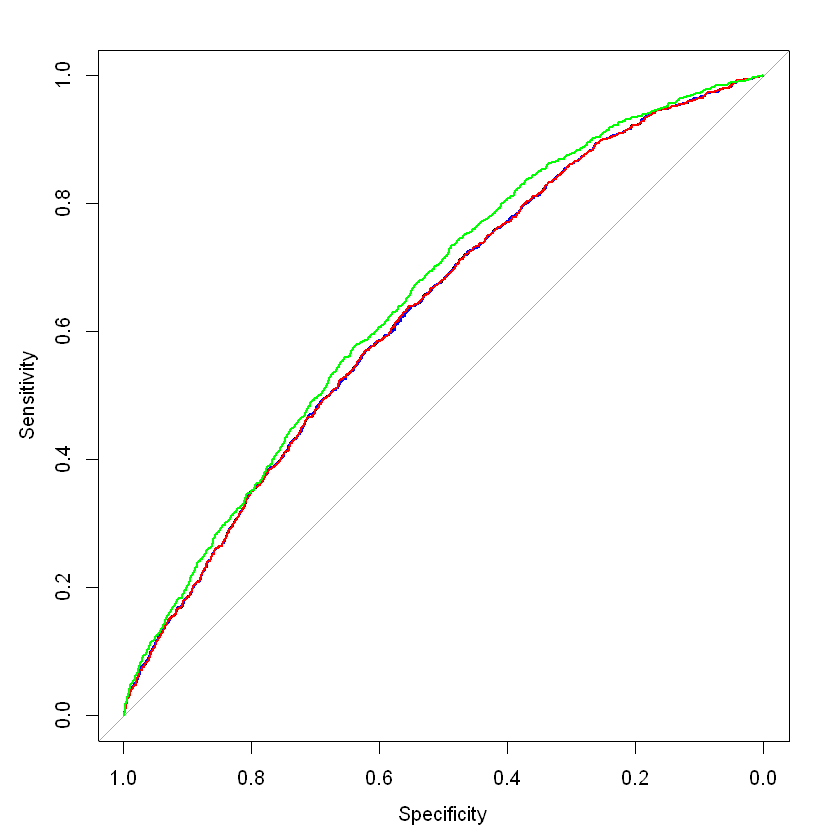

In [145]:
# Load the pROC-package
library(pROC)

# Construct the objects containing ROC-information
ROC_logit <- roc(test_set$loan_status, predictions_logit)
ROC_probit <- roc(test_set$loan_status, predictions_probit)
ROC_cloglog <- roc(test_set$loan_status, predictions_cloglog)
ROC_all_full <- roc(test_set$loan_status, predictions_all_full)

# Draw all ROCs on one plot
plot(ROC_logit)
lines(ROC_probit, col = "blue")
lines(ROC_cloglog, col = "red")
lines(ROC_all_full, col = "green")

# Compute the AUCs
auc(ROC_logit)
auc(ROC_probit)
auc(ROC_cloglog)
auc(ROC_all_full)

# ROC-curves for comparison of tree-based models
It's time for you to repeat the previous exercises, now comparing the tree-based models. The pROC() is now loaded in your workspace. The PD-predictions for tree-based methods are stored in the objects

predictions_undersample
predictions_prior
predictions_loss_matrix
predictions_weights

### Instructions
- Construct the ROC-objects for the tree based methods using function roc(response, predictor).
- Use the previously created objects to construct ROC-curves. To draw them all on one plot, use plot() for the first ROC-curve drawn (for ROC_undersample), and lines() for the other three models to the same plot. Use the col-argument to change the color of the curve of ROC_prior to blue, ROC_loss_matrix to red and ROC_weights to green.
- To get a better idea of the performance of the ROC-curves, have a look at the AUC's using function auc().

In [146]:
predictions_undersample<-c(0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.670731707317073, 0.153846153846154, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.484171322160149, 0.400763358778626, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.583815028901734, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.583815028901734, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.153846153846154, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.484171322160149, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.484171322160149, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.484171322160149, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.670731707317073, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.670731707317073, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.670731707317073, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.153846153846154, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.400763358778626, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.583815028901734, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.400763358778626, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.583815028901734, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.670731707317073, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.400763358778626, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.583815028901734, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.670731707317073, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.484171322160149, 0.583815028901734, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.583815028901734, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.670731707317073, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.400763358778626, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.670731707317073, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.484171322160149, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.400763358778626, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.381048387096774, 0.583815028901734, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.670731707317073, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.583815028901734, 0.261707988980716, 0.484171322160149, 0.583815028901734, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.670731707317073, 0.43348623853211, 0.484171322160149, 0.400763358778626, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.670731707317073, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.153846153846154, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.670731707317073, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.484171322160149, 0.43348623853211, 0.484171322160149, 0.381048387096774, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.583815028901734, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.670731707317073, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.670731707317073, 0.670731707317073, 0.381048387096774, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.670731707317073, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.484171322160149, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.583815028901734, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.670731707317073, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.381048387096774, 0.43348623853211, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.670731707317073, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.484171322160149, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.583815028901734, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.670731707317073, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.43348623853211, 0.670731707317073, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.670731707317073, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.43348623853211, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.670731707317073, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.484171322160149, 0.670731707317073, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.43348623853211, 0.43348623853211, 0.43348623853211, 0.381048387096774, 0.484171322160149, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.400763358778626, 0.583815028901734, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.670731707317073, 0.381048387096774, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.400763358778626, 0.153846153846154, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.583815028901734, 0.381048387096774, 0.400763358778626, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.400763358778626, 0.381048387096774, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.670731707317073, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.583815028901734, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.400763358778626, 0.484171322160149, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.583815028901734, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.670731707317073, 0.484171322160149, 0.381048387096774, 0.43348623853211, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.583815028901734, 0.381048387096774, 0.484171322160149, 0.670731707317073, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.400763358778626, 0.400763358778626, 0.484171322160149, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.43348623853211, 0.670731707317073, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.153846153846154, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.484171322160149, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.670731707317073, 0.43348623853211, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.400763358778626, 0.400763358778626, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.484171322160149, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.400763358778626, 0.670731707317073, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.484171322160149, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.43348623853211, 0.43348623853211, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.43348623853211, 0.43348623853211, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.153846153846154, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.484171322160149, 0.261707988980716, 0.43348623853211, 0.400763358778626, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.670731707317073, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.670731707317073, 0.583815028901734, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.381048387096774, 0.583815028901734, 0.261707988980716, 0.400763358778626, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.583815028901734, 0.583815028901734, 0.484171322160149, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.400763358778626, 0.670731707317073, 0.400763358778626, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.484171322160149, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.381048387096774, 0.484171322160149, 0.381048387096774, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.583815028901734, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.381048387096774, 0.381048387096774, 0.381048387096774, 0.43348623853211, 0.583815028901734, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.400763358778626, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.583815028901734, 0.43348623853211, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.43348623853211, 0.261707988980716, 0.261707988980716, 0.670731707317073, 0.261707988980716, 0.484171322160149, 0.381048387096774, 0.400763358778626, 0.261707988980716, 0.381048387096774, 0.261707988980716, 0.43348623853211, 0.261707988980716, 0.484171322160149, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.43348623853211, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716, 0.583815028901734, 0.381048387096774, 0.261707988980716, 0.261707988980716, 0.261707988980716)

In [147]:
predictions_prior<-c(0.232637717548961, 0.388874048076014, 0.379206516980873, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.608597751357337, 0.379206516980873, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.45270149633815, 0.348313934918811, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.334697151545444, 0.572706240047936, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.588427921099261, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.388874048076014, 0.572706240047936, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.657984816323408, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.572706240047936, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.388874048076014, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.657984816323408, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.45270149633815, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.379206516980873, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.572706240047936, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.45270149633815, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.45270149633815, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.45270149633815, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.608597751357337, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.572706240047936, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.657984816323408, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.608597751357337, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.608597751357337, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.588427921099261, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.388874048076014, 0.588427921099261, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.608597751357337, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.588427921099261, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.588427921099261, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.572706240047936, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.348313934918811, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.588427921099261, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.572706240047936, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.348313934918811, 0.348313934918811, 0.379206516980873, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.657984816323408, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.379206516980873, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.608597751357337, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.348313934918811, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.388874048076014, 0.334697151545444, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.572706240047936, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.45270149633815, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.657984816323408, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.572706240047936, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.608597751357337, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.572706240047936, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.608597751357337, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.572706240047936, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.657984816323408, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.608597751357337, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.388874048076014, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.45270149633815, 0.379206516980873, 0.232637717548961, 0.657984816323408, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.572706240047936, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.657984816323408, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.572706240047936, 0.348313934918811, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.608597751357337, 0.388874048076014, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.348313934918811, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.608597751357337, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.572706240047936, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.657984816323408, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.45270149633815, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.379206516980873, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.572706240047936, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.588427921099261, 0.572706240047936, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.379206516980873, 0.45270149633815, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.348313934918811, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.334697151545444, 0.572706240047936, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.608597751357337, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.608597751357337, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.379206516980873, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.588427921099261, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.572706240047936, 0.232637717548961, 0.45270149633815, 0.572706240047936, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.608597751357337, 0.388874048076014, 0.45270149633815, 0.348313934918811, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.388874048076014, 0.379206516980873, 0.588427921099261, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.608597751357337, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.657984816323408, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.657984816323408, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.334697151545444, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.657984816323408, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.588427921099261, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.608597751357337, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.334697151545444, 0.588427921099261, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.379206516980873, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.45270149633815, 0.388874048076014, 0.45270149633815, 0.334697151545444, 0.45270149633815, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.657984816323408, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.572706240047936, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.608597751357337, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.608597751357337, 0.608597751357337, 0.588427921099261, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.608597751357337, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.45270149633815, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.379206516980873, 0.657984816323408, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.608597751357337, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.572706240047936, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.334697151545444, 0.388874048076014, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.572706240047936, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.379206516980873, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.379206516980873, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.608597751357337, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.45270149633815, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.588427921099261, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.572706240047936, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.608597751357337, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.388874048076014, 0.608597751357337, 0.657984816323408, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.608597751357337, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.572706240047936, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.388874048076014, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.657984816323408, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.572706240047936, 0.232637717548961, 0.572706240047936, 0.588427921099261, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.608597751357337, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.45270149633815, 0.608597751357337, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.588427921099261, 0.388874048076014, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.388874048076014, 0.388874048076014, 0.388874048076014, 0.334697151545444, 0.45270149633815, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.348313934918811, 0.572706240047936, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.608597751357337, 0.334697151545444, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.348313934918811, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.572706240047936, 0.334697151545444, 0.348313934918811, 0.45270149633815, 0.588427921099261, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.572706240047936, 0.388874048076014, 0.348313934918811, 0.334697151545444, 0.379206516980873, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.608597751357337, 0.608597751357337, 0.657984816323408, 0.232637717548961, 0.45270149633815, 0.572706240047936, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.588427921099261, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.348313934918811, 0.45270149633815, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.379206516980873, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.657984816323408, 0.45270149633815, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.608597751357337, 0.45270149633815, 0.334697151545444, 0.388874048076014, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.379206516980873, 0.334697151545444, 0.45270149633815, 0.608597751357337, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.348313934918811, 0.348313934918811, 0.45270149633815, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.379206516980873, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.388874048076014, 0.608597751357337, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.588427921099261, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.379206516980873, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.45270149633815, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.608597751357337, 0.388874048076014, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.348313934918811, 0.348313934918811, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.45270149633815, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.348313934918811, 0.608597751357337, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.45270149633815, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.388874048076014, 0.388874048076014, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.388874048076014, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.45270149633815, 0.232637717548961, 0.388874048076014, 0.348313934918811, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.588427921099261, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.588427921099261, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.608597751357337, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.379206516980873, 0.388874048076014, 0.232637717548961, 0.608597751357337, 0.572706240047936, 0.588427921099261, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.334697151545444, 0.379206516980873, 0.232637717548961, 0.348313934918811, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.572706240047936, 0.572706240047936, 0.45270149633815, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.334697151545444, 0.45270149633815, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.348313934918811, 0.608597751357337, 0.348313934918811, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.45270149633815, 0.388874048076014, 0.588427921099261, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.572706240047936, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.588427921099261, 0.45270149633815, 0.334697151545444, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.572706240047936, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.334697151545444, 0.334697151545444, 0.334697151545444, 0.388874048076014, 0.379206516980873, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.348313934918811, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.379206516980873, 0.388874048076014, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.388874048076014, 0.232637717548961, 0.232637717548961, 0.608597751357337, 0.232637717548961, 0.45270149633815, 0.334697151545444, 0.348313934918811, 0.232637717548961, 0.334697151545444, 0.232637717548961, 0.388874048076014, 0.232637717548961, 0.45270149633815, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.388874048076014, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961, 0.572706240047936, 0.334697151545444, 0.232637717548961, 0.232637717548961, 0.232637717548961)

In [148]:
predictions_loss_matrix<-c(0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.0514018691588785, 0.0655447298494243, 0.169325153374233, 0.13, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.043010752688172, 0.169325153374233, 0.0655447298494243, 0.0411209259823332, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.043010752688172, 0.169325153374233, 0.0514018691588785, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0514018691588785, 0.0583941605839416, 0.070353982300885, 0.0723684210526316, 0.133245382585752, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0583941605839416, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.150684931506849, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.133245382585752, 0.13, 0.0411209259823332, 0.0609965635738832, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.13, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.0386473429951691, 0.13, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.205128205128205, 0.0655447298494243, 0.070353982300885, 0.169325153374233, 0.0583941605839416, 0.169780545670225, 0.0609965635738832, 0.13, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.13, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.0723684210526316, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.13, 0.070353982300885, 0.133245382585752, 0.205128205128205, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.168421052631579, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.130541871921182, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.162962962962963, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.13, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0514018691588785, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0583941605839416, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.150684931506849, 0.205128205128205, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.13, 0.13, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0655447298494243, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.269230769230769, 0.0723684210526316, 0.070353982300885, 0.169325153374233, 0.104602510460251, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.269230769230769, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.283018867924528, 0.169325153374233, 0.13, 0.169780545670225, 0.0609965635738832, 0.13, 0.0411209259823332, 0.104602510460251, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.269230769230769, 0.169325153374233, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0514018691588785, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.104602510460251, 0.169325153374233, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.130541871921182, 0.0655447298494243, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.130541871921182, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0583941605839416, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.25, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.104602510460251, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.283018867924528, 0.13, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.070353982300885, 0.0723684210526316, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.13, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.130541871921182, 0.0609965635738832, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.13, 0.0411209259823332, 0.0609965635738832, 0.169325153374233, 0.0655447298494243, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.166666666666667, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.0655447298494243, 0.0514018691588785, 0.150684931506849, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0386473429951691, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0583941605839416, 0.130541871921182, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.169325153374233, 0.13, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.13, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0609965635738832, 0.133245382585752, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.104602510460251, 0.169780545670225, 0.104602510460251, 0.104602510460251, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.13, 0.133245382585752, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.13, 0.0609965635738832, 0.104602510460251, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.130541871921182, 0.0411209259823332, 0.150684931506849, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.13, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0, 0.070353982300885, 0.13, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.13, 0.0514018691588785, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.0609965635738832, 0.133245382585752, 0.070353982300885, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.104602510460251, 0.0411209259823332, 0.150684931506849, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.13, 0.169780545670225, 0.043010752688172, 0.130541871921182, 0.0609965635738832, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.0723684210526316, 0.0655447298494243, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.0411209259823332, 0.166666666666667, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.13, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.13, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.13, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.130541871921182, 0.169325153374233, 0.0386473429951691, 0.13, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.104602510460251, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.13, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.043010752688172, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0514018691588785, 0.169325153374233, 0.169325153374233, 0.133245382585752, 0.0655447298494243, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.169325153374233, 0.13, 0.070353982300885, 0.13, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.13, 0.0514018691588785, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.133245382585752, 0, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.104602510460251, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.162962962962963, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.13, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.205128205128205, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.13, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.13, 0.13, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0583941605839416, 0.0655447298494243, 0.0411209259823332, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.0609965635738832, 0.133245382585752, 0.133245382585752, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.13, 0.043010752688172, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0514018691588785, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.169325153374233, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.162962962962963, 0.13, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.162962962962963, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0514018691588785, 0.13, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.162962962962963, 0.133245382585752, 0.0655447298494243, 0.0655447298494243, 0.070353982300885, 0.133245382585752, 0.13, 0.0655447298494243, 0.13, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.13, 0.166666666666667, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0583941605839416, 0.13, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.283018867924528, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.13, 0.0514018691588785, 0.169325153374233, 0.13, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0723684210526316, 0.0411209259823332, 0.133245382585752, 0.0609965635738832, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.13, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.162962962962963, 0.0723684210526316, 0.166666666666667, 0.0609965635738832, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.13, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.162962962962963, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.269230769230769, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0514018691588785, 0.13, 0.0723684210526316, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.13, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.13, 0.070353982300885, 0.130541871921182, 0.0655447298494243, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.166666666666667, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.13, 0.162962962962963, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.0514018691588785, 0.205128205128205, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.070353982300885, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.133245382585752, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.283018867924528, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.168421052631579, 0.0609965635738832, 0.0514018691588785, 0.13, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.13, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.104602510460251, 0.070353982300885, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.13, 0.0723684210526316, 0.0411209259823332, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.0609965635738832, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.0411209259823332, 0.168421052631579, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.162962962962963, 0.0411209259823332, 0.070353982300885, 0.13, 0.168421052631579, 0.13, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0514018691588785, 0.0411209259823332, 0.13, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.130541871921182, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.0583941605839416, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.269230769230769, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.0386473429951691, 0.0411209259823332, 0.13, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.13, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.169325153374233, 0.269230769230769, 0.169780545670225, 0.13, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.13, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.0514018691588785, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.13, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.0609965635738832, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.130541871921182, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.104602510460251, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.205128205128205, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.0583941605839416, 0, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0386473429951691, 0.162962962962963, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0655447298494243, 0.0609965635738832, 0.070353982300885, 0.13, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.166666666666667, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169325153374233, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.0655447298494243, 0.133245382585752, 0.0723684210526316, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.13, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0514018691588785, 0.0655447298494243, 0.0723684210526316, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.13, 0.133245382585752, 0.283018867924528, 0.0609965635738832, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.133245382585752, 0.13, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.13, 0.0514018691588785, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.104602510460251, 0.13, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.104602510460251, 0.043010752688172, 0.13, 0.169780545670225, 0.13, 0.0514018691588785, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.133245382585752, 0.169780545670225, 0.13, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0583941605839416, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.168421052631579, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0723684210526316, 0.0655447298494243, 0.0411209259823332, 0.0723684210526316, 0.133245382585752, 0.13, 0.168421052631579, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.269230769230769, 0.0655447298494243, 0.13, 0.070353982300885, 0.0411209259823332, 0.0723684210526316, 0.0411209259823332, 0.0411209259823332, 0.0386473429951691, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0386473429951691, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.130541871921182, 0.169325153374233, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.133245382585752, 0.070353982300885, 0.13, 0.070353982300885, 0.169325153374233, 0.0655447298494243, 0.0411209259823332, 0.13, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.13, 0.13, 0.070353982300885, 0.0723684210526316, 0.104602510460251, 0.169780545670225, 0.168421052631579, 0.0411209259823332, 0.169780545670225, 0.0386473429951691, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.0723684210526316, 0.0655447298494243, 0.043010752688172, 0.13, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0609965635738832, 0.133245382585752, 0.0723684210526316, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.168421052631579, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0514018691588785, 0.169780545670225, 0.169325153374233, 0.0386473429951691, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.150684931506849, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169325153374233, 0.0655447298494243, 0.0655447298494243, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.13, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.13, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0386473429951691, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.13, 0.13, 0.0411209259823332, 0.168421052631579, 0.0411209259823332, 0.133245382585752, 0.0655447298494243, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.0723684210526316, 0.133245382585752, 0.0411209259823332, 0.0655447298494243, 0.0583941605839416, 0.0411209259823332, 0.070353982300885, 0.0583941605839416, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.166666666666667, 0.169780545670225, 0.13, 0.0411209259823332, 0.269230769230769, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0723684210526316, 0.169325153374233, 0.13, 0.169780545670225, 0.0411209259823332, 0.0583941605839416, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0723684210526316, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.13, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.0723684210526316, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.0655447298494243, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.13, 0.070353982300885, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.13, 0.070353982300885, 0.0411209259823332, 0.13, 0.0583941605839416, 0.130541871921182, 0.0655447298494243, 0.0655447298494243, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.13, 0.070353982300885, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.043010752688172, 0.133245382585752, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.0514018691588785, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.13, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.130541871921182, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0723684210526316, 0.070353982300885, 0.162962962962963, 0.13, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.13, 0.13, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.162962962962963, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.13, 0.0609965635738832, 0.0655447298494243, 0.0723684210526316, 0.104602510460251, 0.0609965635738832, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.0583941605839416, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.13, 0.13, 0.283018867924528, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.13, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.162962962962963, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.150684931506849, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.13, 0.169325153374233, 0.283018867924528, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.13, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.13, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.043010752688172, 0.169780545670225, 0.0655447298494243, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0723684210526316, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.13, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0, 0.13, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.13, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.13, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.0411209259823332, 0.0655447298494243, 0.166666666666667, 0.169780545670225, 0.13, 0.0411209259823332, 0.168421052631579, 0.13, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.168421052631579, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.13, 0.0411209259823332, 0.0609965635738832, 0.104602510460251, 0.130541871921182, 0.070353982300885, 0.162962962962963, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.283018867924528, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.169325153374233, 0.070353982300885, 0.130541871921182, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.0386473429951691, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.0609965635738832, 0.0609965635738832, 0.0583941605839416, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.130541871921182, 0.13, 0.0723684210526316, 0.0723684210526316, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.13, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.150684931506849, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.168421052631579, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0514018691588785, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.205128205128205, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.13, 0.0411209259823332, 0.133245382585752, 0.133245382585752, 0.0655447298494243, 0.104602510460251, 0.130541871921182, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.133245382585752, 0.0723684210526316, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0386473429951691, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.0655447298494243, 0.13, 0.104602510460251, 0.0411209259823332, 0.13, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.162962962962963, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.168421052631579, 0.0411209259823332, 0.0411209259823332, 0.283018867924528, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.13, 0.0514018691588785, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0583941605839416, 0.104602510460251, 0.0583941605839416, 0.0655447298494243, 0.13, 0.169780545670225, 0.150684931506849, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.13, 0.0723684210526316, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.150684931506849, 0.13, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.205128205128205, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.13, 0.13, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.0386473429951691, 0.0723684210526316, 0.070353982300885, 0.0723684210526316, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.104602510460251, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.0386473429951691, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.13, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.13, 0.130541871921182, 0.13, 0.162962962962963, 0.0609965635738832, 0.070353982300885, 0.162962962962963, 0.269230769230769, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.13, 0.0411209259823332, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0723684210526316, 0.13, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.13, 0.070353982300885, 0.169325153374233, 0.070353982300885, 0.0386473429951691, 0.13, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.283018867924528, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.13, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.0583941605839416, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.104602510460251, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.070353982300885, 0, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.043010752688172, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.130541871921182, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.269230769230769, 0.133245382585752, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0386473429951691, 0.13, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.162962962962963, 0.0609965635738832, 0.133245382585752, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.13, 0.13, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.205128205128205, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.043010752688172, 0.0411209259823332, 0.13, 0.043010752688172, 0.0411209259823332, 0.169780545670225, 0.13, 0.0386473429951691, 0.0386473429951691, 0.13, 0.0655447298494243, 0.070353982300885, 0.162962962962963, 0.169780545670225, 0.0609965635738832, 0.0583941605839416, 0.0411209259823332, 0.0609965635738832, 0.0386473429951691, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0723684210526316, 0.0583941605839416, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0386473429951691, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.130541871921182, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.13, 0.070353982300885, 0.0723684210526316, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.13, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.0609965635738832, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.283018867924528, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.0514018691588785, 0.169325153374233, 0.070353982300885, 0.169325153374233, 0.0655447298494243, 0.162962962962963, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.070353982300885, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.0655447298494243, 0.13, 0.166666666666667, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0583941605839416, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0514018691588785, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0514018691588785, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.043010752688172, 0.0655447298494243, 0.13, 0.0655447298494243, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0723684210526316, 0.0655447298494243, 0.13, 0.070353982300885, 0.13, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.162962962962963, 0.13, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0583941605839416, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.13, 0.169780545670225, 0.0723684210526316, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0514018691588785, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.133245382585752, 0.070353982300885, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.168421052631579, 0.0411209259823332, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.283018867924528, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.13, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.0411209259823332, 0.13, 0.104602510460251, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.13, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.104602510460251, 0.13, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.205128205128205, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.13, 0.169780545670225, 0.13, 0.0723684210526316, 0.0386473429951691, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.13, 0.0655447298494243, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0723684210526316, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.043010752688172, 0.0411209259823332, 0.070353982300885, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.0386473429951691, 0.070353982300885, 0.104602510460251, 0.169325153374233, 0.0411209259823332, 0.13, 0.169780545670225, 0.168421052631579, 0.169780545670225, 0.070353982300885, 0.0386473429951691, 0.0655447298494243, 0.130541871921182, 0.043010752688172, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.070353982300885, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.13, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.043010752688172, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.168421052631579, 0.169780545670225, 0.0583941605839416, 0.070353982300885, 0.133245382585752, 0.13, 0.0411209259823332, 0.150684931506849, 0.13, 0.13, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.13, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.162962962962963, 0.133245382585752, 0.13, 0, 0.0655447298494243, 0.070353982300885, 0.130541871921182, 0.0655447298494243, 0.169325153374233, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.13, 0.0583941605839416, 0.13, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.13, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.162962962962963, 0.0609965635738832, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.13, 0.0514018691588785, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.0655447298494243, 0.13, 0.070353982300885, 0.0723684210526316, 0.13, 0.13, 0.169780545670225, 0.070353982300885, 0.0386473429951691, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.13, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.0411209259823332, 0.13, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.166666666666667, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.150684931506849, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.0386473429951691, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.169325153374233, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.166666666666667, 0.0655447298494243, 0.13, 0.169780545670225, 0.205128205128205, 0.0411209259823332, 0.0411209259823332, 0.13, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.13, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0386473429951691, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.070353982300885, 0.269230769230769, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.13, 0.130541871921182, 0.130541871921182, 0.070353982300885, 0.0723684210526316, 0.13, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.13, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.070353982300885, 0.0583941605839416, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.043010752688172, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.162962962962963, 0.070353982300885, 0.169325153374233, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.166666666666667, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0609965635738832, 0.0609965635738832, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.162962962962963, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0583941605839416, 0.0411209259823332, 0.0411209259823332, 0.13, 0.070353982300885, 0.166666666666667, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.0609965635738832, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.13, 0.070353982300885, 0.070353982300885, 0.13, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0386473429951691, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0514018691588785, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.130541871921182, 0.133245382585752, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0609965635738832, 0.070353982300885, 0.13, 0.070353982300885, 0.13, 0.169780545670225, 0.13, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.13, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.150684931506849, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.13, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.133245382585752, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.168421052631579, 0.0386473429951691, 0.0411209259823332, 0.130541871921182, 0.166666666666667, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.13, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.13, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.13, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0723684210526316, 0.0655447298494243, 0.0723684210526316, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.13, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.104602510460251, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.13, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.205128205128205, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.0386473429951691, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.043010752688172, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0386473429951691, 0.13, 0.0386473429951691, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0583941605839416, 0.070353982300885, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.162962962962963, 0.043010752688172, 0.0723684210526316, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.13, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.13, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.0723684210526316, 0.13, 0.0411209259823332, 0.168421052631579, 0.070353982300885, 0.0609965635738832, 0.0723684210526316, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.162962962962963, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.168421052631579, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.13, 0.070353982300885, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.13, 0.0411209259823332, 0.0609965635738832, 0.043010752688172, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.150684931506849, 0.169780545670225, 0.0723684210526316, 0.13, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0655447298494243, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.130541871921182, 0.0411209259823332, 0.13, 0.169780545670225, 0.13, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.0723684210526316, 0.283018867924528, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.13, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0583941605839416, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.168421052631579, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.13, 0.0583941605839416, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.043010752688172, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.13, 0.13, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.130541871921182, 0.162962962962963, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.13, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.130541871921182, 0.0411209259823332, 0.168421052631579, 0.043010752688172, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.13, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.283018867924528, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.162962962962963, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.0609965635738832, 0.0411209259823332, 0.13, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.13, 0.130541871921182, 0.13, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.13, 0.0411209259823332, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.162962962962963, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.168421052631579, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.162962962962963, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.13, 0.13, 0.0411209259823332, 0.0411209259823332, 0.13, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.150684931506849, 0.070353982300885, 0.0583941605839416, 0.13, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.283018867924528, 0.0411209259823332, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.070353982300885, 0.043010752688172, 0.070353982300885, 0.283018867924528, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.13, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.162962962962963, 0.070353982300885, 0.169780545670225, 0.0723684210526316, 0.0583941605839416, 0.0411209259823332, 0.13, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.070353982300885, 0.0655447298494243, 0.0411209259823332, 0.13, 0.162962962962963, 0.0609965635738832, 0.0609965635738832, 0.13, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.13, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0583941605839416, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.0583941605839416, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.070353982300885, 0.0655447298494243, 0.043010752688172, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169325153374233, 0.169325153374233, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.133245382585752, 0.283018867924528, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.283018867924528, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.104602510460251, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.0609965635738832, 0.166666666666667, 0.169780545670225, 0.0723684210526316, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0723684210526316, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.133245382585752, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.13, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.13, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.130541871921182, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.0655447298494243, 0.13, 0.0411209259823332, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.269230769230769, 0.0609965635738832, 0.0514018691588785, 0.130541871921182, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0, 0.13, 0.133245382585752, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0, 0.0655447298494243, 0.169780545670225, 0.25, 0.0411209259823332, 0.169325153374233, 0.0514018691588785, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.162962962962963, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.0609965635738832, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.13, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.13, 0.0723684210526316, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.169325153374233, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0514018691588785, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.283018867924528, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.133245382585752, 0.169325153374233, 0.133245382585752, 0.0514018691588785, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.166666666666667, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0514018691588785, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0583941605839416, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.130541871921182, 0.0411209259823332, 0.0514018691588785, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.070353982300885, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0723684210526316, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.0583941605839416, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0609965635738832, 0.070353982300885, 0.0609965635738832, 0.13, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.130541871921182, 0.0411209259823332, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.283018867924528, 0.169780545670225, 0.283018867924528, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.13, 0.0386473429951691, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.166666666666667, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.0386473429951691, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.150684931506849, 0.0411209259823332, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.162962962962963, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.130541871921182, 0.104602510460251, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169325153374233, 0.133245382585752, 0.070353982300885, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.168421052631579, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.043010752688172, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.104602510460251, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.070353982300885, 0.0411209259823332, 0.133245382585752, 0.0386473429951691, 0.13, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.070353982300885, 0.166666666666667, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.070353982300885, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0386473429951691, 0.104602510460251, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.043010752688172, 0.168421052631579, 0.0609965635738832, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0386473429951691, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.13, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.104602510460251, 0.0655447298494243, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.13, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.168421052631579, 0.169780545670225, 0.150684931506849, 0.0411209259823332, 0.070353982300885, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.043010752688172, 0.133245382585752, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.162962962962963, 0.043010752688172, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.133245382585752, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.13, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0411209259823332, 0.162962962962963, 0.0655447298494243, 0.0609965635738832, 0.150684931506849, 0.169780545670225, 0.0386473429951691, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.168421052631579, 0.0655447298494243, 0.0386473429951691, 0.169780545670225, 0.104602510460251, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.13, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.168421052631579, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.043010752688172, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.13, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.13, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.13, 0, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0609965635738832, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.13, 0.13, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.283018867924528, 0.169780545670225, 0.0411209259823332, 0.0386473429951691, 0.0723684210526316, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.13, 0.13, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0723684210526316, 0.0386473429951691, 0.070353982300885, 0.162962962962963, 0.0411209259823332, 0.0386473429951691, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.0609965635738832, 0.0411209259823332, 0.0583941605839416, 0.0411209259823332, 0.0411209259823332, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0386473429951691, 0.13, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.13, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.166666666666667, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.043010752688172, 0.070353982300885, 0.169780545670225, 0.150684931506849, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.0655447298494243, 0.283018867924528, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.169325153374233, 0.0411209259823332, 0.168421052631579, 0.130541871921182, 0.0723684210526316, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.0655447298494243, 0.043010752688172, 0.0386473429951691, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.13, 0.0655447298494243, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.043010752688172, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0514018691588785, 0.13, 0.0386473429951691, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.13, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.13, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.043010752688172, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.0411209259823332, 0.0655447298494243, 0.0583941605839416, 0.043010752688172, 0.0655447298494243, 0.0386473429951691, 0.0655447298494243, 0.130541871921182, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.13, 0.070353982300885, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.168421052631579, 0.070353982300885, 0.169780545670225, 0.13, 0.169325153374233, 0.0411209259823332, 0.0655447298494243, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.043010752688172, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0723684210526316, 0.070353982300885, 0.168421052631579, 0.169780545670225, 0, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.13, 0.0411209259823332, 0.043010752688172, 0.13, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.13, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.043010752688172, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.070353982300885, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.043010752688172, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.150684931506849, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0723684210526316, 0.0411209259823332, 0.13, 0.13, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.104602510460251, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0583941605839416, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.269230769230769, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.0609965635738832, 0.0609965635738832, 0.169325153374233, 0.13, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.104602510460251, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.13, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.104602510460251, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0514018691588785, 0.0609965635738832, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0514018691588785, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.133245382585752, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.133245382585752, 0.0386473429951691, 0.169780545670225, 0.0583941605839416, 0.13, 0.0583941605839416, 0.169780545670225, 0.0655447298494243, 0, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.13, 0.130541871921182, 0.13, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.104602510460251, 0.104602510460251, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.13, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.205128205128205, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.13, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.104602510460251, 0.169325153374233, 0.0514018691588785, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.0411209259823332, 0.13, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.162962962962963, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.133245382585752, 0.133245382585752, 0.13, 0.070353982300885, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.13, 0.0609965635738832, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.269230769230769, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.13, 0.13, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.104602510460251, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.0386473429951691, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.133245382585752, 0.133245382585752, 0.0411209259823332, 0.169325153374233, 0.0609965635738832, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.070353982300885, 0.13, 0.0514018691588785, 0.0609965635738832, 0.133245382585752, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.133245382585752, 0.133245382585752, 0.0411209259823332, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.104602510460251, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.13, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.104602510460251, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.0514018691588785, 0.0655447298494243, 0.104602510460251, 0.0723684210526316, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.269230769230769, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.13, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0583941605839416, 0.0514018691588785, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.13, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.13, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.0583941605839416, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.166666666666667, 0.0514018691588785, 0.0411209259823332, 0.0655447298494243, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0514018691588785, 0.104602510460251, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.130541871921182, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0411209259823332, 0.0514018691588785, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0514018691588785, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.133245382585752, 0.0609965635738832, 0.0609965635738832, 0.0609965635738832, 0.133245382585752, 0.0609965635738832, 0.070353982300885, 0.13, 0.133245382585752, 0.169325153374233, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0609965635738832, 0.0514018691588785, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.0514018691588785, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.0609965635738832, 0.13, 0.070353982300885, 0.104602510460251, 0, 0.169325153374233, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.0386473429951691, 0.13, 0.169325153374233, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0514018691588785, 0.13, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.0411209259823332, 0.0723684210526316, 0.104602510460251, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0609965635738832, 0.162962962962963, 0.133245382585752, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.13, 0.13, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.0655447298494243, 0.0655447298494243, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.0609965635738832, 0.0411209259823332, 0.133245382585752, 0.169780545670225, 0.0723684210526316, 0.13, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0655447298494243, 0.104602510460251, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.13, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.169325153374233, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0583941605839416, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.0514018691588785, 0.0655447298494243, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0514018691588785, 0.13, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0514018691588785, 0.130541871921182, 0.0609965635738832, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.13, 0.13, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.0655447298494243, 0.13, 0.169780545670225, 0.0609965635738832, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0514018691588785, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.205128205128205, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.13, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.0655447298494243, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.0514018691588785, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0723684210526316, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169325153374233, 0.13, 0.070353982300885, 0.269230769230769, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.133245382585752, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0, 0.13, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.162962962962963, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.0411209259823332, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.070353982300885, 0.0609965635738832, 0.0609965635738832, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.0583941605839416, 0.0723684210526316, 0.169780545670225, 0, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0609965635738832, 0.133245382585752, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0655447298494243, 0.130541871921182, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.104602510460251, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.133245382585752, 0.13, 0.0723684210526316, 0.0609965635738832, 0.169780545670225, 0.166666666666667, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.13, 0.133245382585752, 0.13, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.0723684210526316, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.0514018691588785, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.162962962962963, 0.169325153374233, 0.133245382585752, 0.0411209259823332, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.0655447298494243, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.0723684210526316, 0.0609965635738832, 0.169325153374233, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.269230769230769, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.0609965635738832, 0.070353982300885, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.269230769230769, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.0514018691588785, 0.0514018691588785, 0.169780545670225, 0.130541871921182, 0.070353982300885, 0.169325153374233, 0.13, 0.133245382585752, 0.0411209259823332, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.13, 0.0514018691588785, 0.070353982300885, 0.169325153374233, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169325153374233, 0.13, 0.169780545670225, 0.0609965635738832, 0.133245382585752, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.0655447298494243, 0.0655447298494243, 0.133245382585752, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0723684210526316, 0.133245382585752, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.13, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.269230769230769, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.162962962962963, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.104602510460251, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.104602510460251, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0514018691588785, 0.0411209259823332, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.0514018691588785, 0.13, 0.0723684210526316, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.133245382585752, 0.169780545670225, 0.0514018691588785, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0411209259823332, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.0386473429951691, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.13, 0.133245382585752, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.13, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.0583941605839416, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.133245382585752, 0.13, 0.070353982300885, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0411209259823332, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.104602510460251, 0.070353982300885, 0.169780545670225, 0.0514018691588785, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.0386473429951691, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0723684210526316, 0.104602510460251, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.0723684210526316, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.070353982300885, 0.0609965635738832, 0.130541871921182, 0.0411209259823332, 0.0514018691588785, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.0514018691588785, 0.13, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.133245382585752, 0.169780545670225, 0.133245382585752, 0.13, 0.13, 0.0609965635738832, 0.169780545670225, 0.13, 0.133245382585752, 0.169780545670225, 0.070353982300885, 0.0583941605839416, 0.0514018691588785, 0.133245382585752, 0.133245382585752, 0.169780545670225, 0.169780545670225, 0.104602510460251, 0.0514018691588785, 0.0655447298494243, 0.0655447298494243, 0.13, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.169325153374233, 0.169325153374233, 0.0655447298494243, 0.0609965635738832, 0.0609965635738832, 0.169325153374233, 0.133245382585752, 0.169780545670225, 0.162962962962963, 0.169325153374233, 0.0411209259823332, 0.169780545670225, 0.205128205128205, 0.169780545670225, 0.0514018691588785, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.0609965635738832, 0.070353982300885, 0.13, 0.169780545670225, 0.070353982300885, 0.169325153374233, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169325153374233, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169325153374233, 0.169780545670225, 0.0386473429951691, 0.070353982300885, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169325153374233, 0.133245382585752, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.162962962962963, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169325153374233, 0.0723684210526316, 0.13, 0.133245382585752, 0.133245382585752, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.13, 0.169325153374233, 0.070353982300885, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0583941605839416, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0723684210526316, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.162962962962963, 0.13, 0.169780545670225, 0.0655447298494243, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.13, 0.205128205128205, 0.0655447298494243, 0.169780545670225, 0.162962962962963, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.0655447298494243, 0.13, 0.0386473429951691, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0411209259823332, 0.13, 0.169780545670225, 0.169780545670225, 0.205128205128205, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.169780545670225, 0.150684931506849, 0.070353982300885, 0.13, 0.169780545670225, 0.130541871921182, 0.0411209259823332, 0.169780545670225, 0.0723684210526316, 0.13, 0.169780545670225, 0.13, 0.169780545670225, 0.13, 0.162962962962963, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.0583941605839416, 0.169780545670225, 0.0411209259823332, 0.13, 0.13, 0.0655447298494243, 0.13, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0723684210526316, 0.13, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.0609965635738832, 0.0655447298494243, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.0723684210526316, 0.169780545670225, 0.043010752688172, 0.169780545670225, 0.13, 0.070353982300885, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0583941605839416, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.13, 0.0655447298494243, 0.162962962962963, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.070353982300885, 0.169780545670225, 0.043010752688172, 0.0723684210526316, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.13, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.13, 0.0609965635738832, 0.169780545670225, 0.13, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.043010752688172, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.166666666666667, 0.13, 0.0655447298494243, 0.162962962962963, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.162962962962963, 0.166666666666667, 0.130541871921182, 0.169780545670225, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.043010752688172, 0.0723684210526316, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.0609965635738832, 0.043010752688172, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.205128205128205, 0.0655447298494243, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.283018867924528, 0.169780545670225, 0.13, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.0411209259823332, 0.169780545670225, 0.168421052631579, 0.070353982300885, 0.169780545670225, 0.0655447298494243, 0.13, 0.0583941605839416, 0.169780545670225, 0.070353982300885, 0.070353982300885, 0.169780545670225, 0.0411209259823332, 0.13, 0.0655447298494243, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.168421052631579, 0.168421052631579, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.0609965635738832, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.13, 0.169780545670225, 0.0723684210526316, 0.169780545670225, 0.169780545670225, 0.13, 0.0655447298494243, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0655447298494243, 0.13, 0.0411209259823332, 0.070353982300885, 0.0609965635738832, 0.169780545670225, 0.150684931506849, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0609965635738832, 0.0411209259823332, 0.0655447298494243, 0.0655447298494243, 0.169780545670225, 0.13, 0.169780545670225, 0.0609965635738832, 0.13, 0.169780545670225, 0.130541871921182, 0.169780545670225, 0.0411209259823332, 0.070353982300885, 0.13, 0.169780545670225, 0.168421052631579, 0.169780545670225, 0.169780545670225, 0.13, 0.13, 0.169780545670225, 0.13, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.168421052631579, 0.0411209259823332, 0.070353982300885, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.043010752688172, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0411209259823332, 0.13, 0.169780545670225, 0.0723684210526316, 0.0655447298494243, 0.0609965635738832, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0723684210526316, 0.0411209259823332, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.169780545670225, 0.0411209259823332, 0.169780545670225, 0.0655447298494243, 0.169780545670225, 0.0609965635738832, 0.169780545670225, 0.162962962962963, 0.0411209259823332, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.0655447298494243, 0.0609965635738832, 0.0411209259823332, 0.169780545670225, 0.169780545670225, 0.070353982300885, 0.0609965635738832, 0.0411209259823332)

In [149]:
predictions_weights <- c(0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.580808080808081, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.424313267095266, 0.375, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.560240963855422, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.631578947368421, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.375, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.424313267095266, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.631578947368421, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.375, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.424313267095266, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.424313267095266, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.580808080808081, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.631578947368421, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.580808080808081, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.560240963855422, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.560240963855422, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.580808080808081, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.560240963855422, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.560240963855422, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.375, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.560240963855422, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.375, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.631578947368421, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.631578947368421, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.580808080808081, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.631578947368421, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.375, 0.375, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.375, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.631578947368421, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.631578947368421, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.375, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.580808080808081, 0.375, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.375, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.424313267095266, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.631578947368421, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.424313267095266, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.560240963855422, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.424313267095266, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.375, 0.212686567164179, 0.375, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.30952380952381, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.424313267095266, 0.560240963855422, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.424313267095266, 0.375, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.580808080808081, 0.375, 0.424313267095266, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.375, 0.560240963855422, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.580808080808081, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.375, 0.30952380952381, 0.631578947368421, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.424313267095266, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.631578947368421, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.424313267095266, 0.30952380952381, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.631578947368421, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.424313267095266, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.560240963855422, 0.212686567164179, 0.424313267095266, 0.375, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.580808080808081, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.560240963855422, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.375, 0.424313267095266, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.631578947368421, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.424313267095266, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.580808080808081, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.580808080808081, 0.580808080808081, 0.560240963855422, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.375, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.580808080808081, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.424313267095266, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.375, 0.631578947368421, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.580808080808081, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.30952380952381, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.580808080808081, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.375, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.560240963855422, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.580808080808081, 0.631578947368421, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.631578947368421, 0.212686567164179, 0.375, 0.375, 0.375, 0.212686567164179, 0.375, 0.560240963855422, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.424313267095266, 0.580808080808081, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.560240963855422, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.375, 0.375, 0.375, 0.30952380952381, 0.424313267095266, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.375, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.580808080808081, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.30952380952381, 0.375, 0.424313267095266, 0.560240963855422, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.375, 0.424313267095266, 0.212686567164179, 0.375, 0.375, 0.375, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.580808080808081, 0.580808080808081, 0.631578947368421, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.560240963855422, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.375, 0.424313267095266, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.375, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.631578947368421, 0.424313267095266, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.375, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.580808080808081, 0.424313267095266, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.375, 0.30952380952381, 0.424313267095266, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.375, 0.424313267095266, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.580808080808081, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.560240963855422, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.580808080808081, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.424313267095266, 0.375, 0.375, 0.212686567164179, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.580808080808081, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.424313267095266, 0.375, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.375, 0.375, 0.375, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.424313267095266, 0.212686567164179, 0.375, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.560240963855422, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.375, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.560240963855422, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.580808080808081, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.580808080808081, 0.375, 0.560240963855422, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.30952380952381, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.375, 0.375, 0.424313267095266, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.30952380952381, 0.424313267095266, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.375, 0.580808080808081, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.375, 0.560240963855422, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.560240963855422, 0.424313267095266, 0.30952380952381, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.30952380952381, 0.30952380952381, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.375, 0.30952380952381, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.375, 0.375, 0.212686567164179, 0.375, 0.212686567164179, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.375, 0.212686567164179, 0.212686567164179, 0.580808080808081, 0.212686567164179, 0.424313267095266, 0.30952380952381, 0.375, 0.212686567164179, 0.30952380952381, 0.212686567164179, 0.375, 0.212686567164179, 0.424313267095266, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179, 0.375, 0.30952380952381, 0.212686567164179, 0.212686567164179, 0.212686567164179)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.5997

Area under the curve: 0.6016

Area under the curve: 0.6272

Area under the curve: 0.6006

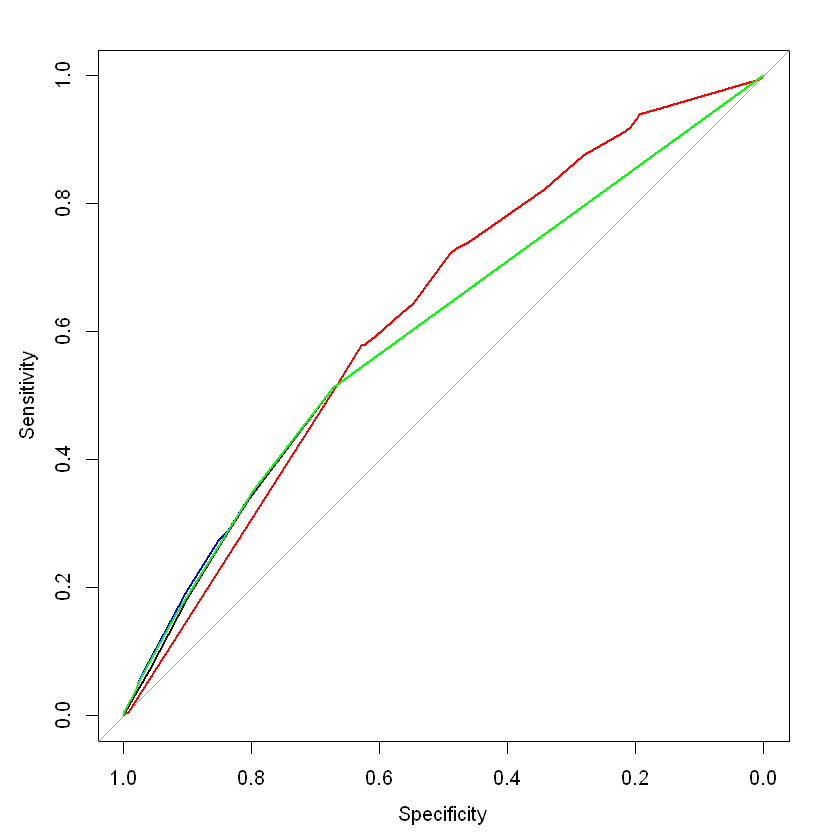

In [150]:
# Construct the objects containing ROC-information
ROC_undersample <- roc(test_set$loan_status, predictions_undersample)
ROC_prior <- roc(test_set$loan_status, predictions_prior)
ROC_loss_matrix <- roc(test_set$loan_status, predictions_loss_matrix)
ROC_weights <- roc(test_set$loan_status, predictions_weights)

# Draw the ROC-curves in one plot
plot(ROC_undersample)
lines(ROC_prior, col="blue")
lines(ROC_loss_matrix, col="red")
lines(ROC_weights, col="green")

# Compute the AUCs
auc(ROC_undersample)
auc(ROC_prior)
auc(ROC_loss_matrix)
auc(ROC_weights)

# Another round of pruning based on AUC
In the video you saw how the "full" logistic regression model with a logit link was being pruned based on the AUC. You saw how the variable home_ownership was deleted from the model, as it improved the overall AUC. After repeating this process for two additional rounds, the variables age and ir_cat were deleted, leading to the model:

log_3_remove_ir <- glm(loan_status ~ loan_amnt + grade + annual_inc + emp_cat, family = binomial, data = training_set)
with an AUC of 0.6545. Now, it's your turn to see whether the AUC can still be improved by deleting another variable from the model.

### Instructions
- Delete one variable at a time in the model log_3_remove_ir, Remember that you should be using the default link function (logit).
- Make probability of default-predictions for each of the models you created.
- Use function auc() using test_set-loan_status as a first argument and the predictions for each of the four models as a second argument to obtain the AUC's for each model.
- Copy the name of the object (as given in the first question of this exercise) that represents the model with the best AUC.

In [151]:
log_3_remove_ir <- glm(loan_status ~ loan_amnt + grade + annual_inc + emp_cat, family = binomial, data = training_set)

In [152]:
# Build four models each time deleting one variable in log_3_remove_ir
log_4_remove_amnt <- glm(loan_status ~ grade + annual_inc + emp_cat, 
                         family = binomial, data = training_set) 
log_4_remove_grade <- glm(loan_status ~ loan_amnt  + annual_inc + emp_cat, 
                          family = binomial, data = training_set)
log_4_remove_inc <- glm(loan_status ~ loan_amnt + grade  + emp_cat , 
                        family = binomial, data = training_set)
log_4_remove_emp <- glm(loan_status ~ loan_amnt + grade + annual_inc, 
                        family = binomial, data = training_set)

# Make PD-predictions for each of the models
pred_4_remove_amnt <- predict(log_4_remove_amnt, newdata = test_set, type = "response")
pred_4_remove_grade <- predict(log_4_remove_grade, newdata = test_set, type = "response")
pred_4_remove_inc <- predict(log_4_remove_inc, newdata = test_set, type = "response")
pred_4_remove_emp <- predict(log_4_remove_emp, newdata = test_set, type = "response")

# Compute the AUCs
auc(test_set$loan_status, pred_4_remove_amnt)
auc(test_set$loan_status, pred_4_remove_grade)
auc(test_set$loan_status, pred_4_remove_inc)
auc(test_set$loan_status, pred_4_remove_emp)


Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.6548

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.5904

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.6401

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.6535

# Further model reduction?
Deleting the variable loan_amnt, the AUC can be further improved to 0.6548! The resulting model is

log_4_remove_amnt <- glm(loan_status ~ grade + annual_inc + emp_cat, family = binomial, data = training_set) 
Is it possible to reduce the logistic regression model to only two variable without reducing the AUC? In this exercise you will see if it is possible!

### Instructions
- Again, delete one variable at a time in the model log_4_remove_amnt, Remember that you should be using the default link function (logit).
- Use predict() to make probability of default predictions for each model you created.
- Obtain the AUC's for each of the three models, using test_set-loan_status as a first argument and the predictions for each of the three models as a second argument.
- Plot the ROC-curve for the model with the highest AUC in your workspace, using plot(roc()) where the content of roc() is the same as the content for the function auc() with the highest AUC. Note that it is possible that the AUC cannot be reduced anymore with respect to model log_4_remove_amnt. The predictions for this model are loaded in your workspace as pred_4_remove_amnt, in the case that this model leads to the highest AUC.

In [153]:
log_4_remove_amnt <- glm(loan_status ~ grade + annual_inc + emp_cat, family = binomial, data = training_set) 

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.5878

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.634

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.6537

Setting levels: control = 1, case = 2

Setting direction: controls < cases



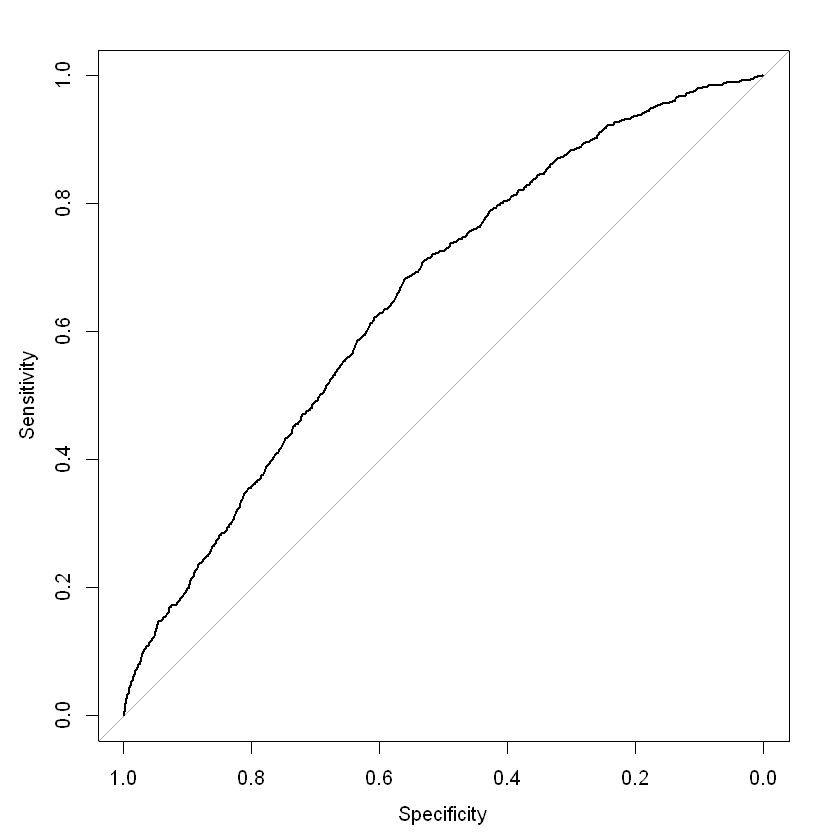

In [154]:
# Build three models each time deleting one variable in log_4_remove_amnt
log_5_remove_grade <- glm(loan_status ~ annual_inc + emp_cat, family = binomial, data = training_set)  
log_5_remove_inc <- glm(loan_status ~ grade  + emp_cat , family = binomial, data = training_set)
log_5_remove_emp <- glm(loan_status ~ grade + annual_inc, family = binomial, data = training_set)

# Make PD-predictions for each of the models
pred_5_remove_grade <- predict(log_5_remove_grade, newdata = test_set, type = "response")
pred_5_remove_inc <- predict(log_5_remove_inc, newdata = test_set, type = "response")
pred_5_remove_emp <- predict(log_5_remove_emp, newdata = test_set, type = "response")

# Compute the AUCs
auc(test_set$loan_status, pred_5_remove_grade)
auc(test_set$loan_status, pred_5_remove_inc)
auc(test_set$loan_status, pred_5_remove_emp)

# Plot the ROC-curve for the best model here
plot(roc(test_set$loan_status,pred_4_remove_amnt))

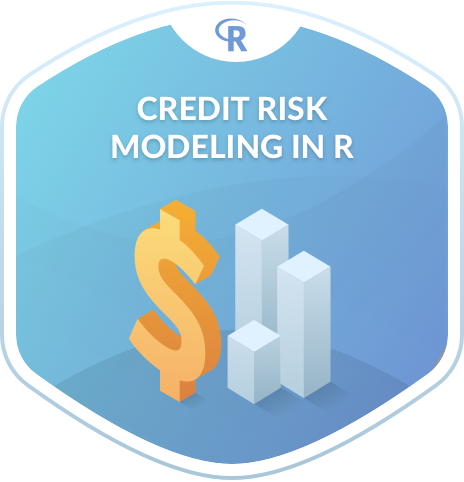

In [155]:
display_png(file="cr.png")

# END OF THIS EXCELLENTE COURSE